
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, adjust lgbm params; 'lambda_l2':3,
# Version = "v59" # inference used v53, adjust lgbm params; 'lambda_l2':15,
# Version = "v60" # inference used v53, adjust lgbm params; 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, adjust lgbm params; 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, adjust lgbm params; 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"
# Version = "v67" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)
# Version = "v68" # inference used v67, np.clip
# Version = "v69" # inference used v67, if _score > 0.02: np.clip
# Version = "v70" # inference used v67, adjust prediction
# Version = "v71" # inference used v67, (Threshold+0.03) >= 0.96
# Version = "v72" # inference used v67, remove "if (p_label_rate*1.5) < target_rate" from the Adj_threshold func
# Version = "v73" # inference used v67, exclusive_cols→Under_Sampling func
# Version = "v74" # inference used v67, feature engining for unpredictable_cols(create_features func 30)
# Version = "v75" # inference used v67, avoid overfit for unpredictable_cols
# Version = "v76" # inference used v67, adjust lgm params; 'feature_fraction':0.1, 'lambda_l2': 200,
# Version = "v77" # inference used v67, Add pca to create_features func 
# Version = "v78" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.05,'subsample': 0.7,'reg_lambda': 100,
# Version = "v79" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.04,　'subsample': 0.7,'reg_lambda': 200,
# Version = "v80" # inference used v67, lgm params used v78, N_FOLD = 5
# Version = "v81" # inference used v67, lgm params used v78, N_FOLD = 5&Early_stopping_rounds=29, unpredictable_cols→ N_FOLD = 3 & Early_stopping_rounds=39
# Version = "v82" # Select, DEBUG = True, 'feature_fraction':0.007, select_importance_cols(num=500),
# Version = "v83" # inference used v67, lgm params used　v79, odds_gene_df["Log"] < 1.0→0.0
# Version = "v84" # Select, based on v83, DEBUG = False, 'feature_fraction':0.007, select_importance_cols(num=500),
# Version = "v85" # inference used v82, based on v83, 

Version = "v86" # inference used v82, based on v85, 

In [2]:
#DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3rd November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v82.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor acat_inhibitor  \
0                   cut_d_g-679           cut_df_g-235    cut_d_g-583   
1                  c_max_kurt_p               df_g-309    cut_d_g-658   
2                       d_g-266                d_g-362      cut_g-446   
3                  cut_df_g-186            cut_d_g-566    cut_d_g-327   
4               c_all_max_sum_d                  g-404    cut_df_g-35   
..                          ...                    ...            ...   
495                 cut_d_g-478           cut_df_g-184       df_g-606   
496                     d_g-678                d_g-323       df_g-379   
497                     d_g-635            cut_df_c-61   cut_df_g-497   
498                 cut_d_g-539              cut_g-421        d_g-544   
499                 cut_d_g-398           cut_df_g-507           g-61   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                     cut_df_g-122                       cut_d_g-369   
1                      cut_d_g-297                       cut_d_g-247   
2                            g-144                      cut_df_g-310   
3                          df_g-27                          df_c_min   
4                      cut_d_g-525                          df_g-387   
..                             ...                               ...   
495                       df_g-733                       cut_d_g-715   
496                   cut_df_g-724                       cut_d_g-366   
497                          g-576                             g-412   
498                          g-575                           d_g-746   
499                     cut_d_c-58                       cut_d_g-332   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                         df_g-460                   df_g-386   
1                      cut_d_g-369                cut_d_g-724   
2                      cut_df_g-16                    d_g-331   
3                            g-575               cut_df_g-503   
4                      cut_df_c-29                cut_d_g-332   
..                             ...                        ...   
495                          g-333                      g-246   
496                    cut_d_g-418           g_d_g_min_skew_p   
497                   cut_df_g-159                    d_g-151   
498                        df_g-69                    d_g-253   
499                          g-701                       g-24   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                    cut_df_g-186                    cut_c-7   
1                  df_g_max_sum_p                    cut_c-4   
2                    cut_df_g-316                   df_g-174   
3                    c_max_kurt_p                cut_df_g-77   
4                     cut_d_g-563                cut_d_g-500   
..                            ...                        ...   
495                       df_c-72                cut_d_g-463   
496                   cut_d_g-462                cut_df_g-47   
497                     cut_g-276         d_c_df_c_max_std_p   
498                       df_c-99                   df_g-721   
499                      df_g-201                cut_df_g-50   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                      df_c_min  ...                               d_g-254   
1                   cut_d_g-614  ...                              df_g-131   
2                        df_g-7  ...                                 g-529   
3                  cut_df_g-186  ...                          cut_df_g-340   
4                      df_g-387  ...                              df_g-266   
..                          ...  ...                                   ...   
495                 cut_d_g-747  ...                              df_g-693   
496                cut_df_g-732  ...                                  c-73   
497       

In [13]:
log_odds = pd.read_csv("../input/moa-annot-data/20201121_train_targets_scored.matrix_odds_results.csv")
log_odds

Gene1                                  Gene2  \
0      X5-alpha_reductase_inhibitor           X5-alpha_reductase_inhibitor   
1      X5-alpha_reductase_inhibitor                X11-beta-hsd1_inhibitor   
2      X5-alpha_reductase_inhibitor                         acat_inhibitor   
3      X5-alpha_reductase_inhibitor         acetylcholine_receptor_agonist   
4      X5-alpha_reductase_inhibitor      acetylcholine_receptor_antagonist   
...                             ...                                    ...   
42431                 wnt_inhibitor  ubiquitin_specific_protease_inhibitor   
42432                 wnt_inhibitor                        vegfr_inhibitor   
42433                 wnt_inhibitor                              vitamin_b   
42434                 wnt_inhibitor             vitamin_d_receptor_agonist   
42435                 wnt_inhibitor                          wnt_inhibitor   

            odds       Log        SD  Lower95CL    Upper95CL   p.value  \
0       1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   
1      33.843243  3.521739  1.453012   1.961852   583.818219  0.015361   
2      25.548105  3.240563  1.448449   1.494296   436.798171  0.025269   
3       3.260817  1.181978  1.436119   0.195389    54.419345  0.410487   
4       2.049799  0.717742  1.435446   0.122986    34.163726  0.617066   
...          ...       ...       ...        ...          ...       ...   
42431  55.264817  4.012136  1.478742   3.046078  1002.666332  0.006664   
42432   2.091101  0.737691  1.427830   0.127352    34.335710  0.605399   
42433  13.543149  2.605881  1.438947   0.807023   227.275980  0.070146   
42434   9.080515  2.206131  1.434625   0.545702   151.100368  0.124104   
42435   1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   

        q.value  
0      0.522100  
1      0.057533  
2      0.073394  
3      0.311654  
4      0.396877  
...         ...  
42431  0.040493  
42432  0.392840  
42433  0.116678  
42434  0.159335  
42435  0.522100  

[42436 rows x 9 columns]

In [14]:
exclusive_cols = (
    "acetylcholine_receptor_agonist", 
    "acetylcholine_receptor_antagonist", 
    "adrenergic_receptor_agonist",
    "adrenergic_receptor_antagonist",
    "bacterial_cell_wall_synthesis_inhibitor",
    "bacterial_dna_inhibitor",
    "calcium_channel_blocker",
    "cdk_inhibitor",
    "dna_inhibitor",
    "dopamine_receptor_agonist",
    "dopamine_receptor_antagonist",
    "egfr_inhibitor",
    "estrogen_receptor_agonist",
    "flt3_inhibitor",
    "gaba_receptor_antagonist",
    "glucocorticoid_receptor_agonist",
    "glutamate_receptor_antagonist",
    "histamine_receptor_antagonist",
    "hmgcr_inhibitor",
    "kit_inhibitor",
    "mtor_inhibitor",
    "nfkb_inhibitor",
    "pdgfr_inhibitor",
    "phosphodiesterase_inhibitor",
    "pi3k_inhibitor",
    "proteasome_inhibitor",
    "serotonin_receptor_agonist",
    "serotonin_receptor_antagonist",
    "sodium_channel_inhibitor",
    "tubulin_inhibitor",
    "vegfr_inhibitor"
)
       

In [15]:
odds_gene2_df = pd.DataFrame()

for col in exclusive_cols:
    odds_gene_df = log_odds[log_odds["Gene1"]==col]
    odds_gene2 = odds_gene_df[(odds_gene_df["p.value"] <= 0.3) & (odds_gene_df["Log"] < 0.0)]["Gene2"]

    odds_gene2 = pd.DataFrame(odds_gene2)
    odds_gene2 = odds_gene2.rename(columns={"Gene2": col}).reset_index(drop=True)
    odds_gene2_df = pd.concat([odds_gene2_df, odds_gene2], axis=1)


odds_gene2_df

acetylcholine_receptor_agonist  \
0   acetylcholine_receptor_antagonist   
1         adrenergic_receptor_agonist   
2      adrenergic_receptor_antagonist   
3             calcium_channel_blocker   
4                       cdk_inhibitor   
..                                ...   
67                                NaN   
68                                NaN   
69                                NaN   
70                                NaN   
71                                NaN   

          acetylcholine_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1               adrenergic_receptor_agonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

                adrenergic_receptor_agonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

             adrenergic_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

   bacterial_cell_wall_synthesis_inhibitor        bacterial_dna_inhibitor  \
0        acetylcholine_receptor_antagonist       cyclooxygenase_inhibitor   
1              adrenergic_receptor_agonist   dopamine_receptor_antagonist   
2           adrenergic_receptor_antagonist                 nfkb_inhibitor   
3                  calcium_channel_blocker           proteasome_inhibitor   
4                            cdk_inhibitor  serotonin_receptor_antagonist   
..                                     ...                            ...   
67                                     NaN                            NaN   
68                                     NaN                            NaN   
69                                     NaN                            NaN   
70                                     NaN                            NaN   
71                                     NaN                            NaN   

                    calcium_channel_blocker  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

                              cdk_inhibitor  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   


In [16]:
# cope & paste from my v73 notebook

unpredictable_cols = [
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'adenosine_receptor_antagonist',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'anesthetic_-_local',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_antagonist',
 'hdac_inhibitor',
 'histamine_receptor_antagonist',
 'hmgcr_inhibitor',
 'kit_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'pdgfr_inhibitor',
 'phosphodiesterase_inhibitor',
 'pi3k_inhibitor',
 'potassium_channel_antagonist',
 'ppar_receptor_agonist',
 'progesterone_receptor_agonist',
 'proteasome_inhibitor',
 'protein_synthesis_inhibitor',
 'raf_inhibitor',
 'serotonin_receptor_agonist',
 'serotonin_receptor_antagonist',
 'sodium_channel_inhibitor',
 'topoisomerase_inhibitor',
 'tubulin_inhibitor',
 'vegfr_inhibitor'
]

In [17]:
# cope & paste from my v85 notebook

unpredictable_cols2 = [
 'acetylcholinesterase_inhibitor',
 'adenosine_receptor_antagonist',
 'akt_inhibitor',
 'androgen_receptor_antagonist',
 'anesthetic_-_local',
 'anti-inflammatory',
 'antioxidant',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_50s_ribosomal_subunit_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'benzodiazepine_receptor_agonist',
 'bromodomain_inhibitor',
 'cannabinoid_receptor_antagonist',
 'cholinergic_receptor_antagonist',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dopamine_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'hcv_inhibitor',
 'hdac_inhibitor',
 'histamine_receptor_agonist',
 'hiv_inhibitor',
 'hsp_inhibitor',
 'immunosuppressant',
 'jak_inhibitor',
 'leukotriene_receptor_antagonist',
 'mek_inhibitor',
 'membrane_integrity_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'opioid_receptor_antagonist',
 'pdgfr_inhibitor',
 'pi3k_inhibitor',
 'potassium_channel_antagonist',
 'ppar_receptor_agonist',
 'prostanoid_receptor_antagonist',
 'proteasome_inhibitor',
 'protein_synthesis_inhibitor',
 'raf_inhibitor',
 'retinoid_receptor_agonist',
 'src_inhibitor',
 'steroid',
 'tyrosine_kinase_inhibitor',
 'vegfr_inhibitor'
]


In [18]:
add_cols = list(set(unpredictable_cols2) - set(unpredictable_cols))
add_cols

['akt_inhibitor',
 'immunosuppressant',
 'cannabinoid_receptor_antagonist',
 'cholinergic_receptor_antagonist',
 'mek_inhibitor',
 'bromodomain_inhibitor',
 'src_inhibitor',
 'steroid',
 'hiv_inhibitor',
 'androgen_receptor_antagonist',
 'hsp_inhibitor',
 'tyrosine_kinase_inhibitor',
 'antioxidant',
 'leukotriene_receptor_antagonist',
 'bacterial_50s_ribosomal_subunit_inhibitor',
 'anti-inflammatory',
 'retinoid_receptor_agonist',
 'acetylcholinesterase_inhibitor',
 'hcv_inhibitor',
 'benzodiazepine_receptor_agonist',
 'histamine_receptor_agonist',
 'jak_inhibitor',
 'opioid_receptor_antagonist',
 'membrane_integrity_inhibitor',
 'prostanoid_receptor_antagonist']

In [19]:
unpredictable_cols = unpredictable_cols + add_cols

# Training Utils

In [20]:
#===========================================================
# training & inference model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Under_Sampling(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
        
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds_, train_y_, oof_train_ = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds_) / len(y_preds_), train_y_, oof_train_

In [21]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [22]:
# Under sampling func 

def Under_Sampling(input_df, target_col, target):
    
    _df = input_df.copy()
    
    # under sampling with mutually exclusive columns
    if target_col in exclusive_cols:
        print(f"mutually exclusive columns: {target_col}")
        target_exclusive = odds_gene2_df[target_col].dropna()
        target_ex = train_targets_scored[list(target_exclusive)]
        
        # 1 or more, replace it with 1.
        target_ex = target_ex.sum(axis=1)
        target_ex = target_ex.where(target_ex < 1, 1)
        
        _df = _df[target_ex == 1].copy().reset_index(drop=True)
        _df = _df.drop("sig_id", axis=1)
    
    # under sampling with drug anotation(New data file)
    else:
        sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
        # Remove sig_id wih target 
        del_idx = train[target >= 1].sig_id.unique()
        select_idx = [i for i in sig_id_lst if i not in del_idx]
        
        # Select negative target wiht multi_Stratification
        _df = _df.set_index('sig_id')
        _df = _df.loc[select_idx, :]
        _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    print(f"selected negative label: {len(_df)}")
    
    return _df

In [23]:
# lgbm with training & inference model


def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        if target_col in unpredictable_cols:
            
            params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.07, 
                'lambda_l1': 0.1,
                'lambda_l2': 300,
                'bagging_fraction': 0.7,
                'bagging_freq': 1,
            }
            
        else:
             params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.4, 
                'lambda_l1': 0.1,
                'lambda_l2': 3,
                'bagging_fraction': 0.8,
                'bagging_freq': 1,
            }
            
            
            
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
     
    return y_preds, _train_y, oof_train 

In [24]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df, target_col)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        pr_score = average_precision_score(y_preds[:, 0], y_preds[:, 1])
         
        logger.info(f"{iter_} / {max_iter}, AUC score:{auc_score:.3f}, PR-AUC:{pr_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.79), min(Threshold*upper, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {(len(y_prob)*target_rate):.1f}, Threshold: {Threshold:.7f}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # set the threshold based on train labels distribution (target_rate)
        if p_label_rate > target_rate:
            p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, target_rate, y_prob, lower, upper)
        
        # select data with confidence            
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [25]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_, target_col):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
        
        if target_col in unpredictable_cols:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.1,
                'objective': "binary",
                'colsample_bytree': 0.07,
                'subsample': 0.7,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 200,
                'random_state': SEED,
                'n_jobs': 4
            }
            
        else:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.03,
                'objective': "binary",
                'colsample_bytree': 0.4,
                'subsample': 0.8,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 0.1,
                'random_state': SEED,
                'n_jobs': 4
            }
            
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=1000,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    return _y_preds, _y_prob, feature_importance_df_
    

In [26]:
# select important features with pseudo_labeling

def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col]
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    X_, X_test_ = create_features(_X, _X_test)
    
    logger.info(f'N_features:{len(X_.columns)}')

    return X_, _y, X_test_

In [27]:
# create features with pseudo_labeling

def create_features(df_trt, df_tst):
    
    from sklearn.decomposition import PCA
    
    df_trt['WHERE'], df_tst['WHERE'] = 'trt', 'tst'
    _df = df_trt.append(df_tst)
    _df = _df.reset_index(drop=True)
    _Splitdata = _df["WHERE"]
    _df = _df.drop('WHERE', axis=1)
    
    pca_transformer = PCA(n_components=0.9, whiten=True, random_state=SEED)
    _pca = pca_transformer.fit_transform(_df)
    _pca_df = pd.DataFrame(_pca)
    pca_cols = [f"pca_{i+1}" for i in range(_pca_df.shape[1])]
    _pca_df.columns = pca_cols
    
    _df = pd.concat([_df, _pca_df], axis=1)
    
    _df['WHERE'] = _Splitdata
    trt_ = _df[_df['WHERE']=="trt"].drop('WHERE', axis=1).reset_index(drop=True)
    tst_ = _df[_df['WHERE']=="tst"].drop('WHERE', axis=1).reset_index(drop=True)
    
    return trt_, tst_

In [28]:
# convert labels with pseudo_labeling

def convert_label(input_df, conf_0, conf_1, threshold=0.5):
    
    _df = input_df.copy()
    Probability = _df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = _df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [29]:
# adj threshold with pseudo_labeling

def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold_, target_rate, y_prob, lower_, upper_):
    
    check = len(y_prob)*target_rate
        
    for i in range(10):
        if (sum(p_label) <= check*(3.5-len(str(int(check))))) or (Threshold_ >= 0.96): break
            
        Threshold_ += 0.03
        high_conf_0, high_conf_1 = min(Threshold_*lower_, 0.79), min(Threshold_*upper_, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold_)
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold_:.7f}")
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold_

In [30]:
# check importance features with pseudo_labeling

def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [31]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [32]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [33]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [34]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [35]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [36]:
# clipping for control data

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [37]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [38]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [39]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [40]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [41]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [42]:
#std_df = data.iloc[:, 4:].copy()

In [43]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [44]:
std_df = data.iloc[:, 4:].copy()

In [45]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [46]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [47]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [48]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [49]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [50]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [51]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [52]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [53]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [54]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

In [55]:
categorical_cols = []

def RUN():
    
    scores = []
    unpredictable = []
    
    for target_col in tqdm(train_targets_scored.columns[1:]):
    #for target_col in ('acetylcholine_receptor_agonist','acetylcholine_receptor_antagonist',):
        
        _score = 0.0
        
        _preds, _train_y, _oof_train = run_lgbm(target_col)
        sub[target_col] = _preds
        
        _score = log_loss(_train_y, _oof_train)
        scores.append(_score)
        
        logger.info(f"=========================================================================================")
        logger.info(f"{target_col} logloss: {_score}")
        
        if _score > 0.03:
            unpredictable.append(target_col)
            logger.info(f"{target_col} is unpredictable(><)!")
        
        
        logger.info(f"=========================================================================================")
        logger.info(f"=========================================================================================")
        
    logger.info(f"=========================================================================================")
    
    sub.to_csv('submission.csv', index=False)
    logger.info(f"CV:{np.mean(scores)}")
        
    return unpredictable
    

5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000341635	valid_1's binary_logloss: 0.0102495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000273591	valid_1's binary_logloss: 0.00430008
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000272109	valid_1's binary_logloss: 0.000334381
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010156, Threshold: 0.0022714, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, Expected: 2.8, Threshold: 0.0022714, conf_0:0.00159, conf_1:0.00295
Num_p_label: 0.0, Expected: 2.8, Adj_threshold_1: 0.0322714
threshold: 0.0322714, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000314573	valid_1's binary_logloss: 0.00807444


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000309625	valid_1's binary_logloss: 0.00985334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000259655	valid_1's binary_logloss: 0.00399933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000269967	valid_1's binary_logloss: 0.000328858
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0163022, Threshold: 0.0322714, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0002511 Vs.target_rate: 0.00071
Num_p_label: 1.0, Expected: 2.8, Threshold: 0.0322714, conf_0:0.02582, conf_1:0.03873
threshold: 0.0322714, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[405]	training's binary_logloss: 0.000312209	valid_1's binary_logloss: 0.00728361


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000309625	valid_1's binary_logloss: 0.00985334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000259655	valid_1's binary_logloss: 0.00399933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000269967	valid_1's binary_logloss: 0.000328858
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0163022, Threshold: 0.0322714, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0002511 Vs.target_rate: 0.00071
Num_p_label: 1.0, Expected: 2.8, Threshold: 0.0322714, conf_0:0.02904, conf_1:0.03550
threshold: 0.0322714, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[405]	training's binary_logloss: 0.000312209	valid_1's binary_logloss: 0.00728361


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


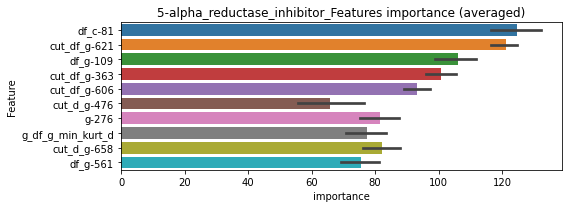

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000314653	valid_1's binary_logloss: 0.00782696
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000279677	valid_1's binary_logloss: 0.00199539
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000283259	valid_1's binary_logloss: 0.000318669
Training until validation scores don't improve for 30 rounds


5-alpha_reductase_inhibitor logloss: 0.003691468162762043


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000296112	valid_1's binary_logloss: 0.00462485


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000293568	valid_1's binary_logloss: 0.00780414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000277428	valid_1's binary_logloss: 0.0118147
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000264154	valid_1's binary_logloss: 0.00301256
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009440, Threshold: 0.0024580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0024580, conf_0:0.00172, conf_1:0.00320
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0324580


Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000285439	valid_1's binary_logloss: 0.00335261


threshold: 0.0324580, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000288871	valid_1's binary_logloss: 0.00900118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.000287021	valid_1's binary_logloss: 0.00814756
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000264936	valid_1's binary_logloss: 0.00251586
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0106705, Threshold: 0.0324580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0324580, conf_0:0.02597, conf_1:0.03895
threshold: 0.0324580, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000265322	valid_1's binary_logloss: 0.00291201


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000288871	valid_1's binary_logloss: 0.00900118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.000287021	valid_1's binary_logloss: 0.00814756
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000264936	valid_1's binary_logloss: 0.00251586
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0106705, Threshold: 0.0324580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0324580, conf_0:0.02921, conf_1:0.03570
threshold: 0.0324580, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000265322	valid_1's binary_logloss: 0.00291201


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


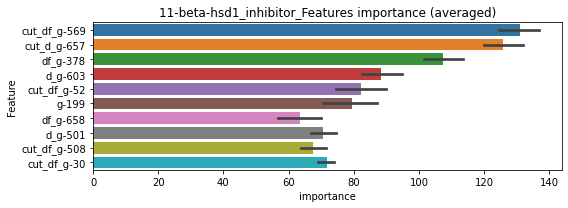

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000280069	valid_1's binary_logloss: 0.00806935
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000292492	valid_1's binary_logloss: 0.00816247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000322133	valid_1's binary_logloss: 0.0018777


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000304302	valid_1's binary_logloss: 0.002835


11-beta-hsd1_inhibitor logloss: 0.005237931169247388
acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3282


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000469786	valid_1's binary_logloss: 0.0127041
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000375375	valid_1's binary_logloss: 0.00906075
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000311709	valid_1's binary_logloss: 0.00271382
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015037, Threshold: 0.0022002, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0022002, conf_0:0.00154, conf_1:0.00286
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_1: 0.0322002
threshold: 0.0322002, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000653257	valid_1's binary_logloss: 0.0184638


positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000466856	valid_1's binary_logloss: 0.01022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000329732	valid_1's binary_logloss: 0.0081218
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000339729	valid_1's binary_logloss: 0.00225132
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0083670, Threshold: 0.0322002, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0000000 Vs.target_rate: 0.00101
Num_p_label: 0.0, Expected: 4.0, Threshold: 0.0322002, conf_0:0.02576, conf_1:0.03864
threshold: 0.0322002, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000341895	valid_1's binary_logloss: 0.0186885


positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000376923	valid_1's binary_logloss: 0.0212637
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000390059	valid_1's binary_logloss: 0.00545752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000360166	valid_1's binary_logloss: 0.00570443
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0116927, Threshold: 0.0322002, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0000000 Vs.target_rate: 0.00101
Num_p_label: 0.0, Expected: 4.0, Threshold: 0.0322002, conf_0:0.02898, conf_1:0.03542


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000313447	valid_1's binary_logloss: 0.00404274


threshold: 0.0322002, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


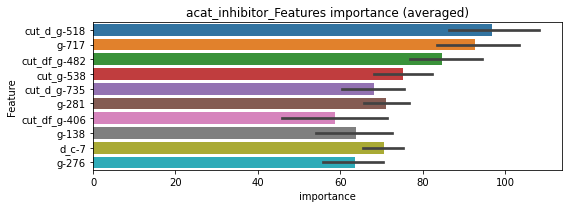

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 acat_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000507673	valid_1's binary_logloss: 0.0189272
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 acat_inhibitor=================================


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000371668	valid_1's binary_logloss: 0.00502699
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000366624	valid_1's binary_logloss: 0.00417656
Training until validation scores don't improve for 30 rounds


acat_inhibitor logloss: 0.008201976331006815


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000364474	valid_1's binary_logloss: 0.00467717
mutually exclusive columns: acetylcholine_receptor_agonist


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 6396
target_rate: 0.0079785 → Adj_target_rate: 0.0072634


selected negative label: 6396


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0322861	valid_1's binary_logloss: 0.114628
Early stopping, best iteration is:
[1201]	training's binary_logloss: 0.0267424	valid_1's binary_logloss: 0.113497
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0340933	valid_1's binary_logloss: 0.092281
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0197747	valid_1's binary_logloss: 0.0884771
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.035678	valid_1's binary_logloss: 0.075017
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.0177139	valid_1's binary_logloss: 0.0688191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.0355508	valid_1's binary_logloss: 0.116097


1 / 3, AUC score:0.980, PR-AUC:0.958
y_Threshold: 0.0431909, Threshold: 0.0705977, pos_neg_ratio: 0.8000000
Remove_noisy_data: 450 → Positive_corect_labels: 1182/7225
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, Expected: 31.8, Threshold: 0.0705977, conf_0:0.04942, conf_1:0.09178
threshold: 0.0705977, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1182.0/7225, y_label_rate: 0.1635986
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0210531	valid_1's binary_logloss: 0.0561423
Early stopping, best iteration is:
[1755]	training's binary_logloss: 0.0117014	valid_1's binary_logloss: 0.0522183
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0214809	valid_1's binary_logloss: 0.0565742
Early stopping, best iteration is:
[1173]	training's binary_logloss: 0.0182055	valid_1's binary_logloss: 0.0551796
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0219789	valid_1's binary_logloss: 0.0467275
[2000]	training's binary_logloss: 0.0106607	valid_1's binary_logloss: 0.0403487
[3000]	training's binary_logloss: 0.00695853	valid_1's binary_logloss: 0.0384152
Early stopping, best iteration is:
[3002]	training's binary_logloss: 0.00695329	valid_1's binary_logloss: 0.0384001
Training until validation scores don't improve for 30 rounds
[1000]	tr

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0482063, Threshold: 0.0705977, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 1136.0/7133
p_label_rate: 0.0080362 Vs.target_rate: 0.00798
Num_p_label: 32.0, Expected: 31.8, Threshold: 0.0705977, conf_0:0.05648, conf_1:0.08472
threshold: 0.0705977, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 1136.0/7133, y_label_rate: 0.1592598
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0152458	valid_1's binary_logloss: 0.0381564
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.00785624	valid_1's binary_logloss: 0.0339369
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0151611	valid_1's binary_logloss: 0.0392855
Early stopping, best iteration is:
[1751]	training's binary_logloss: 0.00858585	valid_1's binary_logloss: 0.0355852
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0165685	valid_1's binary_logloss: 0.024408
[2000]	training's binary_logloss: 0.00810192	valid_1's binary_logloss: 0.0186329
[3000]	training's binary_logloss: 0.00529167	valid_1's binary_logloss: 0.0166602
[4000]	training's binary_logloss: 0.00394698	valid_1's binary_logloss: 0.0158045
Early stopping, best iteration is:
[4326]	training's binary_logloss: 0.00364192	valid_1's binary_loglos

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0392499, Threshold: 0.0705977, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 1112.0/7085
p_label_rate: 0.0072828 Vs.target_rate: 0.00798
Num_p_label: 29.0, Expected: 31.8, Threshold: 0.0705977, conf_0:0.06354, conf_1:0.07766
threshold: 0.0705977, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 1112.0/7085, y_label_rate: 0.1569513


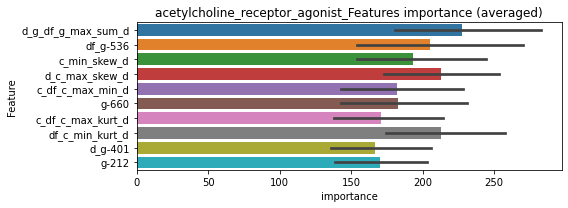

len(train_index) : 5313
len(valid_index) : 1772
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0171221	valid_1's binary_logloss: 0.0248051
[2000]	training's binary_logloss: 0.00875169	valid_1's binary_logloss: 0.0169305
[3000]	training's binary_logloss: 0.00584025	valid_1's binary_logloss: 0.0142928
[4000]	training's binary_logloss: 0.00438372	valid_1's binary_logloss: 0.0130087
[5000]	training's binary_logloss: 0.00352154	valid_1's binary_logloss: 0.0122738
[6000]	training's binary_logloss: 0.0029392	valid_1's binary_logloss: 0.0118069
Early stopping, best iteration is:
[6328]	training's binary_logloss: 0.00278922	valid_1's binary_logloss: 0.0117119


len(train_index) : 5314
len(valid_index) : 1771
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0169501	valid_1's binary_logloss: 0.0282985
[2000]	training's binary_logloss: 0.00864802	valid_1's binary_logloss: 0.0202142
[3000]	training's binary_logloss: 0.00576095	valid_1's binary_logloss: 0.0174828
[4000]	training's binary_logloss: 0.00431538	valid_1's binary_logloss: 0.0162486
[5000]	training's binary_logloss: 0.00345573	valid_1's binary_logloss: 0.0156022
Early stopping, best iteration is:
[5197]	training's binary_logloss: 0.00332401	valid_1's binary_logloss: 0.0154733


len(train_index) : 5314
len(valid_index) : 1771
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0165772	valid_1's binary_logloss: 0.0322193
[2000]	training's binary_logloss: 0.00844503	valid_1's binary_logloss: 0.0251019
[3000]	training's binary_logloss: 0.00564374	valid_1's binary_logloss: 0.0227846
[4000]	training's binary_logloss: 0.00423059	valid_1's binary_logloss: 0.0216836
Early stopping, best iteration is:
[4298]	training's binary_logloss: 0.00394358	valid_1's binary_logloss: 0.0214859


len(train_index) : 5314
len(valid_index) : 1771
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.017634	valid_1's binary_logloss: 0.020231
[2000]	training's binary_logloss: 0.0089578	valid_1's binary_logloss: 0.0128299
[3000]	training's binary_logloss: 0.00598692	valid_1's binary_logloss: 0.0103917
[4000]	training's binary_logloss: 0.00448187	valid_1's binary_logloss: 0.00922394
[5000]	training's binary_logloss: 0.00359815	valid_1's binary_logloss: 0.00852535
[6000]	training's binary_logloss: 0.00300121	valid_1's binary_logloss: 0.00807008
[7000]	training's binary_logloss: 0.00258542	valid_1's binary_logloss: 0.00777482
[8000]	training's binary_logloss: 0.00227036	valid_1's binary_logloss: 0.00752982
Early stopping, best iteration is:
[8153]	training's binary_logloss: 0.00222875	valid_1's binary_logloss: 0.00750098


acetylcholine_receptor_agonist logloss: 0.014042703013619083


mutually exclusive columns: acetylcholine_receptor_antagonist


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 7534
target_rate: 0.0126396 → Adj_target_rate: 0.0107394


selected negative label: 7534


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.0440525	valid_1's binary_logloss: 0.135622
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0426562	valid_1's binary_logloss: 0.131118
Early stopping, best iteration is:
[1094]	training's binary_logloss: 0.0388166	valid_1's binary_logloss: 0.130542
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.0444979	valid_1's binary_logloss: 0.139813
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.0452327	valid_1's binary_logloss: 0.133101


1 / 3, AUC score:0.948, PR-AUC:0.913
y_Threshold: 0.0600027, Threshold: 0.0904123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 696 → Positive_corect_labels: 1309/8344
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, Expected: 50.3, Threshold: 0.0904123, conf_0:0.06329, conf_1:0.11754
threshold: 0.0904123, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1309.0/8344, y_label_rate: 0.1568792
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0209803	valid_1's binary_logloss: 0.0629302
Early stopping, best iteration is:
[1333]	training's binary_logloss: 0.0155787	valid_1's binary_logloss: 0.0608516
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0218147	valid_1's binary_logloss: 0.0532221
Early stopping, best iteration is:
[1668]	training's binary_logloss: 0.0126475	valid_1's binary_logloss: 0.0495068
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0216521	valid_1's binary_logloss: 0.0577528
[2000]	training's binary_logloss: 0.0103298	valid_1's binary_logloss: 0.0532848
Early stopping, best iteration is:
[2177]	training's binary_logloss: 0.00942028	valid_1's binary_logloss: 0.0529909
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0214666	valid_1's binary_logloss: 0.0599468
Early stop

2 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.0382034, Threshold: 0.0904123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 1253.0/8232
p_label_rate: 0.0005023 Vs.target_rate: 0.01264
Num_p_label: 2.0, Expected: 50.3, Threshold: 0.0904123, conf_0:0.07233, conf_1:0.10849
threshold: 0.0904123, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 1253.0/8232, y_label_rate: 0.1522109
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0151054	valid_1's binary_logloss: 0.0311974
[2000]	training's binary_logloss: 0.00734056	valid_1's binary_logloss: 0.0269357
Early stopping, best iteration is:
[2551]	training's binary_logloss: 0.00565081	valid_1's binary_logloss: 0.0260695
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0152232	valid_1's binary_logloss: 0.0292962
[2000]	training's binary_logloss: 0.00742379	valid_1's binary_logloss: 0.02457
[3000]	training's binary_logloss: 0.00481901	valid_1's binary_logloss: 0.0232719
Early stopping, best iteration is:
[3010]	training's binary_logloss: 0.0048019	valid_1's binary_logloss: 0.0232539
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0153225	valid_1's binary_logloss: 0.0285965
[2000]	training's binary_logloss: 0.00741005	valid_1's binary_logloss: 0.023823
[3000]	training's binary_

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0244640, Threshold: 0.0904123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 1231.0/8188
p_label_rate: 0.0000000 Vs.target_rate: 0.01264
Num_p_label: 0.0, Expected: 50.3, Threshold: 0.0904123, conf_0:0.08137, conf_1:0.09945
threshold: 0.0904123, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 1231.0/8188, y_label_rate: 0.1503420


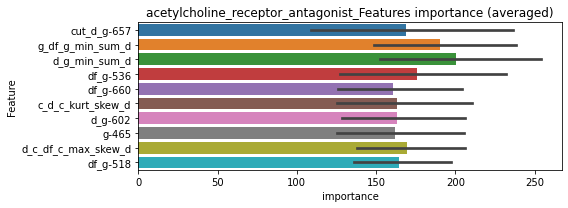

len(train_index) : 6141
len(valid_index) : 2047
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0174763	valid_1's binary_logloss: 0.0248694
[2000]	training's binary_logloss: 0.00899342	valid_1's binary_logloss: 0.0179451
[3000]	training's binary_logloss: 0.00594476	valid_1's binary_logloss: 0.015481
[4000]	training's binary_logloss: 0.0044252	valid_1's binary_logloss: 0.0142546
[5000]	training's binary_logloss: 0.00351679	valid_1's binary_logloss: 0.0135348
[6000]	training's binary_logloss: 0.00292395	valid_1's binary_logloss: 0.0130503
[7000]	training's binary_logloss: 0.00250411	valid_1's binary_logloss: 0.0127443
Early stopping, best iteration is:
[7252]	training's binary_logloss: 0.00241617	valid_1's binary_logloss: 0.0126678


len(train_index) : 6141
len(valid_index) : 2047
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0167047	valid_1's binary_logloss: 0.0301802
[2000]	training's binary_logloss: 0.00868159	valid_1's binary_logloss: 0.0239486
[3000]	training's binary_logloss: 0.00575867	valid_1's binary_logloss: 0.0218547
[4000]	training's binary_logloss: 0.0042906	valid_1's binary_logloss: 0.0208919
Early stopping, best iteration is:
[4256]	training's binary_logloss: 0.00402413	valid_1's binary_logloss: 0.0207344


len(train_index) : 6141
len(valid_index) : 2047
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0174835	valid_1's binary_logloss: 0.0232318
[2000]	training's binary_logloss: 0.00899313	valid_1's binary_logloss: 0.0164444
[3000]	training's binary_logloss: 0.00597041	valid_1's binary_logloss: 0.0141563
[4000]	training's binary_logloss: 0.00444533	valid_1's binary_logloss: 0.0129895
[5000]	training's binary_logloss: 0.0035441	valid_1's binary_logloss: 0.0123215
[6000]	training's binary_logloss: 0.00294765	valid_1's binary_logloss: 0.011865
[7000]	training's binary_logloss: 0.00252636	valid_1's binary_logloss: 0.0115826
[8000]	training's binary_logloss: 0.00221613	valid_1's binary_logloss: 0.0113761
[9000]	training's binary_logloss: 0.00197394	valid_1's binary_logloss: 0.0112185
Early stopping, best iteration is:
[9307]	training's binary_logloss: 0.00191063	valid_1's binary_logloss: 0.0111727


len(train_index) : 6141
len(valid_index) : 2047
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0164815	valid_1's binary_logloss: 0.0300837
[2000]	training's binary_logloss: 0.00848638	valid_1's binary_logloss: 0.0242519
[3000]	training's binary_logloss: 0.00561463	valid_1's binary_logloss: 0.0224485
[4000]	training's binary_logloss: 0.00418629	valid_1's binary_logloss: 0.021676
Early stopping, best iteration is:
[4094]	training's binary_logloss: 0.00408928	valid_1's binary_logloss: 0.0216305


acetylcholine_receptor_antagonist logloss: 0.016551345950093114
acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270516	valid_1's binary_logloss: 0.0751698
Early stopping, best iteration is:
[1722]	training's binary_logloss: 0.0155075	valid_1's binary_logloss: 0.0692707
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273992	valid_1's binary_logloss: 0.0680427
Early stopping, best iteration is:
[1921]	training's binary_logloss: 0.0140055	valid_1's binary_logloss: 0.0602746
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0278367	valid_1's binary_logloss: 0.0583681
[2000]	training's binary_logloss: 0.0135804	valid_1's binary_logloss: 0.0498774
[3000]	training's binary_logloss: 0.00883364	valid_1's binary_logloss: 0.0468568
Early stopping, best iteration is:
[3270]	training's binary_logloss: 0.00806896	valid_1's binary_logloss: 0.046397
Training until validation scores don't improve for 30 rounds
[1000]	tra

1 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0291820, Threshold: 0.0554979, pos_neg_ratio: 0.8000000
Remove_noisy_data: 151 → Positive_corect_labels: 645/3779
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0554979, conf_0:0.03885, conf_1:0.07215
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_1: 0.0854979
threshold: 0.0854979, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 645.0/3779, y_label_rate: 0.1706801
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.023177	valid_1's binary_logloss: 0.0661727
Early stopping, best iteration is:
[1944]	training's binary_logloss: 0.0117546	valid_1's binary_logloss: 0.0603419
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0233156	valid_1's binary_logloss: 0.0653197
[2000]	training's binary_logloss: 0.011588	valid_1's binary_logloss: 0.0573711
Early stopping, best iteration is:
[2817]	training's binary_logloss: 0.00814809	valid_1's binary_logloss: 0.0552132
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0250634	valid_1's binary_logloss: 0.0451331
[2000]	training's binary_logloss: 0.0122897	valid_1's binary_logloss: 0.0367282
[3000]	training's binary_logloss: 0.00808051	valid_1's binary_logloss: 0.0339986
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.0066661	valid_1's binary_logloss: 0.

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0479688, Threshold: 0.0854979, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 632.0/3753
p_label_rate: 0.0120542 Vs.target_rate: 0.00307
Num_p_label: 48.0, Expected: 12.2, Threshold: 0.0854979, conf_0:0.06840, conf_1:0.10260
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_1: 0.1154979
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_2: 0.1454979
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_3: 0.1754979
Num_p_label: 13.0, Expected: 12.2, Adj_threshold_4: 0.2054979
threshold: 0.2054979, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 632.0/3753, y_label_rate: 0.1683986
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0210657	valid_1's binary_logloss: 0.0542892
[2000]	training's binary_logloss: 0.0104639	valid_1's binary_logloss: 0.0467834
Early stopping, best iteration is:
[2684]	training's binary_logloss: 0.00775434	valid_1's binary_logloss: 0.0449446
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0212793	valid_1's binary_logloss: 0.0480098
[2000]	training's binary_logloss: 0.0105575	valid_1's binary_logloss: 0.040203
Early stopping, best iteration is:
[2876]	training's binary_logloss: 0.0072907	valid_1's binary_logloss: 0.0379706
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0214941	valid_1's binary_logloss: 0.0441337
[2000]	training's binary_logloss: 0.0107167	valid_1's binary_logloss: 0.0360875
[3000]	training's binary_logloss: 0.00709007	valid_1's binary_logloss: 0.033423
Early stopping, best iterat

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0523892, Threshold: 0.2054979, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 625.0/3739
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, Expected: 12.2, Threshold: 0.2054979, conf_0:0.18495, conf_1:0.22605
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_1: 0.2354979
threshold: 0.2354979, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 625.0/3739, y_label_rate: 0.1671570


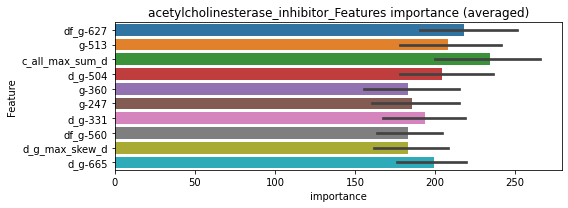

len(train_index) : 2804
len(valid_index) : 935
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0281129	valid_1's binary_logloss: 0.0594789
[2000]	training's binary_logloss: 0.0143689	valid_1's binary_logloss: 0.0481628
[3000]	training's binary_logloss: 0.00955756	valid_1's binary_logloss: 0.0444031
[4000]	training's binary_logloss: 0.0071645	valid_1's binary_logloss: 0.0425372
Early stopping, best iteration is:
[4104]	training's binary_logloss: 0.0069838	valid_1's binary_logloss: 0.0424146


len(train_index) : 2804
len(valid_index) : 935
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0286047	valid_1's binary_logloss: 0.0507053
[2000]	training's binary_logloss: 0.0146863	valid_1's binary_logloss: 0.0387416
[3000]	training's binary_logloss: 0.0098014	valid_1's binary_logloss: 0.034334
[4000]	training's binary_logloss: 0.00734977	valid_1's binary_logloss: 0.0323344
Early stopping, best iteration is:
[4813]	training's binary_logloss: 0.00612395	valid_1's binary_logloss: 0.0313975


len(train_index) : 2804
len(valid_index) : 935
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0296652	valid_1's binary_logloss: 0.041036
[2000]	training's binary_logloss: 0.0152017	valid_1's binary_logloss: 0.0300918
[3000]	training's binary_logloss: 0.0101461	valid_1's binary_logloss: 0.0264214
[4000]	training's binary_logloss: 0.00761314	valid_1's binary_logloss: 0.0246926
[5000]	training's binary_logloss: 0.00610028	valid_1's binary_logloss: 0.0236675
Early stopping, best iteration is:
[5711]	training's binary_logloss: 0.00534868	valid_1's binary_logloss: 0.0231607


len(train_index) : 2805
len(valid_index) : 934
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0286194	valid_1's binary_logloss: 0.0523555
[2000]	training's binary_logloss: 0.0147064	valid_1's binary_logloss: 0.0403
[3000]	training's binary_logloss: 0.00977791	valid_1's binary_logloss: 0.0359909
[4000]	training's binary_logloss: 0.00731855	valid_1's binary_logloss: 0.0338355
Early stopping, best iteration is:
[4828]	training's binary_logloss: 0.00607895	valid_1's binary_logloss: 0.0328845


acetylcholinesterase_inhibitor logloss: 0.03246422863369839
acetylcholinesterase_inhibitor is unpredictable(><)!
adenosine_receptor_agonist, len(trt): 54, len(othr): 3285
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000637237	valid_1's binary_logloss: 0.0370338
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00171262	valid_1's binary_logloss: 0.0562776
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000642768	valid_1's binary_logloss: 0.0149934
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040323, Threshold: 0.0092562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00064823	valid_1's binary_logloss: 0.030555


p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0092562, conf_0:0.00648, conf_1:0.01203
Num_p_label: 1.0, Expected: 9.0, Adj_threshold_1: 0.0392562
threshold: 0.0392562, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[394]	training's binary_logloss: 0.000981866	valid_1's binary_logloss: 0.0357243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00114501	valid_1's binary_logloss: 0.0557469
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000531604	valid_1's binary_logloss: 0.0143097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00052243	valid_1's binary_logloss: 0.0295389


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0146378, Threshold: 0.0392562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0015068 Vs.target_rate: 0.00227
Num_p_label: 6.0, Expected: 9.0, Threshold: 0.0392562, conf_0:0.03140, conf_1:0.04711
threshold: 0.0392562, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00108554	valid_1's binary_logloss: 0.0381607
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000525921	valid_1's binary_logloss: 0.0182507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000509778	valid_1's binary_logloss: 0.0213978
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0127222, Threshold: 0.0392562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0015068 Vs.target_rate: 0.00227
Num_p_label: 6.0, Expected: 9.0, Threshold: 0.0392562, conf_0:0.03533, conf_1:0.04318
threshold: 0.0392562, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[310]	training's binary_logloss: 0.00175434	valid_1's binary_logloss: 0.0503765


positive_y_label: 652.0/3800, y_label_rate: 0.1715789


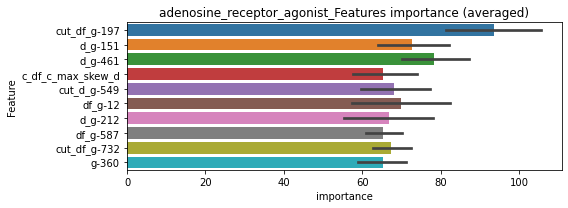

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 adenosine_receptor_agonist=================================


Early stopping, best iteration is:
[259]	training's binary_logloss: 0.00131157	valid_1's binary_logloss: 0.0305156
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 adenosine_receptor_agonist=================================


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00133497	valid_1's binary_logloss: 0.0308748
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 adenosine_receptor_agonist=================================


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.000999337	valid_1's binary_logloss: 0.0187143
Training until validation scores don't improve for 30 rounds


adenosine_receptor_agonist logloss: 0.02853872737010008


Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00145747	valid_1's binary_logloss: 0.0340503


adenosine_receptor_antagonist, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3271


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0322867	valid_1's binary_logloss: 0.106024
Early stopping, best iteration is:
[1791]	training's binary_logloss: 0.017702	valid_1's binary_logloss: 0.0992654
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.034597	valid_1's binary_logloss: 0.0797541
[2000]	training's binary_logloss: 0.0166775	valid_1's binary_logloss: 0.0689054
[3000]	training's binary_logloss: 0.0108434	valid_1's binary_logloss: 0.06502
Early stopping, best iteration is:
[3312]	training's binary_logloss: 0.00977663	valid_1's binary_logloss: 0.06437
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0348569	valid_1's binary_logloss: 0.0759835
[2000]	training's binary_logloss: 0.0170147	valid_1's binary_logloss: 0.063252
[3000]	training's binary_logloss: 0.0110976	valid_1's binary_logloss: 0.0586351
Early stopping, best iteration is:

1 / 3, AUC score:0.993, PR-AUC:0.982
y_Threshold: 0.0363658, Threshold: 0.0950628, pos_neg_ratio: 0.8000000
Remove_noisy_data: 171 → Positive_corect_labels: 634/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0950628, conf_0:0.06654, conf_1:0.12358
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_1: 0.1250628
Num_p_label: 8.0, Expected: 16.1, Adj_threshold_2: 0.1550628
threshold: 0.1550628, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 634.0/3754, y_label_rate: 0.1688865
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0289215	valid_1's binary_logloss: 0.0761824
[2000]	training's binary_logloss: 0.0141787	valid_1's binary_logloss: 0.0661739
Early stopping, best iteration is:
[2805]	training's binary_logloss: 0.00996165	valid_1's binary_logloss: 0.0632199
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0292707	valid_1's binary_logloss: 0.0697811
[2000]	training's binary_logloss: 0.0143657	valid_1's binary_logloss: 0.0609712
Early stopping, best iteration is:
[2459]	training's binary_logloss: 0.0116133	valid_1's binary_logloss: 0.0594451
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0289561	valid_1's binary_logloss: 0.0769357
[2000]	training's binary_logloss: 0.0141963	valid_1's binary_logloss: 0.0671583
Early stopping, best iteration is:
[2909]	training's binary_logloss: 0.00965598	valid_1's binary_logloss: 

2 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0516407, Threshold: 0.1550628, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 618.0/3722
p_label_rate: 0.0143144 Vs.target_rate: 0.00403
Num_p_label: 57.0, Expected: 16.1, Threshold: 0.1550628, conf_0:0.12405, conf_1:0.18608
Num_p_label: 41.0, Expected: 16.1, Adj_threshold_1: 0.1850628
Num_p_label: 35.0, Expected: 16.1, Adj_threshold_2: 0.2150628
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_3: 0.2450628
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_4: 0.2750628
threshold: 0.2750628, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 618.0/3722, y_label_rate: 0.1660398
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0253761	valid_1's binary_logloss: 0.0661828
[2000]	training's binary_logloss: 0.0126088	valid_1's binary_logloss: 0.0571623
Early stopping, best iteration is:
[2358]	training's binary_logloss: 0.0106495	valid_1's binary_logloss: 0.0558176
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0267177	valid_1's binary_logloss: 0.0540533
[2000]	training's binary_logloss: 0.0131432	valid_1's binary_logloss: 0.0433012
[3000]	training's binary_logloss: 0.00866397	valid_1's binary_logloss: 0.0396626
[4000]	training's binary_logloss: 0.00647565	valid_1's binary_logloss: 0.0379223
Early stopping, best iteration is:
[4377]	training's binary_logloss: 0.00592067	valid_1's binary_logloss: 0.0374173
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0261116	valid_1's binary_logloss: 0.0583539
[2000]	training's binary

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0513297, Threshold: 0.2750628, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 610.0/3706
p_label_rate: 0.0087896 Vs.target_rate: 0.00403
Num_p_label: 35.0, Expected: 16.1, Threshold: 0.2750628, conf_0:0.24756, conf_1:0.30257
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_1: 0.3050628
Num_p_label: 19.0, Expected: 16.1, Adj_threshold_2: 0.3350628
threshold: 0.3350628, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 610.0/3706, y_label_rate: 0.1645979


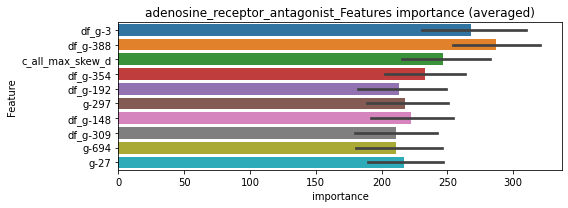

len(train_index) : 2779
len(valid_index) : 927
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0349572	valid_1's binary_logloss: 0.0614348
[2000]	training's binary_logloss: 0.0178987	valid_1's binary_logloss: 0.0473829
[3000]	training's binary_logloss: 0.0119082	valid_1's binary_logloss: 0.0422229
[4000]	training's binary_logloss: 0.00891829	valid_1's binary_logloss: 0.0395693
Early stopping, best iteration is:
[4554]	training's binary_logloss: 0.00784414	valid_1's binary_logloss: 0.0387537


len(train_index) : 2779
len(valid_index) : 927
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0322172	valid_1's binary_logloss: 0.0811256
[2000]	training's binary_logloss: 0.0164428	valid_1's binary_logloss: 0.0703695
Early stopping, best iteration is:
[2426]	training's binary_logloss: 0.0135941	valid_1's binary_logloss: 0.068722


len(train_index) : 2780
len(valid_index) : 926
================================= fold 3/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0352741	valid_1's binary_logloss: 0.0566964
[2000]	training's binary_logloss: 0.0180071	valid_1's binary_logloss: 0.0434069
[3000]	training's binary_logloss: 0.0119685	valid_1's binary_logloss: 0.0386697
[4000]	training's binary_logloss: 0.00894513	valid_1's binary_logloss: 0.0363427
Early stopping, best iteration is:
[4824]	training's binary_logloss: 0.00743134	valid_1's binary_logloss: 0.0352827


len(train_index) : 2780
len(valid_index) : 926
================================= fold 4/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.035899	valid_1's binary_logloss: 0.0536912
[2000]	training's binary_logloss: 0.0183598	valid_1's binary_logloss: 0.0393638
[3000]	training's binary_logloss: 0.0122249	valid_1's binary_logloss: 0.0343762
[4000]	training's binary_logloss: 0.00915143	valid_1's binary_logloss: 0.0319048
[5000]	training's binary_logloss: 0.00732647	valid_1's binary_logloss: 0.0303893
[6000]	training's binary_logloss: 0.00610677	valid_1's binary_logloss: 0.0293672
[7000]	training's binary_logloss: 0.00524908	valid_1's binary_logloss: 0.0287291
Early stopping, best iteration is:
[7275]	training's binary_logloss: 0.00505525	valid_1's binary_logloss: 0.0285591


adenosine_receptor_antagonist logloss: 0.04283525632618297
adenosine_receptor_antagonist is unpredictable(><)!
adenylyl_cyclase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:504
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000293707	valid_1's binary_logloss: 0.00483205
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000276664	valid_1's binary_logloss: 0.0142858
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000288826	valid_1's binary_logloss: 0.00251186
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009501, Threshold: 0.0051761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0051761, conf_0:0.00362, conf_1:0.00673
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0351761
threshold: 0.0351761, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000305477	valid_1's binary_logloss: 0.0110759


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000294547	valid_1's binary_logloss: 0.00438836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000274055	valid_1's binary_logloss: 0.0128247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000273251	valid_1's binary_logloss: 0.00235239
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0129802, Threshold: 0.0351761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0090407 Vs.target_rate: 0.00076
Num_p_label: 36.0, Expected: 3.0, Threshold: 0.0351761, conf_0:0.02814, conf_1:0.04221
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_1: 0.0651761
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_2: 0.0951761
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.1251761
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.1551761
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.1851761
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.2151761


Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000300789	valid_1's binary_logloss: 0.008883


Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.2451761
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_8: 0.2751761
threshold: 0.2751761, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000294547	valid_1's binary_logloss: 0.00438836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000274055	valid_1's binary_logloss: 0.0128247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000273251	valid_1's binary_logloss: 0.00235239
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0129802, Threshold: 0.2751761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.2751761, conf_0:0.24766, conf_1:0.30269
threshold: 0.2751761, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000300789	valid_1's binary_logloss: 0.008883


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


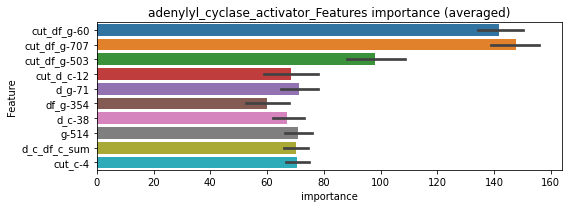

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000313691	valid_1's binary_logloss: 0.00330151
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000274666	valid_1's binary_logloss: 0.0112834
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000292027	valid_1's binary_logloss: 0.00259082
Training until validation scores don't improve for 30 rounds


adenylyl_cyclase_activator logloss: 0.0063464738879098195


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000443707	valid_1's binary_logloss: 0.00819899
mutually exclusive columns: adrenergic_receptor_agonist


adrenergic_receptor_agonist, len(trt): 270, len(othr): 6953
target_rate: 0.0113379 → Adj_target_rate: 0.0097917


selected negative label: 6953


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0432803	valid_1's binary_logloss: 0.122774
Early stopping, best iteration is:
[1471]	training's binary_logloss: 0.0287404	valid_1's binary_logloss: 0.118624
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0424676	valid_1's binary_logloss: 0.132656
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.0392367	valid_1's binary_logloss: 0.131968
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0415184	valid_1's binary_logloss: 0.137639
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.0420949	valid_1's binary_logloss: 0.13758
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0420127	valid_1's binary_logloss: 0.131699
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.0424031	valid_1's binary_loglo

1 / 3, AUC score:0.957, PR-AUC:0.920
y_Threshold: 0.0580577, Threshold: 0.0879362, pos_neg_ratio: 0.8000000
Remove_noisy_data: 637 → Positive_corect_labels: 1211/7706
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, Expected: 45.1, Threshold: 0.0879362, conf_0:0.06156, conf_1:0.11432
threshold: 0.0879362, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1211.0/7706, y_label_rate: 0.1571503
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0217527	valid_1's binary_logloss: 0.066583
Early stopping, best iteration is:
[1349]	training's binary_logloss: 0.0160456	valid_1's binary_logloss: 0.0642896
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0230147	valid_1's binary_logloss: 0.0529779
[2000]	training's binary_logloss: 0.0111155	valid_1's binary_logloss: 0.0473991
Early stopping, best iteration is:
[2303]	training's binary_logloss: 0.00954561	valid_1's binary_logloss: 0.0466554
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0224283	valid_1's binary_logloss: 0.0582281
[2000]	training's binary_logloss: 0.010927	valid_1's binary_logloss: 0.0528701
Early stopping, best iteration is:
[2099]	training's binary_logloss: 0.0103907	valid_1's binary_logloss: 0.0526363
Training until validation scores don't improve for 30 rounds
[1000]	train

2 / 3, AUC score:0.995, PR-AUC:0.986
y_Threshold: 0.0472714, Threshold: 0.0879362, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 1155.0/7594
p_label_rate: 0.0060271 Vs.target_rate: 0.01134
Num_p_label: 24.0, Expected: 45.1, Threshold: 0.0879362, conf_0:0.07035, conf_1:0.10552
threshold: 0.0879362, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 1155.0/7594, y_label_rate: 0.1520938
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.014482	valid_1's binary_logloss: 0.0246085
[2000]	training's binary_logloss: 0.00724234	valid_1's binary_logloss: 0.0197104
[3000]	training's binary_logloss: 0.00477573	valid_1's binary_logloss: 0.0180626
Early stopping, best iteration is:
[3767]	training's binary_logloss: 0.0037889	valid_1's binary_logloss: 0.0174866
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0135928	valid_1's binary_logloss: 0.0367801
[2000]	training's binary_logloss: 0.00689271	valid_1's binary_logloss: 0.0327997
Early stopping, best iteration is:
[2108]	training's binary_logloss: 0.00653914	valid_1's binary_logloss: 0.032617
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0149385	valid_1's binary_logloss: 0.021129
[2000]	training's binary_logloss: 0.00746108	valid_1's binary_logloss: 0.0151256
[3000]	training's binary_

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0500367, Threshold: 0.0879362, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 1135.0/7554
p_label_rate: 0.0055249 Vs.target_rate: 0.01134
Num_p_label: 22.0, Expected: 45.1, Threshold: 0.0879362, conf_0:0.07914, conf_1:0.09673
threshold: 0.0879362, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 1135.0/7554, y_label_rate: 0.1502515


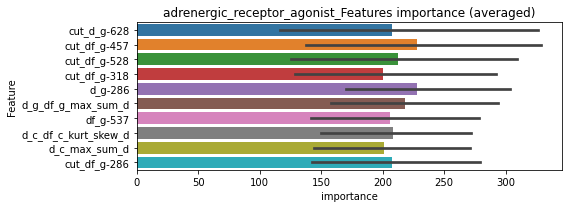

len(train_index) : 5665
len(valid_index) : 1889
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0158036	valid_1's binary_logloss: 0.022127
[2000]	training's binary_logloss: 0.0080107	valid_1's binary_logloss: 0.0142927
[3000]	training's binary_logloss: 0.00538931	valid_1's binary_logloss: 0.0117339
[4000]	training's binary_logloss: 0.00406535	valid_1's binary_logloss: 0.0104795
[5000]	training's binary_logloss: 0.00327133	valid_1's binary_logloss: 0.00973316
[6000]	training's binary_logloss: 0.00274301	valid_1's binary_logloss: 0.00923438
[7000]	training's binary_logloss: 0.00236247	valid_1's binary_logloss: 0.00886472
[8000]	training's binary_logloss: 0.00208152	valid_1's binary_logloss: 0.00859305
Early stopping, best iteration is:
[8531]	training's binary_logloss: 0.00195862	valid_1's binary_logloss: 0.00847876


len(train_index) : 5665
len(valid_index) : 1889
================================= fold 2/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0158957	valid_1's binary_logloss: 0.0228167
[2000]	training's binary_logloss: 0.0080964	valid_1's binary_logloss: 0.0145895
[3000]	training's binary_logloss: 0.00545041	valid_1's binary_logloss: 0.011874
[4000]	training's binary_logloss: 0.00411114	valid_1's binary_logloss: 0.0104616
[5000]	training's binary_logloss: 0.00330578	valid_1's binary_logloss: 0.00966362
[6000]	training's binary_logloss: 0.00277029	valid_1's binary_logloss: 0.00908459
[7000]	training's binary_logloss: 0.00238761	valid_1's binary_logloss: 0.00869396
[8000]	training's binary_logloss: 0.00210288	valid_1's binary_logloss: 0.00840389
Early stopping, best iteration is:
[8343]	training's binary_logloss: 0.00202003	valid_1's binary_logloss: 0.00831334


len(train_index) : 5666
len(valid_index) : 1888
================================= fold 3/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0152099	valid_1's binary_logloss: 0.026406
[2000]	training's binary_logloss: 0.00769945	valid_1's binary_logloss: 0.0187004
[3000]	training's binary_logloss: 0.00519406	valid_1's binary_logloss: 0.0162357
[4000]	training's binary_logloss: 0.00392008	valid_1's binary_logloss: 0.0149803
[5000]	training's binary_logloss: 0.00316202	valid_1's binary_logloss: 0.0142966
[6000]	training's binary_logloss: 0.00265483	valid_1's binary_logloss: 0.0137431
Early stopping, best iteration is:
[6714]	training's binary_logloss: 0.0023834	valid_1's binary_logloss: 0.0134478


len(train_index) : 5666
len(valid_index) : 1888
================================= fold 4/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.015608	valid_1's binary_logloss: 0.0222243
[2000]	training's binary_logloss: 0.00795141	valid_1's binary_logloss: 0.0147584
[3000]	training's binary_logloss: 0.00536851	valid_1's binary_logloss: 0.0123533
[4000]	training's binary_logloss: 0.00404739	valid_1's binary_logloss: 0.0112022
[5000]	training's binary_logloss: 0.00325755	valid_1's binary_logloss: 0.0105944
[6000]	training's binary_logloss: 0.00273092	valid_1's binary_logloss: 0.0101492
Early stopping, best iteration is:
[6859]	training's binary_logloss: 0.00239916	valid_1's binary_logloss: 0.00987659


adrenergic_receptor_agonist logloss: 0.010028687661863217


mutually exclusive columns: adrenergic_receptor_antagonist


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 6628
target_rate: 0.0151172 → Adj_target_rate: 0.0125042


selected negative label: 6628


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0549532	valid_1's binary_logloss: 0.158802
Early stopping, best iteration is:
[1201]	training's binary_logloss: 0.0457161	valid_1's binary_logloss: 0.156956
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.0694722	valid_1's binary_logloss: 0.186992
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0554491	valid_1's binary_logloss: 0.16217
Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.0494802	valid_1's binary_logloss: 0.16096
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0542187	valid_1's binary_logloss: 0.169125
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.0539643	valid_1's binary_logloss: 0.169086


1 / 3, AUC score:0.933, PR-AUC:0.882
y_Threshold: 0.0820665, Threshold: 0.1352733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 730 → Positive_corect_labels: 1093/7223
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, Expected: 60.2, Threshold: 0.1352733, conf_0:0.09469, conf_1:0.17586
threshold: 0.1352733, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1093.0/7223, y_label_rate: 0.1513222
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270469	valid_1's binary_logloss: 0.0663406
Early stopping, best iteration is:
[1664]	training's binary_logloss: 0.0159791	valid_1's binary_logloss: 0.0605951
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0263961	valid_1's binary_logloss: 0.0715122
Early stopping, best iteration is:
[1663]	training's binary_logloss: 0.0156644	valid_1's binary_logloss: 0.066576
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0262078	valid_1's binary_logloss: 0.0758646
Early stopping, best iteration is:
[1346]	training's binary_logloss: 0.0194147	valid_1's binary_logloss: 0.0732501
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0264271	valid_1's binary_logloss: 0.0711521
Early stopping, best iteration is:
[1543]	training's binary_logloss: 0.0168706	valid_1's bin

2 / 3, AUC score:0.994, PR-AUC:0.980
y_Threshold: 0.0820962, Threshold: 0.1352733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 1015.0/7067
p_label_rate: 0.0271220 Vs.target_rate: 0.01512
Num_p_label: 108.0, Expected: 60.2, Threshold: 0.1352733, conf_0:0.10822, conf_1:0.16233
Num_p_label: 87.0, Expected: 60.2, Adj_threshold_1: 0.1652733
threshold: 0.1652733, positive_p_label: 87.0/3982, p_label_rate: 0.0218483
positive_y_label: 1015.0/7067, y_label_rate: 0.1436253
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0150391	valid_1's binary_logloss: 0.0255858
[2000]	training's binary_logloss: 0.00759696	valid_1's binary_logloss: 0.0190662
[3000]	training's binary_logloss: 0.00505695	valid_1's binary_logloss: 0.0166824
[4000]	training's binary_logloss: 0.00379778	valid_1's binary_logloss: 0.0155712
[5000]	training's binary_logloss: 0.00304936	valid_1's binary_logloss: 0.0148822
[6000]	training's binary_logloss: 0.00255483	valid_1's binary_logloss: 0.0144305
Early stopping, best iteration is:
[6660]	training's binary_logloss: 0.00230928	valid_1's binary_logloss: 0.0142071
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0146488	valid_1's binary_logloss: 0.0304251
[2000]	training's binary_logloss: 0.00741504	valid_1's binary_logloss: 0.0244622
[3000]	training's binary_logloss: 0.00496251	valid_1's binary_logloss: 0.0225807
[4000]	training's binary_logloss: 0

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0813970, Threshold: 0.1652733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 996.0/7029
p_label_rate: 0.0271220 Vs.target_rate: 0.01512
Num_p_label: 108.0, Expected: 60.2, Threshold: 0.1652733, conf_0:0.14875, conf_1:0.18180
Num_p_label: 103.0, Expected: 60.2, Adj_threshold_1: 0.1952733
Num_p_label: 97.0, Expected: 60.2, Adj_threshold_2: 0.2252733
Num_p_label: 94.0, Expected: 60.2, Adj_threshold_3: 0.2552733
Num_p_label: 90.0, Expected: 60.2, Adj_threshold_4: 0.2852733
threshold: 0.2852733, positive_p_label: 90.0/3982, p_label_rate: 0.0226017
positive_y_label: 996.0/7029, y_label_rate: 0.1416987


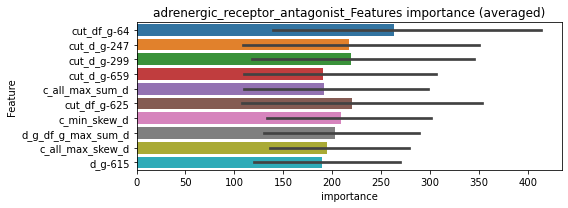

len(train_index) : 5271
len(valid_index) : 1758
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0174384	valid_1's binary_logloss: 0.0280872
[2000]	training's binary_logloss: 0.00870101	valid_1's binary_logloss: 0.0192699
[3000]	training's binary_logloss: 0.00583512	valid_1's binary_logloss: 0.016466
[4000]	training's binary_logloss: 0.0043997	valid_1's binary_logloss: 0.0150894
[5000]	training's binary_logloss: 0.00354041	valid_1's binary_logloss: 0.0143179
[6000]	training's binary_logloss: 0.0029707	valid_1's binary_logloss: 0.0137981
Early stopping, best iteration is:
[6599]	training's binary_logloss: 0.00271408	valid_1's binary_logloss: 0.013557


len(train_index) : 5272
len(valid_index) : 1757
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0178005	valid_1's binary_logloss: 0.0268333
[2000]	training's binary_logloss: 0.00893796	valid_1's binary_logloss: 0.0178844
[3000]	training's binary_logloss: 0.00599487	valid_1's binary_logloss: 0.0149213
[4000]	training's binary_logloss: 0.00452398	valid_1's binary_logloss: 0.0133815
[5000]	training's binary_logloss: 0.00364034	valid_1's binary_logloss: 0.0124666
[6000]	training's binary_logloss: 0.00305537	valid_1's binary_logloss: 0.0118576
Early stopping, best iteration is:
[6488]	training's binary_logloss: 0.00283534	valid_1's binary_logloss: 0.01161


len(train_index) : 5272
len(valid_index) : 1757
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0177799	valid_1's binary_logloss: 0.0271804
[2000]	training's binary_logloss: 0.00897731	valid_1's binary_logloss: 0.0181467
[3000]	training's binary_logloss: 0.00600701	valid_1's binary_logloss: 0.0149818
[4000]	training's binary_logloss: 0.00452803	valid_1's binary_logloss: 0.0132935
[5000]	training's binary_logloss: 0.00364385	valid_1's binary_logloss: 0.0123004
[6000]	training's binary_logloss: 0.00305813	valid_1's binary_logloss: 0.011605
[7000]	training's binary_logloss: 0.00263848	valid_1's binary_logloss: 0.0111159
[8000]	training's binary_logloss: 0.0023249	valid_1's binary_logloss: 0.0107773
Early stopping, best iteration is:
[8531]	training's binary_logloss: 0.00218702	valid_1's binary_logloss: 0.0106061


len(train_index) : 5272
len(valid_index) : 1757
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0182663	valid_1's binary_logloss: 0.0259898
[2000]	training's binary_logloss: 0.00925409	valid_1's binary_logloss: 0.0155921
[3000]	training's binary_logloss: 0.00621808	valid_1's binary_logloss: 0.0118442
[4000]	training's binary_logloss: 0.0046916	valid_1's binary_logloss: 0.00990699
[5000]	training's binary_logloss: 0.00377086	valid_1's binary_logloss: 0.00871365
[6000]	training's binary_logloss: 0.00316394	valid_1's binary_logloss: 0.00791089
[7000]	training's binary_logloss: 0.00272804	valid_1's binary_logloss: 0.00731637
[8000]	training's binary_logloss: 0.00240344	valid_1's binary_logloss: 0.0068596
[9000]	training's binary_logloss: 0.0021496	valid_1's binary_logloss: 0.006504
[10000]	training's binary_logloss: 0.00194851	valid_1's binary_logloss: 0.00620254
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00194851	valid_1's binary_logloss: 0.00620

adrenergic_receptor_antagonist logloss: 0.01049435095263664
akt_inhibitor, len(trt): 66, len(othr): 3276
target_rate: 0.0027715 → Adj_target_rate: 0.0029567


selected negative label: 3276


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248836	valid_1's binary_logloss: 0.058823
[2000]	training's binary_logloss: 0.0121417	valid_1's binary_logloss: 0.050027
[3000]	training's binary_logloss: 0.00792669	valid_1's binary_logloss: 0.0467047
[4000]	training's binary_logloss: 0.00587891	valid_1's binary_logloss: 0.0451378
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.0056427	valid_1's binary_logloss: 0.044872
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248155	valid_1's binary_logloss: 0.0624703
[2000]	training's binary_logloss: 0.0121338	valid_1's binary_logloss: 0.0540491
[3000]	training's binary_logloss: 0.00793275	valid_1's binary_logloss: 0.0511292
Early stopping, best iteration is:
[2995]	training's binary_logloss: 0.00794577	valid_1's binary_logloss: 0.051121
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_lo

1 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0245563, Threshold: 0.0672051, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 648/3785
p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, Expected: 11.0, Threshold: 0.0672051, conf_0:0.04704, conf_1:0.08737
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_1: 0.0972051
Num_p_label: 13.0, Expected: 11.0, Adj_threshold_2: 0.1272051
threshold: 0.1272051, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 648.0/3785, y_label_rate: 0.1712021
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0224481	valid_1's binary_logloss: 0.060161
[2000]	training's binary_logloss: 0.0111112	valid_1's binary_logloss: 0.0521515
Early stopping, best iteration is:
[2108]	training's binary_logloss: 0.010536	valid_1's binary_logloss: 0.0518077
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0227215	valid_1's binary_logloss: 0.0576773
[2000]	training's binary_logloss: 0.0111481	valid_1's binary_logloss: 0.0501753
[3000]	training's binary_logloss: 0.00732342	valid_1's binary_logloss: 0.047552
Early stopping, best iteration is:
[3009]	training's binary_logloss: 0.00729991	valid_1's binary_logloss: 0.0475261
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0234539	valid_1's binary_logloss: 0.0461025
[2000]	training's binary_logloss: 0.0115401	valid_1's binary_logloss: 0.0372959
[3000]	training's binary_log

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0475782, Threshold: 0.1272051, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 639.0/3767
p_label_rate: 0.0077850 Vs.target_rate: 0.00277
Num_p_label: 31.0, Expected: 11.0, Threshold: 0.1272051, conf_0:0.10176, conf_1:0.15265
Num_p_label: 24.0, Expected: 11.0, Adj_threshold_1: 0.1572051
Num_p_label: 16.0, Expected: 11.0, Adj_threshold_2: 0.1872051
threshold: 0.1872051, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 639.0/3767, y_label_rate: 0.1696310
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0207211	valid_1's binary_logloss: 0.0512674
[2000]	training's binary_logloss: 0.010323	valid_1's binary_logloss: 0.0431213
[3000]	training's binary_logloss: 0.00683024	valid_1's binary_logloss: 0.040507
Early stopping, best iteration is:
[3260]	training's binary_logloss: 0.00627626	valid_1's binary_logloss: 0.0400967
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0205108	valid_1's binary_logloss: 0.0484423
[2000]	training's binary_logloss: 0.0102122	valid_1's binary_logloss: 0.0413568
Early stopping, best iteration is:
[2886]	training's binary_logloss: 0.00702529	valid_1's binary_logloss: 0.0390302
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0216185	valid_1's binary_logloss: 0.0366626
[2000]	training's binary_logloss: 0.0107342	valid_1's binary_logloss: 0.0280416
[3000]	training's binary_l

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0474396, Threshold: 0.1872051, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 632.0/3753
p_label_rate: 0.0040181 Vs.target_rate: 0.00277
Num_p_label: 16.0, Expected: 11.0, Threshold: 0.1872051, conf_0:0.16848, conf_1:0.20593
threshold: 0.1872051, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 632.0/3753, y_label_rate: 0.1683986


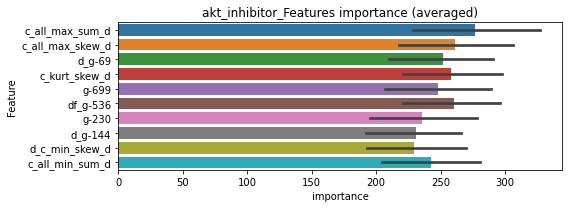

len(train_index) : 2814
len(valid_index) : 939
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270414	valid_1's binary_logloss: 0.058011
[2000]	training's binary_logloss: 0.0139848	valid_1's binary_logloss: 0.0462328
[3000]	training's binary_logloss: 0.00934027	valid_1's binary_logloss: 0.0418873
Early stopping, best iteration is:
[3329]	training's binary_logloss: 0.00841606	valid_1's binary_logloss: 0.0410915


len(train_index) : 2815
len(valid_index) : 938
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0275455	valid_1's binary_logloss: 0.0477238
[2000]	training's binary_logloss: 0.0141679	valid_1's binary_logloss: 0.0375161
[3000]	training's binary_logloss: 0.00948425	valid_1's binary_logloss: 0.0339729
[4000]	training's binary_logloss: 0.00713157	valid_1's binary_logloss: 0.0321557
Early stopping, best iteration is:
[4813]	training's binary_logloss: 0.00594619	valid_1's binary_logloss: 0.0312824


len(train_index) : 2815
len(valid_index) : 938
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0278228	valid_1's binary_logloss: 0.0469006
[2000]	training's binary_logloss: 0.0143017	valid_1's binary_logloss: 0.0365013
[3000]	training's binary_logloss: 0.00955475	valid_1's binary_logloss: 0.0328267
Early stopping, best iteration is:
[3331]	training's binary_logloss: 0.00860301	valid_1's binary_logloss: 0.0321749


len(train_index) : 2815
len(valid_index) : 938
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0287778	valid_1's binary_logloss: 0.0424742
[2000]	training's binary_logloss: 0.0148304	valid_1's binary_logloss: 0.0314191
[3000]	training's binary_logloss: 0.00988956	valid_1's binary_logloss: 0.0274661
[4000]	training's binary_logloss: 0.00741949	valid_1's binary_logloss: 0.0255351
[5000]	training's binary_logloss: 0.00593749	valid_1's binary_logloss: 0.0242166
Early stopping, best iteration is:
[5381]	training's binary_logloss: 0.00552032	valid_1's binary_logloss: 0.0238503


akt_inhibitor logloss: 0.032102164062075604
akt_inhibitor is unpredictable(><)!
aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3289
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3289


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00029927	valid_1's binary_logloss: 0.00460881
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000314439	valid_1's binary_logloss: 0.0165945
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000294701	valid_1's binary_logloss: 0.00397104
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010142, Threshold: 0.0030793, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0030793, conf_0:0.00216, conf_1:0.00400
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0330793
threshold: 0.0330793, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[386]	training's binary_logloss: 0.000390737	valid_1's binary_logloss: 0.00981119


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000285986	valid_1's binary_logloss: 0.00444822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000293887	valid_1's binary_logloss: 0.013653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000293917	valid_1's binary_logloss: 0.00353804
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0140511, Threshold: 0.0330793, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, Expected: 3.2, Threshold: 0.0330793, conf_0:0.02646, conf_1:0.03970
threshold: 0.0330793, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000288127	valid_1's binary_logloss: 0.00959144


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000285986	valid_1's binary_logloss: 0.00444822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000293887	valid_1's binary_logloss: 0.013653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000293917	valid_1's binary_logloss: 0.00353804
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0140511, Threshold: 0.0330793, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, Expected: 3.2, Threshold: 0.0330793, conf_0:0.02977, conf_1:0.03639
threshold: 0.0330793, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000288127	valid_1's binary_logloss: 0.00959144


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


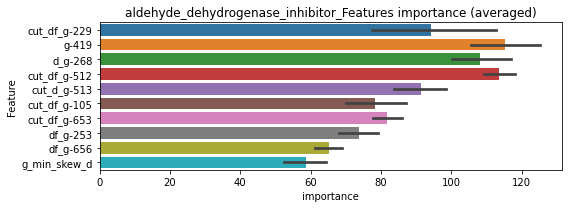

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00032385	valid_1's binary_logloss: 0.00341159
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000320916	valid_1's binary_logloss: 0.0108822
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000371022	valid_1's binary_logloss: 0.00328282
Training until validation scores don't improve for 30 rounds


aldehyde_dehydrogenase_inhibitor logloss: 0.006375241449608689


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000380534	valid_1's binary_logloss: 0.00792744


alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00060574	valid_1's binary_logloss: 0.0293942
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000589522	valid_1's binary_logloss: 0.0327669
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000458764	valid_1's binary_logloss: 0.00708734
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020316, Threshold: 0.0062859, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0062859, conf_0:0.00440, conf_1:0.00817


Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000534127	valid_1's binary_logloss: 0.0214698


Num_p_label: 10.0, Expected: 7.0, Adj_threshold_1: 0.0362859
threshold: 0.0362859, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000605415	valid_1's binary_logloss: 0.0285202
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000584372	valid_1's binary_logloss: 0.0338531
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000436157	valid_1's binary_logloss: 0.00541653
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0097352, Threshold: 0.0362859, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0050226 Vs.target_rate: 0.00176
Num_p_label: 20.0, Expected: 7.0, Threshold: 0.0362859, conf_0:0.02903, conf_1:0.04354
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_1: 0.0662859


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000642612	valid_1's binary_logloss: 0.0212706


threshold: 0.0662859, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00060421	valid_1's binary_logloss: 0.0303105
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000543771	valid_1's binary_logloss: 0.0202223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000501791	valid_1's binary_logloss: 0.00371916
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0147584, Threshold: 0.0662859, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00274674	valid_1's binary_logloss: 0.0377228


Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0032647 Vs.target_rate: 0.00176
Num_p_label: 13.0, Expected: 7.0, Threshold: 0.0662859, conf_0:0.05966, conf_1:0.07291
threshold: 0.0662859, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


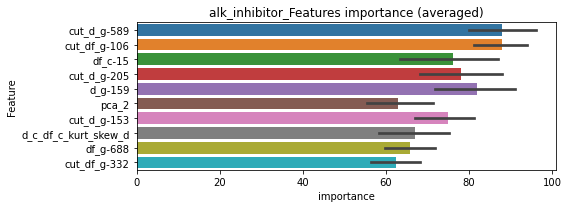

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 alk_inhibitor=================================


Early stopping, best iteration is:
[267]	training's binary_logloss: 0.00105737	valid_1's binary_logloss: 0.0410708
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 alk_inhibitor=================================


Early stopping, best iteration is:
[310]	training's binary_logloss: 0.000901367	valid_1's binary_logloss: 0.0229918
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 alk_inhibitor=================================


Early stopping, best iteration is:
[303]	training's binary_logloss: 0.000928843	valid_1's binary_logloss: 0.0167576
Training until validation scores don't improve for 30 rounds


alk_inhibitor logloss: 0.02175063025702739


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000535265	valid_1's binary_logloss: 0.00616076


ampk_activator, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000303305	valid_1's binary_logloss: 0.00800346
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.000238299	valid_1's binary_logloss: 0.00458284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00020347	valid_1's binary_logloss: 0.000405148
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0007730, Threshold: 0.0037459, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0037459, conf_0:0.00262, conf_1:0.00487
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_1: 0.0337459
threshold: 0.0337459, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[364]	training's binary_logloss: 0.000287333	valid_1's binary_logloss: 0.00396965


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.00072539	valid_1's binary_logloss: 0.00767399
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000235693	valid_1's binary_logloss: 0.00336257
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000198072	valid_1's binary_logloss: 0.000210718
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0066945, Threshold: 0.0337459, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0045203 Vs.target_rate: 0.00050
Num_p_label: 18.0, Expected: 2.0, Threshold: 0.0337459, conf_0:0.02700, conf_1:0.04050
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_1: 0.0637459
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.0937459
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1237459


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000301308	valid_1's binary_logloss: 0.00504623


threshold: 0.1237459, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000188306	valid_1's binary_logloss: 0.000744507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000263394	valid_1's binary_logloss: 0.0046128
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000193989	valid_1's binary_logloss: 0.000277115
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0077389, Threshold: 0.1237459, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.1237459, conf_0:0.11137, conf_1:0.13612
threshold: 0.1237459, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000215045	valid_1's binary_logloss: 0.00329453


positive_y_label: 656.0/3810, y_label_rate: 0.1721785


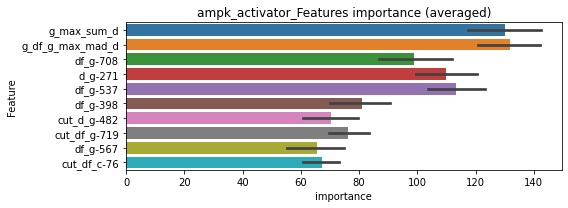

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000209347	valid_1's binary_logloss: 0.00125052
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ampk_activator=================================


Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000230048	valid_1's binary_logloss: 0.00390196
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ampk_activator=================================


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000200037	valid_1's binary_logloss: 0.000236284
Training until validation scores don't improve for 30 rounds


ampk_activator logloss: 0.002071022306295543


Early stopping, best iteration is:
[369]	training's binary_logloss: 0.000311768	valid_1's binary_logloss: 0.00289426


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000244171	valid_1's binary_logloss: 0.00410526
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000238847	valid_1's binary_logloss: 0.00689522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000208743	valid_1's binary_logloss: 0.000230703
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0007903, Threshold: 0.0087618, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0087618, conf_0:0.00613, conf_1:0.01139
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_1: 0.0387618
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_2: 0.0687618
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.0987618
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_4: 0.1287618
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_5: 0.1587618
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.1887618
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.2187618
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.2487618


Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000222702	valid_1's binary_logloss: 0.00301768


threshold: 0.2487618, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000217242	valid_1's binary_logloss: 0.00307007
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000333588	valid_1's binary_logloss: 0.00611643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000203451	valid_1's binary_logloss: 0.000225785
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0175124, Threshold: 0.2487618, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0057760 Vs.target_rate: 0.00050
Num_p_label: 23.0, Expected: 2.0, Threshold: 0.2487618, conf_0:0.19901, conf_1:0.29851
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_1: 0.2787618
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_2: 0.3087618
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_3: 0.3387618
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_4: 0.3687618
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_5: 0.3987618
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_6: 0.4287618
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_7: 0.4587618
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.4887618
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_9: 0.5187618


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000205566	valid_1's binary_logloss: 0.00318325


Num_p_label: 6.0, Expected: 2.0, Adj_threshold_10: 0.5487618
threshold: 0.5487618, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000217242	valid_1's binary_logloss: 0.00307007
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000333588	valid_1's binary_logloss: 0.00611643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000203451	valid_1's binary_logloss: 0.000225785
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0175124, Threshold: 0.5487618, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00050
Num_p_label: 6.0, Expected: 2.0, Threshold: 0.5487618, conf_0:0.49389, conf_1:0.60364
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.5787618
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.6087618
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.6387618
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.6687618


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000205566	valid_1's binary_logloss: 0.00318325


threshold: 0.6687618, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


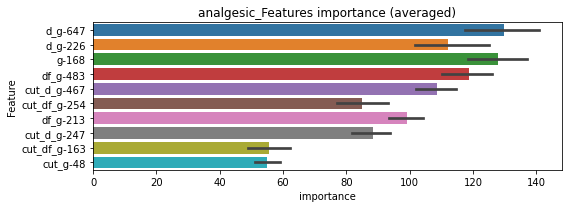

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000220802	valid_1's binary_logloss: 0.00272319
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Early stopping, best iteration is:
[438]	training's binary_logloss: 0.000279144	valid_1's binary_logloss: 0.00542835
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000207551	valid_1's binary_logloss: 0.000217099
Training until validation scores don't improve for 30 rounds


analgesic logloss: 0.0027020160386122083


Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000212259	valid_1's binary_logloss: 0.00243941


androgen_receptor_agonist, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00327813	valid_1's binary_logloss: 0.0573832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.00162304	valid_1's binary_logloss: 0.0443648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000460384	valid_1's binary_logloss: 0.00276147
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0046775, Threshold: 0.0068856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0068856, conf_0:0.00482, conf_1:0.00895
Num_p_label: 0.0, Expected: 8.0, Adj_threshold_1: 0.0368856


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000963448	valid_1's binary_logloss: 0.0414705


threshold: 0.0368856, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000708713	valid_1's binary_logloss: 0.0384221
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.00198069	valid_1's binary_logloss: 0.0424365
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000643462	valid_1's binary_logloss: 0.0232154
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0106473, Threshold: 0.0368856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3793


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000525711	valid_1's binary_logloss: 0.0144442


p_label_rate: 0.0000000 Vs.target_rate: 0.00202
Num_p_label: 0.0, Expected: 8.0, Threshold: 0.0368856, conf_0:0.02951, conf_1:0.04426
threshold: 0.0368856, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000744283	valid_1's binary_logloss: 0.032761
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000467204	valid_1's binary_logloss: 0.0365884
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000735306	valid_1's binary_logloss: 0.0111304
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0087262, Threshold: 0.0368856, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000476779	valid_1's binary_logloss: 0.0219958


Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0000000 Vs.target_rate: 0.00202
Num_p_label: 0.0, Expected: 8.0, Threshold: 0.0368856, conf_0:0.03320, conf_1:0.04057
threshold: 0.0368856, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 647.0/3787, y_label_rate: 0.1708476


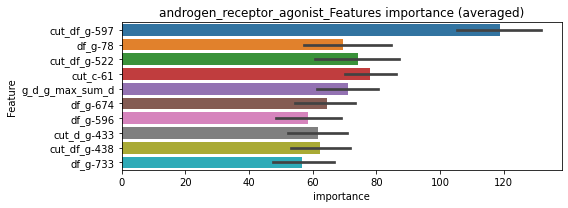

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 androgen_receptor_agonist=================================


Early stopping, best iteration is:
[336]	training's binary_logloss: 0.00087924	valid_1's binary_logloss: 0.0258428
Training until validation scores don't improve for 30 rounds


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 androgen_receptor_agonist=================================


Early stopping, best iteration is:
[315]	training's binary_logloss: 0.000955022	valid_1's binary_logloss: 0.0295398
Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 androgen_receptor_agonist=================================


Early stopping, best iteration is:
[287]	training's binary_logloss: 0.0010797	valid_1's binary_logloss: 0.0234266
Training until validation scores don't improve for 30 rounds


androgen_receptor_agonist logloss: 0.023936656155585847


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000825319	valid_1's binary_logloss: 0.0169301


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3274


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0301686	valid_1's binary_logloss: 0.0979207
Early stopping, best iteration is:
[1499]	training's binary_logloss: 0.0200071	valid_1's binary_logloss: 0.0932844
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.031526	valid_1's binary_logloss: 0.0836827
[2000]	training's binary_logloss: 0.0152899	valid_1's binary_logloss: 0.0746799
Early stopping, best iteration is:
[2177]	training's binary_logloss: 0.0139738	valid_1's binary_logloss: 0.0740199
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0325173	valid_1's binary_logloss: 0.0682033
[2000]	training's binary_logloss: 0.0157841	valid_1's binary_logloss: 0.0584397
Early stopping, best iteration is:
[2813]	training's binary_logloss: 0.0110363	valid_1's binary_logloss: 0.0553626
Training until validation scores don't improve for 30 rounds
[1000]	train

1 / 3, AUC score:0.994, PR-AUC:0.985
y_Threshold: 0.0352958, Threshold: 0.0827339, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 636/3760
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0827339, conf_0:0.05791, conf_1:0.10755
Num_p_label: 18.0, Expected: 14.9, Adj_threshold_1: 0.1127339
threshold: 0.1127339, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 636.0/3760, y_label_rate: 0.1691489
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0261158	valid_1's binary_logloss: 0.0742285
[2000]	training's binary_logloss: 0.0129676	valid_1's binary_logloss: 0.0658184
Early stopping, best iteration is:
[2104]	training's binary_logloss: 0.0123113	valid_1's binary_logloss: 0.0654076
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0274947	valid_1's binary_logloss: 0.0591039
[2000]	training's binary_logloss: 0.0135756	valid_1's binary_logloss: 0.0484065
[3000]	training's binary_logloss: 0.00892845	valid_1's binary_logloss: 0.0445708
Early stopping, best iteration is:
[3608]	training's binary_logloss: 0.00738185	valid_1's binary_logloss: 0.0432844
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.027331	valid_1's binary_logloss: 0.0612977
[2000]	training's binary_logloss: 0.013479	valid_1's binary_logloss: 0.0527046
[3000]	training's binary_lo

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0509080, Threshold: 0.1127339, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 621.0/3730
p_label_rate: 0.0140633 Vs.target_rate: 0.00374
Num_p_label: 56.0, Expected: 14.9, Threshold: 0.1127339, conf_0:0.09019, conf_1:0.13528
Num_p_label: 37.0, Expected: 14.9, Adj_threshold_1: 0.1427339
Num_p_label: 23.0, Expected: 14.9, Adj_threshold_2: 0.1727339
Num_p_label: 17.0, Expected: 14.9, Adj_threshold_3: 0.2027339
threshold: 0.2027339, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 621.0/3730, y_label_rate: 0.1664879
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0230931	valid_1's binary_logloss: 0.0660285
[2000]	training's binary_logloss: 0.0115126	valid_1's binary_logloss: 0.0571252
Early stopping, best iteration is:
[2889]	training's binary_logloss: 0.00793174	valid_1's binary_logloss: 0.0539666
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0240041	valid_1's binary_logloss: 0.0526911
[2000]	training's binary_logloss: 0.0118995	valid_1's binary_logloss: 0.0445447
Early stopping, best iteration is:
[2900]	training's binary_logloss: 0.00814697	valid_1's binary_logloss: 0.0418775
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239988	valid_1's binary_logloss: 0.0551604
[2000]	training's binary_logloss: 0.0119042	valid_1's binary_logloss: 0.0469824
[3000]	training's binary_logloss: 0.00788472	valid_1's binary_logloss: 0.0442337
Early stopping, best ite

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0487983, Threshold: 0.2027339, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 609.0/3706
p_label_rate: 0.0085384 Vs.target_rate: 0.00374
Num_p_label: 34.0, Expected: 14.9, Threshold: 0.2027339, conf_0:0.18246, conf_1:0.22301
Num_p_label: 24.0, Expected: 14.9, Adj_threshold_1: 0.2327339
Num_p_label: 18.0, Expected: 14.9, Adj_threshold_2: 0.2627339
threshold: 0.2627339, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 609.0/3706, y_label_rate: 0.1643281


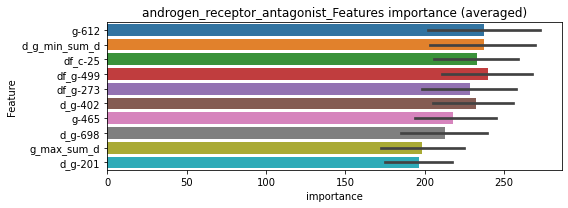

len(train_index) : 2779
len(valid_index) : 927
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0300892	valid_1's binary_logloss: 0.0600146
[2000]	training's binary_logloss: 0.0154713	valid_1's binary_logloss: 0.0472066
[3000]	training's binary_logloss: 0.0103452	valid_1's binary_logloss: 0.0428644
[4000]	training's binary_logloss: 0.00775566	valid_1's binary_logloss: 0.0407386
Early stopping, best iteration is:
[4096]	training's binary_logloss: 0.00757329	valid_1's binary_logloss: 0.0405404


len(train_index) : 2779
len(valid_index) : 927
================================= fold 2/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0307184	valid_1's binary_logloss: 0.05791
[2000]	training's binary_logloss: 0.0157785	valid_1's binary_logloss: 0.0455599
[3000]	training's binary_logloss: 0.0105225	valid_1's binary_logloss: 0.0413204
Early stopping, best iteration is:
[3322]	training's binary_logloss: 0.00948493	valid_1's binary_logloss: 0.040528


len(train_index) : 2780
len(valid_index) : 926
================================= fold 3/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315889	valid_1's binary_logloss: 0.0491171
[2000]	training's binary_logloss: 0.0161662	valid_1's binary_logloss: 0.0362284
[3000]	training's binary_logloss: 0.0107896	valid_1's binary_logloss: 0.0317115
[4000]	training's binary_logloss: 0.00807471	valid_1's binary_logloss: 0.029407
[5000]	training's binary_logloss: 0.00647805	valid_1's binary_logloss: 0.0280835
[6000]	training's binary_logloss: 0.00541773	valid_1's binary_logloss: 0.0271926
Early stopping, best iteration is:
[6531]	training's binary_logloss: 0.00498566	valid_1's binary_logloss: 0.0268388


len(train_index) : 2780
len(valid_index) : 926
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0314916	valid_1's binary_logloss: 0.053121
[2000]	training's binary_logloss: 0.0161933	valid_1's binary_logloss: 0.0411974
[3000]	training's binary_logloss: 0.0108219	valid_1's binary_logloss: 0.0369886
[4000]	training's binary_logloss: 0.00811888	valid_1's binary_logloss: 0.0348222
[5000]	training's binary_logloss: 0.00650751	valid_1's binary_logloss: 0.0337053
Early stopping, best iteration is:
[5962]	training's binary_logloss: 0.00546507	valid_1's binary_logloss: 0.0328604


androgen_receptor_antagonist logloss: 0.035194789402935044
androgen_receptor_antagonist is unpredictable(><)!
anesthetic_-_local, len(trt): 80, len(othr): 3272
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3272


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0286644	valid_1's binary_logloss: 0.0766214
Early stopping, best iteration is:
[1954]	training's binary_logloss: 0.0143658	valid_1's binary_logloss: 0.0690253
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0287001	valid_1's binary_logloss: 0.0748011
Early stopping, best iteration is:
[1911]	training's binary_logloss: 0.0147449	valid_1's binary_logloss: 0.0679923
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0297061	valid_1's binary_logloss: 0.0647292
[2000]	training's binary_logloss: 0.0145246	valid_1's binary_logloss: 0.0554354
[3000]	training's binary_logloss: 0.0094675	valid_1's binary_logloss: 0.0518576
[4000]	training's binary_logloss: 0.00702409	valid_1's binary_logloss: 0.0502094
Early stopping, best iteration is:
[4174]	training's binary_logloss: 0.00671862	valid_1's binary_logloss: 

1 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0330930, Threshold: 0.0492618, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 642/3770
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0492618, conf_0:0.03448, conf_1:0.06404
Num_p_label: 4.0, Expected: 13.4, Adj_threshold_1: 0.0792618
threshold: 0.0792618, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 642.0/3770, y_label_rate: 0.1702918
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0258733	valid_1's binary_logloss: 0.0697103
[2000]	training's binary_logloss: 0.0126522	valid_1's binary_logloss: 0.0623406
Early stopping, best iteration is:
[2566]	training's binary_logloss: 0.0097734	valid_1's binary_logloss: 0.0607512
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0243811	valid_1's binary_logloss: 0.0789919
Early stopping, best iteration is:
[1742]	training's binary_logloss: 0.0139338	valid_1's binary_logloss: 0.0736516
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271422	valid_1's binary_logloss: 0.0451975
[2000]	training's binary_logloss: 0.0134087	valid_1's binary_logloss: 0.0355151
[3000]	training's binary_logloss: 0.00882303	valid_1's binary_logloss: 0.0319608
[4000]	training's binary_logloss: 0.00658168	valid_1's binary_logloss: 0.0301813
Early stopping, best iter

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0559097, Threshold: 0.0792618, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 630.0/3746
p_label_rate: 0.0025113 Vs.target_rate: 0.00336
Num_p_label: 10.0, Expected: 13.4, Threshold: 0.0792618, conf_0:0.06341, conf_1:0.09511
threshold: 0.0792618, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 630.0/3746, y_label_rate: 0.1681794
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.022709	valid_1's binary_logloss: 0.0601399
[2000]	training's binary_logloss: 0.0112959	valid_1's binary_logloss: 0.0511977
Early stopping, best iteration is:
[2794]	training's binary_logloss: 0.00804861	valid_1's binary_logloss: 0.0484018
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0235284	valid_1's binary_logloss: 0.0512232
[2000]	training's binary_logloss: 0.0116929	valid_1's binary_logloss: 0.0442431
Early stopping, best iteration is:
[2710]	training's binary_logloss: 0.00858366	valid_1's binary_logloss: 0.0425841
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0235723	valid_1's binary_logloss: 0.0487161
[2000]	training's binary_logloss: 0.0117299	valid_1's binary_logloss: 0.0396776
[3000]	training's binary_logloss: 0.00778271	valid_1's binary_logloss: 0.0367233
[4000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0568880, Threshold: 0.0792618, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 621.0/3728
p_label_rate: 0.0055249 Vs.target_rate: 0.00336
Num_p_label: 22.0, Expected: 13.4, Threshold: 0.0792618, conf_0:0.07134, conf_1:0.08719
Num_p_label: 6.0, Expected: 13.4, Adj_threshold_1: 0.1092618
threshold: 0.1092618, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 621.0/3728, y_label_rate: 0.1665773


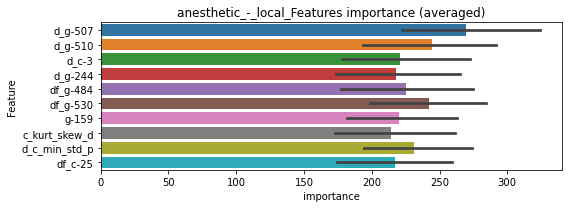

len(train_index) : 2796
len(valid_index) : 932
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0295106	valid_1's binary_logloss: 0.0619572
[2000]	training's binary_logloss: 0.0152387	valid_1's binary_logloss: 0.0519047
[3000]	training's binary_logloss: 0.010199	valid_1's binary_logloss: 0.0485532
Early stopping, best iteration is:
[3329]	training's binary_logloss: 0.00919144	valid_1's binary_logloss: 0.0479604


len(train_index) : 2796
len(valid_index) : 932
================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0307338	valid_1's binary_logloss: 0.0547754
[2000]	training's binary_logloss: 0.0159333	valid_1's binary_logloss: 0.0422317
[3000]	training's binary_logloss: 0.0106569	valid_1's binary_logloss: 0.0377267
[4000]	training's binary_logloss: 0.0079945	valid_1's binary_logloss: 0.0356127
[5000]	training's binary_logloss: 0.00641036	valid_1's binary_logloss: 0.0343858
Early stopping, best iteration is:
[5769]	training's binary_logloss: 0.0055543	valid_1's binary_logloss: 0.0336452


len(train_index) : 2796
len(valid_index) : 932
================================= fold 3/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.030533	valid_1's binary_logloss: 0.057075
[2000]	training's binary_logloss: 0.0157608	valid_1's binary_logloss: 0.0459623
[3000]	training's binary_logloss: 0.0105578	valid_1's binary_logloss: 0.042139
[4000]	training's binary_logloss: 0.00792136	valid_1's binary_logloss: 0.0401227
[5000]	training's binary_logloss: 0.00635091	valid_1's binary_logloss: 0.0390525
Early stopping, best iteration is:
[5368]	training's binary_logloss: 0.00591219	valid_1's binary_logloss: 0.0386077


len(train_index) : 2796
len(valid_index) : 932
================================= fold 4/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317032	valid_1's binary_logloss: 0.0473423
[2000]	training's binary_logloss: 0.0164102	valid_1's binary_logloss: 0.0359256
[3000]	training's binary_logloss: 0.0109656	valid_1's binary_logloss: 0.0320346
[4000]	training's binary_logloss: 0.0082177	valid_1's binary_logloss: 0.0300443
Early stopping, best iteration is:
[4824]	training's binary_logloss: 0.00682745	valid_1's binary_logloss: 0.0290579


anesthetic_-_local logloss: 0.03731779220311991
anesthetic_-_local is unpredictable(><)!
angiogenesis_inhibitor, len(trt): 36, len(othr): 3280
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3280


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00129072	valid_1's binary_logloss: 0.039823
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000383458	valid_1's binary_logloss: 0.0161105
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000468187	valid_1's binary_logloss: 0.00628102
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027241, Threshold: 0.0090103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0090103, conf_0:0.00631, conf_1:0.01171
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_1: 0.0390103


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000429376	valid_1's binary_logloss: 0.0150741


threshold: 0.0390103, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.000621296	valid_1's binary_logloss: 0.0390783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000384419	valid_1's binary_logloss: 0.0137284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00041342	valid_1's binary_logloss: 0.00434219
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0150041, Threshold: 0.0390103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0118031 Vs.target_rate: 0.00151


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000379587	valid_1's binary_logloss: 0.0154009


Num_p_label: 47.0, Expected: 6.0, Threshold: 0.0390103, conf_0:0.03121, conf_1:0.04681
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_1: 0.0690103
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.0990103
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.1290103
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_4: 0.1590103
threshold: 0.1590103, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00171197	valid_1's binary_logloss: 0.0185646
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000466926	valid_1's binary_logloss: 0.0148278
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000364526	valid_1's binary_logloss: 0.00834532
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0254012, Threshold: 0.1590103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0047715 Vs.target_rate: 0.00151
Num_p_label: 19.0, Expected: 6.0, Threshold: 0.1590103, conf_0:0.14311, conf_1:0.17491
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.1890103
threshold: 0.1890103, positive_p_label: 15.0/3982, p_label_rate: 0.0037670


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000376798	valid_1's binary_logloss: 0.0155175


positive_y_label: 649.0/3790, y_label_rate: 0.1712401


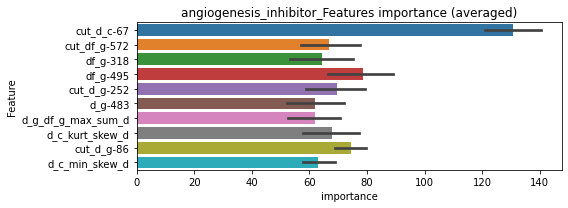

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 angiogenesis_inhibitor=================================


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000519705	valid_1's binary_logloss: 0.00822599
Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 angiogenesis_inhibitor=================================


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000423369	valid_1's binary_logloss: 0.0120113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000390713	valid_1's binary_logloss: 0.00800546


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


angiogenesis_inhibitor logloss: 0.009537122693351822


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000521781	valid_1's binary_logloss: 0.00990449


angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000439489	valid_1's binary_logloss: 0.0259457
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000407841	valid_1's binary_logloss: 0.0256806
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000458772	valid_1's binary_logloss: 0.00529557
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017565, Threshold: 0.0050485, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0050485, conf_0:0.00353, conf_1:0.00656
Num_p_label: 0.0, Expected: 6.2, Adj_threshold_1: 0.0350485
threshold: 0.0350485, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000557191	valid_1's binary_logloss: 0.0221567


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000428577	valid_1's binary_logloss: 0.0239009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000422054	valid_1's binary_logloss: 0.0213176
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000436296	valid_1's binary_logloss: 0.00554668
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0080139, Threshold: 0.0350485, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00155
Num_p_label: 5.0, Expected: 6.2, Threshold: 0.0350485, conf_0:0.02804, conf_1:0.04206
threshold: 0.0350485, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000729737	valid_1's binary_logloss: 0.0203304


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000428577	valid_1's binary_logloss: 0.0239009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000422054	valid_1's binary_logloss: 0.0213176
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000436296	valid_1's binary_logloss: 0.00554668
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000729737	valid_1's binary_logloss: 0.0203304


y_Threshold: 0.0080139, Threshold: 0.0350485, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00155
Num_p_label: 5.0, Expected: 6.2, Threshold: 0.0350485, conf_0:0.03154, conf_1:0.03855
threshold: 0.0350485, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


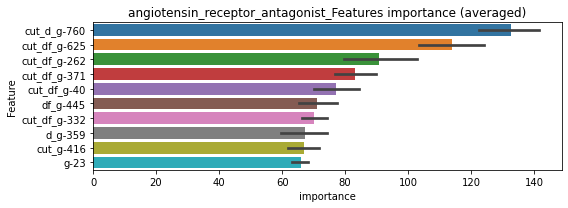

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Early stopping, best iteration is:
[333]	training's binary_logloss: 0.000755753	valid_1's binary_logloss: 0.0218464
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000464467	valid_1's binary_logloss: 0.0186756
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.00041283	valid_1's binary_logloss: 0.00503558


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


angiotensin_receptor_antagonist logloss: 0.01666910312796949


Early stopping, best iteration is:
[279]	training's binary_logloss: 0.000929217	valid_1's binary_logloss: 0.0211018


anti-inflammatory, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0275737	valid_1's binary_logloss: 0.075199
[2000]	training's binary_logloss: 0.0134773	valid_1's binary_logloss: 0.0658967
Early stopping, best iteration is:
[2099]	training's binary_logloss: 0.0128226	valid_1's binary_logloss: 0.0654921
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0293706	valid_1's binary_logloss: 0.0597106
[2000]	training's binary_logloss: 0.014239	valid_1's binary_logloss: 0.048208
[3000]	training's binary_logloss: 0.00922211	valid_1's binary_logloss: 0.0438736
Early stopping, best iteration is:
[3783]	training's binary_logloss: 0.00724004	valid_1's binary_logloss: 0.0419804
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.028139	valid_1's binary_logloss: 0.0656717
[2000]	training's binary_logloss: 0.0137444	valid_1's binary_logloss: 0.0566988
Early stopping, best iteratio

1 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0260081, Threshold: 0.2054428, pos_neg_ratio: 0.8000000
Remove_noisy_data: 149 → Positive_corect_labels: 646/3781
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.2054428, conf_0:0.14381, conf_1:0.26708
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_1: 0.2354428
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_2: 0.2654428
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_3: 0.2954428
threshold: 0.2954428, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 646.0/3781, y_label_rate: 0.1708543
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248621	valid_1's binary_logloss: 0.0742557
[2000]	training's binary_logloss: 0.0121919	valid_1's binary_logloss: 0.0655221
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.0106426	valid_1's binary_logloss: 0.0643269
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0255074	valid_1's binary_logloss: 0.0671609
[2000]	training's binary_logloss: 0.0124808	valid_1's binary_logloss: 0.0571393
[3000]	training's binary_logloss: 0.00816082	valid_1's binary_logloss: 0.0538777
Early stopping, best iteration is:
[3327]	training's binary_logloss: 0.00733243	valid_1's binary_logloss: 0.0531442
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0262084	valid_1's binary_logloss: 0.0522747
[2000]	training's binary_logloss: 0.0128125	valid_1's binary_logloss: 0.0426639
[3000]	training's binary_

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0479372, Threshold: 0.2954428, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 633.0/3755
p_label_rate: 0.0195881 Vs.target_rate: 0.00307
Num_p_label: 78.0, Expected: 12.2, Threshold: 0.2954428, conf_0:0.23635, conf_1:0.35453
Num_p_label: 74.0, Expected: 12.2, Adj_threshold_1: 0.3254428
Num_p_label: 63.0, Expected: 12.2, Adj_threshold_2: 0.3554428
Num_p_label: 57.0, Expected: 12.2, Adj_threshold_3: 0.3854428
Num_p_label: 52.0, Expected: 12.2, Adj_threshold_4: 0.4154428
Num_p_label: 47.0, Expected: 12.2, Adj_threshold_5: 0.4454428
Num_p_label: 41.0, Expected: 12.2, Adj_threshold_6: 0.4754428
Num_p_label: 32.0, Expected: 12.2, Adj_threshold_7: 0.5054428
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_8: 0.5354428
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_9: 0.5654428
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_10: 0.5954428
threshold: 0.5954428, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
p

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.022725	valid_1's binary_logloss: 0.0557116
[2000]	training's binary_logloss: 0.0112255	valid_1's binary_logloss: 0.0479299
Early stopping, best iteration is:
[2358]	training's binary_logloss: 0.00948504	valid_1's binary_logloss: 0.0465341
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0228436	valid_1's binary_logloss: 0.0548098
[2000]	training's binary_logloss: 0.0113112	valid_1's binary_logloss: 0.0454428
[3000]	training's binary_logloss: 0.00743475	valid_1's binary_logloss: 0.0420116
Early stopping, best iteration is:
[3625]	training's binary_logloss: 0.00613757	valid_1's binary_logloss: 0.0409895
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0233724	valid_1's binary_logloss: 0.0483171
[2000]	training's binary_logloss: 0.0115231	valid_1's binary_logloss: 0.0398521
[3000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0437593, Threshold: 0.5954428, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 626.0/3741
p_label_rate: 0.0087896 Vs.target_rate: 0.00307
Num_p_label: 35.0, Expected: 12.2, Threshold: 0.5954428, conf_0:0.53590, conf_1:0.65499
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_1: 0.6254428
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_2: 0.6554428
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_3: 0.6854428
threshold: 0.6854428, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 626.0/3741, y_label_rate: 0.1673349


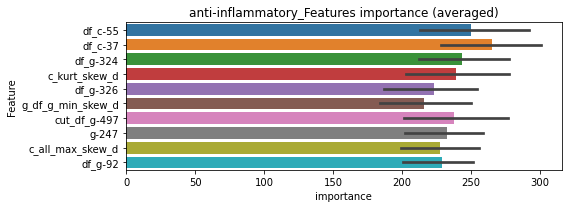

len(train_index) : 2805
len(valid_index) : 936
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0300757	valid_1's binary_logloss: 0.0631247
[2000]	training's binary_logloss: 0.0153538	valid_1's binary_logloss: 0.051305
[3000]	training's binary_logloss: 0.0102257	valid_1's binary_logloss: 0.0470855
[4000]	training's binary_logloss: 0.00762937	valid_1's binary_logloss: 0.0450324
Early stopping, best iteration is:
[4048]	training's binary_logloss: 0.00753641	valid_1's binary_logloss: 0.0449286


len(train_index) : 2806
len(valid_index) : 935
================================= fold 2/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319374	valid_1's binary_logloss: 0.0500072
[2000]	training's binary_logloss: 0.0163386	valid_1's binary_logloss: 0.0374568
[3000]	training's binary_logloss: 0.010831	valid_1's binary_logloss: 0.0329955
[4000]	training's binary_logloss: 0.00807914	valid_1's binary_logloss: 0.0310412
Early stopping, best iteration is:
[4554]	training's binary_logloss: 0.00709464	valid_1's binary_logloss: 0.0303441


len(train_index) : 2806
len(valid_index) : 935
================================= fold 3/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317963	valid_1's binary_logloss: 0.0491364
[2000]	training's binary_logloss: 0.0161694	valid_1's binary_logloss: 0.0373125
[3000]	training's binary_logloss: 0.0107321	valid_1's binary_logloss: 0.033057
[4000]	training's binary_logloss: 0.00801271	valid_1's binary_logloss: 0.0308443
[5000]	training's binary_logloss: 0.00640916	valid_1's binary_logloss: 0.0296341
Early stopping, best iteration is:
[5388]	training's binary_logloss: 0.00594983	valid_1's binary_logloss: 0.0291886


len(train_index) : 2806
len(valid_index) : 935
================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0310292	valid_1's binary_logloss: 0.0566051
[2000]	training's binary_logloss: 0.0158279	valid_1's binary_logloss: 0.0446456
[3000]	training's binary_logloss: 0.0105115	valid_1's binary_logloss: 0.0405767
[4000]	training's binary_logloss: 0.00784056	valid_1's binary_logloss: 0.03874
Early stopping, best iteration is:
[4302]	training's binary_logloss: 0.00728504	valid_1's binary_logloss: 0.0383878


anti-inflammatory logloss: 0.035714728176231926
anti-inflammatory is unpredictable(><)!
antiarrhythmic, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3283


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00034061	valid_1's binary_logloss: 0.0229311
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000363634	valid_1's binary_logloss: 0.0103205
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000464116	valid_1's binary_logloss: 0.00644366
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012090, Threshold: 0.0025204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0025204, conf_0:0.00176, conf_1:0.00328
Num_p_label: 1.0, Expected: 4.0, Adj_threshold_1: 0.0325204


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000348062	valid_1's binary_logloss: 0.0115536


threshold: 0.0325204, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000335947	valid_1's binary_logloss: 0.0233603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000467494	valid_1's binary_logloss: 0.0100422
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.000451055	valid_1's binary_logloss: 0.00632327
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0044425, Threshold: 0.0325204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, Expected: 4.0, Threshold: 0.0325204, conf_0:0.02602, conf_1:0.03902
threshold: 0.0325204, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000444635	valid_1's binary_logloss: 0.0105396


positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.000444593	valid_1's binary_logloss: 0.0248528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000361125	valid_1's binary_logloss: 0.00905289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000326434	valid_1's binary_logloss: 0.0047594
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0054427, Threshold: 0.0325204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0010045 Vs.target_rate: 0.00101
Num_p_label: 4.0, Expected: 4.0, Threshold: 0.0325204, conf_0:0.02927, conf_1:0.03577
threshold: 0.0325204, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000320696	valid_1's binary_logloss: 0.0116881


positive_y_label: 653.0/3801, y_label_rate: 0.1717969


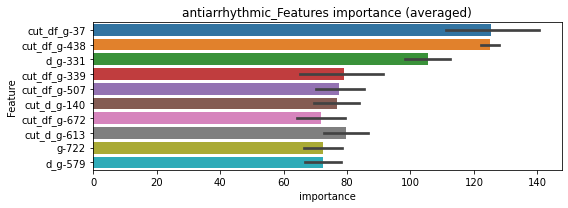

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 antiarrhythmic=================================


Early stopping, best iteration is:
[218]	training's binary_logloss: 0.000855869	valid_1's binary_logloss: 0.0146707
Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 antiarrhythmic=================================


Early stopping, best iteration is:
[200]	training's binary_logloss: 0.000985645	valid_1's binary_logloss: 0.017539
Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 antiarrhythmic=================================


Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000422596	valid_1's binary_logloss: 0.00758899
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000316549	valid_1's binary_logloss: 0.00127035


antiarrhythmic logloss: 0.010268410918442706
antibiotic, len(trt): 43, len(othr): 3284
target_rate: 0.0018057 → Adj_target_rate: 0.0020542


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.0005469	valid_1's binary_logloss: 0.0413538
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000493	valid_1's binary_logloss: 0.0158371
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000439073	valid_1's binary_logloss: 0.00191904
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021215, Threshold: 0.0288408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, Expected: 7.2, Threshold: 0.0288408, conf_0:0.02019, conf_1:0.03749
Num_p_label: 21.0, Expected: 7.2, Adj_threshold_1: 0.0588408
Num_p_label: 13.0, Expected: 7.2, Adj_threshold_2: 0.0888408


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000560351	valid_1's binary_logloss: 0.0335184


threshold: 0.0888408, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000551052	valid_1's binary_logloss: 0.0408688
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000551859	valid_1's binary_logloss: 0.0135741
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00041939	valid_1's binary_logloss: 0.00172281
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0092693, Threshold: 0.0888408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000427266	valid_1's binary_logloss: 0.0306466


p_label_rate: 0.0080362 Vs.target_rate: 0.00181
Num_p_label: 32.0, Expected: 7.2, Threshold: 0.0888408, conf_0:0.07107, conf_1:0.10661
Num_p_label: 22.0, Expected: 7.2, Adj_threshold_1: 0.1188408
Num_p_label: 19.0, Expected: 7.2, Adj_threshold_2: 0.1488408
Num_p_label: 15.0, Expected: 7.2, Adj_threshold_3: 0.1788408
threshold: 0.1788408, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000455982	valid_1's binary_logloss: 0.0233232
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000530451	valid_1's binary_logloss: 0.014175
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000843901	valid_1's binary_logloss: 0.0187666
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158106, Threshold: 0.1788408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3804


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000452846	valid_1's binary_logloss: 0.0148252


p_label_rate: 0.0032647 Vs.target_rate: 0.00181
Num_p_label: 13.0, Expected: 7.2, Threshold: 0.1788408, conf_0:0.16096, conf_1:0.19672
threshold: 0.1788408, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


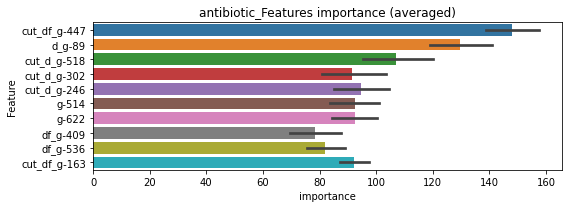

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 antibiotic=================================


Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000948082	valid_1's binary_logloss: 0.0196478
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 antibiotic=================================


Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000585558	valid_1's binary_logloss: 0.0142252
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 antibiotic=================================


Early stopping, best iteration is:
[289]	training's binary_logloss: 0.000950133	valid_1's binary_logloss: 0.0196739
Training until validation scores don't improve for 30 rounds


antibiotic logloss: 0.016934842333165875


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.00056137	valid_1's binary_logloss: 0.0141924


anticonvulsant, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000264351	valid_1's binary_logloss: 0.00384709
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000288111	valid_1's binary_logloss: 0.0110349
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00037987	valid_1's binary_logloss: 0.00430077
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008192, Threshold: 0.0022160, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0022160, conf_0:0.00155, conf_1:0.00288
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0322160
threshold: 0.0322160, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000285752	valid_1's binary_logloss: 0.00503051


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000267934	valid_1's binary_logloss: 0.00351236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00026849	valid_1's binary_logloss: 0.00946465
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000348101	valid_1's binary_logloss: 0.00377649
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0091723, Threshold: 0.0322160, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, Expected: 3.0, Threshold: 0.0322160, conf_0:0.02577, conf_1:0.03866
threshold: 0.0322160, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000276668	valid_1's binary_logloss: 0.00461332


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000267934	valid_1's binary_logloss: 0.00351236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00026849	valid_1's binary_logloss: 0.00946465
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000348101	valid_1's binary_logloss: 0.00377649
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0091723, Threshold: 0.0322160, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, Expected: 3.0, Threshold: 0.0322160, conf_0:0.02899, conf_1:0.03544
threshold: 0.0322160, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000276668	valid_1's binary_logloss: 0.00461332


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


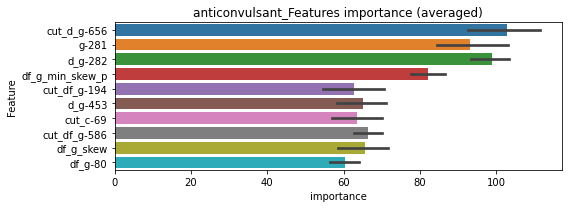

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000304791	valid_1's binary_logloss: 0.00350646
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000290746	valid_1's binary_logloss: 0.0071217
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 anticonvulsant=================================


Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00053266	valid_1's binary_logloss: 0.00544153
Training until validation scores don't improve for 30 rounds


anticonvulsant logloss: 0.004892731007329557


Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000264495	valid_1's binary_logloss: 0.00349989


antifungal, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000335566	valid_1's binary_logloss: 0.0137647
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00058148	valid_1's binary_logloss: 0.00938468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000515531	valid_1's binary_logloss: 0.00639378
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014893, Threshold: 0.0034895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0034895, conf_0:0.00244, conf_1:0.00454
Num_p_label: 0.0, Expected: 4.3, Adj_threshold_1: 0.0334895


Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000353781	valid_1's binary_logloss: 0.0132431


threshold: 0.0334895, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00031755	valid_1's binary_logloss: 0.0142393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000523027	valid_1's binary_logloss: 0.00923181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000511635	valid_1's binary_logloss: 0.00668788
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0066370, Threshold: 0.0334895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0000000 Vs.target_rate: 0.00109
Num_p_label: 0.0, Expected: 4.3, Threshold: 0.0334895, conf_0:0.02679, conf_1:0.04019


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000363506	valid_1's binary_logloss: 0.0116014


threshold: 0.0334895, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00034563	valid_1's binary_logloss: 0.0171127
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000312627	valid_1's binary_logloss: 0.00363671
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000313001	valid_1's binary_logloss: 0.00548723
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0095830, Threshold: 0.0334895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0000000 Vs.target_rate: 0.00109
Num_p_label: 0.0, Expected: 4.3, Threshold: 0.0334895, conf_0:0.03014, conf_1:0.03684


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000347716	valid_1's binary_logloss: 0.013791


threshold: 0.0334895, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


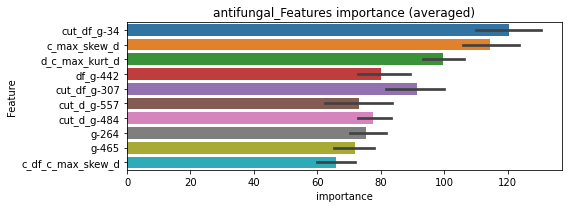

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 antifungal=================================


Early stopping, best iteration is:
[245]	training's binary_logloss: 0.000797304	valid_1's binary_logloss: 0.0198373
Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951


Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000334817	valid_1's binary_logloss: 0.00277595


================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.00032182	valid_1's binary_logloss: 0.00393571


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds


antifungal logloss: 0.009462321845709719


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00036018	valid_1's binary_logloss: 0.0112874


antihistamine, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000283645	valid_1's binary_logloss: 0.00149432
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.000971491	valid_1's binary_logloss: 0.018644
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000295789	valid_1's binary_logloss: 0.00203132
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015720, Threshold: 0.0311117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0311117, conf_0:0.02178, conf_1:0.04045
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_1: 0.0611117
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.0911117
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_3: 0.1211117
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_4: 0.1511117
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.1811117
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_6: 0.2111117


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000292715	valid_1's binary_logloss: 0.0109721


Num_p_label: 7.0, Expected: 3.0, Adj_threshold_7: 0.2411117
threshold: 0.2411117, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000273047	valid_1's binary_logloss: 0.00136362
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.00106736	valid_1's binary_logloss: 0.0177396
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000275262	valid_1's binary_logloss: 0.00131997
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0098009, Threshold: 0.2411117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0110497 Vs.target_rate: 0.00076
Num_p_label: 44.0, Expected: 3.0, Threshold: 0.2411117, conf_0:0.19289, conf_1:0.28933
Num_p_label: 44.0, Expected: 3.0, Adj_threshold_1: 0.2711117
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_2: 0.3011117
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_3: 0.3311117
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_4: 0.3611117
Num_p_label: 38.0, Expected: 3.0, Adj_threshold_5: 0.3911117
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_6: 0.4211117
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_7: 0.4511117


Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000295922	valid_1's binary_logloss: 0.0104748


Num_p_label: 33.0, Expected: 3.0, Adj_threshold_8: 0.4811117
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_9: 0.5111117
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_10: 0.5411117
threshold: 0.5411117, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 655.0/3809, y_label_rate: 0.1719611
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000285695	valid_1's binary_logloss: 0.00971406
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000342939	valid_1's binary_logloss: 0.00208776
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000264525	valid_1's binary_logloss: 0.00337389
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0198386, Threshold: 0.5411117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0085384 Vs.target_rate: 0.00076
Num_p_label: 34.0, Expected: 3.0, Threshold: 0.5411117, conf_0:0.48700, conf_1:0.59522
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_1: 0.5711117
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_2: 0.6011117
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_3: 0.6311117
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_4: 0.6611117
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_5: 0.6911117
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_6: 0.7211117
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_7: 0.7511117
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_8: 0.7811117
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_9: 0.8111117


Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000307718	valid_1's binary_logloss: 0.00373032


Num_p_label: 14.0, Expected: 3.0, Adj_threshold_10: 0.8411117
threshold: 0.8411117, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3809, y_label_rate: 0.1719611


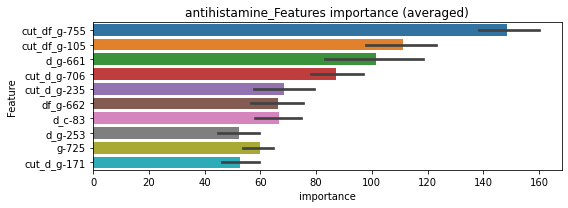

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 antihistamine=================================


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000281314	valid_1's binary_logloss: 0.00711537
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 antihistamine=================================


Early stopping, best iteration is:
[359]	training's binary_logloss: 0.000422346	valid_1's binary_logloss: 0.00302909
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 antihistamine=================================


Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000277215	valid_1's binary_logloss: 0.0022843
Training until validation scores don't improve for 30 rounds


antihistamine logloss: 0.003938662838231686


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000302511	valid_1's binary_logloss: 0.00332255


antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:518
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.000337851	valid_1's binary_logloss: 0.00365711
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[179]	training's binary_logloss: 0.0031231	valid_1's binary_logloss: 0.0273474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000276514	valid_1's binary_logloss: 0.000581964
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033625, Threshold: 0.0067865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0067865, conf_0:0.00475, conf_1:0.00882
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_1: 0.0367865
threshold: 0.0367865, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000362147	valid_1's binary_logloss: 0.00578065


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000281298	valid_1's binary_logloss: 0.00224214
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[179]	training's binary_logloss: 0.00310596	valid_1's binary_logloss: 0.0253324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00026218	valid_1's binary_logloss: 0.000433836
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0293035, Threshold: 0.0367865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3806
p_label_rate: 0.0097941 Vs.target_rate: 0.00076
Num_p_label: 39.0, Expected: 3.0, Threshold: 0.0367865, conf_0:0.02943, conf_1:0.04414
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_1: 0.0667865
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0967865
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1267865
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.1567865


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000358863	valid_1's binary_logloss: 0.004767


threshold: 0.1567865, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3806, y_label_rate: 0.1718339
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000270559	valid_1's binary_logloss: 0.011758
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000250336	valid_1's binary_logloss: 0.000455476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000250418	valid_1's binary_logloss: 0.00160979
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0098921, Threshold: 0.1567865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3804
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.1567865, conf_0:0.14111, conf_1:0.17247
threshold: 0.1567865, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000317848	valid_1's binary_logloss: 0.00491143


positive_y_label: 653.0/3804, y_label_rate: 0.1716614


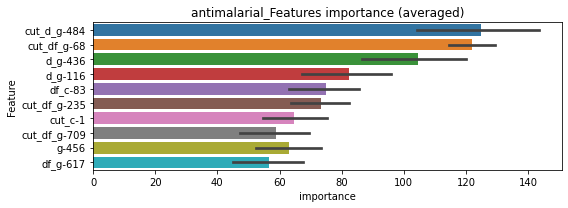

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 antimalarial=================================


Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000274193	valid_1's binary_logloss: 0.00411477
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 antimalarial=================================


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000322314	valid_1's binary_logloss: 0.00604138
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 antimalarial=================================


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000266392	valid_1's binary_logloss: 0.00353756
Training until validation scores don't improve for 30 rounds


antimalarial logloss: 0.0035121762978395045


Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000259701	valid_1's binary_logloss: 0.000354993


antioxidant, len(trt): 73, len(othr): 3282
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3282


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0256316	valid_1's binary_logloss: 0.0798588
[2000]	training's binary_logloss: 0.0125602	valid_1's binary_logloss: 0.0719521
Early stopping, best iteration is:
[2880]	training's binary_logloss: 0.00856106	valid_1's binary_logloss: 0.069435
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0266009	valid_1's binary_logloss: 0.0667793
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.0136144	valid_1's binary_logloss: 0.0581293
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285999	valid_1's binary_logloss: 0.04636
[2000]	training's binary_logloss: 0.0138596	valid_1's binary_logloss: 0.036936
[3000]	training's binary_logloss: 0.00904135	valid_1's binary_logloss: 0.033671
Early stopping, best iteration is:
[3784]	training's binary_logloss: 0.0071017	valid_1's binary_logloss: 0.032

1 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0256396, Threshold: 0.0775114, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 647/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0775114, conf_0:0.05426, conf_1:0.10076
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_1: 0.1075114
Num_p_label: 11.0, Expected: 12.2, Adj_threshold_2: 0.1375114
threshold: 0.1375114, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 647.0/3788, y_label_rate: 0.1708025
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0246037	valid_1's binary_logloss: 0.0606586
[2000]	training's binary_logloss: 0.0120443	valid_1's binary_logloss: 0.0507532
[3000]	training's binary_logloss: 0.00789774	valid_1's binary_logloss: 0.0475422
Early stopping, best iteration is:
[3622]	training's binary_logloss: 0.00651203	valid_1's binary_logloss: 0.0465738
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0240015	valid_1's binary_logloss: 0.0617845
[2000]	training's binary_logloss: 0.0117127	valid_1's binary_logloss: 0.0535833
[3000]	training's binary_logloss: 0.00770871	valid_1's binary_logloss: 0.0507586
Early stopping, best iteration is:
[3264]	training's binary_logloss: 0.00706641	valid_1's binary_logloss: 0.0503353
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0242648	valid_1's binary_logloss: 0.0604078
[2000]	training's binar

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0413275, Threshold: 0.1375114, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 639.0/3772
p_label_rate: 0.0080362 Vs.target_rate: 0.00307
Num_p_label: 32.0, Expected: 12.2, Threshold: 0.1375114, conf_0:0.11001, conf_1:0.16501
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_1: 0.1675114
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_2: 0.1975114
threshold: 0.1975114, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 639.0/3772, y_label_rate: 0.1694062
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.022501	valid_1's binary_logloss: 0.0577738
[2000]	training's binary_logloss: 0.0110887	valid_1's binary_logloss: 0.0499148
Early stopping, best iteration is:
[2713]	training's binary_logloss: 0.00811272	valid_1's binary_logloss: 0.0476141
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0227626	valid_1's binary_logloss: 0.0546484
[2000]	training's binary_logloss: 0.0112156	valid_1's binary_logloss: 0.0459273
[3000]	training's binary_logloss: 0.00740869	valid_1's binary_logloss: 0.0429079
Early stopping, best iteration is:
[3626]	training's binary_logloss: 0.00611013	valid_1's binary_logloss: 0.0419554
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0240741	valid_1's binary_logloss: 0.0415587
[2000]	training's binary_logloss: 0.0118192	valid_1's binary_logloss: 0.0313263
[3000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0404531, Threshold: 0.1975114, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 635.0/3764
p_label_rate: 0.0025113 Vs.target_rate: 0.00307
Num_p_label: 10.0, Expected: 12.2, Threshold: 0.1975114, conf_0:0.17776, conf_1:0.21726
threshold: 0.1975114, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 635.0/3764, y_label_rate: 0.1687035


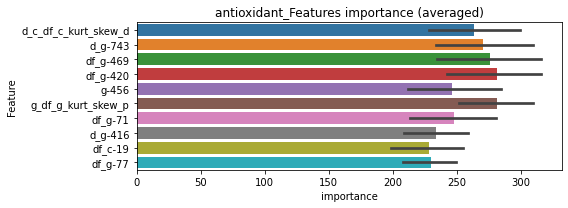

len(train_index) : 2823
len(valid_index) : 941
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0316416	valid_1's binary_logloss: 0.057984
[2000]	training's binary_logloss: 0.0161177	valid_1's binary_logloss: 0.0465206
[3000]	training's binary_logloss: 0.0107308	valid_1's binary_logloss: 0.0425261
[4000]	training's binary_logloss: 0.00802825	valid_1's binary_logloss: 0.0407753
Early stopping, best iteration is:
[4282]	training's binary_logloss: 0.00750168	valid_1's binary_logloss: 0.0403869


len(train_index) : 2823
len(valid_index) : 941
================================= fold 2/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0316963	valid_1's binary_logloss: 0.0551397
[2000]	training's binary_logloss: 0.0161571	valid_1's binary_logloss: 0.0423198
[3000]	training's binary_logloss: 0.0107004	valid_1's binary_logloss: 0.0375884
[4000]	training's binary_logloss: 0.00800285	valid_1's binary_logloss: 0.0351856
[5000]	training's binary_logloss: 0.00641422	valid_1's binary_logloss: 0.0338489
Early stopping, best iteration is:
[5952]	training's binary_logloss: 0.00539158	valid_1's binary_logloss: 0.0328445


len(train_index) : 2823
len(valid_index) : 941
================================= fold 3/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319809	valid_1's binary_logloss: 0.0553121
[2000]	training's binary_logloss: 0.0163547	valid_1's binary_logloss: 0.0417165
[3000]	training's binary_logloss: 0.0108668	valid_1's binary_logloss: 0.0368294
[4000]	training's binary_logloss: 0.00812497	valid_1's binary_logloss: 0.0343418
[5000]	training's binary_logloss: 0.0065094	valid_1's binary_logloss: 0.0328521
[6000]	training's binary_logloss: 0.00542587	valid_1's binary_logloss: 0.0317481
[7000]	training's binary_logloss: 0.00466263	valid_1's binary_logloss: 0.0310849
Early stopping, best iteration is:
[6976]	training's binary_logloss: 0.00467776	valid_1's binary_logloss: 0.0310768


len(train_index) : 2823
len(valid_index) : 941
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315502	valid_1's binary_logloss: 0.0580454
[2000]	training's binary_logloss: 0.0160791	valid_1's binary_logloss: 0.0460604
[3000]	training's binary_logloss: 0.0106861	valid_1's binary_logloss: 0.0421687
[4000]	training's binary_logloss: 0.00799142	valid_1's binary_logloss: 0.0402902
Early stopping, best iteration is:
[4285]	training's binary_logloss: 0.00745664	valid_1's binary_logloss: 0.0398868


antioxidant logloss: 0.03604875732661523
antioxidant is unpredictable(><)!
antiprotozoal, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000552089	valid_1's binary_logloss: 0.0258939
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000629461	valid_1's binary_logloss: 0.0182193
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000389595	valid_1's binary_logloss: 0.00347957
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023915, Threshold: 0.0060267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0060267, conf_0:0.00422, conf_1:0.00783
Num_p_label: 2.0, Expected: 6.0, Adj_threshold_1: 0.0360267
threshold: 0.0360267, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[347]	training's binary_logloss: 0.000979569	valid_1's binary_logloss: 0.0281316


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000531624	valid_1's binary_logloss: 0.0210015
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000392634	valid_1's binary_logloss: 0.015337
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000403643	valid_1's binary_logloss: 0.0031867
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0082217, Threshold: 0.0360267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0015068 Vs.target_rate: 0.00151
Num_p_label: 6.0, Expected: 6.0, Threshold: 0.0360267, conf_0:0.02882, conf_1:0.04323


Early stopping, best iteration is:
[429]	training's binary_logloss: 0.000571946	valid_1's binary_logloss: 0.0297825


threshold: 0.0360267, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000452989	valid_1's binary_logloss: 0.0231966
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000446564	valid_1's binary_logloss: 0.011618
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000451035	valid_1's binary_logloss: 0.0134114
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0119698, Threshold: 0.0360267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0017579 Vs.target_rate: 0.00151
Num_p_label: 7.0, Expected: 6.0, Threshold: 0.0360267, conf_0:0.03242, conf_1:0.03963
threshold: 0.0360267, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000610445	valid_1's binary_logloss: 0.0166165


positive_y_label: 655.0/3806, y_label_rate: 0.1720967


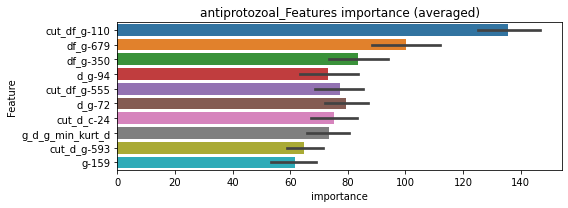

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antiprotozoal=================================


Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000563817	valid_1's binary_logloss: 0.022854
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 antiprotozoal=================================


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000491706	valid_1's binary_logloss: 0.0126353
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 antiprotozoal=================================


Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000578293	valid_1's binary_logloss: 0.0140922
Training until validation scores don't improve for 30 rounds


antiprotozoal logloss: 0.017149855423927947


Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00097617	valid_1's binary_logloss: 0.0190167


antiviral, len(trt): 23, len(othr): 3284
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3284


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.000568641	valid_1's binary_logloss: 0.0177109
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000292757	valid_1's binary_logloss: 0.00780103
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000300812	valid_1's binary_logloss: 0.00109438
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012177, Threshold: 0.0022364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0022364, conf_0:0.00157, conf_1:0.00291
Num_p_label: 0.0, Expected: 3.8, Adj_threshold_1: 0.0322364


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000293831	valid_1's binary_logloss: 0.00646168


threshold: 0.0322364, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000303475	valid_1's binary_logloss: 0.0159847
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000324158	valid_1's binary_logloss: 0.00614318
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000277674	valid_1's binary_logloss: 0.000858763
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113116, Threshold: 0.0322364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0002511 Vs.target_rate: 0.00097
Num_p_label: 1.0, Expected: 3.8, Threshold: 0.0322364, conf_0:0.02579, conf_1:0.03868
threshold: 0.0322364, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000279823	valid_1's binary_logloss: 0.00484157


positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.000325673	valid_1's binary_logloss: 0.012882
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000277494	valid_1's binary_logloss: 0.0013222
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000283821	valid_1's binary_logloss: 0.00310392
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0138236, Threshold: 0.0322364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0002511 Vs.target_rate: 0.00097
Num_p_label: 1.0, Expected: 3.8, Threshold: 0.0322364, conf_0:0.02901, conf_1:0.03546
threshold: 0.0322364, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000290235	valid_1's binary_logloss: 0.00612185


positive_y_label: 655.0/3806, y_label_rate: 0.1720967


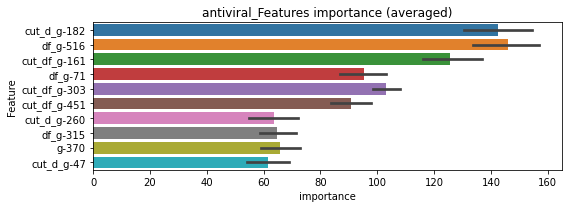

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000319457	valid_1's binary_logloss: 0.00995482
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855


Early stopping, best iteration is:
[785]	training's binary_logloss: 0.00028581	valid_1's binary_logloss: 0.00108179


len(valid_index) : 951
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855


Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000299028	valid_1's binary_logloss: 0.00266063


len(valid_index) : 951
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds


antiviral logloss: 0.004819846406781327


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000390608	valid_1's binary_logloss: 0.00558024


apoptosis_stimulant, len(trt): 49, len(othr): 3284
target_rate: 0.0020576 → Adj_target_rate: 0.0022954


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00250035	valid_1's binary_logloss: 0.0508411
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000690724	valid_1's binary_logloss: 0.0258015
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000446887	valid_1's binary_logloss: 0.00664738
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0042185, Threshold: 0.0231434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, Expected: 8.2, Threshold: 0.0231434, conf_0:0.01620, conf_1:0.03009
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_1: 0.0531434
threshold: 0.0531434, positive_p_label: 20.0/3982, p_label_rate: 0.0050226


Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000983983	valid_1's binary_logloss: 0.0404977


positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.000862026	valid_1's binary_logloss: 0.0422722
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000603424	valid_1's binary_logloss: 0.026066
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000608338	valid_1's binary_logloss: 0.0197838
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0111549, Threshold: 0.0531434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0115520 Vs.target_rate: 0.00206
Num_p_label: 46.0, Expected: 8.2, Threshold: 0.0531434, conf_0:0.04251, conf_1:0.06377
Num_p_label: 37.0, Expected: 8.2, Adj_threshold_1: 0.0831434
Num_p_label: 29.0, Expected: 8.2, Adj_threshold_2: 0.1131434
Num_p_label: 26.0, Expected: 8.2, Adj_threshold_3: 0.1431434
Num_p_label: 21.0, Expected: 8.2, Adj_threshold_4: 0.1731434
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_5: 0.2031434


Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000776045	valid_1's binary_logloss: 0.0344294


threshold: 0.2031434, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000548379	valid_1's binary_logloss: 0.0298175
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00239022	valid_1's binary_logloss: 0.0358341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000558322	valid_1's binary_logloss: 0.0137101
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0227248, Threshold: 0.2031434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0045203 Vs.target_rate: 0.00206
Num_p_label: 18.0, Expected: 8.2, Threshold: 0.2031434, conf_0:0.18283, conf_1:0.22346


Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000774459	valid_1's binary_logloss: 0.0220411


threshold: 0.2031434, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


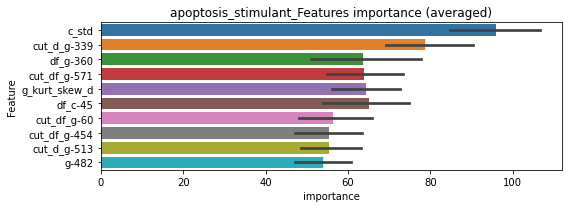

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 apoptosis_stimulant=================================


Early stopping, best iteration is:
[248]	training's binary_logloss: 0.00123735	valid_1's binary_logloss: 0.0240601
Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 apoptosis_stimulant=================================


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.000793556	valid_1's binary_logloss: 0.0294413
Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 apoptosis_stimulant=================================


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000537402	valid_1's binary_logloss: 0.0143245
Training until validation scores don't improve for 30 rounds


apoptosis_stimulant logloss: 0.020839340635727198


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000593024	valid_1's binary_logloss: 0.0155314


aromatase_inhibitor, len(trt): 47, len(othr): 3285
target_rate: 0.0019736 → Adj_target_rate: 0.0022155


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.00147838	valid_1's binary_logloss: 0.0419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.00123502	valid_1's binary_logloss: 0.0424724
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000544948	valid_1's binary_logloss: 0.0122934
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0033404, Threshold: 0.0065612, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00048076	valid_1's binary_logloss: 0.0208994


Remove_noisy_data: 138 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, Expected: 7.9, Threshold: 0.0065612, conf_0:0.00459, conf_1:0.00853
Num_p_label: 1.0, Expected: 7.9, Adj_threshold_1: 0.0365612
threshold: 0.0365612, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000526257	valid_1's binary_logloss: 0.0298913
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000652796	valid_1's binary_logloss: 0.0255851
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000608029	valid_1's binary_logloss: 0.0208842
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0095012, Threshold: 0.0365612, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000475837	valid_1's binary_logloss: 0.0203087


Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0002511 Vs.target_rate: 0.00197
Num_p_label: 1.0, Expected: 7.9, Threshold: 0.0365612, conf_0:0.02925, conf_1:0.04387
threshold: 0.0365612, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000508789	valid_1's binary_logloss: 0.0146564
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.00123725	valid_1's binary_logloss: 0.0349028
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000832431	valid_1's binary_logloss: 0.0107425
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0096537, Threshold: 0.0365612, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000524862	valid_1's binary_logloss: 0.0248038


Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0007534 Vs.target_rate: 0.00197
Num_p_label: 3.0, Expected: 7.9, Threshold: 0.0365612, conf_0:0.03291, conf_1:0.04022
threshold: 0.0365612, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


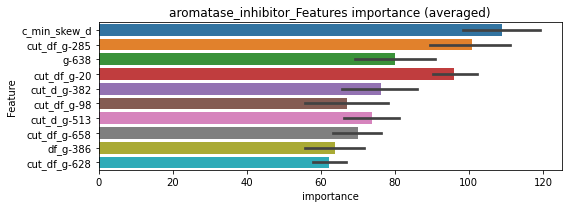

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 950


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000631583	valid_1's binary_logloss: 0.0248219


================================= fold 2/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 aromatase_inhibitor=================================


Early stopping, best iteration is:
[310]	training's binary_logloss: 0.000907693	valid_1's binary_logloss: 0.035048
Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 aromatase_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000641519	valid_1's binary_logloss: 0.00763403
Training until validation scores don't improve for 30 rounds


aromatase_inhibitor logloss: 0.0201525122629348


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000810505	valid_1's binary_logloss: 0.0130854


atm_kinase_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:504
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00013809	valid_1's binary_logloss: 0.000307122
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.00051886	valid_1's binary_logloss: 0.00751035
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000140937	valid_1's binary_logloss: 0.000141042
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005842, Threshold: 0.0009855, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0009855, conf_0:0.00069, conf_1:0.00128
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0309855


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000139131	valid_1's binary_logloss: 0.000756804


threshold: 0.0309855, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00013987	valid_1's binary_logloss: 0.000311434
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.000537666	valid_1's binary_logloss: 0.0074476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000141166	valid_1's binary_logloss: 0.000131519
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0093008, Threshold: 0.0309855, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.0309855, conf_0:0.02479, conf_1:0.03718
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0609855


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000159135	valid_1's binary_logloss: 0.000979548


threshold: 0.0609855, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00013987	valid_1's binary_logloss: 0.000311434
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.000537666	valid_1's binary_logloss: 0.0074476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000141166	valid_1's binary_logloss: 0.000131519
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0093008, Threshold: 0.0609855, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0609855, conf_0:0.05489, conf_1:0.06708
threshold: 0.0609855, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000159135	valid_1's binary_logloss: 0.000979548


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


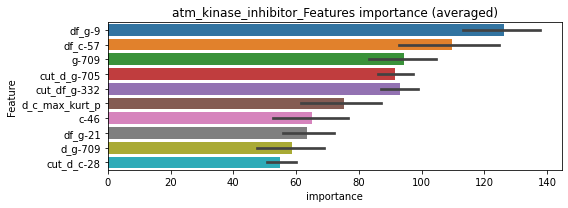

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000139307	valid_1's binary_logloss: 0.000379926


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.000138131	valid_1's binary_logloss: 0.00037869
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[148]	training's binary_logloss: 0.000629924	valid_1's binary_logloss: 0.00668678
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000140371	valid_1's binary_logloss: 0.000128203


len(train_index) : 2859


Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.000139179	valid_1's binary_logloss: 0.000126885


len(valid_index) : 953
================================= fold 4/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000139356	valid_1's binary_logloss: 0.00044746


atm_kinase_inhibitor logloss: 0.0019097666994133886


Early stopping, best iteration is:
[1064]	training's binary_logloss: 0.000138165	valid_1's binary_logloss: 0.000446551


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000159976	valid_1's binary_logloss: 0.00056633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000159065	valid_1's binary_logloss: 0.00683811
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000165185	valid_1's binary_logloss: 0.000194356
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005419, Threshold: 0.0023776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0023776, conf_0:0.00166, conf_1:0.00309
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0323776
threshold: 0.0323776, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000162094	valid_1's binary_logloss: 0.000495439


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000151692	valid_1's binary_logloss: 0.000193414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.000391598	valid_1's binary_logloss: 0.00536655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000152051	valid_1's binary_logloss: 0.000165731
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0138043, Threshold: 0.0323776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0060271 Vs.target_rate: 0.00029
Num_p_label: 24.0, Expected: 1.2, Threshold: 0.0323776, conf_0:0.02590, conf_1:0.03885
Num_p_label: 15.0, Expected: 1.2, Adj_threshold_1: 0.0623776
Num_p_label: 9.0, Expected: 1.2, Adj_threshold_2: 0.0923776
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_3: 0.1223776
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_4: 0.1523776
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_5: 0.1823776


Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000150526	valid_1's binary_logloss: 0.000354476


Num_p_label: 6.0, Expected: 1.2, Adj_threshold_6: 0.2123776
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_7: 0.2423776
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_8: 0.2723776
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_9: 0.3023776
threshold: 0.3023776, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000151692	valid_1's binary_logloss: 0.000193414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.000391598	valid_1's binary_logloss: 0.00536655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000152051	valid_1's binary_logloss: 0.000165731
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0138043, Threshold: 0.3023776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.3023776, conf_0:0.27214, conf_1:0.33262
threshold: 0.3023776, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000150526	valid_1's binary_logloss: 0.000354476


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


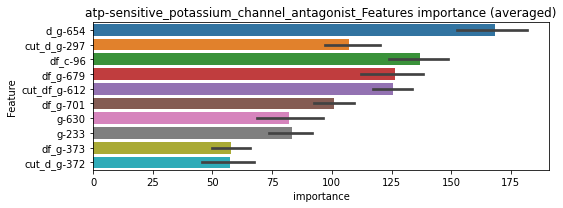

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000153685	valid_1's binary_logloss: 0.000207523
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000164885	valid_1's binary_logloss: 0.00408269
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000156805	valid_1's binary_logloss: 0.000163005
Training until validation scores don't improve for 30 rounds


atp-sensitive_potassium_channel_antagonist logloss: 0.0012226550041767206


[1000]	training's binary_logloss: 0.000150897	valid_1's binary_logloss: 0.000438464
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000150897	valid_1's binary_logloss: 0.000438464


atp_synthase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000279911	valid_1's binary_logloss: 0.00397111
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000228069	valid_1's binary_logloss: 0.00234374
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000227718	valid_1's binary_logloss: 0.000349287
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008926, Threshold: 0.0093380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0093380, conf_0:0.00654, conf_1:0.01214
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_1: 0.0393380
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0693380


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000240851	valid_1's binary_logloss: 0.00939916


threshold: 0.0693380, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000236462	valid_1's binary_logloss: 0.00299961
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000215679	valid_1's binary_logloss: 0.00137405
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000222583	valid_1's binary_logloss: 0.000247927
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0131543, Threshold: 0.0693380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00050
Num_p_label: 25.0, Expected: 2.0, Threshold: 0.0693380, conf_0:0.05547, conf_1:0.08321
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_1: 0.0993380
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.1293380
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_3: 0.1593380
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_4: 0.1893380
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_5: 0.2193380
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_6: 0.2493380
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_7: 0.2793380
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_8: 0.3093380
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_9: 0.3393380


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000219748	valid_1's binary_logloss: 0.00750493


Num_p_label: 7.0, Expected: 2.0, Adj_threshold_10: 0.3693380
threshold: 0.3693380, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000236462	valid_1's binary_logloss: 0.00299961
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000215679	valid_1's binary_logloss: 0.00137405
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000222583	valid_1's binary_logloss: 0.000247927
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0131543, Threshold: 0.3693380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, Expected: 2.0, Threshold: 0.3693380, conf_0:0.33240, conf_1:0.40627
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.3993380
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_2: 0.4293380
threshold: 0.4293380, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000219748	valid_1's binary_logloss: 0.00750493


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


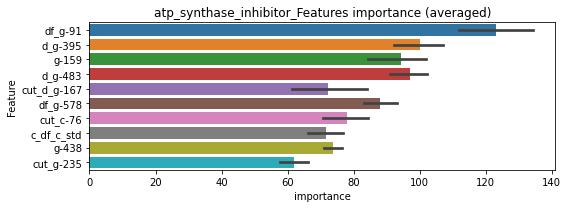

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000229537	valid_1's binary_logloss: 0.00197913


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000226121	valid_1's binary_logloss: 0.00114054
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000232816	valid_1's binary_logloss: 0.000263193
Training until validation scores don't improve for 30 rounds


atp_synthase_inhibitor logloss: 0.002388835406343892


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000269586	valid_1's binary_logloss: 0.0061693


atpase_inhibitor, len(trt): 97, len(othr): 3274
target_rate: 0.0040732 → Adj_target_rate: 0.0041016


selected negative label: 3274


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0334835	valid_1's binary_logloss: 0.113446
Early stopping, best iteration is:
[1744]	training's binary_logloss: 0.01892	valid_1's binary_logloss: 0.107798
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0347866	valid_1's binary_logloss: 0.0967493
Early stopping, best iteration is:
[1911]	training's binary_logloss: 0.0177755	valid_1's binary_logloss: 0.0892291
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0362984	valid_1's binary_logloss: 0.0744789
[2000]	training's binary_logloss: 0.0176346	valid_1's binary_logloss: 0.0637676
[3000]	training's binary_logloss: 0.0114568	valid_1's binary_logloss: 0.0599842
Early stopping, best iteration is:
[3176]	training's binary_logloss: 0.010795	valid_1's binary_logloss: 0.0596
Training until validation scores don't improve for 30 rounds
[1000]	training's b

1 / 3, AUC score:0.992, PR-AUC:0.982
y_Threshold: 0.0346528, Threshold: 0.0756912, pos_neg_ratio: 0.8000000
Remove_noisy_data: 174 → Positive_corect_labels: 633/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, Expected: 16.2, Threshold: 0.0756912, conf_0:0.05298, conf_1:0.09840
Num_p_label: 13.0, Expected: 16.2, Adj_threshold_1: 0.1056912
threshold: 0.1056912, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 633.0/3754, y_label_rate: 0.1686201
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0295149	valid_1's binary_logloss: 0.0863855
Early stopping, best iteration is:
[1738]	training's binary_logloss: 0.0167487	valid_1's binary_logloss: 0.0790085
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0299066	valid_1's binary_logloss: 0.0820796
[2000]	training's binary_logloss: 0.0146173	valid_1's binary_logloss: 0.0734183
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.0133279	valid_1's binary_logloss: 0.0728081
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0308071	valid_1's binary_logloss: 0.0697217
[2000]	training's binary_logloss: 0.0150825	valid_1's binary_logloss: 0.0595043
Early stopping, best iteration is:
[2860]	training's binary_logloss: 0.010404	valid_1's binary_logloss: 0.0568647
Training until validation scores don't improve for 30 rounds
[1000]	train

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0480593, Threshold: 0.1056912, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 616.0/3720
p_label_rate: 0.0050226 Vs.target_rate: 0.00407
Num_p_label: 20.0, Expected: 16.2, Threshold: 0.1056912, conf_0:0.08455, conf_1:0.12683
threshold: 0.1056912, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 616.0/3720, y_label_rate: 0.1655914
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0264845	valid_1's binary_logloss: 0.0731406
[2000]	training's binary_logloss: 0.0130312	valid_1's binary_logloss: 0.0639143
Early stopping, best iteration is:
[2295]	training's binary_logloss: 0.0112946	valid_1's binary_logloss: 0.0628571
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270512	valid_1's binary_logloss: 0.0680973
[2000]	training's binary_logloss: 0.0133082	valid_1's binary_logloss: 0.0596614
Early stopping, best iteration is:
[2615]	training's binary_logloss: 0.0100818	valid_1's binary_logloss: 0.0577189
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0276046	valid_1's binary_logloss: 0.0553827
[2000]	training's binary_logloss: 0.013648	valid_1's binary_logloss: 0.0454241
[3000]	training's binary_logloss: 0.0089949	valid_1's binary_logloss: 0.0422652
Early stopping, best iterati

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0406532, Threshold: 0.1056912, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 603.0/3694
p_label_rate: 0.0040181 Vs.target_rate: 0.00407
Num_p_label: 16.0, Expected: 16.2, Threshold: 0.1056912, conf_0:0.09512, conf_1:0.11626
threshold: 0.1056912, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 603.0/3694, y_label_rate: 0.1632377


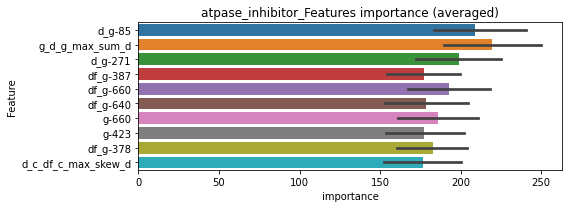

len(train_index) : 2770
len(valid_index) : 924
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0336138	valid_1's binary_logloss: 0.0712407
[2000]	training's binary_logloss: 0.0173045	valid_1's binary_logloss: 0.0597473
[3000]	training's binary_logloss: 0.0114913	valid_1's binary_logloss: 0.0559467
[4000]	training's binary_logloss: 0.00857876	valid_1's binary_logloss: 0.0540525
Early stopping, best iteration is:
[4109]	training's binary_logloss: 0.00834549	valid_1's binary_logloss: 0.0538885


len(train_index) : 2770
len(valid_index) : 924
================================= fold 2/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0351382	valid_1's binary_logloss: 0.0580145
[2000]	training's binary_logloss: 0.018001	valid_1's binary_logloss: 0.0453327
[3000]	training's binary_logloss: 0.0119441	valid_1's binary_logloss: 0.0412031
[4000]	training's binary_logloss: 0.0089279	valid_1's binary_logloss: 0.0392876
Early stopping, best iteration is:
[4288]	training's binary_logloss: 0.00832109	valid_1's binary_logloss: 0.0389664


len(train_index) : 2771
len(valid_index) : 923
================================= fold 3/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0368216	valid_1's binary_logloss: 0.0541122
[2000]	training's binary_logloss: 0.0188549	valid_1's binary_logloss: 0.0400288
[3000]	training's binary_logloss: 0.0125192	valid_1's binary_logloss: 0.035357
[4000]	training's binary_logloss: 0.00932817	valid_1's binary_logloss: 0.0330221
Early stopping, best iteration is:
[4437]	training's binary_logloss: 0.00839084	valid_1's binary_logloss: 0.0323758


len(train_index) : 2771
len(valid_index) : 923
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0343472	valid_1's binary_logloss: 0.0649706
[2000]	training's binary_logloss: 0.01757	valid_1's binary_logloss: 0.0526877
[3000]	training's binary_logloss: 0.0116779	valid_1's binary_logloss: 0.0485828
Early stopping, best iteration is:
[3330]	training's binary_logloss: 0.0104948	valid_1's binary_logloss: 0.0477999


atpase_inhibitor logloss: 0.043259374502264886
atpase_inhibitor is unpredictable(><)!
atr_kinase_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000329948	valid_1's binary_logloss: 0.0102372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.000411416	valid_1's binary_logloss: 0.0184179
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000286061	valid_1's binary_logloss: 0.000495778
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008976, Threshold: 0.0023732, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0023732, conf_0:0.00166, conf_1:0.00309
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_1: 0.0323732


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000308504	valid_1's binary_logloss: 0.00975454


threshold: 0.0323732, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000324655	valid_1's binary_logloss: 0.00889834
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.00041037	valid_1's binary_logloss: 0.0169048
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000288539	valid_1's binary_logloss: 0.000432614
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0077646, Threshold: 0.0323732, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0052737 Vs.target_rate: 0.00080
Num_p_label: 21.0, Expected: 3.2, Threshold: 0.0323732, conf_0:0.02590, conf_1:0.03885
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_1: 0.0623732
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_2: 0.0923732
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_3: 0.1223732


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000323801	valid_1's binary_logloss: 0.00854675


threshold: 0.1223732, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00028081	valid_1's binary_logloss: 0.00884577
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000279465	valid_1's binary_logloss: 0.00901262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000288592	valid_1's binary_logloss: 0.000325818
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0077661, Threshold: 0.1223732, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0025113 Vs.target_rate: 0.00080
Num_p_label: 10.0, Expected: 3.2, Threshold: 0.1223732, conf_0:0.11014, conf_1:0.13461
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_1: 0.1523732
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.1823732
threshold: 0.1823732, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[301]	training's binary_logloss: 0.000648321	valid_1's binary_logloss: 0.0131744


positive_y_label: 655.0/3807, y_label_rate: 0.1720515


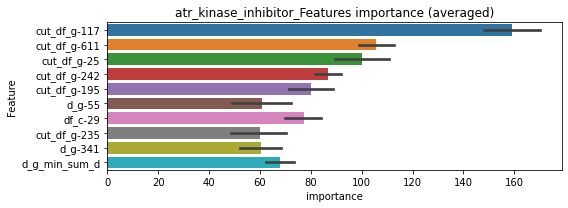

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 atr_kinase_inhibitor=================================


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000292654	valid_1's binary_logloss: 0.0104598
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 atr_kinase_inhibitor=================================


Early stopping, best iteration is:
[664]	training's binary_logloss: 0.0002963	valid_1's binary_logloss: 0.00176938
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 atr_kinase_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000376827	valid_1's binary_logloss: 0.00552831
Training until validation scores don't improve for 30 rounds


atr_kinase_inhibitor logloss: 0.00501447238029738


Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000300261	valid_1's binary_logloss: 0.00229758


aurora_kinase_inhibitor, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3276


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0339587	valid_1's binary_logloss: 0.10542
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.0173826	valid_1's binary_logloss: 0.0970909
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0351407	valid_1's binary_logloss: 0.0851188
[2000]	training's binary_logloss: 0.0172183	valid_1's binary_logloss: 0.0739079
[3000]	training's binary_logloss: 0.0112351	valid_1's binary_logloss: 0.0695737
Early stopping, best iteration is:
[2989]	training's binary_logloss: 0.0112787	valid_1's binary_logloss: 0.0695316
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0355265	valid_1's binary_logloss: 0.0831612
[2000]	training's binary_logloss: 0.0173545	valid_1's binary_logloss: 0.0713537
Early stopping, best iteration is:
[2013]	training's binary_logloss: 0.0172379	valid_1's binary_logloss: 0.07

1 / 3, AUC score:0.991, PR-AUC:0.980
y_Threshold: 0.0378510, Threshold: 0.1803532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 180 → Positive_corect_labels: 631/3751
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1803532, conf_0:0.12625, conf_1:0.23446
Num_p_label: 26.0, Expected: 16.1, Adj_threshold_1: 0.2103532
Num_p_label: 14.0, Expected: 16.1, Adj_threshold_2: 0.2403532
threshold: 0.2403532, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 631.0/3751, y_label_rate: 0.1682218
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.029067	valid_1's binary_logloss: 0.0784943
[2000]	training's binary_logloss: 0.0143573	valid_1's binary_logloss: 0.066566
[3000]	training's binary_logloss: 0.00942274	valid_1's binary_logloss: 0.0623938
Early stopping, best iteration is:
[3348]	training's binary_logloss: 0.00841755	valid_1's binary_logloss: 0.06151
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0289664	valid_1's binary_logloss: 0.0752005
[2000]	training's binary_logloss: 0.0143224	valid_1's binary_logloss: 0.0649763
[3000]	training's binary_logloss: 0.00940614	valid_1's binary_logloss: 0.0615325
Early stopping, best iteration is:
[3348]	training's binary_logloss: 0.00840799	valid_1's binary_logloss: 0.0607963
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0298737	valid_1's binary_logloss: 0.0626204
[2000]	training's binary_lo

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0461999, Threshold: 0.2403532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 616.0/3721
p_label_rate: 0.0143144 Vs.target_rate: 0.00403
Num_p_label: 57.0, Expected: 16.1, Threshold: 0.2403532, conf_0:0.19228, conf_1:0.28842
Num_p_label: 47.0, Expected: 16.1, Adj_threshold_1: 0.2703532
Num_p_label: 41.0, Expected: 16.1, Adj_threshold_2: 0.3003532
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_3: 0.3303532
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_4: 0.3603532
Num_p_label: 18.0, Expected: 16.1, Adj_threshold_5: 0.3903532
threshold: 0.3903532, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 616.0/3721, y_label_rate: 0.1655469
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0261546	valid_1's binary_logloss: 0.0631874
[2000]	training's binary_logloss: 0.0129638	valid_1's binary_logloss: 0.0537577
Early stopping, best iteration is:
[2873]	training's binary_logloss: 0.00894053	valid_1's binary_logloss: 0.0507789
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0264108	valid_1's binary_logloss: 0.0634889
[2000]	training's binary_logloss: 0.0130486	valid_1's binary_logloss: 0.0526044
[3000]	training's binary_logloss: 0.00858544	valid_1's binary_logloss: 0.0489578
Early stopping, best iteration is:
[3781]	training's binary_logloss: 0.00678422	valid_1's binary_logloss: 0.0473941
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0264144	valid_1's binary_logloss: 0.0590806
[2000]	training's binary_logloss: 0.0131382	valid_1's binary_logloss: 0.0483712
[3000]	training's binary

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0527829, Threshold: 0.3903532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 611.0/3711
p_label_rate: 0.0092918 Vs.target_rate: 0.00403
Num_p_label: 37.0, Expected: 16.1, Threshold: 0.3903532, conf_0:0.35132, conf_1:0.42939
Num_p_label: 31.0, Expected: 16.1, Adj_threshold_1: 0.4203532
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_2: 0.4503532
threshold: 0.4503532, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 611.0/3711, y_label_rate: 0.1646456


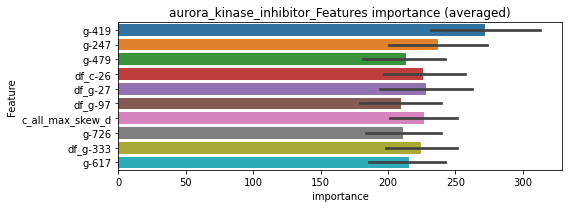

len(train_index) : 2783
len(valid_index) : 928
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0370248	valid_1's binary_logloss: 0.0621591
[2000]	training's binary_logloss: 0.0189949	valid_1's binary_logloss: 0.0463593
[3000]	training's binary_logloss: 0.0126406	valid_1's binary_logloss: 0.0409478
[4000]	training's binary_logloss: 0.009463	valid_1's binary_logloss: 0.0381061
[5000]	training's binary_logloss: 0.00757705	valid_1's binary_logloss: 0.0364054
Early stopping, best iteration is:
[5315]	training's binary_logloss: 0.00712246	valid_1's binary_logloss: 0.035938


len(train_index) : 2783
len(valid_index) : 928
================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0351141	valid_1's binary_logloss: 0.0807087
[2000]	training's binary_logloss: 0.0179597	valid_1's binary_logloss: 0.0683306
Early stopping, best iteration is:
[2931]	training's binary_logloss: 0.0122385	valid_1's binary_logloss: 0.0644411


len(train_index) : 2783
len(valid_index) : 928
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0367088	valid_1's binary_logloss: 0.065063
[2000]	training's binary_logloss: 0.0188238	valid_1's binary_logloss: 0.0494266
[3000]	training's binary_logloss: 0.0125231	valid_1's binary_logloss: 0.0435984
[4000]	training's binary_logloss: 0.00937717	valid_1's binary_logloss: 0.0406998
[5000]	training's binary_logloss: 0.00749798	valid_1's binary_logloss: 0.0389575
[6000]	training's binary_logloss: 0.00626464	valid_1's binary_logloss: 0.037677
Early stopping, best iteration is:
[6696]	training's binary_logloss: 0.00562432	valid_1's binary_logloss: 0.0370987


len(train_index) : 2784
len(valid_index) : 927
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0365016	valid_1's binary_logloss: 0.0604013
[2000]	training's binary_logloss: 0.0186643	valid_1's binary_logloss: 0.0460999
[3000]	training's binary_logloss: 0.0124234	valid_1's binary_logloss: 0.041048
[4000]	training's binary_logloss: 0.00930493	valid_1's binary_logloss: 0.038575
[5000]	training's binary_logloss: 0.00744206	valid_1's binary_logloss: 0.0371771
Early stopping, best iteration is:
[5718]	training's binary_logloss: 0.00651631	valid_1's binary_logloss: 0.0364278


aurora_kinase_inhibitor logloss: 0.04347828916156415
aurora_kinase_inhibitor is unpredictable(><)!
autotaxin_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000142899	valid_1's binary_logloss: 0.000746271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000139848	valid_1's binary_logloss: 0.000397164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000140053	valid_1's binary_logloss: 0.000287196
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003880, Threshold: 0.0022016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0022016, conf_0:0.00154, conf_1:0.00286
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0322016
threshold: 0.0322016, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000173307	valid_1's binary_logloss: 0.00210244


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000131392	valid_1's binary_logloss: 0.000889559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000130467	valid_1's binary_logloss: 0.000447253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000134069	valid_1's binary_logloss: 0.000145543
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0338092, Threshold: 0.0322016, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000131625	valid_1's binary_logloss: 0.00193555


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00025
Num_p_label: 15.0, Expected: 1.0, Threshold: 0.0322016, conf_0:0.02576, conf_1:0.03864
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_1: 0.0622016
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_2: 0.0922016
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.1222016
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.1522016
threshold: 0.1522016, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000131392	valid_1's binary_logloss: 0.000889559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000130467	valid_1's binary_logloss: 0.000447253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000134069	valid_1's binary_logloss: 0.000145543
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0338092, Threshold: 0.1522016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1522016, conf_0:0.13698, conf_1:0.16742
threshold: 0.1522016, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000131625	valid_1's binary_logloss: 0.00193555


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


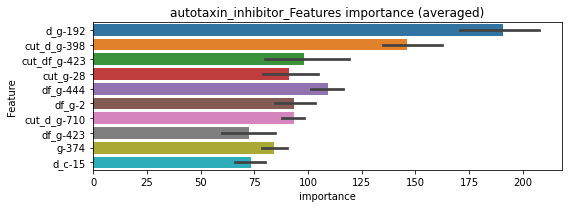

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000136371	valid_1's binary_logloss: 0.000576991


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1137]	training's binary_logloss: 0.000134402	valid_1's binary_logloss: 0.000575107
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000135547	valid_1's binary_logloss: 0.000299665


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1189]	training's binary_logloss: 0.000132817	valid_1's binary_logloss: 0.000297016
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000138629	valid_1's binary_logloss: 0.000150435
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000138174	valid_1's binary_logloss: 0.000149928


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


autotaxin_inhibitor logloss: 0.0007731508350404216


Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000155814	valid_1's binary_logloss: 0.00207075


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3282
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3282


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[271]	training's binary_logloss: 0.00287833	valid_1's binary_logloss: 0.0633393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00097482	valid_1's binary_logloss: 0.0460292
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.00049433	valid_1's binary_logloss: 0.00428891
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0053951, Threshold: 0.0116986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0116986, conf_0:0.00819, conf_1:0.01521
Num_p_label: 1.0, Expected: 10.0, Adj_threshold_1: 0.0416986


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.00105471	valid_1's binary_logloss: 0.0408766


threshold: 0.0416986, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000965646	valid_1's binary_logloss: 0.0345714
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000800756	valid_1's binary_logloss: 0.0336763
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000874251	valid_1's binary_logloss: 0.0441168
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0159931, Threshold: 0.0416986, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000615879	valid_1's binary_logloss: 0.0206936


Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3792
p_label_rate: 0.0045203 Vs.target_rate: 0.00252
Num_p_label: 18.0, Expected: 10.0, Threshold: 0.0416986, conf_0:0.03336, conf_1:0.05004
Num_p_label: 5.0, Expected: 10.0, Adj_threshold_1: 0.0716986
threshold: 0.0716986, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 649.0/3792, y_label_rate: 0.1711498
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000724099	valid_1's binary_logloss: 0.0349766
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000526406	valid_1's binary_logloss: 0.027918
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000795007	valid_1's binary_logloss: 0.0191501
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0185102, Threshold: 0.0716986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0007534 Vs.target_rate: 0.00252
Num_p_label: 3.0, Expected: 10.0, Threshold: 0.0716986, conf_0:0.06453, conf_1:0.07887
threshold: 0.0716986, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[387]	training's binary_logloss: 0.00103534	valid_1's binary_logloss: 0.0352512


positive_y_label: 646.0/3786, y_label_rate: 0.1706286


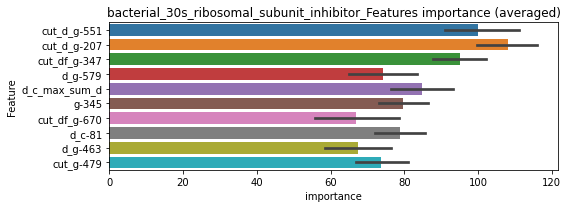

len(train_index) : 2839
len(valid_index) : 947
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2839
len(valid_index) : 947
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[284]	training's binary_logloss: 0.00123798	valid_1's binary_logloss: 0.0309461
Training until validation scores don't improve for 30 rounds


len(train_index) : 2840
len(valid_index) : 946
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000734722	valid_1's binary_logloss: 0.02812
Training until validation scores don't improve for 30 rounds


len(train_index) : 2840
len(valid_index) : 946
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000951842	valid_1's binary_logloss: 0.0257718
Training until validation scores don't improve for 30 rounds


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.02570235823206029


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000745997	valid_1's binary_logloss: 0.0179634


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3282
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3282


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.027788	valid_1's binary_logloss: 0.0876863
Early stopping, best iteration is:
[1899]	training's binary_logloss: 0.0144345	valid_1's binary_logloss: 0.0797406
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0287956	valid_1's binary_logloss: 0.0706792
[2000]	training's binary_logloss: 0.0141442	valid_1's binary_logloss: 0.0618122
Early stopping, best iteration is:
[2295]	training's binary_logloss: 0.012263	valid_1's binary_logloss: 0.0606085
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0296337	valid_1's binary_logloss: 0.0556639
[2000]	training's binary_logloss: 0.0145566	valid_1's binary_logloss: 0.046202
[3000]	training's binary_logloss: 0.00951266	valid_1's binary_logloss: 0.0430785
Early stopping, best iteration is:
[3720]	training's binary_logloss: 0.00762776	valid_1's binary_logloss: 0.0

1 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0320440, Threshold: 0.0529635, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 643/3780
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0529635, conf_0:0.03707, conf_1:0.06885
Num_p_label: 2.0, Expected: 13.4, Adj_threshold_1: 0.0829635
threshold: 0.0829635, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 643.0/3780, y_label_rate: 0.1701058
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0253677	valid_1's binary_logloss: 0.0614519
[2000]	training's binary_logloss: 0.0126042	valid_1's binary_logloss: 0.0526499
[3000]	training's binary_logloss: 0.00833697	valid_1's binary_logloss: 0.0497192
Early stopping, best iteration is:
[3576]	training's binary_logloss: 0.0069749	valid_1's binary_logloss: 0.0486126
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0257046	valid_1's binary_logloss: 0.0648938
[2000]	training's binary_logloss: 0.0127639	valid_1's binary_logloss: 0.0548318
[3000]	training's binary_logloss: 0.00840568	valid_1's binary_logloss: 0.0511472
Early stopping, best iteration is:
[3147]	training's binary_logloss: 0.00800174	valid_1's binary_logloss: 0.0507854
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0257367	valid_1's binary_logloss: 0.0572983
[2000]	training's binary

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0495218, Threshold: 0.0829635, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 635.0/3764
p_label_rate: 0.0060271 Vs.target_rate: 0.00336
Num_p_label: 24.0, Expected: 13.4, Threshold: 0.0829635, conf_0:0.06637, conf_1:0.09956
Num_p_label: 6.0, Expected: 13.4, Adj_threshold_1: 0.1129635
threshold: 0.1129635, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 635.0/3764, y_label_rate: 0.1687035
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0243194	valid_1's binary_logloss: 0.0528845
[2000]	training's binary_logloss: 0.0120834	valid_1's binary_logloss: 0.0442543
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.01149	valid_1's binary_logloss: 0.0437536
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239064	valid_1's binary_logloss: 0.0619434
[2000]	training's binary_logloss: 0.0118781	valid_1's binary_logloss: 0.0533064
[3000]	training's binary_logloss: 0.00785421	valid_1's binary_logloss: 0.0503564
Early stopping, best iteration is:
[3399]	training's binary_logloss: 0.00692187	valid_1's binary_logloss: 0.0497219
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0240801	valid_1's binary_logloss: 0.0580642
[2000]	training's binary_logloss: 0.0120312	valid_1's binary_logloss: 0.0494651
[3000]	training's binary_lo

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0485271, Threshold: 0.1129635, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 626.0/3746
p_label_rate: 0.0007534 Vs.target_rate: 0.00336
Num_p_label: 3.0, Expected: 13.4, Threshold: 0.1129635, conf_0:0.10167, conf_1:0.12426
threshold: 0.1129635, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 626.0/3746, y_label_rate: 0.1671116


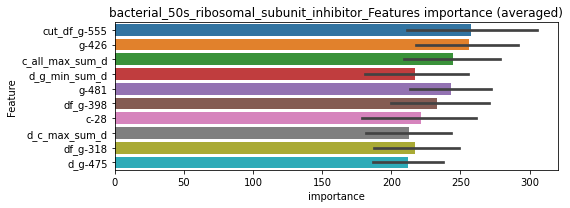

len(train_index) : 2809
len(valid_index) : 937
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0309756	valid_1's binary_logloss: 0.0680396
[2000]	training's binary_logloss: 0.0159956	valid_1's binary_logloss: 0.0561961
[3000]	training's binary_logloss: 0.0107042	valid_1's binary_logloss: 0.0525113
Early stopping, best iteration is:
[3776]	training's binary_logloss: 0.00850462	valid_1's binary_logloss: 0.0508425


len(train_index) : 2809
len(valid_index) : 937
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0321243	valid_1's binary_logloss: 0.0548446
[2000]	training's binary_logloss: 0.0164616	valid_1's binary_logloss: 0.0429757
[3000]	training's binary_logloss: 0.0109877	valid_1's binary_logloss: 0.0387401
[4000]	training's binary_logloss: 0.00823092	valid_1's binary_logloss: 0.0365255
Early stopping, best iteration is:
[4494]	training's binary_logloss: 0.00733569	valid_1's binary_logloss: 0.0358404


len(train_index) : 2810
len(valid_index) : 936
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0323009	valid_1's binary_logloss: 0.0549167
[2000]	training's binary_logloss: 0.0166665	valid_1's binary_logloss: 0.0425439
[3000]	training's binary_logloss: 0.0111304	valid_1's binary_logloss: 0.038265
Early stopping, best iteration is:
[3776]	training's binary_logloss: 0.00882246	valid_1's binary_logloss: 0.0364913


len(train_index) : 2810
len(valid_index) : 936
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319497	valid_1's binary_logloss: 0.0561765
[2000]	training's binary_logloss: 0.0164414	valid_1's binary_logloss: 0.044281
[3000]	training's binary_logloss: 0.0109657	valid_1's binary_logloss: 0.0401423
[4000]	training's binary_logloss: 0.00821731	valid_1's binary_logloss: 0.0382373
Early stopping, best iteration is:
[4302]	training's binary_logloss: 0.00764376	valid_1's binary_logloss: 0.037909


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.040272434363085696
bacterial_50s_ribosomal_subunit_inhibitor is unpredictable(><)!
bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000491386	valid_1's binary_logloss: 0.0208857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000486052	valid_1's binary_logloss: 0.0384131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000385528	valid_1's binary_logloss: 0.0046158
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015996, Threshold: 0.0126213, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0126213, conf_0:0.00883, conf_1:0.01641
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.0426213


Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000507974	valid_1's binary_logloss: 0.0170607


threshold: 0.0426213, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000425916	valid_1's binary_logloss: 0.0189747
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000505219	valid_1's binary_logloss: 0.0382135
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00038938	valid_1's binary_logloss: 0.00435447
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0174997, Threshold: 0.0426213, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 653.0/3803
p_label_rate: 0.0220994 Vs.target_rate: 0.00151
Num_p_label: 88.0, Expected: 6.0, Threshold: 0.0426213, conf_0:0.03410, conf_1:0.05115
Num_p_label: 71.0, Expected: 6.0, Adj_threshold_1: 0.0726213
Num_p_label: 64.0, Expected: 6.0, Adj_threshold_2: 0.1026213


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000515821	valid_1's binary_logloss: 0.0157168


Num_p_label: 58.0, Expected: 6.0, Adj_threshold_3: 0.1326213
Num_p_label: 53.0, Expected: 6.0, Adj_threshold_4: 0.1626213
Num_p_label: 47.0, Expected: 6.0, Adj_threshold_5: 0.1926213
Num_p_label: 44.0, Expected: 6.0, Adj_threshold_6: 0.2226213
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_7: 0.2526213
Num_p_label: 36.0, Expected: 6.0, Adj_threshold_8: 0.2826213
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_9: 0.3126213
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_10: 0.3426213
threshold: 0.3426213, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 653.0/3803, y_label_rate: 0.1717065
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000457778	valid_1's binary_logloss: 0.0095685
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.000945014	valid_1's binary_logloss: 0.0310928
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.000825603	valid_1's binary_logloss: 0.0285917
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162753, Threshold: 0.3426213, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3797


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000373034	valid_1's binary_logloss: 0.00515683


p_label_rate: 0.0107986 Vs.target_rate: 0.00151
Num_p_label: 43.0, Expected: 6.0, Threshold: 0.3426213, conf_0:0.30836, conf_1:0.37688
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_1: 0.3726213
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_2: 0.4026213
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_3: 0.4326213
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_4: 0.4626213
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_5: 0.4926213
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_6: 0.5226213
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_7: 0.5526213
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_8: 0.5826213
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_9: 0.6126213
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_10: 0.6426213
threshold: 0.6426213, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 650.0/3797, y_label_rate: 0.1711878


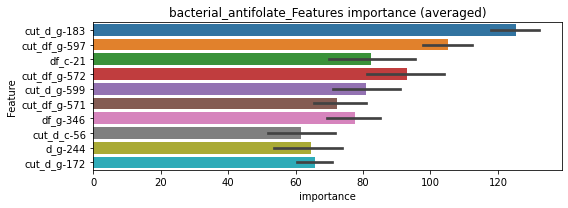

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 bacterial_antifolate=================================


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.0004059	valid_1's binary_logloss: 0.00927075
Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 bacterial_antifolate=================================


Early stopping, best iteration is:
[333]	training's binary_logloss: 0.000687625	valid_1's binary_logloss: 0.0176929
Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 bacterial_antifolate=================================


Early stopping, best iteration is:
[340]	training's binary_logloss: 0.000679748	valid_1's binary_logloss: 0.0118619
Training until validation scores don't improve for 30 rounds


bacterial_antifolate logloss: 0.014123205239677186


Early stopping, best iteration is:
[336]	training's binary_logloss: 0.000684558	valid_1's binary_logloss: 0.0176724
mutually exclusive columns: bacterial_cell_wall_synthesis_inhibitor


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 5973
target_rate: 0.0080625 → Adj_target_rate: 0.0073283


selected negative label: 5973


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0354342	valid_1's binary_logloss: 0.106393
Early stopping, best iteration is:
[1594]	training's binary_logloss: 0.0216283	valid_1's binary_logloss: 0.102713
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.0362911	valid_1's binary_logloss: 0.11774
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0362514	valid_1's binary_logloss: 0.101508
Early stopping, best iteration is:
[1820]	training's binary_logloss: 0.0190856	valid_1's binary_logloss: 0.0967037
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0361935	valid_1's binary_logloss: 0.0980793
Early stopping, best iteration is:
[1250]	training's binary_logloss: 0.0286555	valid_1's binary_logloss: 0.0959561


1 / 3, AUC score:0.976, PR-AUC:0.952
y_Threshold: 0.0490472, Threshold: 0.0773736, pos_neg_ratio: 0.8000000
Remove_noisy_data: 422 → Positive_corect_labels: 1103/6745
p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, Expected: 32.1, Threshold: 0.0773736, conf_0:0.05416, conf_1:0.10059
threshold: 0.0773736, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1103.0/6745, y_label_rate: 0.1635285
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239161	valid_1's binary_logloss: 0.048842
[2000]	training's binary_logloss: 0.0116634	valid_1's binary_logloss: 0.0427995
Early stopping, best iteration is:
[2504]	training's binary_logloss: 0.00920496	valid_1's binary_logloss: 0.0415806
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0218555	valid_1's binary_logloss: 0.0784459
Early stopping, best iteration is:
[1234]	training's binary_logloss: 0.017645	valid_1's binary_logloss: 0.0772963
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0234694	valid_1's binary_logloss: 0.0559423
Early stopping, best iteration is:
[1844]	training's binary_logloss: 0.0124538	valid_1's binary_logloss: 0.0506095
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0232671	valid_1's binary_logloss: 0.0617601
Early stoppi

2 / 3, AUC score:0.997, PR-AUC:0.989
y_Threshold: 0.0521355, Threshold: 0.0773736, pos_neg_ratio: 0.8000000
Remove_noisy_data: 106 → Positive_corect_labels: 1050.0/6639
p_label_rate: 0.0110497 Vs.target_rate: 0.00806
Num_p_label: 44.0, Expected: 32.1, Threshold: 0.0773736, conf_0:0.06190, conf_1:0.09285
threshold: 0.0773736, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 1050.0/6639, y_label_rate: 0.1581563
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0159085	valid_1's binary_logloss: 0.0341977
[2000]	training's binary_logloss: 0.00787219	valid_1's binary_logloss: 0.0288287
[3000]	training's binary_logloss: 0.00519857	valid_1's binary_logloss: 0.0271673
Early stopping, best iteration is:
[3456]	training's binary_logloss: 0.00450246	valid_1's binary_logloss: 0.0268263
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0154068	valid_1's binary_logloss: 0.0412588
[2000]	training's binary_logloss: 0.00761417	valid_1's binary_logloss: 0.0371844
Early stopping, best iteration is:
[2281]	training's binary_logloss: 0.00665406	valid_1's binary_logloss: 0.0367044
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0157859	valid_1's binary_logloss: 0.0343851
[2000]	training's binary_logloss: 0.00780785	valid_1's binary_logloss: 0.0292131
Early stopping, best 

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0336769, Threshold: 0.0773736, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 1030.0/6599
p_label_rate: 0.0095429 Vs.target_rate: 0.00806
Num_p_label: 38.0, Expected: 32.1, Threshold: 0.0773736, conf_0:0.06964, conf_1:0.08511
threshold: 0.0773736, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 1030.0/6599, y_label_rate: 0.1560843


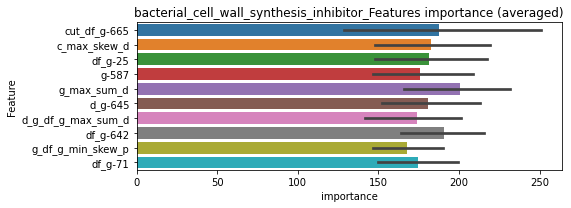

len(train_index) : 4949
len(valid_index) : 1650
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.018944	valid_1's binary_logloss: 0.0283958
[2000]	training's binary_logloss: 0.00966492	valid_1's binary_logloss: 0.0201675
[3000]	training's binary_logloss: 0.00647057	valid_1's binary_logloss: 0.0173918
[4000]	training's binary_logloss: 0.00484375	valid_1's binary_logloss: 0.0160926
[5000]	training's binary_logloss: 0.00388589	valid_1's binary_logloss: 0.0153931
[6000]	training's binary_logloss: 0.00323533	valid_1's binary_logloss: 0.0148931
Early stopping, best iteration is:
[6868]	training's binary_logloss: 0.00283257	valid_1's binary_logloss: 0.0146207


len(train_index) : 4949
len(valid_index) : 1650
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0182801	valid_1's binary_logloss: 0.0329078
[2000]	training's binary_logloss: 0.00932402	valid_1's binary_logloss: 0.0255235
[3000]	training's binary_logloss: 0.00623394	valid_1's binary_logloss: 0.0230781
[4000]	training's binary_logloss: 0.0046741	valid_1's binary_logloss: 0.0220682
Early stopping, best iteration is:
[4041]	training's binary_logloss: 0.00462609	valid_1's binary_logloss: 0.0220346


len(train_index) : 4949
len(valid_index) : 1650
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0189821	valid_1's binary_logloss: 0.0286074
[2000]	training's binary_logloss: 0.00969411	valid_1's binary_logloss: 0.0202658
[3000]	training's binary_logloss: 0.00647593	valid_1's binary_logloss: 0.0174183
[4000]	training's binary_logloss: 0.00484808	valid_1's binary_logloss: 0.0160545
Early stopping, best iteration is:
[4549]	training's binary_logloss: 0.00425777	valid_1's binary_logloss: 0.0155963


len(train_index) : 4950
len(valid_index) : 1649
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0187659	valid_1's binary_logloss: 0.0284651
[2000]	training's binary_logloss: 0.00957314	valid_1's binary_logloss: 0.0196895
[3000]	training's binary_logloss: 0.00642174	valid_1's binary_logloss: 0.0166318
[4000]	training's binary_logloss: 0.00482116	valid_1's binary_logloss: 0.0151152
[5000]	training's binary_logloss: 0.00387171	valid_1's binary_logloss: 0.0141672
[6000]	training's binary_logloss: 0.00323292	valid_1's binary_logloss: 0.0134816
[7000]	training's binary_logloss: 0.00278103	valid_1's binary_logloss: 0.0130475
[8000]	training's binary_logloss: 0.00244535	valid_1's binary_logloss: 0.012683
[9000]	training's binary_logloss: 0.00218288	valid_1's binary_logloss: 0.01242
[10000]	training's binary_logloss: 0.00197653	valid_1's binary_logloss: 0.0122273
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00197653	valid_1's binary_logloss: 0.0122273


bacterial_cell_wall_synthesis_inhibitor logloss: 0.016120301183256736
bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3275
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3275


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0318132	valid_1's binary_logloss: 0.0911158
Early stopping, best iteration is:
[1731]	training's binary_logloss: 0.0181159	valid_1's binary_logloss: 0.0842814
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0309045	valid_1's binary_logloss: 0.0960602
Early stopping, best iteration is:
[1545]	training's binary_logloss: 0.0198917	valid_1's binary_logloss: 0.0914251
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0333745	valid_1's binary_logloss: 0.0714094
[2000]	training's binary_logloss: 0.0163074	valid_1's binary_logloss: 0.0624333
[3000]	training's binary_logloss: 0.0106328	valid_1's binary_logloss: 0.0593879
Early stopping, best iteration is:
[3448]	training's binary_logloss: 0.00918493	valid_1's binary_logloss: 0.058604
Training until validation scores don't improve for 30 rounds
[1000]	trai

1 / 3, AUC score:0.993, PR-AUC:0.982
y_Threshold: 0.0361402, Threshold: 0.0766428, pos_neg_ratio: 0.8000000
Remove_noisy_data: 173 → Positive_corect_labels: 634/3757
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0766428, conf_0:0.05365, conf_1:0.09964
Num_p_label: 10.0, Expected: 14.9, Adj_threshold_1: 0.1066428
threshold: 0.1066428, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 634.0/3757, y_label_rate: 0.1687517
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0275748	valid_1's binary_logloss: 0.063066
[2000]	training's binary_logloss: 0.0135323	valid_1's binary_logloss: 0.0538089
[3000]	training's binary_logloss: 0.00889189	valid_1's binary_logloss: 0.0506936
Early stopping, best iteration is:
[3068]	training's binary_logloss: 0.00868821	valid_1's binary_logloss: 0.0505754
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0264909	valid_1's binary_logloss: 0.0758527
[2000]	training's binary_logloss: 0.0130137	valid_1's binary_logloss: 0.0672488
Early stopping, best iteration is:
[2105]	training's binary_logloss: 0.0123469	valid_1's binary_logloss: 0.0668211
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271256	valid_1's binary_logloss: 0.0649578
[2000]	training's binary_logloss: 0.0133872	valid_1's binary_logloss: 0.056452
Early stopping, best iterat

2 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0471887, Threshold: 0.1066428, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 620.0/3729
p_label_rate: 0.0075339 Vs.target_rate: 0.00374
Num_p_label: 30.0, Expected: 14.9, Threshold: 0.1066428, conf_0:0.08531, conf_1:0.12797
Num_p_label: 10.0, Expected: 14.9, Adj_threshold_1: 0.1366428
threshold: 0.1366428, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 620.0/3729, y_label_rate: 0.1662644
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239496	valid_1's binary_logloss: 0.0639564
[2000]	training's binary_logloss: 0.0119006	valid_1's binary_logloss: 0.0551653
Early stopping, best iteration is:
[2487]	training's binary_logloss: 0.00953226	valid_1's binary_logloss: 0.0535192
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.024688	valid_1's binary_logloss: 0.0574212
[2000]	training's binary_logloss: 0.0122044	valid_1's binary_logloss: 0.0491856
Early stopping, best iteration is:
[2107]	training's binary_logloss: 0.0115593	valid_1's binary_logloss: 0.0487071
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0243952	valid_1's binary_logloss: 0.0561406
[2000]	training's binary_logloss: 0.0120972	valid_1's binary_logloss: 0.0478096
Early stopping, best iteration is:
[2950]	training's binary_logloss: 0.00812353	valid_1's binary_logloss: 0

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0443258, Threshold: 0.1366428, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 611.0/3711
p_label_rate: 0.0040181 Vs.target_rate: 0.00374
Num_p_label: 16.0, Expected: 14.9, Threshold: 0.1366428, conf_0:0.12298, conf_1:0.15031
threshold: 0.1366428, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 611.0/3711, y_label_rate: 0.1646456


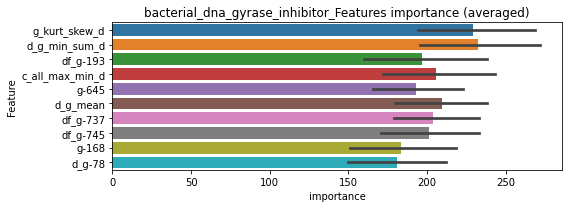

len(train_index) : 2783
len(valid_index) : 928
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0331351	valid_1's binary_logloss: 0.0577857
[2000]	training's binary_logloss: 0.0170428	valid_1's binary_logloss: 0.0459103
[3000]	training's binary_logloss: 0.0113193	valid_1's binary_logloss: 0.0420867
Early stopping, best iteration is:
[3328]	training's binary_logloss: 0.0101862	valid_1's binary_logloss: 0.0414134


len(train_index) : 2783
len(valid_index) : 928
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0309354	valid_1's binary_logloss: 0.0715756
[2000]	training's binary_logloss: 0.0159129	valid_1's binary_logloss: 0.060813
[3000]	training's binary_logloss: 0.0106197	valid_1's binary_logloss: 0.0572802
Early stopping, best iteration is:
[3320]	training's binary_logloss: 0.00958069	valid_1's binary_logloss: 0.0566377


len(train_index) : 2783
len(valid_index) : 928
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0327452	valid_1's binary_logloss: 0.0549696
[2000]	training's binary_logloss: 0.0167737	valid_1's binary_logloss: 0.0426356
[3000]	training's binary_logloss: 0.0111487	valid_1's binary_logloss: 0.0382985
[4000]	training's binary_logloss: 0.00832236	valid_1's binary_logloss: 0.0358791
[5000]	training's binary_logloss: 0.00666764	valid_1's binary_logloss: 0.0346391
[6000]	training's binary_logloss: 0.0055559	valid_1's binary_logloss: 0.0336179
[7000]	training's binary_logloss: 0.00477291	valid_1's binary_logloss: 0.0329709
Early stopping, best iteration is:
[7421]	training's binary_logloss: 0.00451183	valid_1's binary_logloss: 0.0327457


len(train_index) : 2784
len(valid_index) : 927
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.033711	valid_1's binary_logloss: 0.0495454
[2000]	training's binary_logloss: 0.0173724	valid_1's binary_logloss: 0.0360778
[3000]	training's binary_logloss: 0.011566	valid_1's binary_logloss: 0.0313805
[4000]	training's binary_logloss: 0.00862318	valid_1's binary_logloss: 0.0290637
[5000]	training's binary_logloss: 0.00690429	valid_1's binary_logloss: 0.0276783
Early stopping, best iteration is:
[5382]	training's binary_logloss: 0.00641033	valid_1's binary_logloss: 0.0272309


bacterial_dna_gyrase_inhibitor logloss: 0.039510203651443226
bacterial_dna_gyrase_inhibitor is unpredictable(><)!


mutually exclusive columns: bacterial_dna_inhibitor


bacterial_dna_inhibitor, len(trt): 115, len(othr): 2020
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 2020


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0594744	valid_1's binary_logloss: 0.183024
Early stopping, best iteration is:
[1466]	training's binary_logloss: 0.040766	valid_1's binary_logloss: 0.174015
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0611749	valid_1's binary_logloss: 0.151785
[2000]	training's binary_logloss: 0.0304754	valid_1's binary_logloss: 0.13436
Early stopping, best iteration is:
[2507]	training's binary_logloss: 0.0241401	valid_1's binary_logloss: 0.130631
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0628646	valid_1's binary_logloss: 0.143626
[2000]	training's binary_logloss: 0.0313478	valid_1's binary_logloss: 0.126516
Early stopping, best iteration is:
[2912]	training's binary_logloss: 0.0211705	valid_1's binary_logloss: 0.122035
Training until validation scores don't improve for 30 rounds
[1000]	training's bin

1 / 3, AUC score:0.966, PR-AUC:0.936
y_Threshold: 0.0716721, Threshold: 0.1198646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 165 → Positive_corect_labels: 362/2259
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.1198646, conf_0:0.08391, conf_1:0.15582
Num_p_label: 15.0, Expected: 19.2, Adj_threshold_1: 0.1498646
threshold: 0.1498646, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 362.0/2259, y_label_rate: 0.1602479
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.047047	valid_1's binary_logloss: 0.134136
Early stopping, best iteration is:
[1185]	training's binary_logloss: 0.0398578	valid_1's binary_logloss: 0.128784
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0484017	valid_1's binary_logloss: 0.11489
[2000]	training's binary_logloss: 0.0241396	valid_1's binary_logloss: 0.0988696
Early stopping, best iteration is:
[2300]	training's binary_logloss: 0.0209631	valid_1's binary_logloss: 0.0969058
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0482678	valid_1's binary_logloss: 0.124029
[2000]	training's binary_logloss: 0.0242247	valid_1's binary_logloss: 0.110014
Early stopping, best iteration is:
[2091]	training's binary_logloss: 0.0231638	valid_1's binary_logloss: 0.109398
Training until validation scores don't improve for 30 rounds
[1000]	training's b

2 / 3, AUC score:0.990, PR-AUC:0.981
y_Threshold: 0.0849741, Threshold: 0.1498646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 339.0/2213
p_label_rate: 0.0037670 Vs.target_rate: 0.00483
Num_p_label: 15.0, Expected: 19.2, Threshold: 0.1498646, conf_0:0.11989, conf_1:0.17984
threshold: 0.1498646, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 339.0/2213, y_label_rate: 0.1531857
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.042335	valid_1's binary_logloss: 0.102554
[2000]	training's binary_logloss: 0.0212046	valid_1's binary_logloss: 0.0851376
[3000]	training's binary_logloss: 0.0139999	valid_1's binary_logloss: 0.0789709
Early stopping, best iteration is:
[3410]	training's binary_logloss: 0.012291	valid_1's binary_logloss: 0.0775235
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0406684	valid_1's binary_logloss: 0.12006
[2000]	training's binary_logloss: 0.0202058	valid_1's binary_logloss: 0.10567
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0192285	valid_1's binary_logloss: 0.104812
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0440932	valid_1's binary_logloss: 0.0793813
[2000]	training's binary_logloss: 0.0220061	valid_1's binary_logloss: 0.0617956
[3000]	training's binary_logloss: 0

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0656714, Threshold: 0.1498646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 333.0/2201
p_label_rate: 0.0017579 Vs.target_rate: 0.00483
Num_p_label: 7.0, Expected: 19.2, Threshold: 0.1498646, conf_0:0.13488, conf_1:0.16485
threshold: 0.1498646, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 333.0/2201, y_label_rate: 0.1512949


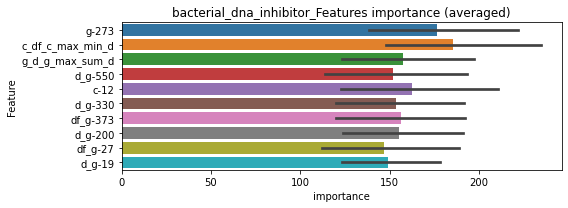

len(train_index) : 1650
len(valid_index) : 551
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0572033	valid_1's binary_logloss: 0.117312
[2000]	training's binary_logloss: 0.029724	valid_1's binary_logloss: 0.0962699
[3000]	training's binary_logloss: 0.0198038	valid_1's binary_logloss: 0.088805
Early stopping, best iteration is:
[3896]	training's binary_logloss: 0.0152199	valid_1's binary_logloss: 0.0852028


len(train_index) : 1651
len(valid_index) : 550
================================= fold 2/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0579298	valid_1's binary_logloss: 0.105646
[2000]	training's binary_logloss: 0.0297969	valid_1's binary_logloss: 0.0840507
[3000]	training's binary_logloss: 0.0199081	valid_1's binary_logloss: 0.0760973
Early stopping, best iteration is:
[3140]	training's binary_logloss: 0.01901	valid_1's binary_logloss: 0.0752454


len(train_index) : 1651
len(valid_index) : 550
================================= fold 3/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0587769	valid_1's binary_logloss: 0.106259
[2000]	training's binary_logloss: 0.0304466	valid_1's binary_logloss: 0.0848365
[3000]	training's binary_logloss: 0.0202534	valid_1's binary_logloss: 0.0779138
[4000]	training's binary_logloss: 0.0151491	valid_1's binary_logloss: 0.0744963
Early stopping, best iteration is:
[4300]	training's binary_logloss: 0.0140863	valid_1's binary_logloss: 0.0735957


len(train_index) : 1651
len(valid_index) : 550
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0564846	valid_1's binary_logloss: 0.117569
[2000]	training's binary_logloss: 0.0293062	valid_1's binary_logloss: 0.0983647
[3000]	training's binary_logloss: 0.0194939	valid_1's binary_logloss: 0.0916078
Early stopping, best iteration is:
[3146]	training's binary_logloss: 0.0185652	valid_1's binary_logloss: 0.0909946


bacterial_dna_inhibitor logloss: 0.08126144828843404
bacterial_dna_inhibitor is unpredictable(><)!
bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000281957	valid_1's binary_logloss: 0.0080461
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000294231	valid_1's binary_logloss: 0.0178905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000284574	valid_1's binary_logloss: 0.00413201
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009813, Threshold: 0.0017669, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0017669, conf_0:0.00124, conf_1:0.00230
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0317669
threshold: 0.0317669, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000355029	valid_1's binary_logloss: 0.00494732


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.0002872	valid_1's binary_logloss: 0.00824169
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000292051	valid_1's binary_logloss: 0.0167528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000337	valid_1's binary_logloss: 0.00451812
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0071935, Threshold: 0.0317669, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00080
Num_p_label: 0.0, Expected: 3.2, Threshold: 0.0317669, conf_0:0.02541, conf_1:0.03812


Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000288624	valid_1's binary_logloss: 0.00386603


threshold: 0.0317669, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.0002872	valid_1's binary_logloss: 0.00824169
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000292051	valid_1's binary_logloss: 0.0167528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000337	valid_1's binary_logloss: 0.00451812
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0071935, Threshold: 0.0317669, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00080
Num_p_label: 0.0, Expected: 3.2, Threshold: 0.0317669, conf_0:0.02859, conf_1:0.03494


Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000288624	valid_1's binary_logloss: 0.00386603


threshold: 0.0317669, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


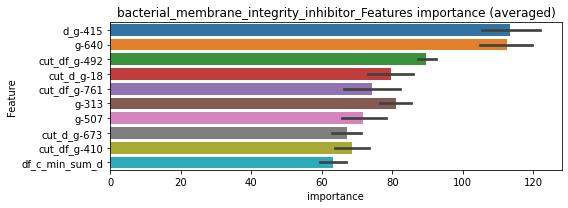

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000292769	valid_1's binary_logloss: 0.00653118
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000429565	valid_1's binary_logloss: 0.0154004
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000323135	valid_1's binary_logloss: 0.00291769
Training until validation scores don't improve for 30 rounds


bacterial_membrane_integrity_inhibitor logloss: 0.007308049540236989


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00031812	valid_1's binary_logloss: 0.00437813


bcl_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00039339	valid_1's binary_logloss: 0.00904822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000446459	valid_1's binary_logloss: 0.0353583
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000366712	valid_1's binary_logloss: 0.00232265
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0016492, Threshold: 0.0058122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0058122, conf_0:0.00407, conf_1:0.00756
Num_p_label: 2.0, Expected: 5.2, Adj_threshold_1: 0.0358122


Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000505782	valid_1's binary_logloss: 0.020798


threshold: 0.0358122, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.00047411	valid_1's binary_logloss: 0.0207683
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.000470726	valid_1's binary_logloss: 0.0180184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000364895	valid_1's binary_logloss: 0.00201855
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0085750, Threshold: 0.0358122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0047715 Vs.target_rate: 0.00130
Num_p_label: 19.0, Expected: 5.2, Threshold: 0.0358122, conf_0:0.02865, conf_1:0.04297
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_1: 0.0658122


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000442912	valid_1's binary_logloss: 0.0216586


threshold: 0.0658122, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.00047411	valid_1's binary_logloss: 0.0207683
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.000470726	valid_1's binary_logloss: 0.0180184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000364895	valid_1's binary_logloss: 0.00201855
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0085750, Threshold: 0.0658122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.0658122, conf_0:0.05923, conf_1:0.07239


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000442912	valid_1's binary_logloss: 0.0216586


threshold: 0.0658122, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


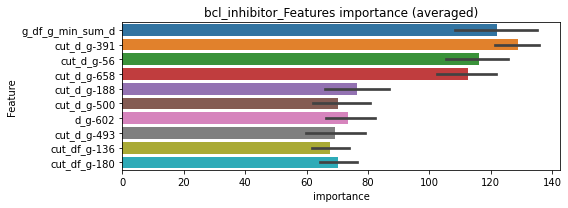

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 bcl_inhibitor=================================


Early stopping, best iteration is:
[306]	training's binary_logloss: 0.000717046	valid_1's binary_logloss: 0.018616
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 bcl_inhibitor=================================


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000512306	valid_1's binary_logloss: 0.013202
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857


Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000390244	valid_1's binary_logloss: 0.00169574


len(valid_index) : 952
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bcl_inhibitor logloss: 0.012991652893724786


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000694835	valid_1's binary_logloss: 0.0184448


bcr-abl_inhibitor, len(trt): 38, len(othr): 3281
target_rate: 0.0015957 → Adj_target_rate: 0.0018493


selected negative label: 3281


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00167868	valid_1's binary_logloss: 0.0447603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000526239	valid_1's binary_logloss: 0.0214997
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.0003927	valid_1's binary_logloss: 0.00162417
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0031654, Threshold: 0.0437368, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, Expected: 6.4, Threshold: 0.0437368, conf_0:0.03062, conf_1:0.05686
Num_p_label: 24.0, Expected: 6.4, Adj_threshold_1: 0.0737368
Num_p_label: 18.0, Expected: 6.4, Adj_threshold_2: 0.1037368
Num_p_label: 9.0, Expected: 6.4, Adj_threshold_3: 0.1337368


Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00065611	valid_1's binary_logloss: 0.0204758


threshold: 0.1337368, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000643435	valid_1's binary_logloss: 0.0311284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000399519	valid_1's binary_logloss: 0.0105252
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000450754	valid_1's binary_logloss: 0.0119016
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0198096, Threshold: 0.1337368, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0158212 Vs.target_rate: 0.00160
Num_p_label: 63.0, Expected: 6.4, Threshold: 0.1337368, conf_0:0.10699, conf_1:0.16048
Num_p_label: 60.0, Expected: 6.4, Adj_threshold_1: 0.1637368
Num_p_label: 57.0, Expected: 6.4, Adj_threshold_2: 0.1937368
Num_p_label: 54.0, Expected: 6.4, Adj_threshold_3: 0.2237368


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000496941	valid_1's binary_logloss: 0.0137371


Num_p_label: 48.0, Expected: 6.4, Adj_threshold_4: 0.2537368
Num_p_label: 45.0, Expected: 6.4, Adj_threshold_5: 0.2837368
Num_p_label: 41.0, Expected: 6.4, Adj_threshold_6: 0.3137368
Num_p_label: 35.0, Expected: 6.4, Adj_threshold_7: 0.3437368
Num_p_label: 32.0, Expected: 6.4, Adj_threshold_8: 0.3737368
Num_p_label: 32.0, Expected: 6.4, Adj_threshold_9: 0.4037368
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_10: 0.4337368
threshold: 0.4337368, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000552367	valid_1's binary_logloss: 0.0227909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00041044	valid_1's binary_logloss: 0.0142474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000493878	valid_1's binary_logloss: 0.00753538
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0200356, Threshold: 0.4337368, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0072828 Vs.target_rate: 0.00160
Num_p_label: 29.0, Expected: 6.4, Threshold: 0.4337368, conf_0:0.39036, conf_1:0.47711
Num_p_label: 29.0, Expected: 6.4, Adj_threshold_1: 0.4637368
Num_p_label: 27.0, Expected: 6.4, Adj_threshold_2: 0.4937368
Num_p_label: 27.0, Expected: 6.4, Adj_threshold_3: 0.5237368
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_4: 0.5537368
Num_p_label: 20.0, Expected: 6.4, Adj_threshold_5: 0.5837368
Num_p_label: 18.0, Expected: 6.4, Adj_threshold_6: 0.6137368
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_7: 0.6437368
Num_p_label: 11.0, Expected: 6.4, Adj_threshold_8: 0.6737368


Early stopping, best iteration is:
[382]	training's binary_logloss: 0.000615614	valid_1's binary_logloss: 0.0194794


threshold: 0.6737368, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


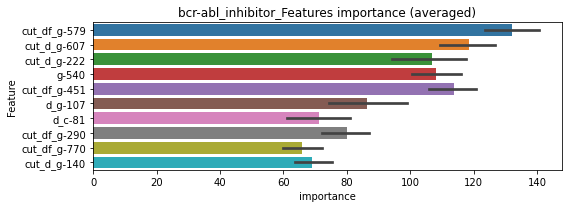

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 bcr-abl_inhibitor=================================


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000444866	valid_1's binary_logloss: 0.0114415
Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 bcr-abl_inhibitor=================================


Early stopping, best iteration is:
[341]	training's binary_logloss: 0.000684411	valid_1's binary_logloss: 0.0142984
Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 bcr-abl_inhibitor=================================


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000501563	valid_1's binary_logloss: 0.00923412
Training until validation scores don't improve for 30 rounds


bcr-abl_inhibitor logloss: 0.014377969970058416


Early stopping, best iteration is:
[363]	training's binary_logloss: 0.000637863	valid_1's binary_logloss: 0.0225409


benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3278


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0244639	valid_1's binary_logloss: 0.0724797
[2000]	training's binary_logloss: 0.0118938	valid_1's binary_logloss: 0.0648823
Early stopping, best iteration is:
[2300]	training's binary_logloss: 0.0102624	valid_1's binary_logloss: 0.0638907
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0249797	valid_1's binary_logloss: 0.0651806
[2000]	training's binary_logloss: 0.0120689	valid_1's binary_logloss: 0.0567637
[3000]	training's binary_logloss: 0.00786643	valid_1's binary_logloss: 0.0538621
Early stopping, best iteration is:
[3343]	training's binary_logloss: 0.00703595	valid_1's binary_logloss: 0.0533777
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0261241	valid_1's binary_logloss: 0.0496436
[2000]	training's binary_logloss: 0.0126113	valid_1's binary_logloss: 0.0394861
[3000]	training's binary_

1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0180044, Threshold: 0.0294741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.0294741, conf_0:0.02063, conf_1:0.03832
Num_p_label: 4.0, Expected: 11.2, Adj_threshold_1: 0.0594741
threshold: 0.0594741, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 649.0/3789, y_label_rate: 0.1712853
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239068	valid_1's binary_logloss: 0.0584086
[2000]	training's binary_logloss: 0.0116481	valid_1's binary_logloss: 0.0488612
Early stopping, best iteration is:
[2801]	training's binary_logloss: 0.00817835	valid_1's binary_logloss: 0.0457295
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0235036	valid_1's binary_logloss: 0.0609196
[2000]	training's binary_logloss: 0.0115186	valid_1's binary_logloss: 0.0527386
Early stopping, best iteration is:
[2849]	training's binary_logloss: 0.00796771	valid_1's binary_logloss: 0.0501355
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0241648	valid_1's binary_logloss: 0.0514913
[2000]	training's binary_logloss: 0.0117563	valid_1's binary_logloss: 0.0419962
[3000]	training's binary_logloss: 0.00769867	valid_1's binary_logloss: 0.0385414
[4000]	training's binary

2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0344708, Threshold: 0.0594741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 643.0/3777
p_label_rate: 0.0025113 Vs.target_rate: 0.00281
Num_p_label: 10.0, Expected: 11.2, Threshold: 0.0594741, conf_0:0.04758, conf_1:0.07137
threshold: 0.0594741, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 643.0/3777, y_label_rate: 0.1702409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0220092	valid_1's binary_logloss: 0.0580991
[2000]	training's binary_logloss: 0.0108022	valid_1's binary_logloss: 0.0506673
Early stopping, best iteration is:
[2459]	training's binary_logloss: 0.00871397	valid_1's binary_logloss: 0.0492866
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0225108	valid_1's binary_logloss: 0.0541735
[2000]	training's binary_logloss: 0.0110383	valid_1's binary_logloss: 0.0451657
Early stopping, best iteration is:
[2872]	training's binary_logloss: 0.00759195	valid_1's binary_logloss: 0.0423642
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0229194	valid_1's binary_logloss: 0.0480119
[2000]	training's binary_logloss: 0.0111475	valid_1's binary_logloss: 0.0396026
[3000]	training's binary_logloss: 0.00734331	valid_1's binary_logloss: 0.0370464
Early stopping, best ite

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0381818, Threshold: 0.0594741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 639.0/3769
p_label_rate: 0.0022602 Vs.target_rate: 0.00281
Num_p_label: 9.0, Expected: 11.2, Threshold: 0.0594741, conf_0:0.05353, conf_1:0.06542
threshold: 0.0594741, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 639.0/3769, y_label_rate: 0.1695410


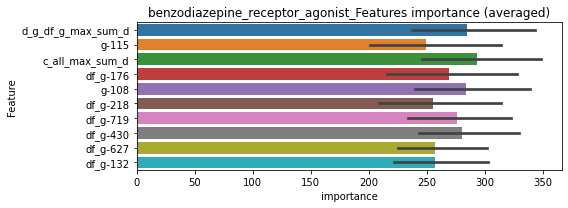

len(train_index) : 2826
len(valid_index) : 943
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0313987	valid_1's binary_logloss: 0.0567466
[2000]	training's binary_logloss: 0.0159718	valid_1's binary_logloss: 0.0450798
[3000]	training's binary_logloss: 0.0105604	valid_1's binary_logloss: 0.0409775
[4000]	training's binary_logloss: 0.00786735	valid_1's binary_logloss: 0.0389725
Early stopping, best iteration is:
[4263]	training's binary_logloss: 0.00736952	valid_1's binary_logloss: 0.0385861


len(train_index) : 2827
len(valid_index) : 942
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0312551	valid_1's binary_logloss: 0.0603434
[2000]	training's binary_logloss: 0.0159567	valid_1's binary_logloss: 0.0485559
[3000]	training's binary_logloss: 0.0105408	valid_1's binary_logloss: 0.0440649
Early stopping, best iteration is:
[3322]	training's binary_logloss: 0.00948814	valid_1's binary_logloss: 0.0431813


len(train_index) : 2827
len(valid_index) : 942
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0322645	valid_1's binary_logloss: 0.048348
[2000]	training's binary_logloss: 0.0163646	valid_1's binary_logloss: 0.0366129
[3000]	training's binary_logloss: 0.010823	valid_1's binary_logloss: 0.0326003
[4000]	training's binary_logloss: 0.00807289	valid_1's binary_logloss: 0.0306331
[5000]	training's binary_logloss: 0.00644315	valid_1's binary_logloss: 0.0294364
[6000]	training's binary_logloss: 0.00536413	valid_1's binary_logloss: 0.0286071
Early stopping, best iteration is:
[6826]	training's binary_logloss: 0.00472343	valid_1's binary_logloss: 0.0281112


len(train_index) : 2827
len(valid_index) : 942
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0303605	valid_1's binary_logloss: 0.0632369
[2000]	training's binary_logloss: 0.0155002	valid_1's binary_logloss: 0.0540431
[3000]	training's binary_logloss: 0.0102863	valid_1's binary_logloss: 0.0505425
Early stopping, best iteration is:
[3332]	training's binary_logloss: 0.00924206	valid_1's binary_logloss: 0.0499113


benzodiazepine_receptor_agonist logloss: 0.03994711247419531
benzodiazepine_receptor_agonist is unpredictable(><)!
beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000374197	valid_1's binary_logloss: 0.012226
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000371282	valid_1's binary_logloss: 0.0230417
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000439471	valid_1's binary_logloss: 0.00390731
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013513, Threshold: 0.0056091, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0056091, conf_0:0.00393, conf_1:0.00729
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_1: 0.0356091
threshold: 0.0356091, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[326]	training's binary_logloss: 0.000646435	valid_1's binary_logloss: 0.0138914


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000401626	valid_1's binary_logloss: 0.0120849
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000377511	valid_1's binary_logloss: 0.0221797
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000415038	valid_1's binary_logloss: 0.00342749
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0065218, Threshold: 0.0356091, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00101
Num_p_label: 13.0, Expected: 4.0, Threshold: 0.0356091, conf_0:0.02849, conf_1:0.04273
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_1: 0.0656091
threshold: 0.0656091, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000401861	valid_1's binary_logloss: 0.0122673


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000401626	valid_1's binary_logloss: 0.0120849
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000377511	valid_1's binary_logloss: 0.0221797
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000415038	valid_1's binary_logloss: 0.00342749
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0065218, Threshold: 0.0656091, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, Expected: 4.0, Threshold: 0.0656091, conf_0:0.05905, conf_1:0.07217
threshold: 0.0656091, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000401861	valid_1's binary_logloss: 0.0122673


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


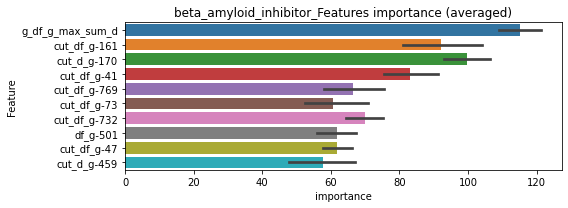

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000397666	valid_1's binary_logloss: 0.00977015
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00053796	valid_1's binary_logloss: 0.0164202
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000349655	valid_1's binary_logloss: 0.00361985
Training until validation scores don't improve for 30 rounds


beta_amyloid_inhibitor logloss: 0.010682562445061874


Early stopping, best iteration is:
[265]	training's binary_logloss: 0.00069489	valid_1's binary_logloss: 0.01292


bromodomain_inhibitor, len(trt): 68, len(othr): 3280
target_rate: 0.0028555 → Adj_target_rate: 0.0030327


selected negative label: 3280


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0251543	valid_1's binary_logloss: 0.0865398
[2000]	training's binary_logloss: 0.0124068	valid_1's binary_logloss: 0.0785927
Early stopping, best iteration is:
[2295]	training's binary_logloss: 0.0107565	valid_1's binary_logloss: 0.0776257
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0265226	valid_1's binary_logloss: 0.0668627
[2000]	training's binary_logloss: 0.0129542	valid_1's binary_logloss: 0.0572224
[3000]	training's binary_logloss: 0.00846214	valid_1's binary_logloss: 0.0537068
Early stopping, best iteration is:
[3609]	training's binary_logloss: 0.00699214	valid_1's binary_logloss: 0.0526226
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0281706	valid_1's binary_logloss: 0.0420297
[2000]	training's binary_logloss: 0.0136855	valid_1's binary_logloss: 0.0308642
[3000]	training's binary_

1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0223858, Threshold: 0.0364887, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, Expected: 11.4, Threshold: 0.0364887, conf_0:0.02554, conf_1:0.04744
Num_p_label: 3.0, Expected: 11.4, Adj_threshold_1: 0.0664887
threshold: 0.0664887, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248269	valid_1's binary_logloss: 0.0616246
[2000]	training's binary_logloss: 0.0121613	valid_1's binary_logloss: 0.0513359
[3000]	training's binary_logloss: 0.00798903	valid_1's binary_logloss: 0.047779
Early stopping, best iteration is:
[3241]	training's binary_logloss: 0.0073786	valid_1's binary_logloss: 0.0472587
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0240519	valid_1's binary_logloss: 0.072207
[2000]	training's binary_logloss: 0.0118558	valid_1's binary_logloss: 0.0640109
Early stopping, best iteration is:
[2100]	training's binary_logloss: 0.0112773	valid_1's binary_logloss: 0.0635376
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0257008	valid_1's binary_logloss: 0.0525881
[2000]	training's binary_logloss: 0.0125689	valid_1's binary_logloss: 0.0435402
[3000]	training's binary_log

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0456491, Threshold: 0.0664887, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 641.0/3774
p_label_rate: 0.0138122 Vs.target_rate: 0.00286
Num_p_label: 55.0, Expected: 11.4, Threshold: 0.0664887, conf_0:0.05319, conf_1:0.07979
Num_p_label: 15.0, Expected: 11.4, Adj_threshold_1: 0.0964887
threshold: 0.0964887, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 641.0/3774, y_label_rate: 0.1698463
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0230378	valid_1's binary_logloss: 0.0529128
[2000]	training's binary_logloss: 0.0114348	valid_1's binary_logloss: 0.0433176
[3000]	training's binary_logloss: 0.00755616	valid_1's binary_logloss: 0.0398497
[4000]	training's binary_logloss: 0.0056429	valid_1's binary_logloss: 0.038035
Early stopping, best iteration is:
[4162]	training's binary_logloss: 0.00542629	valid_1's binary_logloss: 0.0377985
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0228474	valid_1's binary_logloss: 0.0592279
[2000]	training's binary_logloss: 0.0112566	valid_1's binary_logloss: 0.0501832
[3000]	training's binary_logloss: 0.00744847	valid_1's binary_logloss: 0.0470506
Early stopping, best iteration is:
[3264]	training's binary_logloss: 0.00683792	valid_1's binary_logloss: 0.0464492
Training until validation scores don't improve for 30 rounds
[1000]	training's binary

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0579365, Threshold: 0.0964887, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 632.0/3756
p_label_rate: 0.0113009 Vs.target_rate: 0.00286
Num_p_label: 45.0, Expected: 11.4, Threshold: 0.0964887, conf_0:0.08684, conf_1:0.10614
Num_p_label: 17.0, Expected: 11.4, Adj_threshold_1: 0.1264887
threshold: 0.1264887, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 632.0/3756, y_label_rate: 0.1682641


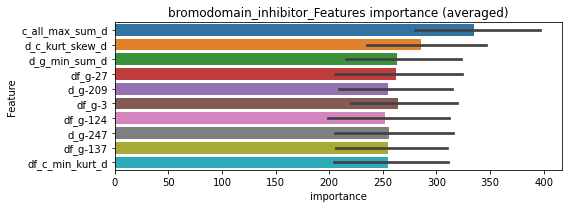

len(train_index) : 2817
len(valid_index) : 939
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0300118	valid_1's binary_logloss: 0.0608765
[2000]	training's binary_logloss: 0.0153637	valid_1's binary_logloss: 0.0485281
[3000]	training's binary_logloss: 0.0102299	valid_1's binary_logloss: 0.0441091
[4000]	training's binary_logloss: 0.00767347	valid_1's binary_logloss: 0.0419481
[5000]	training's binary_logloss: 0.00615437	valid_1's binary_logloss: 0.0407602
Early stopping, best iteration is:
[5387]	training's binary_logloss: 0.00570628	valid_1's binary_logloss: 0.0402666


len(train_index) : 2817
len(valid_index) : 939
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315026	valid_1's binary_logloss: 0.0510044
[2000]	training's binary_logloss: 0.0160655	valid_1's binary_logloss: 0.0387438
[3000]	training's binary_logloss: 0.0106984	valid_1's binary_logloss: 0.0342694
[4000]	training's binary_logloss: 0.00800315	valid_1's binary_logloss: 0.0321142
[5000]	training's binary_logloss: 0.00641689	valid_1's binary_logloss: 0.0308856
Early stopping, best iteration is:
[5913]	training's binary_logloss: 0.00542409	valid_1's binary_logloss: 0.0299503


len(train_index) : 2817
len(valid_index) : 939
================================= fold 3/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0309305	valid_1's binary_logloss: 0.0589866
[2000]	training's binary_logloss: 0.0157507	valid_1's binary_logloss: 0.0459855
[3000]	training's binary_logloss: 0.0105103	valid_1's binary_logloss: 0.0416414
[4000]	training's binary_logloss: 0.00787259	valid_1's binary_logloss: 0.0393299
Early stopping, best iteration is:
[4289]	training's binary_logloss: 0.00734875	valid_1's binary_logloss: 0.0388879


len(train_index) : 2817
len(valid_index) : 939
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0318545	valid_1's binary_logloss: 0.0515185
[2000]	training's binary_logloss: 0.0162787	valid_1's binary_logloss: 0.0385913
[3000]	training's binary_logloss: 0.0108164	valid_1's binary_logloss: 0.0338723
[4000]	training's binary_logloss: 0.00809031	valid_1's binary_logloss: 0.0313458
[5000]	training's binary_logloss: 0.00648816	valid_1's binary_logloss: 0.0299359
[6000]	training's binary_logloss: 0.00540515	valid_1's binary_logloss: 0.0288
Early stopping, best iteration is:
[6821]	training's binary_logloss: 0.00476764	valid_1's binary_logloss: 0.028263


bromodomain_inhibitor logloss: 0.03434195098859934
bromodomain_inhibitor is unpredictable(><)!
btk_inhibitor, len(trt): 29, len(othr): 3284
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3284


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00070919	valid_1's binary_logloss: 0.0284873
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000374487	valid_1's binary_logloss: 0.0146397
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000345282	valid_1's binary_logloss: 0.00183717
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000407541	valid_1's binary_logloss: 0.0133729


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016117, Threshold: 0.0057097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0057097, conf_0:0.00400, conf_1:0.00742
Num_p_label: 2.0, Expected: 4.8, Adj_threshold_1: 0.0357097
threshold: 0.0357097, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.000663497	valid_1's binary_logloss: 0.0270207
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000367391	valid_1's binary_logloss: 0.0140132
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000350427	valid_1's binary_logloss: 0.00121029
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000382634	valid_1's binary_logloss: 0.0123285


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0086981, Threshold: 0.0357097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00122
Num_p_label: 16.0, Expected: 4.8, Threshold: 0.0357097, conf_0:0.02857, conf_1:0.04285
Num_p_label: 8.0, Expected: 4.8, Adj_threshold_1: 0.0657097
threshold: 0.0657097, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.000663497	valid_1's binary_logloss: 0.0270207
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000367391	valid_1's binary_logloss: 0.0140132
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000350427	valid_1's binary_logloss: 0.00121029
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0086981, Threshold: 0.0657097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0020090 Vs.target_rate: 0.00122
Num_p_label: 8.0, Expected: 4.8, Threshold: 0.0657097, conf_0:0.05914, conf_1:0.07228
threshold: 0.0657097, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000382634	valid_1's binary_logloss: 0.0123285


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


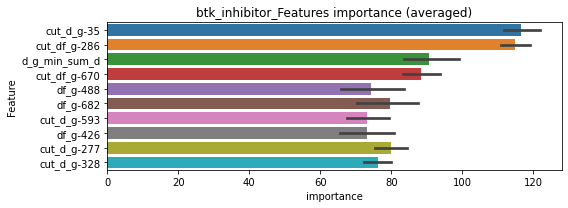

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 btk_inhibitor=================================


Early stopping, best iteration is:
[309]	training's binary_logloss: 0.000686475	valid_1's binary_logloss: 0.0235945
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 btk_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000478773	valid_1's binary_logloss: 0.0123177
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000351805	valid_1's binary_logloss: 0.00112362


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


btk_inhibitor logloss: 0.012209365158085742


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000406992	valid_1's binary_logloss: 0.0118016


calcineurin_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00023847	valid_1's binary_logloss: 0.00343587
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.000379102	valid_1's binary_logloss: 0.00692615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000213713	valid_1's binary_logloss: 0.000393171
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010151, Threshold: 0.0060390, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0060390, conf_0:0.00423, conf_1:0.00785
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.0360390
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0660390
threshold: 0.0660390, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000222845	valid_1's binary_logloss: 0.00459207


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000216136	valid_1's binary_logloss: 0.00315615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.000262376	valid_1's binary_logloss: 0.00545488
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000207775	valid_1's binary_logloss: 0.0002288
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0142450, Threshold: 0.0660390, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0075339 Vs.target_rate: 0.00050
Num_p_label: 30.0, Expected: 2.0, Threshold: 0.0660390, conf_0:0.05283, conf_1:0.07925
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_1: 0.0960390
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_2: 0.1260390
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_3: 0.1560390
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_4: 0.1860390
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_5: 0.2160390
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_6: 0.2460390
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_7: 0.2760390
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_8: 0.3060390
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_9: 0.3360390
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_10: 0.3660390


Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000214688	valid_1's binary_logloss: 0.00498846


threshold: 0.3660390, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000216136	valid_1's binary_logloss: 0.00315615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.000262376	valid_1's binary_logloss: 0.00545488
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000207775	valid_1's binary_logloss: 0.0002288
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0142450, Threshold: 0.3660390, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00050
Num_p_label: 11.0, Expected: 2.0, Threshold: 0.3660390, conf_0:0.32944, conf_1:0.40264
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_1: 0.3960390
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.4260390
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_3: 0.4560390
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.4860390
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.5160390
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.5460390
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_7: 0.5760390


Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000214688	valid_1's binary_logloss: 0.00498846


threshold: 0.5760390, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


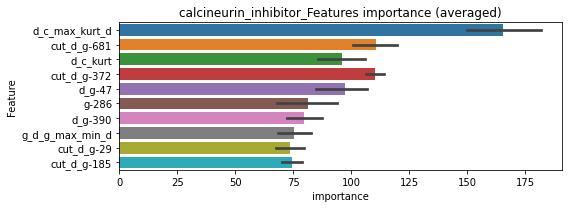

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000227634	valid_1's binary_logloss: 0.00360594
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000238459	valid_1's binary_logloss: 0.00408564
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000228386	valid_1's binary_logloss: 0.000244214
Training until validation scores don't improve for 30 rounds


calcineurin_inhibitor logloss: 0.0027756426336381997


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000239809	valid_1's binary_logloss: 0.00316677
mutually exclusive columns: calcium_channel_blocker


calcium_channel_blocker, len(trt): 281, len(othr): 6395
target_rate: 0.0117998 → Adj_target_rate: 0.0101297


selected negative label: 6395


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0458433	valid_1's binary_logloss: 0.146243
Early stopping, best iteration is:
[1173]	training's binary_logloss: 0.0388947	valid_1's binary_logloss: 0.14512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.0475944	valid_1's binary_logloss: 0.148553
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0470992	valid_1's binary_logloss: 0.130892
Early stopping, best iteration is:
[1299]	training's binary_logloss: 0.0358184	valid_1's binary_logloss: 0.128503
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.0466189	valid_1's binary_logloss: 0.146692


1 / 3, AUC score:0.950, PR-AUC:0.911
y_Threshold: 0.0669582, Threshold: 0.1019206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 602 → Positive_corect_labels: 1106/7072
p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, Expected: 47.0, Threshold: 0.1019206, conf_0:0.07134, conf_1:0.13250
threshold: 0.1019206, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1106.0/7072, y_label_rate: 0.1563914
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0250442	valid_1's binary_logloss: 0.07149
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.018574	valid_1's binary_logloss: 0.0691808
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0252393	valid_1's binary_logloss: 0.0688402
Early stopping, best iteration is:
[1647]	training's binary_logloss: 0.0149654	valid_1's binary_logloss: 0.0645359
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0251521	valid_1's binary_logloss: 0.0667843
Early stopping, best iteration is:
[1489]	training's binary_logloss: 0.0166365	valid_1's binary_logloss: 0.0633615
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0254016	valid_1's binary_logloss: 0.0647307
Early stopping, best iteration is:
[1532]	training's binary_logloss: 0.0162709	valid_1's binar

2 / 3, AUC score:0.995, PR-AUC:0.983
y_Threshold: 0.0542361, Threshold: 0.1019206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 126 → Positive_corect_labels: 1043.0/6946
p_label_rate: 0.0032647 Vs.target_rate: 0.01180
Num_p_label: 13.0, Expected: 47.0, Threshold: 0.1019206, conf_0:0.08154, conf_1:0.12230
threshold: 0.1019206, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 1043.0/6946, y_label_rate: 0.1501584
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0170119	valid_1's binary_logloss: 0.031864
[2000]	training's binary_logloss: 0.00839359	valid_1's binary_logloss: 0.0263329
[3000]	training's binary_logloss: 0.00552301	valid_1's binary_logloss: 0.0247121
Early stopping, best iteration is:
[3770]	training's binary_logloss: 0.00435081	valid_1's binary_logloss: 0.0240478
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0165257	valid_1's binary_logloss: 0.0373021
[2000]	training's binary_logloss: 0.00819421	valid_1's binary_logloss: 0.0324498
Early stopping, best iteration is:
[2100]	training's binary_logloss: 0.00779203	valid_1's binary_logloss: 0.0321933
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0163845	valid_1's binary_logloss: 0.0438557
[2000]	training's binary_logloss: 0.00810952	valid_1's binary_logloss: 0.0391872
Early stopping, best i

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0373138, Threshold: 0.1019206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 1015.0/6890
p_label_rate: 0.0015068 Vs.target_rate: 0.01180
Num_p_label: 6.0, Expected: 47.0, Threshold: 0.1019206, conf_0:0.09173, conf_1:0.11211
threshold: 0.1019206, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 1015.0/6890, y_label_rate: 0.1473149


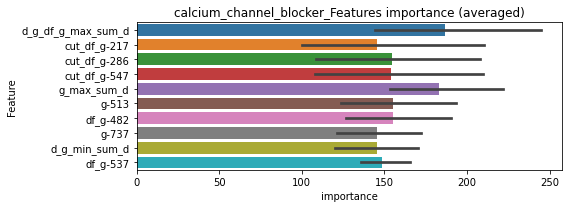

len(train_index) : 5167
len(valid_index) : 1723
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0182353	valid_1's binary_logloss: 0.0262759
[2000]	training's binary_logloss: 0.00930964	valid_1's binary_logloss: 0.0168931
[3000]	training's binary_logloss: 0.00625741	valid_1's binary_logloss: 0.0138498
[4000]	training's binary_logloss: 0.00470959	valid_1's binary_logloss: 0.0122432
[5000]	training's binary_logloss: 0.00378118	valid_1's binary_logloss: 0.0112479
[6000]	training's binary_logloss: 0.0031612	valid_1's binary_logloss: 0.0105373
[7000]	training's binary_logloss: 0.00271851	valid_1's binary_logloss: 0.0100511
[8000]	training's binary_logloss: 0.00239117	valid_1's binary_logloss: 0.00968638
[9000]	training's binary_logloss: 0.00213414	valid_1's binary_logloss: 0.009405
[10000]	training's binary_logloss: 0.00193167	valid_1's binary_logloss: 0.00918473
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00193167	valid_1's binary_logloss: 0.0091847

len(train_index) : 5167
len(valid_index) : 1723
================================= fold 2/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0181412	valid_1's binary_logloss: 0.0250122
[2000]	training's binary_logloss: 0.00925595	valid_1's binary_logloss: 0.0161967
[3000]	training's binary_logloss: 0.0061736	valid_1's binary_logloss: 0.0130942
[4000]	training's binary_logloss: 0.00464128	valid_1's binary_logloss: 0.0116188
[5000]	training's binary_logloss: 0.0037259	valid_1's binary_logloss: 0.0107522
[6000]	training's binary_logloss: 0.00311567	valid_1's binary_logloss: 0.0101156
[7000]	training's binary_logloss: 0.0026766	valid_1's binary_logloss: 0.00968476
[8000]	training's binary_logloss: 0.00235289	valid_1's binary_logloss: 0.00934542
[9000]	training's binary_logloss: 0.00210238	valid_1's binary_logloss: 0.00908991
Early stopping, best iteration is:
[9302]	training's binary_logloss: 0.00203683	valid_1's binary_logloss: 0.00901668


len(train_index) : 5168
len(valid_index) : 1722
================================= fold 3/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0167321	valid_1's binary_logloss: 0.0346999
[2000]	training's binary_logloss: 0.00846301	valid_1's binary_logloss: 0.0271979
[3000]	training's binary_logloss: 0.00567454	valid_1's binary_logloss: 0.0249849
[4000]	training's binary_logloss: 0.00426931	valid_1's binary_logloss: 0.024015
Early stopping, best iteration is:
[4038]	training's binary_logloss: 0.00422817	valid_1's binary_logloss: 0.0239848


len(train_index) : 5168
len(valid_index) : 1722
================================= fold 4/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0181838	valid_1's binary_logloss: 0.0237799
[2000]	training's binary_logloss: 0.00926308	valid_1's binary_logloss: 0.0152967
[3000]	training's binary_logloss: 0.00622737	valid_1's binary_logloss: 0.0126354
[4000]	training's binary_logloss: 0.0046899	valid_1's binary_logloss: 0.0113091
[5000]	training's binary_logloss: 0.00376629	valid_1's binary_logloss: 0.0105137
[6000]	training's binary_logloss: 0.00314809	valid_1's binary_logloss: 0.0100026
[7000]	training's binary_logloss: 0.00270574	valid_1's binary_logloss: 0.00964465
[8000]	training's binary_logloss: 0.002378	valid_1's binary_logloss: 0.00937865
[9000]	training's binary_logloss: 0.0021239	valid_1's binary_logloss: 0.00918173
Early stopping, best iteration is:
[9304]	training's binary_logloss: 0.00205733	valid_1's binary_logloss: 0.00912899


calcium_channel_blocker logloss: 0.012827722245155894
cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00205699	valid_1's binary_logloss: 0.0507103
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000632464	valid_1's binary_logloss: 0.0155827
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000516316	valid_1's binary_logloss: 0.00527097
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039249, Threshold: 0.0113540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0113540, conf_0:0.00795, conf_1:0.01476


Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000593414	valid_1's binary_logloss: 0.0251854


Num_p_label: 5.0, Expected: 7.0, Adj_threshold_1: 0.0413540
threshold: 0.0413540, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.0020082	valid_1's binary_logloss: 0.0505889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000507446	valid_1's binary_logloss: 0.0150135
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000427494	valid_1's binary_logloss: 0.00380206
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0170647, Threshold: 0.0413540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000548576	valid_1's binary_logloss: 0.0246373


p_label_rate: 0.0052737 Vs.target_rate: 0.00176
Num_p_label: 21.0, Expected: 7.0, Threshold: 0.0413540, conf_0:0.03308, conf_1:0.04962
Num_p_label: 8.0, Expected: 7.0, Adj_threshold_1: 0.0713540
threshold: 0.0713540, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00062401	valid_1's binary_logloss: 0.0327893
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00046332	valid_1's binary_logloss: 0.0140559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000546499	valid_1's binary_logloss: 0.0100522
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0146536, Threshold: 0.0713540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0022602 Vs.target_rate: 0.00176
Num_p_label: 9.0, Expected: 7.0, Threshold: 0.0713540, conf_0:0.06422, conf_1:0.07849
threshold: 0.0713540, positive_p_label: 9.0/3982, p_label_rate: 0.0022602


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000876752	valid_1's binary_logloss: 0.0287014


positive_y_label: 652.0/3800, y_label_rate: 0.1715789


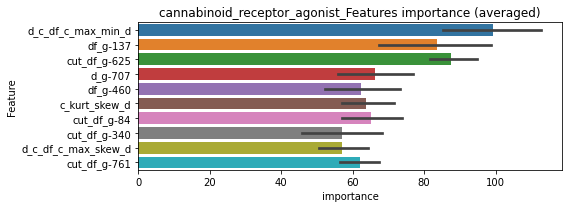

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000625167	valid_1's binary_logloss: 0.0156736


================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Early stopping, best iteration is:
[340]	training's binary_logloss: 0.000830452	valid_1's binary_logloss: 0.0228225
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000683835	valid_1's binary_logloss: 0.0149452
Training until validation scores don't improve for 30 rounds


cannabinoid_receptor_agonist logloss: 0.020684282601819613


Early stopping, best iteration is:
[229]	training's binary_logloss: 0.00131541	valid_1's binary_logloss: 0.0292959


cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3284
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.020714	valid_1's binary_logloss: 0.0683186
[2000]	training's binary_logloss: 0.010073	valid_1's binary_logloss: 0.0614707
Early stopping, best iteration is:
[2363]	training's binary_logloss: 0.00847301	valid_1's binary_logloss: 0.0603785
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0215018	valid_1's binary_logloss: 0.0539293
[2000]	training's binary_logloss: 0.0104956	valid_1's binary_logloss: 0.0444826
[3000]	training's binary_logloss: 0.00689517	valid_1's binary_logloss: 0.0413713
Early stopping, best iteration is:
[3402]	training's binary_logloss: 0.00606303	valid_1's binary_logloss: 0.0405776
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0232393	valid_1's binary_logloss: 0.0273244
[2000]	training's binary_logloss: 0.0112752	valid_1's binary_logloss: 0.0182647
[3000]	training's binary_l

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0173169, Threshold: 0.0421286, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0421286, conf_0:0.02949, conf_1:0.05477
Num_p_label: 12.0, Expected: 9.2, Adj_threshold_1: 0.0721286
threshold: 0.0721286, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0205447	valid_1's binary_logloss: 0.0650148
[2000]	training's binary_logloss: 0.0100214	valid_1's binary_logloss: 0.0580202
Early stopping, best iteration is:
[2732]	training's binary_logloss: 0.00725587	valid_1's binary_logloss: 0.0562824
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0223732	valid_1's binary_logloss: 0.0400076
[2000]	training's binary_logloss: 0.0108511	valid_1's binary_logloss: 0.0303835
[3000]	training's binary_logloss: 0.00709045	valid_1's binary_logloss: 0.0268993
[4000]	training's binary_logloss: 0.0052807	valid_1's binary_logloss: 0.0252021
[5000]	training's binary_logloss: 0.00422238	valid_1's binary_logloss: 0.0240322
[6000]	training's binary_logloss: 0.00352702	valid_1's binary_logloss: 0.0231793
[7000]	training's binary_logloss: 0.00303544	valid_1's binary_logloss: 0.0225397
[8000]	training's binary_logloss: 0.00

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0304114, Threshold: 0.0721286, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0057760 Vs.target_rate: 0.00231
Num_p_label: 23.0, Expected: 9.2, Threshold: 0.0721286, conf_0:0.05770, conf_1:0.08655
Num_p_label: 10.0, Expected: 9.2, Adj_threshold_1: 0.1021286
threshold: 0.1021286, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0208678	valid_1's binary_logloss: 0.053269
[2000]	training's binary_logloss: 0.0102078	valid_1's binary_logloss: 0.0457392
[3000]	training's binary_logloss: 0.00672186	valid_1's binary_logloss: 0.0428256
Early stopping, best iteration is:
[3062]	training's binary_logloss: 0.0065859	valid_1's binary_logloss: 0.0427414
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0212037	valid_1's binary_logloss: 0.0448937
[2000]	training's binary_logloss: 0.0103898	valid_1's binary_logloss: 0.0350002
[3000]	training's binary_logloss: 0.00680351	valid_1's binary_logloss: 0.0311112
[4000]	training's binary_logloss: 0.00507067	valid_1's binary_logloss: 0.029194
Early stopping, best iteration is:
[4355]	training's binary_logloss: 0.00465626	valid_1's binary_logloss: 0.0287231
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0362515, Threshold: 0.1021286, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0032647 Vs.target_rate: 0.00231
Num_p_label: 13.0, Expected: 9.2, Threshold: 0.1021286, conf_0:0.09192, conf_1:0.11234
threshold: 0.1021286, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


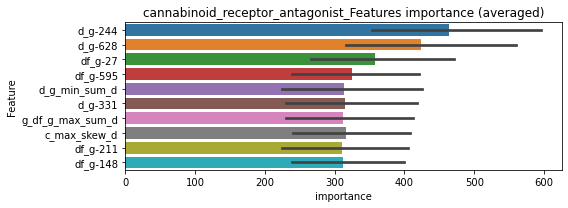

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0296903	valid_1's binary_logloss: 0.0538676
[2000]	training's binary_logloss: 0.0149754	valid_1's binary_logloss: 0.0428082
[3000]	training's binary_logloss: 0.00991437	valid_1's binary_logloss: 0.0391188
[4000]	training's binary_logloss: 0.00738029	valid_1's binary_logloss: 0.0371906
Early stopping, best iteration is:
[4302]	training's binary_logloss: 0.00685013	valid_1's binary_logloss: 0.0367533


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0292784	valid_1's binary_logloss: 0.0599211
[2000]	training's binary_logloss: 0.0148176	valid_1's binary_logloss: 0.048705
[3000]	training's binary_logloss: 0.00980086	valid_1's binary_logloss: 0.0445095
[4000]	training's binary_logloss: 0.00729285	valid_1's binary_logloss: 0.0426732
Early stopping, best iteration is:
[4283]	training's binary_logloss: 0.00680238	valid_1's binary_logloss: 0.0422982


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0305056	valid_1's binary_logloss: 0.0450296
[2000]	training's binary_logloss: 0.0154314	valid_1's binary_logloss: 0.032968
[3000]	training's binary_logloss: 0.0101989	valid_1's binary_logloss: 0.028938
[4000]	training's binary_logloss: 0.0075897	valid_1's binary_logloss: 0.026819
[5000]	training's binary_logloss: 0.00605819	valid_1's binary_logloss: 0.0255238
[6000]	training's binary_logloss: 0.00504051	valid_1's binary_logloss: 0.0246465
Early stopping, best iteration is:
[6921]	training's binary_logloss: 0.00437235	valid_1's binary_logloss: 0.0240481


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0299115	valid_1's binary_logloss: 0.0544231
[2000]	training's binary_logloss: 0.0151548	valid_1's binary_logloss: 0.0425698
[3000]	training's binary_logloss: 0.0100355	valid_1's binary_logloss: 0.0385059
[4000]	training's binary_logloss: 0.00746093	valid_1's binary_logloss: 0.0363735
[5000]	training's binary_logloss: 0.00595765	valid_1's binary_logloss: 0.0350568
Early stopping, best iteration is:
[5552]	training's binary_logloss: 0.00535159	valid_1's binary_logloss: 0.0344732


cannabinoid_receptor_antagonist logloss: 0.03439322172416269
cannabinoid_receptor_antagonist is unpredictable(><)!
carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000394454	valid_1's binary_logloss: 0.0254158
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000459761	valid_1's binary_logloss: 0.013397
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000410397	valid_1's binary_logloss: 0.00360654
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020748, Threshold: 0.0112999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0112999, conf_0:0.00791, conf_1:0.01469
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_1: 0.0412999
threshold: 0.0412999, positive_p_label: 13.0/3982, p_label_rate: 0.0032647


Early stopping, best iteration is:
[353]	training's binary_logloss: 0.000881613	valid_1's binary_logloss: 0.0278738


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000495696	valid_1's binary_logloss: 0.0260057
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000435659	valid_1's binary_logloss: 0.013666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000455437	valid_1's binary_logloss: 0.00317608
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0145677, Threshold: 0.0412999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0102963 Vs.target_rate: 0.00151
Num_p_label: 41.0, Expected: 6.0, Threshold: 0.0412999, conf_0:0.03304, conf_1:0.04956
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_1: 0.0712999
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_2: 0.1012999
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.1312999
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_4: 0.1612999


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000516431	valid_1's binary_logloss: 0.0274851


threshold: 0.1612999, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000495696	valid_1's binary_logloss: 0.0260057
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000435659	valid_1's binary_logloss: 0.013666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000455437	valid_1's binary_logloss: 0.00317608
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0145677, Threshold: 0.1612999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.1612999, conf_0:0.14517, conf_1:0.17743
threshold: 0.1612999, positive_p_label: 14.0/3982, p_label_rate: 0.0035158


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000516431	valid_1's binary_logloss: 0.0274851


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


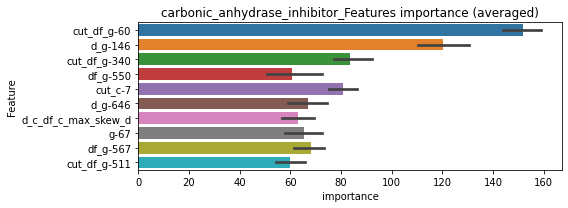

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000459056	valid_1's binary_logloss: 0.0244091
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000535803	valid_1's binary_logloss: 0.0118436
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000427029	valid_1's binary_logloss: 0.00342341


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


carbonic_anhydrase_inhibitor logloss: 0.016026201735827826


Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000882715	valid_1's binary_logloss: 0.0244287


casein_kinase_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3282


N_features:504
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000628372	valid_1's binary_logloss: 0.0364815
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000587311	valid_1's binary_logloss: 0.017584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000397434	valid_1's binary_logloss: 0.00256718
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017086, Threshold: 0.0029374, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0029374, conf_0:0.00206, conf_1:0.00382
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_1: 0.0329374
threshold: 0.0329374, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000512678	valid_1's binary_logloss: 0.0266191


positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00043076	valid_1's binary_logloss: 0.0345579
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000384616	valid_1's binary_logloss: 0.0158675
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000390574	valid_1's binary_logloss: 0.00268423
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0072261, Threshold: 0.0329374, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0002511 Vs.target_rate: 0.00151
Num_p_label: 1.0, Expected: 6.0, Threshold: 0.0329374, conf_0:0.02635, conf_1:0.03952
threshold: 0.0329374, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000515061	valid_1's binary_logloss: 0.022922


positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000413633	valid_1's binary_logloss: 0.0237374
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000516089	valid_1's binary_logloss: 0.00947011
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000424896	valid_1's binary_logloss: 0.0135577
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0110762, Threshold: 0.0329374, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0002511 Vs.target_rate: 0.00151
Num_p_label: 1.0, Expected: 6.0, Threshold: 0.0329374, conf_0:0.02964, conf_1:0.03623
threshold: 0.0329374, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000462609	valid_1's binary_logloss: 0.022939


positive_y_label: 655.0/3804, y_label_rate: 0.1721872


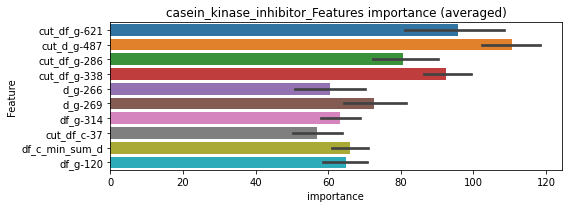

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 casein_kinase_inhibitor=================================


Early stopping, best iteration is:
[308]	training's binary_logloss: 0.000803248	valid_1's binary_logloss: 0.0216973
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 casein_kinase_inhibitor=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000460833	valid_1's binary_logloss: 0.00931729
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000558478	valid_1's binary_logloss: 0.0102969
Training until validation scores don't improve for 30 rounds


casein_kinase_inhibitor logloss: 0.01573755516148653


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000645133	valid_1's binary_logloss: 0.0216387


caspase_activator, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000366596	valid_1's binary_logloss: 0.0114085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000312309	valid_1's binary_logloss: 0.00976786
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000272683	valid_1's binary_logloss: 0.00307171
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010858, Threshold: 0.0205641, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0205641, conf_0:0.01439, conf_1:0.02673
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.0505641
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_2: 0.0805641
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_3: 0.1105641
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_4: 0.1405641
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.1705641
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_6: 0.2005641


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000272372	valid_1's binary_logloss: 0.00447374


threshold: 0.2005641, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000702607	valid_1's binary_logloss: 0.0112666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000291503	valid_1's binary_logloss: 0.00822989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000273479	valid_1's binary_logloss: 0.0018567
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0109079, Threshold: 0.2005641, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0120542 Vs.target_rate: 0.00076
Num_p_label: 48.0, Expected: 3.0, Threshold: 0.2005641, conf_0:0.16045, conf_1:0.24068
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_1: 0.2305641
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_2: 0.2605641
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_3: 0.2905641
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_4: 0.3205641
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_5: 0.3505641
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_6: 0.3805641
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_7: 0.4105641
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_8: 0.4405641
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_9: 0.4705641


Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000267465	valid_1's binary_logloss: 0.00326625


Num_p_label: 21.0, Expected: 3.0, Adj_threshold_10: 0.5005641
threshold: 0.5005641, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000702607	valid_1's binary_logloss: 0.0112666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000291503	valid_1's binary_logloss: 0.00822989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000273479	valid_1's binary_logloss: 0.0018567
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0109079, Threshold: 0.5005641, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0052737 Vs.target_rate: 0.00076
Num_p_label: 21.0, Expected: 3.0, Threshold: 0.5005641, conf_0:0.45051, conf_1:0.55062
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.5305641
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.5605641
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.5905641
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_4: 0.6205641
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_5: 0.6505641
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.6805641
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_7: 0.7105641
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_8: 0.7405641


Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000267465	valid_1's binary_logloss: 0.00326625


threshold: 0.7405641, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


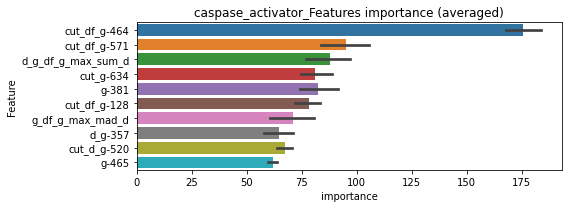

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000332091	valid_1's binary_logloss: 0.00837947
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 caspase_activator=================================


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000353175	valid_1's binary_logloss: 0.00811617
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 caspase_activator=================================


Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000284101	valid_1's binary_logloss: 0.00130706
Training until validation scores don't improve for 30 rounds


caspase_activator logloss: 0.005177290868750588


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00029494	valid_1's binary_logloss: 0.00289904


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000361531	valid_1's binary_logloss: 0.00947122
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.0010814	valid_1's binary_logloss: 0.0115752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000277019	valid_1's binary_logloss: 0.000361499
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014567, Threshold: 0.0054700, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0054700, conf_0:0.00383, conf_1:0.00711
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_1: 0.0354700
threshold: 0.0354700, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000363896	valid_1's binary_logloss: 0.0129017


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000275309	valid_1's binary_logloss: 0.0068014
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00108627	valid_1's binary_logloss: 0.0110202
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000270136	valid_1's binary_logloss: 0.000305813
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0116758, Threshold: 0.0354700, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00076
Num_p_label: 13.0, Expected: 3.0, Threshold: 0.0354700, conf_0:0.02838, conf_1:0.04256
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0654700
threshold: 0.0654700, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000353809	valid_1's binary_logloss: 0.011275


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000275309	valid_1's binary_logloss: 0.0068014
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00108627	valid_1's binary_logloss: 0.0110202
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000270136	valid_1's binary_logloss: 0.000305813
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0116758, Threshold: 0.0654700, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0654700, conf_0:0.05892, conf_1:0.07202
threshold: 0.0654700, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000353809	valid_1's binary_logloss: 0.011275


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


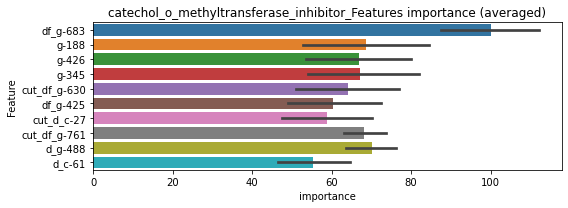

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000288417	valid_1's binary_logloss: 0.00579465
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000427361	valid_1's binary_logloss: 0.00936822
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000277883	valid_1's binary_logloss: 0.000315281
Training until validation scores don't improve for 30 rounds


catechol_o_methyltransferase_inhibitor logloss: 0.006333011350880781


Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000426625	valid_1's binary_logloss: 0.00985389


cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3277
target_rate: 0.0042832 → Adj_target_rate: 0.0042806


selected negative label: 3277


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0329149	valid_1's binary_logloss: 0.124395
Early stopping, best iteration is:
[1173]	training's binary_logloss: 0.028095	valid_1's binary_logloss: 0.122622
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0349616	valid_1's binary_logloss: 0.0994852
[2000]	training's binary_logloss: 0.0171196	valid_1's binary_logloss: 0.089531
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0162386	valid_1's binary_logloss: 0.0889547
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0360979	valid_1's binary_logloss: 0.0784131
[2000]	training's binary_logloss: 0.0176297	valid_1's binary_logloss: 0.0692672
Early stopping, best iteration is:
[2689]	training's binary_logloss: 0.0129179	valid_1's binary_logloss: 0.0671154
Training until validation scores don't improve for 30 rounds
[1000]	training

1 / 3, AUC score:0.989, PR-AUC:0.973
y_Threshold: 0.0436529, Threshold: 0.0979594, pos_neg_ratio: 0.8000000
Remove_noisy_data: 196 → Positive_corect_labels: 623/3736
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, Expected: 17.1, Threshold: 0.0979594, conf_0:0.06857, conf_1:0.12735
Num_p_label: 22.0, Expected: 17.1, Adj_threshold_1: 0.1279594
threshold: 0.1279594, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 623.0/3736, y_label_rate: 0.1667559
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270232	valid_1's binary_logloss: 0.0787113
[2000]	training's binary_logloss: 0.013379	valid_1's binary_logloss: 0.0711509
Early stopping, best iteration is:
[2014]	training's binary_logloss: 0.0132802	valid_1's binary_logloss: 0.0710123
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0276684	valid_1's binary_logloss: 0.0679589
[2000]	training's binary_logloss: 0.0137245	valid_1's binary_logloss: 0.0586255
Early stopping, best iteration is:
[2287]	training's binary_logloss: 0.01197	valid_1's binary_logloss: 0.057452
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0292099	valid_1's binary_logloss: 0.0502799
[2000]	training's binary_logloss: 0.0144981	valid_1's binary_logloss: 0.0402251
[3000]	training's binary_logloss: 0.00957484	valid_1's binary_logloss: 0.0367777
Early stopping, best iteration

2 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0545253, Threshold: 0.1279594, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 603.0/3696
p_label_rate: 0.0128076 Vs.target_rate: 0.00428
Num_p_label: 51.0, Expected: 17.1, Threshold: 0.1279594, conf_0:0.10237, conf_1:0.15355
Num_p_label: 32.0, Expected: 17.1, Adj_threshold_1: 0.1579594
Num_p_label: 17.0, Expected: 17.1, Adj_threshold_2: 0.1879594
threshold: 0.1879594, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 603.0/3696, y_label_rate: 0.1631494
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0224099	valid_1's binary_logloss: 0.0716486
[2000]	training's binary_logloss: 0.011239	valid_1's binary_logloss: 0.0648464
Early stopping, best iteration is:
[2058]	training's binary_logloss: 0.0109169	valid_1's binary_logloss: 0.0646577
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248975	valid_1's binary_logloss: 0.0454005
[2000]	training's binary_logloss: 0.0124053	valid_1's binary_logloss: 0.0351028
[3000]	training's binary_logloss: 0.00821765	valid_1's binary_logloss: 0.0315048
Early stopping, best iteration is:
[3260]	training's binary_logloss: 0.00755881	valid_1's binary_logloss: 0.0309518
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0244507	valid_1's binary_logloss: 0.0488489
[2000]	training's binary_logloss: 0.0121612	valid_1's binary_logloss: 0.0400114
[3000]	training's binary_l

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0523846, Threshold: 0.1879594, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 589.0/3668
p_label_rate: 0.0050226 Vs.target_rate: 0.00428
Num_p_label: 20.0, Expected: 17.1, Threshold: 0.1879594, conf_0:0.16916, conf_1:0.20676
threshold: 0.1879594, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 589.0/3668, y_label_rate: 0.1605780


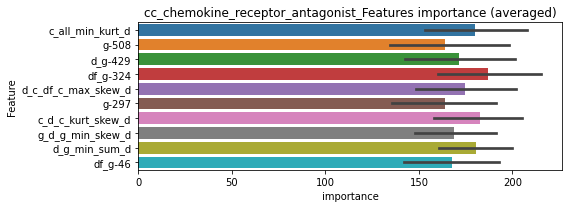

len(train_index) : 2751
len(valid_index) : 917
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0308747	valid_1's binary_logloss: 0.0497799
[2000]	training's binary_logloss: 0.0157993	valid_1's binary_logloss: 0.0364488
[3000]	training's binary_logloss: 0.0105847	valid_1's binary_logloss: 0.0318916
[4000]	training's binary_logloss: 0.00793541	valid_1's binary_logloss: 0.029655
[5000]	training's binary_logloss: 0.00636988	valid_1's binary_logloss: 0.0282699
[6000]	training's binary_logloss: 0.00532475	valid_1's binary_logloss: 0.0273054
Early stopping, best iteration is:
[6860]	training's binary_logloss: 0.00467981	valid_1's binary_logloss: 0.0267469


len(train_index) : 2751
len(valid_index) : 917
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0298638	valid_1's binary_logloss: 0.0570238
[2000]	training's binary_logloss: 0.015277	valid_1's binary_logloss: 0.0456456
[3000]	training's binary_logloss: 0.0102186	valid_1's binary_logloss: 0.0420467
Early stopping, best iteration is:
[3332]	training's binary_logloss: 0.00919165	valid_1's binary_logloss: 0.041353


len(train_index) : 2751
len(valid_index) : 917
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0305541	valid_1's binary_logloss: 0.0466088
[2000]	training's binary_logloss: 0.0156959	valid_1's binary_logloss: 0.0330592
[3000]	training's binary_logloss: 0.0105514	valid_1's binary_logloss: 0.0284369
[4000]	training's binary_logloss: 0.00792819	valid_1's binary_logloss: 0.026092
[5000]	training's binary_logloss: 0.00638174	valid_1's binary_logloss: 0.0248595
Early stopping, best iteration is:
[5901]	training's binary_logloss: 0.00541916	valid_1's binary_logloss: 0.0239898


len(train_index) : 2751
len(valid_index) : 917
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0304533	valid_1's binary_logloss: 0.0553643
[2000]	training's binary_logloss: 0.0156205	valid_1's binary_logloss: 0.0420555
[3000]	training's binary_logloss: 0.0104532	valid_1's binary_logloss: 0.0375559
Early stopping, best iteration is:
[3537]	training's binary_logloss: 0.00887652	valid_1's binary_logloss: 0.0361949


cc_chemokine_receptor_antagonist logloss: 0.03207115272482003
cc_chemokine_receptor_antagonist is unpredictable(><)!
cck_receptor_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000293533	valid_1's binary_logloss: 0.00539989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000289687	valid_1's binary_logloss: 0.0146641
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000285944	valid_1's binary_logloss: 0.000684449
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010925, Threshold: 0.0017675, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0017675, conf_0:0.00124, conf_1:0.00230
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0317675
threshold: 0.0317675, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[312]	training's binary_logloss: 0.000600593	valid_1's binary_logloss: 0.0100556


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000287907	valid_1's binary_logloss: 0.00504116
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00028766	valid_1's binary_logloss: 0.0131082
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000284809	valid_1's binary_logloss: 0.000959792
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0084587, Threshold: 0.0317675, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, Expected: 3.0, Threshold: 0.0317675, conf_0:0.02541, conf_1:0.03812
threshold: 0.0317675, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[313]	training's binary_logloss: 0.000603576	valid_1's binary_logloss: 0.00974676


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000287907	valid_1's binary_logloss: 0.00504116
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00028766	valid_1's binary_logloss: 0.0131082
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000284809	valid_1's binary_logloss: 0.000959792
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0084587, Threshold: 0.0317675, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, Expected: 3.0, Threshold: 0.0317675, conf_0:0.02859, conf_1:0.03494
threshold: 0.0317675, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[313]	training's binary_logloss: 0.000603576	valid_1's binary_logloss: 0.00974676


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


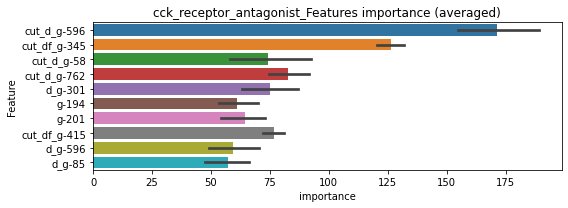

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000333529	valid_1's binary_logloss: 0.00491588
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 cck_receptor_antagonist=================================


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000310971	valid_1's binary_logloss: 0.0108923
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 cck_receptor_antagonist=================================


Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000299497	valid_1's binary_logloss: 0.00104085
Training until validation scores don't improve for 30 rounds


cck_receptor_antagonist logloss: 0.006207073628113122


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00037043	valid_1's binary_logloss: 0.00797473
mutually exclusive columns: cdk_inhibitor


cdk_inhibitor, len(trt): 352, len(othr): 7583
target_rate: 0.0147812 → Adj_target_rate: 0.0122676


selected negative label: 7583


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0489014	valid_1's binary_logloss: 0.147175
Early stopping, best iteration is:
[1401]	training's binary_logloss: 0.0343095	valid_1's binary_logloss: 0.143997
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0491808	valid_1's binary_logloss: 0.139413
Early stopping, best iteration is:
[1421]	training's binary_logloss: 0.0339879	valid_1's binary_logloss: 0.134795
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0481388	valid_1's binary_logloss: 0.146474
Early stopping, best iteration is:
[1335]	training's binary_logloss: 0.0356143	valid_1's binary_logloss: 0.142741
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.04798	valid_1's binary_logloss: 0.154886
Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.043047	valid_1's binary_loglo

1 / 3, AUC score:0.956, PR-AUC:0.920
y_Threshold: 0.0673106, Threshold: 0.1080449, pos_neg_ratio: 0.8000000
Remove_noisy_data: 682 → Positive_corect_labels: 1327/8417
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, Expected: 58.9, Threshold: 0.1080449, conf_0:0.07563, conf_1:0.14046
threshold: 0.1080449, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1327.0/8417, y_label_rate: 0.1576571
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0302263	valid_1's binary_logloss: 0.0766934
Early stopping, best iteration is:
[1940]	training's binary_logloss: 0.0151197	valid_1's binary_logloss: 0.0690481
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0295013	valid_1's binary_logloss: 0.088256
Early stopping, best iteration is:
[1543]	training's binary_logloss: 0.0188016	valid_1's binary_logloss: 0.0839603
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0308727	valid_1's binary_logloss: 0.0752919
[2000]	training's binary_logloss: 0.0148439	valid_1's binary_logloss: 0.0668663
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0140657	valid_1's binary_logloss: 0.0663943
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0299927	valid_1's binary_logloss: 0.083143
[2000]	traini

2 / 3, AUC score:0.994, PR-AUC:0.982
y_Threshold: 0.0609432, Threshold: 0.1080449, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 1245.0/8253
p_label_rate: 0.0062783 Vs.target_rate: 0.01478
Num_p_label: 25.0, Expected: 58.9, Threshold: 0.1080449, conf_0:0.08644, conf_1:0.12965
threshold: 0.1080449, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 1245.0/8253, y_label_rate: 0.1508542
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0215127	valid_1's binary_logloss: 0.0464184
[2000]	training's binary_logloss: 0.0105189	valid_1's binary_logloss: 0.0398431
Early stopping, best iteration is:
[2557]	training's binary_logloss: 0.00811597	valid_1's binary_logloss: 0.0384453
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.020999	valid_1's binary_logloss: 0.0550752
Early stopping, best iteration is:
[1927]	training's binary_logloss: 0.0107133	valid_1's binary_logloss: 0.0486296
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0224108	valid_1's binary_logloss: 0.0372714
[2000]	training's binary_logloss: 0.0109249	valid_1's binary_logloss: 0.0294431
[3000]	training's binary_logloss: 0.00713866	valid_1's binary_logloss: 0.0266971
Early stopping, best iteration is:
[3910]	training's binary_logloss: 0.0054096	valid_1's binary_logloss: 0

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0459336, Threshold: 0.1080449, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 1210.0/8183
p_label_rate: 0.0042692 Vs.target_rate: 0.01478
Num_p_label: 17.0, Expected: 58.9, Threshold: 0.1080449, conf_0:0.09724, conf_1:0.11885
threshold: 0.1080449, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 1210.0/8183, y_label_rate: 0.1478675


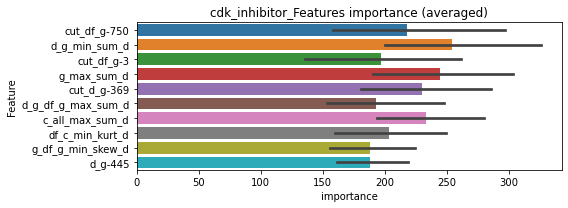

len(train_index) : 6137
len(valid_index) : 2046
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0232928	valid_1's binary_logloss: 0.0455518
[2000]	training's binary_logloss: 0.0121888	valid_1's binary_logloss: 0.0360956
[3000]	training's binary_logloss: 0.0081474	valid_1's binary_logloss: 0.0326413
Early stopping, best iteration is:
[3584]	training's binary_logloss: 0.00680643	valid_1's binary_logloss: 0.031667


len(train_index) : 6137
len(valid_index) : 2046
================================= fold 2/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0233923	valid_1's binary_logloss: 0.0454484
[2000]	training's binary_logloss: 0.0119821	valid_1's binary_logloss: 0.0362659
[3000]	training's binary_logloss: 0.00797009	valid_1's binary_logloss: 0.0331239
Early stopping, best iteration is:
[3138]	training's binary_logloss: 0.00760913	valid_1's binary_logloss: 0.0328386


len(train_index) : 6137
len(valid_index) : 2046
================================= fold 3/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0250638	valid_1's binary_logloss: 0.0354517
[2000]	training's binary_logloss: 0.0129121	valid_1's binary_logloss: 0.0251586
[3000]	training's binary_logloss: 0.00855747	valid_1's binary_logloss: 0.0213315
[4000]	training's binary_logloss: 0.00637724	valid_1's binary_logloss: 0.0193358
[5000]	training's binary_logloss: 0.00508983	valid_1's binary_logloss: 0.0181597
[6000]	training's binary_logloss: 0.00423039	valid_1's binary_logloss: 0.0172422
Early stopping, best iteration is:
[6326]	training's binary_logloss: 0.00401255	valid_1's binary_logloss: 0.0170205


len(train_index) : 6138
len(valid_index) : 2045
================================= fold 4/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0245318	valid_1's binary_logloss: 0.0383573
[2000]	training's binary_logloss: 0.0126343	valid_1's binary_logloss: 0.0286356
[3000]	training's binary_logloss: 0.00839666	valid_1's binary_logloss: 0.0251609
[4000]	training's binary_logloss: 0.00625405	valid_1's binary_logloss: 0.0233382
Early stopping, best iteration is:
[4033]	training's binary_logloss: 0.00620075	valid_1's binary_logloss: 0.0232637


cdk_inhibitor logloss: 0.02619782572041637
chelating_agent, len(trt): 54, len(othr): 3280
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3280


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00367905	valid_1's binary_logloss: 0.0691107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000578007	valid_1's binary_logloss: 0.0278361
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00057936	valid_1's binary_logloss: 0.00906146
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0063916, Threshold: 0.0164327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0164327, conf_0:0.01150, conf_1:0.02136
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_1: 0.0464327
threshold: 0.0464327, positive_p_label: 20.0/3982, p_label_rate: 0.0050226


Early stopping, best iteration is:
[311]	training's binary_logloss: 0.00182298	valid_1's binary_logloss: 0.0441265


positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00106463	valid_1's binary_logloss: 0.0301841
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00147701	valid_1's binary_logloss: 0.0445431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000624266	valid_1's binary_logloss: 0.0171596
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0224489, Threshold: 0.0464327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0070316 Vs.target_rate: 0.00227
Num_p_label: 28.0, Expected: 9.0, Threshold: 0.0464327, conf_0:0.03715, conf_1:0.05572
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.0764327
Num_p_label: 19.0, Expected: 9.0, Adj_threshold_2: 0.1064327
threshold: 0.1064327, positive_p_label: 19.0/3982, p_label_rate: 0.0047715


Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00107786	valid_1's binary_logloss: 0.0348852


positive_y_label: 645.0/3782, y_label_rate: 0.1705447
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00101648	valid_1's binary_logloss: 0.0332168
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00100789	valid_1's binary_logloss: 0.0292488
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000841113	valid_1's binary_logloss: 0.023684
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0228977, Threshold: 0.1064327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 639.0/3770
p_label_rate: 0.0052737 Vs.target_rate: 0.00227
Num_p_label: 21.0, Expected: 9.0, Threshold: 0.1064327, conf_0:0.09579, conf_1:0.11708
threshold: 0.1064327, positive_p_label: 21.0/3982, p_label_rate: 0.0052737


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000794627	valid_1's binary_logloss: 0.0293611


positive_y_label: 639.0/3770, y_label_rate: 0.1694960


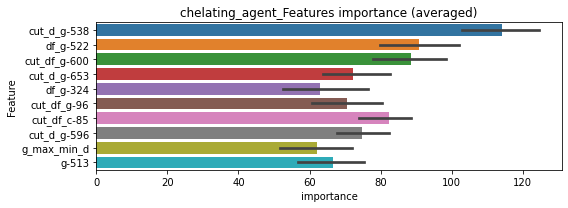

len(train_index) : 2827
len(valid_index) : 943
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2827
len(valid_index) : 943
================================= fold 2/4 chelating_agent=================================


Early stopping, best iteration is:
[303]	training's binary_logloss: 0.00101678	valid_1's binary_logloss: 0.0206281
Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 942
================================= fold 3/4 chelating_agent=================================


Early stopping, best iteration is:
[252]	training's binary_logloss: 0.00126731	valid_1's binary_logloss: 0.0218549
Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 942
================================= fold 4/4 chelating_agent=================================


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000566815	valid_1's binary_logloss: 0.00979389
Training until validation scores don't improve for 30 rounds


chelating_agent logloss: 0.02222580631969126


Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00109145	valid_1's binary_logloss: 0.0366284


chk_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000307137	valid_1's binary_logloss: 0.00545908
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000343926	valid_1's binary_logloss: 0.0213119
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000311245	valid_1's binary_logloss: 0.00252553
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013886, Threshold: 0.0313444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0313444, conf_0:0.02194, conf_1:0.04075
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_1: 0.0613444
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_2: 0.0913444
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_3: 0.1213444
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_4: 0.1513444
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_5: 0.1813444


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000306356	valid_1's binary_logloss: 0.00429354


Num_p_label: 4.0, Expected: 4.0, Adj_threshold_6: 0.2113444
threshold: 0.2113444, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000303826	valid_1's binary_logloss: 0.00401798
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000324474	valid_1's binary_logloss: 0.0203101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000304076	valid_1's binary_logloss: 0.00295523
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398060, Threshold: 0.2113444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0110497 Vs.target_rate: 0.00101
Num_p_label: 44.0, Expected: 4.0, Threshold: 0.2113444, conf_0:0.16908, conf_1:0.25361
Num_p_label: 43.0, Expected: 4.0, Adj_threshold_1: 0.2413444
Num_p_label: 39.0, Expected: 4.0, Adj_threshold_2: 0.2713444
Num_p_label: 39.0, Expected: 4.0, Adj_threshold_3: 0.3013444


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000300508	valid_1's binary_logloss: 0.00326692


Num_p_label: 38.0, Expected: 4.0, Adj_threshold_4: 0.3313444
Num_p_label: 37.0, Expected: 4.0, Adj_threshold_5: 0.3613444
Num_p_label: 37.0, Expected: 4.0, Adj_threshold_6: 0.3913444
Num_p_label: 34.0, Expected: 4.0, Adj_threshold_7: 0.4213444
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_8: 0.4513444
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_9: 0.4813444
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_10: 0.5113444
threshold: 0.5113444, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 655.0/3809, y_label_rate: 0.1719611
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000396712	valid_1's binary_logloss: 0.0120493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000300163	valid_1's binary_logloss: 0.00567851
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000298671	valid_1's binary_logloss: 0.000731324
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404954, Threshold: 0.5113444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0085384 Vs.target_rate: 0.00101
Num_p_label: 34.0, Expected: 4.0, Threshold: 0.5113444, conf_0:0.46021, conf_1:0.56248
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_1: 0.5413444
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_2: 0.5713444


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00031135	valid_1's binary_logloss: 0.00941433


Num_p_label: 28.0, Expected: 4.0, Adj_threshold_3: 0.6013444
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_4: 0.6313444
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_5: 0.6613444
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_6: 0.6913444
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_7: 0.7213444
threshold: 0.7213444, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3809, y_label_rate: 0.1719611


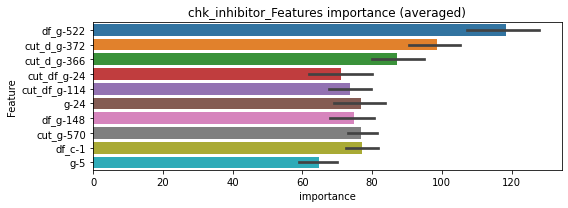

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 chk_inhibitor=================================


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000371888	valid_1's binary_logloss: 0.00971571
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 chk_inhibitor=================================


Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000307646	valid_1's binary_logloss: 0.00433503
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857


Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000313316	valid_1's binary_logloss: 0.00097751


len(valid_index) : 952
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


chk_inhibitor logloss: 0.005692101223017346


Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000312804	valid_1's binary_logloss: 0.00773527


chloride_channel_blocker, len(trt): 42, len(othr): 3279
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3279


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000494624	valid_1's binary_logloss: 0.0285322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000453342	valid_1's binary_logloss: 0.0175037
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000459115	valid_1's binary_logloss: 0.0162587
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025656, Threshold: 0.0167692, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0167692, conf_0:0.01174, conf_1:0.02180
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_1: 0.0467692
threshold: 0.0467692, positive_p_label: 12.0/3982, p_label_rate: 0.0030136


Early stopping, best iteration is:
[338]	training's binary_logloss: 0.00114209	valid_1's binary_logloss: 0.0278959


positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00047811	valid_1's binary_logloss: 0.0274594
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000580839	valid_1's binary_logloss: 0.0137173
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000487638	valid_1's binary_logloss: 0.0164122
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0219200, Threshold: 0.0467692, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0203415 Vs.target_rate: 0.00176
Num_p_label: 81.0, Expected: 7.0, Threshold: 0.0467692, conf_0:0.03742, conf_1:0.05612
Num_p_label: 54.0, Expected: 7.0, Adj_threshold_1: 0.0767692
Num_p_label: 44.0, Expected: 7.0, Adj_threshold_2: 0.1067692
Num_p_label: 36.0, Expected: 7.0, Adj_threshold_3: 0.1367692
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_4: 0.1667692
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_5: 0.1967692


Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000815797	valid_1's binary_logloss: 0.0290669


Num_p_label: 16.0, Expected: 7.0, Adj_threshold_6: 0.2267692
threshold: 0.2267692, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.00043604	valid_1's binary_logloss: 0.0238061
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000602842	valid_1's binary_logloss: 0.0163118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000439108	valid_1's binary_logloss: 0.0107815
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0170605, Threshold: 0.2267692, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0052737 Vs.target_rate: 0.00176
Num_p_label: 21.0, Expected: 7.0, Threshold: 0.2267692, conf_0:0.20409, conf_1:0.24945
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_1: 0.2567692


Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000730782	valid_1's binary_logloss: 0.0284718


Num_p_label: 15.0, Expected: 7.0, Adj_threshold_2: 0.2867692
threshold: 0.2867692, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


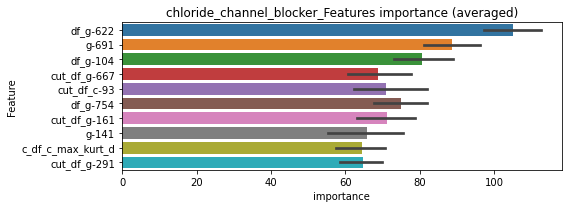

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 chloride_channel_blocker=================================


Early stopping, best iteration is:
[308]	training's binary_logloss: 0.000900728	valid_1's binary_logloss: 0.0237475
Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 chloride_channel_blocker=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00076914	valid_1's binary_logloss: 0.022849
Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 chloride_channel_blocker=================================


Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00085006	valid_1's binary_logloss: 0.0239565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000521271	valid_1's binary_logloss: 0.00639796


chloride_channel_blocker logloss: 0.019239864151960342
cholesterol_inhibitor, len(trt): 48, len(othr): 3286
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.00236153	valid_1's binary_logloss: 0.0442393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00101804	valid_1's binary_logloss: 0.0339503
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000450834	valid_1's binary_logloss: 0.00853414
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0041762, Threshold: 0.0075430, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000515394	valid_1's binary_logloss: 0.0303364


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0075430, conf_0:0.00528, conf_1:0.00981
Num_p_label: 1.0, Expected: 8.0, Adj_threshold_1: 0.0375430
threshold: 0.0375430, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000939041	valid_1's binary_logloss: 0.0403836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000502577	valid_1's binary_logloss: 0.031608
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000463551	valid_1's binary_logloss: 0.00819278
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000511026	valid_1's binary_logloss: 0.0277028


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0121425, Threshold: 0.0375430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0010045 Vs.target_rate: 0.00202
Num_p_label: 4.0, Expected: 8.0, Threshold: 0.0375430, conf_0:0.03003, conf_1:0.04505
threshold: 0.0375430, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000490249	valid_1's binary_logloss: 0.030673
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000454971	valid_1's binary_logloss: 0.0197904
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000588961	valid_1's binary_logloss: 0.0178149
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0123051, Threshold: 0.0375430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3801
p_label_rate: 0.0010045 Vs.target_rate: 0.00202
Num_p_label: 4.0, Expected: 8.0, Threshold: 0.0375430, conf_0:0.03379, conf_1:0.04130
threshold: 0.0375430, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00170276	valid_1's binary_logloss: 0.0401047


positive_y_label: 652.0/3801, y_label_rate: 0.1715338


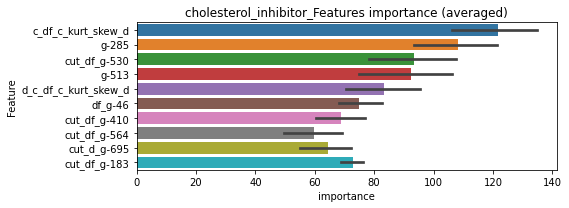

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 cholesterol_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000836819	valid_1's binary_logloss: 0.0252895
Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 cholesterol_inhibitor=================================


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000952907	valid_1's binary_logloss: 0.029389
Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 cholesterol_inhibitor=================================


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000586961	valid_1's binary_logloss: 0.0115934
Training until validation scores don't improve for 30 rounds


cholesterol_inhibitor logloss: 0.022607845711779057


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00064585	valid_1's binary_logloss: 0.0241567


cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3286
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0212766	valid_1's binary_logloss: 0.0538551
[2000]	training's binary_logloss: 0.010384	valid_1's binary_logloss: 0.0462901
Early stopping, best iteration is:
[2959]	training's binary_logloss: 0.00691081	valid_1's binary_logloss: 0.0439806
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0207523	valid_1's binary_logloss: 0.0590552
[2000]	training's binary_logloss: 0.0102254	valid_1's binary_logloss: 0.0523759
Early stopping, best iteration is:
[2099]	training's binary_logloss: 0.00971961	valid_1's binary_logloss: 0.0519733
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.022109	valid_1's binary_logloss: 0.0358632
[2000]	training's binary_logloss: 0.0108644	valid_1's binary_logloss: 0.0275401
[3000]	training's binary_logloss: 0.0071236	valid_1's binary_logloss: 0.024475
[4000]	training's binary_log

1 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0168549, Threshold: 0.0299282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0299282, conf_0:0.02095, conf_1:0.03891
Num_p_label: 5.0, Expected: 9.0, Adj_threshold_1: 0.0599282
threshold: 0.0599282, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0197967	valid_1's binary_logloss: 0.0646451
[2000]	training's binary_logloss: 0.00973131	valid_1's binary_logloss: 0.058319
Early stopping, best iteration is:
[2110]	training's binary_logloss: 0.00921488	valid_1's binary_logloss: 0.0580795
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0211786	valid_1's binary_logloss: 0.0458778
[2000]	training's binary_logloss: 0.0103373	valid_1's binary_logloss: 0.0373747
[3000]	training's binary_logloss: 0.0067848	valid_1's binary_logloss: 0.0346325
[4000]	training's binary_logloss: 0.00504845	valid_1's binary_logloss: 0.0333316
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.00484531	valid_1's binary_logloss: 0.0331469
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0223043	valid_1's binary_logloss: 0.0282646
[2000]	training's binary

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0292747, Threshold: 0.0599282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 648.0/3793
p_label_rate: 0.0027624 Vs.target_rate: 0.00227
Num_p_label: 11.0, Expected: 9.0, Threshold: 0.0599282, conf_0:0.04794, conf_1:0.07191
threshold: 0.0599282, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 648.0/3793, y_label_rate: 0.1708410
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0193712	valid_1's binary_logloss: 0.0391884
[2000]	training's binary_logloss: 0.00958149	valid_1's binary_logloss: 0.0313653
[3000]	training's binary_logloss: 0.00632683	valid_1's binary_logloss: 0.0285841
Early stopping, best iteration is:
[3800]	training's binary_logloss: 0.00497546	valid_1's binary_logloss: 0.0274354
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.018808	valid_1's binary_logloss: 0.0464702
[2000]	training's binary_logloss: 0.00926253	valid_1's binary_logloss: 0.0391771
[3000]	training's binary_logloss: 0.00610601	valid_1's binary_logloss: 0.0368645
Early stopping, best iteration is:
[3260]	training's binary_logloss: 0.00560919	valid_1's binary_logloss: 0.0364705
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0197298	valid_1's binary_logloss: 0.0413484
[2000]	training's bina

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0286310, Threshold: 0.0599282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 645.0/3787
p_label_rate: 0.0022602 Vs.target_rate: 0.00227
Num_p_label: 9.0, Expected: 9.0, Threshold: 0.0599282, conf_0:0.05394, conf_1:0.06592
threshold: 0.0599282, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 645.0/3787, y_label_rate: 0.1703195


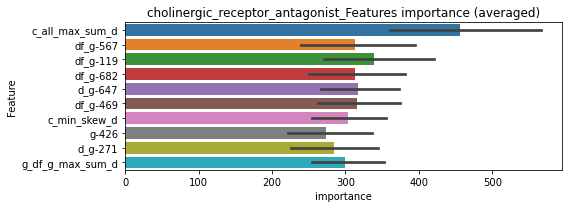

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0264202	valid_1's binary_logloss: 0.047906
[2000]	training's binary_logloss: 0.0134695	valid_1's binary_logloss: 0.0376095
[3000]	training's binary_logloss: 0.0089598	valid_1's binary_logloss: 0.0340337
Early stopping, best iteration is:
[3488]	training's binary_logloss: 0.00769861	valid_1's binary_logloss: 0.0330024


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0265724	valid_1's binary_logloss: 0.0502012
[2000]	training's binary_logloss: 0.0135116	valid_1's binary_logloss: 0.0390149
[3000]	training's binary_logloss: 0.00899498	valid_1's binary_logloss: 0.034965
[4000]	training's binary_logloss: 0.00672331	valid_1's binary_logloss: 0.0330632
[5000]	training's binary_logloss: 0.00538048	valid_1's binary_logloss: 0.0319428
Early stopping, best iteration is:
[4997]	training's binary_logloss: 0.00538344	valid_1's binary_logloss: 0.031942


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271192	valid_1's binary_logloss: 0.0466298
[2000]	training's binary_logloss: 0.0138253	valid_1's binary_logloss: 0.0344738
[3000]	training's binary_logloss: 0.00918435	valid_1's binary_logloss: 0.0301233
[4000]	training's binary_logloss: 0.00687141	valid_1's binary_logloss: 0.0279759
Early stopping, best iteration is:
[4830]	training's binary_logloss: 0.0056853	valid_1's binary_logloss: 0.0268845


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270259	valid_1's binary_logloss: 0.0498129
[2000]	training's binary_logloss: 0.01374	valid_1's binary_logloss: 0.0389528
[3000]	training's binary_logloss: 0.00908432	valid_1's binary_logloss: 0.0350047
[4000]	training's binary_logloss: 0.00677196	valid_1's binary_logloss: 0.0332151
Early stopping, best iteration is:
[4476]	training's binary_logloss: 0.00604894	valid_1's binary_logloss: 0.032638


cholinergic_receptor_antagonist logloss: 0.031116321861822633
cholinergic_receptor_antagonist is unpredictable(><)!
coagulation_factor_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000384137	valid_1's binary_logloss: 0.00788342
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000353002	valid_1's binary_logloss: 0.0135886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000320914	valid_1's binary_logloss: 0.00373422
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012275, Threshold: 0.0030737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0030737, conf_0:0.00215, conf_1:0.00400
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0330737


Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000394041	valid_1's binary_logloss: 0.0118062


threshold: 0.0330737, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000371037	valid_1's binary_logloss: 0.00801554
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000320905	valid_1's binary_logloss: 0.0120656
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000314893	valid_1's binary_logloss: 0.00309285
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0061850, Threshold: 0.0330737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0042692 Vs.target_rate: 0.00101
Num_p_label: 17.0, Expected: 4.0, Threshold: 0.0330737, conf_0:0.02646, conf_1:0.03969
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.0630737
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_2: 0.0930737
threshold: 0.0930737, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000362916	valid_1's binary_logloss: 0.013535


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000371037	valid_1's binary_logloss: 0.00801554
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000320905	valid_1's binary_logloss: 0.0120656
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000314893	valid_1's binary_logloss: 0.00309285
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0061850, Threshold: 0.0930737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00101
Num_p_label: 6.0, Expected: 4.0, Threshold: 0.0930737, conf_0:0.08377, conf_1:0.10238
threshold: 0.0930737, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000362916	valid_1's binary_logloss: 0.013535


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


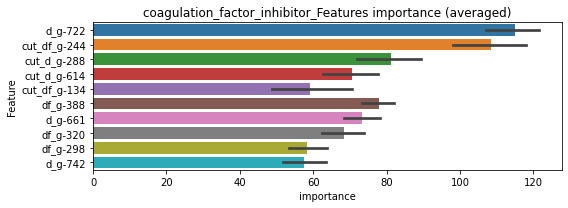

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000370107	valid_1's binary_logloss: 0.00642682
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 coagulation_factor_inhibitor=================================


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000384153	valid_1's binary_logloss: 0.0118759
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 coagulation_factor_inhibitor=================================


Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00034288	valid_1's binary_logloss: 0.00344366
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000526609	valid_1's binary_logloss: 0.00972538


coagulation_factor_inhibitor logloss: 0.007868602371803647
corticosteroid_agonist, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000449323	valid_1's binary_logloss: 0.0212215
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.000749905	valid_1's binary_logloss: 0.034872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000389285	valid_1's binary_logloss: 0.0046875
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018230, Threshold: 0.0039399, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0039399, conf_0:0.00276, conf_1:0.00512
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_1: 0.0339399


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000452038	valid_1's binary_logloss: 0.0228022


threshold: 0.0339399, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00049475	valid_1's binary_logloss: 0.0194552
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000556725	valid_1's binary_logloss: 0.0360795
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000398088	valid_1's binary_logloss: 0.00436688
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0068934, Threshold: 0.0339399, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0000000 Vs.target_rate: 0.00151
Num_p_label: 0.0, Expected: 6.0, Threshold: 0.0339399, conf_0:0.02715, conf_1:0.04073
threshold: 0.0339399, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000536708	valid_1's binary_logloss: 0.0212595


positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.000549221	valid_1's binary_logloss: 0.0281832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000482127	valid_1's binary_logloss: 0.0153033
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000396174	valid_1's binary_logloss: 0.00542186
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0098098, Threshold: 0.0339399, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0000000 Vs.target_rate: 0.00151
Num_p_label: 0.0, Expected: 6.0, Threshold: 0.0339399, conf_0:0.03055, conf_1:0.03733
threshold: 0.0339399, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000532999	valid_1's binary_logloss: 0.0218405


positive_y_label: 656.0/3809, y_label_rate: 0.1722237


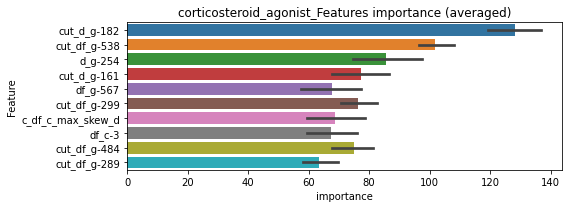

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 corticosteroid_agonist=================================


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000550725	valid_1's binary_logloss: 0.0248439
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 corticosteroid_agonist=================================


Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000597931	valid_1's binary_logloss: 0.014964
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Early stopping, best iteration is:
[296]	training's binary_logloss: 0.000915241	valid_1's binary_logloss: 0.00545669
Training until validation scores don't improve for 30 rounds


corticosteroid_agonist logloss: 0.016365982392677714


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000502056	valid_1's binary_logloss: 0.0201904


cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3230
target_rate: 0.0182666 → Adj_target_rate: 0.0146863


selected negative label: 3230


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.141652	valid_1's binary_logloss: 0.389675
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.143051	valid_1's binary_logloss: 0.381789
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.112999	valid_1's binary_logloss: 0.357745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.164124	valid_1's binary_logloss: 0.369875


1 / 3, AUC score:0.730, PR-AUC:0.573
y_Threshold: 0.1675243, Threshold: 0.4420541, pos_neg_ratio: 0.8000000
Remove_noisy_data: 732 → Positive_corect_labels: 345/3144
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, Expected: 72.7, Threshold: 0.4420541, conf_0:0.30944, conf_1:0.57467
threshold: 0.4420541, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 345.0/3144, y_label_rate: 0.1097328
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.0569572	valid_1's binary_logloss: 0.211485
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0556348	valid_1's binary_logloss: 0.174423
Early stopping, best iteration is:
[1663]	training's binary_logloss: 0.0328221	valid_1's binary_logloss: 0.163178
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0547516	valid_1's binary_logloss: 0.18831
Early stopping, best iteration is:
[1320]	training's binary_logloss: 0.0412384	valid_1's binary_logloss: 0.18229
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0563721	valid_1's binary_logloss: 0.171561
Early stopping, best iteration is:
[1666]	training's binary_logloss: 0.0332306	valid_1's binary_logloss: 0.161949


2 / 3, AUC score:0.946, PR-AUC:0.859
y_Threshold: 0.1046356, Threshold: 0.4420541, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 271.0/2996
p_label_rate: 0.0283777 Vs.target_rate: 0.01827
Num_p_label: 113.0, Expected: 72.7, Threshold: 0.4420541, conf_0:0.35364, conf_1:0.53046
Num_p_label: 109.0, Expected: 72.7, Adj_threshold_1: 0.4720541
threshold: 0.4720541, positive_p_label: 109.0/3982, p_label_rate: 0.0273732
positive_y_label: 271.0/2996, y_label_rate: 0.0904539
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0407185	valid_1's binary_logloss: 0.13793
Early stopping, best iteration is:
[1683]	training's binary_logloss: 0.0235682	valid_1's binary_logloss: 0.127858
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0400713	valid_1's binary_logloss: 0.138895
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0235363	valid_1's binary_logloss: 0.129884
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0413333	valid_1's binary_logloss: 0.131319
[2000]	training's binary_logloss: 0.0200479	valid_1's binary_logloss: 0.118421
Early stopping, best iteration is:
[2203]	training's binary_logloss: 0.0180886	valid_1's binary_logloss: 0.117493
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0421315	valid_1's binary_logloss: 0.117017
[2000]	training's bi

3 / 3, AUC score:0.991, PR-AUC:0.953
y_Threshold: 0.0731579, Threshold: 0.4720541, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 242.0/2938
p_label_rate: 0.0364139 Vs.target_rate: 0.01827
Num_p_label: 145.0, Expected: 72.7, Threshold: 0.4720541, conf_0:0.42485, conf_1:0.51926
Num_p_label: 136.0, Expected: 72.7, Adj_threshold_1: 0.5020541
Num_p_label: 131.0, Expected: 72.7, Adj_threshold_2: 0.5320541
Num_p_label: 125.0, Expected: 72.7, Adj_threshold_3: 0.5620541
Num_p_label: 120.0, Expected: 72.7, Adj_threshold_4: 0.5920541
Num_p_label: 112.0, Expected: 72.7, Adj_threshold_5: 0.6220541
Num_p_label: 109.0, Expected: 72.7, Adj_threshold_6: 0.6520541
threshold: 0.6520541, positive_p_label: 109.0/3982, p_label_rate: 0.0273732
positive_y_label: 242.0/2938, y_label_rate: 0.0823690


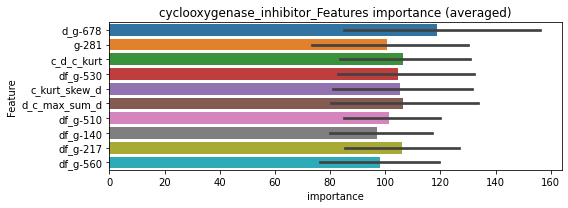

len(train_index) : 2203
len(valid_index) : 735
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.053807	valid_1's binary_logloss: 0.119455
[2000]	training's binary_logloss: 0.0266115	valid_1's binary_logloss: 0.0969839
[3000]	training's binary_logloss: 0.0173719	valid_1's binary_logloss: 0.0899957
Early stopping, best iteration is:
[3267]	training's binary_logloss: 0.0159026	valid_1's binary_logloss: 0.0889223


len(train_index) : 2203
len(valid_index) : 735
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0519774	valid_1's binary_logloss: 0.124331
[2000]	training's binary_logloss: 0.0257888	valid_1's binary_logloss: 0.102204
[3000]	training's binary_logloss: 0.0168296	valid_1's binary_logloss: 0.0944861
Early stopping, best iteration is:
[3613]	training's binary_logloss: 0.0138815	valid_1's binary_logloss: 0.0917598


len(train_index) : 2204
len(valid_index) : 734
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0528643	valid_1's binary_logloss: 0.114368
[2000]	training's binary_logloss: 0.0260516	valid_1's binary_logloss: 0.0919239
[3000]	training's binary_logloss: 0.0170249	valid_1's binary_logloss: 0.0846966
Early stopping, best iteration is:
[3162]	training's binary_logloss: 0.0161362	valid_1's binary_logloss: 0.0840955


len(train_index) : 2204
len(valid_index) : 734
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0529722	valid_1's binary_logloss: 0.129384
[2000]	training's binary_logloss: 0.0262736	valid_1's binary_logloss: 0.111841
Early stopping, best iteration is:
[2409]	training's binary_logloss: 0.0216606	valid_1's binary_logloss: 0.108794


cyclooxygenase_inhibitor logloss: 0.0933908835291209
cyclooxygenase_inhibitor is unpredictable(><)!
cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3271
target_rate: 0.0043672 → Adj_target_rate: 0.0043519


selected negative label: 3271


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0354829	valid_1's binary_logloss: 0.113624
Early stopping, best iteration is:
[1687]	training's binary_logloss: 0.0205602	valid_1's binary_logloss: 0.106748
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0355464	valid_1's binary_logloss: 0.109171
Early stopping, best iteration is:
[1171]	training's binary_logloss: 0.0303427	valid_1's binary_logloss: 0.106456
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0381458	valid_1's binary_logloss: 0.0755832
[2000]	training's binary_logloss: 0.0184389	valid_1's binary_logloss: 0.063744
[3000]	training's binary_logloss: 0.0119525	valid_1's binary_logloss: 0.059607
Early stopping, best iteration is:
[3619]	training's binary_logloss: 0.00980264	valid_1's binary_logloss: 0.0580309
Training until validation scores don't improve for 30 rounds
[1000]	training'

1 / 3, AUC score:0.988, PR-AUC:0.976
y_Threshold: 0.0426284, Threshold: 0.0921693, pos_neg_ratio: 0.8000000
Remove_noisy_data: 179 → Positive_corect_labels: 630/3746
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, Expected: 17.4, Threshold: 0.0921693, conf_0:0.06452, conf_1:0.11982
Num_p_label: 22.0, Expected: 17.4, Adj_threshold_1: 0.1221693
threshold: 0.1221693, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 630.0/3746, y_label_rate: 0.1681794
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0302056	valid_1's binary_logloss: 0.0884974
Early stopping, best iteration is:
[1920]	training's binary_logloss: 0.0154907	valid_1's binary_logloss: 0.0798516
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0314027	valid_1's binary_logloss: 0.0711235
[2000]	training's binary_logloss: 0.0154367	valid_1's binary_logloss: 0.0619354
Early stopping, best iteration is:
[2091]	training's binary_logloss: 0.0147303	valid_1's binary_logloss: 0.0615278
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317068	valid_1's binary_logloss: 0.0704525
[2000]	training's binary_logloss: 0.015492	valid_1's binary_logloss: 0.0594963
[3000]	training's binary_logloss: 0.0101693	valid_1's binary_logloss: 0.0557142
Early stopping, best iteration is:
[3447]	training's binary_logloss: 0.0088095	valid_1's binary_logloss: 0.0

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0610375, Threshold: 0.1221693, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 603.0/3692
p_label_rate: 0.0163235 Vs.target_rate: 0.00437
Num_p_label: 65.0, Expected: 17.4, Threshold: 0.1221693, conf_0:0.09774, conf_1:0.14660
Num_p_label: 40.0, Expected: 17.4, Adj_threshold_1: 0.1521693
Num_p_label: 28.0, Expected: 17.4, Adj_threshold_2: 0.1821693
Num_p_label: 19.0, Expected: 17.4, Adj_threshold_3: 0.2121693
threshold: 0.2121693, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 603.0/3692, y_label_rate: 0.1633261
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0250429	valid_1's binary_logloss: 0.0729344
[2000]	training's binary_logloss: 0.0123611	valid_1's binary_logloss: 0.0639604
Early stopping, best iteration is:
[2106]	training's binary_logloss: 0.0117238	valid_1's binary_logloss: 0.0635025
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0259087	valid_1's binary_logloss: 0.0578362
[2000]	training's binary_logloss: 0.0127748	valid_1's binary_logloss: 0.0492018
Early stopping, best iteration is:
[2811]	training's binary_logloss: 0.00900733	valid_1's binary_logloss: 0.0467763
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0260723	valid_1's binary_logloss: 0.055598
[2000]	training's binary_logloss: 0.0128368	valid_1's binary_logloss: 0.0462358
[3000]	training's binary_logloss: 0.00847534	valid_1's binary_logloss: 0.0430499
Early stopping, best itera

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0425592, Threshold: 0.2121693, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 592.0/3670
p_label_rate: 0.0052737 Vs.target_rate: 0.00437
Num_p_label: 21.0, Expected: 17.4, Threshold: 0.2121693, conf_0:0.19095, conf_1:0.23339
threshold: 0.2121693, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 592.0/3670, y_label_rate: 0.1613079


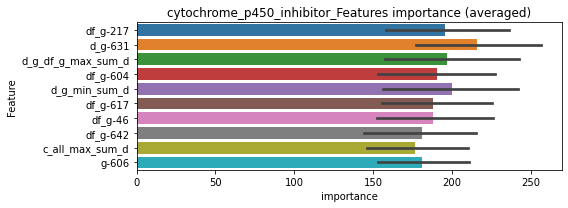

len(train_index) : 2752
len(valid_index) : 918
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0341253	valid_1's binary_logloss: 0.0576051
[2000]	training's binary_logloss: 0.0175769	valid_1's binary_logloss: 0.0440595
[3000]	training's binary_logloss: 0.0116777	valid_1's binary_logloss: 0.0392971
[4000]	training's binary_logloss: 0.00873059	valid_1's binary_logloss: 0.0371418
[5000]	training's binary_logloss: 0.0069706	valid_1's binary_logloss: 0.0358988
Early stopping, best iteration is:
[5205]	training's binary_logloss: 0.00669134	valid_1's binary_logloss: 0.0357191


len(train_index) : 2752
len(valid_index) : 918
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0333138	valid_1's binary_logloss: 0.0585009
[2000]	training's binary_logloss: 0.0169874	valid_1's binary_logloss: 0.0467409
[3000]	training's binary_logloss: 0.0112945	valid_1's binary_logloss: 0.0430277
Early stopping, best iteration is:
[3277]	training's binary_logloss: 0.0103294	valid_1's binary_logloss: 0.0424669


len(train_index) : 2753
len(valid_index) : 917
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0342929	valid_1's binary_logloss: 0.0576065
[2000]	training's binary_logloss: 0.0175964	valid_1's binary_logloss: 0.0438657
[3000]	training's binary_logloss: 0.0116588	valid_1's binary_logloss: 0.0388828
[4000]	training's binary_logloss: 0.00872223	valid_1's binary_logloss: 0.0364347
Early stopping, best iteration is:
[4289]	training's binary_logloss: 0.00812976	valid_1's binary_logloss: 0.0359714


len(train_index) : 2753
len(valid_index) : 917
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0329995	valid_1's binary_logloss: 0.0650857
[2000]	training's binary_logloss: 0.0168945	valid_1's binary_logloss: 0.0529628
[3000]	training's binary_logloss: 0.01127	valid_1's binary_logloss: 0.048898
Early stopping, best iteration is:
[3950]	training's binary_logloss: 0.00853628	valid_1's binary_logloss: 0.047013


cytochrome_p450_inhibitor logloss: 0.04029195157828838
cytochrome_p450_inhibitor is unpredictable(><)!
dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000478085	valid_1's binary_logloss: 0.0187846
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00041956	valid_1's binary_logloss: 0.027507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000417274	valid_1's binary_logloss: 0.00639047
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017540, Threshold: 0.0052469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0052469, conf_0:0.00367, conf_1:0.00682
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0352469


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000562353	valid_1's binary_logloss: 0.0175113


threshold: 0.0352469, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000371552	valid_1's binary_logloss: 0.0183443
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000435527	valid_1's binary_logloss: 0.0240495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000460542	valid_1's binary_logloss: 0.00747417
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0084502, Threshold: 0.0352469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.0352469, conf_0:0.02820, conf_1:0.04230
threshold: 0.0352469, positive_p_label: 12.0/3982, p_label_rate: 0.0030136


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000575675	valid_1's binary_logloss: 0.0156348


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.000934451	valid_1's binary_logloss: 0.0395647
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000386067	valid_1's binary_logloss: 0.0118042
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000426048	valid_1's binary_logloss: 0.00224274
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0097332, Threshold: 0.0352469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.0352469, conf_0:0.03172, conf_1:0.03877


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000454734	valid_1's binary_logloss: 0.0172751


threshold: 0.0352469, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


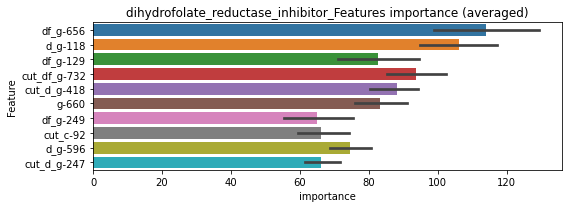

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Early stopping, best iteration is:
[164]	training's binary_logloss: 0.00167947	valid_1's binary_logloss: 0.0352431
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000662684	valid_1's binary_logloss: 0.0107458
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000394225	valid_1's binary_logloss: 0.00166932


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


dihydrofolate_reductase_inhibitor logloss: 0.015431014403925407


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000529451	valid_1's binary_logloss: 0.0140649


dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000335276	valid_1's binary_logloss: 0.018171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000381044	valid_1's binary_logloss: 0.012117
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000330794	valid_1's binary_logloss: 0.00649053
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011819, Threshold: 0.0027407, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0027407, conf_0:0.00192, conf_1:0.00356
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0327407


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000325654	valid_1's binary_logloss: 0.0119668


threshold: 0.0327407, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000343605	valid_1's binary_logloss: 0.0151539
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000325533	valid_1's binary_logloss: 0.0131228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000321877	valid_1's binary_logloss: 0.00697516
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0076903, Threshold: 0.0327407, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00105
Num_p_label: 3.0, Expected: 4.2, Threshold: 0.0327407, conf_0:0.02619, conf_1:0.03929
threshold: 0.0327407, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000376748	valid_1's binary_logloss: 0.00898111


positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00039588	valid_1's binary_logloss: 0.0240938
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000319283	valid_1's binary_logloss: 0.00426579
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000311962	valid_1's binary_logloss: 0.00329518
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0091762, Threshold: 0.0327407, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000350052	valid_1's binary_logloss: 0.00632442


p_label_rate: 0.0005023 Vs.target_rate: 0.00105
Num_p_label: 2.0, Expected: 4.2, Threshold: 0.0327407, conf_0:0.02947, conf_1:0.03601
threshold: 0.0327407, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


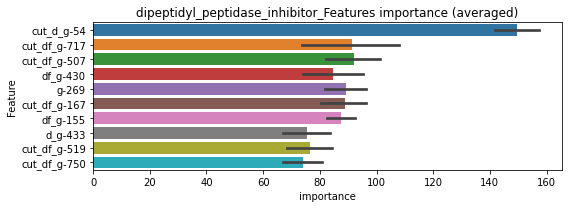

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Early stopping, best iteration is:
[346]	training's binary_logloss: 0.00052458	valid_1's binary_logloss: 0.021142
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000335129	valid_1's binary_logloss: 0.00430983
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000351155	valid_1's binary_logloss: 0.00415823
Training until validation scores don't improve for 30 rounds


dipeptidyl_peptidase_inhibitor logloss: 0.009162087758026388


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000359906	valid_1's binary_logloss: 0.00703083


diuretic, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000154616	valid_1's binary_logloss: 0.00134691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00034635	valid_1's binary_logloss: 0.00610511
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000152323	valid_1's binary_logloss: 0.000147429
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005617, Threshold: 0.0017504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0017504, conf_0:0.00123, conf_1:0.00228
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0317504
threshold: 0.0317504, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00014881	valid_1's binary_logloss: 0.00058583


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000148434	valid_1's binary_logloss: 0.000677757
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.000220373	valid_1's binary_logloss: 0.00611087
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000151519	valid_1's binary_logloss: 0.00013318
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0227849, Threshold: 0.0317504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.0317504, conf_0:0.02540, conf_1:0.03810
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0617504


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.00014701	valid_1's binary_logloss: 0.000145284


threshold: 0.0617504, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000148434	valid_1's binary_logloss: 0.000677757
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.000220373	valid_1's binary_logloss: 0.00611087
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000151519	valid_1's binary_logloss: 0.00013318
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0227849, Threshold: 0.0617504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0617504, conf_0:0.05558, conf_1:0.06793
threshold: 0.0617504, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00014701	valid_1's binary_logloss: 0.000145284


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


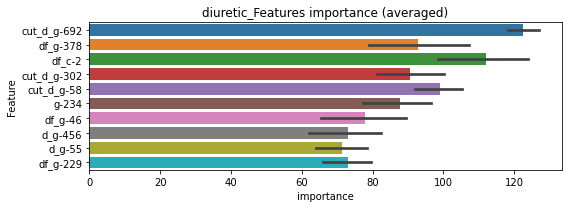

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Early stopping, best iteration is:
[680]	training's binary_logloss: 0.0001587	valid_1's binary_logloss: 0.00113011
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.000314562	valid_1's binary_logloss: 0.00532078
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000153205	valid_1's binary_logloss: 0.000132058
Training until validation scores don't improve for 30 rounds


diuretic logloss: 0.0016818685531860911


Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000150864	valid_1's binary_logloss: 0.000145105


dna_alkylating_agent, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3285


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.00176348	valid_1's binary_logloss: 0.0471078
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000623197	valid_1's binary_logloss: 0.0326661
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000480543	valid_1's binary_logloss: 0.010781
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0038920, Threshold: 0.0296615, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000543354	valid_1's binary_logloss: 0.0281284


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0296615, conf_0:0.02076, conf_1:0.03856
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_1: 0.0596615
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_2: 0.0896615
threshold: 0.0896615, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.0008395	valid_1's binary_logloss: 0.046658
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000584616	valid_1's binary_logloss: 0.0299792
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000533783	valid_1's binary_logloss: 0.00881919
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0180599, Threshold: 0.0896615, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0140633 Vs.target_rate: 0.00202
Num_p_label: 56.0, Expected: 8.0, Threshold: 0.0896615, conf_0:0.07173, conf_1:0.10759
Num_p_label: 43.0, Expected: 8.0, Adj_threshold_1: 0.1196615
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_2: 0.1496615
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_3: 0.1796615
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_4: 0.2096615
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_5: 0.2396615


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000687075	valid_1's binary_logloss: 0.0276829


Num_p_label: 21.0, Expected: 8.0, Adj_threshold_6: 0.2696615
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_7: 0.2996615
threshold: 0.2996615, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000723655	valid_1's binary_logloss: 0.028474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000553399	valid_1's binary_logloss: 0.0362866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000457509	valid_1's binary_logloss: 0.0101004
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0200298, Threshold: 0.2996615, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0075339 Vs.target_rate: 0.00202
Num_p_label: 30.0, Expected: 8.0, Threshold: 0.2996615, conf_0:0.26970, conf_1:0.32963


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000624917	valid_1's binary_logloss: 0.0247655


Num_p_label: 24.0, Expected: 8.0, Adj_threshold_1: 0.3296615
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_2: 0.3596615
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_3: 0.3896615
threshold: 0.3896615, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


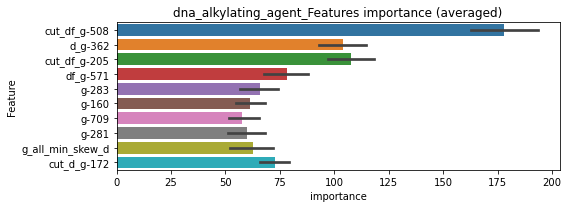

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 dna_alkylating_agent=================================


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000781658	valid_1's binary_logloss: 0.0178181
Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 dna_alkylating_agent=================================


Early stopping, best iteration is:
[258]	training's binary_logloss: 0.00114966	valid_1's binary_logloss: 0.0293658
Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 dna_alkylating_agent=================================


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000749111	valid_1's binary_logloss: 0.0201952
Training until validation scores don't improve for 30 rounds


dna_alkylating_agent logloss: 0.02108273685669723


Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00106669	valid_1's binary_logloss: 0.0169518
mutually exclusive columns: dna_inhibitor


dna_inhibitor, len(trt): 402, len(othr): 7073
target_rate: 0.0168808 → Adj_target_rate: 0.0137338


selected negative label: 7073


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0567673	valid_1's binary_logloss: 0.170879
Early stopping, best iteration is:
[1194]	training's binary_logloss: 0.0473303	valid_1's binary_logloss: 0.169302
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.0683348	valid_1's binary_logloss: 0.188644
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0567198	valid_1's binary_logloss: 0.172313
Early stopping, best iteration is:
[1192]	training's binary_logloss: 0.0474839	valid_1's binary_logloss: 0.170234
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0563382	valid_1's binary_logloss: 0.172009
Early stopping, best iteration is:
[1148]	training's binary_logloss: 0.048986	valid_1's binary_logloss: 0.170146


1 / 3, AUC score:0.927, PR-AUC:0.877
y_Threshold: 0.0829988, Threshold: 0.1379175, pos_neg_ratio: 0.8000000
Remove_noisy_data: 782 → Positive_corect_labels: 1165/7705
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, Expected: 67.2, Threshold: 0.1379175, conf_0:0.09654, conf_1:0.17929
threshold: 0.1379175, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1165.0/7705, y_label_rate: 0.1512005
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0289735	valid_1's binary_logloss: 0.0837978
Early stopping, best iteration is:
[1516]	training's binary_logloss: 0.0188701	valid_1's binary_logloss: 0.0795381
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0292607	valid_1's binary_logloss: 0.081511
Early stopping, best iteration is:
[1804]	training's binary_logloss: 0.0157952	valid_1's binary_logloss: 0.0762587
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0302547	valid_1's binary_logloss: 0.074906
[2000]	training's binary_logloss: 0.0146034	valid_1's binary_logloss: 0.0683082
Early stopping, best iteration is:
[2107]	training's binary_logloss: 0.0138017	valid_1's binary_logloss: 0.0678712
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0292656	valid_1's binary_logloss: 0.0818343
Early stoppin

2 / 3, AUC score:0.993, PR-AUC:0.979
y_Threshold: 0.0638178, Threshold: 0.1379175, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 1087.0/7549
p_label_rate: 0.0095429 Vs.target_rate: 0.01688
Num_p_label: 38.0, Expected: 67.2, Threshold: 0.1379175, conf_0:0.11033, conf_1:0.16550
threshold: 0.1379175, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 1087.0/7549, y_label_rate: 0.1439926
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0203777	valid_1's binary_logloss: 0.0429909
[2000]	training's binary_logloss: 0.0100034	valid_1's binary_logloss: 0.0369251
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.00870065	valid_1's binary_logloss: 0.0361513
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.019185	valid_1's binary_logloss: 0.0591998
[2000]	training's binary_logloss: 0.00944815	valid_1's binary_logloss: 0.054094
Early stopping, best iteration is:
[2096]	training's binary_logloss: 0.00899007	valid_1's binary_logloss: 0.0539318
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0201199	valid_1's binary_logloss: 0.0476343
[2000]	training's binary_logloss: 0.00988357	valid_1's binary_logloss: 0.0416791
Early stopping, best iteration is:
[2107]	training's binary_logloss: 0.00935547	valid_1's binary_logloss:

3 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0484412, Threshold: 0.1379175, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 1045.0/7465
p_label_rate: 0.0105475 Vs.target_rate: 0.01688
Num_p_label: 42.0, Expected: 67.2, Threshold: 0.1379175, conf_0:0.12413, conf_1:0.15171
threshold: 0.1379175, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 1045.0/7465, y_label_rate: 0.1399866


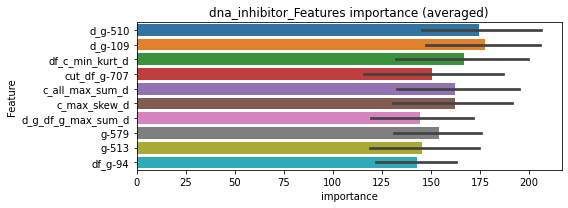

len(train_index) : 5598
len(valid_index) : 1867
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0203472	valid_1's binary_logloss: 0.0311925
[2000]	training's binary_logloss: 0.0103638	valid_1's binary_logloss: 0.0219265
[3000]	training's binary_logloss: 0.00691802	valid_1's binary_logloss: 0.018678
[4000]	training's binary_logloss: 0.00519579	valid_1's binary_logloss: 0.017078
[5000]	training's binary_logloss: 0.00416937	valid_1's binary_logloss: 0.016035
[6000]	training's binary_logloss: 0.0034836	valid_1's binary_logloss: 0.0153525
[7000]	training's binary_logloss: 0.00299054	valid_1's binary_logloss: 0.014873
Early stopping, best iteration is:
[7432]	training's binary_logloss: 0.00282254	valid_1's binary_logloss: 0.0146897


len(train_index) : 5599
len(valid_index) : 1866
================================= fold 2/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0192082	valid_1's binary_logloss: 0.0372192
[2000]	training's binary_logloss: 0.0097219	valid_1's binary_logloss: 0.0283256
[3000]	training's binary_logloss: 0.00650168	valid_1's binary_logloss: 0.0253274
[4000]	training's binary_logloss: 0.00488358	valid_1's binary_logloss: 0.0239606
Early stopping, best iteration is:
[4428]	training's binary_logloss: 0.00441148	valid_1's binary_logloss: 0.023598


len(train_index) : 5599
len(valid_index) : 1866
================================= fold 3/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0201344	valid_1's binary_logloss: 0.0310657
[2000]	training's binary_logloss: 0.0103382	valid_1's binary_logloss: 0.0214744
[3000]	training's binary_logloss: 0.00692679	valid_1's binary_logloss: 0.0182355
[4000]	training's binary_logloss: 0.00520086	valid_1's binary_logloss: 0.0166577
[5000]	training's binary_logloss: 0.00416252	valid_1's binary_logloss: 0.0156904
[6000]	training's binary_logloss: 0.00347868	valid_1's binary_logloss: 0.0150552
Early stopping, best iteration is:
[6667]	training's binary_logloss: 0.00313325	valid_1's binary_logloss: 0.0147142


len(train_index) : 5599
len(valid_index) : 1866
================================= fold 4/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.020522	valid_1's binary_logloss: 0.0297082
[2000]	training's binary_logloss: 0.0105028	valid_1's binary_logloss: 0.019844
[3000]	training's binary_logloss: 0.00701723	valid_1's binary_logloss: 0.0163728
[4000]	training's binary_logloss: 0.00526253	valid_1's binary_logloss: 0.0145598
[5000]	training's binary_logloss: 0.00421403	valid_1's binary_logloss: 0.0134918
[6000]	training's binary_logloss: 0.00351992	valid_1's binary_logloss: 0.0127505
Early stopping, best iteration is:
[6877]	training's binary_logloss: 0.003079	valid_1's binary_logloss: 0.0122842


dna_inhibitor logloss: 0.01632130874676442


mutually exclusive columns: dopamine_receptor_agonist


dopamine_receptor_agonist, len(trt): 121, len(othr): 2089
target_rate: 0.0050810 → Adj_target_rate: 0.0049495


selected negative label: 2089


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0577858	valid_1's binary_logloss: 0.214832
Early stopping, best iteration is:
[1349]	training's binary_logloss: 0.0431446	valid_1's binary_logloss: 0.210856
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0657957	valid_1's binary_logloss: 0.133323
[2000]	training's binary_logloss: 0.0328463	valid_1's binary_logloss: 0.115396
Early stopping, best iteration is:
[2873]	training's binary_logloss: 0.0224848	valid_1's binary_logloss: 0.109804
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0647685	valid_1's binary_logloss: 0.14994
Early stopping, best iteration is:
[1666]	training's binary_logloss: 0.0390558	valid_1's binary_logloss: 0.134767
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0608503	valid_1's binary_logloss: 0.18447
Early stopping, best 

1 / 3, AUC score:0.958, PR-AUC:0.920
y_Threshold: 0.0734326, Threshold: 0.1117085, pos_neg_ratio: 0.8000000
Remove_noisy_data: 185 → Positive_corect_labels: 367/2321
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, Expected: 20.2, Threshold: 0.1117085, conf_0:0.07820, conf_1:0.14522
Num_p_label: 14.0, Expected: 20.2, Adj_threshold_1: 0.1417085
threshold: 0.1417085, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 367.0/2321, y_label_rate: 0.1581215
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0440625	valid_1's binary_logloss: 0.143219
Early stopping, best iteration is:
[1920]	training's binary_logloss: 0.0229552	valid_1's binary_logloss: 0.132576
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.047481	valid_1's binary_logloss: 0.10484
[2000]	training's binary_logloss: 0.0238253	valid_1's binary_logloss: 0.0879977
[3000]	training's binary_logloss: 0.0156792	valid_1's binary_logloss: 0.0814646
Early stopping, best iteration is:
[3232]	training's binary_logloss: 0.0145229	valid_1's binary_logloss: 0.0804867
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0476147	valid_1's binary_logloss: 0.103825
[2000]	training's binary_logloss: 0.023797	valid_1's binary_logloss: 0.089127
[3000]	training's binary_logloss: 0.0156791	valid_1's binary_logloss: 0.0843008
Early stopping, best iteration is:


2 / 3, AUC score:0.994, PR-AUC:0.981
y_Threshold: 0.0711782, Threshold: 0.1417085, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 341.0/2269
p_label_rate: 0.0055249 Vs.target_rate: 0.00508
Num_p_label: 22.0, Expected: 20.2, Threshold: 0.1417085, conf_0:0.11337, conf_1:0.17005
threshold: 0.1417085, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 341.0/2269, y_label_rate: 0.1502865
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0391094	valid_1's binary_logloss: 0.0845624
[2000]	training's binary_logloss: 0.0195766	valid_1's binary_logloss: 0.068631
[3000]	training's binary_logloss: 0.0129569	valid_1's binary_logloss: 0.0631309
Early stopping, best iteration is:
[3440]	training's binary_logloss: 0.0112888	valid_1's binary_logloss: 0.0616637
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0368499	valid_1's binary_logloss: 0.116136
Early stopping, best iteration is:
[1194]	training's binary_logloss: 0.0309451	valid_1's binary_logloss: 0.112613
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0390904	valid_1's binary_logloss: 0.0875276
[2000]	training's binary_logloss: 0.0195125	valid_1's binary_logloss: 0.0706252
[3000]	training's binary_logloss: 0.0128814	valid_1's binary_logloss: 0.0647696
Early stopping, best iteration

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0699468, Threshold: 0.1417085, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 332.0/2251
p_label_rate: 0.0037670 Vs.target_rate: 0.00508
Num_p_label: 15.0, Expected: 20.2, Threshold: 0.1417085, conf_0:0.12754, conf_1:0.15588
threshold: 0.1417085, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 332.0/2251, y_label_rate: 0.1474900


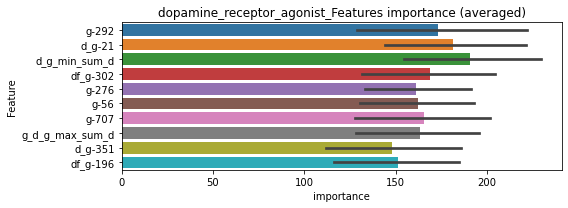

len(train_index) : 1688
len(valid_index) : 563
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0529498	valid_1's binary_logloss: 0.086903
[2000]	training's binary_logloss: 0.0273044	valid_1's binary_logloss: 0.0630512
[3000]	training's binary_logloss: 0.0181857	valid_1's binary_logloss: 0.0549282
[4000]	training's binary_logloss: 0.0136437	valid_1's binary_logloss: 0.0511851
[5000]	training's binary_logloss: 0.0109252	valid_1's binary_logloss: 0.0488903
[6000]	training's binary_logloss: 0.00910741	valid_1's binary_logloss: 0.0473517
Early stopping, best iteration is:
[6625]	training's binary_logloss: 0.00826056	valid_1's binary_logloss: 0.0465612


len(train_index) : 1688
len(valid_index) : 563
================================= fold 2/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0516786	valid_1's binary_logloss: 0.0960454
[2000]	training's binary_logloss: 0.0267265	valid_1's binary_logloss: 0.07566
[3000]	training's binary_logloss: 0.0178017	valid_1's binary_logloss: 0.0685497
[4000]	training's binary_logloss: 0.0133252	valid_1's binary_logloss: 0.0651665
Early stopping, best iteration is:
[4345]	training's binary_logloss: 0.0122787	valid_1's binary_logloss: 0.0643927


len(train_index) : 1688
len(valid_index) : 563
================================= fold 3/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0508025	valid_1's binary_logloss: 0.0952226
[2000]	training's binary_logloss: 0.0261776	valid_1's binary_logloss: 0.0740054
[3000]	training's binary_logloss: 0.0174589	valid_1's binary_logloss: 0.0666045
Early stopping, best iteration is:
[3137]	training's binary_logloss: 0.0166718	valid_1's binary_logloss: 0.0658587


len(train_index) : 1689
len(valid_index) : 562
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0507471	valid_1's binary_logloss: 0.0931012
[2000]	training's binary_logloss: 0.026122	valid_1's binary_logloss: 0.0721443
[3000]	training's binary_logloss: 0.0174409	valid_1's binary_logloss: 0.0644782
[4000]	training's binary_logloss: 0.0130925	valid_1's binary_logloss: 0.0608372
Early stopping, best iteration is:
[4556]	training's binary_logloss: 0.0115217	valid_1's binary_logloss: 0.0595717


dopamine_receptor_agonist logloss: 0.05909589536201667
dopamine_receptor_agonist is unpredictable(><)!


mutually exclusive columns: dopamine_receptor_antagonist


dopamine_receptor_antagonist, len(trt): 424, len(othr): 7314
target_rate: 0.0178047 → Adj_target_rate: 0.0143701


selected negative label: 7314


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0581547	valid_1's binary_logloss: 0.184912
Early stopping, best iteration is:
[1153]	training's binary_logloss: 0.0503695	valid_1's binary_logloss: 0.183873
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0573206	valid_1's binary_logloss: 0.185531
Early stopping, best iteration is:
[1106]	training's binary_logloss: 0.0517975	valid_1's binary_logloss: 0.184425
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0584129	valid_1's binary_logloss: 0.180154
Early stopping, best iteration is:
[1114]	training's binary_logloss: 0.0524326	valid_1's binary_logloss: 0.179043
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0582211	valid_1's binary_logloss: 0.18133
Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.051495	valid_1's binary_logl

1 / 3, AUC score:0.919, PR-AUC:0.865
y_Threshold: 0.0808237, Threshold: 0.1201978, pos_neg_ratio: 0.8000000
Remove_noisy_data: 870 → Positive_corect_labels: 1174/7906
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, Expected: 70.9, Threshold: 0.1201978, conf_0:0.08414, conf_1:0.15626
threshold: 0.1201978, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1174.0/7906, y_label_rate: 0.1484948
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0284561	valid_1's binary_logloss: 0.0727559
Early stopping, best iteration is:
[1655]	training's binary_logloss: 0.016782	valid_1's binary_logloss: 0.0681936
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271869	valid_1's binary_logloss: 0.0895817
Early stopping, best iteration is:
[1339]	training's binary_logloss: 0.0200649	valid_1's binary_logloss: 0.0871655
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0288803	valid_1's binary_logloss: 0.0670014
Early stopping, best iteration is:
[1461]	training's binary_logloss: 0.0195744	valid_1's binary_logloss: 0.0633278
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0279608	valid_1's binary_logloss: 0.0785751
Early stopping, best iteration is:
[1742]	training's binary_logloss: 0.0156246	valid_1's bin

2 / 3, AUC score:0.991, PR-AUC:0.973
y_Threshold: 0.0675884, Threshold: 0.1201978, pos_neg_ratio: 0.8000000
Remove_noisy_data: 186 → Positive_corect_labels: 1081.0/7720
p_label_rate: 0.0085384 Vs.target_rate: 0.01780
Num_p_label: 34.0, Expected: 70.9, Threshold: 0.1201978, conf_0:0.09616, conf_1:0.14424
threshold: 0.1201978, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 1081.0/7720, y_label_rate: 0.1400259
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0168386	valid_1's binary_logloss: 0.0284735
[2000]	training's binary_logloss: 0.0083919	valid_1's binary_logloss: 0.0211452
[3000]	training's binary_logloss: 0.00553196	valid_1's binary_logloss: 0.0183071
Early stopping, best iteration is:
[3969]	training's binary_logloss: 0.00414392	valid_1's binary_logloss: 0.0168146
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0161419	valid_1's binary_logloss: 0.0312562
[2000]	training's binary_logloss: 0.00809709	valid_1's binary_logloss: 0.0262195
[3000]	training's binary_logloss: 0.00535819	valid_1's binary_logloss: 0.0246722
Early stopping, best iteration is:
[3446]	training's binary_logloss: 0.00465491	valid_1's binary_logloss: 0.0242707
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0157271	valid_1's binary_logloss: 0.0349625
[2000]	training's bina

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0687121, Threshold: 0.1201978, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 1054.0/7666
p_label_rate: 0.0130588 Vs.target_rate: 0.01780
Num_p_label: 52.0, Expected: 70.9, Threshold: 0.1201978, conf_0:0.10818, conf_1:0.13222
threshold: 0.1201978, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 1054.0/7666, y_label_rate: 0.1374902


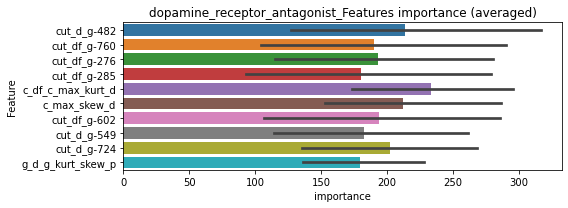

len(train_index) : 5749
len(valid_index) : 1917
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0160569	valid_1's binary_logloss: 0.0263105
[2000]	training's binary_logloss: 0.00804479	valid_1's binary_logloss: 0.0176091
[3000]	training's binary_logloss: 0.00540952	valid_1's binary_logloss: 0.0145725
[4000]	training's binary_logloss: 0.0040787	valid_1's binary_logloss: 0.0129384
[5000]	training's binary_logloss: 0.00329589	valid_1's binary_logloss: 0.0120618
[6000]	training's binary_logloss: 0.00276185	valid_1's binary_logloss: 0.0113288
[7000]	training's binary_logloss: 0.00238441	valid_1's binary_logloss: 0.01086
Early stopping, best iteration is:
[7435]	training's binary_logloss: 0.00225447	valid_1's binary_logloss: 0.0107239


len(train_index) : 5749
len(valid_index) : 1917
================================= fold 2/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0166512	valid_1's binary_logloss: 0.0231785
[2000]	training's binary_logloss: 0.00835848	valid_1's binary_logloss: 0.0144694
[3000]	training's binary_logloss: 0.00559364	valid_1's binary_logloss: 0.011494
[4000]	training's binary_logloss: 0.00422614	valid_1's binary_logloss: 0.00993525
[5000]	training's binary_logloss: 0.0034082	valid_1's binary_logloss: 0.0090287
[6000]	training's binary_logloss: 0.00285742	valid_1's binary_logloss: 0.00834174
[7000]	training's binary_logloss: 0.00246514	valid_1's binary_logloss: 0.00787963
[8000]	training's binary_logloss: 0.00217322	valid_1's binary_logloss: 0.00751723
[9000]	training's binary_logloss: 0.0019434	valid_1's binary_logloss: 0.00723033
Early stopping, best iteration is:
[9813]	training's binary_logloss: 0.00179415	valid_1's binary_logloss: 0.00705675


len(train_index) : 5750
len(valid_index) : 1916
================================= fold 3/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0164066	valid_1's binary_logloss: 0.0256909
[2000]	training's binary_logloss: 0.0081913	valid_1's binary_logloss: 0.0170756
[3000]	training's binary_logloss: 0.00549583	valid_1's binary_logloss: 0.0142195
[4000]	training's binary_logloss: 0.00414533	valid_1's binary_logloss: 0.0127536
[5000]	training's binary_logloss: 0.00334556	valid_1's binary_logloss: 0.0119179
[6000]	training's binary_logloss: 0.00280965	valid_1's binary_logloss: 0.0113126
[7000]	training's binary_logloss: 0.0024251	valid_1's binary_logloss: 0.0109122
[8000]	training's binary_logloss: 0.00213766	valid_1's binary_logloss: 0.0105921
Early stopping, best iteration is:
[8532]	training's binary_logloss: 0.00201239	valid_1's binary_logloss: 0.0104465


len(train_index) : 5750
len(valid_index) : 1916
================================= fold 4/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0169665	valid_1's binary_logloss: 0.0219134
[2000]	training's binary_logloss: 0.00856452	valid_1's binary_logloss: 0.0129837
[3000]	training's binary_logloss: 0.00574768	valid_1's binary_logloss: 0.00988846
[4000]	training's binary_logloss: 0.0043407	valid_1's binary_logloss: 0.00830184
[5000]	training's binary_logloss: 0.00350288	valid_1's binary_logloss: 0.00734227
[6000]	training's binary_logloss: 0.00293131	valid_1's binary_logloss: 0.00663155
[7000]	training's binary_logloss: 0.00252564	valid_1's binary_logloss: 0.00613036
[8000]	training's binary_logloss: 0.00222517	valid_1's binary_logloss: 0.00573761
[9000]	training's binary_logloss: 0.00198926	valid_1's binary_logloss: 0.00541389
[10000]	training's binary_logloss: 0.00180226	valid_1's binary_logloss: 0.00517457
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00180226	valid_1's binary_logloss: 0.

dopamine_receptor_antagonist logloss: 0.008350574537930217


mutually exclusive columns: egfr_inhibitor


egfr_inhibitor, len(trt): 336, len(othr): 7554
target_rate: 0.0141093 → Adj_target_rate: 0.0117920


selected negative label: 7554


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0496081	valid_1's binary_logloss: 0.134212
Early stopping, best iteration is:
[1543]	training's binary_logloss: 0.0315256	valid_1's binary_logloss: 0.128962
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0485994	valid_1's binary_logloss: 0.138134
Early stopping, best iteration is:
[1308]	training's binary_logloss: 0.0367612	valid_1's binary_logloss: 0.134875
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0482071	valid_1's binary_logloss: 0.14449
Early stopping, best iteration is:
[1086]	training's binary_logloss: 0.0443028	valid_1's binary_logloss: 0.143467
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0481549	valid_1's binary_logloss: 0.144876
Early stopping, best iteration is:
[1376]	training's binary_logloss: 0.0344485	valid_1's binary_log

1 / 3, AUC score:0.957, PR-AUC:0.922
y_Threshold: 0.0660670, Threshold: 0.1326756, pos_neg_ratio: 0.8000000
Remove_noisy_data: 673 → Positive_corect_labels: 1325/8391
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, Expected: 56.2, Threshold: 0.1326756, conf_0:0.09287, conf_1:0.17248
threshold: 0.1326756, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1325.0/8391, y_label_rate: 0.1579073
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0293921	valid_1's binary_logloss: 0.0688561
Early stopping, best iteration is:
[1913]	training's binary_logloss: 0.0149074	valid_1's binary_logloss: 0.0611426
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285474	valid_1's binary_logloss: 0.0820956
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0145329	valid_1's binary_logloss: 0.0754982
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0294392	valid_1's binary_logloss: 0.0673654
[2000]	training's binary_logloss: 0.0142167	valid_1's binary_logloss: 0.058744
Early stopping, best iteration is:
[2493]	training's binary_logloss: 0.0112361	valid_1's binary_logloss: 0.0571381
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285981	valid_1's binary_logloss: 0.078222
Early stoppin

2 / 3, AUC score:0.995, PR-AUC:0.983
y_Threshold: 0.0652968, Threshold: 0.1326756, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 1248.0/8237
p_label_rate: 0.0138122 Vs.target_rate: 0.01411
Num_p_label: 55.0, Expected: 56.2, Threshold: 0.1326756, conf_0:0.10614, conf_1:0.15921
threshold: 0.1326756, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 1248.0/8237, y_label_rate: 0.1515115
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0197717	valid_1's binary_logloss: 0.0383873
[2000]	training's binary_logloss: 0.00975367	valid_1's binary_logloss: 0.0312733
[3000]	training's binary_logloss: 0.00641172	valid_1's binary_logloss: 0.0289902
Early stopping, best iteration is:
[3400]	training's binary_logloss: 0.00562178	valid_1's binary_logloss: 0.0284539
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0202284	valid_1's binary_logloss: 0.0385013
[2000]	training's binary_logloss: 0.00991229	valid_1's binary_logloss: 0.0311487
[3000]	training's binary_logloss: 0.00648003	valid_1's binary_logloss: 0.0287111
Early stopping, best iteration is:
[3266]	training's binary_logloss: 0.00592205	valid_1's binary_logloss: 0.028316
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0193607	valid_1's binary_logloss: 0.0464406
[2000]	training's bina

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0560906, Threshold: 0.1326756, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 1213.0/8167
p_label_rate: 0.0183325 Vs.target_rate: 0.01411
Num_p_label: 73.0, Expected: 56.2, Threshold: 0.1326756, conf_0:0.11941, conf_1:0.14594
threshold: 0.1326756, positive_p_label: 73.0/3982, p_label_rate: 0.0183325
positive_y_label: 1213.0/8167, y_label_rate: 0.1485246


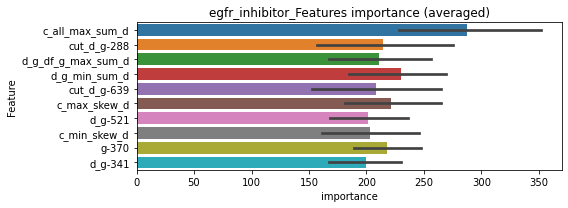

len(train_index) : 6125
len(valid_index) : 2042
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0200492	valid_1's binary_logloss: 0.0368049
[2000]	training's binary_logloss: 0.0102683	valid_1's binary_logloss: 0.0270836
[3000]	training's binary_logloss: 0.00688587	valid_1's binary_logloss: 0.0238677
[4000]	training's binary_logloss: 0.00517799	valid_1's binary_logloss: 0.0223325
[5000]	training's binary_logloss: 0.00415086	valid_1's binary_logloss: 0.0214547
[6000]	training's binary_logloss: 0.00346412	valid_1's binary_logloss: 0.0208363
Early stopping, best iteration is:
[6643]	training's binary_logloss: 0.0031341	valid_1's binary_logloss: 0.0205586


len(train_index) : 6125
len(valid_index) : 2042
================================= fold 2/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0202789	valid_1's binary_logloss: 0.0351544
[2000]	training's binary_logloss: 0.0102872	valid_1's binary_logloss: 0.026593
[3000]	training's binary_logloss: 0.00689512	valid_1's binary_logloss: 0.0237451
[4000]	training's binary_logloss: 0.0051944	valid_1's binary_logloss: 0.022371
Early stopping, best iteration is:
[4258]	training's binary_logloss: 0.00488402	valid_1's binary_logloss: 0.0221012


len(train_index) : 6125
len(valid_index) : 2042
================================= fold 3/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0210522	valid_1's binary_logloss: 0.0319027
[2000]	training's binary_logloss: 0.0107193	valid_1's binary_logloss: 0.0215452
[3000]	training's binary_logloss: 0.00716934	valid_1's binary_logloss: 0.0178644
[4000]	training's binary_logloss: 0.00538914	valid_1's binary_logloss: 0.015923
[5000]	training's binary_logloss: 0.00431626	valid_1's binary_logloss: 0.0146902
[6000]	training's binary_logloss: 0.00360261	valid_1's binary_logloss: 0.0138413
[7000]	training's binary_logloss: 0.00309322	valid_1's binary_logloss: 0.0132208
[8000]	training's binary_logloss: 0.00271716	valid_1's binary_logloss: 0.0127242
[9000]	training's binary_logloss: 0.002426	valid_1's binary_logloss: 0.0123479
Early stopping, best iteration is:
[9299]	training's binary_logloss: 0.00235076	valid_1's binary_logloss: 0.0122467


len(train_index) : 6126
len(valid_index) : 2041
================================= fold 4/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.021961	valid_1's binary_logloss: 0.0292105
[2000]	training's binary_logloss: 0.0112092	valid_1's binary_logloss: 0.0192837
[3000]	training's binary_logloss: 0.00750842	valid_1's binary_logloss: 0.0159861
[4000]	training's binary_logloss: 0.00562227	valid_1's binary_logloss: 0.0142935
[5000]	training's binary_logloss: 0.00450712	valid_1's binary_logloss: 0.013208
[6000]	training's binary_logloss: 0.00376139	valid_1's binary_logloss: 0.0124991
[7000]	training's binary_logloss: 0.00322615	valid_1's binary_logloss: 0.0119452
[8000]	training's binary_logloss: 0.00283105	valid_1's binary_logloss: 0.0114866
Early stopping, best iteration is:
[8925]	training's binary_logloss: 0.0025458	valid_1's binary_logloss: 0.0111634


egfr_inhibitor logloss: 0.016518141452783807
elastase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00021731	valid_1's binary_logloss: 0.00743131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000222571	valid_1's binary_logloss: 0.00271826
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000208581	valid_1's binary_logloss: 0.000217773
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0006912, Threshold: 0.0015813, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0015813, conf_0:0.00111, conf_1:0.00206
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0315813
threshold: 0.0315813, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000202326	valid_1's binary_logloss: 0.00216877


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00020966	valid_1's binary_logloss: 0.00647402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000208228	valid_1's binary_logloss: 0.0023446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00020458	valid_1's binary_logloss: 0.000215224
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0076805, Threshold: 0.0315813, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000198115	valid_1's binary_logloss: 0.00215872


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, Expected: 2.0, Threshold: 0.0315813, conf_0:0.02527, conf_1:0.03790
threshold: 0.0315813, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00020966	valid_1's binary_logloss: 0.00647402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000208228	valid_1's binary_logloss: 0.0023446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00020458	valid_1's binary_logloss: 0.000215224
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0076805, Threshold: 0.0315813, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, Expected: 2.0, Threshold: 0.0315813, conf_0:0.02842, conf_1:0.03474
threshold: 0.0315813, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000198115	valid_1's binary_logloss: 0.00215872


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


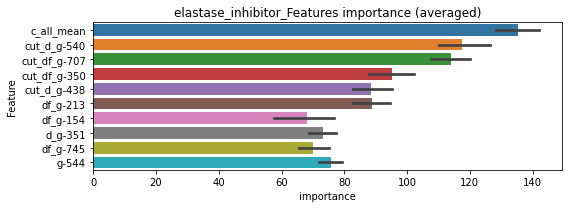

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000261851	valid_1's binary_logloss: 0.00401967
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000210655	valid_1's binary_logloss: 0.00176177
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000209838	valid_1's binary_logloss: 0.000220704
Training until validation scores don't improve for 30 rounds


elastase_inhibitor logloss: 0.0018236495582035794


Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000211227	valid_1's binary_logloss: 0.00129246


erbb2_inhibitor, len(trt): 20, len(othr): 3286
target_rate: 0.0008398 → Adj_target_rate: 0.0010717


selected negative label: 3286


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.00124385	valid_1's binary_logloss: 0.0180395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000285152	valid_1's binary_logloss: 0.0140802
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000285466	valid_1's binary_logloss: 0.001635
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016121, Threshold: 0.0023494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, Expected: 3.3, Threshold: 0.0023494, conf_0:0.00164, conf_1:0.00305
Num_p_label: 0.0, Expected: 3.3, Adj_threshold_1: 0.0323494
threshold: 0.0323494, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000282861	valid_1's binary_logloss: 0.00507725


positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000319553	valid_1's binary_logloss: 0.0107799
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000280776	valid_1's binary_logloss: 0.00485533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000293828	valid_1's binary_logloss: 0.00419794
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0107039, Threshold: 0.0323494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0000000 Vs.target_rate: 0.00084
Num_p_label: 0.0, Expected: 3.3, Threshold: 0.0323494, conf_0:0.02588, conf_1:0.03882
threshold: 0.0323494, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000300429	valid_1's binary_logloss: 0.00423185


positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000319553	valid_1's binary_logloss: 0.0107799
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000280776	valid_1's binary_logloss: 0.00485533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000293828	valid_1's binary_logloss: 0.00419794
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0107039, Threshold: 0.0323494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0000000 Vs.target_rate: 0.00084
Num_p_label: 0.0, Expected: 3.3, Threshold: 0.0323494, conf_0:0.02911, conf_1:0.03558


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000300429	valid_1's binary_logloss: 0.00423185


threshold: 0.0323494, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


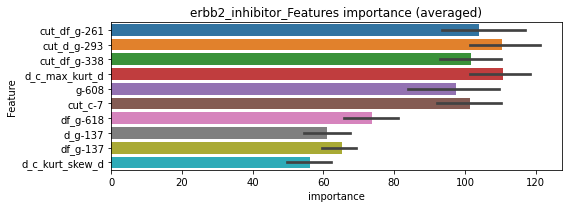

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 erbb2_inhibitor=================================


Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000314228	valid_1's binary_logloss: 0.00859177
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 erbb2_inhibitor=================================


Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000288955	valid_1's binary_logloss: 0.00293093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000394423	valid_1's binary_logloss: 0.00393481


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds


erbb2_inhibitor logloss: 0.005145592243003367


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00030434	valid_1's binary_logloss: 0.00511848
mutually exclusive columns: estrogen_receptor_agonist


estrogen_receptor_agonist, len(trt): 158, len(othr): 3996
target_rate: 0.0066348 → Adj_target_rate: 0.0062095


selected negative label: 3996


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0436789	valid_1's binary_logloss: 0.116639
Early stopping, best iteration is:
[1798]	training's binary_logloss: 0.0239634	valid_1's binary_logloss: 0.10914
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.0447537	valid_1's binary_logloss: 0.132465
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0444313	valid_1's binary_logloss: 0.112418
Early stopping, best iteration is:
[1528]	training's binary_logloss: 0.0287225	valid_1's binary_logloss: 0.107475
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.0464332	valid_1's binary_logloss: 0.13916


1 / 3, AUC score:0.971, PR-AUC:0.940
y_Threshold: 0.0649085, Threshold: 0.0951061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 318 → Positive_corect_labels: 720/4477
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, Expected: 26.4, Threshold: 0.0951061, conf_0:0.06657, conf_1:0.12364
Num_p_label: 19.0, Expected: 26.4, Adj_threshold_1: 0.1251061
threshold: 0.1251061, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 720.0/4477, y_label_rate: 0.1608220
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0284404	valid_1's binary_logloss: 0.0809089
Early stopping, best iteration is:
[1728]	training's binary_logloss: 0.0163099	valid_1's binary_logloss: 0.0749732
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0291533	valid_1's binary_logloss: 0.0683185
[2000]	training's binary_logloss: 0.0143881	valid_1's binary_logloss: 0.0604225
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0136803	valid_1's binary_logloss: 0.0599663
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0287263	valid_1's binary_logloss: 0.0733108
Early stopping, best iteration is:
[1664]	training's binary_logloss: 0.0171091	valid_1's binary_logloss: 0.0671328
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0293294	valid_1's binary_logloss: 0.0643301
[2000]	trai

2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0533518, Threshold: 0.1251061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 687.0/4411
p_label_rate: 0.0067805 Vs.target_rate: 0.00663
Num_p_label: 27.0, Expected: 26.4, Threshold: 0.1251061, conf_0:0.10008, conf_1:0.15013
threshold: 0.1251061, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 687.0/4411, y_label_rate: 0.1557470
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0237008	valid_1's binary_logloss: 0.0444699
[2000]	training's binary_logloss: 0.011747	valid_1's binary_logloss: 0.0355464
Early stopping, best iteration is:
[2872]	training's binary_logloss: 0.00808891	valid_1's binary_logloss: 0.0326202
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0221522	valid_1's binary_logloss: 0.058273
[2000]	training's binary_logloss: 0.0109682	valid_1's binary_logloss: 0.0508145
Early stopping, best iteration is:
[2105]	training's binary_logloss: 0.0104108	valid_1's binary_logloss: 0.0503903
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0235043	valid_1's binary_logloss: 0.0444619
[2000]	training's binary_logloss: 0.011663	valid_1's binary_logloss: 0.0356195
[3000]	training's binary_logloss: 0.00770162	valid_1's binary_logloss: 0.0327959
Early stopping, best iterati

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0463687, Threshold: 0.1251061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 673.0/4383
p_label_rate: 0.0080362 Vs.target_rate: 0.00663
Num_p_label: 32.0, Expected: 26.4, Threshold: 0.1251061, conf_0:0.11260, conf_1:0.13762
threshold: 0.1251061, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 673.0/4383, y_label_rate: 0.1535478


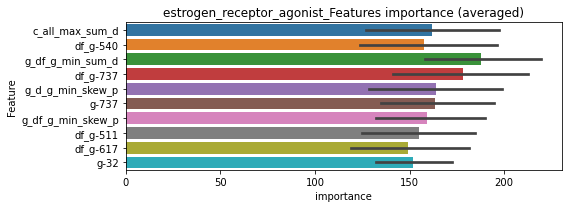

len(train_index) : 3287
len(valid_index) : 1096
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0286358	valid_1's binary_logloss: 0.0534777
[2000]	training's binary_logloss: 0.0146476	valid_1's binary_logloss: 0.0422055
[3000]	training's binary_logloss: 0.00974005	valid_1's binary_logloss: 0.0384956
Early stopping, best iteration is:
[3339]	training's binary_logloss: 0.00875611	valid_1's binary_logloss: 0.0377725


len(train_index) : 3287
len(valid_index) : 1096
================================= fold 2/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0274177	valid_1's binary_logloss: 0.0623361
[2000]	training's binary_logloss: 0.0140749	valid_1's binary_logloss: 0.0505708
Early stopping, best iteration is:
[2947]	training's binary_logloss: 0.00953143	valid_1's binary_logloss: 0.0465739


len(train_index) : 3287
len(valid_index) : 1096
================================= fold 3/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0301162	valid_1's binary_logloss: 0.038638
[2000]	training's binary_logloss: 0.0155241	valid_1's binary_logloss: 0.0257176
[3000]	training's binary_logloss: 0.0103345	valid_1's binary_logloss: 0.0212055
[4000]	training's binary_logloss: 0.00773347	valid_1's binary_logloss: 0.0188204
[5000]	training's binary_logloss: 0.00619272	valid_1's binary_logloss: 0.0173655
[6000]	training's binary_logloss: 0.00516127	valid_1's binary_logloss: 0.0163891
[7000]	training's binary_logloss: 0.00443798	valid_1's binary_logloss: 0.0157457
[8000]	training's binary_logloss: 0.00389827	valid_1's binary_logloss: 0.0152294
[9000]	training's binary_logloss: 0.00347988	valid_1's binary_logloss: 0.0148239
Early stopping, best iteration is:
[9302]	training's binary_logloss: 0.00336987	valid_1's binary_logloss: 0.0147212


len(train_index) : 3288
len(valid_index) : 1095
================================= fold 4/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0294319	valid_1's binary_logloss: 0.0450701
[2000]	training's binary_logloss: 0.0150832	valid_1's binary_logloss: 0.0323326
[3000]	training's binary_logloss: 0.0100643	valid_1's binary_logloss: 0.0280431
[4000]	training's binary_logloss: 0.00754199	valid_1's binary_logloss: 0.0257903
[5000]	training's binary_logloss: 0.00605016	valid_1's binary_logloss: 0.024537
[6000]	training's binary_logloss: 0.00504781	valid_1's binary_logloss: 0.0236879
[7000]	training's binary_logloss: 0.00433747	valid_1's binary_logloss: 0.0230895
Early stopping, best iteration is:
[6975]	training's binary_logloss: 0.00435172	valid_1's binary_logloss: 0.0230835


estrogen_receptor_agonist logloss: 0.030539477744083325
estrogen_receptor_agonist is unpredictable(><)!
estrogen_receptor_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000522889	valid_1's binary_logloss: 0.0383203
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00140595	valid_1's binary_logloss: 0.0277012
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000507956	valid_1's binary_logloss: 0.00455297
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0048569, Threshold: 0.0374580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0374580, conf_0:0.02622, conf_1:0.04870
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_1: 0.0674580
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_2: 0.0974580
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_3: 0.1274580
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_4: 0.1574580
threshold: 0.1574580, positive_p_label: 19.0/3982, p_label_rate: 0.0047715


Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00325852	valid_1's binary_logloss: 0.043791


positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000561358	valid_1's binary_logloss: 0.0233865
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000762779	valid_1's binary_logloss: 0.0264029
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000592857	valid_1's binary_logloss: 0.0267707
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113312, Threshold: 0.1574580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0075339 Vs.target_rate: 0.00202


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000565426	valid_1's binary_logloss: 0.0134603


Num_p_label: 30.0, Expected: 8.0, Threshold: 0.1574580, conf_0:0.12597, conf_1:0.18895
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_1: 0.1874580
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_2: 0.2174580
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_3: 0.2474580
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_4: 0.2774580
threshold: 0.2774580, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 648.0/3792, y_label_rate: 0.1708861
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000590822	valid_1's binary_logloss: 0.0236587
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000576907	valid_1's binary_logloss: 0.022938
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000540876	valid_1's binary_logloss: 0.0161029
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000439598	valid_1's binary_logloss: 0.0118612


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0121353, Threshold: 0.2774580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 647.0/3790
p_label_rate: 0.0052737 Vs.target_rate: 0.00202
Num_p_label: 21.0, Expected: 8.0, Threshold: 0.2774580, conf_0:0.24971, conf_1:0.30520
Num_p_label: 17.0, Expected: 8.0, Adj_threshold_1: 0.3074580
threshold: 0.3074580, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3790, y_label_rate: 0.1707124


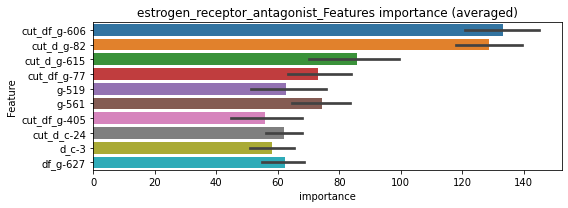

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00056502	valid_1's binary_logloss: 0.0188453
Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[352]	training's binary_logloss: 0.000779798	valid_1's binary_logloss: 0.0214575
Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000556664	valid_1's binary_logloss: 0.0189784
Training until validation scores don't improve for 30 rounds


estrogen_receptor_antagonist logloss: 0.019301610135570173


Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00106242	valid_1's binary_logloss: 0.0179234


faah_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.00051893	valid_1's binary_logloss: 0.0259338
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000498815	valid_1's binary_logloss: 0.0339844
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000682083	valid_1's binary_logloss: 0.00994867
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017619, Threshold: 0.0041907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000418985	valid_1's binary_logloss: 0.0156899


p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0041907, conf_0:0.00293, conf_1:0.00545
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0341907
threshold: 0.0341907, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000495702	valid_1's binary_logloss: 0.0256299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000524677	valid_1's binary_logloss: 0.0343623
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000459533	valid_1's binary_logloss: 0.0104397
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0092868, Threshold: 0.0341907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0005023 Vs.target_rate: 0.00151
Num_p_label: 2.0, Expected: 6.0, Threshold: 0.0341907, conf_0:0.02735, conf_1:0.04103


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000490746	valid_1's binary_logloss: 0.0148567


threshold: 0.0341907, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000485134	valid_1's binary_logloss: 0.0349875
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000908415	valid_1's binary_logloss: 0.0244262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000381669	valid_1's binary_logloss: 0.000911756
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0101616, Threshold: 0.0341907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0005023 Vs.target_rate: 0.00151
Num_p_label: 2.0, Expected: 6.0, Threshold: 0.0341907, conf_0:0.03077, conf_1:0.03761
threshold: 0.0341907, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000558555	valid_1's binary_logloss: 0.023922


positive_y_label: 655.0/3806, y_label_rate: 0.1720967


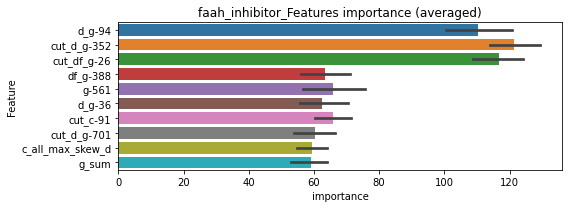

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 faah_inhibitor=================================


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.000736237	valid_1's binary_logloss: 0.0245053
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 faah_inhibitor=================================


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.0007022	valid_1's binary_logloss: 0.0138603
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 faah_inhibitor=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000458856	valid_1's binary_logloss: 0.0123289
Training until validation scores don't improve for 30 rounds


faah_inhibitor logloss: 0.017805096069983154


Early stopping, best iteration is:
[356]	training's binary_logloss: 0.00066438	valid_1's binary_logloss: 0.020523


farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000279207	valid_1's binary_logloss: 0.00468813
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000326364	valid_1's binary_logloss: 0.00894331
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000285494	valid_1's binary_logloss: 0.000378778
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015661, Threshold: 0.0026844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0026844, conf_0:0.00188, conf_1:0.00349
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0326844
threshold: 0.0326844, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[249]	training's binary_logloss: 0.00116289	valid_1's binary_logloss: 0.0182353


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000283307	valid_1's binary_logloss: 0.00526394
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.000349503	valid_1's binary_logloss: 0.00807184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000285409	valid_1's binary_logloss: 0.000367423
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.00123262	valid_1's binary_logloss: 0.0171671


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0085516, Threshold: 0.0326844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, Expected: 3.0, Threshold: 0.0326844, conf_0:0.02615, conf_1:0.03922
threshold: 0.0326844, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000285791	valid_1's binary_logloss: 0.00826544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000283229	valid_1's binary_logloss: 0.00846074
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000285348	valid_1's binary_logloss: 0.00035443
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0088018, Threshold: 0.0326844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, Expected: 3.0, Threshold: 0.0326844, conf_0:0.02942, conf_1:0.03595
threshold: 0.0326844, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000325879	valid_1's binary_logloss: 0.0101674


positive_y_label: 655.0/3809, y_label_rate: 0.1719611


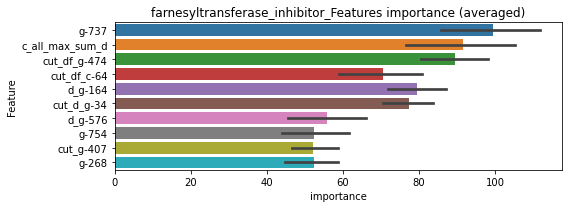

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000287473	valid_1's binary_logloss: 0.00569184
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000294494	valid_1's binary_logloss: 0.00139494
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000334504	valid_1's binary_logloss: 0.00694024
Training until validation scores don't improve for 30 rounds


farnesyltransferase_inhibitor logloss: 0.004708080125749659


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000345772	valid_1's binary_logloss: 0.00480362


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3287
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3287


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000335463	valid_1's binary_logloss: 0.00924284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00039516	valid_1's binary_logloss: 0.0153627
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000334627	valid_1's binary_logloss: 0.00326135
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012794, Threshold: 0.0035314, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0035314, conf_0:0.00247, conf_1:0.00459
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0335314


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000327515	valid_1's binary_logloss: 0.00711483


threshold: 0.0335314, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000355058	valid_1's binary_logloss: 0.00920019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000319461	valid_1's binary_logloss: 0.0156988
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000362199	valid_1's binary_logloss: 0.00280078
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215827, Threshold: 0.0335314, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, Expected: 4.2, Threshold: 0.0335314, conf_0:0.02683, conf_1:0.04024
threshold: 0.0335314, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000325919	valid_1's binary_logloss: 0.00652069


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000355058	valid_1's binary_logloss: 0.00920019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000319461	valid_1's binary_logloss: 0.0156988
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000362199	valid_1's binary_logloss: 0.00280078
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000325919	valid_1's binary_logloss: 0.00652069


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215827, Threshold: 0.0335314, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, Expected: 4.2, Threshold: 0.0335314, conf_0:0.03018, conf_1:0.03688
threshold: 0.0335314, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


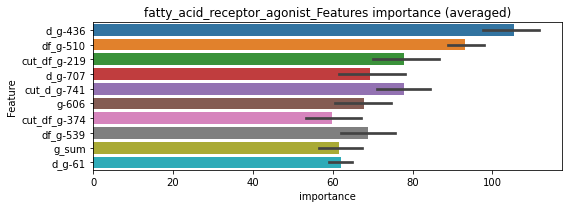

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000415877	valid_1's binary_logloss: 0.00880335
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000365935	valid_1's binary_logloss: 0.0121541
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000353	valid_1's binary_logloss: 0.00312232


================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.00032978	valid_1's binary_logloss: 0.00648109


fatty_acid_receptor_agonist logloss: 0.007641203365504829
fgfr_inhibitor, len(trt): 50, len(othr): 3287
target_rate: 0.0020996 → Adj_target_rate: 0.0023352


selected negative label: 3287


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000552169	valid_1's binary_logloss: 0.0323703
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.00136782	valid_1's binary_logloss: 0.0490049
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000702443	valid_1's binary_logloss: 0.0134916
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0038278, Threshold: 0.0124609, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000667733	valid_1's binary_logloss: 0.0227948


Remove_noisy_data: 134 → Positive_corect_labels: 656/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, Expected: 8.4, Threshold: 0.0124609, conf_0:0.00872, conf_1:0.01620
Num_p_label: 11.0, Expected: 8.4, Adj_threshold_1: 0.0424609
threshold: 0.0424609, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.00171607	valid_1's binary_logloss: 0.0437209
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000568494	valid_1's binary_logloss: 0.0237555
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000526168	valid_1's binary_logloss: 0.00545188
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0152926, Threshold: 0.0424609, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3800
p_label_rate: 0.0030136 Vs.target_rate: 0.00210
Num_p_label: 12.0, Expected: 8.4, Threshold: 0.0424609, conf_0:0.03397, conf_1:0.05095
threshold: 0.0424609, positive_p_label: 12.0/3982, p_label_rate: 0.0030136


Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00126288	valid_1's binary_logloss: 0.0369431


positive_y_label: 651.0/3800, y_label_rate: 0.1713158
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000778927	valid_1's binary_logloss: 0.020895
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000777327	valid_1's binary_logloss: 0.0435118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000458175	valid_1's binary_logloss: 0.012037
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0157546, Threshold: 0.0424609, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3796
p_label_rate: 0.0025113 Vs.target_rate: 0.00210
Num_p_label: 10.0, Expected: 8.4, Threshold: 0.0424609, conf_0:0.03821, conf_1:0.04671


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000930033	valid_1's binary_logloss: 0.020144


threshold: 0.0424609, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 649.0/3796, y_label_rate: 0.1709694


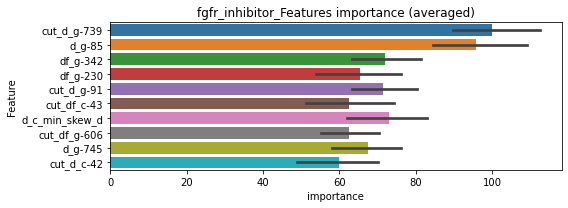

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 fgfr_inhibitor=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.00080065	valid_1's binary_logloss: 0.0217016
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 fgfr_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000789864	valid_1's binary_logloss: 0.0276354
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 fgfr_inhibitor=================================


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.000818257	valid_1's binary_logloss: 0.0167752
Training until validation scores don't improve for 30 rounds


fgfr_inhibitor logloss: 0.021174389174933847


Early stopping, best iteration is:
[294]	training's binary_logloss: 0.00105561	valid_1's binary_logloss: 0.0185853
mutually exclusive columns: flt3_inhibitor


flt3_inhibitor, len(trt): 279, len(othr): 6506
target_rate: 0.0117158 → Adj_target_rate: 0.0100684


selected negative label: 6506


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0457172	valid_1's binary_logloss: 0.141977
Early stopping, best iteration is:
[1610]	training's binary_logloss: 0.0276408	valid_1's binary_logloss: 0.136426
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0458323	valid_1's binary_logloss: 0.144185
Early stopping, best iteration is:
[1390]	training's binary_logloss: 0.0324495	valid_1's binary_logloss: 0.140328
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0473862	valid_1's binary_logloss: 0.117447
[2000]	training's binary_logloss: 0.0225184	valid_1's binary_logloss: 0.106296
Early stopping, best iteration is:
[2108]	training's binary_logloss: 0.0212624	valid_1's binary_logloss: 0.105726
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0458278	valid_1's binary_logloss: 0.138932
Early stopping, bes

1 / 3, AUC score:0.966, PR-AUC:0.936
y_Threshold: 0.0599442, Threshold: 0.0953055, pos_neg_ratio: 0.8000000
Remove_noisy_data: 515 → Positive_corect_labels: 1174/7292
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, Expected: 46.7, Threshold: 0.0953055, conf_0:0.06671, conf_1:0.12390
threshold: 0.0953055, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1174.0/7292, y_label_rate: 0.1609984
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319452	valid_1's binary_logloss: 0.0828608
[2000]	training's binary_logloss: 0.0154574	valid_1's binary_logloss: 0.0731479
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.0140776	valid_1's binary_logloss: 0.0724299
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0313124	valid_1's binary_logloss: 0.0949109
Early stopping, best iteration is:
[1820]	training's binary_logloss: 0.0167426	valid_1's binary_logloss: 0.0889737
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0324389	valid_1's binary_logloss: 0.0775061
Early stopping, best iteration is:
[1898]	training's binary_logloss: 0.0165641	valid_1's binary_logloss: 0.0679094
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0318606	valid_1's binary_logloss: 0.0813195
[2000]	trai

2 / 3, AUC score:0.994, PR-AUC:0.985
y_Threshold: 0.0602602, Threshold: 0.0953055, pos_neg_ratio: 0.8000000
Remove_noisy_data: 124 → Positive_corect_labels: 1112.0/7168
p_label_rate: 0.0155701 Vs.target_rate: 0.01172
Num_p_label: 62.0, Expected: 46.7, Threshold: 0.0953055, conf_0:0.07624, conf_1:0.11437
threshold: 0.0953055, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 1112.0/7168, y_label_rate: 0.1551339
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248337	valid_1's binary_logloss: 0.0548481
[2000]	training's binary_logloss: 0.0121715	valid_1's binary_logloss: 0.0461884
Early stopping, best iteration is:
[2812]	training's binary_logloss: 0.00851996	valid_1's binary_logloss: 0.0438042
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248752	valid_1's binary_logloss: 0.0596034
[2000]	training's binary_logloss: 0.0121169	valid_1's binary_logloss: 0.050538
Early stopping, best iteration is:
[2689]	training's binary_logloss: 0.00888175	valid_1's binary_logloss: 0.0481886
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.024287	valid_1's binary_logloss: 0.0623563
[2000]	training's binary_logloss: 0.0119016	valid_1's binary_logloss: 0.0551456
Early stopping, best iteration is:
[2565]	training's binary_logloss: 0.00915992	valid_1's binary_logloss: 0

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0426192, Threshold: 0.0953055, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 1077.0/7098
p_label_rate: 0.0140633 Vs.target_rate: 0.01172
Num_p_label: 56.0, Expected: 46.7, Threshold: 0.0953055, conf_0:0.08577, conf_1:0.10484
threshold: 0.0953055, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 1077.0/7098, y_label_rate: 0.1517329


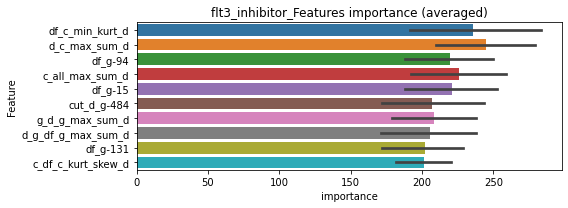

len(train_index) : 5323
len(valid_index) : 1775
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0290985	valid_1's binary_logloss: 0.047485
[2000]	training's binary_logloss: 0.0149696	valid_1's binary_logloss: 0.0356026
[3000]	training's binary_logloss: 0.0099579	valid_1's binary_logloss: 0.0312606
[4000]	training's binary_logloss: 0.00741475	valid_1's binary_logloss: 0.028943
[5000]	training's binary_logloss: 0.0059113	valid_1's binary_logloss: 0.0275695
Early stopping, best iteration is:
[5197]	training's binary_logloss: 0.00568267	valid_1's binary_logloss: 0.0273613


len(train_index) : 5323
len(valid_index) : 1775
================================= fold 2/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0282092	valid_1's binary_logloss: 0.0485979
[2000]	training's binary_logloss: 0.0145332	valid_1's binary_logloss: 0.0378882
[3000]	training's binary_logloss: 0.00966144	valid_1's binary_logloss: 0.0342831
[4000]	training's binary_logloss: 0.00717799	valid_1's binary_logloss: 0.0324093
Early stopping, best iteration is:
[4296]	training's binary_logloss: 0.00667913	valid_1's binary_logloss: 0.0320693


len(train_index) : 5324
len(valid_index) : 1774
================================= fold 3/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0274135	valid_1's binary_logloss: 0.0542614
[2000]	training's binary_logloss: 0.0141838	valid_1's binary_logloss: 0.0430836
[3000]	training's binary_logloss: 0.0094451	valid_1's binary_logloss: 0.0393975
[4000]	training's binary_logloss: 0.0070316	valid_1's binary_logloss: 0.0374037
Early stopping, best iteration is:
[4485]	training's binary_logloss: 0.0062508	valid_1's binary_logloss: 0.0368024


len(train_index) : 5324
len(valid_index) : 1774
================================= fold 4/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0282564	valid_1's binary_logloss: 0.0478473
[2000]	training's binary_logloss: 0.0145647	valid_1's binary_logloss: 0.0376533
[3000]	training's binary_logloss: 0.00969505	valid_1's binary_logloss: 0.033927
Early stopping, best iteration is:
[3132]	training's binary_logloss: 0.00926979	valid_1's binary_logloss: 0.033585


flt3_inhibitor logloss: 0.032453762078179155
flt3_inhibitor is unpredictable(><)!
focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000271838	valid_1's binary_logloss: 0.00793293
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000286545	valid_1's binary_logloss: 0.00988716
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000261631	valid_1's binary_logloss: 0.00116966
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014842, Threshold: 0.0042983, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0042983, conf_0:0.00301, conf_1:0.00559
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0342983
threshold: 0.0342983, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[264]	training's binary_logloss: 0.000941558	valid_1's binary_logloss: 0.0118282


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000295047	valid_1's binary_logloss: 0.0085466
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000314474	valid_1's binary_logloss: 0.0087425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000265202	valid_1's binary_logloss: 0.000783798
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0084021, Threshold: 0.0342983, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0342983, conf_0:0.02744, conf_1:0.04116
threshold: 0.0342983, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[345]	training's binary_logloss: 0.000456029	valid_1's binary_logloss: 0.0103366


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000295047	valid_1's binary_logloss: 0.0085466
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000314474	valid_1's binary_logloss: 0.0087425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000265202	valid_1's binary_logloss: 0.000783798
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0084021, Threshold: 0.0342983, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0342983, conf_0:0.03087, conf_1:0.03773


Early stopping, best iteration is:
[345]	training's binary_logloss: 0.000456029	valid_1's binary_logloss: 0.0103366


threshold: 0.0342983, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


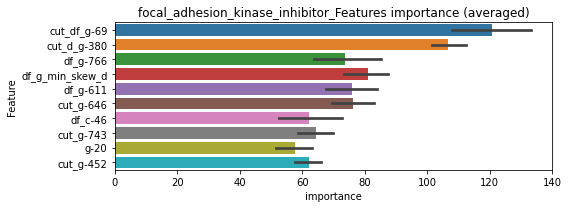

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00035646	valid_1's binary_logloss: 0.00700287
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000325219	valid_1's binary_logloss: 0.00722652
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000288536	valid_1's binary_logloss: 0.000865894
Training until validation scores don't improve for 30 rounds


focal_adhesion_kinase_inhibitor logloss: 0.006092832126561444


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000298586	valid_1's binary_logloss: 0.00927535


free_radical_scavenger, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000264936	valid_1's binary_logloss: 0.00316223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000271366	valid_1's binary_logloss: 0.0104068
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000264872	valid_1's binary_logloss: 0.000626039
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008116, Threshold: 0.0027836, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0027836, conf_0:0.00195, conf_1:0.00362
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_1: 0.0327836


Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000298777	valid_1's binary_logloss: 0.00521005


threshold: 0.0327836, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000261831	valid_1's binary_logloss: 0.00292388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000302458	valid_1's binary_logloss: 0.0105129
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.0002596	valid_1's binary_logloss: 0.000561966
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0226803, Threshold: 0.0327836, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.0327836, conf_0:0.02623, conf_1:0.03934
threshold: 0.0327836, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000255386	valid_1's binary_logloss: 0.00346875


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000261831	valid_1's binary_logloss: 0.00292388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000302458	valid_1's binary_logloss: 0.0105129
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.0002596	valid_1's binary_logloss: 0.000561966
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0226803, Threshold: 0.0327836, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.0327836, conf_0:0.02951, conf_1:0.03606
threshold: 0.0327836, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000255386	valid_1's binary_logloss: 0.00346875


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


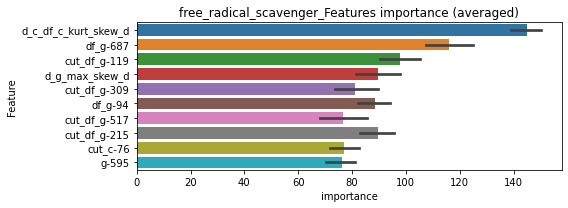

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000266269	valid_1's binary_logloss: 0.00161177
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000262501	valid_1's binary_logloss: 0.00887456


================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000260895	valid_1's binary_logloss: 0.000461861
Training until validation scores don't improve for 30 rounds


free_radical_scavenger logloss: 0.003489649450150215


Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000265966	valid_1's binary_logloss: 0.00301002


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3286
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000369905	valid_1's binary_logloss: 0.00777557
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.000970176	valid_1's binary_logloss: 0.02991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000318815	valid_1's binary_logloss: 0.00136283
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017455, Threshold: 0.0064023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0064023, conf_0:0.00448, conf_1:0.00832
Num_p_label: 0.0, Expected: 3.8, Adj_threshold_1: 0.0364023


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000337436	valid_1's binary_logloss: 0.00798199


threshold: 0.0364023, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000359138	valid_1's binary_logloss: 0.00773897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00164429	valid_1's binary_logloss: 0.0292114
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000326406	valid_1's binary_logloss: 0.000763167
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0169783, Threshold: 0.0364023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0017579 Vs.target_rate: 0.00097
Num_p_label: 7.0, Expected: 3.8, Threshold: 0.0364023, conf_0:0.02912, conf_1:0.04368


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000321517	valid_1's binary_logloss: 0.00665772


threshold: 0.0364023, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000327617	valid_1's binary_logloss: 0.0109695
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000337156	valid_1's binary_logloss: 0.0133314
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000320603	valid_1's binary_logloss: 0.00295143
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0114570, Threshold: 0.0364023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0010045 Vs.target_rate: 0.00097
Num_p_label: 4.0, Expected: 3.8, Threshold: 0.0364023, conf_0:0.03276, conf_1:0.04004


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000322378	valid_1's binary_logloss: 0.00652616


threshold: 0.0364023, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


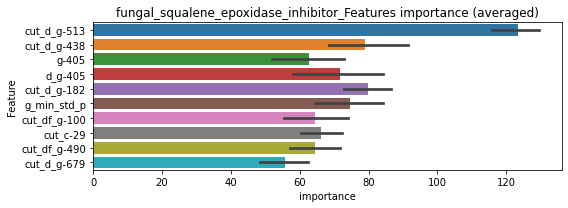

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000365434	valid_1's binary_logloss: 0.00883932
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000339921	valid_1's binary_logloss: 0.0105082
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952


Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000337214	valid_1's binary_logloss: 0.00257446


================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


fungal_squalene_epoxidase_inhibitor logloss: 0.006759439571662763


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000432868	valid_1's binary_logloss: 0.00511336


gaba_receptor_agonist, len(trt): 106, len(othr): 3267
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3267


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0349525	valid_1's binary_logloss: 0.112286
Early stopping, best iteration is:
[1652]	training's binary_logloss: 0.0209039	valid_1's binary_logloss: 0.105653
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0362117	valid_1's binary_logloss: 0.097547
[2000]	training's binary_logloss: 0.0175817	valid_1's binary_logloss: 0.0887478
Early stopping, best iteration is:
[2055]	training's binary_logloss: 0.0170796	valid_1's binary_logloss: 0.0883441
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0368864	valid_1's binary_logloss: 0.0941775
Early stopping, best iteration is:
[1733]	training's binary_logloss: 0.0208221	valid_1's binary_logloss: 0.085963
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.037471	valid_1's binary_logloss: 0.0807199
[2000]	training'

1 / 3, AUC score:0.991, PR-AUC:0.976
y_Threshold: 0.0423425, Threshold: 0.1317754, pos_neg_ratio: 0.8000000
Remove_noisy_data: 187 → Positive_corect_labels: 625/3733
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1317754, conf_0:0.09224, conf_1:0.17131
Num_p_label: 21.0, Expected: 17.7, Adj_threshold_1: 0.1617754
threshold: 0.1617754, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 625.0/3733, y_label_rate: 0.1674257
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0292879	valid_1's binary_logloss: 0.0858501
[2000]	training's binary_logloss: 0.0145266	valid_1's binary_logloss: 0.0775013
Early stopping, best iteration is:
[2106]	training's binary_logloss: 0.0137831	valid_1's binary_logloss: 0.0770499
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0289152	valid_1's binary_logloss: 0.0844342
Early stopping, best iteration is:
[1916]	training's binary_logloss: 0.0149493	valid_1's binary_logloss: 0.0774744
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315444	valid_1's binary_logloss: 0.0531828
[2000]	training's binary_logloss: 0.0156057	valid_1's binary_logloss: 0.0407435
[3000]	training's binary_logloss: 0.0102473	valid_1's binary_logloss: 0.0359689
[4000]	training's binary_logloss: 0.00762092	valid_1's binary_logloss: 0.0336215
Early stopping, best itera

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0592755, Threshold: 0.1617754, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 602.0/3687
p_label_rate: 0.0195881 Vs.target_rate: 0.00445
Num_p_label: 78.0, Expected: 17.7, Threshold: 0.1617754, conf_0:0.12942, conf_1:0.19413
Num_p_label: 62.0, Expected: 17.7, Adj_threshold_1: 0.1917754
Num_p_label: 52.0, Expected: 17.7, Adj_threshold_2: 0.2217754
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_3: 0.2517754
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_4: 0.2817754
Num_p_label: 25.0, Expected: 17.7, Adj_threshold_5: 0.3117754
threshold: 0.3117754, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 602.0/3687, y_label_rate: 0.1632764
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0238436	valid_1's binary_logloss: 0.0718799
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.0124929	valid_1's binary_logloss: 0.0638857
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0249753	valid_1's binary_logloss: 0.0551948
[2000]	training's binary_logloss: 0.012474	valid_1's binary_logloss: 0.0455418
[3000]	training's binary_logloss: 0.00825977	valid_1's binary_logloss: 0.0420491
Early stopping, best iteration is:
[3519]	training's binary_logloss: 0.00703315	valid_1's binary_logloss: 0.0409799
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0257466	valid_1's binary_logloss: 0.0458733
[2000]	training's binary_logloss: 0.012831	valid_1's binary_logloss: 0.0368876
Early stopping, best iteration is:
[2566]	training's binary_logloss: 0.00998262	valid_1's binary_logloss: 0

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0706313, Threshold: 0.3117754, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 586.0/3655
p_label_rate: 0.0113009 Vs.target_rate: 0.00445
Num_p_label: 45.0, Expected: 17.7, Threshold: 0.3117754, conf_0:0.28060, conf_1:0.34295
Num_p_label: 38.0, Expected: 17.7, Adj_threshold_1: 0.3417754
Num_p_label: 29.0, Expected: 17.7, Adj_threshold_2: 0.3717754
Num_p_label: 23.0, Expected: 17.7, Adj_threshold_3: 0.4017754
threshold: 0.4017754, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 586.0/3655, y_label_rate: 0.1603283


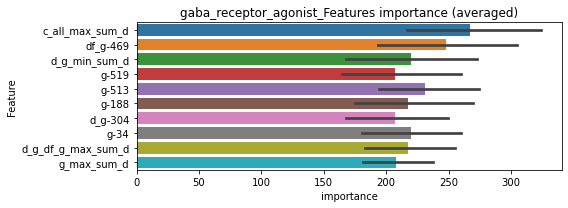

len(train_index) : 2741
len(valid_index) : 914
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315889	valid_1's binary_logloss: 0.0502733
[2000]	training's binary_logloss: 0.0164009	valid_1's binary_logloss: 0.0366591
[3000]	training's binary_logloss: 0.0109813	valid_1's binary_logloss: 0.0316707
[4000]	training's binary_logloss: 0.00822526	valid_1's binary_logloss: 0.0291183
[5000]	training's binary_logloss: 0.00660286	valid_1's binary_logloss: 0.0276025
[6000]	training's binary_logloss: 0.00550658	valid_1's binary_logloss: 0.0265196
Early stopping, best iteration is:
[6816]	training's binary_logloss: 0.00486513	valid_1's binary_logloss: 0.0259137


len(train_index) : 2741
len(valid_index) : 914
================================= fold 2/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0290976	valid_1's binary_logloss: 0.0666748
[2000]	training's binary_logloss: 0.0149499	valid_1's binary_logloss: 0.0552529
[3000]	training's binary_logloss: 0.0100296	valid_1's binary_logloss: 0.0508615
Early stopping, best iteration is:
[3333]	training's binary_logloss: 0.00902217	valid_1's binary_logloss: 0.0500388


len(train_index) : 2741
len(valid_index) : 914
================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319108	valid_1's binary_logloss: 0.0479031
[2000]	training's binary_logloss: 0.0163638	valid_1's binary_logloss: 0.0349376
[3000]	training's binary_logloss: 0.0109629	valid_1's binary_logloss: 0.0305426
[4000]	training's binary_logloss: 0.008223	valid_1's binary_logloss: 0.0286394
[5000]	training's binary_logloss: 0.00660373	valid_1's binary_logloss: 0.027474
Early stopping, best iteration is:
[5769]	training's binary_logloss: 0.00573106	valid_1's binary_logloss: 0.0267946


len(train_index) : 2742
len(valid_index) : 913
================================= fold 4/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0307192	valid_1's binary_logloss: 0.0534503
[2000]	training's binary_logloss: 0.0158249	valid_1's binary_logloss: 0.0405577
[3000]	training's binary_logloss: 0.0106266	valid_1's binary_logloss: 0.0359125
[4000]	training's binary_logloss: 0.00796532	valid_1's binary_logloss: 0.0335496
[5000]	training's binary_logloss: 0.00639977	valid_1's binary_logloss: 0.0323208
[6000]	training's binary_logloss: 0.00534109	valid_1's binary_logloss: 0.0313128
Early stopping, best iteration is:
[6154]	training's binary_logloss: 0.00521312	valid_1's binary_logloss: 0.0312109


gaba_receptor_agonist logloss: 0.03349010129124946
gaba_receptor_agonist is unpredictable(><)!


mutually exclusive columns: gaba_receptor_antagonist


gaba_receptor_antagonist, len(trt): 165, len(othr): 4671
target_rate: 0.0069287 → Adj_target_rate: 0.0064426


selected negative label: 4671


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0399787	valid_1's binary_logloss: 0.102249
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0233982	valid_1's binary_logloss: 0.0966203
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0382215	valid_1's binary_logloss: 0.125949
Early stopping, best iteration is:
[1300]	training's binary_logloss: 0.0291371	valid_1's binary_logloss: 0.123705
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0390908	valid_1's binary_logloss: 0.11095
Early stopping, best iteration is:
[1577]	training's binary_logloss: 0.0242538	valid_1's binary_logloss: 0.107035
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0389885	valid_1's binary_logloss: 0.118927
Early stopping, best iteration is:
[1545]	training's binary_logloss: 0.0247625	valid_1's binary_lo

1 / 3, AUC score:0.974, PR-AUC:0.949
y_Threshold: 0.0490615, Threshold: 0.0746520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 339 → Positive_corect_labels: 858/5266
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, Expected: 27.6, Threshold: 0.0746520, conf_0:0.05226, conf_1:0.09705
threshold: 0.0746520, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 858.0/5266, y_label_rate: 0.1629320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0264164	valid_1's binary_logloss: 0.0680907
Early stopping, best iteration is:
[1668]	training's binary_logloss: 0.0156086	valid_1's binary_logloss: 0.0630722
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271563	valid_1's binary_logloss: 0.0615342
Early stopping, best iteration is:
[1843]	training's binary_logloss: 0.0145143	valid_1's binary_logloss: 0.0545842
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0266699	valid_1's binary_logloss: 0.0696962
Early stopping, best iteration is:
[1923]	training's binary_logloss: 0.0136326	valid_1's binary_logloss: 0.063821
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0261883	valid_1's binary_logloss: 0.0698767
Early stopping, best iteration is:
[1791]	training's binary_logloss: 0.0144296	valid_1's bin

2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0541360, Threshold: 0.0746520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 821.0/5192
p_label_rate: 0.0082873 Vs.target_rate: 0.00693
Num_p_label: 33.0, Expected: 27.6, Threshold: 0.0746520, conf_0:0.05972, conf_1:0.08958
threshold: 0.0746520, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 821.0/5192, y_label_rate: 0.1581279
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0208051	valid_1's binary_logloss: 0.0488577
[2000]	training's binary_logloss: 0.0102883	valid_1's binary_logloss: 0.0413192
Early stopping, best iteration is:
[2104]	training's binary_logloss: 0.00975486	valid_1's binary_logloss: 0.0409397
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0206545	valid_1's binary_logloss: 0.0485681
[2000]	training's binary_logloss: 0.0101396	valid_1's binary_logloss: 0.0421052
Early stopping, best iteration is:
[2554]	training's binary_logloss: 0.00786519	valid_1's binary_logloss: 0.0409461
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0217128	valid_1's binary_logloss: 0.0419449
[2000]	training's binary_logloss: 0.0107055	valid_1's binary_logloss: 0.0348349
[3000]	training's binary_logloss: 0.0070378	valid_1's binary_logloss: 0.0325901
Early stopping, best iter

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0432839, Threshold: 0.0746520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 802.0/5154
p_label_rate: 0.0042692 Vs.target_rate: 0.00693
Num_p_label: 17.0, Expected: 27.6, Threshold: 0.0746520, conf_0:0.06719, conf_1:0.08212
threshold: 0.0746520, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 802.0/5154, y_label_rate: 0.1556073


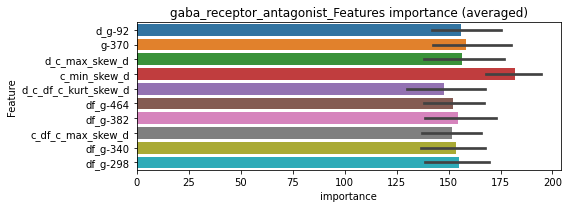

len(train_index) : 3865
len(valid_index) : 1289
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0249929	valid_1's binary_logloss: 0.0440628
[2000]	training's binary_logloss: 0.012887	valid_1's binary_logloss: 0.0338518
[3000]	training's binary_logloss: 0.00859751	valid_1's binary_logloss: 0.030284
[4000]	training's binary_logloss: 0.00642955	valid_1's binary_logloss: 0.0287482
Early stopping, best iteration is:
[4100]	training's binary_logloss: 0.00627017	valid_1's binary_logloss: 0.0286207


len(train_index) : 3865
len(valid_index) : 1289
================================= fold 2/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0245008	valid_1's binary_logloss: 0.0473052
[2000]	training's binary_logloss: 0.0125773	valid_1's binary_logloss: 0.0376581
[3000]	training's binary_logloss: 0.00840345	valid_1's binary_logloss: 0.0345447
[4000]	training's binary_logloss: 0.00628377	valid_1's binary_logloss: 0.0331249
Early stopping, best iteration is:
[4286]	training's binary_logloss: 0.00586134	valid_1's binary_logloss: 0.0328692


len(train_index) : 3866
len(valid_index) : 1288
================================= fold 3/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0255456	valid_1's binary_logloss: 0.0431408
[2000]	training's binary_logloss: 0.0131135	valid_1's binary_logloss: 0.0333321
[3000]	training's binary_logloss: 0.00873854	valid_1's binary_logloss: 0.030143
Early stopping, best iteration is:
[3841]	training's binary_logloss: 0.00680325	valid_1's binary_logloss: 0.028843


len(train_index) : 3866
len(valid_index) : 1288
================================= fold 4/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0262172	valid_1's binary_logloss: 0.035695
[2000]	training's binary_logloss: 0.0134962	valid_1's binary_logloss: 0.0254196
[3000]	training's binary_logloss: 0.00898016	valid_1's binary_logloss: 0.0219021
[4000]	training's binary_logloss: 0.00670539	valid_1's binary_logloss: 0.0202459
[5000]	training's binary_logloss: 0.0053554	valid_1's binary_logloss: 0.0192505
[6000]	training's binary_logloss: 0.00445629	valid_1's binary_logloss: 0.0185702
Early stopping, best iteration is:
[6826]	training's binary_logloss: 0.00392188	valid_1's binary_logloss: 0.0182076


gaba_receptor_antagonist logloss: 0.027136504785442436
gamma_secretase_inhibitor, len(trt): 56, len(othr): 3280
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3280


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00354902	valid_1's binary_logloss: 0.07082
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000486609	valid_1's binary_logloss: 0.0302702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000501517	valid_1's binary_logloss: 0.00891355
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0054797, Threshold: 0.0127653, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0127653, conf_0:0.00894, conf_1:0.01659


Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000719575	valid_1's binary_logloss: 0.0318417


Num_p_label: 5.0, Expected: 9.4, Adj_threshold_1: 0.0427653
threshold: 0.0427653, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.00270518	valid_1's binary_logloss: 0.0684045
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000610164	valid_1's binary_logloss: 0.0323432
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000541263	valid_1's binary_logloss: 0.00854315
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000581815	valid_1's binary_logloss: 0.0290429


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0165696, Threshold: 0.0427653, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0060271 Vs.target_rate: 0.00235
Num_p_label: 24.0, Expected: 9.4, Threshold: 0.0427653, conf_0:0.03421, conf_1:0.05132
Num_p_label: 13.0, Expected: 9.4, Adj_threshold_1: 0.0727653
threshold: 0.0727653, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000604734	valid_1's binary_logloss: 0.0250886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000794843	valid_1's binary_logloss: 0.039346
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000524239	valid_1's binary_logloss: 0.0205588
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000723637	valid_1's binary_logloss: 0.0327646


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0155630, Threshold: 0.0727653, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0030136 Vs.target_rate: 0.00235
Num_p_label: 12.0, Expected: 9.4, Threshold: 0.0727653, conf_0:0.06549, conf_1:0.08004
threshold: 0.0727653, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 648.0/3788, y_label_rate: 0.1710665


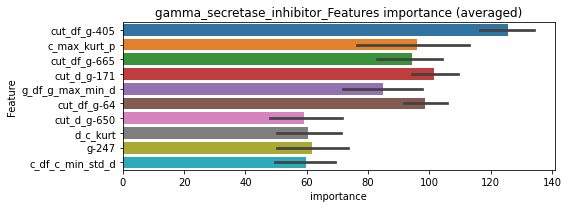

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 gamma_secretase_inhibitor=================================


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.000886183	valid_1's binary_logloss: 0.024561
Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 gamma_secretase_inhibitor=================================


Early stopping, best iteration is:
[287]	training's binary_logloss: 0.00114766	valid_1's binary_logloss: 0.0310616
Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 gamma_secretase_inhibitor=================================


Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000753583	valid_1's binary_logloss: 0.0245991
Training until validation scores don't improve for 30 rounds


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000641294	valid_1's binary_logloss: 0.0260761


gamma_secretase_inhibitor logloss: 0.026574430866237505


mutually exclusive columns: glucocorticoid_receptor_agonist


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 7168
target_rate: 0.0111699 → Adj_target_rate: 0.0096682


selected negative label: 7168


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0401736	valid_1's binary_logloss: 0.12708
Early stopping, best iteration is:
[1468]	training's binary_logloss: 0.0268042	valid_1's binary_logloss: 0.124316
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0406038	valid_1's binary_logloss: 0.124103
Early stopping, best iteration is:
[1351]	training's binary_logloss: 0.0296181	valid_1's binary_logloss: 0.121177
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0413691	valid_1's binary_logloss: 0.116033
Early stopping, best iteration is:
[1714]	training's binary_logloss: 0.0233081	valid_1's binary_logloss: 0.110786
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.041323	valid_1's binary_logloss: 0.117449
Early stopping, best iteration is:
[1182]	training's binary_logloss: 0.0347518	valid_1's binary_logl

1 / 3, AUC score:0.969, PR-AUC:0.944
y_Threshold: 0.0524468, Threshold: 0.0832082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 540 → Positive_corect_labels: 1307/8061
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, Expected: 44.5, Threshold: 0.0832082, conf_0:0.05825, conf_1:0.10817
threshold: 0.0832082, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1307.0/8061, y_label_rate: 0.1621387
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0266518	valid_1's binary_logloss: 0.0736823
Early stopping, best iteration is:
[1834]	training's binary_logloss: 0.0141072	valid_1's binary_logloss: 0.0678801
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271857	valid_1's binary_logloss: 0.0653099
[2000]	training's binary_logloss: 0.0131222	valid_1's binary_logloss: 0.0579855
Early stopping, best iteration is:
[2054]	training's binary_logloss: 0.0127546	valid_1's binary_logloss: 0.0578347
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0264585	valid_1's binary_logloss: 0.075741
Early stopping, best iteration is:
[1654]	training's binary_logloss: 0.0155676	valid_1's binary_logloss: 0.0699455
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0269546	valid_1's binary_logloss: 0.0684315
Early stoppi

2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0543206, Threshold: 0.0832082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 124 → Positive_corect_labels: 1245.0/7937
p_label_rate: 0.0052737 Vs.target_rate: 0.01117
Num_p_label: 21.0, Expected: 44.5, Threshold: 0.0832082, conf_0:0.06657, conf_1:0.09985
threshold: 0.0832082, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 1245.0/7937, y_label_rate: 0.1568603
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0204757	valid_1's binary_logloss: 0.0455335
[2000]	training's binary_logloss: 0.00997827	valid_1's binary_logloss: 0.0384312
Early stopping, best iteration is:
[2553]	training's binary_logloss: 0.00769276	valid_1's binary_logloss: 0.0370249
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0197591	valid_1's binary_logloss: 0.0536668
Early stopping, best iteration is:
[1835]	training's binary_logloss: 0.0105527	valid_1's binary_logloss: 0.0486875
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0214016	valid_1's binary_logloss: 0.0332629
[2000]	training's binary_logloss: 0.0103914	valid_1's binary_logloss: 0.0253732
[3000]	training's binary_logloss: 0.00678488	valid_1's binary_logloss: 0.022482
[4000]	training's binary_logloss: 0.00503487	valid_1's binary_logloss: 0.0210482
[5000]	training's binary

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0395789, Threshold: 0.0832082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 1219.0/7885
p_label_rate: 0.0010045 Vs.target_rate: 0.01117
Num_p_label: 4.0, Expected: 44.5, Threshold: 0.0832082, conf_0:0.07489, conf_1:0.09153
threshold: 0.0832082, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 1219.0/7885, y_label_rate: 0.1545973


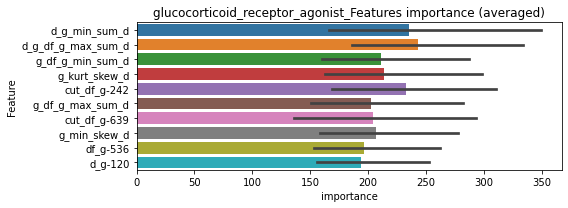

len(train_index) : 5913
len(valid_index) : 1972
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0247342	valid_1's binary_logloss: 0.0394143
[2000]	training's binary_logloss: 0.0126211	valid_1's binary_logloss: 0.0304888
[3000]	training's binary_logloss: 0.00830799	valid_1's binary_logloss: 0.0273244
[4000]	training's binary_logloss: 0.00618974	valid_1's binary_logloss: 0.0258541
Early stopping, best iteration is:
[4294]	training's binary_logloss: 0.00575686	valid_1's binary_logloss: 0.025566


len(train_index) : 5914
len(valid_index) : 1971
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0234638	valid_1's binary_logloss: 0.048937
[2000]	training's binary_logloss: 0.0119833	valid_1's binary_logloss: 0.0409119
Early stopping, best iteration is:
[2943]	training's binary_logloss: 0.00806418	valid_1's binary_logloss: 0.0385359


len(train_index) : 5914
len(valid_index) : 1971
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0242102	valid_1's binary_logloss: 0.0453146
[2000]	training's binary_logloss: 0.0124304	valid_1's binary_logloss: 0.0369471
[3000]	training's binary_logloss: 0.00820454	valid_1's binary_logloss: 0.0342804
[4000]	training's binary_logloss: 0.00611372	valid_1's binary_logloss: 0.0331451
Early stopping, best iteration is:
[4040]	training's binary_logloss: 0.0060496	valid_1's binary_logloss: 0.0330856


len(train_index) : 5914
len(valid_index) : 1971
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0253208	valid_1's binary_logloss: 0.0387818
[2000]	training's binary_logloss: 0.0129396	valid_1's binary_logloss: 0.0288423
[3000]	training's binary_logloss: 0.0085284	valid_1's binary_logloss: 0.0252274
[4000]	training's binary_logloss: 0.00635435	valid_1's binary_logloss: 0.0233913
Early stopping, best iteration is:
[4817]	training's binary_logloss: 0.0052478	valid_1's binary_logloss: 0.0224762


glucocorticoid_receptor_agonist logloss: 0.029915352585283644
glutamate_inhibitor, len(trt): 13, len(othr): 3289
target_rate: 0.0005459 → Adj_target_rate: 0.0007431


selected negative label: 3289


N_features:503
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000238743	valid_1's binary_logloss: 0.00602119
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000231838	valid_1's binary_logloss: 0.00327715
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00022895	valid_1's binary_logloss: 0.000237486
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0006602, Threshold: 0.0012805, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, Expected: 2.2, Threshold: 0.0012805, conf_0:0.00090, conf_1:0.00166
Num_p_label: 0.0, Expected: 2.2, Adj_threshold_1: 0.0312805
threshold: 0.0312805, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000253979	valid_1's binary_logloss: 0.00530557


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000239902	valid_1's binary_logloss: 0.00604653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000230037	valid_1's binary_logloss: 0.00314786
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000226285	valid_1's binary_logloss: 0.000244667
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0108952, Threshold: 0.0312805, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00055
Num_p_label: 2.0, Expected: 2.2, Threshold: 0.0312805, conf_0:0.02502, conf_1:0.03754
threshold: 0.0312805, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000247601	valid_1's binary_logloss: 0.00504582


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000239902	valid_1's binary_logloss: 0.00604653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000230037	valid_1's binary_logloss: 0.00314786
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000226285	valid_1's binary_logloss: 0.000244667
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0108952, Threshold: 0.0312805, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00055
Num_p_label: 2.0, Expected: 2.2, Threshold: 0.0312805, conf_0:0.02815, conf_1:0.03441
threshold: 0.0312805, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000247601	valid_1's binary_logloss: 0.00504582


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


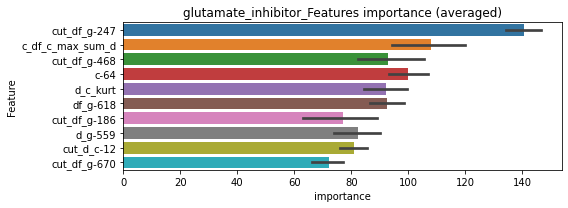

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000252254	valid_1's binary_logloss: 0.00449144
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000235835	valid_1's binary_logloss: 0.00114834
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000233628	valid_1's binary_logloss: 0.000236996
Training until validation scores don't improve for 30 rounds


glutamate_inhibitor logloss: 0.002542084158024516


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000265963	valid_1's binary_logloss: 0.00428951


glutamate_receptor_agonist, len(trt): 74, len(othr): 3274
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3274


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00170229	valid_1's binary_logloss: 0.0520498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000818576	valid_1's binary_logloss: 0.0433782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.0013065	valid_1's binary_logloss: 0.0408217
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.997


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00074662	valid_1's binary_logloss: 0.0436543


y_Threshold: 0.0055811, Threshold: 0.1682288, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 652/3792
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.1682288, conf_0:0.11776, conf_1:0.21870
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_1: 0.1982288
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_2: 0.2282288
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_3: 0.2582288
Num_p_label: 27.0, Expected: 12.4, Adj_threshold_4: 0.2882288
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_5: 0.3182288
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_6: 0.3482288
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_7: 0.3782288
threshold: 0.3782288, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3792, y_label_rate: 0.1719409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.0020909	valid_1's binary_logloss: 0.0617092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00121613	valid_1's binary_logloss: 0.0391637
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000621676	valid_1's binary_logloss: 0.0180356
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0260845, Threshold: 0.3782288, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.00107125	valid_1's binary_logloss: 0.0367354


Remove_noisy_data: 26 → Positive_corect_labels: 639.0/3766
p_label_rate: 0.0195881 Vs.target_rate: 0.00311
Num_p_label: 78.0, Expected: 12.4, Threshold: 0.3782288, conf_0:0.30258, conf_1:0.45387
Num_p_label: 77.0, Expected: 12.4, Adj_threshold_1: 0.4082288
Num_p_label: 72.0, Expected: 12.4, Adj_threshold_2: 0.4382288
Num_p_label: 71.0, Expected: 12.4, Adj_threshold_3: 0.4682288
Num_p_label: 64.0, Expected: 12.4, Adj_threshold_4: 0.4982288
Num_p_label: 60.0, Expected: 12.4, Adj_threshold_5: 0.5282288
Num_p_label: 55.0, Expected: 12.4, Adj_threshold_6: 0.5582288
Num_p_label: 54.0, Expected: 12.4, Adj_threshold_7: 0.5882288
Num_p_label: 49.0, Expected: 12.4, Adj_threshold_8: 0.6182288
Num_p_label: 47.0, Expected: 12.4, Adj_threshold_9: 0.6482288
Num_p_label: 44.0, Expected: 12.4, Adj_threshold_10: 0.6782288
threshold: 0.6782288, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 639.0/3766, y_label_rate: 0.1696760
================= Pseudo labeling 3 / 3 ===============

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000783427	valid_1's binary_logloss: 0.0376522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00059994	valid_1's binary_logloss: 0.0289415
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00119377	valid_1's binary_logloss: 0.0315053
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0308375, Threshold: 0.6782288, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 631.0/3750
p_label_rate: 0.0158212 Vs.target_rate: 0.00311
Num_p_label: 63.0, Expected: 12.4, Threshold: 0.6782288, conf_0:0.61041, conf_1:0.74605
Num_p_label: 60.0, Expected: 12.4, Adj_threshold_1: 0.7082288
Num_p_label: 57.0, Expected: 12.4, Adj_threshold_2: 0.7382288
Num_p_label: 52.0, Expected: 12.4, Adj_threshold_3: 0.7682288
Num_p_label: 46.0, Expected: 12.4, Adj_threshold_4: 0.7982288
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_5: 0.8282288


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00125358	valid_1's binary_logloss: 0.037511


Num_p_label: 29.0, Expected: 12.4, Adj_threshold_6: 0.8582288
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_7: 0.8882288
Num_p_label: 16.0, Expected: 12.4, Adj_threshold_8: 0.9182288
threshold: 0.9182288, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 631.0/3750, y_label_rate: 0.1682667


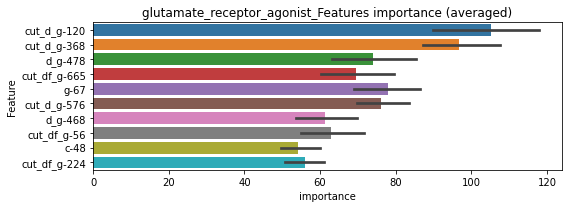

len(train_index) : 2812
len(valid_index) : 938
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2812
len(valid_index) : 938
================================= fold 2/4 glutamate_receptor_agonist=================================


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00093141	valid_1's binary_logloss: 0.0338893
Training until validation scores don't improve for 30 rounds


len(train_index) : 2813
len(valid_index) : 937
================================= fold 3/4 glutamate_receptor_agonist=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000787023	valid_1's binary_logloss: 0.0228527
Training until validation scores don't improve for 30 rounds


len(train_index) : 2813
len(valid_index) : 937
================================= fold 4/4 glutamate_receptor_agonist=================================


Early stopping, best iteration is:
[320]	training's binary_logloss: 0.0011433	valid_1's binary_logloss: 0.0238075
Training until validation scores don't improve for 30 rounds


glutamate_receptor_agonist logloss: 0.026202005550659685


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000973134	valid_1's binary_logloss: 0.0242539
mutually exclusive columns: glutamate_receptor_antagonist


glutamate_receptor_antagonist, len(trt): 367, len(othr): 7212
target_rate: 0.0154111 → Adj_target_rate: 0.0127105


selected negative label: 7212


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0522017	valid_1's binary_logloss: 0.15005
Early stopping, best iteration is:
[1161]	training's binary_logloss: 0.0449288	valid_1's binary_logloss: 0.148646
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0513193	valid_1's binary_logloss: 0.171224
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.0512154	valid_1's binary_logloss: 0.171196
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0513284	valid_1's binary_logloss: 0.168915
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.052098	valid_1's binary_logloss: 0.168821
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0520454	valid_1's binary_logloss: 0.160396
Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.0434958	valid_1's binary_loglo

1 / 3, AUC score:0.931, PR-AUC:0.884
y_Threshold: 0.0742545, Threshold: 0.1142933, pos_neg_ratio: 0.8000000
Remove_noisy_data: 791 → Positive_corect_labels: 1191/7863
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, Expected: 61.4, Threshold: 0.1142933, conf_0:0.08001, conf_1:0.14858
threshold: 0.1142933, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1191.0/7863, y_label_rate: 0.1514689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0244061	valid_1's binary_logloss: 0.0690561
Early stopping, best iteration is:
[1731]	training's binary_logloss: 0.0137354	valid_1's binary_logloss: 0.0649923
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0243571	valid_1's binary_logloss: 0.0697434
Early stopping, best iteration is:
[1205]	training's binary_logloss: 0.0200795	valid_1's binary_logloss: 0.0682163
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0254309	valid_1's binary_logloss: 0.0586123
[2000]	training's binary_logloss: 0.0121604	valid_1's binary_logloss: 0.0518737
Early stopping, best iteration is:
[2107]	training's binary_logloss: 0.0115093	valid_1's binary_logloss: 0.051583
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.024884	valid_1's binary_logloss: 0.0610034
Early stoppin

2 / 3, AUC score:0.995, PR-AUC:0.984
y_Threshold: 0.0510135, Threshold: 0.1142933, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 1118.0/7717
p_label_rate: 0.0037670 Vs.target_rate: 0.01541
Num_p_label: 15.0, Expected: 61.4, Threshold: 0.1142933, conf_0:0.09143, conf_1:0.13715
threshold: 0.1142933, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 1118.0/7717, y_label_rate: 0.1448750
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.01484	valid_1's binary_logloss: 0.0310878
[2000]	training's binary_logloss: 0.00736538	valid_1's binary_logloss: 0.0256753
[3000]	training's binary_logloss: 0.00484636	valid_1's binary_logloss: 0.0239393
Early stopping, best iteration is:
[3588]	training's binary_logloss: 0.00403209	valid_1's binary_logloss: 0.0234457
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0151521	valid_1's binary_logloss: 0.0288647
[2000]	training's binary_logloss: 0.00752799	valid_1's binary_logloss: 0.0235164
[3000]	training's binary_logloss: 0.00495119	valid_1's binary_logloss: 0.0216787
Early stopping, best iteration is:
[3446]	training's binary_logloss: 0.00428243	valid_1's binary_logloss: 0.0212193
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0149278	valid_1's binary_logloss: 0.0312397
[2000]	training's binar

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0435978, Threshold: 0.1142933, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 1096.0/7673
p_label_rate: 0.0052737 Vs.target_rate: 0.01541
Num_p_label: 21.0, Expected: 61.4, Threshold: 0.1142933, conf_0:0.10286, conf_1:0.12572
threshold: 0.1142933, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 1096.0/7673, y_label_rate: 0.1428385


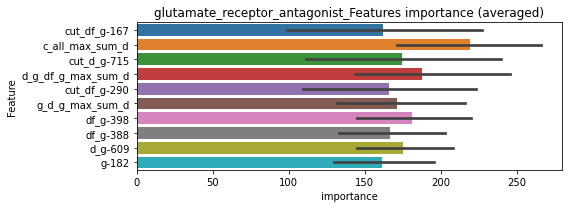

len(train_index) : 5754
len(valid_index) : 1919
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0161836	valid_1's binary_logloss: 0.0259686
[2000]	training's binary_logloss: 0.00806616	valid_1's binary_logloss: 0.0180029
[3000]	training's binary_logloss: 0.00539801	valid_1's binary_logloss: 0.0154037
[4000]	training's binary_logloss: 0.00406346	valid_1's binary_logloss: 0.0141216
[5000]	training's binary_logloss: 0.00327014	valid_1's binary_logloss: 0.0134301
[6000]	training's binary_logloss: 0.00273992	valid_1's binary_logloss: 0.0129081
Early stopping, best iteration is:
[6774]	training's binary_logloss: 0.00243836	valid_1's binary_logloss: 0.0126529


len(train_index) : 5755
len(valid_index) : 1918
================================= fold 2/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.016686	valid_1's binary_logloss: 0.0241015
[2000]	training's binary_logloss: 0.00839133	valid_1's binary_logloss: 0.0150611
[3000]	training's binary_logloss: 0.00562547	valid_1's binary_logloss: 0.0119197
[4000]	training's binary_logloss: 0.00423669	valid_1's binary_logloss: 0.0103423
[5000]	training's binary_logloss: 0.0034084	valid_1's binary_logloss: 0.00941255
[6000]	training's binary_logloss: 0.00285574	valid_1's binary_logloss: 0.00873899
[7000]	training's binary_logloss: 0.00245839	valid_1's binary_logloss: 0.00826036
Early stopping, best iteration is:
[7225]	training's binary_logloss: 0.00238473	valid_1's binary_logloss: 0.00817705


len(train_index) : 5755
len(valid_index) : 1918
================================= fold 3/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0162339	valid_1's binary_logloss: 0.0257648
[2000]	training's binary_logloss: 0.00809542	valid_1's binary_logloss: 0.0177795
[3000]	training's binary_logloss: 0.00541887	valid_1's binary_logloss: 0.0151288
[4000]	training's binary_logloss: 0.0040682	valid_1's binary_logloss: 0.0138586
[5000]	training's binary_logloss: 0.00327407	valid_1's binary_logloss: 0.0131618
[6000]	training's binary_logloss: 0.00274599	valid_1's binary_logloss: 0.0126364
Early stopping, best iteration is:
[6823]	training's binary_logloss: 0.00242738	valid_1's binary_logloss: 0.0123448


len(train_index) : 5755
len(valid_index) : 1918
================================= fold 4/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0167536	valid_1's binary_logloss: 0.0246081
[2000]	training's binary_logloss: 0.00842418	valid_1's binary_logloss: 0.0162339
[3000]	training's binary_logloss: 0.00563347	valid_1's binary_logloss: 0.0133935
[4000]	training's binary_logloss: 0.0042308	valid_1's binary_logloss: 0.0119793
[5000]	training's binary_logloss: 0.00339915	valid_1's binary_logloss: 0.0111669
[6000]	training's binary_logloss: 0.00284027	valid_1's binary_logloss: 0.0105739
[7000]	training's binary_logloss: 0.00244806	valid_1's binary_logloss: 0.0101944
Early stopping, best iteration is:
[7242]	training's binary_logloss: 0.00236891	valid_1's binary_logloss: 0.0101177


glutamate_receptor_antagonist logloss: 0.010823349540018002
gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000292045	valid_1's binary_logloss: 0.00244321
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.000666176	valid_1's binary_logloss: 0.0131422
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00037046	valid_1's binary_logloss: 0.00244709
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013215, Threshold: 0.0056597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0056597, conf_0:0.00396, conf_1:0.00736
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0356597
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0656597
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.0956597


Early stopping, best iteration is:
[405]	training's binary_logloss: 0.000346606	valid_1's binary_logloss: 0.00784636


threshold: 0.0956597, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000281456	valid_1's binary_logloss: 0.00145924
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000374581	valid_1's binary_logloss: 0.0143603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000389444	valid_1's binary_logloss: 0.00195107
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0081927, Threshold: 0.0956597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00076
Num_p_label: 20.0, Expected: 3.0, Threshold: 0.0956597, conf_0:0.07653, conf_1:0.11479
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.1256597
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_2: 0.1556597
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_3: 0.1856597
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_4: 0.2156597
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.2456597
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_6: 0.2756597
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.3056597
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_8: 0.3356597


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000312204	valid_1's binary_logloss: 0.00701345


threshold: 0.3356597, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000281456	valid_1's binary_logloss: 0.00145924
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000374581	valid_1's binary_logloss: 0.0143603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000389444	valid_1's binary_logloss: 0.00195107
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0081927, Threshold: 0.3356597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3356597, conf_0:0.30209, conf_1:0.36923
threshold: 0.3356597, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000312204	valid_1's binary_logloss: 0.00701345


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


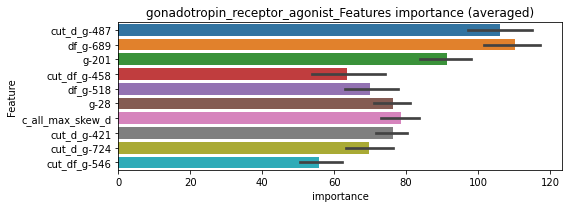

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000292761	valid_1's binary_logloss: 0.001294
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[183]	training's binary_logloss: 0.000972813	valid_1's binary_logloss: 0.0162167
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000311195	valid_1's binary_logloss: 0.00219108
Training until validation scores don't improve for 30 rounds


gonadotropin_receptor_agonist logloss: 0.006070689060700932


Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000291845	valid_1's binary_logloss: 0.00458096


gsk_inhibitor, len(trt): 60, len(othr): 3284
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[343]	training's binary_logloss: 0.00148571	valid_1's binary_logloss: 0.0604087
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00083986	valid_1's binary_logloss: 0.0371548
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000716587	valid_1's binary_logloss: 0.00933317
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0045138, Threshold: 0.0168910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0168910, conf_0:0.01182, conf_1:0.02196
Num_p_label: 6.0, Expected: 10.0, Adj_threshold_1: 0.0468910


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00131402	valid_1's binary_logloss: 0.0429045


threshold: 0.0468910, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000640831	valid_1's binary_logloss: 0.035017
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.0020197	valid_1's binary_logloss: 0.0406026
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000605527	valid_1's binary_logloss: 0.0252088
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0181622, Threshold: 0.0468910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 644.0/3784


Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000712138	valid_1's binary_logloss: 0.0387489


p_label_rate: 0.0115520 Vs.target_rate: 0.00252
Num_p_label: 46.0, Expected: 10.0, Threshold: 0.0468910, conf_0:0.03751, conf_1:0.05627
Num_p_label: 33.0, Expected: 10.0, Adj_threshold_1: 0.0768910
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_2: 0.1068910
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_3: 0.1368910
threshold: 0.1368910, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 644.0/3784, y_label_rate: 0.1701903
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00124501	valid_1's binary_logloss: 0.0391139
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000725375	valid_1's binary_logloss: 0.0312636
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00111231	valid_1's binary_logloss: 0.0229069
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0258697, Threshold: 0.1368910, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000654711	valid_1's binary_logloss: 0.0306038


Remove_noisy_data: 8 → Positive_corect_labels: 640.0/3776
p_label_rate: 0.0075339 Vs.target_rate: 0.00252
Num_p_label: 30.0, Expected: 10.0, Threshold: 0.1368910, conf_0:0.12320, conf_1:0.15058
Num_p_label: 21.0, Expected: 10.0, Adj_threshold_1: 0.1668910
Num_p_label: 15.0, Expected: 10.0, Adj_threshold_2: 0.1968910
threshold: 0.1968910, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 640.0/3776, y_label_rate: 0.1694915


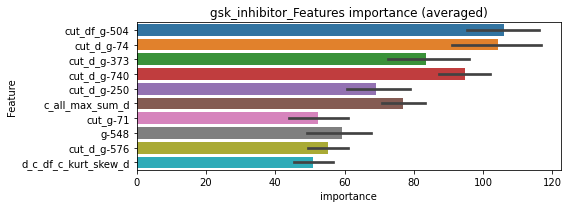

len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 gsk_inhibitor=================================


Early stopping, best iteration is:
[364]	training's binary_logloss: 0.000878211	valid_1's binary_logloss: 0.022475
Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 gsk_inhibitor=================================


Early stopping, best iteration is:
[277]	training's binary_logloss: 0.00124748	valid_1's binary_logloss: 0.0308285
Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 gsk_inhibitor=================================


Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000982819	valid_1's binary_logloss: 0.0223168
Training until validation scores don't improve for 30 rounds


gsk_inhibitor logloss: 0.022681490903697907


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000722674	valid_1's binary_logloss: 0.0151056


hcv_inhibitor, len(trt): 72, len(othr): 3284
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3284


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0262141	valid_1's binary_logloss: 0.0817519
Early stopping, best iteration is:
[1914]	training's binary_logloss: 0.0134356	valid_1's binary_logloss: 0.0744538
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.027078	valid_1's binary_logloss: 0.067397
[2000]	training's binary_logloss: 0.0133109	valid_1's binary_logloss: 0.0574366
[3000]	training's binary_logloss: 0.00869636	valid_1's binary_logloss: 0.0539699
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.00715258	valid_1's binary_logloss: 0.0527458
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0291999	valid_1's binary_logloss: 0.0445368
[2000]	training's binary_logloss: 0.0141378	valid_1's binary_logloss: 0.0332882
[3000]	training's binary_logloss: 0.00922181	valid_1's binary_logloss: 0.0297268
[4000]	training's binary_l

1 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0242059, Threshold: 0.0482774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0482774, conf_0:0.03379, conf_1:0.06276
Num_p_label: 13.0, Expected: 12.0, Adj_threshold_1: 0.0782774
threshold: 0.0782774, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0261467	valid_1's binary_logloss: 0.0617289
[2000]	training's binary_logloss: 0.0127856	valid_1's binary_logloss: 0.0512835
[3000]	training's binary_logloss: 0.00837103	valid_1's binary_logloss: 0.0477318
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.00688526	valid_1's binary_logloss: 0.0464829
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.025309	valid_1's binary_logloss: 0.0649779
[2000]	training's binary_logloss: 0.0123811	valid_1's binary_logloss: 0.055092
[3000]	training's binary_logloss: 0.0081149	valid_1's binary_logloss: 0.0516314
Early stopping, best iteration is:
[3239]	training's binary_logloss: 0.00749846	valid_1's binary_logloss: 0.0511384
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0255372	valid_1's binary_logloss: 0.0582908
[2000]	training's binary_l

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0517408, Threshold: 0.0782774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 640.0/3776
p_label_rate: 0.0107986 Vs.target_rate: 0.00302
Num_p_label: 43.0, Expected: 12.0, Threshold: 0.0782774, conf_0:0.06262, conf_1:0.09393
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_1: 0.1082774
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_2: 0.1382774
threshold: 0.1382774, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 640.0/3776, y_label_rate: 0.1694915
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0231834	valid_1's binary_logloss: 0.0610784
[2000]	training's binary_logloss: 0.0114552	valid_1's binary_logloss: 0.052997
Early stopping, best iteration is:
[2281]	training's binary_logloss: 0.010013	valid_1's binary_logloss: 0.051865
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0233188	valid_1's binary_logloss: 0.0543913
[2000]	training's binary_logloss: 0.0115057	valid_1's binary_logloss: 0.0447387
[3000]	training's binary_logloss: 0.007573	valid_1's binary_logloss: 0.0413843
Early stopping, best iteration is:
[3622]	training's binary_logloss: 0.00625172	valid_1's binary_logloss: 0.0402136
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0237418	valid_1's binary_logloss: 0.05
[2000]	training's binary_logloss: 0.0117462	valid_1's binary_logloss: 0.0406531
[3000]	training's binary_logloss: 0

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0481884, Threshold: 0.1382774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 635.0/3766
p_label_rate: 0.0070316 Vs.target_rate: 0.00302
Num_p_label: 28.0, Expected: 12.0, Threshold: 0.1382774, conf_0:0.12445, conf_1:0.15211
Num_p_label: 16.0, Expected: 12.0, Adj_threshold_1: 0.1682774
threshold: 0.1682774, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 635.0/3766, y_label_rate: 0.1686139


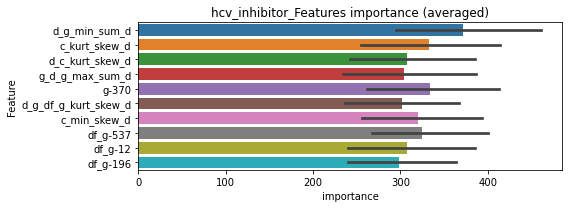

len(train_index) : 2824
len(valid_index) : 942
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.032056	valid_1's binary_logloss: 0.0562262
[2000]	training's binary_logloss: 0.0163515	valid_1's binary_logloss: 0.0440881
[3000]	training's binary_logloss: 0.0108947	valid_1's binary_logloss: 0.040001
Early stopping, best iteration is:
[3324]	training's binary_logloss: 0.00981798	valid_1's binary_logloss: 0.0391894


len(train_index) : 2824
len(valid_index) : 942
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0324811	valid_1's binary_logloss: 0.0558174
[2000]	training's binary_logloss: 0.0166062	valid_1's binary_logloss: 0.0429884
[3000]	training's binary_logloss: 0.0110648	valid_1's binary_logloss: 0.0383367
[4000]	training's binary_logloss: 0.00826392	valid_1's binary_logloss: 0.0357717
[5000]	training's binary_logloss: 0.00661675	valid_1's binary_logloss: 0.0343429
[6000]	training's binary_logloss: 0.00551295	valid_1's binary_logloss: 0.0332539
Early stopping, best iteration is:
[6666]	training's binary_logloss: 0.00496353	valid_1's binary_logloss: 0.0327382


len(train_index) : 2825
len(valid_index) : 941
================================= fold 3/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0330818	valid_1's binary_logloss: 0.0524246
[2000]	training's binary_logloss: 0.0168926	valid_1's binary_logloss: 0.0389831
[3000]	training's binary_logloss: 0.0112402	valid_1's binary_logloss: 0.0340675
[4000]	training's binary_logloss: 0.00840822	valid_1's binary_logloss: 0.0315553
[5000]	training's binary_logloss: 0.00673455	valid_1's binary_logloss: 0.0300315
[6000]	training's binary_logloss: 0.00561422	valid_1's binary_logloss: 0.0288879
Early stopping, best iteration is:
[6109]	training's binary_logloss: 0.00551699	valid_1's binary_logloss: 0.028781


len(train_index) : 2825
len(valid_index) : 941
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317306	valid_1's binary_logloss: 0.0650623
[2000]	training's binary_logloss: 0.0161737	valid_1's binary_logloss: 0.0521246
[3000]	training's binary_logloss: 0.0107817	valid_1's binary_logloss: 0.0481958
[4000]	training's binary_logloss: 0.00806054	valid_1's binary_logloss: 0.0461494
Early stopping, best iteration is:
[4262]	training's binary_logloss: 0.0075666	valid_1's binary_logloss: 0.0457637


hcv_inhibitor logloss: 0.03661769294513636
hcv_inhibitor is unpredictable(><)!
hdac_inhibitor, len(trt): 106, len(othr): 3274
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3274


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0368186	valid_1's binary_logloss: 0.124484
Early stopping, best iteration is:
[1560]	training's binary_logloss: 0.0235414	valid_1's binary_logloss: 0.117811
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0381359	valid_1's binary_logloss: 0.104691
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.019522	valid_1's binary_logloss: 0.0950673
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0389926	valid_1's binary_logloss: 0.0866774
[2000]	training's binary_logloss: 0.0191037	valid_1's binary_logloss: 0.0747997
[3000]	training's binary_logloss: 0.0124411	valid_1's binary_logloss: 0.0707157
Early stopping, best iteration is:
[3239]	training's binary_logloss: 0.0114874	valid_1's binary_logloss: 0.0701729
Training until validation scores don't improve for 30 rounds
[1000]	training

1 / 3, AUC score:0.989, PR-AUC:0.974
y_Threshold: 0.0432590, Threshold: 0.1367565, pos_neg_ratio: 0.8000000
Remove_noisy_data: 192 → Positive_corect_labels: 624/3736
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1367565, conf_0:0.09573, conf_1:0.17778
Num_p_label: 24.0, Expected: 17.7, Adj_threshold_1: 0.1667565
threshold: 0.1667565, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 624.0/3736, y_label_rate: 0.1670236
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0304539	valid_1's binary_logloss: 0.08362
[2000]	training's binary_logloss: 0.0151219	valid_1's binary_logloss: 0.0741288
Early stopping, best iteration is:
[2106]	training's binary_logloss: 0.0143371	valid_1's binary_logloss: 0.0736084
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0304302	valid_1's binary_logloss: 0.0832127
[2000]	training's binary_logloss: 0.015129	valid_1's binary_logloss: 0.0744857
Early stopping, best iteration is:
[2107]	training's binary_logloss: 0.0143391	valid_1's binary_logloss: 0.0739881
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0330393	valid_1's binary_logloss: 0.055702
[2000]	training's binary_logloss: 0.0163626	valid_1's binary_logloss: 0.0419728
[3000]	training's binary_logloss: 0.0107603	valid_1's binary_logloss: 0.0369614
[4000]	training's binary_loglos

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0642801, Threshold: 0.1667565, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 604.0/3696
p_label_rate: 0.0163235 Vs.target_rate: 0.00445
Num_p_label: 65.0, Expected: 17.7, Threshold: 0.1667565, conf_0:0.13341, conf_1:0.20011
Num_p_label: 49.0, Expected: 17.7, Adj_threshold_1: 0.1967565
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_2: 0.2267565
Num_p_label: 25.0, Expected: 17.7, Adj_threshold_3: 0.2567565
threshold: 0.2567565, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 604.0/3696, y_label_rate: 0.1634199
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.026062	valid_1's binary_logloss: 0.077307
Early stopping, best iteration is:
[1566]	training's binary_logloss: 0.0167366	valid_1's binary_logloss: 0.0705865
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0275593	valid_1's binary_logloss: 0.0562618
[2000]	training's binary_logloss: 0.0138748	valid_1's binary_logloss: 0.046195
[3000]	training's binary_logloss: 0.00923574	valid_1's binary_logloss: 0.0428606
Early stopping, best iteration is:
[3437]	training's binary_logloss: 0.00806013	valid_1's binary_logloss: 0.0420918
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0277186	valid_1's binary_logloss: 0.0571172
[2000]	training's binary_logloss: 0.013901	valid_1's binary_logloss: 0.0461325
[3000]	training's binary_logloss: 0.00920132	valid_1's binary_logloss: 0.042579
Early stopping, best iteratio

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0626636, Threshold: 0.2567565, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 595.0/3678
p_label_rate: 0.0090407 Vs.target_rate: 0.00445
Num_p_label: 36.0, Expected: 17.7, Threshold: 0.2567565, conf_0:0.23108, conf_1:0.28243
Num_p_label: 22.0, Expected: 17.7, Adj_threshold_1: 0.2867565
threshold: 0.2867565, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 595.0/3678, y_label_rate: 0.1617727


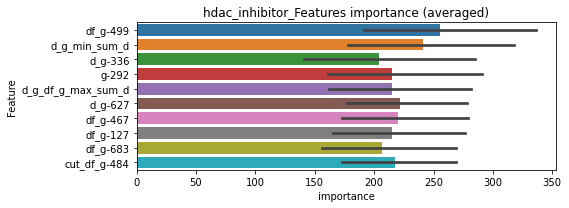

len(train_index) : 2758
len(valid_index) : 920
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0366312	valid_1's binary_logloss: 0.0657352
[2000]	training's binary_logloss: 0.0189676	valid_1's binary_logloss: 0.0503198
[3000]	training's binary_logloss: 0.0127544	valid_1's binary_logloss: 0.0448105
[4000]	training's binary_logloss: 0.00956016	valid_1's binary_logloss: 0.0420357
Early stopping, best iteration is:
[4822]	training's binary_logloss: 0.00793879	valid_1's binary_logloss: 0.0406365


len(train_index) : 2758
len(valid_index) : 920
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0356734	valid_1's binary_logloss: 0.0717153
[2000]	training's binary_logloss: 0.0183644	valid_1's binary_logloss: 0.0588337
[3000]	training's binary_logloss: 0.0123291	valid_1's binary_logloss: 0.0547486
Early stopping, best iteration is:
[3652]	training's binary_logloss: 0.0101409	valid_1's binary_logloss: 0.0533928


len(train_index) : 2759
len(valid_index) : 919
================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0379887	valid_1's binary_logloss: 0.0541412
[2000]	training's binary_logloss: 0.0197353	valid_1's binary_logloss: 0.0378868
[3000]	training's binary_logloss: 0.0131962	valid_1's binary_logloss: 0.0317067
[4000]	training's binary_logloss: 0.00987996	valid_1's binary_logloss: 0.0283746
[5000]	training's binary_logloss: 0.00791691	valid_1's binary_logloss: 0.0263602
[6000]	training's binary_logloss: 0.00660985	valid_1's binary_logloss: 0.0249486
[7000]	training's binary_logloss: 0.00568064	valid_1's binary_logloss: 0.0239167
[8000]	training's binary_logloss: 0.00498913	valid_1's binary_logloss: 0.023145
[9000]	training's binary_logloss: 0.00445269	valid_1's binary_logloss: 0.022532
[10000]	training's binary_logloss: 0.00402695	valid_1's binary_logloss: 0.0219967
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00402695	valid_1's binary_logloss: 0.0219967


len(train_index) : 2759
len(valid_index) : 919
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0351826	valid_1's binary_logloss: 0.0734287
[2000]	training's binary_logloss: 0.0183039	valid_1's binary_logloss: 0.0600226
[3000]	training's binary_logloss: 0.012332	valid_1's binary_logloss: 0.0551792
[4000]	training's binary_logloss: 0.00927123	valid_1's binary_logloss: 0.0526355
Early stopping, best iteration is:
[4256]	training's binary_logloss: 0.00871266	valid_1's binary_logloss: 0.0521881


hdac_inhibitor logloss: 0.04205623022740439
hdac_inhibitor is unpredictable(><)!
histamine_receptor_agonist, len(trt): 59, len(othr): 3282
target_rate: 0.0024775 → Adj_target_rate: 0.0026880


selected negative label: 3282


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0213023	valid_1's binary_logloss: 0.07593
Early stopping, best iteration is:
[1751]	training's binary_logloss: 0.0119758	valid_1's binary_logloss: 0.0705223
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.021867	valid_1's binary_logloss: 0.0661668
[2000]	training's binary_logloss: 0.0107654	valid_1's binary_logloss: 0.0593715
Early stopping, best iteration is:
[2557]	training's binary_logloss: 0.00833941	valid_1's binary_logloss: 0.0576672
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0245061	valid_1's binary_logloss: 0.0274623
[2000]	training's binary_logloss: 0.0118754	valid_1's binary_logloss: 0.0183537
[3000]	training's binary_logloss: 0.00773624	valid_1's binary_logloss: 0.0151836
[4000]	training's binary_logloss: 0.00574579	valid_1's binary_logloss: 0.0136195
[5000]	training's binary_lo

1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0191136, Threshold: 0.0320256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, Expected: 9.9, Threshold: 0.0320256, conf_0:0.02242, conf_1:0.04163
Num_p_label: 4.0, Expected: 9.9, Adj_threshold_1: 0.0620256
threshold: 0.0620256, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 652.0/3798, y_label_rate: 0.1716693
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0214957	valid_1's binary_logloss: 0.0493652
[2000]	training's binary_logloss: 0.0105403	valid_1's binary_logloss: 0.0416575
[3000]	training's binary_logloss: 0.00694716	valid_1's binary_logloss: 0.0389559
Early stopping, best iteration is:
[3062]	training's binary_logloss: 0.00680415	valid_1's binary_logloss: 0.038852
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0214702	valid_1's binary_logloss: 0.0549066
[2000]	training's binary_logloss: 0.0105798	valid_1's binary_logloss: 0.0464142
[3000]	training's binary_logloss: 0.00693708	valid_1's binary_logloss: 0.0434345
Early stopping, best iteration is:
[3063]	training's binary_logloss: 0.00678486	valid_1's binary_logloss: 0.0432928
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0218885	valid_1's binary_logloss: 0.0408762
[2000]	training's binary

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0384263, Threshold: 0.0620256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0042692 Vs.target_rate: 0.00248
Num_p_label: 17.0, Expected: 9.9, Threshold: 0.0620256, conf_0:0.04962, conf_1:0.07443
threshold: 0.0620256, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 646.0/3786, y_label_rate: 0.1706286
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0206344	valid_1's binary_logloss: 0.0444011
[2000]	training's binary_logloss: 0.0101749	valid_1's binary_logloss: 0.0364652
[3000]	training's binary_logloss: 0.00670271	valid_1's binary_logloss: 0.0335886
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.00552831	valid_1's binary_logloss: 0.032661
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0199184	valid_1's binary_logloss: 0.0509518
[2000]	training's binary_logloss: 0.00977858	valid_1's binary_logloss: 0.043712
[3000]	training's binary_logloss: 0.00643439	valid_1's binary_logloss: 0.0410574
Early stopping, best iteration is:
[3452]	training's binary_logloss: 0.00557455	valid_1's binary_logloss: 0.0404126
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0204699	valid_1's binary_logloss: 0.0441618
[2000]	training's binary

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0362382, Threshold: 0.0620256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 644.0/3782
p_label_rate: 0.0035158 Vs.target_rate: 0.00248
Num_p_label: 14.0, Expected: 9.9, Threshold: 0.0620256, conf_0:0.05582, conf_1:0.06823
threshold: 0.0620256, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 644.0/3782, y_label_rate: 0.1702803


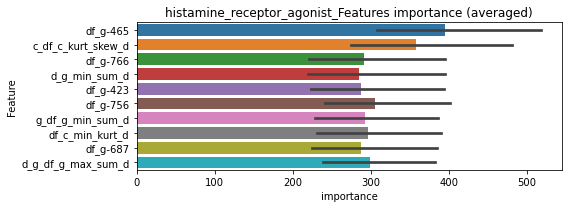

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0280787	valid_1's binary_logloss: 0.0564418
[2000]	training's binary_logloss: 0.0143259	valid_1's binary_logloss: 0.0470764
[3000]	training's binary_logloss: 0.00949127	valid_1's binary_logloss: 0.0439175
Early stopping, best iteration is:
[3665]	training's binary_logloss: 0.00774213	valid_1's binary_logloss: 0.0428285


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285646	valid_1's binary_logloss: 0.0514876
[2000]	training's binary_logloss: 0.0146918	valid_1's binary_logloss: 0.0399003
[3000]	training's binary_logloss: 0.00975253	valid_1's binary_logloss: 0.0357876
[4000]	training's binary_logloss: 0.00729301	valid_1's binary_logloss: 0.0336772
Early stopping, best iteration is:
[4822]	training's binary_logloss: 0.00605221	valid_1's binary_logloss: 0.0326907


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0292498	valid_1's binary_logloss: 0.0428893
[2000]	training's binary_logloss: 0.0148095	valid_1's binary_logloss: 0.0316689
[3000]	training's binary_logloss: 0.00980385	valid_1's binary_logloss: 0.0277521
[4000]	training's binary_logloss: 0.00732328	valid_1's binary_logloss: 0.0258708
[5000]	training's binary_logloss: 0.00586328	valid_1's binary_logloss: 0.024772
[6000]	training's binary_logloss: 0.00488206	valid_1's binary_logloss: 0.0240661
[7000]	training's binary_logloss: 0.00419824	valid_1's binary_logloss: 0.0235568
Early stopping, best iteration is:
[7492]	training's binary_logloss: 0.00393176	valid_1's binary_logloss: 0.0233671


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285149	valid_1's binary_logloss: 0.0491964
[2000]	training's binary_logloss: 0.0145698	valid_1's binary_logloss: 0.036789
[3000]	training's binary_logloss: 0.00967355	valid_1's binary_logloss: 0.0321838
[4000]	training's binary_logloss: 0.00722981	valid_1's binary_logloss: 0.0299599
Early stopping, best iteration is:
[4283]	training's binary_logloss: 0.00675137	valid_1's binary_logloss: 0.0295264


histamine_receptor_agonist logloss: 0.032106157900288056
histamine_receptor_agonist is unpredictable(><)!


mutually exclusive columns: histamine_receptor_antagonist


histamine_receptor_antagonist, len(trt): 241, len(othr): 6554
target_rate: 0.0101201 → Adj_target_rate: 0.0088902


selected negative label: 6554


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0397872	valid_1's binary_logloss: 0.121808
Early stopping, best iteration is:
[1331]	training's binary_logloss: 0.0294753	valid_1's binary_logloss: 0.119679
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0393614	valid_1's binary_logloss: 0.125748
Early stopping, best iteration is:
[1173]	training's binary_logloss: 0.0332925	valid_1's binary_logloss: 0.124754
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0409337	valid_1's binary_logloss: 0.110271
Early stopping, best iteration is:
[1467]	training's binary_logloss: 0.0272672	valid_1's binary_logloss: 0.105923
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.038616	valid_1's binary_logloss: 0.129429
Early stopping, best iteration is:
[1094]	training's binary_logloss: 0.0351696	valid_1's binary_log

1 / 3, AUC score:0.966, PR-AUC:0.936
y_Threshold: 0.0521159, Threshold: 0.0772254, pos_neg_ratio: 0.8000000
Remove_noisy_data: 523 → Positive_corect_labels: 1180/7341
p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, Expected: 40.3, Threshold: 0.0772254, conf_0:0.05406, conf_1:0.10039
threshold: 0.0772254, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1180.0/7341, y_label_rate: 0.1607410
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0242088	valid_1's binary_logloss: 0.0689864
Early stopping, best iteration is:
[1544]	training's binary_logloss: 0.0154673	valid_1's binary_logloss: 0.0652625
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0232212	valid_1's binary_logloss: 0.0788514
Early stopping, best iteration is:
[1178]	training's binary_logloss: 0.0196326	valid_1's binary_logloss: 0.0775194
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.025148	valid_1's binary_logloss: 0.0600545
Early stopping, best iteration is:
[1655]	training's binary_logloss: 0.0148486	valid_1's binary_logloss: 0.0553612
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0251471	valid_1's binary_logloss: 0.0540973
[2000]	training's binary_logloss: 0.0120849	valid_1's binary_logloss: 0.0477757
Early stoppi

2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0489699, Threshold: 0.0772254, pos_neg_ratio: 0.8000000
Remove_noisy_data: 126 → Positive_corect_labels: 1117.0/7215
p_label_rate: 0.0035158 Vs.target_rate: 0.01012
Num_p_label: 14.0, Expected: 40.3, Threshold: 0.0772254, conf_0:0.06178, conf_1:0.09267
threshold: 0.0772254, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 1117.0/7215, y_label_rate: 0.1548164
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0160417	valid_1's binary_logloss: 0.0320742
[2000]	training's binary_logloss: 0.00792787	valid_1's binary_logloss: 0.0268565
Early stopping, best iteration is:
[2680]	training's binary_logloss: 0.00585251	valid_1's binary_logloss: 0.0255379
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0161403	valid_1's binary_logloss: 0.0351908
[2000]	training's binary_logloss: 0.00797305	valid_1's binary_logloss: 0.0300116
Early stopping, best iteration is:
[2621]	training's binary_logloss: 0.00601933	valid_1's binary_logloss: 0.0288887
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0159315	valid_1's binary_logloss: 0.0359282
[2000]	training's binary_logloss: 0.00788506	valid_1's binary_logloss: 0.0309464
Early stopping, best iteration is:
[2675]	training's binary_logloss: 0.00582702	valid_1's binary_loglo

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0348574, Threshold: 0.0772254, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 1098.0/7177
p_label_rate: 0.0020090 Vs.target_rate: 0.01012
Num_p_label: 8.0, Expected: 40.3, Threshold: 0.0772254, conf_0:0.06950, conf_1:0.08495
threshold: 0.0772254, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 1098.0/7177, y_label_rate: 0.1529887


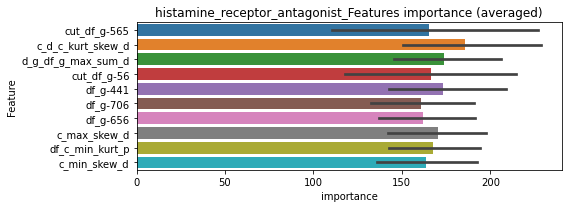

len(train_index) : 5382
len(valid_index) : 1795
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0187625	valid_1's binary_logloss: 0.0342187
[2000]	training's binary_logloss: 0.00955024	valid_1's binary_logloss: 0.0265357
[3000]	training's binary_logloss: 0.00637332	valid_1's binary_logloss: 0.024117
[4000]	training's binary_logloss: 0.00476693	valid_1's binary_logloss: 0.0229263
[5000]	training's binary_logloss: 0.00381116	valid_1's binary_logloss: 0.0223146
Early stopping, best iteration is:
[4995]	training's binary_logloss: 0.00381482	valid_1's binary_logloss: 0.0223143


len(train_index) : 5383
len(valid_index) : 1794
================================= fold 2/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.019487	valid_1's binary_logloss: 0.0287283
[2000]	training's binary_logloss: 0.00996427	valid_1's binary_logloss: 0.0206729
[3000]	training's binary_logloss: 0.0066268	valid_1's binary_logloss: 0.018139
[4000]	training's binary_logloss: 0.0049446	valid_1's binary_logloss: 0.0168761
[5000]	training's binary_logloss: 0.00396266	valid_1's binary_logloss: 0.0162129
Early stopping, best iteration is:
[5200]	training's binary_logloss: 0.00380819	valid_1's binary_logloss: 0.0160747


len(train_index) : 5383
len(valid_index) : 1794
================================= fold 3/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0187512	valid_1's binary_logloss: 0.0328816
[2000]	training's binary_logloss: 0.00953694	valid_1's binary_logloss: 0.0253406
[3000]	training's binary_logloss: 0.00634561	valid_1's binary_logloss: 0.0229105
[4000]	training's binary_logloss: 0.00474412	valid_1's binary_logloss: 0.0219044
Early stopping, best iteration is:
[4258]	training's binary_logloss: 0.00445629	valid_1's binary_logloss: 0.0217253


len(train_index) : 5383
len(valid_index) : 1794
================================= fold 4/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0195579	valid_1's binary_logloss: 0.0274867
[2000]	training's binary_logloss: 0.0100432	valid_1's binary_logloss: 0.0192759
[3000]	training's binary_logloss: 0.00668381	valid_1's binary_logloss: 0.0165074
[4000]	training's binary_logloss: 0.00498441	valid_1's binary_logloss: 0.0151223
[5000]	training's binary_logloss: 0.0039885	valid_1's binary_logloss: 0.0143951
[6000]	training's binary_logloss: 0.00332132	valid_1's binary_logloss: 0.013878
Early stopping, best iteration is:
[6660]	training's binary_logloss: 0.00299234	valid_1's binary_logloss: 0.0136568


histamine_receptor_antagonist logloss: 0.018443305859030857
histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.000406001	valid_1's binary_logloss: 0.0125303
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000365135	valid_1's binary_logloss: 0.0217089
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000382578	valid_1's binary_logloss: 0.00460309
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011097, Threshold: 0.0070275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0070275, conf_0:0.00492, conf_1:0.00914
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.0370275
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_2: 0.0670275


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000325551	valid_1's binary_logloss: 0.00878682


threshold: 0.0670275, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000358437	valid_1's binary_logloss: 0.0120958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.000672092	valid_1's binary_logloss: 0.0208911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000378006	valid_1's binary_logloss: 0.00483619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000337708	valid_1's binary_logloss: 0.00833415


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0093635, Threshold: 0.0670275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0060271 Vs.target_rate: 0.00101
Num_p_label: 24.0, Expected: 4.0, Threshold: 0.0670275, conf_0:0.05362, conf_1:0.08043
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_1: 0.0970275
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_2: 0.1270275
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_3: 0.1570275
threshold: 0.1570275, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000358437	valid_1's binary_logloss: 0.0120958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.000672092	valid_1's binary_logloss: 0.0208911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000378006	valid_1's binary_logloss: 0.00483619
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0093635, Threshold: 0.1570275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, Expected: 4.0, Threshold: 0.1570275, conf_0:0.14132, conf_1:0.17273


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000337708	valid_1's binary_logloss: 0.00833415


threshold: 0.1570275, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


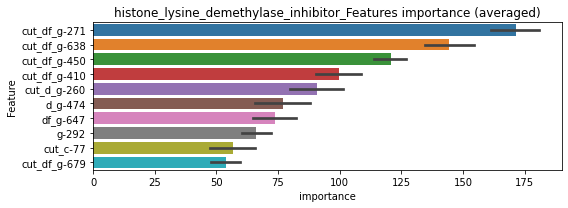

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000527694	valid_1's binary_logloss: 0.0121117
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000376974	valid_1's binary_logloss: 0.0142866
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000370815	valid_1's binary_logloss: 0.00347529
Training until validation scores don't improve for 30 rounds


histone_lysine_demethylase_inhibitor logloss: 0.008822165922790249


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000437549	valid_1's binary_logloss: 0.00541154


histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3282


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000523092	valid_1's binary_logloss: 0.0277076
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000481148	valid_1's binary_logloss: 0.0114334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000377057	valid_1's binary_logloss: 0.00263164
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0033396, Threshold: 0.0041897, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0041897, conf_0:0.00293, conf_1:0.00545
Num_p_label: 0.0, Expected: 5.4, Adj_threshold_1: 0.0341897
threshold: 0.0341897, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00201728	valid_1's binary_logloss: 0.0302189


positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000392829	valid_1's binary_logloss: 0.0225067
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000554938	valid_1's binary_logloss: 0.0105693
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000471649	valid_1's binary_logloss: 0.0127884
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0103470, Threshold: 0.0341897, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0000000 Vs.target_rate: 0.00134
Num_p_label: 0.0, Expected: 5.4, Threshold: 0.0341897, conf_0:0.02735, conf_1:0.04103
threshold: 0.0341897, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000594582	valid_1's binary_logloss: 0.0184452


positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000395738	valid_1's binary_logloss: 0.0207544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000395611	valid_1's binary_logloss: 0.0104317
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00044731	valid_1's binary_logloss: 0.0196043
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0087975, Threshold: 0.0341897, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0000000 Vs.target_rate: 0.00134
Num_p_label: 0.0, Expected: 5.4, Threshold: 0.0341897, conf_0:0.03077, conf_1:0.03761


Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000431697	valid_1's binary_logloss: 0.00812974


threshold: 0.0341897, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 653.0/3800, y_label_rate: 0.1718421


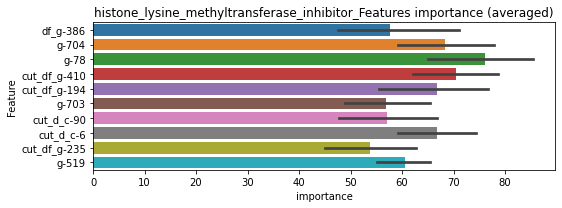

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000511662	valid_1's binary_logloss: 0.0191952
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000510781	valid_1's binary_logloss: 0.00766442
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000537106	valid_1's binary_logloss: 0.0200199
Training until validation scores don't improve for 30 rounds


histone_lysine_methyltransferase_inhibitor logloss: 0.013620062384792636


Early stopping, best iteration is:
[316]	training's binary_logloss: 0.000755878	valid_1's binary_logloss: 0.00760075


hiv_inhibitor, len(trt): 72, len(othr): 3281
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3281


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0243481	valid_1's binary_logloss: 0.0819744
Early stopping, best iteration is:
[1884]	training's binary_logloss: 0.0128216	valid_1's binary_logloss: 0.0759063
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0256342	valid_1's binary_logloss: 0.0631081
[2000]	training's binary_logloss: 0.0125887	valid_1's binary_logloss: 0.0533889
[3000]	training's binary_logloss: 0.00829019	valid_1's binary_logloss: 0.049737
Early stopping, best iteration is:
[3260]	training's binary_logloss: 0.00762311	valid_1's binary_logloss: 0.049205
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271464	valid_1's binary_logloss: 0.0387605
[2000]	training's binary_logloss: 0.0133883	valid_1's binary_logloss: 0.0280924
[3000]	training's binary_logloss: 0.00879871	valid_1's binary_logloss: 0.0241922
[4000]	training's binary_l

1 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0273596, Threshold: 0.1380452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.1380452, conf_0:0.09663, conf_1:0.17946
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_1: 0.1680452
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_2: 0.1980452
Num_p_label: 16.0, Expected: 12.0, Adj_threshold_3: 0.2280452
threshold: 0.2280452, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0242559	valid_1's binary_logloss: 0.0547278
[2000]	training's binary_logloss: 0.011938	valid_1's binary_logloss: 0.0446437
[3000]	training's binary_logloss: 0.00787723	valid_1's binary_logloss: 0.0408165
[4000]	training's binary_logloss: 0.00590404	valid_1's binary_logloss: 0.0390037
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.00567351	valid_1's binary_logloss: 0.0387648
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0235866	valid_1's binary_logloss: 0.0641137
[2000]	training's binary_logloss: 0.011688	valid_1's binary_logloss: 0.0558784
[3000]	training's binary_logloss: 0.00772088	valid_1's binary_logloss: 0.0532142
Early stopping, best iteration is:
[3431]	training's binary_logloss: 0.00673708	valid_1's binary_logloss: 0.0525961
Training until validation scores don't improve for 30 rounds
[1000]	training's binary

2 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0645074, Threshold: 0.2280452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 639.0/3771
p_label_rate: 0.0180814 Vs.target_rate: 0.00302
Num_p_label: 72.0, Expected: 12.0, Threshold: 0.2280452, conf_0:0.18244, conf_1:0.27365
Num_p_label: 63.0, Expected: 12.0, Adj_threshold_1: 0.2580452
Num_p_label: 60.0, Expected: 12.0, Adj_threshold_2: 0.2880452
Num_p_label: 55.0, Expected: 12.0, Adj_threshold_3: 0.3180452
Num_p_label: 52.0, Expected: 12.0, Adj_threshold_4: 0.3480452
Num_p_label: 44.0, Expected: 12.0, Adj_threshold_5: 0.3780452
Num_p_label: 39.0, Expected: 12.0, Adj_threshold_6: 0.4080452
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_7: 0.4380452
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_8: 0.4680452
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_9: 0.4980452
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_10: 0.5280452
threshold: 0.5280452, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
p

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0216151	valid_1's binary_logloss: 0.0531345
[2000]	training's binary_logloss: 0.0107993	valid_1's binary_logloss: 0.0436265
[3000]	training's binary_logloss: 0.00716119	valid_1's binary_logloss: 0.040387
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.00592954	valid_1's binary_logloss: 0.039202
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0214809	valid_1's binary_logloss: 0.0509622
[2000]	training's binary_logloss: 0.0106122	valid_1's binary_logloss: 0.0418594
Early stopping, best iteration is:
[2850]	training's binary_logloss: 0.00740319	valid_1's binary_logloss: 0.0391605
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0225261	valid_1's binary_logloss: 0.0387475
[2000]	training's binary_logloss: 0.0111653	valid_1's binary_logloss: 0.0291308
[3000]	training's binary_l

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0685813, Threshold: 0.5280452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 630.0/3753
p_label_rate: 0.0110497 Vs.target_rate: 0.00302
Num_p_label: 44.0, Expected: 12.0, Threshold: 0.5280452, conf_0:0.47524, conf_1:0.58085
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_1: 0.5580452
Num_p_label: 34.0, Expected: 12.0, Adj_threshold_2: 0.5880452
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_3: 0.6180452
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_4: 0.6480452
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_5: 0.6780452
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_6: 0.7080452
threshold: 0.7080452, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 630.0/3753, y_label_rate: 0.1678657


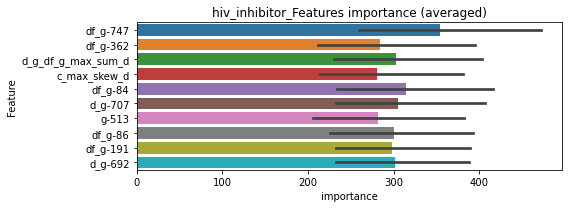

len(train_index) : 2814
len(valid_index) : 939
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285316	valid_1's binary_logloss: 0.0532563
[2000]	training's binary_logloss: 0.0146014	valid_1's binary_logloss: 0.0407903
[3000]	training's binary_logloss: 0.00975172	valid_1's binary_logloss: 0.0362212
[4000]	training's binary_logloss: 0.00731865	valid_1's binary_logloss: 0.0340165
Early stopping, best iteration is:
[4297]	training's binary_logloss: 0.00681867	valid_1's binary_logloss: 0.0335496


len(train_index) : 2815
len(valid_index) : 938
================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0295862	valid_1's binary_logloss: 0.0439642
[2000]	training's binary_logloss: 0.0151363	valid_1's binary_logloss: 0.0321582
[3000]	training's binary_logloss: 0.0100923	valid_1's binary_logloss: 0.0279317
[4000]	training's binary_logloss: 0.00756975	valid_1's binary_logloss: 0.0257909
[5000]	training's binary_logloss: 0.00607263	valid_1's binary_logloss: 0.0245314
[6000]	training's binary_logloss: 0.00506705	valid_1's binary_logloss: 0.0235337
[7000]	training's binary_logloss: 0.00435548	valid_1's binary_logloss: 0.0228672
Early stopping, best iteration is:
[7421]	training's binary_logloss: 0.00412016	valid_1's binary_logloss: 0.0226758


len(train_index) : 2815
len(valid_index) : 938
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0294546	valid_1's binary_logloss: 0.046814
[2000]	training's binary_logloss: 0.0150811	valid_1's binary_logloss: 0.0345036
[3000]	training's binary_logloss: 0.0100829	valid_1's binary_logloss: 0.0301003
[4000]	training's binary_logloss: 0.00756021	valid_1's binary_logloss: 0.0278334
[5000]	training's binary_logloss: 0.00607345	valid_1's binary_logloss: 0.0264306
Early stopping, best iteration is:
[5455]	training's binary_logloss: 0.00556813	valid_1's binary_logloss: 0.0258644


len(train_index) : 2815
len(valid_index) : 938
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0276151	valid_1's binary_logloss: 0.0628081
[2000]	training's binary_logloss: 0.0141661	valid_1's binary_logloss: 0.0527413
[3000]	training's binary_logloss: 0.00949712	valid_1's binary_logloss: 0.0493857
Early stopping, best iteration is:
[3495]	training's binary_logloss: 0.00815744	valid_1's binary_logloss: 0.0484926


hiv_inhibitor logloss: 0.032645844382611866
hiv_inhibitor is unpredictable(><)!


mutually exclusive columns: hmgcr_inhibitor


hmgcr_inhibitor, len(trt): 283, len(othr): 7400
target_rate: 0.0118838 → Adj_target_rate: 0.0101910


selected negative label: 7400


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.042378	valid_1's binary_logloss: 0.115132
Early stopping, best iteration is:
[1799]	training's binary_logloss: 0.0225819	valid_1's binary_logloss: 0.106484
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.042285	valid_1's binary_logloss: 0.111235
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.0246413	valid_1's binary_logloss: 0.104527
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0404668	valid_1's binary_logloss: 0.133868
Early stopping, best iteration is:
[1113]	training's binary_logloss: 0.0362568	valid_1's binary_logloss: 0.132687
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0419133	valid_1's binary_logloss: 0.119168
Early stopping, best iteration is:
[1801]	training's binary_logloss: 0.0222853	valid_1's binary_logl

1 / 3, AUC score:0.975, PR-AUC:0.949
y_Threshold: 0.0522631, Threshold: 0.0811894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 560 → Positive_corect_labels: 1348/8320
p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, Expected: 47.3, Threshold: 0.0811894, conf_0:0.05683, conf_1:0.10555
threshold: 0.0811894, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1348.0/8320, y_label_rate: 0.1620192
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0279467	valid_1's binary_logloss: 0.0757954
[2000]	training's binary_logloss: 0.01339	valid_1's binary_logloss: 0.0686999
Early stopping, best iteration is:
[2279]	training's binary_logloss: 0.0116229	valid_1's binary_logloss: 0.0678354
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0276861	valid_1's binary_logloss: 0.0764178
[2000]	training's binary_logloss: 0.0133744	valid_1's binary_logloss: 0.0697641
Early stopping, best iteration is:
[2176]	training's binary_logloss: 0.0122349	valid_1's binary_logloss: 0.0693479
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0279827	valid_1's binary_logloss: 0.0738819
[2000]	training's binary_logloss: 0.013486	valid_1's binary_logloss: 0.067134
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0113112	valid_1's binary_logloss: 0.0658

2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0513028, Threshold: 0.0811894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 1280.0/8184
p_label_rate: 0.0057760 Vs.target_rate: 0.01188
Num_p_label: 23.0, Expected: 47.3, Threshold: 0.0811894, conf_0:0.06495, conf_1:0.09743
threshold: 0.0811894, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 1280.0/8184, y_label_rate: 0.1564027
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0205706	valid_1's binary_logloss: 0.0517452
[2000]	training's binary_logloss: 0.0100718	valid_1's binary_logloss: 0.0441094
Early stopping, best iteration is:
[2557]	training's binary_logloss: 0.00777552	valid_1's binary_logloss: 0.0424206
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0210953	valid_1's binary_logloss: 0.0450806
[2000]	training's binary_logloss: 0.0102848	valid_1's binary_logloss: 0.0372051
[3000]	training's binary_logloss: 0.00671517	valid_1's binary_logloss: 0.0347978
Early stopping, best iteration is:
[3437]	training's binary_logloss: 0.00582949	valid_1's binary_logloss: 0.0343295
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0211976	valid_1's binary_logloss: 0.045108
[2000]	training's binary_logloss: 0.0103612	valid_1's binary_logloss: 0.037717
Early stopping, best itera

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0448799, Threshold: 0.0811894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 1250.0/8124
p_label_rate: 0.0040181 Vs.target_rate: 0.01188
Num_p_label: 16.0, Expected: 47.3, Threshold: 0.0811894, conf_0:0.07307, conf_1:0.08931
threshold: 0.0811894, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 1250.0/8124, y_label_rate: 0.1538651


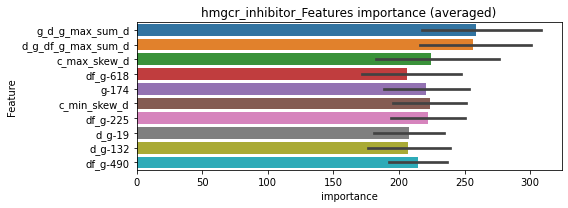

len(train_index) : 6093
len(valid_index) : 2031
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.025365	valid_1's binary_logloss: 0.0395612
[2000]	training's binary_logloss: 0.0129604	valid_1's binary_logloss: 0.0288772
[3000]	training's binary_logloss: 0.00857507	valid_1's binary_logloss: 0.0250682
[4000]	training's binary_logloss: 0.00638836	valid_1's binary_logloss: 0.0230749
[5000]	training's binary_logloss: 0.00509641	valid_1's binary_logloss: 0.0219123
Early stopping, best iteration is:
[5200]	training's binary_logloss: 0.00489959	valid_1's binary_logloss: 0.0217165


len(train_index) : 6093
len(valid_index) : 2031
================================= fold 2/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0246136	valid_1's binary_logloss: 0.0408985
[2000]	training's binary_logloss: 0.0125582	valid_1's binary_logloss: 0.0311896
[3000]	training's binary_logloss: 0.00832857	valid_1's binary_logloss: 0.0277973
[4000]	training's binary_logloss: 0.00621309	valid_1's binary_logloss: 0.0261127
[5000]	training's binary_logloss: 0.0049478	valid_1's binary_logloss: 0.0251198
Early stopping, best iteration is:
[5373]	training's binary_logloss: 0.00460111	valid_1's binary_logloss: 0.0248566


len(train_index) : 6093
len(valid_index) : 2031
================================= fold 3/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0246212	valid_1's binary_logloss: 0.0424341
[2000]	training's binary_logloss: 0.0126063	valid_1's binary_logloss: 0.0322645
[3000]	training's binary_logloss: 0.00837881	valid_1's binary_logloss: 0.0285626
Early stopping, best iteration is:
[3322]	training's binary_logloss: 0.00755163	valid_1's binary_logloss: 0.0278269


len(train_index) : 6093
len(valid_index) : 2031
================================= fold 4/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0242851	valid_1's binary_logloss: 0.0465768
[2000]	training's binary_logloss: 0.0124942	valid_1's binary_logloss: 0.0369504
[3000]	training's binary_logloss: 0.00828012	valid_1's binary_logloss: 0.033676
[4000]	training's binary_logloss: 0.00616886	valid_1's binary_logloss: 0.0320987
Early stopping, best iteration is:
[4270]	training's binary_logloss: 0.00576387	valid_1's binary_logloss: 0.0317731


hmgcr_inhibitor logloss: 0.026543269985472056
hsp_inhibitor, len(trt): 93, len(othr): 3273
target_rate: 0.0039053 → Adj_target_rate: 0.0039574


selected negative label: 3273


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0328051	valid_1's binary_logloss: 0.0975947
Early stopping, best iteration is:
[1911]	training's binary_logloss: 0.0169416	valid_1's binary_logloss: 0.0879806
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.03384	valid_1's binary_logloss: 0.0874331
[2000]	training's binary_logloss: 0.0166401	valid_1's binary_logloss: 0.0770519
Early stopping, best iteration is:
[2111]	training's binary_logloss: 0.0157293	valid_1's binary_logloss: 0.0764757
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0348001	valid_1's binary_logloss: 0.0717704
[2000]	training's binary_logloss: 0.0171811	valid_1's binary_logloss: 0.059937
[3000]	training's binary_logloss: 0.0112708	valid_1's binary_logloss: 0.0553083
Early stopping, best iteration is:
[3618]	training's binary_logloss: 0.00927649	valid_1's binary_logloss: 0.05

1 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.0408720, Threshold: 0.1855735, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 637/3761
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, Expected: 15.6, Threshold: 0.1855735, conf_0:0.12990, conf_1:0.24125
Num_p_label: 30.0, Expected: 15.6, Adj_threshold_1: 0.2155735
Num_p_label: 22.0, Expected: 15.6, Adj_threshold_2: 0.2455735
threshold: 0.2455735, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 637.0/3761, y_label_rate: 0.1693698
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0282967	valid_1's binary_logloss: 0.075608
[2000]	training's binary_logloss: 0.0140483	valid_1's binary_logloss: 0.0646074
[3000]	training's binary_logloss: 0.00925942	valid_1's binary_logloss: 0.0608771
Early stopping, best iteration is:
[3326]	training's binary_logloss: 0.00834302	valid_1's binary_logloss: 0.0601201
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.029763	valid_1's binary_logloss: 0.0589982
[2000]	training's binary_logloss: 0.014672	valid_1's binary_logloss: 0.0474337
[3000]	training's binary_logloss: 0.00966554	valid_1's binary_logloss: 0.0429975
Early stopping, best iteration is:
[3865]	training's binary_logloss: 0.00746789	valid_1's binary_logloss: 0.0410062
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0292895	valid_1's binary_logloss: 0.0655365
[2000]	training's binary_l

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0704069, Threshold: 0.2455735, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 618.0/3723
p_label_rate: 0.0248619 Vs.target_rate: 0.00391
Num_p_label: 99.0, Expected: 15.6, Threshold: 0.2455735, conf_0:0.19646, conf_1:0.29469
Num_p_label: 92.0, Expected: 15.6, Adj_threshold_1: 0.2755735
Num_p_label: 83.0, Expected: 15.6, Adj_threshold_2: 0.3055735
Num_p_label: 75.0, Expected: 15.6, Adj_threshold_3: 0.3355735
Num_p_label: 67.0, Expected: 15.6, Adj_threshold_4: 0.3655735
Num_p_label: 56.0, Expected: 15.6, Adj_threshold_5: 0.3955735
Num_p_label: 44.0, Expected: 15.6, Adj_threshold_6: 0.4255735
Num_p_label: 42.0, Expected: 15.6, Adj_threshold_7: 0.4555735
Num_p_label: 39.0, Expected: 15.6, Adj_threshold_8: 0.4855735
Num_p_label: 35.0, Expected: 15.6, Adj_threshold_9: 0.5155735
Num_p_label: 28.0, Expected: 15.6, Adj_threshold_10: 0.5455735
threshold: 0.5455735, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
p

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0247556	valid_1's binary_logloss: 0.0572367
[2000]	training's binary_logloss: 0.0123955	valid_1's binary_logloss: 0.0472863
[3000]	training's binary_logloss: 0.00822192	valid_1's binary_logloss: 0.0439018
Early stopping, best iteration is:
[3181]	training's binary_logloss: 0.00774739	valid_1's binary_logloss: 0.0435804
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0260339	valid_1's binary_logloss: 0.0478888
[2000]	training's binary_logloss: 0.0129936	valid_1's binary_logloss: 0.0369793
[3000]	training's binary_logloss: 0.0085949	valid_1's binary_logloss: 0.032878
Early stopping, best iteration is:
[3800]	training's binary_logloss: 0.00678193	valid_1's binary_logloss: 0.0311421
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0249895	valid_1's binary_logloss: 0.0593292
[2000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0803059, Threshold: 0.5455735, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 607.0/3701
p_label_rate: 0.0140633 Vs.target_rate: 0.00391
Num_p_label: 56.0, Expected: 15.6, Threshold: 0.5455735, conf_0:0.49102, conf_1:0.60013
Num_p_label: 46.0, Expected: 15.6, Adj_threshold_1: 0.5755735
Num_p_label: 42.0, Expected: 15.6, Adj_threshold_2: 0.6055735
Num_p_label: 33.0, Expected: 15.6, Adj_threshold_3: 0.6355735
Num_p_label: 28.0, Expected: 15.6, Adj_threshold_4: 0.6655735
Num_p_label: 19.0, Expected: 15.6, Adj_threshold_5: 0.6955735
threshold: 0.6955735, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 607.0/3701, y_label_rate: 0.1640097


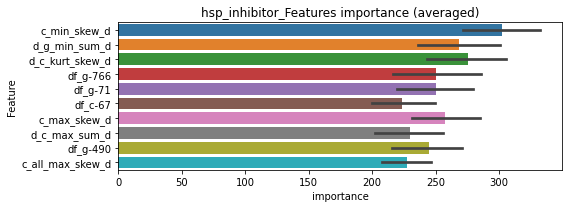

len(train_index) : 2775
len(valid_index) : 926
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0323168	valid_1's binary_logloss: 0.0628016
[2000]	training's binary_logloss: 0.0167326	valid_1's binary_logloss: 0.0497547
[3000]	training's binary_logloss: 0.0112536	valid_1's binary_logloss: 0.045058
Early stopping, best iteration is:
[3335]	training's binary_logloss: 0.0101339	valid_1's binary_logloss: 0.0441947


len(train_index) : 2776
len(valid_index) : 925
================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0335319	valid_1's binary_logloss: 0.0520744
[2000]	training's binary_logloss: 0.0172927	valid_1's binary_logloss: 0.0373441
[3000]	training's binary_logloss: 0.0115803	valid_1's binary_logloss: 0.0317542
[4000]	training's binary_logloss: 0.00868825	valid_1's binary_logloss: 0.0288152
[5000]	training's binary_logloss: 0.0069846	valid_1's binary_logloss: 0.0270089
[6000]	training's binary_logloss: 0.00583812	valid_1's binary_logloss: 0.0257017
[7000]	training's binary_logloss: 0.00503251	valid_1's binary_logloss: 0.0247988
Early stopping, best iteration is:
[6989]	training's binary_logloss: 0.00503924	valid_1's binary_logloss: 0.0247953


len(train_index) : 2776
len(valid_index) : 925
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0340704	valid_1's binary_logloss: 0.0496632
[2000]	training's binary_logloss: 0.0175221	valid_1's binary_logloss: 0.0341265
[3000]	training's binary_logloss: 0.0117642	valid_1's binary_logloss: 0.0284269
[4000]	training's binary_logloss: 0.00883545	valid_1's binary_logloss: 0.0254383
[5000]	training's binary_logloss: 0.00710194	valid_1's binary_logloss: 0.0236972
[6000]	training's binary_logloss: 0.00593052	valid_1's binary_logloss: 0.0223305
[7000]	training's binary_logloss: 0.00510796	valid_1's binary_logloss: 0.0214648
[8000]	training's binary_logloss: 0.00448914	valid_1's binary_logloss: 0.0206586
[9000]	training's binary_logloss: 0.00401032	valid_1's binary_logloss: 0.0200919
Early stopping, best iteration is:
[9386]	training's binary_logloss: 0.00385435	valid_1's binary_logloss: 0.0199146


len(train_index) : 2776
len(valid_index) : 925
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0311233	valid_1's binary_logloss: 0.0629198
[2000]	training's binary_logloss: 0.0160642	valid_1's binary_logloss: 0.0517761
[3000]	training's binary_logloss: 0.0108175	valid_1's binary_logloss: 0.0478831
Early stopping, best iteration is:
[3139]	training's binary_logloss: 0.0103405	valid_1's binary_logloss: 0.0474948


hsp_inhibitor logloss: 0.034102557811581405
hsp_inhibitor is unpredictable(><)!
igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3283


N_features:504
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[209]	training's binary_logloss: 0.00347476	valid_1's binary_logloss: 0.0602526
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000454463	valid_1's binary_logloss: 0.0133679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000550855	valid_1's binary_logloss: 0.00422288
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0042137, Threshold: 0.0159971, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0159971, conf_0:0.01120, conf_1:0.02080
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_1: 0.0459971


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000501154	valid_1's binary_logloss: 0.025256


threshold: 0.0459971, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[206]	training's binary_logloss: 0.00361459	valid_1's binary_logloss: 0.0645081
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000452954	valid_1's binary_logloss: 0.0122257
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000458163	valid_1's binary_logloss: 0.00355803
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0165106, Threshold: 0.0459971, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0090407 Vs.target_rate: 0.00155
Num_p_label: 36.0, Expected: 6.2, Threshold: 0.0459971, conf_0:0.03680, conf_1:0.05520
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_1: 0.0759971


Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000505718	valid_1's binary_logloss: 0.0274875


threshold: 0.0759971, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3799, y_label_rate: 0.1716241
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000507631	valid_1's binary_logloss: 0.018909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000582145	valid_1's binary_logloss: 0.0147184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00074618	valid_1's binary_logloss: 0.0174277
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0132069, Threshold: 0.0759971, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0047715 Vs.target_rate: 0.00155
Num_p_label: 19.0, Expected: 6.2, Threshold: 0.0759971, conf_0:0.06840, conf_1:0.08360
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.1059971


Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000472287	valid_1's binary_logloss: 0.0256096


threshold: 0.1059971, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 650.0/3795, y_label_rate: 0.1712780


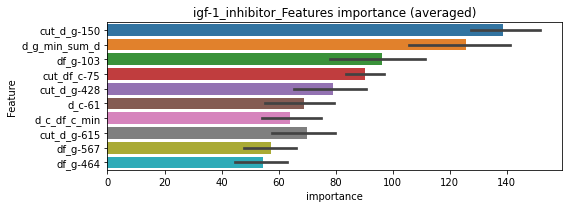

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 igf-1_inhibitor=================================


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000570179	valid_1's binary_logloss: 0.0114643
Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 igf-1_inhibitor=================================


Early stopping, best iteration is:
[315]	training's binary_logloss: 0.000795769	valid_1's binary_logloss: 0.0202131
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 igf-1_inhibitor=================================


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000561686	valid_1's binary_logloss: 0.00941965
Training until validation scores don't improve for 30 rounds


igf-1_inhibitor logloss: 0.015980186699008546


Early stopping, best iteration is:
[256]	training's binary_logloss: 0.00101924	valid_1's binary_logloss: 0.0228309


ikk_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00043915	valid_1's binary_logloss: 0.0217549
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000402972	valid_1's binary_logloss: 0.0229311
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000347485	valid_1's binary_logloss: 0.00137454
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017098, Threshold: 0.0048122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0048122, conf_0:0.00337, conf_1:0.00626
Num_p_label: 2.0, Expected: 5.0, Adj_threshold_1: 0.0348122


Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000511902	valid_1's binary_logloss: 0.0118572


threshold: 0.0348122, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000415094	valid_1's binary_logloss: 0.01879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000404063	valid_1's binary_logloss: 0.0224019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000341254	valid_1's binary_logloss: 0.00111806
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0134621, Threshold: 0.0348122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, Expected: 5.0, Threshold: 0.0348122, conf_0:0.02785, conf_1:0.04177


Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00037873	valid_1's binary_logloss: 0.0110734


threshold: 0.0348122, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000415094	valid_1's binary_logloss: 0.01879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000404063	valid_1's binary_logloss: 0.0224019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000341254	valid_1's binary_logloss: 0.00111806
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0134621, Threshold: 0.0348122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, Expected: 5.0, Threshold: 0.0348122, conf_0:0.03133, conf_1:0.03829


Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00037873	valid_1's binary_logloss: 0.0110734


threshold: 0.0348122, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


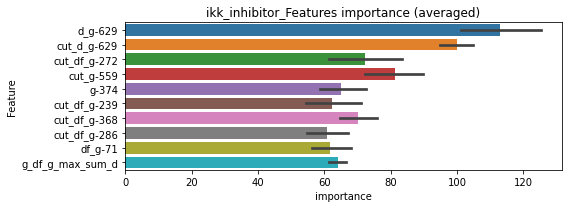

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ikk_inhibitor=================================


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000424956	valid_1's binary_logloss: 0.0172377
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ikk_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000460723	valid_1's binary_logloss: 0.0180757
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000355535	valid_1's binary_logloss: 0.0015507


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


ikk_inhibitor logloss: 0.011387743706640086


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000380223	valid_1's binary_logloss: 0.00868688


imidazoline_receptor_agonist, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:503
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000454822	valid_1's binary_logloss: 0.015638
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000484305	valid_1's binary_logloss: 0.0344047
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000371305	valid_1's binary_logloss: 0.00557439
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016313, Threshold: 0.0070219, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0070219, conf_0:0.00492, conf_1:0.00913
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_1: 0.0370219
threshold: 0.0370219, positive_p_label: 9.0/3982, p_label_rate: 0.0022602


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000413831	valid_1's binary_logloss: 0.0107021


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000427514	valid_1's binary_logloss: 0.0155714
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00053691	valid_1's binary_logloss: 0.0342811
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000401134	valid_1's binary_logloss: 0.00526768
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0123293, Threshold: 0.0370219, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0067805 Vs.target_rate: 0.00130
Num_p_label: 27.0, Expected: 5.2, Threshold: 0.0370219, conf_0:0.02962, conf_1:0.04443
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_1: 0.0670219
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_2: 0.0970219


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00040606	valid_1's binary_logloss: 0.00909584


threshold: 0.0970219, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3808, y_label_rate: 0.1720063
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000379016	valid_1's binary_logloss: 0.0191526
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000407325	valid_1's binary_logloss: 0.00586608
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000381927	valid_1's binary_logloss: 0.00676853
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0105731, Threshold: 0.0970219, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3806
p_label_rate: 0.0032647 Vs.target_rate: 0.00130
Num_p_label: 13.0, Expected: 5.2, Threshold: 0.0970219, conf_0:0.08732, conf_1:0.10672
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_1: 0.1270219
threshold: 0.1270219, positive_p_label: 12.0/3982, p_label_rate: 0.0030136


Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000444171	valid_1's binary_logloss: 0.0204736


positive_y_label: 654.0/3806, y_label_rate: 0.1718339


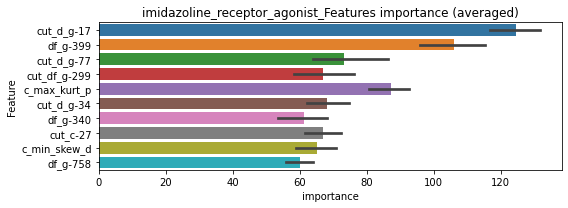

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 imidazoline_receptor_agonist=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000464757	valid_1's binary_logloss: 0.0147225
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 imidazoline_receptor_agonist=================================


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000469835	valid_1's binary_logloss: 0.00638359
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 imidazoline_receptor_agonist=================================


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.00053666	valid_1's binary_logloss: 0.00702987
Training until validation scores don't improve for 30 rounds


imidazoline_receptor_agonist logloss: 0.011041589517713621


Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000487486	valid_1's binary_logloss: 0.0160314


immunosuppressant, len(trt): 73, len(othr): 3274
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3274


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0269323	valid_1's binary_logloss: 0.0767448
[2000]	training's binary_logloss: 0.0131099	valid_1's binary_logloss: 0.0692984
Early stopping, best iteration is:
[2390]	training's binary_logloss: 0.0109078	valid_1's binary_logloss: 0.0681137
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273281	valid_1's binary_logloss: 0.0692979
[2000]	training's binary_logloss: 0.0132767	valid_1's binary_logloss: 0.0608528
Early stopping, best iteration is:
[2286]	training's binary_logloss: 0.0115347	valid_1's binary_logloss: 0.0596955
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0281319	valid_1's binary_logloss: 0.0595177
[2000]	training's binary_logloss: 0.0136259	valid_1's binary_logloss: 0.049696
[3000]	training's binary_logloss: 0.00887863	valid_1's binary_logloss: 0.0463557
Early stopping, best iterat

1 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0256301, Threshold: 0.0601907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3780
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0601907, conf_0:0.04213, conf_1:0.07825
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_1: 0.0901907
Num_p_label: 13.0, Expected: 12.2, Adj_threshold_2: 0.1201907
threshold: 0.1201907, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 646.0/3780, y_label_rate: 0.1708995
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248178	valid_1's binary_logloss: 0.0640937
[2000]	training's binary_logloss: 0.0121892	valid_1's binary_logloss: 0.0551325
Early stopping, best iteration is:
[2901]	training's binary_logloss: 0.00830583	valid_1's binary_logloss: 0.0519828
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0242126	valid_1's binary_logloss: 0.0772584
[2000]	training's binary_logloss: 0.0119715	valid_1's binary_logloss: 0.0690319
Early stopping, best iteration is:
[2312]	training's binary_logloss: 0.0103085	valid_1's binary_logloss: 0.0678031
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0261356	valid_1's binary_logloss: 0.0535203
[2000]	training's binary_logloss: 0.0127804	valid_1's binary_logloss: 0.0441578
[3000]	training's binary_logloss: 0.00835117	valid_1's binary_logloss: 0.040873
Early stopping, best itera

2 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0416647, Threshold: 0.1201907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 633.0/3754
p_label_rate: 0.0057760 Vs.target_rate: 0.00307
Num_p_label: 23.0, Expected: 12.2, Threshold: 0.1201907, conf_0:0.09615, conf_1:0.14423
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_1: 0.1501907
threshold: 0.1501907, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 633.0/3754, y_label_rate: 0.1686201
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0224316	valid_1's binary_logloss: 0.0563445
[2000]	training's binary_logloss: 0.0111137	valid_1's binary_logloss: 0.0481892
Early stopping, best iteration is:
[2106]	training's binary_logloss: 0.0105412	valid_1's binary_logloss: 0.0478077
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.022757	valid_1's binary_logloss: 0.0525808
[2000]	training's binary_logloss: 0.0112358	valid_1's binary_logloss: 0.0439473
[3000]	training's binary_logloss: 0.00741316	valid_1's binary_logloss: 0.0409913
Early stopping, best iteration is:
[3783]	training's binary_logloss: 0.0058658	valid_1's binary_logloss: 0.0396791
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0231251	valid_1's binary_logloss: 0.0513048
[2000]	training's binary_logloss: 0.0114032	valid_1's binary_logloss: 0.0434871
Early stopping, best iterat

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0446033, Threshold: 0.1501907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 628.0/3744
p_label_rate: 0.0040181 Vs.target_rate: 0.00307
Num_p_label: 16.0, Expected: 12.2, Threshold: 0.1501907, conf_0:0.13517, conf_1:0.16521
threshold: 0.1501907, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 628.0/3744, y_label_rate: 0.1677350


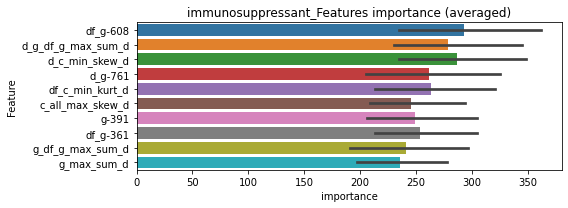

len(train_index) : 2808
len(valid_index) : 936
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0309033	valid_1's binary_logloss: 0.0610015
[2000]	training's binary_logloss: 0.0158544	valid_1's binary_logloss: 0.0486362
[3000]	training's binary_logloss: 0.0105863	valid_1's binary_logloss: 0.0443327
Early stopping, best iteration is:
[3332]	training's binary_logloss: 0.0095217	valid_1's binary_logloss: 0.0435847


len(train_index) : 2808
len(valid_index) : 936
================================= fold 2/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0307962	valid_1's binary_logloss: 0.062264
[2000]	training's binary_logloss: 0.0158071	valid_1's binary_logloss: 0.0489778
[3000]	training's binary_logloss: 0.0105168	valid_1's binary_logloss: 0.044287
Early stopping, best iteration is:
[3775]	training's binary_logloss: 0.00835066	valid_1's binary_logloss: 0.0424898


len(train_index) : 2808
len(valid_index) : 936
================================= fold 3/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0329773	valid_1's binary_logloss: 0.0420113
[2000]	training's binary_logloss: 0.0167827	valid_1's binary_logloss: 0.0285868
[3000]	training's binary_logloss: 0.0111233	valid_1's binary_logloss: 0.0238493
[4000]	training's binary_logloss: 0.00829636	valid_1's binary_logloss: 0.0212956
[5000]	training's binary_logloss: 0.00662762	valid_1's binary_logloss: 0.0198238
[6000]	training's binary_logloss: 0.00551966	valid_1's binary_logloss: 0.0187142
[7000]	training's binary_logloss: 0.00474089	valid_1's binary_logloss: 0.0179591
[8000]	training's binary_logloss: 0.00415811	valid_1's binary_logloss: 0.017365
[9000]	training's binary_logloss: 0.00370721	valid_1's binary_logloss: 0.0168732
Early stopping, best iteration is:
[9296]	training's binary_logloss: 0.00359273	valid_1's binary_logloss: 0.0167543


len(train_index) : 2808
len(valid_index) : 936
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0314458	valid_1's binary_logloss: 0.0586726
[2000]	training's binary_logloss: 0.0160849	valid_1's binary_logloss: 0.047159
[3000]	training's binary_logloss: 0.0106701	valid_1's binary_logloss: 0.0431015
[4000]	training's binary_logloss: 0.00797604	valid_1's binary_logloss: 0.0412149
Early stopping, best iteration is:
[4476]	training's binary_logloss: 0.00711852	valid_1's binary_logloss: 0.0406488


immunosuppressant logloss: 0.03586939074142318
immunosuppressant is unpredictable(><)!
insulin_secretagogue, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3282


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000430497	valid_1's binary_logloss: 0.0254287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00044493	valid_1's binary_logloss: 0.0147297
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000359762	valid_1's binary_logloss: 0.000693576
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016158, Threshold: 0.0070030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0070030, conf_0:0.00490, conf_1:0.00910
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_1: 0.0370030


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000429182	valid_1's binary_logloss: 0.0204669


threshold: 0.0370030, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000433111	valid_1's binary_logloss: 0.0242957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.000594565	valid_1's binary_logloss: 0.0157114
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000358623	valid_1's binary_logloss: 0.000664479
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162509, Threshold: 0.0370030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0085384 Vs.target_rate: 0.00126
Num_p_label: 34.0, Expected: 5.0, Threshold: 0.0370030, conf_0:0.02960, conf_1:0.04440
Num_p_label: 24.0, Expected: 5.0, Adj_threshold_1: 0.0670030
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_2: 0.0970030
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_3: 0.1270030
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_4: 0.1570030
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_5: 0.1870030
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_6: 0.2170030


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000421922	valid_1's binary_logloss: 0.0212018


threshold: 0.2170030, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000390063	valid_1's binary_logloss: 0.0185526
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000346247	valid_1's binary_logloss: 0.00526996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000356728	valid_1's binary_logloss: 0.00881181
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0128406, Threshold: 0.2170030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0035158 Vs.target_rate: 0.00126
Num_p_label: 14.0, Expected: 5.0, Threshold: 0.2170030, conf_0:0.19530, conf_1:0.23870
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.2470030
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.2770030


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000350647	valid_1's binary_logloss: 0.0139788


Num_p_label: 12.0, Expected: 5.0, Adj_threshold_3: 0.3070030
threshold: 0.3070030, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3800, y_label_rate: 0.1718421


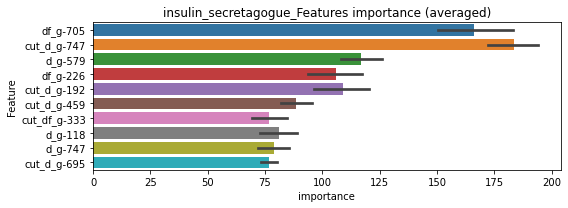

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 insulin_secretagogue=================================


Early stopping, best iteration is:
[273]	training's binary_logloss: 0.000773041	valid_1's binary_logloss: 0.0203643
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 insulin_secretagogue=================================


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000405804	valid_1's binary_logloss: 0.00648155
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 insulin_secretagogue=================================


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000437541	valid_1's binary_logloss: 0.00723785
Training until validation scores don't improve for 30 rounds


insulin_secretagogue logloss: 0.010597681736652698


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000493301	valid_1's binary_logloss: 0.00830701


insulin_sensitizer, len(trt): 51, len(othr): 3279
target_rate: 0.0021416 → Adj_target_rate: 0.0023748


selected negative label: 3279


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000835991	valid_1's binary_logloss: 0.0385323
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000713699	valid_1's binary_logloss: 0.0212434
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000727298	valid_1's binary_logloss: 0.0290223
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0029800, Threshold: 0.0062052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, Expected: 8.5, Threshold: 0.0062052, conf_0:0.00434, conf_1:0.00807
Num_p_label: 0.0, Expected: 8.5, Adj_threshold_1: 0.0362052
threshold: 0.0362052, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00101161	valid_1's binary_logloss: 0.0417968


positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000921841	valid_1's binary_logloss: 0.0390945
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000504089	valid_1's binary_logloss: 0.0206484
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000685029	valid_1's binary_logloss: 0.0228231
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0074955, Threshold: 0.0362052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0010045 Vs.target_rate: 0.00214
Num_p_label: 4.0, Expected: 8.5, Threshold: 0.0362052, conf_0:0.02896, conf_1:0.04345
threshold: 0.0362052, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000801112	valid_1's binary_logloss: 0.043252


positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000543843	valid_1's binary_logloss: 0.0274493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000895851	valid_1's binary_logloss: 0.0464727
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000670837	valid_1's binary_logloss: 0.0148292
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0089458, Threshold: 0.0362052, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000482339	valid_1's binary_logloss: 0.0222041


Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0005023 Vs.target_rate: 0.00214
Num_p_label: 2.0, Expected: 8.5, Threshold: 0.0362052, conf_0:0.03258, conf_1:0.03983
threshold: 0.0362052, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 649.0/3790, y_label_rate: 0.1712401


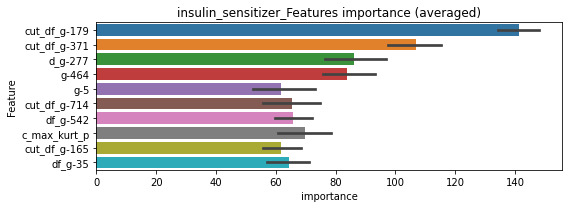

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 insulin_sensitizer=================================


Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00131138	valid_1's binary_logloss: 0.0282362
Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 insulin_sensitizer=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000805667	valid_1's binary_logloss: 0.0263747
Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 insulin_sensitizer=================================


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.000903827	valid_1's binary_logloss: 0.0230103
Training until validation scores don't improve for 30 rounds


insulin_sensitizer logloss: 0.026625077956377245


Early stopping, best iteration is:
[250]	training's binary_logloss: 0.0013032	valid_1's binary_logloss: 0.0288776


integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3281


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000739988	valid_1's binary_logloss: 0.0392499
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000397663	valid_1's binary_logloss: 0.0139173
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000443741	valid_1's binary_logloss: 0.00458236
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022019, Threshold: 0.0046993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0046993, conf_0:0.00329, conf_1:0.00611
Num_p_label: 0.0, Expected: 7.0, Adj_threshold_1: 0.0346993
threshold: 0.0346993, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000633541	valid_1's binary_logloss: 0.0217956


positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000487283	valid_1's binary_logloss: 0.0400869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000379244	valid_1's binary_logloss: 0.0117588
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000433321	valid_1's binary_logloss: 0.00443796
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0066447, Threshold: 0.0346993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0000000 Vs.target_rate: 0.00176
Num_p_label: 0.0, Expected: 7.0, Threshold: 0.0346993, conf_0:0.02776, conf_1:0.04164
threshold: 0.0346993, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000468976	valid_1's binary_logloss: 0.0177287


positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000407298	valid_1's binary_logloss: 0.0186493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000438019	valid_1's binary_logloss: 0.0121422
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000396023	valid_1's binary_logloss: 0.0165164
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0116484, Threshold: 0.0346993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0000000 Vs.target_rate: 0.00176
Num_p_label: 0.0, Expected: 7.0, Threshold: 0.0346993, conf_0:0.03123, conf_1:0.03817
threshold: 0.0346993, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000600261	valid_1's binary_logloss: 0.0141634


positive_y_label: 655.0/3803, y_label_rate: 0.1722324


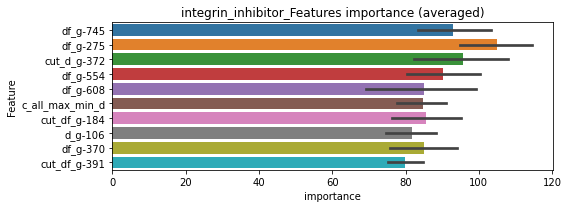

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 integrin_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000550863	valid_1's binary_logloss: 0.0157116
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 integrin_inhibitor=================================


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.000692453	valid_1's binary_logloss: 0.0117177
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 integrin_inhibitor=================================


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000458143	valid_1's binary_logloss: 0.0124636
Training until validation scores don't improve for 30 rounds


integrin_inhibitor logloss: 0.01308161237726577


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000680927	valid_1's binary_logloss: 0.0124328


jak_inhibitor, len(trt): 92, len(othr): 3277
target_rate: 0.0038633 → Adj_target_rate: 0.0039212


selected negative label: 3277


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0322242	valid_1's binary_logloss: 0.105517
Early stopping, best iteration is:
[1728]	training's binary_logloss: 0.0183559	valid_1's binary_logloss: 0.0976041
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0325365	valid_1's binary_logloss: 0.0987707
Early stopping, best iteration is:
[1664]	training's binary_logloss: 0.0192138	valid_1's binary_logloss: 0.0917547
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0343354	valid_1's binary_logloss: 0.0675182
[2000]	training's binary_logloss: 0.0166303	valid_1's binary_logloss: 0.0553165
[3000]	training's binary_logloss: 0.0108886	valid_1's binary_logloss: 0.05107
[4000]	training's binary_logloss: 0.00808413	valid_1's binary_logloss: 0.0487576
Early stopping, best iteration is:
[4168]	training's binary_logloss: 0.0077479	valid_1's binary_logloss: 0.04

1 / 3, AUC score:0.994, PR-AUC:0.983
y_Threshold: 0.0360539, Threshold: 0.1474043, pos_neg_ratio: 0.8000000
Remove_noisy_data: 178 → Positive_corect_labels: 632/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, Expected: 15.4, Threshold: 0.1474043, conf_0:0.10318, conf_1:0.19163
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_1: 0.1774043
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_2: 0.2074043
Num_p_label: 18.0, Expected: 15.4, Adj_threshold_3: 0.2374043
threshold: 0.2374043, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 632.0/3754, y_label_rate: 0.1683538
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0277878	valid_1's binary_logloss: 0.0754678
[2000]	training's binary_logloss: 0.0137358	valid_1's binary_logloss: 0.0661072
Early stopping, best iteration is:
[2722]	training's binary_logloss: 0.0100173	valid_1's binary_logloss: 0.0634643
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0280896	valid_1's binary_logloss: 0.0683633
[2000]	training's binary_logloss: 0.0138995	valid_1's binary_logloss: 0.0580992
Early stopping, best iteration is:
[2810]	training's binary_logloss: 0.00981274	valid_1's binary_logloss: 0.0549187
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0292535	valid_1's binary_logloss: 0.059205
[2000]	training's binary_logloss: 0.0144469	valid_1's binary_logloss: 0.0474486
[3000]	training's binary_logloss: 0.00950343	valid_1's binary_logloss: 0.042979
Early stopping, best iterat

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0595314, Threshold: 0.2374043, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 617.0/3724
p_label_rate: 0.0115520 Vs.target_rate: 0.00386
Num_p_label: 46.0, Expected: 15.4, Threshold: 0.2374043, conf_0:0.18992, conf_1:0.28489
Num_p_label: 39.0, Expected: 15.4, Adj_threshold_1: 0.2674043
Num_p_label: 30.0, Expected: 15.4, Adj_threshold_2: 0.2974043
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_3: 0.3274043
Num_p_label: 20.0, Expected: 15.4, Adj_threshold_4: 0.3574043
threshold: 0.3574043, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 617.0/3724, y_label_rate: 0.1656821
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0250319	valid_1's binary_logloss: 0.0604791
[2000]	training's binary_logloss: 0.0124728	valid_1's binary_logloss: 0.0501576
[3000]	training's binary_logloss: 0.00827783	valid_1's binary_logloss: 0.0463478
Early stopping, best iteration is:
[3256]	training's binary_logloss: 0.00761666	valid_1's binary_logloss: 0.0457304
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0254506	valid_1's binary_logloss: 0.055496
[2000]	training's binary_logloss: 0.0126205	valid_1's binary_logloss: 0.0449908
[3000]	training's binary_logloss: 0.00836909	valid_1's binary_logloss: 0.0411183
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.00692154	valid_1's binary_logloss: 0.0398559
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0258167	valid_1's binary_logloss: 0.0513934
[2000]	training's binary

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0597998, Threshold: 0.3574043, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 606.0/3702
p_label_rate: 0.0110497 Vs.target_rate: 0.00386
Num_p_label: 44.0, Expected: 15.4, Threshold: 0.3574043, conf_0:0.32166, conf_1:0.39314
Num_p_label: 38.0, Expected: 15.4, Adj_threshold_1: 0.3874043
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_2: 0.4174043
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_3: 0.4474043
Num_p_label: 20.0, Expected: 15.4, Adj_threshold_4: 0.4774043
threshold: 0.4774043, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 606.0/3702, y_label_rate: 0.1636953


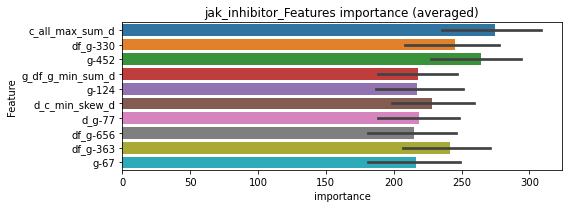

len(train_index) : 2776
len(valid_index) : 926
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319848	valid_1's binary_logloss: 0.0638903
[2000]	training's binary_logloss: 0.0163472	valid_1's binary_logloss: 0.0509148
[3000]	training's binary_logloss: 0.0109612	valid_1's binary_logloss: 0.04654
[4000]	training's binary_logloss: 0.00823219	valid_1's binary_logloss: 0.0443916
Early stopping, best iteration is:
[4096]	training's binary_logloss: 0.00804037	valid_1's binary_logloss: 0.0442459


len(train_index) : 2776
len(valid_index) : 926
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0328537	valid_1's binary_logloss: 0.0599564
[2000]	training's binary_logloss: 0.0168414	valid_1's binary_logloss: 0.0460014
Early stopping, best iteration is:
[2871]	training's binary_logloss: 0.0117497	valid_1's binary_logloss: 0.0415253


len(train_index) : 2777
len(valid_index) : 925
================================= fold 3/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0344275	valid_1's binary_logloss: 0.0431858
[2000]	training's binary_logloss: 0.0177338	valid_1's binary_logloss: 0.0290479
[3000]	training's binary_logloss: 0.011853	valid_1's binary_logloss: 0.0240104
[4000]	training's binary_logloss: 0.00888375	valid_1's binary_logloss: 0.0213092
[5000]	training's binary_logloss: 0.00711851	valid_1's binary_logloss: 0.0197717
[6000]	training's binary_logloss: 0.00595136	valid_1's binary_logloss: 0.018655
[7000]	training's binary_logloss: 0.0051205	valid_1's binary_logloss: 0.0178734
[8000]	training's binary_logloss: 0.00449921	valid_1's binary_logloss: 0.0172519
[9000]	training's binary_logloss: 0.00401705	valid_1's binary_logloss: 0.0167455
[10000]	training's binary_logloss: 0.00363402	valid_1's binary_logloss: 0.0163673
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00363402	valid_1's binary_logloss: 0.0163673


len(train_index) : 2777
len(valid_index) : 925
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0323419	valid_1's binary_logloss: 0.0647193
[2000]	training's binary_logloss: 0.0166034	valid_1's binary_logloss: 0.0506965
[3000]	training's binary_logloss: 0.0110783	valid_1's binary_logloss: 0.0459883
Early stopping, best iteration is:
[3614]	training's binary_logloss: 0.00919776	valid_1's binary_logloss: 0.0443695


jak_inhibitor logloss: 0.036630409195780186
jak_inhibitor is unpredictable(><)!


mutually exclusive columns: kit_inhibitor


kit_inhibitor, len(trt): 273, len(othr): 6846
target_rate: 0.0114638 → Adj_target_rate: 0.0098841


selected negative label: 6846


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0434817	valid_1's binary_logloss: 0.122621
Early stopping, best iteration is:
[1757]	training's binary_logloss: 0.0238542	valid_1's binary_logloss: 0.116225
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0428708	valid_1's binary_logloss: 0.13822
Early stopping, best iteration is:
[1190]	training's binary_logloss: 0.0358323	valid_1's binary_logloss: 0.136216
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0433522	valid_1's binary_logloss: 0.123476
[2000]	training's binary_logloss: 0.0208287	valid_1's binary_logloss: 0.115072
Early stopping, best iteration is:
[2148]	training's binary_logloss: 0.0192751	valid_1's binary_logloss: 0.114174
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0442412	valid_1's binary_logloss: 0.121997
Early stopping, best

1 / 3, AUC score:0.969, PR-AUC:0.940
y_Threshold: 0.0566622, Threshold: 0.0975757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 530 → Positive_corect_labels: 1241/7685
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, Expected: 45.6, Threshold: 0.0975757, conf_0:0.06830, conf_1:0.12685
threshold: 0.0975757, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1241.0/7685, y_label_rate: 0.1614834
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0287482	valid_1's binary_logloss: 0.079053
Early stopping, best iteration is:
[1914]	training's binary_logloss: 0.014647	valid_1's binary_logloss: 0.0726806
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.028996	valid_1's binary_logloss: 0.0768334
Early stopping, best iteration is:
[1458]	training's binary_logloss: 0.019756	valid_1's binary_logloss: 0.0716313
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0295422	valid_1's binary_logloss: 0.0719973
[2000]	training's binary_logloss: 0.0143079	valid_1's binary_logloss: 0.0648464
Early stopping, best iteration is:
[2553]	training's binary_logloss: 0.0110328	valid_1's binary_logloss: 0.0629734
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0291135	valid_1's binary_logloss: 0.0769662
Early stopping,

2 / 3, AUC score:0.996, PR-AUC:0.986
y_Threshold: 0.0614488, Threshold: 0.0975757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 1174.0/7551
p_label_rate: 0.0095429 Vs.target_rate: 0.01146
Num_p_label: 38.0, Expected: 45.6, Threshold: 0.0975757, conf_0:0.07806, conf_1:0.11709
threshold: 0.0975757, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 1174.0/7551, y_label_rate: 0.1554761
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0218654	valid_1's binary_logloss: 0.04764
[2000]	training's binary_logloss: 0.0107574	valid_1's binary_logloss: 0.0401216
Early stopping, best iteration is:
[2281]	training's binary_logloss: 0.00937983	valid_1's binary_logloss: 0.0391795
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0212584	valid_1's binary_logloss: 0.0546458
Early stopping, best iteration is:
[1904]	training's binary_logloss: 0.0110246	valid_1's binary_logloss: 0.0490307
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0217148	valid_1's binary_logloss: 0.046694
[2000]	training's binary_logloss: 0.0107048	valid_1's binary_logloss: 0.0390753
[3000]	training's binary_logloss: 0.00699284	valid_1's binary_logloss: 0.036313
Early stopping, best iteration is:
[3523]	training's binary_logloss: 0.0059121	valid_1's binary_logloss: 0.03

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0484070, Threshold: 0.0975757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 1144.0/7491
p_label_rate: 0.0075339 Vs.target_rate: 0.01146
Num_p_label: 30.0, Expected: 45.6, Threshold: 0.0975757, conf_0:0.08782, conf_1:0.10733
threshold: 0.0975757, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 1144.0/7491, y_label_rate: 0.1527166


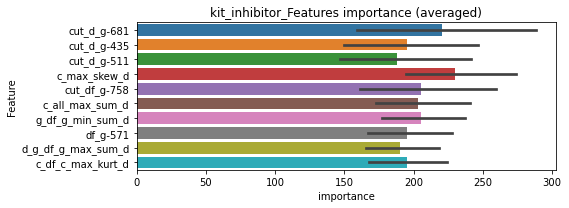

len(train_index) : 5618
len(valid_index) : 1873
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0252549	valid_1's binary_logloss: 0.0460187
[2000]	training's binary_logloss: 0.0130446	valid_1's binary_logloss: 0.0366266
[3000]	training's binary_logloss: 0.00867885	valid_1's binary_logloss: 0.0337129
Early stopping, best iteration is:
[3523]	training's binary_logloss: 0.00736062	valid_1's binary_logloss: 0.0328555


len(train_index) : 5618
len(valid_index) : 1873
================================= fold 2/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0251867	valid_1's binary_logloss: 0.0489283
[2000]	training's binary_logloss: 0.0129937	valid_1's binary_logloss: 0.0392735
Early stopping, best iteration is:
[2941]	training's binary_logloss: 0.00881281	valid_1's binary_logloss: 0.0359005


len(train_index) : 5618
len(valid_index) : 1873
================================= fold 3/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0255153	valid_1's binary_logloss: 0.0422557
[2000]	training's binary_logloss: 0.0130794	valid_1's binary_logloss: 0.0318166
[3000]	training's binary_logloss: 0.00870003	valid_1's binary_logloss: 0.0281553
[4000]	training's binary_logloss: 0.00647973	valid_1's binary_logloss: 0.0262325
Early stopping, best iteration is:
[4806]	training's binary_logloss: 0.00539521	valid_1's binary_logloss: 0.0252701


len(train_index) : 5619
len(valid_index) : 1872
================================= fold 4/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0256009	valid_1's binary_logloss: 0.0411486
[2000]	training's binary_logloss: 0.0130973	valid_1's binary_logloss: 0.031243
[3000]	training's binary_logloss: 0.00871327	valid_1's binary_logloss: 0.0277763
[4000]	training's binary_logloss: 0.00650795	valid_1's binary_logloss: 0.0260425
Early stopping, best iteration is:
[4811]	training's binary_logloss: 0.00540892	valid_1's binary_logloss: 0.0252125


kit_inhibitor logloss: 0.029810256739295805
laxative, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000137265	valid_1's binary_logloss: 0.000246081
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[215]	training's binary_logloss: 0.000895033	valid_1's binary_logloss: 0.0111296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000140602	valid_1's binary_logloss: 0.000144505
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009243, Threshold: 0.0013952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0013952, conf_0:0.00098, conf_1:0.00181
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0313952
threshold: 0.0313952, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000142872	valid_1's binary_logloss: 0.000149971


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000138145	valid_1's binary_logloss: 0.000206011
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[203]	training's binary_logloss: 0.00114612	valid_1's binary_logloss: 0.00980124
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00014016	valid_1's binary_logloss: 0.000134649
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0096906, Threshold: 0.0313952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00025
Num_p_label: 0.0, Expected: 1.0, Threshold: 0.0313952, conf_0:0.02512, conf_1:0.03767
threshold: 0.0313952, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000142441	valid_1's binary_logloss: 0.000136835


positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000136512	valid_1's binary_logloss: 0.000339723
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000154414	valid_1's binary_logloss: 0.00193107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000137149	valid_1's binary_logloss: 0.000131098
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252490, Threshold: 0.0313952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0313952, conf_0:0.02826, conf_1:0.03453


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000153187	valid_1's binary_logloss: 0.00264065


threshold: 0.0313952, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


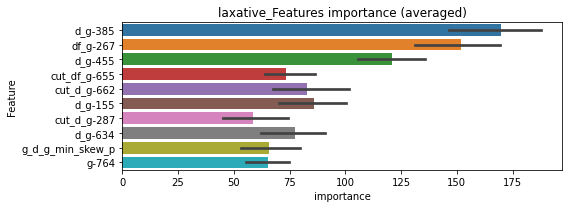

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000139846	valid_1's binary_logloss: 0.000233249
Early stopping, best iteration is:
[1176]	training's binary_logloss: 0.000136481	valid_1's binary_logloss: 0.000229612


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000150624	valid_1's binary_logloss: 0.00115362
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014033	valid_1's binary_logloss: 0.000136186


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 laxative=================================


Early stopping, best iteration is:
[1132]	training's binary_logloss: 0.000137897	valid_1's binary_logloss: 0.000133613
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000137503	valid_1's binary_logloss: 0.00249576
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.00013777	valid_1's binary_logloss: 0.00249531


laxative logloss: 0.0010026489528362596
leukotriene_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:504
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000148541	valid_1's binary_logloss: 0.00254653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000187779	valid_1's binary_logloss: 0.00535636
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000144182	valid_1's binary_logloss: 0.000186066
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003902, Threshold: 0.0009245, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0009245, conf_0:0.00065, conf_1:0.00120
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0309245
threshold: 0.0309245, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000142638	valid_1's binary_logloss: 0.000173697


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000148743	valid_1's binary_logloss: 0.00234226
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000160579	valid_1's binary_logloss: 0.00485322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000140961	valid_1's binary_logloss: 0.000138266
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0075712, Threshold: 0.0309245, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00025
Num_p_label: 6.0, Expected: 1.0, Threshold: 0.0309245, conf_0:0.02474, conf_1:0.03711
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0609245
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0909245
threshold: 0.0909245, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000140218	valid_1's binary_logloss: 0.000134002


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000148743	valid_1's binary_logloss: 0.00234226
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000160579	valid_1's binary_logloss: 0.00485322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000140961	valid_1's binary_logloss: 0.000138266
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0075712, Threshold: 0.0909245, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00025
Num_p_label: 0.0, Expected: 1.0, Threshold: 0.0909245, conf_0:0.08183, conf_1:0.10002


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000140218	valid_1's binary_logloss: 0.000134002


threshold: 0.0909245, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


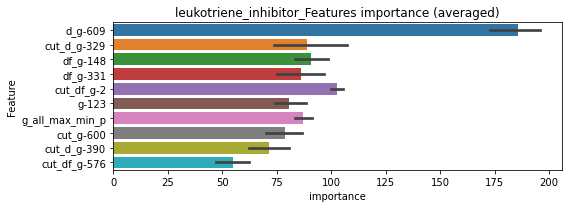

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000161923	valid_1's binary_logloss: 0.00148064
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000165351	valid_1's binary_logloss: 0.00347634
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000140837	valid_1's binary_logloss: 0.000139272
Early stopping, best iteration is:
[1041]	training's binary_logloss: 0.000140345	valid_1's binary_logloss: 0.000138656


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000140789	valid_1's binary_logloss: 0.000136759
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.000140214	valid_1's binary_logloss: 0.000136135


leukotriene_inhibitor logloss: 0.00130794373928399
leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3281


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0230559	valid_1's binary_logloss: 0.0791252
[2000]	training's binary_logloss: 0.0112905	valid_1's binary_logloss: 0.073519
Early stopping, best iteration is:
[1996]	training's binary_logloss: 0.0113158	valid_1's binary_logloss: 0.0735038
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0237355	valid_1's binary_logloss: 0.0720803
[2000]	training's binary_logloss: 0.0116174	valid_1's binary_logloss: 0.0648792
Early stopping, best iteration is:
[2103]	training's binary_logloss: 0.0110078	valid_1's binary_logloss: 0.0645515
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.026736	valid_1's binary_logloss: 0.032938
[2000]	training's binary_logloss: 0.0129774	valid_1's binary_logloss: 0.0227902
[3000]	training's binary_logloss: 0.008422	valid_1's binary_logloss: 0.019076
[4000]	training's binary_logloss

1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0207591, Threshold: 0.0362144, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0362144, conf_0:0.02535, conf_1:0.04708
Num_p_label: 4.0, Expected: 10.4, Adj_threshold_1: 0.0662144
threshold: 0.0662144, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0240142	valid_1's binary_logloss: 0.0556202
[2000]	training's binary_logloss: 0.0116694	valid_1's binary_logloss: 0.0475595
[3000]	training's binary_logloss: 0.00761529	valid_1's binary_logloss: 0.0447624
[4000]	training's binary_logloss: 0.00565983	valid_1's binary_logloss: 0.0435143
Early stopping, best iteration is:
[3972]	training's binary_logloss: 0.00569993	valid_1's binary_logloss: 0.0434998
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0232421	valid_1's binary_logloss: 0.0632131
[2000]	training's binary_logloss: 0.01132	valid_1's binary_logloss: 0.055498
Early stopping, best iteration is:
[2813]	training's binary_logloss: 0.00792627	valid_1's binary_logloss: 0.0532744
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0238155	valid_1's binary_logloss: 0.0586164
[2000]	training's binary_l

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0410469, Threshold: 0.0662144, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 646.0/3785
p_label_rate: 0.0032647 Vs.target_rate: 0.00260
Num_p_label: 13.0, Expected: 10.4, Threshold: 0.0662144, conf_0:0.05297, conf_1:0.07946
threshold: 0.0662144, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 646.0/3785, y_label_rate: 0.1706737
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0222483	valid_1's binary_logloss: 0.0555486
[2000]	training's binary_logloss: 0.0108959	valid_1's binary_logloss: 0.0478199
[3000]	training's binary_logloss: 0.0071661	valid_1's binary_logloss: 0.0448955
Early stopping, best iteration is:
[3016]	training's binary_logloss: 0.00712789	valid_1's binary_logloss: 0.0448499
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0218705	valid_1's binary_logloss: 0.0633099
[2000]	training's binary_logloss: 0.0106908	valid_1's binary_logloss: 0.0553463
Early stopping, best iteration is:
[2294]	training's binary_logloss: 0.0092877	valid_1's binary_logloss: 0.0542551
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0227215	valid_1's binary_logloss: 0.0464558
[2000]	training's binary_logloss: 0.0111062	valid_1's binary_logloss: 0.0383378
[3000]	training's binary_l

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0356290, Threshold: 0.0662144, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 639.0/3771
p_label_rate: 0.0032647 Vs.target_rate: 0.00260
Num_p_label: 13.0, Expected: 10.4, Threshold: 0.0662144, conf_0:0.05959, conf_1:0.07284
threshold: 0.0662144, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 639.0/3771, y_label_rate: 0.1694511


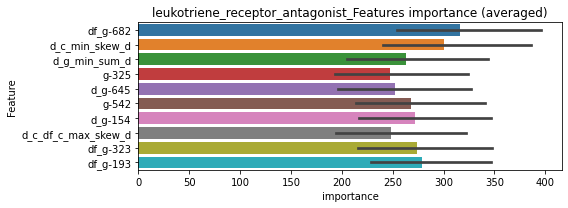

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0293871	valid_1's binary_logloss: 0.0603621
[2000]	training's binary_logloss: 0.0150517	valid_1's binary_logloss: 0.0488811
[3000]	training's binary_logloss: 0.00998838	valid_1's binary_logloss: 0.0448987
[4000]	training's binary_logloss: 0.00746737	valid_1's binary_logloss: 0.0429525
[5000]	training's binary_logloss: 0.00597326	valid_1's binary_logloss: 0.0416997
Early stopping, best iteration is:
[5549]	training's binary_logloss: 0.00537935	valid_1's binary_logloss: 0.0411208


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0303648	valid_1's binary_logloss: 0.0550552
[2000]	training's binary_logloss: 0.0155963	valid_1's binary_logloss: 0.0427242
[3000]	training's binary_logloss: 0.0103254	valid_1's binary_logloss: 0.0383976
[4000]	training's binary_logloss: 0.00768112	valid_1's binary_logloss: 0.0361126
[5000]	training's binary_logloss: 0.00613688	valid_1's binary_logloss: 0.0348711
Early stopping, best iteration is:
[5817]	training's binary_logloss: 0.005269	valid_1's binary_logloss: 0.0340157


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0307273	valid_1's binary_logloss: 0.0484324
[2000]	training's binary_logloss: 0.0156648	valid_1's binary_logloss: 0.0362342
[3000]	training's binary_logloss: 0.0103766	valid_1's binary_logloss: 0.0319052
[4000]	training's binary_logloss: 0.00774503	valid_1's binary_logloss: 0.0296264
[5000]	training's binary_logloss: 0.00619419	valid_1's binary_logloss: 0.0282281
[6000]	training's binary_logloss: 0.00516381	valid_1's binary_logloss: 0.0271886
Early stopping, best iteration is:
[6892]	training's binary_logloss: 0.0045054	valid_1's binary_logloss: 0.0265445


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0296877	valid_1's binary_logloss: 0.0589711
[2000]	training's binary_logloss: 0.0151192	valid_1's binary_logloss: 0.0489319
Early stopping, best iteration is:
[2880]	training's binary_logloss: 0.0104451	valid_1's binary_logloss: 0.0459112


leukotriene_receptor_antagonist logloss: 0.03689566392996945
leukotriene_receptor_antagonist is unpredictable(><)!
lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000250408	valid_1's binary_logloss: 0.00885695
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000201873	valid_1's binary_logloss: 0.00146206
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000205009	valid_1's binary_logloss: 0.000193455
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0006131, Threshold: 0.0011848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0011848, conf_0:0.00083, conf_1:0.00154
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0311848
threshold: 0.0311848, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000199266	valid_1's binary_logloss: 0.00965747


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000246149	valid_1's binary_logloss: 0.0105836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000201979	valid_1's binary_logloss: 0.000801052
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000202902	valid_1's binary_logloss: 0.00023309
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0070326, Threshold: 0.0311848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00050
Num_p_label: 1.0, Expected: 2.0, Threshold: 0.0311848, conf_0:0.02495, conf_1:0.03742
threshold: 0.0311848, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000197373	valid_1's binary_logloss: 0.00922307


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000246149	valid_1's binary_logloss: 0.0105836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000201979	valid_1's binary_logloss: 0.000801052
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000202902	valid_1's binary_logloss: 0.00023309
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0070326, Threshold: 0.0311848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00050
Num_p_label: 1.0, Expected: 2.0, Threshold: 0.0311848, conf_0:0.02807, conf_1:0.03430
threshold: 0.0311848, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000197373	valid_1's binary_logloss: 0.00922307


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


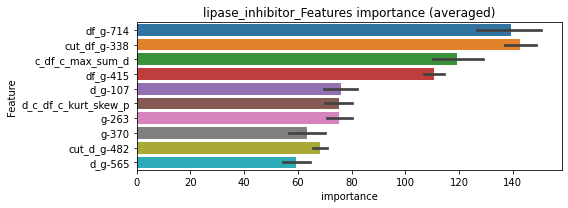

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000219221	valid_1's binary_logloss: 0.00728896
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000202605	valid_1's binary_logloss: 0.000565249
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000205583	valid_1's binary_logloss: 0.000226213
Training until validation scores don't improve for 30 rounds


lipase_inhibitor logloss: 0.003709760554311335


Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000197552	valid_1's binary_logloss: 0.00675486


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00216493	valid_1's binary_logloss: 0.0503227
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000847022	valid_1's binary_logloss: 0.0303703
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.00188485	valid_1's binary_logloss: 0.0305953
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0076830, Threshold: 0.0510195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0510195, conf_0:0.03571, conf_1:0.06633
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_1: 0.0810195
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_2: 0.1110195
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_3: 0.1410195
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_4: 0.1710195
threshold: 0.1710195, positive_p_label: 15.0/3982, p_label_rate: 0.0037670


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.00361405	valid_1's binary_logloss: 0.0461115


positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00112298	valid_1's binary_logloss: 0.0430221
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.00265273	valid_1's binary_logloss: 0.0426051
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000769181	valid_1's binary_logloss: 0.0381351
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0198740, Threshold: 0.1710195, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00065727	valid_1's binary_logloss: 0.0211808


Remove_noisy_data: 16 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0082873 Vs.target_rate: 0.00256
Num_p_label: 33.0, Expected: 10.2, Threshold: 0.1710195, conf_0:0.13682, conf_1:0.20522
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_1: 0.2010195
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_2: 0.2310195
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_3: 0.2610195
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_4: 0.2910195
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_5: 0.3210195
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_6: 0.3510195
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_7: 0.3810195
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_8: 0.4110195
threshold: 0.4110195, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 645.0/3782, y_label_rate: 0.1705447
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00074674	valid_1's binary_logloss: 0.0353473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000742115	valid_1's binary_logloss: 0.026529
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00054509	valid_1's binary_logloss: 0.0193874
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0152978, Threshold: 0.4110195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 641.0/3774
p_label_rate: 0.0035158 Vs.target_rate: 0.00256
Num_p_label: 14.0, Expected: 10.2, Threshold: 0.4110195, conf_0:0.36992, conf_1:0.45212
threshold: 0.4110195, positive_p_label: 14.0/3982, p_label_rate: 0.0035158


Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000987595	valid_1's binary_logloss: 0.0357642


positive_y_label: 641.0/3774, y_label_rate: 0.1698463


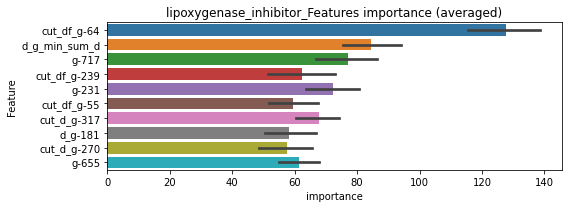

len(train_index) : 2830
len(valid_index) : 944
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2830
len(valid_index) : 944
================================= fold 2/4 lipoxygenase_inhibitor=================================


Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00112071	valid_1's binary_logloss: 0.0353216
Training until validation scores don't improve for 30 rounds


len(train_index) : 2831
len(valid_index) : 943
================================= fold 3/4 lipoxygenase_inhibitor=================================


Early stopping, best iteration is:
[347]	training's binary_logloss: 0.000922923	valid_1's binary_logloss: 0.0275244
Training until validation scores don't improve for 30 rounds


len(train_index) : 2831
len(valid_index) : 943
================================= fold 4/4 lipoxygenase_inhibitor=================================


Early stopping, best iteration is:
[364]	training's binary_logloss: 0.000902626	valid_1's binary_logloss: 0.0228004
Training until validation scores don't improve for 30 rounds


lipoxygenase_inhibitor logloss: 0.025402752754425068


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000672763	valid_1's binary_logloss: 0.0159518


lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:503
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000147477	valid_1's binary_logloss: 0.000377901
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.0001697	valid_1's binary_logloss: 0.00391471
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000154358	valid_1's binary_logloss: 0.000170105
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004111, Threshold: 0.0024438, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0024438, conf_0:0.00171, conf_1:0.00318
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0324438
threshold: 0.0324438, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000151304	valid_1's binary_logloss: 0.00426395


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000140177	valid_1's binary_logloss: 0.000172602
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000161381	valid_1's binary_logloss: 0.00271546
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00014265	valid_1's binary_logloss: 0.000170315
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0063357, Threshold: 0.0324438, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00025
Num_p_label: 9.0, Expected: 1.0, Threshold: 0.0324438, conf_0:0.02596, conf_1:0.03893
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0624438
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.0924438
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.1224438
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_4: 0.1524438
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_5: 0.1824438
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.2124438
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_7: 0.2424438


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000141268	valid_1's binary_logloss: 0.00411168


threshold: 0.2424438, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000140177	valid_1's binary_logloss: 0.000172602
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000161381	valid_1's binary_logloss: 0.00271546
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00014265	valid_1's binary_logloss: 0.000170315
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0063357, Threshold: 0.2424438, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.2424438, conf_0:0.21820, conf_1:0.26669


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000141268	valid_1's binary_logloss: 0.00411168


threshold: 0.2424438, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


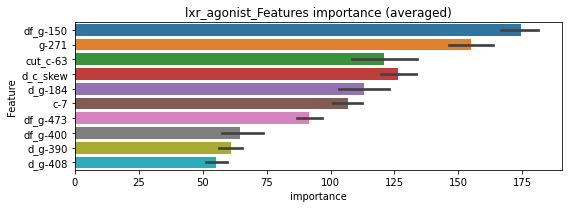

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000144214	valid_1's binary_logloss: 0.000217444
Early stopping, best iteration is:
[1037]	training's binary_logloss: 0.00014377	valid_1's binary_logloss: 0.000217048


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00018087	valid_1's binary_logloss: 0.00245474
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000143975	valid_1's binary_logloss: 0.000186142
Early stopping, best iteration is:
[1040]	training's binary_logloss: 0.000143623	valid_1's binary_logloss: 0.000185662


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds


lxr_agonist logloss: 0.0013318261061946801


Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000147285	valid_1's binary_logloss: 0.00246986


mdm_inhibitor, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[258]	training's binary_logloss: 0.00161584	valid_1's binary_logloss: 0.0207747
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[394]	training's binary_logloss: 0.000541868	valid_1's binary_logloss: 0.0182218
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000367225	valid_1's binary_logloss: 0.00161757
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0026452, Threshold: 0.0363479, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0363479, conf_0:0.02544, conf_1:0.04725
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_1: 0.0663479
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_2: 0.0963479
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_3: 0.1263479
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_4: 0.1563479
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_5: 0.1863479


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000685455	valid_1's binary_logloss: 0.0256198


threshold: 0.1863479, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.0018571	valid_1's binary_logloss: 0.0229942
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.000715934	valid_1's binary_logloss: 0.0211555
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000356442	valid_1's binary_logloss: 0.000802524
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0219614, Threshold: 0.1863479, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3806
p_label_rate: 0.0123054 Vs.target_rate: 0.00130
Num_p_label: 49.0, Expected: 5.2, Threshold: 0.1863479, conf_0:0.14908, conf_1:0.22362
Num_p_label: 46.0, Expected: 5.2, Adj_threshold_1: 0.2163479
Num_p_label: 44.0, Expected: 5.2, Adj_threshold_2: 0.2463479
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_3: 0.2763479
Num_p_label: 37.0, Expected: 5.2, Adj_threshold_4: 0.3063479
Num_p_label: 34.0, Expected: 5.2, Adj_threshold_5: 0.3363479


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000400734	valid_1's binary_logloss: 0.0144902


Num_p_label: 33.0, Expected: 5.2, Adj_threshold_6: 0.3663479
Num_p_label: 32.0, Expected: 5.2, Adj_threshold_7: 0.3963479
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_8: 0.4263479
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_9: 0.4563479
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_10: 0.4863479
threshold: 0.4863479, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 654.0/3806, y_label_rate: 0.1718339
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00034586	valid_1's binary_logloss: 0.0209913
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000454498	valid_1's binary_logloss: 0.00676984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000462606	valid_1's binary_logloss: 0.00988189
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0146612, Threshold: 0.4863479, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3802
p_label_rate: 0.0067805 Vs.target_rate: 0.00130
Num_p_label: 27.0, Expected: 5.2, Threshold: 0.4863479, conf_0:0.43771, conf_1:0.53498
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_1: 0.5163479
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_2: 0.5463479
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_3: 0.5763479
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_4: 0.6063479
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_5: 0.6363479
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_6: 0.6663479


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000461421	valid_1's binary_logloss: 0.0139652


threshold: 0.6663479, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3802, y_label_rate: 0.1714887


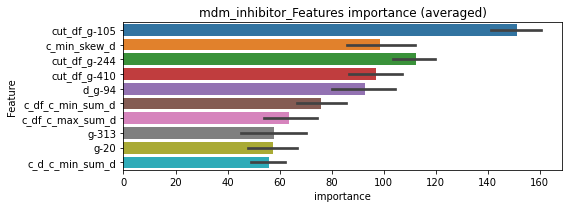

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 mdm_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000546733	valid_1's binary_logloss: 0.0131581
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 mdm_inhibitor=================================


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00039974	valid_1's binary_logloss: 0.00352533
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 mdm_inhibitor=================================


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000441978	valid_1's binary_logloss: 0.00892009
Training until validation scores don't improve for 30 rounds


mdm_inhibitor logloss: 0.009492093267008988


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00056295	valid_1's binary_logloss: 0.0123673


mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3273


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0265974	valid_1's binary_logloss: 0.0733295
[2000]	training's binary_logloss: 0.0129666	valid_1's binary_logloss: 0.0641209
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.0113106	valid_1's binary_logloss: 0.0628958
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270243	valid_1's binary_logloss: 0.0641397
[2000]	training's binary_logloss: 0.0131679	valid_1's binary_logloss: 0.0545767
Early stopping, best iteration is:
[2287]	training's binary_logloss: 0.0114609	valid_1's binary_logloss: 0.0532926
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0272006	valid_1's binary_logloss: 0.0607701
[2000]	training's binary_logloss: 0.0132347	valid_1's binary_logloss: 0.0517567
[3000]	training's binary_logloss: 0.00863682	valid_1's binary_logloss: 0.0481662
Early stopping, best itera

1 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0249572, Threshold: 0.0442144, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 647/3781
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0442144, conf_0:0.03095, conf_1:0.05748
Num_p_label: 4.0, Expected: 12.0, Adj_threshold_1: 0.0742144
threshold: 0.0742144, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 647.0/3781, y_label_rate: 0.1711188
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248784	valid_1's binary_logloss: 0.0638656
[2000]	training's binary_logloss: 0.0122424	valid_1's binary_logloss: 0.0545334
[3000]	training's binary_logloss: 0.00803574	valid_1's binary_logloss: 0.0507368
Early stopping, best iteration is:
[3312]	training's binary_logloss: 0.00726036	valid_1's binary_logloss: 0.0501237
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248421	valid_1's binary_logloss: 0.0623104
[2000]	training's binary_logloss: 0.0122528	valid_1's binary_logloss: 0.0536767
Early stopping, best iteration is:
[2674]	training's binary_logloss: 0.00907159	valid_1's binary_logloss: 0.0514773
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0251811	valid_1's binary_logloss: 0.0652139
Early stopping, best iteration is:
[1738]	training's binary_logloss: 0.01425	valid_1's binary_logloss: 0

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0463068, Threshold: 0.0742144, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 638.0/3763
p_label_rate: 0.0042692 Vs.target_rate: 0.00302
Num_p_label: 17.0, Expected: 12.0, Threshold: 0.0742144, conf_0:0.05937, conf_1:0.08906
threshold: 0.0742144, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 638.0/3763, y_label_rate: 0.1695456
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239193	valid_1's binary_logloss: 0.0498518
[2000]	training's binary_logloss: 0.0117804	valid_1's binary_logloss: 0.0402863
[3000]	training's binary_logloss: 0.00775403	valid_1's binary_logloss: 0.037049
[4000]	training's binary_logloss: 0.00578886	valid_1's binary_logloss: 0.0352362
Early stopping, best iteration is:
[4344]	training's binary_logloss: 0.00533515	valid_1's binary_logloss: 0.0348315
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0240181	valid_1's binary_logloss: 0.0497881
[2000]	training's binary_logloss: 0.0118471	valid_1's binary_logloss: 0.0406399
[3000]	training's binary_logloss: 0.00779817	valid_1's binary_logloss: 0.0374541
Early stopping, best iteration is:
[3318]	training's binary_logloss: 0.00703591	valid_1's binary_logloss: 0.0369193
Training until validation scores don't improve for 30 rounds
[1000]	training's binar

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0406894, Threshold: 0.0742144, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 629.0/3745
p_label_rate: 0.0030136 Vs.target_rate: 0.00302
Num_p_label: 12.0, Expected: 12.0, Threshold: 0.0742144, conf_0:0.06679, conf_1:0.08164
threshold: 0.0742144, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 629.0/3745, y_label_rate: 0.1679573


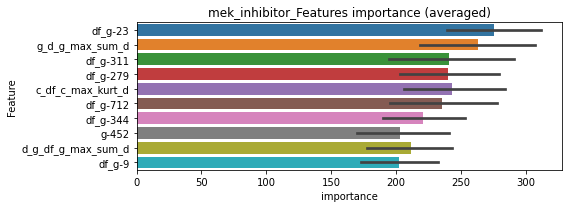

len(train_index) : 2808
len(valid_index) : 937
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0301834	valid_1's binary_logloss: 0.0625448
[2000]	training's binary_logloss: 0.0154495	valid_1's binary_logloss: 0.0512802
[3000]	training's binary_logloss: 0.0102965	valid_1's binary_logloss: 0.0473908
Early stopping, best iteration is:
[3322]	training's binary_logloss: 0.00928693	valid_1's binary_logloss: 0.0466278


len(train_index) : 2809
len(valid_index) : 936
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315175	valid_1's binary_logloss: 0.0544409
[2000]	training's binary_logloss: 0.01611	valid_1's binary_logloss: 0.0423295
[3000]	training's binary_logloss: 0.0107163	valid_1's binary_logloss: 0.0378227
[4000]	training's binary_logloss: 0.00801285	valid_1's binary_logloss: 0.0356515
Early stopping, best iteration is:
[4554]	training's binary_logloss: 0.0070408	valid_1's binary_logloss: 0.0348387


len(train_index) : 2809
len(valid_index) : 936
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319372	valid_1's binary_logloss: 0.0492204
[2000]	training's binary_logloss: 0.0163577	valid_1's binary_logloss: 0.0357944
[3000]	training's binary_logloss: 0.0108522	valid_1's binary_logloss: 0.0308019
[4000]	training's binary_logloss: 0.0081044	valid_1's binary_logloss: 0.0282873
[5000]	training's binary_logloss: 0.00647967	valid_1's binary_logloss: 0.0267432
[6000]	training's binary_logloss: 0.0053955	valid_1's binary_logloss: 0.0255788
[7000]	training's binary_logloss: 0.00463957	valid_1's binary_logloss: 0.0248515
[8000]	training's binary_logloss: 0.0040779	valid_1's binary_logloss: 0.0242401
Early stopping, best iteration is:
[8318]	training's binary_logloss: 0.00392297	valid_1's binary_logloss: 0.0240432


len(train_index) : 2809
len(valid_index) : 936
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0312816	valid_1's binary_logloss: 0.0582209
[2000]	training's binary_logloss: 0.0159985	valid_1's binary_logloss: 0.0465959
[3000]	training's binary_logloss: 0.0106113	valid_1's binary_logloss: 0.0423632
[4000]	training's binary_logloss: 0.0079284	valid_1's binary_logloss: 0.0403985
Early stopping, best iteration is:
[4041]	training's binary_logloss: 0.00784569	valid_1's binary_logloss: 0.0402835


mek_inhibitor logloss: 0.03645100028334909
mek_inhibitor is unpredictable(><)!
membrane_integrity_inhibitor, len(trt): 74, len(othr): 3279
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3279


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0260307	valid_1's binary_logloss: 0.0737133
[2000]	training's binary_logloss: 0.0127644	valid_1's binary_logloss: 0.0647575
Early stopping, best iteration is:
[2363]	training's binary_logloss: 0.0107597	valid_1's binary_logloss: 0.0633265
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0265679	valid_1's binary_logloss: 0.0617861
[2000]	training's binary_logloss: 0.0130534	valid_1's binary_logloss: 0.0519806
[3000]	training's binary_logloss: 0.00856327	valid_1's binary_logloss: 0.0480667
[4000]	training's binary_logloss: 0.00637107	valid_1's binary_logloss: 0.0460012
Early stopping, best iteration is:
[4121]	training's binary_logloss: 0.00617855	valid_1's binary_logloss: 0.0458122
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0269149	valid_1's binary_logloss: 0.0578149
[2000]	training's binary

1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0230816, Threshold: 0.0438800, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.0438800, conf_0:0.03072, conf_1:0.05704
Num_p_label: 7.0, Expected: 12.4, Adj_threshold_1: 0.0738800
threshold: 0.0738800, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0252958	valid_1's binary_logloss: 0.0627046
[2000]	training's binary_logloss: 0.0123948	valid_1's binary_logloss: 0.052019
[3000]	training's binary_logloss: 0.00815504	valid_1's binary_logloss: 0.0476758
Early stopping, best iteration is:
[3782]	training's binary_logloss: 0.00643107	valid_1's binary_logloss: 0.0460494
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0247778	valid_1's binary_logloss: 0.0750971
Early stopping, best iteration is:
[1742]	training's binary_logloss: 0.0140282	valid_1's binary_logloss: 0.0691518
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0260511	valid_1's binary_logloss: 0.0570375
[2000]	training's binary_logloss: 0.0127808	valid_1's binary_logloss: 0.0476197
[3000]	training's binary_logloss: 0.00838049	valid_1's binary_logloss: 0.0442874
Early stopping, best iter

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0428930, Threshold: 0.0738800, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 640.0/3772
p_label_rate: 0.0045203 Vs.target_rate: 0.00311
Num_p_label: 18.0, Expected: 12.4, Threshold: 0.0738800, conf_0:0.05910, conf_1:0.08866
threshold: 0.0738800, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 640.0/3772, y_label_rate: 0.1696713
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0224596	valid_1's binary_logloss: 0.0674803
Early stopping, best iteration is:
[1728]	training's binary_logloss: 0.0129361	valid_1's binary_logloss: 0.0614143
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0230904	valid_1's binary_logloss: 0.059001
[2000]	training's binary_logloss: 0.0114334	valid_1's binary_logloss: 0.0505346
Early stopping, best iteration is:
[2287]	training's binary_logloss: 0.00997099	valid_1's binary_logloss: 0.0496355
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239268	valid_1's binary_logloss: 0.050135
[2000]	training's binary_logloss: 0.0118455	valid_1's binary_logloss: 0.039955
[3000]	training's binary_logloss: 0.00782169	valid_1's binary_logloss: 0.0364959
Early stopping, best iteration is:
[3619]	training's binary_logloss: 0.00645483	valid_1's binary_logloss: 0.

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0426713, Threshold: 0.0738800, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 630.0/3752
p_label_rate: 0.0040181 Vs.target_rate: 0.00311
Num_p_label: 16.0, Expected: 12.4, Threshold: 0.0738800, conf_0:0.06649, conf_1:0.08127
threshold: 0.0738800, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 630.0/3752, y_label_rate: 0.1679104


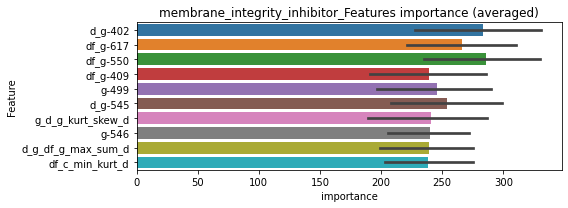

len(train_index) : 2814
len(valid_index) : 938
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0304026	valid_1's binary_logloss: 0.0651592
[2000]	training's binary_logloss: 0.0156376	valid_1's binary_logloss: 0.0530191
[3000]	training's binary_logloss: 0.0104134	valid_1's binary_logloss: 0.048835
Early stopping, best iteration is:
[3577]	training's binary_logloss: 0.00870503	valid_1's binary_logloss: 0.0475107


len(train_index) : 2814
len(valid_index) : 938
================================= fold 2/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317367	valid_1's binary_logloss: 0.0509456
[2000]	training's binary_logloss: 0.0161898	valid_1's binary_logloss: 0.0388518
[3000]	training's binary_logloss: 0.010739	valid_1's binary_logloss: 0.03482
[4000]	training's binary_logloss: 0.00801827	valid_1's binary_logloss: 0.032844
[5000]	training's binary_logloss: 0.00642251	valid_1's binary_logloss: 0.0316057
Early stopping, best iteration is:
[5819]	training's binary_logloss: 0.00551417	valid_1's binary_logloss: 0.0309474


len(train_index) : 2814
len(valid_index) : 938
================================= fold 3/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0321554	valid_1's binary_logloss: 0.0501619
[2000]	training's binary_logloss: 0.0164032	valid_1's binary_logloss: 0.0368916
[3000]	training's binary_logloss: 0.0109179	valid_1's binary_logloss: 0.0323275
[4000]	training's binary_logloss: 0.00815856	valid_1's binary_logloss: 0.0301416
[5000]	training's binary_logloss: 0.00654072	valid_1's binary_logloss: 0.0288704
[6000]	training's binary_logloss: 0.00544821	valid_1's binary_logloss: 0.0279407
Early stopping, best iteration is:
[6923]	training's binary_logloss: 0.00472842	valid_1's binary_logloss: 0.0273921


len(train_index) : 2814
len(valid_index) : 938
================================= fold 4/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0299084	valid_1's binary_logloss: 0.0673558
[2000]	training's binary_logloss: 0.0152343	valid_1's binary_logloss: 0.0569196
[3000]	training's binary_logloss: 0.0101733	valid_1's binary_logloss: 0.0537837
Early stopping, best iteration is:
[3833]	training's binary_logloss: 0.00796784	valid_1's binary_logloss: 0.0523892


membrane_integrity_inhibitor logloss: 0.03955986857182652
membrane_integrity_inhibitor is unpredictable(><)!
mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3281


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000362727	valid_1's binary_logloss: 0.0166181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000339351	valid_1's binary_logloss: 0.00702886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00033022	valid_1's binary_logloss: 0.00314204
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012703, Threshold: 0.0030948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0030948, conf_0:0.00217, conf_1:0.00402
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0330948


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000348372	valid_1's binary_logloss: 0.013055


threshold: 0.0330948, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000354882	valid_1's binary_logloss: 0.0170868
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00034524	valid_1's binary_logloss: 0.00794762
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000323796	valid_1's binary_logloss: 0.00339131
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0077619, Threshold: 0.0330948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, Expected: 4.2, Threshold: 0.0330948, conf_0:0.02648, conf_1:0.03971
threshold: 0.0330948, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000387499	valid_1's binary_logloss: 0.0101089


positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000306826	valid_1's binary_logloss: 0.0126156
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000358406	valid_1's binary_logloss: 0.0108499
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000346116	valid_1's binary_logloss: 0.0028682
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0139073, Threshold: 0.0330948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0005023 Vs.target_rate: 0.00105
Num_p_label: 2.0, Expected: 4.2, Threshold: 0.0330948, conf_0:0.02979, conf_1:0.03640
threshold: 0.0330948, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000324428	valid_1's binary_logloss: 0.0110082


positive_y_label: 655.0/3803, y_label_rate: 0.1722324


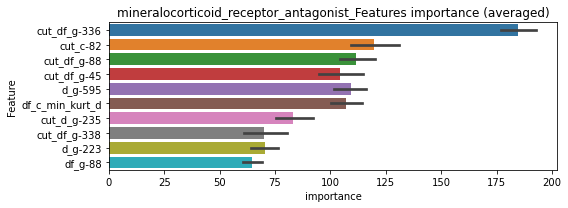

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000354524	valid_1's binary_logloss: 0.00981865
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000424887	valid_1's binary_logloss: 0.010106
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000363943	valid_1's binary_logloss: 0.00316207
Training until validation scores don't improve for 30 rounds


mineralocorticoid_receptor_antagonist logloss: 0.008352292319493552


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000412031	valid_1's binary_logloss: 0.0103245


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3284


N_features:503
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000226663	valid_1's binary_logloss: 0.0099098
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00022019	valid_1's binary_logloss: 0.00769365
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00021305	valid_1's binary_logloss: 0.000226151
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005904, Threshold: 0.0013811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0013811, conf_0:0.00097, conf_1:0.00180
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0313811
threshold: 0.0313811, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000232592	valid_1's binary_logloss: 0.00233237


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.000229697	valid_1's binary_logloss: 0.00946854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000213143	valid_1's binary_logloss: 0.00797731
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000210323	valid_1's binary_logloss: 0.000219567
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044871, Threshold: 0.0313811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, Expected: 2.0, Threshold: 0.0313811, conf_0:0.02510, conf_1:0.03766


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000219362	valid_1's binary_logloss: 0.00218562


threshold: 0.0313811, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.000229697	valid_1's binary_logloss: 0.00946854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000213143	valid_1's binary_logloss: 0.00797731
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000210323	valid_1's binary_logloss: 0.000219567
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044871, Threshold: 0.0313811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, Expected: 2.0, Threshold: 0.0313811, conf_0:0.02824, conf_1:0.03452
threshold: 0.0313811, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000219362	valid_1's binary_logloss: 0.00218562


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


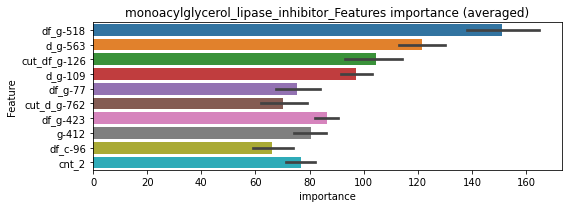

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000230265	valid_1's binary_logloss: 0.00750523
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000216337	valid_1's binary_logloss: 0.00577537
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000218124	valid_1's binary_logloss: 0.000218046
Training until validation scores don't improve for 30 rounds


monoacylglycerol_lipase_inhibitor logloss: 0.0036614848568377305


Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000213271	valid_1's binary_logloss: 0.00114649


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3272
target_rate: 0.0035693 → Adj_target_rate: 0.0036661


selected negative label: 3272


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0301473	valid_1's binary_logloss: 0.0908951
Early stopping, best iteration is:
[1755]	training's binary_logloss: 0.0168596	valid_1's binary_logloss: 0.0836827
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0310063	valid_1's binary_logloss: 0.0775478
[2000]	training's binary_logloss: 0.015061	valid_1's binary_logloss: 0.0674149
Early stopping, best iteration is:
[2617]	training's binary_logloss: 0.0112967	valid_1's binary_logloss: 0.0649454
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0314078	valid_1's binary_logloss: 0.0697908
[2000]	training's binary_logloss: 0.0153036	valid_1's binary_logloss: 0.0617541
Early stopping, best iteration is:
[2099]	training's binary_logloss: 0.0145409	valid_1's binary_logloss: 0.0612855
Training until validation scores don't improve for 30 rounds
[1000]	train

1 / 3, AUC score:0.995, PR-AUC:0.988
y_Threshold: 0.0308274, Threshold: 0.0613896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 639/3764
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, Expected: 14.2, Threshold: 0.0613896, conf_0:0.04297, conf_1:0.07981
Num_p_label: 11.0, Expected: 14.2, Adj_threshold_1: 0.0913896
threshold: 0.0913896, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 639.0/3764, y_label_rate: 0.1697662
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270674	valid_1's binary_logloss: 0.0744878
[2000]	training's binary_logloss: 0.0132763	valid_1's binary_logloss: 0.0661572
Early stopping, best iteration is:
[2796]	training's binary_logloss: 0.00933497	valid_1's binary_logloss: 0.0633107
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0266302	valid_1's binary_logloss: 0.0760409
[2000]	training's binary_logloss: 0.0130777	valid_1's binary_logloss: 0.0686753
Early stopping, best iteration is:
[2051]	training's binary_logloss: 0.0127278	valid_1's binary_logloss: 0.0684669
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.02852	valid_1's binary_logloss: 0.0579546
[2000]	training's binary_logloss: 0.0139681	valid_1's binary_logloss: 0.048187
[3000]	training's binary_logloss: 0.00913441	valid_1's binary_logloss: 0.0449712
Early stopping, best iterati

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0466295, Threshold: 0.0913896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 623.0/3732
p_label_rate: 0.0052737 Vs.target_rate: 0.00357
Num_p_label: 21.0, Expected: 14.2, Threshold: 0.0913896, conf_0:0.07311, conf_1:0.10967
threshold: 0.0913896, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 623.0/3732, y_label_rate: 0.1669346
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0243057	valid_1's binary_logloss: 0.0554011
[2000]	training's binary_logloss: 0.0120913	valid_1's binary_logloss: 0.0462288
Early stopping, best iteration is:
[2810]	training's binary_logloss: 0.0085214	valid_1's binary_logloss: 0.043384
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0231195	valid_1's binary_logloss: 0.067388
[2000]	training's binary_logloss: 0.0114769	valid_1's binary_logloss: 0.0610902
Early stopping, best iteration is:
[2100]	training's binary_logloss: 0.0109086	valid_1's binary_logloss: 0.0606961
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0252543	valid_1's binary_logloss: 0.0426274
[2000]	training's binary_logloss: 0.0124933	valid_1's binary_logloss: 0.0336972
[3000]	training's binary_logloss: 0.00821948	valid_1's binary_logloss: 0.030697
Early stopping, best iteratio

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0427973, Threshold: 0.0913896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 613.0/3712
p_label_rate: 0.0045203 Vs.target_rate: 0.00357
Num_p_label: 18.0, Expected: 14.2, Threshold: 0.0913896, conf_0:0.08225, conf_1:0.10053
threshold: 0.0913896, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 613.0/3712, y_label_rate: 0.1651401


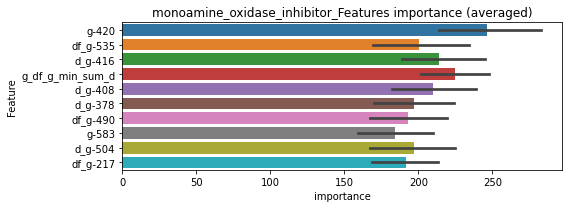

len(train_index) : 2784
len(valid_index) : 928
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0320279	valid_1's binary_logloss: 0.0511655
[2000]	training's binary_logloss: 0.0163798	valid_1's binary_logloss: 0.0389494
[3000]	training's binary_logloss: 0.0109324	valid_1's binary_logloss: 0.0347437
[4000]	training's binary_logloss: 0.00819006	valid_1's binary_logloss: 0.0326801
Early stopping, best iteration is:
[4811]	training's binary_logloss: 0.00681382	valid_1's binary_logloss: 0.0316727


len(train_index) : 2784
len(valid_index) : 928
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0305371	valid_1's binary_logloss: 0.0655201
[2000]	training's binary_logloss: 0.0156019	valid_1's binary_logloss: 0.0545585
[3000]	training's binary_logloss: 0.0104084	valid_1's binary_logloss: 0.0514655
Early stopping, best iteration is:
[3132]	training's binary_logloss: 0.00996346	valid_1's binary_logloss: 0.0511502


len(train_index) : 2784
len(valid_index) : 928
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0320998	valid_1's binary_logloss: 0.0492847
[2000]	training's binary_logloss: 0.0165192	valid_1's binary_logloss: 0.0376471
[3000]	training's binary_logloss: 0.0110211	valid_1's binary_logloss: 0.0338001
[4000]	training's binary_logloss: 0.00824947	valid_1's binary_logloss: 0.0318502
[5000]	training's binary_logloss: 0.00659528	valid_1's binary_logloss: 0.0307131
Early stopping, best iteration is:
[5463]	training's binary_logloss: 0.0060351	valid_1's binary_logloss: 0.0302649


len(train_index) : 2784
len(valid_index) : 928
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315359	valid_1's binary_logloss: 0.0568223
[2000]	training's binary_logloss: 0.0162923	valid_1's binary_logloss: 0.0452568
[3000]	training's binary_logloss: 0.0108861	valid_1's binary_logloss: 0.041297
Early stopping, best iteration is:
[3328]	training's binary_logloss: 0.00980162	valid_1's binary_logloss: 0.0405227


monoamine_oxidase_inhibitor logloss: 0.03840263242701526
monoamine_oxidase_inhibitor is unpredictable(><)!
monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000306723	valid_1's binary_logloss: 0.00311457
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000287489	valid_1's binary_logloss: 0.00609477
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000276854	valid_1's binary_logloss: 0.00112744
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012377, Threshold: 0.0085776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0085776, conf_0:0.00600, conf_1:0.01115
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0385776
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0685776
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.0985776


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00040545	valid_1's binary_logloss: 0.0115034


threshold: 0.0985776, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000280611	valid_1's binary_logloss: 0.0025621
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000285007	valid_1's binary_logloss: 0.00447322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000264192	valid_1's binary_logloss: 0.00131371
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0149698, Threshold: 0.0985776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00076
Num_p_label: 15.0, Expected: 3.0, Threshold: 0.0985776, conf_0:0.07886, conf_1:0.11829
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_1: 0.1285776
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.1585776
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_3: 0.1885776
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.2185776
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.2485776
threshold: 0.2485776, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[256]	training's binary_logloss: 0.000998474	valid_1's binary_logloss: 0.0106455


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000280611	valid_1's binary_logloss: 0.0025621
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000285007	valid_1's binary_logloss: 0.00447322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000264192	valid_1's binary_logloss: 0.00131371
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0149698, Threshold: 0.2485776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.2485776, conf_0:0.22372, conf_1:0.27344
threshold: 0.2485776, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[256]	training's binary_logloss: 0.000998474	valid_1's binary_logloss: 0.0106455


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


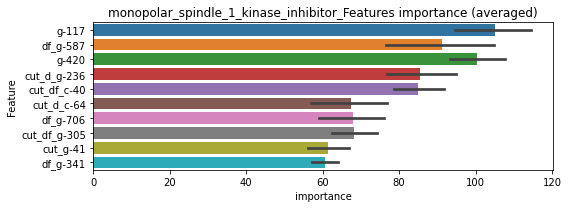

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000270133	valid_1's binary_logloss: 0.00249229
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000267799	valid_1's binary_logloss: 0.00401812
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000279997	valid_1's binary_logloss: 0.00113249
Training until validation scores don't improve for 30 rounds


monopolar_spindle_1_kinase_inhibitor logloss: 0.004355485330951716


Early stopping, best iteration is:
[188]	training's binary_logloss: 0.000882376	valid_1's binary_logloss: 0.00977835
mutually exclusive columns: mtor_inhibitor


mtor_inhibitor, len(trt): 130, len(othr): 2722
target_rate: 0.0054590 → Adj_target_rate: 0.0052608


selected negative label: 2722


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0525702	valid_1's binary_logloss: 0.149713
[2000]	training's binary_logloss: 0.0260343	valid_1's binary_logloss: 0.136117
Early stopping, best iteration is:
[1980]	training's binary_logloss: 0.0263021	valid_1's binary_logloss: 0.135959
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0539034	valid_1's binary_logloss: 0.133607
[2000]	training's binary_logloss: 0.0266979	valid_1's binary_logloss: 0.119079
Early stopping, best iteration is:
[2389]	training's binary_logloss: 0.0221941	valid_1's binary_logloss: 0.117088
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0519547	valid_1's binary_logloss: 0.162649
Early stopping, best iteration is:
[1384]	training's binary_logloss: 0.0376096	valid_1's binary_logloss: 0.15583
Training until validation scores don't improve for 30 rounds
[1000]	training's bi

1 / 3, AUC score:0.972, PR-AUC:0.949
y_Threshold: 0.0678608, Threshold: 0.1151880, pos_neg_ratio: 0.8000000
Remove_noisy_data: 188 → Positive_corect_labels: 505/3078
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, Expected: 21.7, Threshold: 0.1151880, conf_0:0.08063, conf_1:0.14974
Num_p_label: 13.0, Expected: 21.7, Adj_threshold_1: 0.1451880
threshold: 0.1451880, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 505.0/3078, y_label_rate: 0.1640676
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0425707	valid_1's binary_logloss: 0.124951
[2000]	training's binary_logloss: 0.021135	valid_1's binary_logloss: 0.109447
Early stopping, best iteration is:
[2291]	training's binary_logloss: 0.018352	valid_1's binary_logloss: 0.107249
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0451442	valid_1's binary_logloss: 0.104366
[2000]	training's binary_logloss: 0.0224179	valid_1's binary_logloss: 0.0887291
Early stopping, best iteration is:
[2818]	training's binary_logloss: 0.0157072	valid_1's binary_logloss: 0.0838219
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0452214	valid_1's binary_logloss: 0.0969862
[2000]	training's binary_logloss: 0.0224854	valid_1's binary_logloss: 0.0817111
[3000]	training's binary_logloss: 0.0148178	valid_1's binary_logloss: 0.076494
Early stopping, best iteration is:

2 / 3, AUC score:0.997, PR-AUC:0.988
y_Threshold: 0.0796289, Threshold: 0.1451880, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 479.0/3026
p_label_rate: 0.0075339 Vs.target_rate: 0.00546
Num_p_label: 30.0, Expected: 21.7, Threshold: 0.1451880, conf_0:0.11615, conf_1:0.17423
threshold: 0.1451880, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 479.0/3026, y_label_rate: 0.1582948
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0371544	valid_1's binary_logloss: 0.109123
Early stopping, best iteration is:
[1729]	training's binary_logloss: 0.0216357	valid_1's binary_logloss: 0.0984399
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0385561	valid_1's binary_logloss: 0.0897167
[2000]	training's binary_logloss: 0.0192804	valid_1's binary_logloss: 0.0755896
Early stopping, best iteration is:
[2111]	training's binary_logloss: 0.0182459	valid_1's binary_logloss: 0.0746885
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0385241	valid_1's binary_logloss: 0.0865673
[2000]	training's binary_logloss: 0.0192256	valid_1's binary_logloss: 0.0722149
[3000]	training's binary_logloss: 0.0126811	valid_1's binary_logloss: 0.0668198
Early stopping, best iteration is:
[3127]	training's binary_logloss: 0.0121554	valid_1's binary_logloss: 0.0

3 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0727208, Threshold: 0.1451880, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 463.0/2994
p_label_rate: 0.0072828 Vs.target_rate: 0.00546
Num_p_label: 29.0, Expected: 21.7, Threshold: 0.1451880, conf_0:0.13067, conf_1:0.15971
threshold: 0.1451880, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 463.0/2994, y_label_rate: 0.1546426


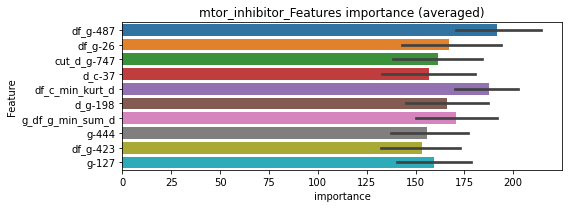

len(train_index) : 2245
len(valid_index) : 749
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0479134	valid_1's binary_logloss: 0.0984013
[2000]	training's binary_logloss: 0.0249888	valid_1's binary_logloss: 0.0790701
[3000]	training's binary_logloss: 0.0167142	valid_1's binary_logloss: 0.0724012
Early stopping, best iteration is:
[3330]	training's binary_logloss: 0.0150504	valid_1's binary_logloss: 0.0708978


len(train_index) : 2245
len(valid_index) : 749
================================= fold 2/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0485375	valid_1's binary_logloss: 0.0945756
[2000]	training's binary_logloss: 0.0250979	valid_1's binary_logloss: 0.0762434
[3000]	training's binary_logloss: 0.0167689	valid_1's binary_logloss: 0.0700991
Early stopping, best iteration is:
[3146]	training's binary_logloss: 0.0159956	valid_1's binary_logloss: 0.0694893


len(train_index) : 2246
len(valid_index) : 748
================================= fold 3/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0512472	valid_1's binary_logloss: 0.0792499
[2000]	training's binary_logloss: 0.0266121	valid_1's binary_logloss: 0.057572
[3000]	training's binary_logloss: 0.0177794	valid_1's binary_logloss: 0.0494731
[4000]	training's binary_logloss: 0.0133034	valid_1's binary_logloss: 0.0453074
Early stopping, best iteration is:
[4656]	training's binary_logloss: 0.0114246	valid_1's binary_logloss: 0.0435561


len(train_index) : 2246
len(valid_index) : 748
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0487254	valid_1's binary_logloss: 0.0921486
[2000]	training's binary_logloss: 0.0252874	valid_1's binary_logloss: 0.0711938
[3000]	training's binary_logloss: 0.0168608	valid_1's binary_logloss: 0.0633611
[4000]	training's binary_logloss: 0.0126263	valid_1's binary_logloss: 0.0591562
Early stopping, best iteration is:
[4102]	training's binary_logloss: 0.0123122	valid_1's binary_logloss: 0.058864


mtor_inhibitor logloss: 0.060708152294981686
mtor_inhibitor is unpredictable(><)!
mucolytic_agent, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3282


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000660856	valid_1's binary_logloss: 0.0431796
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000644606	valid_1's binary_logloss: 0.0279576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000424553	valid_1's binary_logloss: 0.00507479
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0049344, Threshold: 0.0596882, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0596882, conf_0:0.04178, conf_1:0.07759
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_1: 0.0896882
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_2: 0.1196882
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_3: 0.1496882
threshold: 0.1496882, positive_p_label: 20.0/3982, p_label_rate: 0.0050226


Early stopping, best iteration is:
[241]	training's binary_logloss: 0.00333806	valid_1's binary_logloss: 0.0488638


positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000704044	valid_1's binary_logloss: 0.041308
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000520681	valid_1's binary_logloss: 0.0278592
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000457103	valid_1's binary_logloss: 0.00416267
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0206317, Threshold: 0.1496882, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 648.0/3790
p_label_rate: 0.0107986 Vs.target_rate: 0.00202
Num_p_label: 43.0, Expected: 8.0, Threshold: 0.1496882, conf_0:0.11975, conf_1:0.17963
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_1: 0.1796882
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_2: 0.2096882
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_3: 0.2396882
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_4: 0.2696882
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_5: 0.2996882


Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000839483	valid_1's binary_logloss: 0.0478677


threshold: 0.2996882, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 648.0/3790, y_label_rate: 0.1709763
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.000800038	valid_1's binary_logloss: 0.0300186
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[343]	training's binary_logloss: 0.00107947	valid_1's binary_logloss: 0.0313482
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000427011	valid_1's binary_logloss: 0.0119474
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0437014, Threshold: 0.2996882, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000428203	valid_1's binary_logloss: 0.0151327


Remove_noisy_data: 12 → Positive_corect_labels: 642.0/3778
p_label_rate: 0.0097941 Vs.target_rate: 0.00202
Num_p_label: 39.0, Expected: 8.0, Threshold: 0.2996882, conf_0:0.26972, conf_1:0.32966
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_1: 0.3296882
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_2: 0.3596882
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_3: 0.3896882
threshold: 0.3896882, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 642.0/3778, y_label_rate: 0.1699312


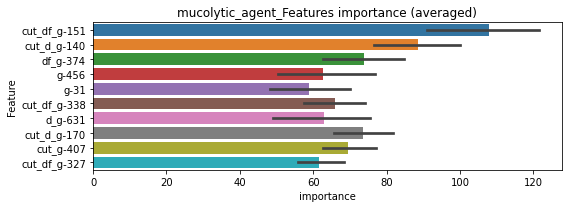

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 mucolytic_agent=================================


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000598861	valid_1's binary_logloss: 0.019626
Training until validation scores don't improve for 30 rounds


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 mucolytic_agent=================================


Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000688393	valid_1's binary_logloss: 0.0275606
Training until validation scores don't improve for 30 rounds


len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 mucolytic_agent=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000511064	valid_1's binary_logloss: 0.00607249
Training until validation scores don't improve for 30 rounds


mucolytic_agent logloss: 0.016719478044483167


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000554983	valid_1's binary_logloss: 0.0136042


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[231]	training's binary_logloss: 0.00256837	valid_1's binary_logloss: 0.0386425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00038522	valid_1's binary_logloss: 0.0125648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000636449	valid_1's binary_logloss: 0.00501202
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039890, Threshold: 0.0112867, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000406036	valid_1's binary_logloss: 0.0189728


p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0112867, conf_0:0.00790, conf_1:0.01467
Num_p_label: 3.0, Expected: 6.2, Adj_threshold_1: 0.0412867
threshold: 0.0412867, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00174437	valid_1's binary_logloss: 0.0366681
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000395387	valid_1's binary_logloss: 0.0125695
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000396237	valid_1's binary_logloss: 0.00538966
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0199228, Threshold: 0.0412867, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000406032	valid_1's binary_logloss: 0.0184895


Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0017579 Vs.target_rate: 0.00155
Num_p_label: 7.0, Expected: 6.2, Threshold: 0.0412867, conf_0:0.03303, conf_1:0.04954
threshold: 0.0412867, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000432122	valid_1's binary_logloss: 0.023128
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.000756013	valid_1's binary_logloss: 0.0156598
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000401234	valid_1's binary_logloss: 0.0197722
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0122922, Threshold: 0.0412867, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000389351	valid_1's binary_logloss: 0.00293146


Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0017579 Vs.target_rate: 0.00155
Num_p_label: 7.0, Expected: 6.2, Threshold: 0.0412867, conf_0:0.03716, conf_1:0.04542
threshold: 0.0412867, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


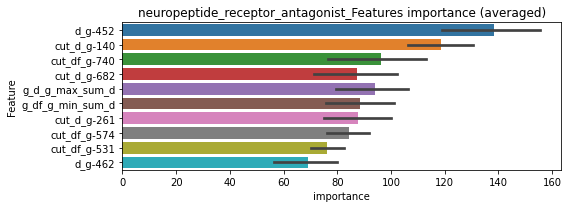

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000847934	valid_1's binary_logloss: 0.0183665
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950


Early stopping, best iteration is:
[670]	training's binary_logloss: 0.00040844	valid_1's binary_logloss: 0.00652968


================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000417946	valid_1's binary_logloss: 0.00995993


================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


neuropeptide_receptor_antagonist logloss: 0.012441078063434544


Early stopping, best iteration is:
[312]	training's binary_logloss: 0.000792707	valid_1's binary_logloss: 0.0149082
mutually exclusive columns: nfkb_inhibitor


nfkb_inhibitor, len(trt): 832, len(othr): 10016
target_rate: 0.0349374 → Adj_target_rate: 0.0254860


selected negative label: 10016


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0844639	valid_1's binary_logloss: 0.259049
Early stopping, best iteration is:
[1379]	training's binary_logloss: 0.0609955	valid_1's binary_logloss: 0.252735
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0859809	valid_1's binary_logloss: 0.25137
Early stopping, best iteration is:
[1468]	training's binary_logloss: 0.0584037	valid_1's binary_logloss: 0.242415
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0871649	valid_1's binary_logloss: 0.238081
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.051669	valid_1's binary_logloss: 0.22594
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0863711	valid_1's binary_logloss: 0.247305
Early stopping, best iteration is:
[1939]	training's binary_logloss: 0.0430696	valid_1's binary_loglo

1 / 3, AUC score:0.889, PR-AUC:0.819
y_Threshold: 0.1159601, Threshold: 0.2178634, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1361 → Positive_corect_labels: 1523/10658
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, Expected: 139.1, Threshold: 0.2178634, conf_0:0.15250, conf_1:0.28322
threshold: 0.2178634, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1523.0/10658, y_label_rate: 0.1428974
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0523173	valid_1's binary_logloss: 0.129673
[2000]	training's binary_logloss: 0.0247354	valid_1's binary_logloss: 0.107693
Early stopping, best iteration is:
[2617]	training's binary_logloss: 0.0184591	valid_1's binary_logloss: 0.102473
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.051454	valid_1's binary_logloss: 0.144786
[2000]	training's binary_logloss: 0.0243351	valid_1's binary_logloss: 0.125515
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0231472	valid_1's binary_logloss: 0.124386
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0514424	valid_1's binary_logloss: 0.137386
[2000]	training's binary_logloss: 0.0244317	valid_1's binary_logloss: 0.115926
Early stopping, best iteration is:
[2265]	training's binary_logloss: 0.0213407	valid_1's binary_logloss: 0.113139
Tr

2 / 3, AUC score:0.985, PR-AUC:0.962
y_Threshold: 0.1109866, Threshold: 0.2178634, pos_neg_ratio: 0.8000000
Remove_noisy_data: 286 → Positive_corect_labels: 1380.0/10372
p_label_rate: 0.0047715 Vs.target_rate: 0.03494
Num_p_label: 19.0, Expected: 139.1, Threshold: 0.2178634, conf_0:0.17429, conf_1:0.26144
threshold: 0.2178634, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 1380.0/10372, y_label_rate: 0.1330505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0421289	valid_1's binary_logloss: 0.115136
[2000]	training's binary_logloss: 0.0199365	valid_1's binary_logloss: 0.0969209
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.0153052	valid_1's binary_logloss: 0.0929051
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0419384	valid_1's binary_logloss: 0.121471
[2000]	training's binary_logloss: 0.0198782	valid_1's binary_logloss: 0.103581
Early stopping, best iteration is:
[2252]	training's binary_logloss: 0.0174449	valid_1's binary_logloss: 0.101454
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.042259	valid_1's binary_logloss: 0.119589
[2000]	training's binary_logloss: 0.019944	valid_1's binary_logloss: 0.104215
Early stopping, best iteration is:
[2078]	training's binary_logloss: 0.019136	valid_1's binary_logloss: 0.103477
Tr

3 / 3, AUC score:0.990, PR-AUC:0.976
y_Threshold: 0.1015363, Threshold: 0.2178634, pos_neg_ratio: 0.8000000
Remove_noisy_data: 184 → Positive_corect_labels: 1288.0/10188
p_label_rate: 0.0055249 Vs.target_rate: 0.03494
Num_p_label: 22.0, Expected: 139.1, Threshold: 0.2178634, conf_0:0.19608, conf_1:0.23965
threshold: 0.2178634, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 1288.0/10188, y_label_rate: 0.1264232


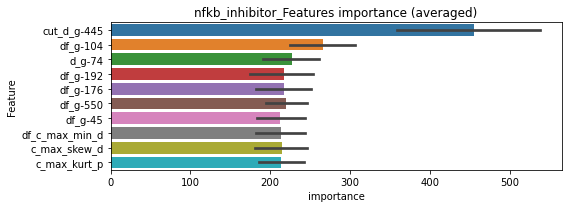

len(train_index) : 7641
len(valid_index) : 2547
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0521884	valid_1's binary_logloss: 0.111881
[2000]	training's binary_logloss: 0.0257746	valid_1's binary_logloss: 0.0878022
[3000]	training's binary_logloss: 0.0167761	valid_1's binary_logloss: 0.0793084
Early stopping, best iteration is:
[3836]	training's binary_logloss: 0.0128643	valid_1's binary_logloss: 0.0753086


len(train_index) : 7641
len(valid_index) : 2547
================================= fold 2/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0519939	valid_1's binary_logloss: 0.118762
[2000]	training's binary_logloss: 0.0257705	valid_1's binary_logloss: 0.0970825
[3000]	training's binary_logloss: 0.0168007	valid_1's binary_logloss: 0.0905955
Early stopping, best iteration is:
[3378]	training's binary_logloss: 0.0148137	valid_1's binary_logloss: 0.0891551


len(train_index) : 7641
len(valid_index) : 2547
================================= fold 3/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.05173	valid_1's binary_logloss: 0.122525
[2000]	training's binary_logloss: 0.025628	valid_1's binary_logloss: 0.100253
[3000]	training's binary_logloss: 0.0167421	valid_1's binary_logloss: 0.0927185
Early stopping, best iteration is:
[3665]	training's binary_logloss: 0.013567	valid_1's binary_logloss: 0.0899564


len(train_index) : 7641
len(valid_index) : 2547
================================= fold 4/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0526361	valid_1's binary_logloss: 0.110374
[2000]	training's binary_logloss: 0.026149	valid_1's binary_logloss: 0.0865762
[3000]	training's binary_logloss: 0.017083	valid_1's binary_logloss: 0.0781982
[4000]	training's binary_logloss: 0.0125729	valid_1's binary_logloss: 0.0734693
Early stopping, best iteration is:
[4204]	training's binary_logloss: 0.0119166	valid_1's binary_logloss: 0.0727816


nfkb_inhibitor logloss: 0.08180043188348891
nfkb_inhibitor is unpredictable(><)!
nicotinic_receptor_agonist, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000259537	valid_1's binary_logloss: 0.00932227
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000248408	valid_1's binary_logloss: 0.00723659
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00022085	valid_1's binary_logloss: 0.000218676
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0006206, Threshold: 0.0025052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0025052, conf_0:0.00175, conf_1:0.00326
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0325052


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00021922	valid_1's binary_logloss: 0.00552576


threshold: 0.0325052, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000251152	valid_1's binary_logloss: 0.00673726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000224518	valid_1's binary_logloss: 0.00552862
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000216246	valid_1's binary_logloss: 0.000219381
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0137798, Threshold: 0.0325052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, Expected: 2.0, Threshold: 0.0325052, conf_0:0.02600, conf_1:0.03901
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0625052
threshold: 0.0625052, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000215157	valid_1's binary_logloss: 0.00431515


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000251152	valid_1's binary_logloss: 0.00673726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000224518	valid_1's binary_logloss: 0.00552862
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000216246	valid_1's binary_logloss: 0.000219381
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0137798, Threshold: 0.0625052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0625052, conf_0:0.05625, conf_1:0.06876
threshold: 0.0625052, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000215157	valid_1's binary_logloss: 0.00431515


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


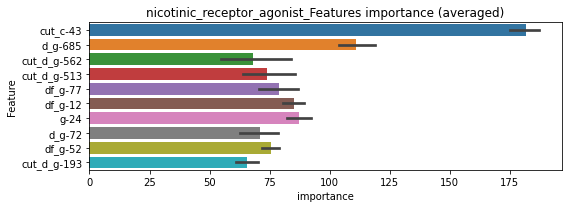

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000225469	valid_1's binary_logloss: 0.00544649
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000255278	valid_1's binary_logloss: 0.00292148
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000221947	valid_1's binary_logloss: 0.000242506
Training until validation scores don't improve for 30 rounds


nicotinic_receptor_agonist logloss: 0.002967170276766285


Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000227248	valid_1's binary_logloss: 0.003255


nitric_oxide_donor, len(trt): 26, len(othr): 3287
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3287


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.000495541	valid_1's binary_logloss: 0.0118897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000345747	valid_1's binary_logloss: 0.0116507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000369749	valid_1's binary_logloss: 0.00448705
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017125, Threshold: 0.0331448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0331448, conf_0:0.02320, conf_1:0.04309
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_1: 0.0631448
Num_p_label: 7.0, Expected: 4.3, Adj_threshold_2: 0.0931448


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000322798	valid_1's binary_logloss: 0.00811902


threshold: 0.0931448, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000350031	valid_1's binary_logloss: 0.0114921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000405154	valid_1's binary_logloss: 0.00684673
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000357937	valid_1's binary_logloss: 0.00411956
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000317607	valid_1's binary_logloss: 0.0056619


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0277112, Threshold: 0.0931448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0168257 Vs.target_rate: 0.00109
Num_p_label: 67.0, Expected: 4.3, Threshold: 0.0931448, conf_0:0.07452, conf_1:0.11177
Num_p_label: 58.0, Expected: 4.3, Adj_threshold_1: 0.1231448
Num_p_label: 49.0, Expected: 4.3, Adj_threshold_2: 0.1531448
Num_p_label: 41.0, Expected: 4.3, Adj_threshold_3: 0.1831448
Num_p_label: 37.0, Expected: 4.3, Adj_threshold_4: 0.2131448
Num_p_label: 33.0, Expected: 4.3, Adj_threshold_5: 0.2431448
Num_p_label: 24.0, Expected: 4.3, Adj_threshold_6: 0.2731448
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_7: 0.3031448
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_8: 0.3331448
Num_p_label: 18.0, Expected: 4.3, Adj_threshold_9: 0.3631448
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_10: 0.3931448
threshold: 0.3931448, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000316369	valid_1's binary_logloss: 0.0104512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000334215	valid_1's binary_logloss: 0.00525684
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000321508	valid_1's binary_logloss: 0.00213316
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253118, Threshold: 0.3931448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0040181 Vs.target_rate: 0.00109
Num_p_label: 16.0, Expected: 4.3, Threshold: 0.3931448, conf_0:0.35383, conf_1:0.43246
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_1: 0.4231448
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_2: 0.4531448
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_3: 0.4831448


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000334518	valid_1's binary_logloss: 0.0102789


threshold: 0.4831448, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


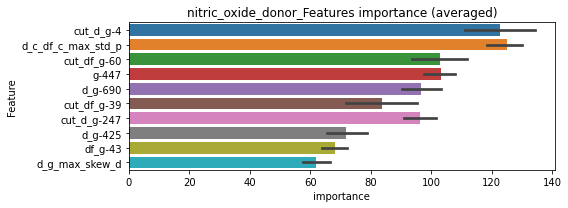

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_donor=================================


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000378443	valid_1's binary_logloss: 0.00935388
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_donor=================================


Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000324988	valid_1's binary_logloss: 0.00569247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000319089	valid_1's binary_logloss: 0.00124194


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds


nitric_oxide_donor logloss: 0.006250479036450455


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00038064	valid_1's binary_logloss: 0.00870405


nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3285


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00032735	valid_1's binary_logloss: 0.0133237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000375658	valid_1's binary_logloss: 0.022576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00032708	valid_1's binary_logloss: 0.00289926
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011630, Threshold: 0.0025030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0025030, conf_0:0.00175, conf_1:0.00325
Num_p_label: 0.0, Expected: 4.8, Adj_threshold_1: 0.0325030


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000357838	valid_1's binary_logloss: 0.0151771


threshold: 0.0325030, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000388753	valid_1's binary_logloss: 0.0118912
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.00036372	valid_1's binary_logloss: 0.0183289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000372298	valid_1's binary_logloss: 0.00286194
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0077319, Threshold: 0.0325030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00122
Num_p_label: 0.0, Expected: 4.8, Threshold: 0.0325030, conf_0:0.02600, conf_1:0.03900


Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000354338	valid_1's binary_logloss: 0.0150001


threshold: 0.0325030, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000388753	valid_1's binary_logloss: 0.0118912
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.00036372	valid_1's binary_logloss: 0.0183289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000372298	valid_1's binary_logloss: 0.00286194
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0077319, Threshold: 0.0325030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00122
Num_p_label: 0.0, Expected: 4.8, Threshold: 0.0325030, conf_0:0.02925, conf_1:0.03575


Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000354338	valid_1's binary_logloss: 0.0150001


threshold: 0.0325030, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


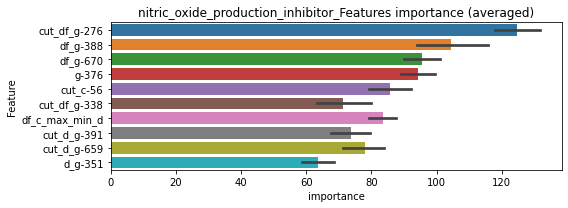

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000380626	valid_1's binary_logloss: 0.0114486
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000325275	valid_1's binary_logloss: 0.0127581


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.00034617	valid_1's binary_logloss: 0.00344257


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


nitric_oxide_production_inhibitor logloss: 0.010284892789469742


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000402265	valid_1's binary_logloss: 0.0134836


nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00034122	valid_1's binary_logloss: 0.0140749
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000341167	valid_1's binary_logloss: 0.0062534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000321659	valid_1's binary_logloss: 0.00180394
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014787, Threshold: 0.0163041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0163041, conf_0:0.01141, conf_1:0.02120
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_1: 0.0463041
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_2: 0.0763041


Early stopping, best iteration is:
[294]	training's binary_logloss: 0.000865095	valid_1's binary_logloss: 0.0225821


Num_p_label: 8.0, Expected: 4.3, Adj_threshold_3: 0.1063041
threshold: 0.1063041, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000331494	valid_1's binary_logloss: 0.0126258
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000329981	valid_1's binary_logloss: 0.00625592
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000321371	valid_1's binary_logloss: 0.00185544
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0108086, Threshold: 0.1063041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0067805 Vs.target_rate: 0.00109
Num_p_label: 27.0, Expected: 4.3, Threshold: 0.1063041, conf_0:0.08504, conf_1:0.12756
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_1: 0.1363041
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_2: 0.1663041
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_3: 0.1963041
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_4: 0.2263041
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_5: 0.2563041


Early stopping, best iteration is:
[421]	training's binary_logloss: 0.000382424	valid_1's binary_logloss: 0.0229897


threshold: 0.2563041, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000346587	valid_1's binary_logloss: 0.0141223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000346684	valid_1's binary_logloss: 0.0044345
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00030801	valid_1's binary_logloss: 0.00494946
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0163463, Threshold: 0.2563041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0022602 Vs.target_rate: 0.00109
Num_p_label: 9.0, Expected: 4.3, Threshold: 0.2563041, conf_0:0.23067, conf_1:0.28193
threshold: 0.2563041, positive_p_label: 9.0/3982, p_label_rate: 0.0022602


Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000445884	valid_1's binary_logloss: 0.0139381


positive_y_label: 655.0/3805, y_label_rate: 0.1721419


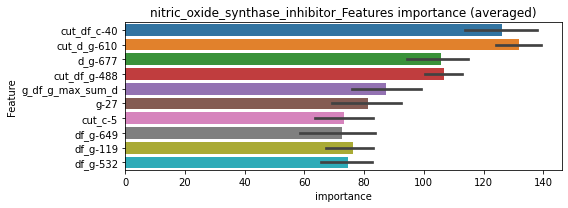

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000414367	valid_1's binary_logloss: 0.011917
Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000343742	valid_1's binary_logloss: 0.00443433
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000332608	valid_1's binary_logloss: 0.00338121


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


nitric_oxide_synthase_inhibitor logloss: 0.007751176160555665


Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000529417	valid_1's binary_logloss: 0.0112655


norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3287
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000154574	valid_1's binary_logloss: 0.000326773
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000146794	valid_1's binary_logloss: 0.00265146
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000154315	valid_1's binary_logloss: 0.000282107
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003782, Threshold: 0.0020065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0020065, conf_0:0.00140, conf_1:0.00261
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0320065
threshold: 0.0320065, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000151721	valid_1's binary_logloss: 0.000689444


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000146917	valid_1's binary_logloss: 0.000343752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000144519	valid_1's binary_logloss: 0.00224512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000147684	valid_1's binary_logloss: 0.00015539
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276434, Threshold: 0.0320065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00029
Num_p_label: 11.0, Expected: 1.2, Threshold: 0.0320065, conf_0:0.02561, conf_1:0.03841
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_1: 0.0620065
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_2: 0.0920065
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.1220065
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_4: 0.1520065


Early stopping, best iteration is:
[376]	training's binary_logloss: 0.000181053	valid_1's binary_logloss: 0.00146273


threshold: 0.1520065, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000146917	valid_1's binary_logloss: 0.000343752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000144519	valid_1's binary_logloss: 0.00224512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000147684	valid_1's binary_logloss: 0.00015539
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276434, Threshold: 0.1520065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00029
Num_p_label: 1.0, Expected: 1.2, Threshold: 0.1520065, conf_0:0.13681, conf_1:0.16721
threshold: 0.1520065, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[376]	training's binary_logloss: 0.000181053	valid_1's binary_logloss: 0.00146273


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


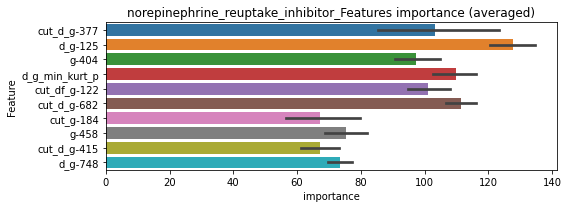

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000149873	valid_1's binary_logloss: 0.000458543
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000153758	valid_1's binary_logloss: 0.00202241
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000151273	valid_1's binary_logloss: 0.000158366
Training until validation scores don't improve for 30 rounds


norepinephrine_reuptake_inhibitor logloss: 0.0008904697671972672


Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000174739	valid_1's binary_logloss: 0.000922561


nrf2_activator, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000272055	valid_1's binary_logloss: 0.0103442
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000308606	valid_1's binary_logloss: 0.00745001
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000255877	valid_1's binary_logloss: 0.000299264
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009806, Threshold: 0.0022601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0022601, conf_0:0.00158, conf_1:0.00294
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0322601


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000276172	valid_1's binary_logloss: 0.00987386


threshold: 0.0322601, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000266971	valid_1's binary_logloss: 0.00723259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000272315	valid_1's binary_logloss: 0.00503784
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000253777	valid_1's binary_logloss: 0.000286332
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0086965, Threshold: 0.0322601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0322601, conf_0:0.02581, conf_1:0.03871


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000304245	valid_1's binary_logloss: 0.0102354


threshold: 0.0322601, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000266971	valid_1's binary_logloss: 0.00723259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000272315	valid_1's binary_logloss: 0.00503784
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000253777	valid_1's binary_logloss: 0.000286332
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0086965, Threshold: 0.0322601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0322601, conf_0:0.02903, conf_1:0.03549
threshold: 0.0322601, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000304245	valid_1's binary_logloss: 0.0102354


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


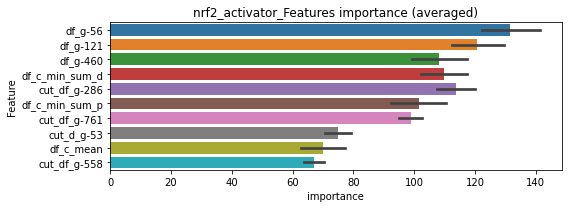

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nrf2_activator=================================


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000278565	valid_1's binary_logloss: 0.00897729
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nrf2_activator=================================


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000339667	valid_1's binary_logloss: 0.00527039
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nrf2_activator=================================


Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000269589	valid_1's binary_logloss: 0.000281881
Training until validation scores don't improve for 30 rounds


nrf2_activator logloss: 0.005768388448792191


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000414445	valid_1's binary_logloss: 0.008544


opioid_receptor_agonist, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00186517	valid_1's binary_logloss: 0.0506777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000994245	valid_1's binary_logloss: 0.0388357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.00119187	valid_1's binary_logloss: 0.0327465
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0051635, Threshold: 0.0161342, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0161342, conf_0:0.01129, conf_1:0.02097


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000958159	valid_1's binary_logloss: 0.0444733


Num_p_label: 7.0, Expected: 10.2, Adj_threshold_1: 0.0461342
threshold: 0.0461342, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000697654	valid_1's binary_logloss: 0.0354016
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00223538	valid_1's binary_logloss: 0.0503706
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00175202	valid_1's binary_logloss: 0.0334776
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0221533, Threshold: 0.0461342, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 644.0/3780
p_label_rate: 0.0150678 Vs.target_rate: 0.00256
Num_p_label: 60.0, Expected: 10.2, Threshold: 0.0461342, conf_0:0.03691, conf_1:0.05536
Num_p_label: 41.0, Expected: 10.2, Adj_threshold_1: 0.0761342
Num_p_label: 31.0, Expected: 10.2, Adj_threshold_2: 0.1061342
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_3: 0.1361342
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_4: 0.1661342


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00173209	valid_1's binary_logloss: 0.0315744


threshold: 0.1661342, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3780, y_label_rate: 0.1703704
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00110987	valid_1's binary_logloss: 0.0352734
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00076121	valid_1's binary_logloss: 0.0193855
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00146702	valid_1's binary_logloss: 0.0270846
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0296812, Threshold: 0.1661342, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 635.0/3762
p_label_rate: 0.0055249 Vs.target_rate: 0.00256
Num_p_label: 22.0, Expected: 10.2, Threshold: 0.1661342, conf_0:0.14952, conf_1:0.18275
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_1: 0.1961342
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_2: 0.2261342
threshold: 0.2261342, positive_p_label: 15.0/3982, p_label_rate: 0.0037670


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00196156	valid_1's binary_logloss: 0.0426103


positive_y_label: 635.0/3762, y_label_rate: 0.1687932


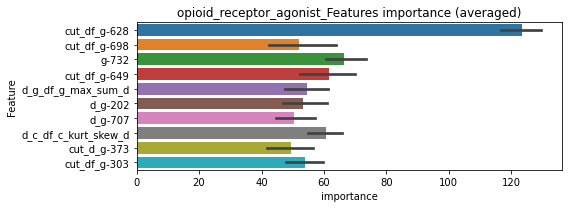

len(train_index) : 2821
len(valid_index) : 941
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2821
len(valid_index) : 941
================================= fold 2/4 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[201]	training's binary_logloss: 0.00190956	valid_1's binary_logloss: 0.0262225
Training until validation scores don't improve for 30 rounds


len(train_index) : 2822
len(valid_index) : 940
================================= fold 3/4 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00117393	valid_1's binary_logloss: 0.0256907
Training until validation scores don't improve for 30 rounds


len(train_index) : 2822
len(valid_index) : 940
================================= fold 4/4 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[342]	training's binary_logloss: 0.000968716	valid_1's binary_logloss: 0.0199181
Training until validation scores don't improve for 30 rounds


opioid_receptor_agonist logloss: 0.025557345528670936


Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00240666	valid_1's binary_logloss: 0.0303972


opioid_receptor_antagonist, len(trt): 96, len(othr): 3278
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3278


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0342379	valid_1's binary_logloss: 0.103512
Early stopping, best iteration is:
[1793]	training's binary_logloss: 0.0188569	valid_1's binary_logloss: 0.0953263
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0357033	valid_1's binary_logloss: 0.0906354
[2000]	training's binary_logloss: 0.017403	valid_1's binary_logloss: 0.0812438
Early stopping, best iteration is:
[2805]	training's binary_logloss: 0.0121437	valid_1's binary_logloss: 0.078233
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0358691	valid_1's binary_logloss: 0.0778999
[2000]	training's binary_logloss: 0.0175096	valid_1's binary_logloss: 0.0682297
[3000]	training's binary_logloss: 0.0114125	valid_1's binary_logloss: 0.0651605
Early stopping, best iteration is:
[3211]	training's binary_logloss: 0.0106382	valid_1's binary_logloss: 0.064

1 / 3, AUC score:0.990, PR-AUC:0.977
y_Threshold: 0.0400358, Threshold: 0.0991240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 186 → Positive_corect_labels: 628/3747
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0991240, conf_0:0.06939, conf_1:0.12886
Num_p_label: 16.0, Expected: 16.1, Adj_threshold_1: 0.1291240
threshold: 0.1291240, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 628.0/3747, y_label_rate: 0.1676007
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0278637	valid_1's binary_logloss: 0.0754289
[2000]	training's binary_logloss: 0.013833	valid_1's binary_logloss: 0.0659407
Early stopping, best iteration is:
[2477]	training's binary_logloss: 0.0110956	valid_1's binary_logloss: 0.0639922
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0282414	valid_1's binary_logloss: 0.0737248
[2000]	training's binary_logloss: 0.0140203	valid_1's binary_logloss: 0.0654312
Early stopping, best iteration is:
[2247]	training's binary_logloss: 0.0124368	valid_1's binary_logloss: 0.0643131
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0295931	valid_1's binary_logloss: 0.0567835
[2000]	training's binary_logloss: 0.0146543	valid_1's binary_logloss: 0.0470772
[3000]	training's binary_logloss: 0.00964838	valid_1's binary_logloss: 0.0437506
Early stopping, best iterat

2 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0641997, Threshold: 0.1291240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 604.0/3699
p_label_rate: 0.0248619 Vs.target_rate: 0.00403
Num_p_label: 99.0, Expected: 16.1, Threshold: 0.1291240, conf_0:0.10330, conf_1:0.15495
Num_p_label: 82.0, Expected: 16.1, Adj_threshold_1: 0.1591240
Num_p_label: 74.0, Expected: 16.1, Adj_threshold_2: 0.1891240
Num_p_label: 66.0, Expected: 16.1, Adj_threshold_3: 0.2191240
Num_p_label: 53.0, Expected: 16.1, Adj_threshold_4: 0.2491240
Num_p_label: 46.0, Expected: 16.1, Adj_threshold_5: 0.2791240
Num_p_label: 37.0, Expected: 16.1, Adj_threshold_6: 0.3091240
Num_p_label: 31.0, Expected: 16.1, Adj_threshold_7: 0.3391240
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_8: 0.3691240
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_9: 0.3991240
threshold: 0.3991240, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 604.0/3699, y_label_rate: 0.1632874
==========

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.022654	valid_1's binary_logloss: 0.062062
[2000]	training's binary_logloss: 0.0113227	valid_1's binary_logloss: 0.05606
Early stopping, best iteration is:
[2199]	training's binary_logloss: 0.0102869	valid_1's binary_logloss: 0.055688
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0237811	valid_1's binary_logloss: 0.0489971
[2000]	training's binary_logloss: 0.0119172	valid_1's binary_logloss: 0.0390488
[3000]	training's binary_logloss: 0.00789729	valid_1's binary_logloss: 0.0355176
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.00653987	valid_1's binary_logloss: 0.0345441
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0242382	valid_1's binary_logloss: 0.046473
[2000]	training's binary_logloss: 0.0120842	valid_1's binary_logloss: 0.03758
[3000]	training's binary_logloss:

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0651017, Threshold: 0.3991240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 586.0/3663
p_label_rate: 0.0155701 Vs.target_rate: 0.00403
Num_p_label: 62.0, Expected: 16.1, Threshold: 0.3991240, conf_0:0.35921, conf_1:0.43904
Num_p_label: 52.0, Expected: 16.1, Adj_threshold_1: 0.4291240
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_2: 0.4591240
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_3: 0.4891240
Num_p_label: 34.0, Expected: 16.1, Adj_threshold_4: 0.5191240
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_5: 0.5491240
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_6: 0.5791240
threshold: 0.5791240, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 586.0/3663, y_label_rate: 0.1599782


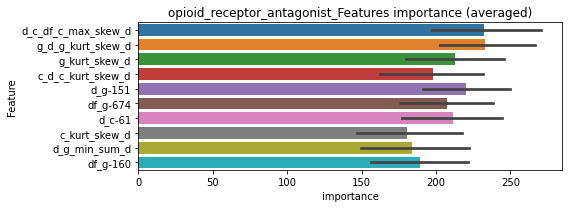

len(train_index) : 2747
len(valid_index) : 916
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0282569	valid_1's binary_logloss: 0.0465628
[2000]	training's binary_logloss: 0.0146351	valid_1's binary_logloss: 0.0328716
[3000]	training's binary_logloss: 0.00985737	valid_1's binary_logloss: 0.0281517
[4000]	training's binary_logloss: 0.00741715	valid_1's binary_logloss: 0.0258609
[5000]	training's binary_logloss: 0.00596749	valid_1's binary_logloss: 0.024471
[6000]	training's binary_logloss: 0.00498889	valid_1's binary_logloss: 0.0233664
[7000]	training's binary_logloss: 0.00429859	valid_1's binary_logloss: 0.0226483
[8000]	training's binary_logloss: 0.00378508	valid_1's binary_logloss: 0.0220968
[9000]	training's binary_logloss: 0.00338014	valid_1's binary_logloss: 0.0216512
Early stopping, best iteration is:
[8984]	training's binary_logloss: 0.00338552	valid_1's binary_logloss: 0.0216499


len(train_index) : 2747
len(valid_index) : 916
================================= fold 2/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0266401	valid_1's binary_logloss: 0.0548629
[2000]	training's binary_logloss: 0.0136826	valid_1's binary_logloss: 0.0434525
[3000]	training's binary_logloss: 0.00922221	valid_1's binary_logloss: 0.0398931
[4000]	training's binary_logloss: 0.00695864	valid_1's binary_logloss: 0.0384371
Early stopping, best iteration is:
[4097]	training's binary_logloss: 0.00679234	valid_1's binary_logloss: 0.0383371


len(train_index) : 2747
len(valid_index) : 916
================================= fold 3/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0283708	valid_1's binary_logloss: 0.0408906
[2000]	training's binary_logloss: 0.0146193	valid_1's binary_logloss: 0.0281112
[3000]	training's binary_logloss: 0.00981079	valid_1's binary_logloss: 0.0236452
[4000]	training's binary_logloss: 0.00739577	valid_1's binary_logloss: 0.0215056
[5000]	training's binary_logloss: 0.00596006	valid_1's binary_logloss: 0.0202174
[6000]	training's binary_logloss: 0.00498312	valid_1's binary_logloss: 0.0192897
[7000]	training's binary_logloss: 0.00429426	valid_1's binary_logloss: 0.018701
[8000]	training's binary_logloss: 0.00377687	valid_1's binary_logloss: 0.0181835
[9000]	training's binary_logloss: 0.00337903	valid_1's binary_logloss: 0.0178254
Early stopping, best iteration is:
[9860]	training's binary_logloss: 0.00310308	valid_1's binary_logloss: 0.0176009


len(train_index) : 2748
len(valid_index) : 915
================================= fold 4/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0281925	valid_1's binary_logloss: 0.0447782
[2000]	training's binary_logloss: 0.0145346	valid_1's binary_logloss: 0.032977
[3000]	training's binary_logloss: 0.00975869	valid_1's binary_logloss: 0.0290947
[4000]	training's binary_logloss: 0.0073429	valid_1's binary_logloss: 0.0272276
[5000]	training's binary_logloss: 0.0059014	valid_1's binary_logloss: 0.0262014
[6000]	training's binary_logloss: 0.00493689	valid_1's binary_logloss: 0.0254292
Early stopping, best iteration is:
[6291]	training's binary_logloss: 0.0047149	valid_1's binary_logloss: 0.0252584


opioid_receptor_antagonist logloss: 0.025711723230892578
orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000430592	valid_1's binary_logloss: 0.0151548
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000439185	valid_1's binary_logloss: 0.0335908
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000466479	valid_1's binary_logloss: 0.00709358
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018359, Threshold: 0.0036698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00041149	valid_1's binary_logloss: 0.020025


p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0036698, conf_0:0.00257, conf_1:0.00477
Num_p_label: 0.0, Expected: 6.2, Adj_threshold_1: 0.0336698
threshold: 0.0336698, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000392623	valid_1's binary_logloss: 0.0132715
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000508005	valid_1's binary_logloss: 0.0311542
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00040372	valid_1's binary_logloss: 0.00699007
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0069748, Threshold: 0.0336698, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000399941	valid_1's binary_logloss: 0.0181216


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00155
Num_p_label: 0.0, Expected: 6.2, Threshold: 0.0336698, conf_0:0.02694, conf_1:0.04040
threshold: 0.0336698, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000392623	valid_1's binary_logloss: 0.0132715
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000508005	valid_1's binary_logloss: 0.0311542
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00040372	valid_1's binary_logloss: 0.00699007
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0069748, Threshold: 0.0336698, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000399941	valid_1's binary_logloss: 0.0181216


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00155
Num_p_label: 0.0, Expected: 6.2, Threshold: 0.0336698, conf_0:0.03030, conf_1:0.03704
threshold: 0.0336698, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


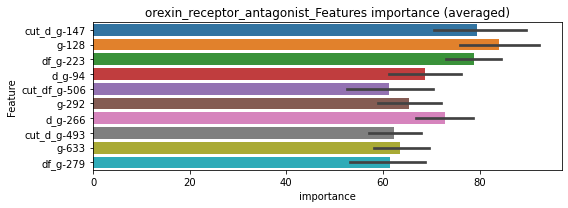

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000419104	valid_1's binary_logloss: 0.0143091


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 orexin_receptor_antagonist=================================


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000506769	valid_1's binary_logloss: 0.0299702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000427438	valid_1's binary_logloss: 0.00432991


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


orexin_receptor_antagonist logloss: 0.0165058187039387


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000709015	valid_1's binary_logloss: 0.017414


p38_mapk_inhibitor, len(trt): 62, len(othr): 3286
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00128855	valid_1's binary_logloss: 0.0367537
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000602824	valid_1's binary_logloss: 0.0467222
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000573079	valid_1's binary_logloss: 0.0180749
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998


Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00113563	valid_1's binary_logloss: 0.0403037


y_Threshold: 0.0042599, Threshold: 0.0148397, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 654/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0148397, conf_0:0.01039, conf_1:0.01929
Num_p_label: 4.0, Expected: 10.4, Adj_threshold_1: 0.0448397
threshold: 0.0448397, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 654.0/3805, y_label_rate: 0.1718791
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000842969	valid_1's binary_logloss: 0.047777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000572562	valid_1's binary_logloss: 0.0298938
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00064644	valid_1's binary_logloss: 0.0252191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000587387	valid_1's binary_logloss: 0.0312126


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0155420, Threshold: 0.0448397, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3799
p_label_rate: 0.0017579 Vs.target_rate: 0.00260
Num_p_label: 7.0, Expected: 10.4, Threshold: 0.0448397, conf_0:0.03587, conf_1:0.05381
threshold: 0.0448397, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 651.0/3799, y_label_rate: 0.1713609
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000847104	valid_1's binary_logloss: 0.0310085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.00108287	valid_1's binary_logloss: 0.037355
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000539595	valid_1's binary_logloss: 0.0261272
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000677109	valid_1's binary_logloss: 0.0252076


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0130976, Threshold: 0.0448397, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3795
p_label_rate: 0.0027624 Vs.target_rate: 0.00260
Num_p_label: 11.0, Expected: 10.4, Threshold: 0.0448397, conf_0:0.04036, conf_1:0.04932
threshold: 0.0448397, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 649.0/3795, y_label_rate: 0.1710145


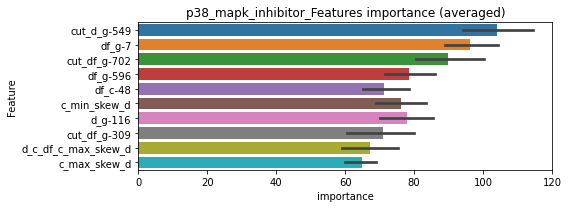

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949


Early stopping, best iteration is:
[369]	training's binary_logloss: 0.000975088	valid_1's binary_logloss: 0.026395


================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 p38_mapk_inhibitor=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000977714	valid_1's binary_logloss: 0.0358629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000652044	valid_1's binary_logloss: 0.0218432


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


p38_mapk_inhibitor logloss: 0.029202587746099434


Early stopping, best iteration is:
[285]	training's binary_logloss: 0.00132553	valid_1's binary_logloss: 0.0327131


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.000431852	valid_1's binary_logloss: 0.0137203
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00043701	valid_1's binary_logloss: 0.030702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000331264	valid_1's binary_logloss: 0.00111901
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000331507	valid_1's binary_logloss: 0.0100953


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012076, Threshold: 0.0046965, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0046965, conf_0:0.00329, conf_1:0.00611
Num_p_label: 2.0, Expected: 4.0, Adj_threshold_1: 0.0346965
threshold: 0.0346965, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.00037876	valid_1's binary_logloss: 0.0140204
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[272]	training's binary_logloss: 0.0010083	valid_1's binary_logloss: 0.0316669
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.0003062	valid_1's binary_logloss: 0.000948182
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0059346, Threshold: 0.0346965, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0032647 Vs.target_rate: 0.00101
Num_p_label: 13.0, Expected: 4.0, Threshold: 0.0346965, conf_0:0.02776, conf_1:0.04164


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000306168	valid_1's binary_logloss: 0.00847492


Num_p_label: 6.0, Expected: 4.0, Adj_threshold_1: 0.0646965
threshold: 0.0646965, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.000480872	valid_1's binary_logloss: 0.0236982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000319267	valid_1's binary_logloss: 0.0112725
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000397654	valid_1's binary_logloss: 0.00389995
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0065155, Threshold: 0.0646965, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, Expected: 4.0, Threshold: 0.0646965, conf_0:0.05823, conf_1:0.07117
threshold: 0.0646965, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000323398	valid_1's binary_logloss: 0.0128581


positive_y_label: 655.0/3807, y_label_rate: 0.1720515


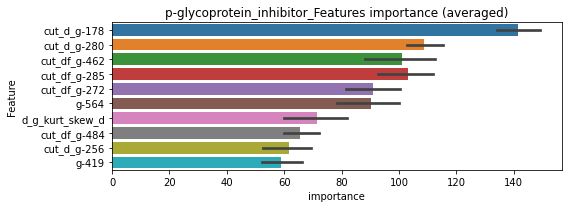

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000400915	valid_1's binary_logloss: 0.0198476
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000488229	valid_1's binary_logloss: 0.0064214
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000412555	valid_1's binary_logloss: 0.00607413


================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds


p-glycoprotein_inhibitor logloss: 0.008824025173376285


Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000310497	valid_1's binary_logloss: 0.00294683


parp_inhibitor, len(trt): 61, len(othr): 3283
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3283


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.00371736	valid_1's binary_logloss: 0.0754234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000847985	valid_1's binary_logloss: 0.03735
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000550273	valid_1's binary_logloss: 0.0140114
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0070829, Threshold: 0.0137894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0137894, conf_0:0.00965, conf_1:0.01793
Num_p_label: 5.0, Expected: 10.2, Adj_threshold_1: 0.0437894
threshold: 0.0437894, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00170265	valid_1's binary_logloss: 0.0359597


positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000625288	valid_1's binary_logloss: 0.0367098
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00109708	valid_1's binary_logloss: 0.0387578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000828944	valid_1's binary_logloss: 0.032951
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000568102	valid_1's binary_logloss: 0.036603


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0227199, Threshold: 0.0437894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 646.0/3787
p_label_rate: 0.0070316 Vs.target_rate: 0.00256
Num_p_label: 28.0, Expected: 10.2, Threshold: 0.0437894, conf_0:0.03503, conf_1:0.05255
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_1: 0.0737894
Num_p_label: 10.0, Expected: 10.2, Adj_threshold_2: 0.1037894
threshold: 0.1037894, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 646.0/3787, y_label_rate: 0.1705836
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000723816	valid_1's binary_logloss: 0.0300947
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000872782	valid_1's binary_logloss: 0.0392599
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000534235	valid_1's binary_logloss: 0.0240874
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000666102	valid_1's binary_logloss: 0.027147


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0266143, Threshold: 0.1037894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 639.0/3773
p_label_rate: 0.0052737 Vs.target_rate: 0.00256
Num_p_label: 21.0, Expected: 10.2, Threshold: 0.1037894, conf_0:0.09341, conf_1:0.11417
Num_p_label: 13.0, Expected: 10.2, Adj_threshold_1: 0.1337894
threshold: 0.1337894, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 639.0/3773, y_label_rate: 0.1693613


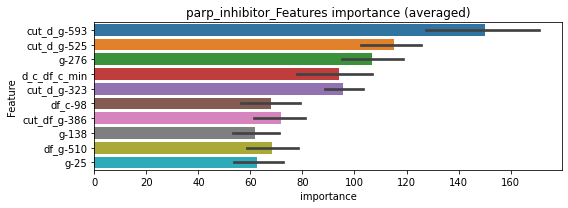

len(train_index) : 2829
len(valid_index) : 944
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2830
len(valid_index) : 943
================================= fold 2/4 parp_inhibitor=================================


Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00140768	valid_1's binary_logloss: 0.0264313
Training until validation scores don't improve for 30 rounds


len(train_index) : 2830
len(valid_index) : 943
================================= fold 3/4 parp_inhibitor=================================


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.0013595	valid_1's binary_logloss: 0.0311816
Training until validation scores don't improve for 30 rounds


len(train_index) : 2830
len(valid_index) : 943
================================= fold 4/4 parp_inhibitor=================================


Early stopping, best iteration is:
[299]	training's binary_logloss: 0.00113823	valid_1's binary_logloss: 0.0195826
Training until validation scores don't improve for 30 rounds


parp_inhibitor logloss: 0.02454216345033391


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000883366	valid_1's binary_logloss: 0.0209712
mutually exclusive columns: pdgfr_inhibitor


pdgfr_inhibitor, len(trt): 297, len(othr): 7157
target_rate: 0.0124717 → Adj_target_rate: 0.0106179


selected negative label: 7157


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.04467	valid_1's binary_logloss: 0.129123
Early stopping, best iteration is:
[1758]	training's binary_logloss: 0.0244694	valid_1's binary_logloss: 0.122547
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0445456	valid_1's binary_logloss: 0.130311
Early stopping, best iteration is:
[1757]	training's binary_logloss: 0.0243301	valid_1's binary_logloss: 0.123433
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0442107	valid_1's binary_logloss: 0.135214
Early stopping, best iteration is:
[1663]	training's binary_logloss: 0.0257564	valid_1's binary_logloss: 0.1291
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0454622	valid_1's binary_logloss: 0.126066
[2000]	training's binary_logloss: 0.0215173	valid_1's binary_logloss: 0.11527
Early stopping, best ite

1 / 3, AUC score:0.971, PR-AUC:0.945
y_Threshold: 0.0532462, Threshold: 0.0867774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 531 → Positive_corect_labels: 1309/8057
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, Expected: 49.7, Threshold: 0.0867774, conf_0:0.06074, conf_1:0.11281
threshold: 0.0867774, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1309.0/8057, y_label_rate: 0.1624674
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0314149	valid_1's binary_logloss: 0.0871332
[2000]	training's binary_logloss: 0.0151118	valid_1's binary_logloss: 0.0776296
Early stopping, best iteration is:
[1999]	training's binary_logloss: 0.015119	valid_1's binary_logloss: 0.0775975
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0318856	valid_1's binary_logloss: 0.0805824
[2000]	training's binary_logloss: 0.0153768	valid_1's binary_logloss: 0.070588
Early stopping, best iteration is:
[2793]	training's binary_logloss: 0.0107427	valid_1's binary_logloss: 0.0677264
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317193	valid_1's binary_logloss: 0.0808663
Early stopping, best iteration is:
[1939]	training's binary_logloss: 0.015833	valid_1's binary_logloss: 0.0727516
Training until validation scores don't improve for 30 rounds
[1000]	trainin

2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0574273, Threshold: 0.0867774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 1237.0/7913
p_label_rate: 0.0070316 Vs.target_rate: 0.01247
Num_p_label: 28.0, Expected: 49.7, Threshold: 0.0867774, conf_0:0.06942, conf_1:0.10413
threshold: 0.0867774, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 1237.0/7913, y_label_rate: 0.1563250
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0244479	valid_1's binary_logloss: 0.0566687
[2000]	training's binary_logloss: 0.0118776	valid_1's binary_logloss: 0.0485612
Early stopping, best iteration is:
[2187]	training's binary_logloss: 0.0108087	valid_1's binary_logloss: 0.0478296
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0242152	valid_1's binary_logloss: 0.0598902
Early stopping, best iteration is:
[1921]	training's binary_logloss: 0.0123229	valid_1's binary_logloss: 0.0523712
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248077	valid_1's binary_logloss: 0.0573158
[2000]	training's binary_logloss: 0.0120563	valid_1's binary_logloss: 0.0489717
Early stopping, best iteration is:
[2610]	training's binary_logloss: 0.00908621	valid_1's binary_logloss: 0.046979
Training until validation scores don't improve for 30 rounds
[1000]	trai

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0529098, Threshold: 0.0867774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 1199.0/7837
p_label_rate: 0.0097941 Vs.target_rate: 0.01247
Num_p_label: 39.0, Expected: 49.7, Threshold: 0.0867774, conf_0:0.07810, conf_1:0.09546
threshold: 0.0867774, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 1199.0/7837, y_label_rate: 0.1529922


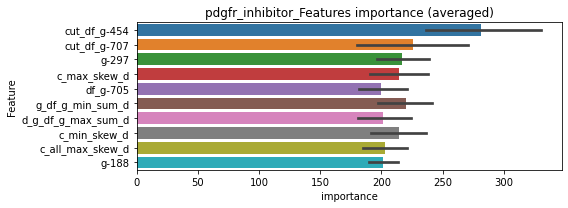

len(train_index) : 5877
len(valid_index) : 1960
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0277767	valid_1's binary_logloss: 0.0544737
[2000]	training's binary_logloss: 0.0142878	valid_1's binary_logloss: 0.0439887
[3000]	training's binary_logloss: 0.00943212	valid_1's binary_logloss: 0.0401719
Early stopping, best iteration is:
[3782]	training's binary_logloss: 0.00745679	valid_1's binary_logloss: 0.0386603


len(train_index) : 5878
len(valid_index) : 1959
================================= fold 2/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273447	valid_1's binary_logloss: 0.0548713
[2000]	training's binary_logloss: 0.0139722	valid_1's binary_logloss: 0.0443343
[3000]	training's binary_logloss: 0.00923542	valid_1's binary_logloss: 0.0406555
Early stopping, best iteration is:
[3509]	training's binary_logloss: 0.00786921	valid_1's binary_logloss: 0.03957


len(train_index) : 5878
len(valid_index) : 1959
================================= fold 3/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0284666	valid_1's binary_logloss: 0.0480584
[2000]	training's binary_logloss: 0.0146267	valid_1's binary_logloss: 0.0376581
[3000]	training's binary_logloss: 0.00967563	valid_1's binary_logloss: 0.0341234
Early stopping, best iteration is:
[3331]	training's binary_logloss: 0.00869877	valid_1's binary_logloss: 0.0333892


len(train_index) : 5878
len(valid_index) : 1959
================================= fold 4/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0289887	valid_1's binary_logloss: 0.0440867
[2000]	training's binary_logloss: 0.0147655	valid_1's binary_logloss: 0.0327044
[3000]	training's binary_logloss: 0.00974613	valid_1's binary_logloss: 0.0285877
[4000]	training's binary_logloss: 0.00724792	valid_1's binary_logloss: 0.0264558
[5000]	training's binary_logloss: 0.00577178	valid_1's binary_logloss: 0.0252344
[6000]	training's binary_logloss: 0.00479639	valid_1's binary_logloss: 0.0243407
Early stopping, best iteration is:
[6738]	training's binary_logloss: 0.00427119	valid_1's binary_logloss: 0.0238571


pdgfr_inhibitor logloss: 0.03386977298297375
pdgfr_inhibitor is unpredictable(><)!
pdk_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000267172	valid_1's binary_logloss: 0.00260743
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000272556	valid_1's binary_logloss: 0.00857672
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000358106	valid_1's binary_logloss: 0.00330922
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009638, Threshold: 0.0027558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0027558, conf_0:0.00193, conf_1:0.00358


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000283892	valid_1's binary_logloss: 0.00444188


Num_p_label: 3.0, Expected: 3.0, Adj_threshold_1: 0.0327558
threshold: 0.0327558, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000268302	valid_1's binary_logloss: 0.00239078
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00028087	valid_1's binary_logloss: 0.00856473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000338247	valid_1's binary_logloss: 0.00301597
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0107110, Threshold: 0.0327558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0327558, conf_0:0.02620, conf_1:0.03931


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000264496	valid_1's binary_logloss: 0.00412652


threshold: 0.0327558, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000268302	valid_1's binary_logloss: 0.00239078
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00028087	valid_1's binary_logloss: 0.00856473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000338247	valid_1's binary_logloss: 0.00301597
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0107110, Threshold: 0.0327558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0327558, conf_0:0.02948, conf_1:0.03603


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000264496	valid_1's binary_logloss: 0.00412652


threshold: 0.0327558, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


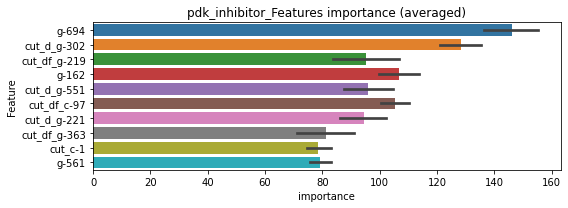

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000275652	valid_1's binary_logloss: 0.00134818
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000271093	valid_1's binary_logloss: 0.00768429
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[409]	training's binary_logloss: 0.000392692	valid_1's binary_logloss: 0.00311628
Training until validation scores don't improve for 30 rounds


pdk_inhibitor logloss: 0.003899590941184642


Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000282506	valid_1's binary_logloss: 0.0034523
mutually exclusive columns: phosphodiesterase_inhibitor


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 6907
target_rate: 0.0110859 → Adj_target_rate: 0.0096064


selected negative label: 6907


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0406308	valid_1's binary_logloss: 0.121577
Early stopping, best iteration is:
[1303]	training's binary_logloss: 0.0308646	valid_1's binary_logloss: 0.119221
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.0529156	valid_1's binary_logloss: 0.136719
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0403017	valid_1's binary_logloss: 0.126399
Early stopping, best iteration is:
[1293]	training's binary_logloss: 0.0306997	valid_1's binary_logloss: 0.124785
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0407974	valid_1's binary_logloss: 0.119519
Early stopping, best iteration is:
[1539]	training's binary_logloss: 0.0257305	valid_1's binary_logloss: 0.116047


1 / 3, AUC score:0.964, PR-AUC:0.929
y_Threshold: 0.0573636, Threshold: 0.0893408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 599 → Positive_corect_labels: 1220/7689
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, Expected: 44.1, Threshold: 0.0893408, conf_0:0.06254, conf_1:0.11614
threshold: 0.0893408, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1220.0/7689, y_label_rate: 0.1586682
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.022439	valid_1's binary_logloss: 0.0619813
Early stopping, best iteration is:
[1738]	training's binary_logloss: 0.0124726	valid_1's binary_logloss: 0.0577015
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0218322	valid_1's binary_logloss: 0.0630997
Early stopping, best iteration is:
[1546]	training's binary_logloss: 0.0138536	valid_1's binary_logloss: 0.0600516
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0230399	valid_1's binary_logloss: 0.0571101
[2000]	training's binary_logloss: 0.011042	valid_1's binary_logloss: 0.0517142
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.010466	valid_1's binary_logloss: 0.0514934
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0227855	valid_1's binary_logloss: 0.0555201
[2000]	trainin

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0417297, Threshold: 0.0893408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 1168.0/7585
p_label_rate: 0.0022602 Vs.target_rate: 0.01109
Num_p_label: 9.0, Expected: 44.1, Threshold: 0.0893408, conf_0:0.07147, conf_1:0.10721
threshold: 0.0893408, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 1168.0/7585, y_label_rate: 0.1539881
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.01631	valid_1's binary_logloss: 0.0357876
[2000]	training's binary_logloss: 0.00793727	valid_1's binary_logloss: 0.0303044
[3000]	training's binary_logloss: 0.00518221	valid_1's binary_logloss: 0.0286561
Early stopping, best iteration is:
[3264]	training's binary_logloss: 0.00474462	valid_1's binary_logloss: 0.0284554
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0159209	valid_1's binary_logloss: 0.0426958
[2000]	training's binary_logloss: 0.00778699	valid_1's binary_logloss: 0.0378828
Early stopping, best iteration is:
[2013]	training's binary_logloss: 0.00773553	valid_1's binary_logloss: 0.0378436
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0167841	valid_1's binary_logloss: 0.0294526
[2000]	training's binary_logloss: 0.00817391	valid_1's binary_logloss: 0.0237759
[3000]	training's binar

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0340211, Threshold: 0.0893408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 1148.0/7545
p_label_rate: 0.0002511 Vs.target_rate: 0.01109
Num_p_label: 1.0, Expected: 44.1, Threshold: 0.0893408, conf_0:0.08041, conf_1:0.09827
threshold: 0.0893408, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 1148.0/7545, y_label_rate: 0.1521537


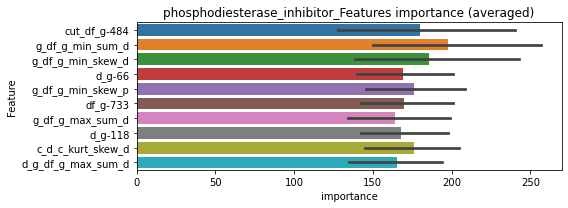

len(train_index) : 5658
len(valid_index) : 1887
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0193482	valid_1's binary_logloss: 0.0270004
[2000]	training's binary_logloss: 0.00996797	valid_1's binary_logloss: 0.020198
[3000]	training's binary_logloss: 0.00661335	valid_1's binary_logloss: 0.0176863
[4000]	training's binary_logloss: 0.00493678	valid_1's binary_logloss: 0.01661
[5000]	training's binary_logloss: 0.00394106	valid_1's binary_logloss: 0.0159812
[6000]	training's binary_logloss: 0.00328363	valid_1's binary_logloss: 0.0156157
Early stopping, best iteration is:
[6319]	training's binary_logloss: 0.00311745	valid_1's binary_logloss: 0.0155024


len(train_index) : 5659
len(valid_index) : 1886
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.018814	valid_1's binary_logloss: 0.0338987
[2000]	training's binary_logloss: 0.00966684	valid_1's binary_logloss: 0.0261805
[3000]	training's binary_logloss: 0.00643729	valid_1's binary_logloss: 0.0236258
[4000]	training's binary_logloss: 0.00479841	valid_1's binary_logloss: 0.0223685
Early stopping, best iteration is:
[4283]	training's binary_logloss: 0.004474	valid_1's binary_logloss: 0.0221327


len(train_index) : 5659
len(valid_index) : 1886
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0188362	valid_1's binary_logloss: 0.0313502
[2000]	training's binary_logloss: 0.00972858	valid_1's binary_logloss: 0.0242146
[3000]	training's binary_logloss: 0.00651786	valid_1's binary_logloss: 0.0219353
Early stopping, best iteration is:
[3893]	training's binary_logloss: 0.00500664	valid_1's binary_logloss: 0.0209101


len(train_index) : 5659
len(valid_index) : 1886
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0188719	valid_1's binary_logloss: 0.0352774
[2000]	training's binary_logloss: 0.00973644	valid_1's binary_logloss: 0.0277259
Early stopping, best iteration is:
[2941]	training's binary_logloss: 0.00663071	valid_1's binary_logloss: 0.0254408


phosphodiesterase_inhibitor logloss: 0.020995740270040177
phospholipase_inhibitor, len(trt): 25, len(othr): 3288
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3288


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000318152	valid_1's binary_logloss: 0.0125545
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000386671	valid_1's binary_logloss: 0.0230313
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.00071243	valid_1's binary_logloss: 0.00836738
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013946, Threshold: 0.0043190, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0043190, conf_0:0.00302, conf_1:0.00561
Num_p_label: 2.0, Expected: 4.2, Adj_threshold_1: 0.0343190


Early stopping, best iteration is:
[439]	training's binary_logloss: 0.00038723	valid_1's binary_logloss: 0.00815636


threshold: 0.0343190, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.000409304	valid_1's binary_logloss: 0.00947098
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000459038	valid_1's binary_logloss: 0.0226603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000454046	valid_1's binary_logloss: 0.00744095
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0064666, Threshold: 0.0343190, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00105
Num_p_label: 5.0, Expected: 4.2, Threshold: 0.0343190, conf_0:0.02746, conf_1:0.04118
threshold: 0.0343190, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000333361	valid_1's binary_logloss: 0.00756746


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.000409304	valid_1's binary_logloss: 0.00947098
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000459038	valid_1's binary_logloss: 0.0226603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000454046	valid_1's binary_logloss: 0.00744095
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0064666, Threshold: 0.0343190, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00105
Num_p_label: 5.0, Expected: 4.2, Threshold: 0.0343190, conf_0:0.03089, conf_1:0.03775
threshold: 0.0343190, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000333361	valid_1's binary_logloss: 0.00756746


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


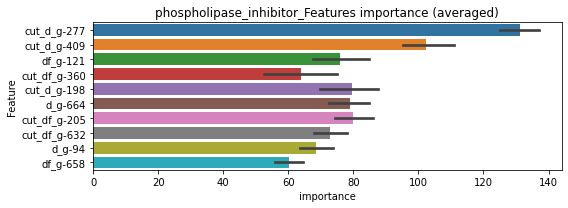

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000410506	valid_1's binary_logloss: 0.00871046
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Early stopping, best iteration is:
[196]	training's binary_logloss: 0.00108373	valid_1's binary_logloss: 0.0188502
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 phospholipase_inhibitor=================================


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000441871	valid_1's binary_logloss: 0.00667552
Training until validation scores don't improve for 30 rounds


phospholipase_inhibitor logloss: 0.010114572676290621


Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000347872	valid_1's binary_logloss: 0.00622361
mutually exclusive columns: pi3k_inhibitor


pi3k_inhibitor, len(trt): 151, len(othr): 3714
target_rate: 0.0063408 → Adj_target_rate: 0.0059749


selected negative label: 3714


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.044221	valid_1's binary_logloss: 0.1293
Early stopping, best iteration is:
[1963]	training's binary_logloss: 0.0218969	valid_1's binary_logloss: 0.120159
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0427106	valid_1's binary_logloss: 0.148783
Early stopping, best iteration is:
[1076]	training's binary_logloss: 0.0397313	valid_1's binary_logloss: 0.147626
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0448557	valid_1's binary_logloss: 0.120414
Early stopping, best iteration is:
[1542]	training's binary_logloss: 0.028667	valid_1's binary_logloss: 0.113423
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0448716	valid_1's binary_logloss: 0.116242
[2000]	training's binary_logloss: 0.0217443	valid_1's binary_logloss: 0.107586
Early stopping, best it

1 / 3, AUC score:0.975, PR-AUC:0.947
y_Threshold: 0.0570545, Threshold: 0.0946373, pos_neg_ratio: 0.8000000
Remove_noisy_data: 282 → Positive_corect_labels: 676/4174
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, Expected: 25.2, Threshold: 0.0946373, conf_0:0.06625, conf_1:0.12303
Num_p_label: 10.0, Expected: 25.2, Adj_threshold_1: 0.1246373
threshold: 0.1246373, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 676.0/4174, y_label_rate: 0.1619550
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0316926	valid_1's binary_logloss: 0.0886497
Early stopping, best iteration is:
[1722]	training's binary_logloss: 0.0181285	valid_1's binary_logloss: 0.081077
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319095	valid_1's binary_logloss: 0.0865877
[2000]	training's binary_logloss: 0.0156413	valid_1's binary_logloss: 0.0782413
Early stopping, best iteration is:
[2105]	training's binary_logloss: 0.0148231	valid_1's binary_logloss: 0.0779198
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0323045	valid_1's binary_logloss: 0.0753043
[2000]	training's binary_logloss: 0.0158444	valid_1's binary_logloss: 0.0656359
Early stopping, best iteration is:
[2793]	training's binary_logloss: 0.0111705	valid_1's binary_logloss: 0.0628723
Training until validation scores don't improve for 30 rounds
[1000]	train

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0547700, Threshold: 0.1246373, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 649.0/4120
p_label_rate: 0.0027624 Vs.target_rate: 0.00634
Num_p_label: 11.0, Expected: 25.2, Threshold: 0.1246373, conf_0:0.09971, conf_1:0.14956
threshold: 0.1246373, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 649.0/4120, y_label_rate: 0.1575243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270905	valid_1's binary_logloss: 0.0653037
[2000]	training's binary_logloss: 0.0133944	valid_1's binary_logloss: 0.0561861
Early stopping, best iteration is:
[2102]	training's binary_logloss: 0.0127329	valid_1's binary_logloss: 0.055705
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0269864	valid_1's binary_logloss: 0.0659263
[2000]	training's binary_logloss: 0.0133652	valid_1's binary_logloss: 0.056738
Early stopping, best iteration is:
[2103]	training's binary_logloss: 0.0126657	valid_1's binary_logloss: 0.0563054
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0278647	valid_1's binary_logloss: 0.0549231
[2000]	training's binary_logloss: 0.013748	valid_1's binary_logloss: 0.0450471
[3000]	training's binary_logloss: 0.00904248	valid_1's binary_logloss: 0.0420989
Early stopping, best iteratio

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0535153, Threshold: 0.1246373, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 633.0/4088
p_label_rate: 0.0010045 Vs.target_rate: 0.00634
Num_p_label: 4.0, Expected: 25.2, Threshold: 0.1246373, conf_0:0.11217, conf_1:0.13710
threshold: 0.1246373, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 633.0/4088, y_label_rate: 0.1548434


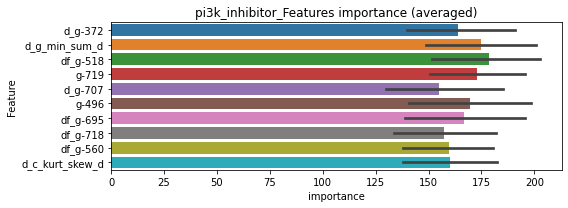

len(train_index) : 3066
len(valid_index) : 1022
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0332641	valid_1's binary_logloss: 0.0708816
[2000]	training's binary_logloss: 0.01707	valid_1's binary_logloss: 0.0581142
[3000]	training's binary_logloss: 0.0113557	valid_1's binary_logloss: 0.0536299
Early stopping, best iteration is:
[3227]	training's binary_logloss: 0.0105469	valid_1's binary_logloss: 0.0530734


len(train_index) : 3066
len(valid_index) : 1022
================================= fold 2/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0339342	valid_1's binary_logloss: 0.0566439
[2000]	training's binary_logloss: 0.0173742	valid_1's binary_logloss: 0.0433302
[3000]	training's binary_logloss: 0.0115704	valid_1's binary_logloss: 0.0386139
[4000]	training's binary_logloss: 0.00864073	valid_1's binary_logloss: 0.0364354
Early stopping, best iteration is:
[4221]	training's binary_logloss: 0.0081838	valid_1's binary_logloss: 0.036051


len(train_index) : 3066
len(valid_index) : 1022
================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0347371	valid_1's binary_logloss: 0.0535511
[2000]	training's binary_logloss: 0.0178197	valid_1's binary_logloss: 0.0398018
[3000]	training's binary_logloss: 0.0118508	valid_1's binary_logloss: 0.0349737
[4000]	training's binary_logloss: 0.00884101	valid_1's binary_logloss: 0.0329105
[5000]	training's binary_logloss: 0.0070837	valid_1's binary_logloss: 0.0318127
Early stopping, best iteration is:
[5593]	training's binary_logloss: 0.00631765	valid_1's binary_logloss: 0.0312253


len(train_index) : 3066
len(valid_index) : 1022
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0340411	valid_1's binary_logloss: 0.0597799
[2000]	training's binary_logloss: 0.0174035	valid_1's binary_logloss: 0.0464974
[3000]	training's binary_logloss: 0.0116278	valid_1's binary_logloss: 0.0420231
Early stopping, best iteration is:
[3495]	training's binary_logloss: 0.00995884	valid_1's binary_logloss: 0.0407409


pi3k_inhibitor logloss: 0.040272634867709746
pi3k_inhibitor is unpredictable(><)!
pkc_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3284


N_features:503
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00204225	valid_1's binary_logloss: 0.0336463
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000437422	valid_1's binary_logloss: 0.0146548
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000616437	valid_1's binary_logloss: 0.00508472
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0031074, Threshold: 0.0058029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0058029, conf_0:0.00406, conf_1:0.00754
Num_p_label: 1.0, Expected: 5.2, Adj_threshold_1: 0.0358029


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00038371	valid_1's binary_logloss: 0.0188937


threshold: 0.0358029, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00110627	valid_1's binary_logloss: 0.0340149
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000443264	valid_1's binary_logloss: 0.0163299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000500326	valid_1's binary_logloss: 0.00452076
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0099087, Threshold: 0.0358029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0005023 Vs.target_rate: 0.00130
Num_p_label: 2.0, Expected: 5.2, Threshold: 0.0358029, conf_0:0.02864, conf_1:0.04296
threshold: 0.0358029, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00038064	valid_1's binary_logloss: 0.0180741


positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000446437	valid_1's binary_logloss: 0.0245107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000549205	valid_1's binary_logloss: 0.00774855
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000357979	valid_1's binary_logloss: 0.00793303
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0128631, Threshold: 0.0358029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0002511 Vs.target_rate: 0.00130
Num_p_label: 1.0, Expected: 5.2, Threshold: 0.0358029, conf_0:0.03222, conf_1:0.03938
threshold: 0.0358029, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000374066	valid_1's binary_logloss: 0.020092


positive_y_label: 655.0/3806, y_label_rate: 0.1720967


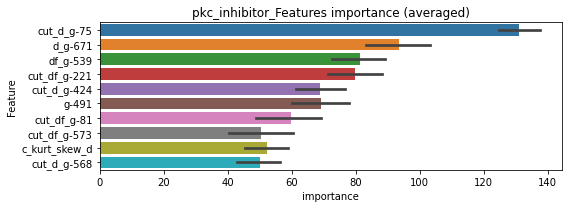

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 pkc_inhibitor=================================


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000488834	valid_1's binary_logloss: 0.0198525
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951


Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000389406	valid_1's binary_logloss: 0.00589395


================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000370053	valid_1's binary_logloss: 0.00684414


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds


pkc_inhibitor logloss: 0.011837660139510537


Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000381148	valid_1's binary_logloss: 0.0147578


potassium_channel_activator, len(trt): 55, len(othr): 3279
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3279


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00114639	valid_1's binary_logloss: 0.0442055
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000922793	valid_1's binary_logloss: 0.02534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000645988	valid_1's binary_logloss: 0.0239679
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0037075, Threshold: 0.0350505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0350505, conf_0:0.02454, conf_1:0.04557


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000796234	valid_1's binary_logloss: 0.0437773


Num_p_label: 19.0, Expected: 9.2, Adj_threshold_1: 0.0650505
threshold: 0.0650505, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000610094	valid_1's binary_logloss: 0.0388688
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000909495	valid_1's binary_logloss: 0.0228507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00052718	valid_1's binary_logloss: 0.0210139
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0230896, Threshold: 0.0650505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0288800 Vs.target_rate: 0.00231
Num_p_label: 115.0, Expected: 9.2, Threshold: 0.0650505, conf_0:0.05204, conf_1:0.07806
Num_p_label: 95.0, Expected: 9.2, Adj_threshold_1: 0.0950505
Num_p_label: 89.0, Expected: 9.2, Adj_threshold_2: 0.1250505
Num_p_label: 81.0, Expected: 9.2, Adj_threshold_3: 0.1550505
Num_p_label: 70.0, Expected: 9.2, Adj_threshold_4: 0.1850505
Num_p_label: 69.0, Expected: 9.2, Adj_threshold_5: 0.2150505


Early stopping, best iteration is:
[396]	training's binary_logloss: 0.00101904	valid_1's binary_logloss: 0.03943


Num_p_label: 63.0, Expected: 9.2, Adj_threshold_6: 0.2450505
Num_p_label: 56.0, Expected: 9.2, Adj_threshold_7: 0.2750505
Num_p_label: 52.0, Expected: 9.2, Adj_threshold_8: 0.3050505
Num_p_label: 47.0, Expected: 9.2, Adj_threshold_9: 0.3350505
Num_p_label: 45.0, Expected: 9.2, Adj_threshold_10: 0.3650505
threshold: 0.3650505, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 646.0/3784, y_label_rate: 0.1707188
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000785652	valid_1's binary_logloss: 0.0329846
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000709989	valid_1's binary_logloss: 0.0318775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000632864	valid_1's binary_logloss: 0.0214388
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0312087, Threshold: 0.3650505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 639.0/3770
p_label_rate: 0.0153189 Vs.target_rate: 0.00231
Num_p_label: 61.0, Expected: 9.2, Threshold: 0.3650505, conf_0:0.32855, conf_1:0.40156


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000663951	valid_1's binary_logloss: 0.0176178


Num_p_label: 60.0, Expected: 9.2, Adj_threshold_1: 0.3950505
Num_p_label: 57.0, Expected: 9.2, Adj_threshold_2: 0.4250505
Num_p_label: 53.0, Expected: 9.2, Adj_threshold_3: 0.4550505
Num_p_label: 49.0, Expected: 9.2, Adj_threshold_4: 0.4850505
Num_p_label: 42.0, Expected: 9.2, Adj_threshold_5: 0.5150505
Num_p_label: 37.0, Expected: 9.2, Adj_threshold_6: 0.5450505
Num_p_label: 36.0, Expected: 9.2, Adj_threshold_7: 0.5750505
Num_p_label: 35.0, Expected: 9.2, Adj_threshold_8: 0.6050505
Num_p_label: 32.0, Expected: 9.2, Adj_threshold_9: 0.6350505
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_10: 0.6650505
threshold: 0.6650505, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 639.0/3770, y_label_rate: 0.1694960


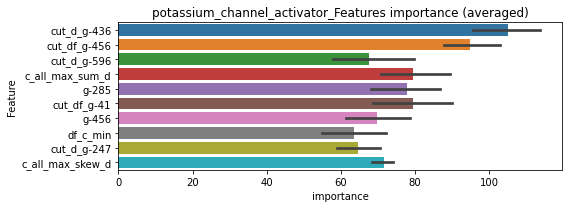

len(train_index) : 2827
len(valid_index) : 943
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2827
len(valid_index) : 943
================================= fold 2/4 potassium_channel_activator=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000566984	valid_1's binary_logloss: 0.0103723
Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 942
================================= fold 3/4 potassium_channel_activator=================================


Early stopping, best iteration is:
[364]	training's binary_logloss: 0.000841158	valid_1's binary_logloss: 0.0226002
Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 942
================================= fold 4/4 potassium_channel_activator=================================


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.000866912	valid_1's binary_logloss: 0.0207004
Training until validation scores don't improve for 30 rounds


potassium_channel_activator logloss: 0.020944251655660648


Early stopping, best iteration is:
[281]	training's binary_logloss: 0.00111927	valid_1's binary_logloss: 0.0301135


potassium_channel_antagonist, len(trt): 98, len(othr): 3273
target_rate: 0.0041152 → Adj_target_rate: 0.0041375


selected negative label: 3273


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0343143	valid_1's binary_logloss: 0.104633
Early stopping, best iteration is:
[1722]	training's binary_logloss: 0.0195901	valid_1's binary_logloss: 0.097615
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0340443	valid_1's binary_logloss: 0.103738
Early stopping, best iteration is:
[1543]	training's binary_logloss: 0.0217852	valid_1's binary_logloss: 0.0993602
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.036784	valid_1's binary_logloss: 0.0715045
[2000]	training's binary_logloss: 0.017801	valid_1's binary_logloss: 0.0615171
[3000]	training's binary_logloss: 0.0115298	valid_1's binary_logloss: 0.0579851
[4000]	training's binary_logloss: 0.00852784	valid_1's binary_logloss: 0.0563841
Early stopping, best iteration is:
[4173]	training's binary_logloss: 0.0081602	valid_1's binary_logloss: 0.0561

1 / 3, AUC score:0.989, PR-AUC:0.975
y_Threshold: 0.0387785, Threshold: 0.0670771, pos_neg_ratio: 0.8000000
Remove_noisy_data: 194 → Positive_corect_labels: 623/3733
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, Expected: 16.4, Threshold: 0.0670771, conf_0:0.04695, conf_1:0.08720
Num_p_label: 16.0, Expected: 16.4, Adj_threshold_1: 0.0970771
threshold: 0.0970771, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 623.0/3733, y_label_rate: 0.1668899
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0272317	valid_1's binary_logloss: 0.0747729
[2000]	training's binary_logloss: 0.0134427	valid_1's binary_logloss: 0.0673241
Early stopping, best iteration is:
[2104]	training's binary_logloss: 0.0127462	valid_1's binary_logloss: 0.0669599
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0281297	valid_1's binary_logloss: 0.0693092
[2000]	training's binary_logloss: 0.0138494	valid_1's binary_logloss: 0.0609906
[3000]	training's binary_logloss: 0.00907754	valid_1's binary_logloss: 0.0580163
Early stopping, best iteration is:
[3063]	training's binary_logloss: 0.00888752	valid_1's binary_logloss: 0.057878
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0298778	valid_1's binary_logloss: 0.0453635
[2000]	training's binary_logloss: 0.0147188	valid_1's binary_logloss: 0.0344472
[3000]	training's binary_l

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0465895, Threshold: 0.0970771, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 609.0/3705
p_label_rate: 0.0055249 Vs.target_rate: 0.00412
Num_p_label: 22.0, Expected: 16.4, Threshold: 0.0970771, conf_0:0.07766, conf_1:0.11649
threshold: 0.0970771, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 609.0/3705, y_label_rate: 0.1643725
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0240525	valid_1's binary_logloss: 0.0726417
Early stopping, best iteration is:
[1532]	training's binary_logloss: 0.0157295	valid_1's binary_logloss: 0.0674921
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0244835	valid_1's binary_logloss: 0.0700775
Early stopping, best iteration is:
[1728]	training's binary_logloss: 0.0140963	valid_1's binary_logloss: 0.0640584
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0262228	valid_1's binary_logloss: 0.0446628
[2000]	training's binary_logloss: 0.0129599	valid_1's binary_logloss: 0.0354744
[3000]	training's binary_logloss: 0.00854776	valid_1's binary_logloss: 0.0324376
Early stopping, best iteration is:
[3956]	training's binary_logloss: 0.00645462	valid_1's binary_logloss: 0.0310417
Training until validation scores don't improve for 30 rounds
[1000]	tr

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0446973, Threshold: 0.0970771, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 597.0/3681
p_label_rate: 0.0047715 Vs.target_rate: 0.00412
Num_p_label: 19.0, Expected: 16.4, Threshold: 0.0970771, conf_0:0.08737, conf_1:0.10678
threshold: 0.0970771, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 597.0/3681, y_label_rate: 0.1621842


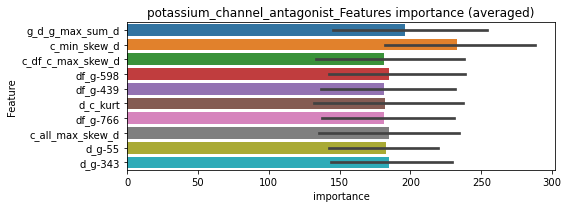

len(train_index) : 2760
len(valid_index) : 921
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317859	valid_1's binary_logloss: 0.0620991
[2000]	training's binary_logloss: 0.0163514	valid_1's binary_logloss: 0.0513878
[3000]	training's binary_logloss: 0.0108679	valid_1's binary_logloss: 0.0480096
[4000]	training's binary_logloss: 0.00813393	valid_1's binary_logloss: 0.0463795
Early stopping, best iteration is:
[4273]	training's binary_logloss: 0.0076066	valid_1's binary_logloss: 0.04617


len(train_index) : 2761
len(valid_index) : 920
================================= fold 2/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0320134	valid_1's binary_logloss: 0.0630803
[2000]	training's binary_logloss: 0.0164871	valid_1's binary_logloss: 0.0510717
[3000]	training's binary_logloss: 0.0109538	valid_1's binary_logloss: 0.0470591
Early stopping, best iteration is:
[3323]	training's binary_logloss: 0.00986545	valid_1's binary_logloss: 0.0462716


len(train_index) : 2761
len(valid_index) : 920
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0333624	valid_1's binary_logloss: 0.0535055
[2000]	training's binary_logloss: 0.0171436	valid_1's binary_logloss: 0.0409053
[3000]	training's binary_logloss: 0.0114002	valid_1's binary_logloss: 0.0364433
[4000]	training's binary_logloss: 0.00850491	valid_1's binary_logloss: 0.0340739
[5000]	training's binary_logloss: 0.00680749	valid_1's binary_logloss: 0.0328194
Early stopping, best iteration is:
[5706]	training's binary_logloss: 0.00595455	valid_1's binary_logloss: 0.0320867


len(train_index) : 2761
len(valid_index) : 920
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0329236	valid_1's binary_logloss: 0.0561683
[2000]	training's binary_logloss: 0.0170066	valid_1's binary_logloss: 0.043785
[3000]	training's binary_logloss: 0.0113234	valid_1's binary_logloss: 0.0397354
[4000]	training's binary_logloss: 0.00848399	valid_1's binary_logloss: 0.03763
Early stopping, best iteration is:
[4367]	training's binary_logloss: 0.00776445	valid_1's binary_logloss: 0.0371378


potassium_channel_antagonist logloss: 0.0404180799989548
potassium_channel_antagonist is unpredictable(><)!
ppar_receptor_agonist, len(trt): 115, len(othr): 3276
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 3276


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0372427	valid_1's binary_logloss: 0.126032
Early stopping, best iteration is:
[1662]	training's binary_logloss: 0.0220534	valid_1's binary_logloss: 0.120869
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0389487	valid_1's binary_logloss: 0.114369
Early stopping, best iteration is:
[1913]	training's binary_logloss: 0.0198977	valid_1's binary_logloss: 0.105016
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0410819	valid_1's binary_logloss: 0.0854694
[2000]	training's binary_logloss: 0.0201227	valid_1's binary_logloss: 0.0755621
Early stopping, best iteration is:
[2765]	training's binary_logloss: 0.0142714	valid_1's binary_logloss: 0.0724249
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.038784	valid_1's binary_logloss: 0.107935
Early stopping, b

1 / 3, AUC score:0.983, PR-AUC:0.965
y_Threshold: 0.0479672, Threshold: 0.0975733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 208 → Positive_corect_labels: 617/3723
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.0975733, conf_0:0.06830, conf_1:0.12685
Num_p_label: 7.0, Expected: 19.2, Adj_threshold_1: 0.1275733
threshold: 0.1275733, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 617.0/3723, y_label_rate: 0.1657266
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0304284	valid_1's binary_logloss: 0.0832107
[2000]	training's binary_logloss: 0.0150128	valid_1's binary_logloss: 0.0742781
Early stopping, best iteration is:
[2111]	training's binary_logloss: 0.0141898	valid_1's binary_logloss: 0.0738305
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.031114	valid_1's binary_logloss: 0.0693268
[2000]	training's binary_logloss: 0.0153135	valid_1's binary_logloss: 0.0590211
[3000]	training's binary_logloss: 0.0100959	valid_1's binary_logloss: 0.0556877
Early stopping, best iteration is:
[3715]	training's binary_logloss: 0.00811785	valid_1's binary_logloss: 0.0542726
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0316166	valid_1's binary_logloss: 0.0664948
[2000]	training's binary_logloss: 0.0155302	valid_1's binary_logloss: 0.0554572
[3000]	training's binary_lo

2 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0578659, Threshold: 0.1275733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 596.0/3681
p_label_rate: 0.0062783 Vs.target_rate: 0.00483
Num_p_label: 25.0, Expected: 19.2, Threshold: 0.1275733, conf_0:0.10206, conf_1:0.15309
threshold: 0.1275733, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 596.0/3681, y_label_rate: 0.1619125
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270753	valid_1's binary_logloss: 0.0559334
[2000]	training's binary_logloss: 0.0134346	valid_1's binary_logloss: 0.0470764
Early stopping, best iteration is:
[2293]	training's binary_logloss: 0.0116925	valid_1's binary_logloss: 0.0459494
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0259063	valid_1's binary_logloss: 0.0711546
Early stopping, best iteration is:
[1831]	training's binary_logloss: 0.0140996	valid_1's binary_logloss: 0.0642028
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0268143	valid_1's binary_logloss: 0.0576344
[2000]	training's binary_logloss: 0.0133164	valid_1's binary_logloss: 0.0477448
[3000]	training's binary_logloss: 0.00885651	valid_1's binary_logloss: 0.0442468
Early stopping, best iteration is:
[3614]	training's binary_logloss: 0.00734316	valid_1's binary_logloss: 

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0550095, Threshold: 0.1275733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 581.0/3651
p_label_rate: 0.0070316 Vs.target_rate: 0.00483
Num_p_label: 28.0, Expected: 19.2, Threshold: 0.1275733, conf_0:0.11482, conf_1:0.14033
threshold: 0.1275733, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 581.0/3651, y_label_rate: 0.1591345


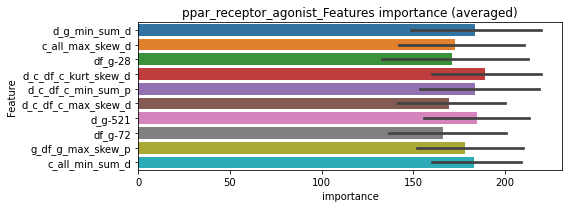

len(train_index) : 2738
len(valid_index) : 913
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0326032	valid_1's binary_logloss: 0.0662621
[2000]	training's binary_logloss: 0.01662	valid_1's binary_logloss: 0.0534409
[3000]	training's binary_logloss: 0.0111106	valid_1's binary_logloss: 0.0493273
Early stopping, best iteration is:
[3335]	training's binary_logloss: 0.00999032	valid_1's binary_logloss: 0.048633


len(train_index) : 2738
len(valid_index) : 913
================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0337871	valid_1's binary_logloss: 0.0553688
[2000]	training's binary_logloss: 0.0173373	valid_1's binary_logloss: 0.0423238
[3000]	training's binary_logloss: 0.0116225	valid_1's binary_logloss: 0.0376877
[4000]	training's binary_logloss: 0.00871353	valid_1's binary_logloss: 0.0352632
[5000]	training's binary_logloss: 0.00699217	valid_1's binary_logloss: 0.0339607
Early stopping, best iteration is:
[5552]	training's binary_logloss: 0.0063012	valid_1's binary_logloss: 0.0333325


len(train_index) : 2738
len(valid_index) : 913
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0343235	valid_1's binary_logloss: 0.0599337
[2000]	training's binary_logloss: 0.0176121	valid_1's binary_logloss: 0.0459119
[3000]	training's binary_logloss: 0.011776	valid_1's binary_logloss: 0.0409977
Early stopping, best iteration is:
[3332]	training's binary_logloss: 0.0105981	valid_1's binary_logloss: 0.0399999


len(train_index) : 2739
len(valid_index) : 912
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0331844	valid_1's binary_logloss: 0.0635078
[2000]	training's binary_logloss: 0.0170304	valid_1's binary_logloss: 0.0513921
[3000]	training's binary_logloss: 0.0113673	valid_1's binary_logloss: 0.0475791
Early stopping, best iteration is:
[3395]	training's binary_logloss: 0.0100218	valid_1's binary_logloss: 0.04669


ppar_receptor_agonist logloss: 0.04216257853079391
ppar_receptor_agonist is unpredictable(><)!
ppar_receptor_antagonist, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000428645	valid_1's binary_logloss: 0.00961736
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000463556	valid_1's binary_logloss: 0.0256412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000352903	valid_1's binary_logloss: 0.0079621
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013276, Threshold: 0.0024752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000348412	valid_1's binary_logloss: 0.0106789


p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0024752, conf_0:0.00173, conf_1:0.00322
Num_p_label: 0.0, Expected: 5.0, Adj_threshold_1: 0.0324752
threshold: 0.0324752, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000426366	valid_1's binary_logloss: 0.00937174
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.00173986	valid_1's binary_logloss: 0.0272316
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000342966	valid_1's binary_logloss: 0.008215
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0235179, Threshold: 0.0324752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00126
Num_p_label: 0.0, Expected: 5.0, Threshold: 0.0324752, conf_0:0.02598, conf_1:0.03897


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000357375	valid_1's binary_logloss: 0.00971989


threshold: 0.0324752, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.000541278	valid_1's binary_logloss: 0.0217229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000337766	valid_1's binary_logloss: 0.00441542
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000337217	valid_1's binary_logloss: 0.0061221
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0137113, Threshold: 0.0324752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0000000 Vs.target_rate: 0.00126
Num_p_label: 0.0, Expected: 5.0, Threshold: 0.0324752, conf_0:0.02923, conf_1:0.03572
threshold: 0.0324752, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000401752	valid_1's binary_logloss: 0.0201692


positive_y_label: 655.0/3806, y_label_rate: 0.1720967


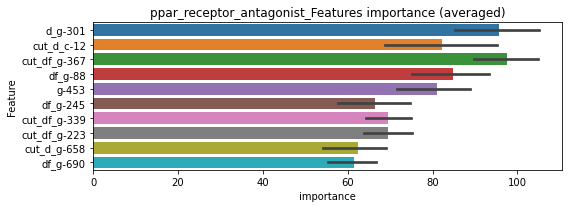

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 ppar_receptor_antagonist=================================


Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000342774	valid_1's binary_logloss: 0.0123543
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855


Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000341476	valid_1's binary_logloss: 0.00485055


len(valid_index) : 951
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000338339	valid_1's binary_logloss: 0.00618839


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


ppar_receptor_antagonist logloss: 0.010036526468879405


Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000862167	valid_1's binary_logloss: 0.0167524


progesterone_receptor_agonist, len(trt): 119, len(othr): 3268
target_rate: 0.0049971 → Adj_target_rate: 0.0048799


selected negative label: 3268


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.039368	valid_1's binary_logloss: 0.136139
Early stopping, best iteration is:
[1184]	training's binary_logloss: 0.0332799	valid_1's binary_logloss: 0.134043
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0412284	valid_1's binary_logloss: 0.112831
Early stopping, best iteration is:
[1647]	training's binary_logloss: 0.024737	valid_1's binary_logloss: 0.10643
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.042364	valid_1's binary_logloss: 0.101716
[2000]	training's binary_logloss: 0.0206511	valid_1's binary_logloss: 0.0903252
[3000]	training's binary_logloss: 0.0134341	valid_1's binary_logloss: 0.086428
Early stopping, best iteration is:
[3187]	training's binary_logloss: 0.0126076	valid_1's binary_logloss: 0.0859415
Training until validation scores don't improve for 30 rounds
[1000]	training's bin

1 / 3, AUC score:0.982, PR-AUC:0.963
y_Threshold: 0.0506302, Threshold: 0.2323908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 216 → Positive_corect_labels: 611/3705
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, Expected: 19.9, Threshold: 0.2323908, conf_0:0.16267, conf_1:0.30211
Num_p_label: 31.0, Expected: 19.9, Adj_threshold_1: 0.2623908
Num_p_label: 26.0, Expected: 19.9, Adj_threshold_2: 0.2923908
threshold: 0.2923908, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 611.0/3705, y_label_rate: 0.1649123
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0324276	valid_1's binary_logloss: 0.0819769
Early stopping, best iteration is:
[1830]	training's binary_logloss: 0.0174925	valid_1's binary_logloss: 0.0718877
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0309463	valid_1's binary_logloss: 0.0988171
Early stopping, best iteration is:
[1758]	training's binary_logloss: 0.0174416	valid_1's binary_logloss: 0.091618
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.033299	valid_1's binary_logloss: 0.0647633
[2000]	training's binary_logloss: 0.016504	valid_1's binary_logloss: 0.0545917
Early stopping, best iteration is:
[2291]	training's binary_logloss: 0.0143371	valid_1's binary_logloss: 0.0532063
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.032319	valid_1's binary_logloss: 0.0721795
[2000]	training

2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0726660, Threshold: 0.2923908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 582.0/3647
p_label_rate: 0.0231040 Vs.target_rate: 0.00500
Num_p_label: 92.0, Expected: 19.9, Threshold: 0.2923908, conf_0:0.23391, conf_1:0.35087
Num_p_label: 80.0, Expected: 19.9, Adj_threshold_1: 0.3223908
Num_p_label: 75.0, Expected: 19.9, Adj_threshold_2: 0.3523908
Num_p_label: 66.0, Expected: 19.9, Adj_threshold_3: 0.3823908
Num_p_label: 56.0, Expected: 19.9, Adj_threshold_4: 0.4123908
Num_p_label: 49.0, Expected: 19.9, Adj_threshold_5: 0.4423908
Num_p_label: 42.0, Expected: 19.9, Adj_threshold_6: 0.4723908
Num_p_label: 31.0, Expected: 19.9, Adj_threshold_7: 0.5023908
Num_p_label: 23.0, Expected: 19.9, Adj_threshold_8: 0.5323908
threshold: 0.5323908, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 582.0/3647, y_label_rate: 0.1595832
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.024564	valid_1's binary_logloss: 0.0705419
[2000]	training's binary_logloss: 0.0122903	valid_1's binary_logloss: 0.0628275
Early stopping, best iteration is:
[2116]	training's binary_logloss: 0.011607	valid_1's binary_logloss: 0.062555
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0263476	valid_1's binary_logloss: 0.0566547
[2000]	training's binary_logloss: 0.0131213	valid_1's binary_logloss: 0.0459374
[3000]	training's binary_logloss: 0.00870396	valid_1's binary_logloss: 0.0423471
[4000]	training's binary_logloss: 0.0065095	valid_1's binary_logloss: 0.0404238
Early stopping, best iteration is:
[4150]	training's binary_logloss: 0.00627323	valid_1's binary_logloss: 0.0401935
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0257953	valid_1's binary_logloss: 0.0579271
[2000]	training's binary_log

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0610140, Threshold: 0.5323908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 562.0/3607
p_label_rate: 0.0123054 Vs.target_rate: 0.00500
Num_p_label: 49.0, Expected: 19.9, Threshold: 0.5323908, conf_0:0.47915, conf_1:0.58563
Num_p_label: 45.0, Expected: 19.9, Adj_threshold_1: 0.5623908
Num_p_label: 38.0, Expected: 19.9, Adj_threshold_2: 0.5923908
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_3: 0.6223908
threshold: 0.6223908, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 562.0/3607, y_label_rate: 0.1558082


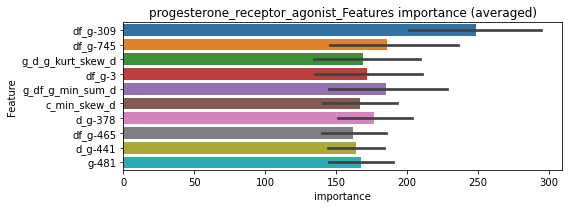

len(train_index) : 2705
len(valid_index) : 902
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0308855	valid_1's binary_logloss: 0.0543813
[2000]	training's binary_logloss: 0.0158506	valid_1's binary_logloss: 0.040567
[3000]	training's binary_logloss: 0.0105995	valid_1's binary_logloss: 0.0356649
[4000]	training's binary_logloss: 0.0079611	valid_1's binary_logloss: 0.0333006
[5000]	training's binary_logloss: 0.00637709	valid_1's binary_logloss: 0.0319661
[6000]	training's binary_logloss: 0.00533623	valid_1's binary_logloss: 0.0309755
Early stopping, best iteration is:
[6847]	training's binary_logloss: 0.00469025	valid_1's binary_logloss: 0.0304942


len(train_index) : 2705
len(valid_index) : 902
================================= fold 2/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0300263	valid_1's binary_logloss: 0.0548306
[2000]	training's binary_logloss: 0.0153765	valid_1's binary_logloss: 0.0413204
[3000]	training's binary_logloss: 0.0102957	valid_1's binary_logloss: 0.036903
[4000]	training's binary_logloss: 0.00775134	valid_1's binary_logloss: 0.0346586
[5000]	training's binary_logloss: 0.0062171	valid_1's binary_logloss: 0.0334119
Early stopping, best iteration is:
[5320]	training's binary_logloss: 0.00585003	valid_1's binary_logloss: 0.0331126


len(train_index) : 2705
len(valid_index) : 902
================================= fold 3/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0306297	valid_1's binary_logloss: 0.050851
[2000]	training's binary_logloss: 0.0158033	valid_1's binary_logloss: 0.0359674
[3000]	training's binary_logloss: 0.0105861	valid_1's binary_logloss: 0.0307379
[4000]	training's binary_logloss: 0.00794701	valid_1's binary_logloss: 0.0280681
[5000]	training's binary_logloss: 0.00637385	valid_1's binary_logloss: 0.0265245
[6000]	training's binary_logloss: 0.00532754	valid_1's binary_logloss: 0.0254131
Early stopping, best iteration is:
[6666]	training's binary_logloss: 0.00481009	valid_1's binary_logloss: 0.0248642


len(train_index) : 2706
len(valid_index) : 901
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0306005	valid_1's binary_logloss: 0.0487654
[2000]	training's binary_logloss: 0.0157062	valid_1's binary_logloss: 0.0346025
[3000]	training's binary_logloss: 0.0105148	valid_1's binary_logloss: 0.0297708
[4000]	training's binary_logloss: 0.00790892	valid_1's binary_logloss: 0.0274728
[5000]	training's binary_logloss: 0.00635143	valid_1's binary_logloss: 0.0261435
[6000]	training's binary_logloss: 0.00530018	valid_1's binary_logloss: 0.0251092
[7000]	training's binary_logloss: 0.00456067	valid_1's binary_logloss: 0.0245178
Early stopping, best iteration is:
[7228]	training's binary_logloss: 0.00442018	valid_1's binary_logloss: 0.0243593


progesterone_receptor_agonist logloss: 0.02820864483835357
progesterone_receptor_antagonist, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000293706	valid_1's binary_logloss: 0.00379365
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000287934	valid_1's binary_logloss: 0.0107616
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000350985	valid_1's binary_logloss: 0.00271125
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012879, Threshold: 0.0036385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0036385, conf_0:0.00255, conf_1:0.00473
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0336385
threshold: 0.0336385, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000298409	valid_1's binary_logloss: 0.00972789


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000259087	valid_1's binary_logloss: 0.00312745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000305267	valid_1's binary_logloss: 0.0090683
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000379527	valid_1's binary_logloss: 0.00267781
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0097176, Threshold: 0.0336385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, Expected: 3.0, Threshold: 0.0336385, conf_0:0.02691, conf_1:0.04037
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0636385
threshold: 0.0636385, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000284071	valid_1's binary_logloss: 0.00832245


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000259087	valid_1's binary_logloss: 0.00312745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000305267	valid_1's binary_logloss: 0.0090683
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000379527	valid_1's binary_logloss: 0.00267781
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0097176, Threshold: 0.0636385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0636385, conf_0:0.05727, conf_1:0.07000
threshold: 0.0636385, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000284071	valid_1's binary_logloss: 0.00832245


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


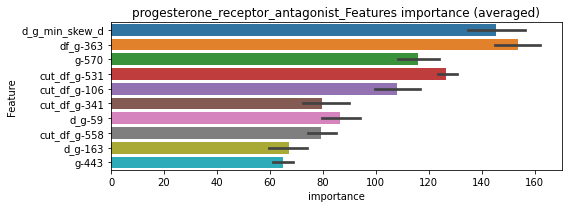

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000277348	valid_1's binary_logloss: 0.00225094
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 progesterone_receptor_antagonist=================================


Early stopping, best iteration is:
[228]	training's binary_logloss: 0.000672139	valid_1's binary_logloss: 0.00843534
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 progesterone_receptor_antagonist=================================


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000352469	valid_1's binary_logloss: 0.00269615
Training until validation scores don't improve for 30 rounds


progesterone_receptor_antagonist logloss: 0.004795296028228813


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000299195	valid_1's binary_logloss: 0.00579981


prostaglandin_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000541456	valid_1's binary_logloss: 0.0189483
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[279]	training's binary_logloss: 0.00140787	valid_1's binary_logloss: 0.035562
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.00146598	valid_1's binary_logloss: 0.0146063
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0030952, Threshold: 0.0081120, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000394317	valid_1's binary_logloss: 0.0195839


Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0081120, conf_0:0.00568, conf_1:0.01055
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.0381120
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0681120
threshold: 0.0681120, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.00173273	valid_1's binary_logloss: 0.0348856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000585744	valid_1's binary_logloss: 0.0142576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000478392	valid_1's binary_logloss: 0.00424637
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0114257, Threshold: 0.0681120, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.0681120, conf_0:0.05449, conf_1:0.08173


Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000503058	valid_1's binary_logloss: 0.0214503


threshold: 0.0681120, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000588944	valid_1's binary_logloss: 0.0277771
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000457967	valid_1's binary_logloss: 0.0109369
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000394822	valid_1's binary_logloss: 0.00633986
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0094918, Threshold: 0.0681120, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, Expected: 6.0, Threshold: 0.0681120, conf_0:0.06130, conf_1:0.07492
threshold: 0.0681120, positive_p_label: 10.0/3982, p_label_rate: 0.0025113


Early stopping, best iteration is:
[393]	training's binary_logloss: 0.000609739	valid_1's binary_logloss: 0.0177296


positive_y_label: 653.0/3802, y_label_rate: 0.1717517


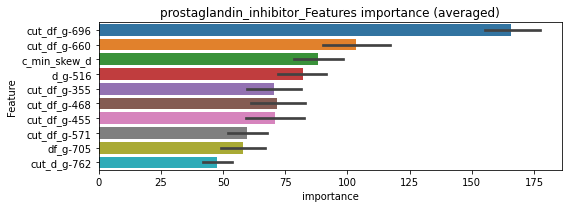

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000655311	valid_1's binary_logloss: 0.0211602
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000962304	valid_1's binary_logloss: 0.017955
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000522086	valid_1's binary_logloss: 0.0151047
Training until validation scores don't improve for 30 rounds


prostaglandin_inhibitor logloss: 0.015631500877116247


Early stopping, best iteration is:
[363]	training's binary_logloss: 0.000668449	valid_1's binary_logloss: 0.00829786


prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3278
target_rate: 0.0035273 → Adj_target_rate: 0.0036294


selected negative label: 3278


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0299255	valid_1's binary_logloss: 0.0925731
Early stopping, best iteration is:
[1540]	training's binary_logloss: 0.0193252	valid_1's binary_logloss: 0.0872349
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0305039	valid_1's binary_logloss: 0.0797872
[2000]	training's binary_logloss: 0.0148578	valid_1's binary_logloss: 0.0727604
Early stopping, best iteration is:
[2107]	training's binary_logloss: 0.0140614	valid_1's binary_logloss: 0.0722524
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0323195	valid_1's binary_logloss: 0.0653626
[2000]	training's binary_logloss: 0.0157893	valid_1's binary_logloss: 0.0554706
[3000]	training's binary_logloss: 0.0102652	valid_1's binary_logloss: 0.0522983
Early stopping, best iteration is:
[3819]	training's binary_logloss: 0.00797333	valid_1's binary_logloss: 0

1 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0347954, Threshold: 0.1253972, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 641/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, Expected: 14.0, Threshold: 0.1253972, conf_0:0.08778, conf_1:0.16302
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_1: 0.1553972
Num_p_label: 16.0, Expected: 14.0, Adj_threshold_2: 0.1853972
threshold: 0.1853972, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 641.0/3773, y_label_rate: 0.1698913
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0266702	valid_1's binary_logloss: 0.07467
[2000]	training's binary_logloss: 0.0131447	valid_1's binary_logloss: 0.0676292
Early stopping, best iteration is:
[2116]	training's binary_logloss: 0.0124012	valid_1's binary_logloss: 0.0672314
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273981	valid_1's binary_logloss: 0.0682387
[2000]	training's binary_logloss: 0.0134404	valid_1's binary_logloss: 0.0595703
Early stopping, best iteration is:
[2306]	training's binary_logloss: 0.0115745	valid_1's binary_logloss: 0.0585585
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273845	valid_1's binary_logloss: 0.0699479
[2000]	training's binary_logloss: 0.0135143	valid_1's binary_logloss: 0.0616407
Early stopping, best iteration is:
[2279]	training's binary_logloss: 0.0118205	valid_1's binary_logloss: 0.06

2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0542789, Threshold: 0.1853972, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 616.0/3723
p_label_rate: 0.0158212 Vs.target_rate: 0.00353
Num_p_label: 63.0, Expected: 14.0, Threshold: 0.1853972, conf_0:0.14832, conf_1:0.22248
Num_p_label: 58.0, Expected: 14.0, Adj_threshold_1: 0.2153972
Num_p_label: 54.0, Expected: 14.0, Adj_threshold_2: 0.2453972
Num_p_label: 48.0, Expected: 14.0, Adj_threshold_3: 0.2753972
Num_p_label: 44.0, Expected: 14.0, Adj_threshold_4: 0.3053972
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_5: 0.3353972
Num_p_label: 38.0, Expected: 14.0, Adj_threshold_6: 0.3653972
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_7: 0.3953972
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_8: 0.4253972
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_9: 0.4553972
Num_p_label: 18.0, Expected: 14.0, Adj_threshold_10: 0.4853972
threshold: 0.4853972, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
p

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0228616	valid_1's binary_logloss: 0.0436192
[2000]	training's binary_logloss: 0.0113352	valid_1's binary_logloss: 0.0338682
[3000]	training's binary_logloss: 0.00748883	valid_1's binary_logloss: 0.030539
[4000]	training's binary_logloss: 0.00559979	valid_1's binary_logloss: 0.0289605
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.00537803	valid_1's binary_logloss: 0.0287415
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0214884	valid_1's binary_logloss: 0.054347
[2000]	training's binary_logloss: 0.0106793	valid_1's binary_logloss: 0.046969
[3000]	training's binary_logloss: 0.00708742	valid_1's binary_logloss: 0.0447854
Early stopping, best iteration is:
[3010]	training's binary_logloss: 0.00706285	valid_1's binary_logloss: 0.0447665
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0623842, Threshold: 0.4853972, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 603.0/3697
p_label_rate: 0.0090407 Vs.target_rate: 0.00353
Num_p_label: 36.0, Expected: 14.0, Threshold: 0.4853972, conf_0:0.43686, conf_1:0.53394
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_1: 0.5153972
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_2: 0.5453972
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_3: 0.5753972
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_4: 0.6053972
Num_p_label: 16.0, Expected: 14.0, Adj_threshold_5: 0.6353972
threshold: 0.6353972, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 603.0/3697, y_label_rate: 0.1631052


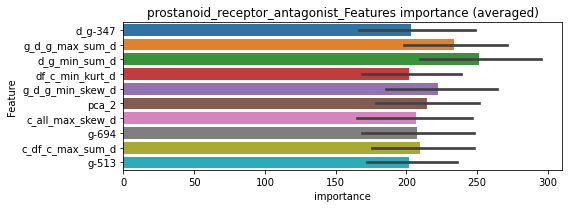

len(train_index) : 2772
len(valid_index) : 925
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0267403	valid_1's binary_logloss: 0.0596528
[2000]	training's binary_logloss: 0.0136175	valid_1's binary_logloss: 0.0498033
[3000]	training's binary_logloss: 0.00911472	valid_1's binary_logloss: 0.046886
Early stopping, best iteration is:
[3332]	training's binary_logloss: 0.00819946	valid_1's binary_logloss: 0.0462682


len(train_index) : 2773
len(valid_index) : 924
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285556	valid_1's binary_logloss: 0.0414893
[2000]	training's binary_logloss: 0.0145764	valid_1's binary_logloss: 0.0293514
[3000]	training's binary_logloss: 0.00974376	valid_1's binary_logloss: 0.0250161
[4000]	training's binary_logloss: 0.00730454	valid_1's binary_logloss: 0.0228658
[5000]	training's binary_logloss: 0.00586412	valid_1's binary_logloss: 0.0215985
[6000]	training's binary_logloss: 0.00490096	valid_1's binary_logloss: 0.0206654
[7000]	training's binary_logloss: 0.00422547	valid_1's binary_logloss: 0.02012
[8000]	training's binary_logloss: 0.00371558	valid_1's binary_logloss: 0.0196643
Early stopping, best iteration is:
[8086]	training's binary_logloss: 0.00367692	valid_1's binary_logloss: 0.0196195


len(train_index) : 2773
len(valid_index) : 924
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0287339	valid_1's binary_logloss: 0.0397272
[2000]	training's binary_logloss: 0.0145626	valid_1's binary_logloss: 0.0276778
[3000]	training's binary_logloss: 0.00971803	valid_1's binary_logloss: 0.0236425
[4000]	training's binary_logloss: 0.00728622	valid_1's binary_logloss: 0.0216606
[5000]	training's binary_logloss: 0.00584409	valid_1's binary_logloss: 0.0204668
[6000]	training's binary_logloss: 0.00488556	valid_1's binary_logloss: 0.019657
Early stopping, best iteration is:
[6859]	training's binary_logloss: 0.0042883	valid_1's binary_logloss: 0.0192047


len(train_index) : 2773
len(valid_index) : 924
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0282669	valid_1's binary_logloss: 0.0471871
[2000]	training's binary_logloss: 0.0143622	valid_1's binary_logloss: 0.0346758
[3000]	training's binary_logloss: 0.00957934	valid_1's binary_logloss: 0.0306225
[4000]	training's binary_logloss: 0.00719174	valid_1's binary_logloss: 0.0286691
[5000]	training's binary_logloss: 0.00577006	valid_1's binary_logloss: 0.0275235
[6000]	training's binary_logloss: 0.00482744	valid_1's binary_logloss: 0.0267522
Early stopping, best iteration is:
[6859]	training's binary_logloss: 0.00423926	valid_1's binary_logloss: 0.0263194


prostanoid_receptor_antagonist logloss: 0.027857948904423637


mutually exclusive columns: proteasome_inhibitor


proteasome_inhibitor, len(trt): 726, len(othr): 10229
target_rate: 0.0304863 → Adj_target_rate: 0.0226983


selected negative label: 10229


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0756072	valid_1's binary_logloss: 0.221238
Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.0684066	valid_1's binary_logloss: 0.219924
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0746276	valid_1's binary_logloss: 0.222737
Early stopping, best iteration is:
[1117]	training's binary_logloss: 0.0670886	valid_1's binary_logloss: 0.221381
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.075727	valid_1's binary_logloss: 0.213324
Early stopping, best iteration is:
[1192]	training's binary_logloss: 0.0637955	valid_1's binary_logloss: 0.211958
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0759889	valid_1's binary_logloss: 0.217374
Early stopping, best iteration is:
[1311]	training's binary_logloss: 0.0580503	valid_1's binary_log

1 / 3, AUC score:0.891, PR-AUC:0.829
y_Threshold: 0.1026271, Threshold: 0.1718800, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1358 → Positive_corect_labels: 1571/10916
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, Expected: 121.4, Threshold: 0.1718800, conf_0:0.12032, conf_1:0.22344
threshold: 0.1718800, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1571.0/10916, y_label_rate: 0.1439172
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0371992	valid_1's binary_logloss: 0.103318
Early stopping, best iteration is:
[1749]	training's binary_logloss: 0.0206827	valid_1's binary_logloss: 0.0958855
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0374355	valid_1's binary_logloss: 0.10371
Early stopping, best iteration is:
[1593]	training's binary_logloss: 0.0229723	valid_1's binary_logloss: 0.0968294
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.037598	valid_1's binary_logloss: 0.0965756
[2000]	training's binary_logloss: 0.0181226	valid_1's binary_logloss: 0.0857332
Early stopping, best iteration is:
[2187]	training's binary_logloss: 0.0164491	valid_1's binary_logloss: 0.0847469
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0379344	valid_1's binary_logloss: 0.0928431
[2000]	training

2 / 3, AUC score:0.990, PR-AUC:0.971
y_Threshold: 0.0808392, Threshold: 0.1718800, pos_neg_ratio: 0.8000000
Remove_noisy_data: 254 → Positive_corect_labels: 1444.0/10662
p_label_rate: 0.0110497 Vs.target_rate: 0.03049
Num_p_label: 44.0, Expected: 121.4, Threshold: 0.1718800, conf_0:0.13750, conf_1:0.20626
threshold: 0.1718800, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 1444.0/10662, y_label_rate: 0.1354343
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0267759	valid_1's binary_logloss: 0.0660638
[2000]	training's binary_logloss: 0.0129833	valid_1's binary_logloss: 0.0573095
Early stopping, best iteration is:
[2013]	training's binary_logloss: 0.0128907	valid_1's binary_logloss: 0.05728
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0265368	valid_1's binary_logloss: 0.0670934
[2000]	training's binary_logloss: 0.0127987	valid_1's binary_logloss: 0.0572859
Early stopping, best iteration is:
[2514]	training's binary_logloss: 0.0100305	valid_1's binary_logloss: 0.0552581
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0268181	valid_1's binary_logloss: 0.0682243
[2000]	training's binary_logloss: 0.0130028	valid_1's binary_logloss: 0.0581135
Early stopping, best iteration is:
[2801]	training's binary_logloss: 0.00906249	valid_1's binary_logloss: 0.0

3 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0695703, Threshold: 0.1718800, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 1388.0/10550
p_label_rate: 0.0143144 Vs.target_rate: 0.03049
Num_p_label: 57.0, Expected: 121.4, Threshold: 0.1718800, conf_0:0.15469, conf_1:0.18907
threshold: 0.1718800, positive_p_label: 57.0/3982, p_label_rate: 0.0143144
positive_y_label: 1388.0/10550, y_label_rate: 0.1315640


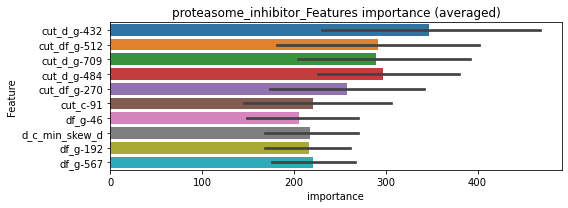

len(train_index) : 7912
len(valid_index) : 2638
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315866	valid_1's binary_logloss: 0.0541719
[2000]	training's binary_logloss: 0.0158407	valid_1's binary_logloss: 0.0401179
[3000]	training's binary_logloss: 0.0103805	valid_1's binary_logloss: 0.0351665
Early stopping, best iteration is:
[3690]	training's binary_logloss: 0.0083765	valid_1's binary_logloss: 0.0332719


len(train_index) : 7912
len(valid_index) : 2638
================================= fold 2/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.030395	valid_1's binary_logloss: 0.0607003
[2000]	training's binary_logloss: 0.0153283	valid_1's binary_logloss: 0.0475652
[3000]	training's binary_logloss: 0.0100362	valid_1's binary_logloss: 0.0431236
Early stopping, best iteration is:
[3578]	training's binary_logloss: 0.00835591	valid_1's binary_logloss: 0.041683


len(train_index) : 7913
len(valid_index) : 2637
================================= fold 3/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0310785	valid_1's binary_logloss: 0.0551414
[2000]	training's binary_logloss: 0.0155058	valid_1's binary_logloss: 0.0411627
[3000]	training's binary_logloss: 0.0101907	valid_1's binary_logloss: 0.0364675
Early stopping, best iteration is:
[3327]	training's binary_logloss: 0.00913698	valid_1's binary_logloss: 0.0354543


len(train_index) : 7913
len(valid_index) : 2637
================================= fold 4/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0318987	valid_1's binary_logloss: 0.0493607
[2000]	training's binary_logloss: 0.015996	valid_1's binary_logloss: 0.0356323
[3000]	training's binary_logloss: 0.010511	valid_1's binary_logloss: 0.0305261
[4000]	training's binary_logloss: 0.00781659	valid_1's binary_logloss: 0.0279366
[5000]	training's binary_logloss: 0.00621784	valid_1's binary_logloss: 0.0263428
Early stopping, best iteration is:
[5550]	training's binary_logloss: 0.00558971	valid_1's binary_logloss: 0.0256951


proteasome_inhibitor logloss: 0.03402673095805684
proteasome_inhibitor is unpredictable(><)!
protein_kinase_inhibitor, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000601628	valid_1's binary_logloss: 0.0400902
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000683002	valid_1's binary_logloss: 0.032898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000460484	valid_1's binary_logloss: 0.00381274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00054705	valid_1's binary_logloss: 0.0302008


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026744, Threshold: 0.0057331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0057331, conf_0:0.00401, conf_1:0.00745
Num_p_label: 1.0, Expected: 8.0, Adj_threshold_1: 0.0357331
threshold: 0.0357331, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000451556	valid_1's binary_logloss: 0.0379769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000643769	valid_1's binary_logloss: 0.0308471
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00053363	valid_1's binary_logloss: 0.00375981
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0099436, Threshold: 0.0357331, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000532965	valid_1's binary_logloss: 0.0282865


Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0012557 Vs.target_rate: 0.00202
Num_p_label: 5.0, Expected: 8.0, Threshold: 0.0357331, conf_0:0.02859, conf_1:0.04288
threshold: 0.0357331, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000804011	valid_1's binary_logloss: 0.0336658
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000608277	valid_1's binary_logloss: 0.0191161
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000450736	valid_1's binary_logloss: 0.0176489
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0128171, Threshold: 0.0357331, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000529568	valid_1's binary_logloss: 0.0281303


Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0007534 Vs.target_rate: 0.00202
Num_p_label: 3.0, Expected: 8.0, Threshold: 0.0357331, conf_0:0.03216, conf_1:0.03931
threshold: 0.0357331, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 652.0/3797, y_label_rate: 0.1717145


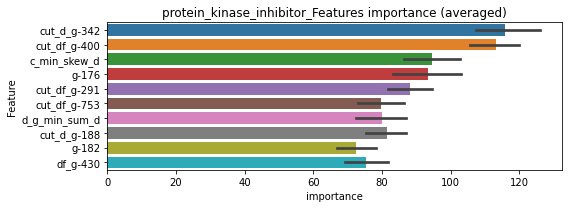

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 protein_kinase_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000780641	valid_1's binary_logloss: 0.0217174
Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 protein_kinase_inhibitor=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000770801	valid_1's binary_logloss: 0.0290596
Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00054372	valid_1's binary_logloss: 0.0138154


================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


protein_kinase_inhibitor logloss: 0.0214590907275182


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.000794755	valid_1's binary_logloss: 0.0212437


protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000375291	valid_1's binary_logloss: 0.00829387
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000324407	valid_1's binary_logloss: 0.0188597
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000305863	valid_1's binary_logloss: 0.00329002
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013160, Threshold: 0.0036319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0036319, conf_0:0.00254, conf_1:0.00472
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_1: 0.0336319


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000352518	valid_1's binary_logloss: 0.0035204


threshold: 0.0336319, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000366309	valid_1's binary_logloss: 0.00777228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000360735	valid_1's binary_logloss: 0.0150042
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000298082	valid_1's binary_logloss: 0.00223028
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0164484, Threshold: 0.0336319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, Expected: 4.0, Threshold: 0.0336319, conf_0:0.02691, conf_1:0.04036
threshold: 0.0336319, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000314551	valid_1's binary_logloss: 0.00332445


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000366309	valid_1's binary_logloss: 0.00777228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000360735	valid_1's binary_logloss: 0.0150042
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000298082	valid_1's binary_logloss: 0.00223028
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0164484, Threshold: 0.0336319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, Expected: 4.0, Threshold: 0.0336319, conf_0:0.03027, conf_1:0.03700


Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000314551	valid_1's binary_logloss: 0.00332445


threshold: 0.0336319, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


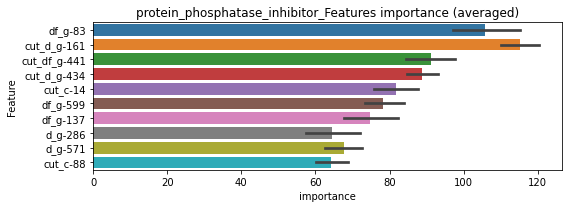

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000370367	valid_1's binary_logloss: 0.00789858
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Early stopping, best iteration is:
[378]	training's binary_logloss: 0.000456248	valid_1's binary_logloss: 0.0149342
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952


Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00032545	valid_1's binary_logloss: 0.00250054


================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


protein_phosphatase_inhibitor logloss: 0.0072160076019534575


Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000317404	valid_1's binary_logloss: 0.00351583


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3273
target_rate: 0.0043252 → Adj_target_rate: 0.0043163


selected negative label: 3273


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.034295	valid_1's binary_logloss: 0.115897
Early stopping, best iteration is:
[1546]	training's binary_logloss: 0.0219667	valid_1's binary_logloss: 0.111495
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0355691	valid_1's binary_logloss: 0.100455
Early stopping, best iteration is:
[1835]	training's binary_logloss: 0.0189515	valid_1's binary_logloss: 0.0934487
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0371195	valid_1's binary_logloss: 0.0779235
[2000]	training's binary_logloss: 0.0180247	valid_1's binary_logloss: 0.0681118
[3000]	training's binary_logloss: 0.0117284	valid_1's binary_logloss: 0.0646366
Early stopping, best iteration is:
[3045]	training's binary_logloss: 0.011545	valid_1's binary_logloss: 0.0644273
Training until validation scores don't improve for 30 rounds
[1000]	training'

1 / 3, AUC score:0.990, PR-AUC:0.976
y_Threshold: 0.0396116, Threshold: 0.0850023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 184 → Positive_corect_labels: 628/3743
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, Expected: 17.2, Threshold: 0.0850023, conf_0:0.05950, conf_1:0.11050
Num_p_label: 26.0, Expected: 17.2, Adj_threshold_1: 0.1150023
Num_p_label: 24.0, Expected: 17.2, Adj_threshold_2: 0.1450023
threshold: 0.1450023, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 628.0/3743, y_label_rate: 0.1677799
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0290816	valid_1's binary_logloss: 0.0833069
Early stopping, best iteration is:
[1638]	training's binary_logloss: 0.0175298	valid_1's binary_logloss: 0.0777235
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0291861	valid_1's binary_logloss: 0.0788349
[2000]	training's binary_logloss: 0.0143422	valid_1's binary_logloss: 0.0696827
Early stopping, best iteration is:
[2267]	training's binary_logloss: 0.0125976	valid_1's binary_logloss: 0.0686376
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.031394	valid_1's binary_logloss: 0.0583522
[2000]	training's binary_logloss: 0.0154248	valid_1's binary_logloss: 0.0476157
[3000]	training's binary_logloss: 0.0100967	valid_1's binary_logloss: 0.0440222
[4000]	training's binary_logloss: 0.0075078	valid_1's binary_logloss: 0.042459
Early stopping, best iteratio

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0507768, Threshold: 0.1450023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 605.0/3697
p_label_rate: 0.0067805 Vs.target_rate: 0.00433
Num_p_label: 27.0, Expected: 17.2, Threshold: 0.1450023, conf_0:0.11600, conf_1:0.17400
Num_p_label: 24.0, Expected: 17.2, Adj_threshold_1: 0.1750023
threshold: 0.1750023, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 605.0/3697, y_label_rate: 0.1636462
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248416	valid_1's binary_logloss: 0.0639755
[2000]	training's binary_logloss: 0.0123022	valid_1's binary_logloss: 0.0559502
Early stopping, best iteration is:
[2359]	training's binary_logloss: 0.0103791	valid_1's binary_logloss: 0.0545917
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0251921	valid_1's binary_logloss: 0.0610522
[2000]	training's binary_logloss: 0.0124397	valid_1's binary_logloss: 0.0521432
[3000]	training's binary_logloss: 0.00821472	valid_1's binary_logloss: 0.0495023
Early stopping, best iteration is:
[3516]	training's binary_logloss: 0.00698197	valid_1's binary_logloss: 0.0487458
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0261396	valid_1's binary_logloss: 0.0480566
[2000]	training's binary_logloss: 0.0128987	valid_1's binary_logloss: 0.0370016
[3000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0397338, Threshold: 0.1750023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 599.0/3685
p_label_rate: 0.0052737 Vs.target_rate: 0.00433
Num_p_label: 21.0, Expected: 17.2, Threshold: 0.1750023, conf_0:0.15750, conf_1:0.19250
threshold: 0.1750023, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 599.0/3685, y_label_rate: 0.1625509


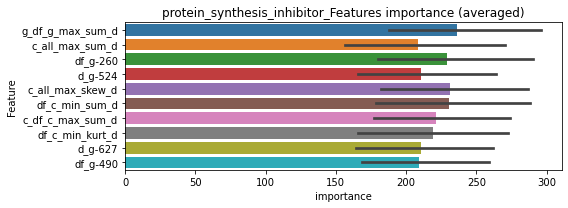

len(train_index) : 2763
len(valid_index) : 922
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0328488	valid_1's binary_logloss: 0.0713455
[2000]	training's binary_logloss: 0.0167881	valid_1's binary_logloss: 0.0592351
[3000]	training's binary_logloss: 0.0111906	valid_1's binary_logloss: 0.0553334
Early stopping, best iteration is:
[3136]	training's binary_logloss: 0.0107	valid_1's binary_logloss: 0.0549948


len(train_index) : 2764
len(valid_index) : 921
================================= fold 2/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0339807	valid_1's binary_logloss: 0.0693092
[2000]	training's binary_logloss: 0.0173477	valid_1's binary_logloss: 0.0580435
[3000]	training's binary_logloss: 0.0115447	valid_1's binary_logloss: 0.0544071
Early stopping, best iteration is:
[3690]	training's binary_logloss: 0.00935086	valid_1's binary_logloss: 0.0531715


len(train_index) : 2764
len(valid_index) : 921
================================= fold 3/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0355197	valid_1's binary_logloss: 0.0532617
[2000]	training's binary_logloss: 0.0182136	valid_1's binary_logloss: 0.0377243
[3000]	training's binary_logloss: 0.0120934	valid_1's binary_logloss: 0.0321467
[4000]	training's binary_logloss: 0.00903574	valid_1's binary_logloss: 0.029205
[5000]	training's binary_logloss: 0.00721971	valid_1's binary_logloss: 0.0274349
Early stopping, best iteration is:
[5714]	training's binary_logloss: 0.00631336	valid_1's binary_logloss: 0.0264708


len(train_index) : 2764
len(valid_index) : 921
================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0340537	valid_1's binary_logloss: 0.0624696
[2000]	training's binary_logloss: 0.017383	valid_1's binary_logloss: 0.0493316
[3000]	training's binary_logloss: 0.0115508	valid_1's binary_logloss: 0.044911
[4000]	training's binary_logloss: 0.00862876	valid_1's binary_logloss: 0.0426634
[5000]	training's binary_logloss: 0.00688832	valid_1's binary_logloss: 0.0413569
Early stopping, best iteration is:
[5552]	training's binary_logloss: 0.00619715	valid_1's binary_logloss: 0.0407622


protein_synthesis_inhibitor logloss: 0.04385287115325904
protein_synthesis_inhibitor is unpredictable(><)!
protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000442336	valid_1's binary_logloss: 0.0129076
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000308179	valid_1's binary_logloss: 0.0144184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000284356	valid_1's binary_logloss: 0.00172821
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009706, Threshold: 0.0019442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0019442, conf_0:0.00136, conf_1:0.00253
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0319442


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000282378	valid_1's binary_logloss: 0.00396483


threshold: 0.0319442, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000339319	valid_1's binary_logloss: 0.0180308
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000370499	valid_1's binary_logloss: 0.00556986
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00027847	valid_1's binary_logloss: 0.000728546
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000343235	valid_1's binary_logloss: 0.00807973


y_Threshold: 0.0083830, Threshold: 0.0319442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0002511 Vs.target_rate: 0.00080
Num_p_label: 1.0, Expected: 3.2, Threshold: 0.0319442, conf_0:0.02556, conf_1:0.03833
threshold: 0.0319442, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000339319	valid_1's binary_logloss: 0.0180308
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000370499	valid_1's binary_logloss: 0.00556986
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00027847	valid_1's binary_logloss: 0.000728546
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0083830, Threshold: 0.0319442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0002511 Vs.target_rate: 0.00080
Num_p_label: 1.0, Expected: 3.2, Threshold: 0.0319442, conf_0:0.02875, conf_1:0.03514
threshold: 0.0319442, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000343235	valid_1's binary_logloss: 0.00807973


positive_y_label: 656.0/3811, y_label_rate: 0.1721333


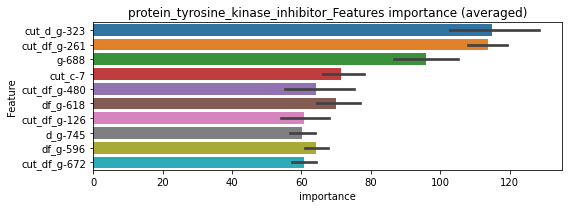

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[334]	training's binary_logloss: 0.000462276	valid_1's binary_logloss: 0.0142849
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000296159	valid_1's binary_logloss: 0.00433989
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000290873	valid_1's binary_logloss: 0.00092858
Training until validation scores don't improve for 30 rounds


protein_tyrosine_kinase_inhibitor logloss: 0.006548843226337443


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000313045	valid_1's binary_logloss: 0.00664208


radiopaque_medium, len(trt): 56, len(othr): 3282
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3282


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000762365	valid_1's binary_logloss: 0.0549113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000555153	valid_1's binary_logloss: 0.0311852
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000607218	valid_1's binary_logloss: 0.00565855
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028674, Threshold: 0.0104496, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0104496, conf_0:0.00731, conf_1:0.01358
Num_p_label: 4.0, Expected: 9.4, Adj_threshold_1: 0.0404496


Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000952424	valid_1's binary_logloss: 0.0411387


threshold: 0.0404496, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00058628	valid_1's binary_logloss: 0.04864
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000553948	valid_1's binary_logloss: 0.0322101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000512071	valid_1's binary_logloss: 0.00630848
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0174068, Threshold: 0.0404496, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000610973	valid_1's binary_logloss: 0.036703


Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0067805 Vs.target_rate: 0.00235
Num_p_label: 27.0, Expected: 9.4, Threshold: 0.0404496, conf_0:0.03236, conf_1:0.04854
Num_p_label: 18.0, Expected: 9.4, Adj_threshold_1: 0.0704496
threshold: 0.0704496, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00172885	valid_1's binary_logloss: 0.044778
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000519109	valid_1's binary_logloss: 0.0251629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00070001	valid_1's binary_logloss: 0.0385536
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000476471	valid_1's binary_logloss: 0.0125735


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0147485, Threshold: 0.0704496, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3794
p_label_rate: 0.0052737 Vs.target_rate: 0.00235
Num_p_label: 21.0, Expected: 9.4, Threshold: 0.0704496, conf_0:0.06340, conf_1:0.07749
threshold: 0.0704496, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3794, y_label_rate: 0.1713231


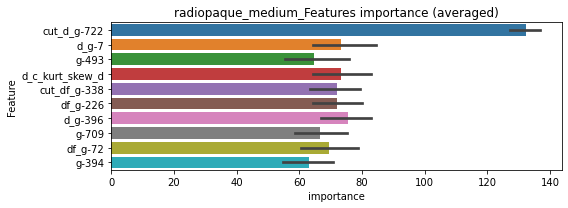

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 radiopaque_medium=================================


Early stopping, best iteration is:
[320]	training's binary_logloss: 0.0010285	valid_1's binary_logloss: 0.0277437
Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 radiopaque_medium=================================


Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000960261	valid_1's binary_logloss: 0.035765
Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000593874	valid_1's binary_logloss: 0.0180975


================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds


radiopaque_medium logloss: 0.02680276882486641


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00100768	valid_1's binary_logloss: 0.0255945


raf_inhibitor, len(trt): 223, len(othr): 3258
target_rate: 0.0093642 → Adj_target_rate: 0.0083226


selected negative label: 3258


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0671935	valid_1's binary_logloss: 0.215032
Early stopping, best iteration is:
[1280]	training's binary_logloss: 0.0527585	valid_1's binary_logloss: 0.211181
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0653024	valid_1's binary_logloss: 0.217249
Early stopping, best iteration is:
[1201]	training's binary_logloss: 0.0546854	valid_1's binary_logloss: 0.214109
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0682586	valid_1's binary_logloss: 0.194709
Early stopping, best iteration is:
[1320]	training's binary_logloss: 0.0519507	valid_1's binary_logloss: 0.189169
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0676235	valid_1's binary_logloss: 0.188496
Early stopping, best iteration is:
[1531]	training's binary_logloss: 0.0440681	valid_1's binary_lo

1 / 3, AUC score:0.919, PR-AUC:0.868
y_Threshold: 0.0997702, Threshold: 0.3592703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 361 → Positive_corect_labels: 536/3548
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, Expected: 37.3, Threshold: 0.3592703, conf_0:0.25149, conf_1:0.46705
threshold: 0.3592703, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 536.0/3548, y_label_rate: 0.1510710
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0413719	valid_1's binary_logloss: 0.136085
[2000]	training's binary_logloss: 0.0206134	valid_1's binary_logloss: 0.126434
Early stopping, best iteration is:
[2104]	training's binary_logloss: 0.0195628	valid_1's binary_logloss: 0.126009
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.044286	valid_1's binary_logloss: 0.095935
[2000]	training's binary_logloss: 0.0220729	valid_1's binary_logloss: 0.0804047
[3000]	training's binary_logloss: 0.0145702	valid_1's binary_logloss: 0.0753167
Early stopping, best iteration is:
[3449]	training's binary_logloss: 0.0126415	valid_1's binary_logloss: 0.0738223
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0443573	valid_1's binary_logloss: 0.102029
[2000]	training's binary_logloss: 0.0221163	valid_1's binary_logloss: 0.0864856
Early stopping, best iteration is

2 / 3, AUC score:0.993, PR-AUC:0.976
y_Threshold: 0.0967060, Threshold: 0.3592703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 88 → Positive_corect_labels: 492.0/3460
p_label_rate: 0.0346560 Vs.target_rate: 0.00936
Num_p_label: 138.0, Expected: 37.3, Threshold: 0.3592703, conf_0:0.28742, conf_1:0.43112
Num_p_label: 129.0, Expected: 37.3, Adj_threshold_1: 0.3892703
Num_p_label: 121.0, Expected: 37.3, Adj_threshold_2: 0.4192703
Num_p_label: 113.0, Expected: 37.3, Adj_threshold_3: 0.4492703
Num_p_label: 105.0, Expected: 37.3, Adj_threshold_4: 0.4792703
Num_p_label: 94.0, Expected: 37.3, Adj_threshold_5: 0.5092703
Num_p_label: 80.0, Expected: 37.3, Adj_threshold_6: 0.5392703
Num_p_label: 73.0, Expected: 37.3, Adj_threshold_7: 0.5692703
Num_p_label: 66.0, Expected: 37.3, Adj_threshold_8: 0.5992703
Num_p_label: 54.0, Expected: 37.3, Adj_threshold_9: 0.6292703
threshold: 0.6292703, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 492.0/3460, y_label_rate: 0.1421965
=====

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0337651	valid_1's binary_logloss: 0.0996913
[2000]	training's binary_logloss: 0.016832	valid_1's binary_logloss: 0.0874691
Early stopping, best iteration is:
[2010]	training's binary_logloss: 0.0167479	valid_1's binary_logloss: 0.0873761
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0356266	valid_1's binary_logloss: 0.0742311
[2000]	training's binary_logloss: 0.0177632	valid_1's binary_logloss: 0.0586817
[3000]	training's binary_logloss: 0.0116836	valid_1's binary_logloss: 0.0525194
[4000]	training's binary_logloss: 0.00870289	valid_1's binary_logloss: 0.0495561
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.00836002	valid_1's binary_logloss: 0.0491538
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0351001	valid_1's binary_logloss: 0.0792741
[2000]	training's binary_l

3 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0901618, Threshold: 0.6292703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 472.0/3420
p_label_rate: 0.0281266 Vs.target_rate: 0.00936
Num_p_label: 112.0, Expected: 37.3, Threshold: 0.6292703, conf_0:0.56634, conf_1:0.69220
Num_p_label: 102.0, Expected: 37.3, Adj_threshold_1: 0.6592703
Num_p_label: 93.0, Expected: 37.3, Adj_threshold_2: 0.6892703
Num_p_label: 87.0, Expected: 37.3, Adj_threshold_3: 0.7192703
Num_p_label: 76.0, Expected: 37.3, Adj_threshold_4: 0.7492703
Num_p_label: 56.0, Expected: 37.3, Adj_threshold_5: 0.7792703
Num_p_label: 44.0, Expected: 37.3, Adj_threshold_6: 0.8092703
threshold: 0.8092703, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 472.0/3420, y_label_rate: 0.1380117


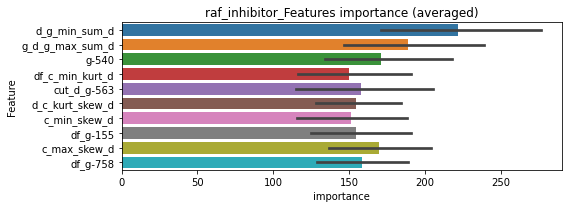

len(train_index) : 2565
len(valid_index) : 855
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0422432	valid_1's binary_logloss: 0.0851697
[2000]	training's binary_logloss: 0.0216885	valid_1's binary_logloss: 0.0661528
[3000]	training's binary_logloss: 0.0144804	valid_1's binary_logloss: 0.0591767
[4000]	training's binary_logloss: 0.0108443	valid_1's binary_logloss: 0.055534
Early stopping, best iteration is:
[4256]	training's binary_logloss: 0.0101839	valid_1's binary_logloss: 0.0548999


len(train_index) : 2565
len(valid_index) : 855
================================= fold 2/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0444538	valid_1's binary_logloss: 0.0722093
[2000]	training's binary_logloss: 0.022719	valid_1's binary_logloss: 0.0521269
[3000]	training's binary_logloss: 0.0151539	valid_1's binary_logloss: 0.0446622
[4000]	training's binary_logloss: 0.0113466	valid_1's binary_logloss: 0.0408239
Early stopping, best iteration is:
[4295]	training's binary_logloss: 0.0105616	valid_1's binary_logloss: 0.0399625


len(train_index) : 2565
len(valid_index) : 855
================================= fold 3/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0432182	valid_1's binary_logloss: 0.0775161
[2000]	training's binary_logloss: 0.0219512	valid_1's binary_logloss: 0.0592453
[3000]	training's binary_logloss: 0.0145861	valid_1's binary_logloss: 0.0532366
[4000]	training's binary_logloss: 0.0108955	valid_1's binary_logloss: 0.0501225
Early stopping, best iteration is:
[4686]	training's binary_logloss: 0.00928576	valid_1's binary_logloss: 0.0487901


len(train_index) : 2565
len(valid_index) : 855
================================= fold 4/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0423086	valid_1's binary_logloss: 0.0855681
[2000]	training's binary_logloss: 0.0215529	valid_1's binary_logloss: 0.0667526
[3000]	training's binary_logloss: 0.0143214	valid_1's binary_logloss: 0.0601014
[4000]	training's binary_logloss: 0.010714	valid_1's binary_logloss: 0.0570391
Early stopping, best iteration is:
[4829]	training's binary_logloss: 0.00887299	valid_1's binary_logloss: 0.0552089


raf_inhibitor logloss: 0.04971533414867872
raf_inhibitor is unpredictable(><)!
ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000228761	valid_1's binary_logloss: 0.00254321
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000242171	valid_1's binary_logloss: 0.0104776
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000225671	valid_1's binary_logloss: 0.000393067
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0007334, Threshold: 0.0063013, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0063013, conf_0:0.00441, conf_1:0.00819
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.0363013
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0663013


Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000231923	valid_1's binary_logloss: 0.00463714


threshold: 0.0663013, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000213414	valid_1's binary_logloss: 0.00185249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000224411	valid_1's binary_logloss: 0.00854061
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00021517	valid_1's binary_logloss: 0.000230866
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0201315, Threshold: 0.0663013, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0115520 Vs.target_rate: 0.00050
Num_p_label: 46.0, Expected: 2.0, Threshold: 0.0663013, conf_0:0.05304, conf_1:0.07956
Num_p_label: 41.0, Expected: 2.0, Adj_threshold_1: 0.0963013
Num_p_label: 36.0, Expected: 2.0, Adj_threshold_2: 0.1263013
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_3: 0.1563013
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_4: 0.1863013
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_5: 0.2163013
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_6: 0.2463013


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000219259	valid_1's binary_logloss: 0.00368719


Num_p_label: 17.0, Expected: 2.0, Adj_threshold_7: 0.2763013
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_8: 0.3063013
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_9: 0.3363013
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_10: 0.3663013
threshold: 0.3663013, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000213414	valid_1's binary_logloss: 0.00185249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000224411	valid_1's binary_logloss: 0.00854061
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00021517	valid_1's binary_logloss: 0.000230866
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0201315, Threshold: 0.3663013, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00050
Num_p_label: 12.0, Expected: 2.0, Threshold: 0.3663013, conf_0:0.32967, conf_1:0.40293
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_1: 0.3963013
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_2: 0.4263013
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.4563013
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.4863013
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.5163013
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.5463013
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.5763013
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_8: 0.6063013


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000219259	valid_1's binary_logloss: 0.00368719


Num_p_label: 5.0, Expected: 2.0, Adj_threshold_9: 0.6363013
threshold: 0.6363013, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


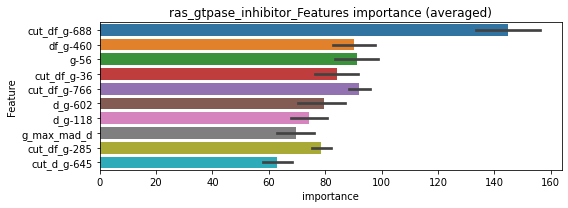

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000221531	valid_1's binary_logloss: 0.00161743
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000229363	valid_1's binary_logloss: 0.00502588
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00023233	valid_1's binary_logloss: 0.000253086
Training until validation scores don't improve for 30 rounds


ras_gtpase_inhibitor logloss: 0.0023339901364845743


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000231586	valid_1's binary_logloss: 0.00243751


retinoid_receptor_agonist, len(trt): 67, len(othr): 3277
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3277


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0255205	valid_1's binary_logloss: 0.0774343
Early stopping, best iteration is:
[1729]	training's binary_logloss: 0.0145969	valid_1's binary_logloss: 0.071277
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270622	valid_1's binary_logloss: 0.0591909
[2000]	training's binary_logloss: 0.0132281	valid_1's binary_logloss: 0.0489248
[3000]	training's binary_logloss: 0.00862193	valid_1's binary_logloss: 0.0452244
[4000]	training's binary_logloss: 0.00640197	valid_1's binary_logloss: 0.0433013
Early stopping, best iteration is:
[4157]	training's binary_logloss: 0.00615432	valid_1's binary_logloss: 0.0430086
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270655	valid_1's binary_logloss: 0.0547802
[2000]	training's binary_logloss: 0.0131937	valid_1's binary_logloss: 0.0459872
Early stopping, best iter

1 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0254747, Threshold: 0.1786883, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.1786883, conf_0:0.12508, conf_1:0.23229
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_1: 0.2086883
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_2: 0.2386883
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_3: 0.2686883
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_4: 0.2986883
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_5: 0.3286883
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_6: 0.3586883
threshold: 0.3586883, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 649.0/3788, y_label_rate: 0.1713305
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0240946	valid_1's binary_logloss: 0.0639212
[2000]	training's binary_logloss: 0.0118852	valid_1's binary_logloss: 0.0557612
[3000]	training's binary_logloss: 0.00780061	valid_1's binary_logloss: 0.0529417
Early stopping, best iteration is:
[2996]	training's binary_logloss: 0.00781192	valid_1's binary_logloss: 0.052932
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0243474	valid_1's binary_logloss: 0.0639174
[2000]	training's binary_logloss: 0.0119894	valid_1's binary_logloss: 0.0550489
[3000]	training's binary_logloss: 0.00788704	valid_1's binary_logloss: 0.0518119
Early stopping, best iteration is:
[3522]	training's binary_logloss: 0.00670208	valid_1's binary_logloss: 0.0508459
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0249349	valid_1's binary_logloss: 0.0539603
[2000]	training's binary

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0501530, Threshold: 0.3586883, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 636.0/3762
p_label_rate: 0.0107986 Vs.target_rate: 0.00281
Num_p_label: 43.0, Expected: 11.2, Threshold: 0.3586883, conf_0:0.28695, conf_1:0.43043
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.3886883
Num_p_label: 34.0, Expected: 11.2, Adj_threshold_2: 0.4186883
Num_p_label: 25.0, Expected: 11.2, Adj_threshold_3: 0.4486883
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_4: 0.4786883
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_5: 0.5086883
Num_p_label: 15.0, Expected: 11.2, Adj_threshold_6: 0.5386883
threshold: 0.5386883, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 636.0/3762, y_label_rate: 0.1690590
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0213662	valid_1's binary_logloss: 0.0579807
[2000]	training's binary_logloss: 0.0106505	valid_1's binary_logloss: 0.0487482
[3000]	training's binary_logloss: 0.0070383	valid_1's binary_logloss: 0.0457415
Early stopping, best iteration is:
[3003]	training's binary_logloss: 0.0070315	valid_1's binary_logloss: 0.0457322
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.022547	valid_1's binary_logloss: 0.0477319
[2000]	training's binary_logloss: 0.0111075	valid_1's binary_logloss: 0.0391641
[3000]	training's binary_logloss: 0.00734282	valid_1's binary_logloss: 0.0360757
[4000]	training's binary_logloss: 0.00549188	valid_1's binary_logloss: 0.0347361
Early stopping, best iteration is:
[4160]	training's binary_logloss: 0.00528175	valid_1's binary_logloss: 0.0345333
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0445846, Threshold: 0.5386883, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 630.0/3750
p_label_rate: 0.0060271 Vs.target_rate: 0.00281
Num_p_label: 24.0, Expected: 11.2, Threshold: 0.5386883, conf_0:0.48482, conf_1:0.59256
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_1: 0.5686883
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_2: 0.5986883
threshold: 0.5986883, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 630.0/3750, y_label_rate: 0.1680000


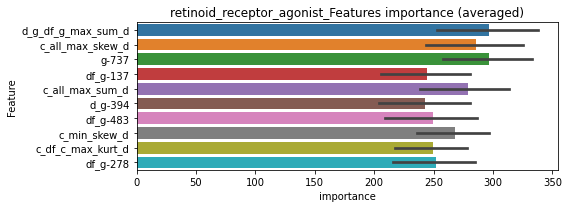

len(train_index) : 2812
len(valid_index) : 938
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0295162	valid_1's binary_logloss: 0.0575949
[2000]	training's binary_logloss: 0.0151928	valid_1's binary_logloss: 0.0451843
[3000]	training's binary_logloss: 0.0101487	valid_1's binary_logloss: 0.0411084
[4000]	training's binary_logloss: 0.00760807	valid_1's binary_logloss: 0.0390622
Early stopping, best iteration is:
[4491]	training's binary_logloss: 0.00677761	valid_1's binary_logloss: 0.0384577


len(train_index) : 2812
len(valid_index) : 938
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0307379	valid_1's binary_logloss: 0.0486789
[2000]	training's binary_logloss: 0.0158286	valid_1's binary_logloss: 0.0361844
[3000]	training's binary_logloss: 0.0105239	valid_1's binary_logloss: 0.0318585
[4000]	training's binary_logloss: 0.00784686	valid_1's binary_logloss: 0.0296788
[5000]	training's binary_logloss: 0.00628136	valid_1's binary_logloss: 0.0284774
[6000]	training's binary_logloss: 0.00524118	valid_1's binary_logloss: 0.0276498
Early stopping, best iteration is:
[6876]	training's binary_logloss: 0.00458285	valid_1's binary_logloss: 0.0271655


len(train_index) : 2813
len(valid_index) : 937
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0312808	valid_1's binary_logloss: 0.043509
[2000]	training's binary_logloss: 0.0159575	valid_1's binary_logloss: 0.0314664
[3000]	training's binary_logloss: 0.0105868	valid_1's binary_logloss: 0.0272948
[4000]	training's binary_logloss: 0.00789384	valid_1's binary_logloss: 0.0251724
[5000]	training's binary_logloss: 0.00632533	valid_1's binary_logloss: 0.023906
[6000]	training's binary_logloss: 0.00526899	valid_1's binary_logloss: 0.0229909
Early stopping, best iteration is:
[6862]	training's binary_logloss: 0.00461945	valid_1's binary_logloss: 0.0224304


len(train_index) : 2813
len(valid_index) : 937
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0292134	valid_1's binary_logloss: 0.0599481
[2000]	training's binary_logloss: 0.0149865	valid_1's binary_logloss: 0.0483898
[3000]	training's binary_logloss: 0.00999163	valid_1's binary_logloss: 0.0443888
Early stopping, best iteration is:
[3393]	training's binary_logloss: 0.00882169	valid_1's binary_logloss: 0.0435587


retinoid_receptor_agonist logloss: 0.03290301439495287
retinoid_receptor_agonist is unpredictable(><)!
retinoid_receptor_antagonist, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000151764	valid_1's binary_logloss: 0.0035476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000153435	valid_1's binary_logloss: 0.0045625
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000144327	valid_1's binary_logloss: 0.0003516
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004175, Threshold: 0.0014247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0014247, conf_0:0.00100, conf_1:0.00185
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0314247


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000145765	valid_1's binary_logloss: 0.000154619


threshold: 0.0314247, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000141912	valid_1's binary_logloss: 0.00312481
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000150303	valid_1's binary_logloss: 0.00257459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000139175	valid_1's binary_logloss: 0.000134083
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0205467, Threshold: 0.0314247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.0314247, conf_0:0.02514, conf_1:0.03771
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0614247
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0914247
threshold: 0.0914247, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000137847	valid_1's binary_logloss: 0.000134789


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000141912	valid_1's binary_logloss: 0.00312481
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000150303	valid_1's binary_logloss: 0.00257459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000139175	valid_1's binary_logloss: 0.000134083
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0205467, Threshold: 0.0914247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0914247, conf_0:0.08228, conf_1:0.10057
threshold: 0.0914247, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000137847	valid_1's binary_logloss: 0.000134789


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


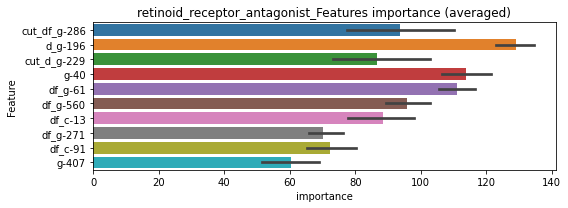

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000143424	valid_1's binary_logloss: 0.00233715
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000167631	valid_1's binary_logloss: 0.00181451
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[894]	training's binary_logloss: 0.00014329	valid_1's binary_logloss: 0.000141778
Training until validation scores don't improve for 30 rounds


retinoid_receptor_antagonist logloss: 0.0011079934934716282


Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000140245	valid_1's binary_logloss: 0.000137247


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3284
target_rate: 0.0014697 → Adj_target_rate: 0.0017245


selected negative label: 3284


N_features:506
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000491643	valid_1's binary_logloss: 0.0345765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000469503	valid_1's binary_logloss: 0.0113434
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.0003992	valid_1's binary_logloss: 0.00348179
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021376, Threshold: 0.0044651, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000390762	valid_1's binary_logloss: 0.0242782


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, Expected: 5.9, Threshold: 0.0044651, conf_0:0.00313, conf_1:0.00580
Num_p_label: 0.0, Expected: 5.9, Adj_threshold_1: 0.0344651
threshold: 0.0344651, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000507502	valid_1's binary_logloss: 0.033556
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000447264	valid_1's binary_logloss: 0.00944483
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000376104	valid_1's binary_logloss: 0.00257615
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0135187, Threshold: 0.0344651, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0010045 Vs.target_rate: 0.00147
Num_p_label: 4.0, Expected: 5.9, Threshold: 0.0344651, conf_0:0.02757, conf_1:0.04136
threshold: 0.0344651, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000649615	valid_1's binary_logloss: 0.0223335


positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000531739	valid_1's binary_logloss: 0.0220787
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000419564	valid_1's binary_logloss: 0.0101859
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000369189	valid_1's binary_logloss: 0.011372
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0163960, Threshold: 0.0344651, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000366411	valid_1's binary_logloss: 0.0208928


Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0012557 Vs.target_rate: 0.00147
Num_p_label: 5.0, Expected: 5.9, Threshold: 0.0344651, conf_0:0.03102, conf_1:0.03791
threshold: 0.0344651, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


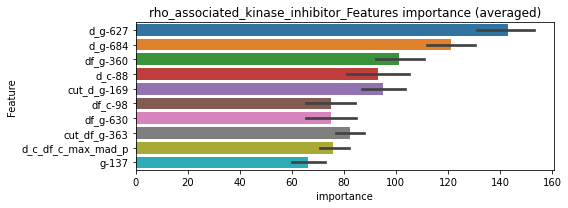

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000504034	valid_1's binary_logloss: 0.0245812
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000553628	valid_1's binary_logloss: 0.0129559
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951


Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000405197	valid_1's binary_logloss: 0.00516939


================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000447746	valid_1's binary_logloss: 0.0154076


rho_associated_kinase_inhibitor logloss: 0.014528553071245828
ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000384689	valid_1's binary_logloss: 0.0161382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000542079	valid_1's binary_logloss: 0.0368621
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000390575	valid_1's binary_logloss: 0.00484842
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00044162	valid_1's binary_logloss: 0.0120477


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021494, Threshold: 0.0053985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0053985, conf_0:0.00378, conf_1:0.00702
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_1: 0.0353985
threshold: 0.0353985, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000607813	valid_1's binary_logloss: 0.0261881
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00037526	valid_1's binary_logloss: 0.00788002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000386914	valid_1's binary_logloss: 0.00150168
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0109358, Threshold: 0.0353985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0010045 Vs.target_rate: 0.00155
Num_p_label: 4.0, Expected: 6.2, Threshold: 0.0353985, conf_0:0.02832, conf_1:0.04248


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000402279	valid_1's binary_logloss: 0.02321


threshold: 0.0353985, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000374555	valid_1's binary_logloss: 0.0186954
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000417886	valid_1's binary_logloss: 0.0110143
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000377977	valid_1's binary_logloss: 0.00938122
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0108332, Threshold: 0.0353985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3805
p_label_rate: 0.0010045 Vs.target_rate: 0.00155
Num_p_label: 4.0, Expected: 6.2, Threshold: 0.0353985, conf_0:0.03186, conf_1:0.03894


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000378644	valid_1's binary_logloss: 0.0221044


threshold: 0.0353985, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 654.0/3805, y_label_rate: 0.1718791


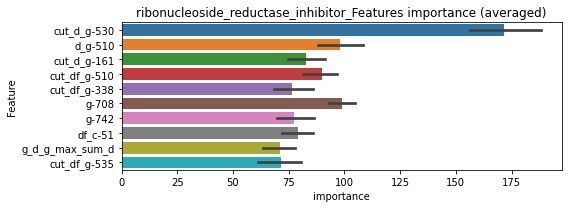

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000491225	valid_1's binary_logloss: 0.0152706
Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000667156	valid_1's binary_logloss: 0.00734983
Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000450817	valid_1's binary_logloss: 0.00824425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000405713	valid_1's binary_logloss: 0.0153296


ribonucleoside_reductase_inhibitor logloss: 0.011549558310820811
rna_polymerase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:503
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.00032827	valid_1's binary_logloss: 0.00802101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.000750428	valid_1's binary_logloss: 0.0233166
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000328674	valid_1's binary_logloss: 0.00283853
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014235, Threshold: 0.0043050, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0043050, conf_0:0.00301, conf_1:0.00560
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0343050


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000328107	valid_1's binary_logloss: 0.00670495


threshold: 0.0343050, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000359666	valid_1's binary_logloss: 0.00717606
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.00110844	valid_1's binary_logloss: 0.0225579
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000328608	valid_1's binary_logloss: 0.00245072
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211808, Threshold: 0.0343050, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00105
Num_p_label: 15.0, Expected: 4.2, Threshold: 0.0343050, conf_0:0.02744, conf_1:0.04117
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0643050


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000322294	valid_1's binary_logloss: 0.00547418


threshold: 0.0643050, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000359666	valid_1's binary_logloss: 0.00717606
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.00110844	valid_1's binary_logloss: 0.0225579
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000328608	valid_1's binary_logloss: 0.00245072
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211808, Threshold: 0.0643050, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, Expected: 4.2, Threshold: 0.0643050, conf_0:0.05787, conf_1:0.07074


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000322294	valid_1's binary_logloss: 0.00547418


threshold: 0.0643050, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


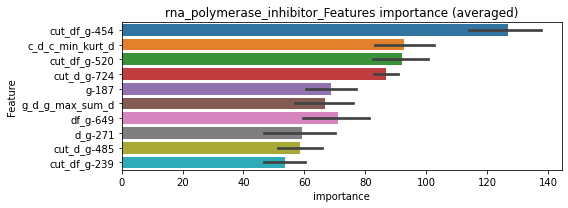

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 rna_polymerase_inhibitor=================================


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000351857	valid_1's binary_logloss: 0.00687189
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000486179	valid_1's binary_logloss: 0.0202415
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000340414	valid_1's binary_logloss: 0.00147904
Training until validation scores don't improve for 30 rounds


rna_polymerase_inhibitor logloss: 0.008189322917334653


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000337613	valid_1's binary_logloss: 0.00415362
mutually exclusive columns: serotonin_receptor_agonist


serotonin_receptor_agonist, len(trt): 236, len(othr): 5845
target_rate: 0.0099101 → Adj_target_rate: 0.0087332


selected negative label: 5845


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0429108	valid_1's binary_logloss: 0.129054
Early stopping, best iteration is:
[1376]	training's binary_logloss: 0.0306713	valid_1's binary_logloss: 0.126796
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.0451987	valid_1's binary_logloss: 0.1461
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0437856	valid_1's binary_logloss: 0.122502
Early stopping, best iteration is:
[1535]	training's binary_logloss: 0.0278153	valid_1's binary_logloss: 0.118226
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0434045	valid_1's binary_logloss: 0.12619
Early stopping, best iteration is:
[1458]	training's binary_logloss: 0.0291279	valid_1's binary_logloss: 0.122937


1 / 3, AUC score:0.962, PR-AUC:0.928
y_Threshold: 0.0564282, Threshold: 0.0931929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 506 → Positive_corect_labels: 1033/6508
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, Expected: 39.5, Threshold: 0.0931929, conf_0:0.06524, conf_1:0.12115
threshold: 0.0931929, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1033.0/6508, y_label_rate: 0.1587277
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0241898	valid_1's binary_logloss: 0.0747529
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.0142098	valid_1's binary_logloss: 0.071055
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0261803	valid_1's binary_logloss: 0.0545341
[2000]	training's binary_logloss: 0.0126952	valid_1's binary_logloss: 0.0485943
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0121139	valid_1's binary_logloss: 0.0483259
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0237193	valid_1's binary_logloss: 0.0832273
Early stopping, best iteration is:
[1200]	training's binary_logloss: 0.0196705	valid_1's binary_logloss: 0.082361
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0255594	valid_1's binary_logloss: 0.0578482
[2000]	traini

2 / 3, AUC score:0.995, PR-AUC:0.984
y_Threshold: 0.0549600, Threshold: 0.0931929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 128 → Positive_corect_labels: 969.0/6380
p_label_rate: 0.0155701 Vs.target_rate: 0.00991
Num_p_label: 62.0, Expected: 39.5, Threshold: 0.0931929, conf_0:0.07455, conf_1:0.11183
Num_p_label: 38.0, Expected: 39.5, Adj_threshold_1: 0.1231929
threshold: 0.1231929, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 969.0/6380, y_label_rate: 0.1518809
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0152312	valid_1's binary_logloss: 0.0328098
[2000]	training's binary_logloss: 0.00759888	valid_1's binary_logloss: 0.0275348
Early stopping, best iteration is:
[2104]	training's binary_logloss: 0.00720832	valid_1's binary_logloss: 0.0272443
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0153009	valid_1's binary_logloss: 0.0317054
[2000]	training's binary_logloss: 0.0076703	valid_1's binary_logloss: 0.026616
[3000]	training's binary_logloss: 0.00506071	valid_1's binary_logloss: 0.0249362
Early stopping, best iteration is:
[3002]	training's binary_logloss: 0.00505665	valid_1's binary_logloss: 0.0249263
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0148653	valid_1's binary_logloss: 0.0371452
[2000]	training's binary_logloss: 0.00747597	valid_1's binary_logloss: 0.0321541
Early stopping, best it

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0491929, Threshold: 0.1231929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 948.0/6338
p_label_rate: 0.0135610 Vs.target_rate: 0.00991
Num_p_label: 54.0, Expected: 39.5, Threshold: 0.1231929, conf_0:0.11087, conf_1:0.13551
threshold: 0.1231929, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 948.0/6338, y_label_rate: 0.1495740


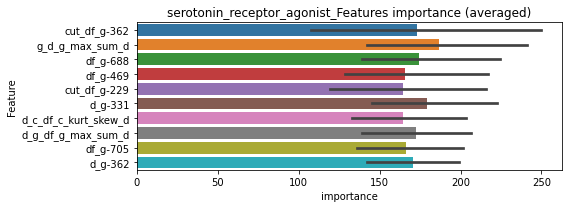

len(train_index) : 4753
len(valid_index) : 1585
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0157059	valid_1's binary_logloss: 0.0309741
[2000]	training's binary_logloss: 0.00779385	valid_1's binary_logloss: 0.0227411
[3000]	training's binary_logloss: 0.00521237	valid_1's binary_logloss: 0.0201053
[4000]	training's binary_logloss: 0.00393265	valid_1's binary_logloss: 0.0188799
[5000]	training's binary_logloss: 0.0031697	valid_1's binary_logloss: 0.0182444
[6000]	training's binary_logloss: 0.00266019	valid_1's binary_logloss: 0.017752
[7000]	training's binary_logloss: 0.00229971	valid_1's binary_logloss: 0.0175128
Early stopping, best iteration is:
[7151]	training's binary_logloss: 0.00225326	valid_1's binary_logloss: 0.0174773


len(train_index) : 4753
len(valid_index) : 1585
================================= fold 2/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0170144	valid_1's binary_logloss: 0.0213049
[2000]	training's binary_logloss: 0.00861289	valid_1's binary_logloss: 0.012345
[3000]	training's binary_logloss: 0.00579509	valid_1's binary_logloss: 0.00928262
[4000]	training's binary_logloss: 0.00436396	valid_1's binary_logloss: 0.00768647
[5000]	training's binary_logloss: 0.00350695	valid_1's binary_logloss: 0.00672441
[6000]	training's binary_logloss: 0.00294144	valid_1's binary_logloss: 0.0060595
[7000]	training's binary_logloss: 0.0025366	valid_1's binary_logloss: 0.00558411
[8000]	training's binary_logloss: 0.00223258	valid_1's binary_logloss: 0.0052142
[9000]	training's binary_logloss: 0.00199772	valid_1's binary_logloss: 0.00492455
[10000]	training's binary_logloss: 0.00180985	valid_1's binary_logloss: 0.00469725
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00180985	valid_1's binary_logloss: 0.004

len(train_index) : 4754
len(valid_index) : 1584
================================= fold 3/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.017258	valid_1's binary_logloss: 0.0270314
[2000]	training's binary_logloss: 0.00870559	valid_1's binary_logloss: 0.0183794
[3000]	training's binary_logloss: 0.00584504	valid_1's binary_logloss: 0.015559
[4000]	training's binary_logloss: 0.00439752	valid_1's binary_logloss: 0.0142106
[5000]	training's binary_logloss: 0.00354088	valid_1's binary_logloss: 0.0134615
Early stopping, best iteration is:
[5562]	training's binary_logloss: 0.00319143	valid_1's binary_logloss: 0.0131352


len(train_index) : 4754
len(valid_index) : 1584
================================= fold 4/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0169608	valid_1's binary_logloss: 0.0228844
[2000]	training's binary_logloss: 0.00855752	valid_1's binary_logloss: 0.0139113
[3000]	training's binary_logloss: 0.00575217	valid_1's binary_logloss: 0.0109791
[4000]	training's binary_logloss: 0.00432967	valid_1's binary_logloss: 0.00949202
[5000]	training's binary_logloss: 0.00347819	valid_1's binary_logloss: 0.00858768
[6000]	training's binary_logloss: 0.00291797	valid_1's binary_logloss: 0.00798337
[7000]	training's binary_logloss: 0.00251552	valid_1's binary_logloss: 0.00755405
[8000]	training's binary_logloss: 0.00221521	valid_1's binary_logloss: 0.007221
[9000]	training's binary_logloss: 0.00198344	valid_1's binary_logloss: 0.00697731
[10000]	training's binary_logloss: 0.0017972	valid_1's binary_logloss: 0.00678959
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0017972	valid_1's binary_logloss: 0.0067

serotonin_receptor_agonist logloss: 0.01052502873896648


mutually exclusive columns: serotonin_receptor_antagonist


serotonin_receptor_antagonist, len(trt): 404, len(othr): 6767
target_rate: 0.0169648 → Adj_target_rate: 0.0137918


selected negative label: 6767


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.058042	valid_1's binary_logloss: 0.183923
Early stopping, best iteration is:
[1111]	training's binary_logloss: 0.052176	valid_1's binary_logloss: 0.182907
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.0709082	valid_1's binary_logloss: 0.20408
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0590275	valid_1's binary_logloss: 0.180922
Early stopping, best iteration is:
[1342]	training's binary_logloss: 0.0436218	valid_1's binary_logloss: 0.177856
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0598788	valid_1's binary_logloss: 0.17385
Early stopping, best iteration is:
[1221]	training's binary_logloss: 0.0488116	valid_1's binary_logloss: 0.171098


1 / 3, AUC score:0.922, PR-AUC:0.871
y_Threshold: 0.0807499, Threshold: 0.1236749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 763 → Positive_corect_labels: 1107/7357
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, Expected: 67.6, Threshold: 0.1236749, conf_0:0.08657, conf_1:0.16078
threshold: 0.1236749, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1107.0/7357, y_label_rate: 0.1504689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0318629	valid_1's binary_logloss: 0.0919197
Early stopping, best iteration is:
[1667]	training's binary_logloss: 0.0187339	valid_1's binary_logloss: 0.0863604
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315836	valid_1's binary_logloss: 0.092995
Early stopping, best iteration is:
[1640]	training's binary_logloss: 0.0188911	valid_1's binary_logloss: 0.0879981
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0314845	valid_1's binary_logloss: 0.095286
Early stopping, best iteration is:
[1793]	training's binary_logloss: 0.0170343	valid_1's binary_logloss: 0.0901501
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0332157	valid_1's binary_logloss: 0.0763263
[2000]	training's binary_logloss: 0.0159899	valid_1's binary_logloss: 0.0682947
Early stoppin

2 / 3, AUC score:0.993, PR-AUC:0.977
y_Threshold: 0.0593965, Threshold: 0.1236749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 1023.0/7189
p_label_rate: 0.0030136 Vs.target_rate: 0.01696
Num_p_label: 12.0, Expected: 67.6, Threshold: 0.1236749, conf_0:0.09894, conf_1:0.14841
threshold: 0.1236749, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 1023.0/7189, y_label_rate: 0.1423007
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0218756	valid_1's binary_logloss: 0.0523724
Early stopping, best iteration is:
[1917]	training's binary_logloss: 0.0112285	valid_1's binary_logloss: 0.0456054
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0213253	valid_1's binary_logloss: 0.0557546
[2000]	training's binary_logloss: 0.0104671	valid_1's binary_logloss: 0.0490566
Early stopping, best iteration is:
[2100]	training's binary_logloss: 0.00994156	valid_1's binary_logloss: 0.0487841
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0214319	valid_1's binary_logloss: 0.0558774
Early stopping, best iteration is:
[1741]	training's binary_logloss: 0.0121064	valid_1's binary_logloss: 0.0497875
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0227263	valid_1's binary_logloss: 0.0418034
[2000]	tra

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0495054, Threshold: 0.1236749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 989.0/7121
p_label_rate: 0.0025113 Vs.target_rate: 0.01696
Num_p_label: 10.0, Expected: 67.6, Threshold: 0.1236749, conf_0:0.11131, conf_1:0.13604
threshold: 0.1236749, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 989.0/7121, y_label_rate: 0.1388850


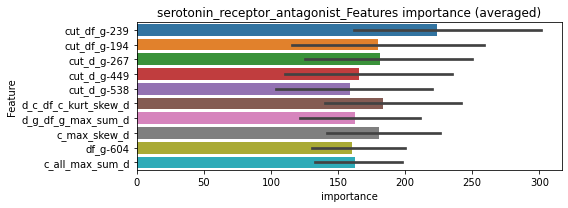

len(train_index) : 5340
len(valid_index) : 1781
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.025664	valid_1's binary_logloss: 0.0362588
[2000]	training's binary_logloss: 0.0132222	valid_1's binary_logloss: 0.0268011
[3000]	training's binary_logloss: 0.00880685	valid_1's binary_logloss: 0.0234624
[4000]	training's binary_logloss: 0.00655378	valid_1's binary_logloss: 0.0217262
[5000]	training's binary_logloss: 0.00522708	valid_1's binary_logloss: 0.0206856
[6000]	training's binary_logloss: 0.00434378	valid_1's binary_logloss: 0.0199244
Early stopping, best iteration is:
[6822]	training's binary_logloss: 0.00382114	valid_1's binary_logloss: 0.0195577


len(train_index) : 5341
len(valid_index) : 1780
================================= fold 2/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0249262	valid_1's binary_logloss: 0.0379351
[2000]	training's binary_logloss: 0.0128996	valid_1's binary_logloss: 0.0280676
[3000]	training's binary_logloss: 0.0085893	valid_1's binary_logloss: 0.0244553
[4000]	training's binary_logloss: 0.0064197	valid_1's binary_logloss: 0.0226883
[5000]	training's binary_logloss: 0.00511957	valid_1's binary_logloss: 0.021758
[6000]	training's binary_logloss: 0.00426674	valid_1's binary_logloss: 0.0210374
Early stopping, best iteration is:
[6822]	training's binary_logloss: 0.00375024	valid_1's binary_logloss: 0.0206422


len(train_index) : 5341
len(valid_index) : 1780
================================= fold 3/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0232216	valid_1's binary_logloss: 0.0488714
[2000]	training's binary_logloss: 0.0121229	valid_1's binary_logloss: 0.0403359
[3000]	training's binary_logloss: 0.00812592	valid_1's binary_logloss: 0.0376261
Early stopping, best iteration is:
[3661]	training's binary_logloss: 0.00663742	valid_1's binary_logloss: 0.0367508


len(train_index) : 5341
len(valid_index) : 1780
================================= fold 4/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0244312	valid_1's binary_logloss: 0.0422506
[2000]	training's binary_logloss: 0.012599	valid_1's binary_logloss: 0.0323452
[3000]	training's binary_logloss: 0.00842458	valid_1's binary_logloss: 0.0286985
[4000]	training's binary_logloss: 0.00627786	valid_1's binary_logloss: 0.026838
Early stopping, best iteration is:
[4491]	training's binary_logloss: 0.00558524	valid_1's binary_logloss: 0.0261974


serotonin_receptor_antagonist logloss: 0.025786125100133672
serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948


selected negative label: 3285


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00058642	valid_1's binary_logloss: 0.0306126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00051603	valid_1's binary_logloss: 0.029139
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000517202	valid_1's binary_logloss: 0.0106234
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000444192	valid_1's binary_logloss: 0.020295


y_Threshold: 0.0025846, Threshold: 0.0395770, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, Expected: 7.4, Threshold: 0.0395770, conf_0:0.02770, conf_1:0.05145
Num_p_label: 30.0, Expected: 7.4, Adj_threshold_1: 0.0695770
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_2: 0.0995770
threshold: 0.0995770, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000605087	valid_1's binary_logloss: 0.0292955
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000592732	valid_1's binary_logloss: 0.0276231
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000451957	valid_1's binary_logloss: 0.00996326
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0183456, Threshold: 0.0995770, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000488029	valid_1's binary_logloss: 0.0183033


Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0120542 Vs.target_rate: 0.00185
Num_p_label: 48.0, Expected: 7.4, Threshold: 0.0995770, conf_0:0.07966, conf_1:0.11949
Num_p_label: 45.0, Expected: 7.4, Adj_threshold_1: 0.1295770
Num_p_label: 42.0, Expected: 7.4, Adj_threshold_2: 0.1595770
Num_p_label: 42.0, Expected: 7.4, Adj_threshold_3: 0.1895770
Num_p_label: 38.0, Expected: 7.4, Adj_threshold_4: 0.2195770
Num_p_label: 34.0, Expected: 7.4, Adj_threshold_5: 0.2495770
Num_p_label: 31.0, Expected: 7.4, Adj_threshold_6: 0.2795770
Num_p_label: 26.0, Expected: 7.4, Adj_threshold_7: 0.3095770
Num_p_label: 25.0, Expected: 7.4, Adj_threshold_8: 0.3395770
Num_p_label: 19.0, Expected: 7.4, Adj_threshold_9: 0.3695770
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_10: 0.3995770
threshold: 0.3995770, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000578284	valid_1's binary_logloss: 0.0364536
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000516501	valid_1's binary_logloss: 0.0161219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000598536	valid_1's binary_logloss: 0.0063483
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0155718, Threshold: 0.3995770, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0040181 Vs.target_rate: 0.00185
Num_p_label: 16.0, Expected: 7.4, Threshold: 0.3995770, conf_0:0.35962, conf_1:0.43953
threshold: 0.3995770, positive_p_label: 16.0/3982, p_label_rate: 0.0040181


Early stopping, best iteration is:
[258]	training's binary_logloss: 0.00228346	valid_1's binary_logloss: 0.0366829


positive_y_label: 653.0/3802, y_label_rate: 0.1717517


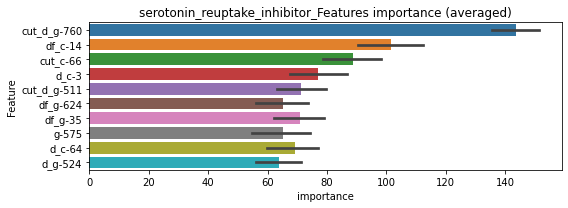

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Early stopping, best iteration is:
[369]	training's binary_logloss: 0.000722943	valid_1's binary_logloss: 0.0255742
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Early stopping, best iteration is:
[344]	training's binary_logloss: 0.000797438	valid_1's binary_logloss: 0.0232672
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.000736318	valid_1's binary_logloss: 0.0187571
Training until validation scores don't improve for 30 rounds


serotonin_reuptake_inhibitor logloss: 0.01876156443248669


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000611597	valid_1's binary_logloss: 0.00743588


sigma_receptor_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000567811	valid_1's binary_logloss: 0.0167536
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.00173004	valid_1's binary_logloss: 0.0355691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000436358	valid_1's binary_logloss: 0.00780876
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00039336	valid_1's binary_logloss: 0.0126966


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027390, Threshold: 0.0184457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0184457, conf_0:0.01291, conf_1:0.02398
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_1: 0.0484457
threshold: 0.0484457, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000564906	valid_1's binary_logloss: 0.0164012
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.000631088	valid_1's binary_logloss: 0.0328215
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000420068	valid_1's binary_logloss: 0.0083297
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0143486, Threshold: 0.0484457, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000409669	valid_1's binary_logloss: 0.0102494


Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0143144 Vs.target_rate: 0.00151
Num_p_label: 57.0, Expected: 6.0, Threshold: 0.0484457, conf_0:0.03876, conf_1:0.05813
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_1: 0.0784457
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_2: 0.1084457
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_3: 0.1384457
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_4: 0.1684457
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_5: 0.1984457
threshold: 0.1984457, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.000519725	valid_1's binary_logloss: 0.0208013
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000456454	valid_1's binary_logloss: 0.00772854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.000524801	valid_1's binary_logloss: 0.0109784
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0157154, Threshold: 0.1984457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0052737 Vs.target_rate: 0.00151
Num_p_label: 21.0, Expected: 6.0, Threshold: 0.1984457, conf_0:0.17860, conf_1:0.21829
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.2284457
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_2: 0.2584457


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00046437	valid_1's binary_logloss: 0.0254684


threshold: 0.2584457, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


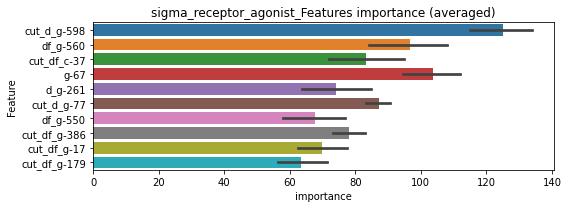

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 sigma_receptor_agonist=================================


Early stopping, best iteration is:
[356]	training's binary_logloss: 0.000638351	valid_1's binary_logloss: 0.0239165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000387034	valid_1's binary_logloss: 0.00438669


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 sigma_receptor_agonist=================================


Early stopping, best iteration is:
[336]	training's binary_logloss: 0.000702036	valid_1's binary_logloss: 0.00993166
Training until validation scores don't improve for 30 rounds


sigma_receptor_agonist logloss: 0.015414974921367333


Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00163547	valid_1's binary_logloss: 0.0234221


sigma_receptor_antagonist, len(trt): 36, len(othr): 3279
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3279


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.000589281	valid_1's binary_logloss: 0.0246939
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000556261	valid_1's binary_logloss: 0.0185248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000475034	valid_1's binary_logloss: 0.0192226
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000626576	valid_1's binary_logloss: 0.0169284


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021082, Threshold: 0.0048502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0048502, conf_0:0.00340, conf_1:0.00631
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_1: 0.0348502
threshold: 0.0348502, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000469422	valid_1's binary_logloss: 0.0252703
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000504926	valid_1's binary_logloss: 0.0168358
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000537926	valid_1's binary_logloss: 0.0187088
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0120077, Threshold: 0.0348502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.0348502, conf_0:0.02788, conf_1:0.04182


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000606772	valid_1's binary_logloss: 0.0174163


threshold: 0.0348502, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000465895	valid_1's binary_logloss: 0.0242058
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000552679	valid_1's binary_logloss: 0.0263164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000403773	valid_1's binary_logloss: 0.0152072
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000404471	valid_1's binary_logloss: 0.00293819


y_Threshold: 0.0091288, Threshold: 0.0348502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.0348502, conf_0:0.03137, conf_1:0.03834
threshold: 0.0348502, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3796, y_label_rate: 0.1717597


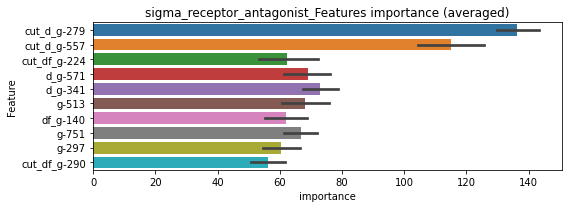

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 sigma_receptor_antagonist=================================


Early stopping, best iteration is:
[229]	training's binary_logloss: 0.00116756	valid_1's binary_logloss: 0.0168433
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 sigma_receptor_antagonist=================================


Early stopping, best iteration is:
[363]	training's binary_logloss: 0.000679467	valid_1's binary_logloss: 0.020114
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 sigma_receptor_antagonist=================================


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.000686663	valid_1's binary_logloss: 0.00634563
Training until validation scores don't improve for 30 rounds


sigma_receptor_antagonist logloss: 0.015339621546881111


Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000725955	valid_1's binary_logloss: 0.0180555


smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000371409	valid_1's binary_logloss: 0.0100206
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000402142	valid_1's binary_logloss: 0.0304041
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000308087	valid_1's binary_logloss: 0.00111756
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012331, Threshold: 0.0025782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0025782, conf_0:0.00180, conf_1:0.00335
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0325782


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000369889	valid_1's binary_logloss: 0.0119686


threshold: 0.0325782, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.0003319	valid_1's binary_logloss: 0.00849319
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000583357	valid_1's binary_logloss: 0.0266521
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000304	valid_1's binary_logloss: 0.000677973
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0078320, Threshold: 0.0325782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, Expected: 4.2, Threshold: 0.0325782, conf_0:0.02606, conf_1:0.03909
threshold: 0.0325782, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000520531	valid_1's binary_logloss: 0.0116092


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.000551557	valid_1's binary_logloss: 0.0241485
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000331962	valid_1's binary_logloss: 0.0151859
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000303698	valid_1's binary_logloss: 0.00310785
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0069468, Threshold: 0.0325782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, Expected: 4.2, Threshold: 0.0325782, conf_0:0.02932, conf_1:0.03584


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000352106	valid_1's binary_logloss: 0.00826408


threshold: 0.0325782, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


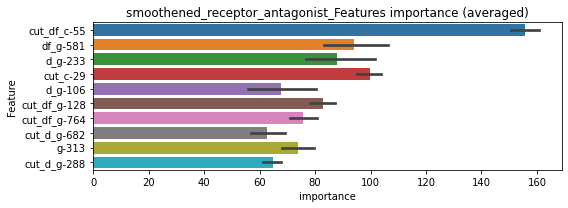

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 smoothened_receptor_antagonist=================================


Early stopping, best iteration is:
[171]	training's binary_logloss: 0.0012556	valid_1's binary_logloss: 0.0204995
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000347114	valid_1's binary_logloss: 0.0103885
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000367845	valid_1's binary_logloss: 0.00299843
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000353048	valid_1's binary_logloss: 0.00619884


smoothened_receptor_antagonist logloss: 0.010021329507573432


mutually exclusive columns: sodium_channel_inhibitor


sodium_channel_inhibitor, len(trt): 267, len(othr): 6860
target_rate: 0.0112119 → Adj_target_rate: 0.0096991


selected negative label: 6860


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.041688	valid_1's binary_logloss: 0.118184
Early stopping, best iteration is:
[1461]	training's binary_logloss: 0.0276832	valid_1's binary_logloss: 0.115043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.0420072	valid_1's binary_logloss: 0.141598
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0410587	valid_1's binary_logloss: 0.118668
Early stopping, best iteration is:
[1335]	training's binary_logloss: 0.0302881	valid_1's binary_logloss: 0.116379
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0412032	valid_1's binary_logloss: 0.125175
Early stopping, best iteration is:
[1172]	training's binary_logloss: 0.0350335	valid_1's binary_logloss: 0.12379


1 / 3, AUC score:0.963, PR-AUC:0.930
y_Threshold: 0.0553391, Threshold: 0.0903505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 585 → Positive_corect_labels: 1217/7647
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, Expected: 44.6, Threshold: 0.0903505, conf_0:0.06325, conf_1:0.11746
threshold: 0.0903505, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1217.0/7647, y_label_rate: 0.1591474
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0220524	valid_1's binary_logloss: 0.0720828
Early stopping, best iteration is:
[1356]	training's binary_logloss: 0.0161711	valid_1's binary_logloss: 0.0705356
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0229896	valid_1's binary_logloss: 0.0619063
Early stopping, best iteration is:
[1647]	training's binary_logloss: 0.0136893	valid_1's binary_logloss: 0.0587108
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239428	valid_1's binary_logloss: 0.0521009
[2000]	training's binary_logloss: 0.0115489	valid_1's binary_logloss: 0.0462316
Early stopping, best iteration is:
[2561]	training's binary_logloss: 0.00886208	valid_1's binary_logloss: 0.0450319
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0227735	valid_1's binary_logloss: 0.0647796
Early stop

2 / 3, AUC score:0.995, PR-AUC:0.986
y_Threshold: 0.0461601, Threshold: 0.0903505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 1161.0/7535
p_label_rate: 0.0032647 Vs.target_rate: 0.01121
Num_p_label: 13.0, Expected: 44.6, Threshold: 0.0903505, conf_0:0.07228, conf_1:0.10842
threshold: 0.0903505, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 1161.0/7535, y_label_rate: 0.1540810
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0161277	valid_1's binary_logloss: 0.0368874
[2000]	training's binary_logloss: 0.00797172	valid_1's binary_logloss: 0.0323056
Early stopping, best iteration is:
[2818]	training's binary_logloss: 0.00557751	valid_1's binary_logloss: 0.0310803
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0158554	valid_1's binary_logloss: 0.0401503
Early stopping, best iteration is:
[1401]	training's binary_logloss: 0.0112747	valid_1's binary_logloss: 0.0377911
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0161189	valid_1's binary_logloss: 0.0401154
Early stopping, best iteration is:
[1739]	training's binary_logloss: 0.00920346	valid_1's binary_logloss: 0.0364371
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0166917	valid_1's binary_logloss: 0.0322425
[2000]	t

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0370342, Threshold: 0.0903505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 1143.0/7499
p_label_rate: 0.0005023 Vs.target_rate: 0.01121
Num_p_label: 2.0, Expected: 44.6, Threshold: 0.0903505, conf_0:0.08132, conf_1:0.09939
threshold: 0.0903505, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 1143.0/7499, y_label_rate: 0.1524203


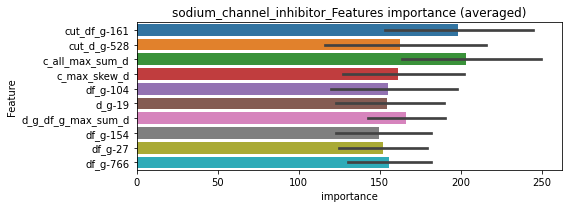

len(train_index) : 5624
len(valid_index) : 1875
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0201787	valid_1's binary_logloss: 0.0292751
[2000]	training's binary_logloss: 0.0104101	valid_1's binary_logloss: 0.02215
[3000]	training's binary_logloss: 0.00691533	valid_1's binary_logloss: 0.0197539
[4000]	training's binary_logloss: 0.00515713	valid_1's binary_logloss: 0.0186368
[5000]	training's binary_logloss: 0.00411608	valid_1's binary_logloss: 0.0180251
Early stopping, best iteration is:
[5386]	training's binary_logloss: 0.00381607	valid_1's binary_logloss: 0.017841


len(train_index) : 5624
len(valid_index) : 1875
================================= fold 2/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0189199	valid_1's binary_logloss: 0.0390097
[2000]	training's binary_logloss: 0.00984152	valid_1's binary_logloss: 0.0327866
[3000]	training's binary_logloss: 0.00656517	valid_1's binary_logloss: 0.0309554
Early stopping, best iteration is:
[3136]	training's binary_logloss: 0.00626728	valid_1's binary_logloss: 0.0307543


len(train_index) : 5624
len(valid_index) : 1875
================================= fold 3/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0196029	valid_1's binary_logloss: 0.0340789
[2000]	training's binary_logloss: 0.0101103	valid_1's binary_logloss: 0.026868
[3000]	training's binary_logloss: 0.00672928	valid_1's binary_logloss: 0.0244087
[4000]	training's binary_logloss: 0.00502039	valid_1's binary_logloss: 0.023349
Early stopping, best iteration is:
[4290]	training's binary_logloss: 0.00467548	valid_1's binary_logloss: 0.0231159


len(train_index) : 5625
len(valid_index) : 1874
================================= fold 4/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0199401	valid_1's binary_logloss: 0.0304332
[2000]	training's binary_logloss: 0.0102504	valid_1's binary_logloss: 0.0231045
[3000]	training's binary_logloss: 0.00682859	valid_1's binary_logloss: 0.0206013
[4000]	training's binary_logloss: 0.00511118	valid_1's binary_logloss: 0.0194566
Early stopping, best iteration is:
[4654]	training's binary_logloss: 0.00438875	valid_1's binary_logloss: 0.0189686


sodium_channel_inhibitor logloss: 0.022670451828161336
sphingosine_receptor_agonist, len(trt): 32, len(othr): 3285
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000368473	valid_1's binary_logloss: 0.0103804
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000431834	valid_1's binary_logloss: 0.0361775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000495887	valid_1's binary_logloss: 0.00807386
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016061, Threshold: 0.0030123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0030123, conf_0:0.00211, conf_1:0.00392
Num_p_label: 1.0, Expected: 5.4, Adj_threshold_1: 0.0330123


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000455251	valid_1's binary_logloss: 0.0103596


threshold: 0.0330123, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000364047	valid_1's binary_logloss: 0.00923273
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00134422	valid_1's binary_logloss: 0.0364827
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000482323	valid_1's binary_logloss: 0.00709759
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0121682, Threshold: 0.0330123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0002511 Vs.target_rate: 0.00134
Num_p_label: 1.0, Expected: 5.4, Threshold: 0.0330123, conf_0:0.02641, conf_1:0.03961


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00037402	valid_1's binary_logloss: 0.0100545


threshold: 0.0330123, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000621618	valid_1's binary_logloss: 0.0317897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000472064	valid_1's binary_logloss: 0.00693205
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000398976	valid_1's binary_logloss: 0.00758283
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0068592, Threshold: 0.0330123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0002511 Vs.target_rate: 0.00134
Num_p_label: 1.0, Expected: 5.4, Threshold: 0.0330123, conf_0:0.02971, conf_1:0.03631
threshold: 0.0330123, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000458364	valid_1's binary_logloss: 0.0178547


positive_y_label: 654.0/3804, y_label_rate: 0.1719243


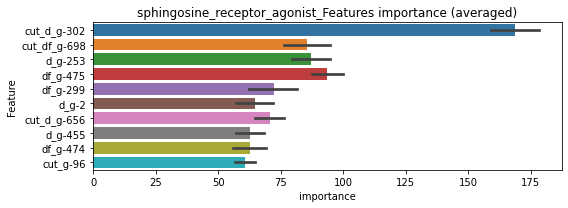

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 sphingosine_receptor_agonist=================================


Early stopping, best iteration is:
[277]	training's binary_logloss: 0.000800251	valid_1's binary_logloss: 0.0238674
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000378756	valid_1's binary_logloss: 0.00450959


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 sphingosine_receptor_agonist=================================


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000493942	valid_1's binary_logloss: 0.0114223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.000606138	valid_1's binary_logloss: 0.0154044


sphingosine_receptor_agonist logloss: 0.013800914919834666
src_inhibitor, len(trt): 71, len(othr): 3283
target_rate: 0.0029814 → Adj_target_rate: 0.0031461


selected negative label: 3283


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0250221	valid_1's binary_logloss: 0.0931104
Early stopping, best iteration is:
[1203]	training's binary_logloss: 0.0207594	valid_1's binary_logloss: 0.0909344
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0267597	valid_1's binary_logloss: 0.071634
[2000]	training's binary_logloss: 0.0130436	valid_1's binary_logloss: 0.0631647
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.0113626	valid_1's binary_logloss: 0.0621113
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0295978	valid_1's binary_logloss: 0.0352161
[2000]	training's binary_logloss: 0.014302	valid_1's binary_logloss: 0.0241935
[3000]	training's binary_logloss: 0.00931349	valid_1's binary_logloss: 0.0201577
[4000]	training's binary_logloss: 0.00690278	valid_1's binary_logloss: 0.0180723
[5000]	training's binary_lo

1 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0287808, Threshold: 0.0887525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 644/3783
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, Expected: 11.9, Threshold: 0.0887525, conf_0:0.06213, conf_1:0.11538
Num_p_label: 22.0, Expected: 11.9, Adj_threshold_1: 0.1187525
Num_p_label: 15.0, Expected: 11.9, Adj_threshold_2: 0.1487525
threshold: 0.1487525, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3783, y_label_rate: 0.1702353
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0235948	valid_1's binary_logloss: 0.0629033
[2000]	training's binary_logloss: 0.0116666	valid_1's binary_logloss: 0.0548459
Early stopping, best iteration is:
[2795]	training's binary_logloss: 0.00826183	valid_1's binary_logloss: 0.0524004
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0243042	valid_1's binary_logloss: 0.0543632
[2000]	training's binary_logloss: 0.011923	valid_1's binary_logloss: 0.0451083
[3000]	training's binary_logloss: 0.00782792	valid_1's binary_logloss: 0.0418451
Early stopping, best iteration is:
[3908]	training's binary_logloss: 0.0059665	valid_1's binary_logloss: 0.0402276
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239825	valid_1's binary_logloss: 0.0538553
[2000]	training's binary_logloss: 0.0118418	valid_1's binary_logloss: 0.0451823
Early stopping, best itera

2 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0458432, Threshold: 0.1487525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 632.0/3759
p_label_rate: 0.0128076 Vs.target_rate: 0.00298
Num_p_label: 51.0, Expected: 11.9, Threshold: 0.1487525, conf_0:0.11900, conf_1:0.17850
Num_p_label: 41.0, Expected: 11.9, Adj_threshold_1: 0.1787525
Num_p_label: 27.0, Expected: 11.9, Adj_threshold_2: 0.2087525
Num_p_label: 21.0, Expected: 11.9, Adj_threshold_3: 0.2387525
Num_p_label: 13.0, Expected: 11.9, Adj_threshold_4: 0.2687525
threshold: 0.2687525, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 632.0/3759, y_label_rate: 0.1681298
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0215773	valid_1's binary_logloss: 0.0491046
[2000]	training's binary_logloss: 0.0106512	valid_1's binary_logloss: 0.0413195
[3000]	training's binary_logloss: 0.00702046	valid_1's binary_logloss: 0.038772
Early stopping, best iteration is:
[3010]	training's binary_logloss: 0.00699482	valid_1's binary_logloss: 0.0387457
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0218646	valid_1's binary_logloss: 0.048643
[2000]	training's binary_logloss: 0.01081	valid_1's binary_logloss: 0.0404746
[3000]	training's binary_logloss: 0.00713115	valid_1's binary_logloss: 0.0375655
Early stopping, best iteration is:
[3463]	training's binary_logloss: 0.00617011	valid_1's binary_logloss: 0.0368825
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0218027	valid_1's binary_logloss: 0.0479563
[2000]	training's binary_lo

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0457829, Threshold: 0.2687525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 626.0/3747
p_label_rate: 0.0037670 Vs.target_rate: 0.00298
Num_p_label: 15.0, Expected: 11.9, Threshold: 0.2687525, conf_0:0.24188, conf_1:0.29563
threshold: 0.2687525, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 626.0/3747, y_label_rate: 0.1670670


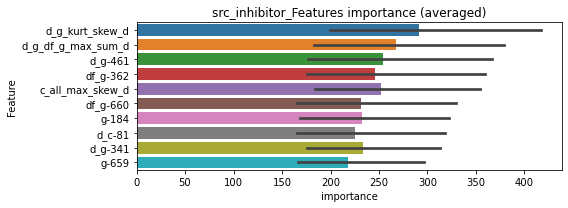

len(train_index) : 2810
len(valid_index) : 937
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0287605	valid_1's binary_logloss: 0.0532287
[2000]	training's binary_logloss: 0.014715	valid_1's binary_logloss: 0.0423814
[3000]	training's binary_logloss: 0.00980926	valid_1's binary_logloss: 0.0389796
[4000]	training's binary_logloss: 0.00735571	valid_1's binary_logloss: 0.0373772
Early stopping, best iteration is:
[4811]	training's binary_logloss: 0.00613218	valid_1's binary_logloss: 0.0366511


len(train_index) : 2810
len(valid_index) : 937
================================= fold 2/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0289725	valid_1's binary_logloss: 0.0558768
[2000]	training's binary_logloss: 0.014845	valid_1's binary_logloss: 0.0448745
[3000]	training's binary_logloss: 0.00990409	valid_1's binary_logloss: 0.0411907
Early stopping, best iteration is:
[3489]	training's binary_logloss: 0.00851576	valid_1's binary_logloss: 0.0402469


len(train_index) : 2810
len(valid_index) : 937
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0298464	valid_1's binary_logloss: 0.0487353
[2000]	training's binary_logloss: 0.0152949	valid_1's binary_logloss: 0.0364724
[3000]	training's binary_logloss: 0.0101978	valid_1's binary_logloss: 0.0321132
[4000]	training's binary_logloss: 0.00763743	valid_1's binary_logloss: 0.0297989
[5000]	training's binary_logloss: 0.00611575	valid_1's binary_logloss: 0.0283864
Early stopping, best iteration is:
[5819]	training's binary_logloss: 0.00525729	valid_1's binary_logloss: 0.0275686


len(train_index) : 2811
len(valid_index) : 936
================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0293844	valid_1's binary_logloss: 0.0519255
[2000]	training's binary_logloss: 0.0150951	valid_1's binary_logloss: 0.0393097
[3000]	training's binary_logloss: 0.0100972	valid_1's binary_logloss: 0.0346811
[4000]	training's binary_logloss: 0.00755641	valid_1's binary_logloss: 0.0323561
Early stopping, best iteration is:
[4833]	training's binary_logloss: 0.00627003	valid_1's binary_logloss: 0.0312555


src_inhibitor logloss: 0.033931252533222
src_inhibitor is unpredictable(><)!
steroid, len(trt): 79, len(othr): 3282
target_rate: 0.0033174 → Adj_target_rate: 0.0034449


selected negative label: 3282


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.029343	valid_1's binary_logloss: 0.0894501
Early stopping, best iteration is:
[1922]	training's binary_logloss: 0.0147873	valid_1's binary_logloss: 0.0825742
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0300252	valid_1's binary_logloss: 0.0756236
[2000]	training's binary_logloss: 0.014554	valid_1's binary_logloss: 0.0675458
[3000]	training's binary_logloss: 0.009465	valid_1's binary_logloss: 0.0646159
Early stopping, best iteration is:
[3239]	training's binary_logloss: 0.00874283	valid_1's binary_logloss: 0.0641972
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319614	valid_1's binary_logloss: 0.0542311
[2000]	training's binary_logloss: 0.0154578	valid_1's binary_logloss: 0.0452218
[3000]	training's binary_logloss: 0.0100527	valid_1's binary_logloss: 0.0423925
[4000]	training's binary_logl

1 / 3, AUC score:0.996, PR-AUC:0.986
y_Threshold: 0.0297641, Threshold: 0.2485174, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 638/3770
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, Expected: 13.2, Threshold: 0.2485174, conf_0:0.17396, conf_1:0.32307
Num_p_label: 29.0, Expected: 13.2, Adj_threshold_1: 0.2785174
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_2: 0.3085174
Num_p_label: 17.0, Expected: 13.2, Adj_threshold_3: 0.3385174
threshold: 0.3385174, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 638.0/3770, y_label_rate: 0.1692308
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0262925	valid_1's binary_logloss: 0.0631795
[2000]	training's binary_logloss: 0.0129327	valid_1's binary_logloss: 0.0548697
Early stopping, best iteration is:
[2284]	training's binary_logloss: 0.0112592	valid_1's binary_logloss: 0.0538245
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0263421	valid_1's binary_logloss: 0.0613939
[2000]	training's binary_logloss: 0.0129208	valid_1's binary_logloss: 0.0519356
[3000]	training's binary_logloss: 0.00845163	valid_1's binary_logloss: 0.0488603
Early stopping, best iteration is:
[3009]	training's binary_logloss: 0.00842409	valid_1's binary_logloss: 0.0488414
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0264341	valid_1's binary_logloss: 0.0567427
[2000]	training's binary_logloss: 0.0129647	valid_1's binary_logloss: 0.0485211
Early stopping, best iter

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0473555, Threshold: 0.3385174, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 617.0/3728
p_label_rate: 0.0218483 Vs.target_rate: 0.00332
Num_p_label: 87.0, Expected: 13.2, Threshold: 0.3385174, conf_0:0.27081, conf_1:0.40622
Num_p_label: 78.0, Expected: 13.2, Adj_threshold_1: 0.3685174
Num_p_label: 70.0, Expected: 13.2, Adj_threshold_2: 0.3985174
Num_p_label: 61.0, Expected: 13.2, Adj_threshold_3: 0.4285174
Num_p_label: 51.0, Expected: 13.2, Adj_threshold_4: 0.4585174
Num_p_label: 38.0, Expected: 13.2, Adj_threshold_5: 0.4885174
Num_p_label: 32.0, Expected: 13.2, Adj_threshold_6: 0.5185174
Num_p_label: 24.0, Expected: 13.2, Adj_threshold_7: 0.5485174
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_8: 0.5785174
Num_p_label: 15.0, Expected: 13.2, Adj_threshold_9: 0.6085174
threshold: 0.6085174, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 617.0/3728, y_label_rate: 0.1655043
==========

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0215758	valid_1's binary_logloss: 0.051781
[2000]	training's binary_logloss: 0.0107111	valid_1's binary_logloss: 0.043556
Early stopping, best iteration is:
[2896]	training's binary_logloss: 0.00732099	valid_1's binary_logloss: 0.0409499
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0212749	valid_1's binary_logloss: 0.0493035
[2000]	training's binary_logloss: 0.0105232	valid_1's binary_logloss: 0.0412307
[3000]	training's binary_logloss: 0.00696888	valid_1's binary_logloss: 0.0385256
Early stopping, best iteration is:
[3319]	training's binary_logloss: 0.0062928	valid_1's binary_logloss: 0.0381147
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0224502	valid_1's binary_logloss: 0.0388503
[2000]	training's binary_logloss: 0.0111153	valid_1's binary_logloss: 0.0299193
[3000]	training's binary_lo

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0361489, Threshold: 0.6085174, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 606.0/3706
p_label_rate: 0.0105475 Vs.target_rate: 0.00332
Num_p_label: 42.0, Expected: 13.2, Threshold: 0.6085174, conf_0:0.54767, conf_1:0.66937
Num_p_label: 32.0, Expected: 13.2, Adj_threshold_1: 0.6385174
Num_p_label: 29.0, Expected: 13.2, Adj_threshold_2: 0.6685174
Num_p_label: 20.0, Expected: 13.2, Adj_threshold_3: 0.6985174
Num_p_label: 15.0, Expected: 13.2, Adj_threshold_4: 0.7285174
threshold: 0.7285174, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 606.0/3706, y_label_rate: 0.1635186


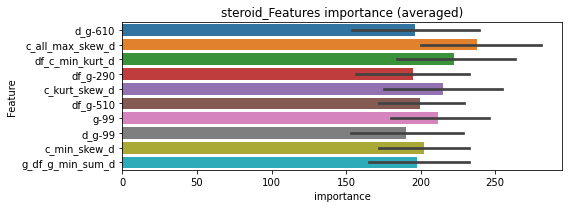

len(train_index) : 2779
len(valid_index) : 927
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0266351	valid_1's binary_logloss: 0.0465762
[2000]	training's binary_logloss: 0.0136456	valid_1's binary_logloss: 0.0351337
[3000]	training's binary_logloss: 0.00915492	valid_1's binary_logloss: 0.0312742
[4000]	training's binary_logloss: 0.00687709	valid_1's binary_logloss: 0.0294008
[5000]	training's binary_logloss: 0.00553567	valid_1's binary_logloss: 0.028384
Early stopping, best iteration is:
[4996]	training's binary_logloss: 0.00553991	valid_1's binary_logloss: 0.028383


len(train_index) : 2779
len(valid_index) : 927
================================= fold 2/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270652	valid_1's binary_logloss: 0.0449823
[2000]	training's binary_logloss: 0.0139241	valid_1's binary_logloss: 0.0330378
[3000]	training's binary_logloss: 0.00931532	valid_1's binary_logloss: 0.0290128
[4000]	training's binary_logloss: 0.00700692	valid_1's binary_logloss: 0.0270289
[5000]	training's binary_logloss: 0.0056272	valid_1's binary_logloss: 0.0258793
[6000]	training's binary_logloss: 0.00470088	valid_1's binary_logloss: 0.0250883
Early stopping, best iteration is:
[6599]	training's binary_logloss: 0.00428119	valid_1's binary_logloss: 0.0247108


len(train_index) : 2780
len(valid_index) : 926
================================= fold 3/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0286044	valid_1's binary_logloss: 0.0378761
[2000]	training's binary_logloss: 0.0146966	valid_1's binary_logloss: 0.0243998
[3000]	training's binary_logloss: 0.00982461	valid_1's binary_logloss: 0.0196932
[4000]	training's binary_logloss: 0.00736786	valid_1's binary_logloss: 0.0172742
[5000]	training's binary_logloss: 0.00590923	valid_1's binary_logloss: 0.015882
[6000]	training's binary_logloss: 0.00493091	valid_1's binary_logloss: 0.0148915
[7000]	training's binary_logloss: 0.00423564	valid_1's binary_logloss: 0.0141578
[8000]	training's binary_logloss: 0.00372488	valid_1's binary_logloss: 0.0136061
[9000]	training's binary_logloss: 0.0033275	valid_1's binary_logloss: 0.0131935
[10000]	training's binary_logloss: 0.00301106	valid_1's binary_logloss: 0.0128937
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00301106	valid_1's binary_logloss: 0.0128937


len(train_index) : 2780
len(valid_index) : 926
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0269209	valid_1's binary_logloss: 0.0433689
[2000]	training's binary_logloss: 0.0137562	valid_1's binary_logloss: 0.032371
[3000]	training's binary_logloss: 0.00921272	valid_1's binary_logloss: 0.0289174
[4000]	training's binary_logloss: 0.00691463	valid_1's binary_logloss: 0.0272493
[5000]	training's binary_logloss: 0.00554196	valid_1's binary_logloss: 0.0262653
Early stopping, best iteration is:
[5382]	training's binary_logloss: 0.00515339	valid_1's binary_logloss: 0.0260065


steroid logloss: 0.023000387964482987
syk_inhibitor, len(trt): 19, len(othr): 3283
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3283


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.000925673	valid_1's binary_logloss: 0.0240411
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000280086	valid_1's binary_logloss: 0.00408112
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000281182	valid_1's binary_logloss: 0.00118917
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014646, Threshold: 0.0032469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0032469, conf_0:0.00227, conf_1:0.00422
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0332469


Early stopping, best iteration is:
[429]	training's binary_logloss: 0.000312786	valid_1's binary_logloss: 0.00776505


threshold: 0.0332469, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[229]	training's binary_logloss: 0.00143584	valid_1's binary_logloss: 0.0230745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000275717	valid_1's binary_logloss: 0.00285236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00028116	valid_1's binary_logloss: 0.000620278
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0089683, Threshold: 0.0332469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.0332469, conf_0:0.02660, conf_1:0.03990
threshold: 0.0332469, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000361631	valid_1's binary_logloss: 0.00777784


positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000357926	valid_1's binary_logloss: 0.0161292
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000344675	valid_1's binary_logloss: 0.0054161
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000277462	valid_1's binary_logloss: 0.00184895
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0116174, Threshold: 0.0332469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, Expected: 3.2, Threshold: 0.0332469, conf_0:0.02992, conf_1:0.03657
threshold: 0.0332469, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000362573	valid_1's binary_logloss: 0.00664076


positive_y_label: 655.0/3805, y_label_rate: 0.1721419


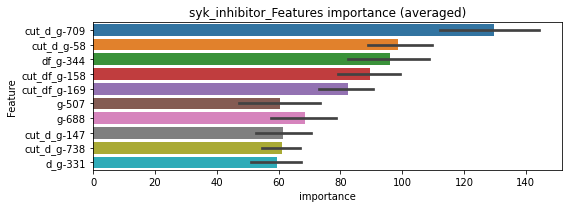

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 syk_inhibitor=================================


Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00041436	valid_1's binary_logloss: 0.0133832
Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 syk_inhibitor=================================


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000317635	valid_1's binary_logloss: 0.00437738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000296194	valid_1's binary_logloss: 0.00155614


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


syk_inhibitor logloss: 0.006378552169681731


Early stopping, best iteration is:
[328]	training's binary_logloss: 0.000483774	valid_1's binary_logloss: 0.00619011


tachykinin_antagonist, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3281


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.0032729	valid_1's binary_logloss: 0.068178
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000581302	valid_1's binary_logloss: 0.0344256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000600921	valid_1's binary_logloss: 0.0116105
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000711636	valid_1's binary_logloss: 0.0337952


y_Threshold: 0.0053926, Threshold: 0.0096737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0096737, conf_0:0.00677, conf_1:0.01258
Num_p_label: 0.0, Expected: 10.0, Adj_threshold_1: 0.0396737
threshold: 0.0396737, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00146873	valid_1's binary_logloss: 0.0438989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.0010284	valid_1's binary_logloss: 0.0344205
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000609628	valid_1's binary_logloss: 0.0248557
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0166535, Threshold: 0.0396737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0005023 Vs.target_rate: 0.00252
Num_p_label: 2.0, Expected: 10.0, Threshold: 0.0396737, conf_0:0.03174, conf_1:0.04761
threshold: 0.0396737, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[379]	training's binary_logloss: 0.0012023	valid_1's binary_logloss: 0.0368478


positive_y_label: 648.0/3789, y_label_rate: 0.1710214
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00186469	valid_1's binary_logloss: 0.0363523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.0013501	valid_1's binary_logloss: 0.0375256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000552261	valid_1's binary_logloss: 0.019075
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0242463, Threshold: 0.0396737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 645.0/3783
p_label_rate: 0.0010045 Vs.target_rate: 0.00252
Num_p_label: 4.0, Expected: 10.0, Threshold: 0.0396737, conf_0:0.03571, conf_1:0.04364
threshold: 0.0396737, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[327]	training's binary_logloss: 0.00161191	valid_1's binary_logloss: 0.0337735


positive_y_label: 645.0/3783, y_label_rate: 0.1704996


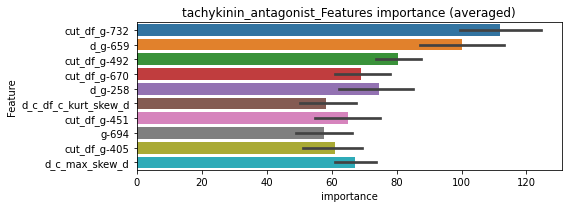

len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 tachykinin_antagonist=================================


Early stopping, best iteration is:
[265]	training's binary_logloss: 0.00131625	valid_1's binary_logloss: 0.0322964
Training until validation scores don't improve for 30 rounds


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 tachykinin_antagonist=================================


Early stopping, best iteration is:
[258]	training's binary_logloss: 0.00137791	valid_1's binary_logloss: 0.0308797
Training until validation scores don't improve for 30 rounds


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 tachykinin_antagonist=================================


Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000733592	valid_1's binary_logloss: 0.0162841
Training until validation scores don't improve for 30 rounds


tachykinin_antagonist logloss: 0.027429344779054805


Early stopping, best iteration is:
[299]	training's binary_logloss: 0.00114024	valid_1's binary_logloss: 0.0302602


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3286
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3286


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.0004393	valid_1's binary_logloss: 0.0133829
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.000449555	valid_1's binary_logloss: 0.0269013
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00037852	valid_1's binary_logloss: 0.00242997
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016303, Threshold: 0.0052165, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0052165, conf_0:0.00365, conf_1:0.00678
Num_p_label: 0.0, Expected: 5.0, Adj_threshold_1: 0.0352165


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000537629	valid_1's binary_logloss: 0.0190151


threshold: 0.0352165, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000486468	valid_1's binary_logloss: 0.0139182
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.00045661	valid_1's binary_logloss: 0.0270645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000379993	valid_1's binary_logloss: 0.00198025
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0079298, Threshold: 0.0352165, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0012557 Vs.target_rate: 0.00126
Num_p_label: 5.0, Expected: 5.0, Threshold: 0.0352165, conf_0:0.02817, conf_1:0.04226


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000427742	valid_1's binary_logloss: 0.0173415


threshold: 0.0352165, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000586001	valid_1's binary_logloss: 0.0331866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000390423	valid_1's binary_logloss: 0.00694598
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000370317	valid_1's binary_logloss: 0.00482257
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0127170, Threshold: 0.0352165, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, Expected: 5.0, Threshold: 0.0352165, conf_0:0.03169, conf_1:0.03874


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000383763	valid_1's binary_logloss: 0.0162606


threshold: 0.0352165, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


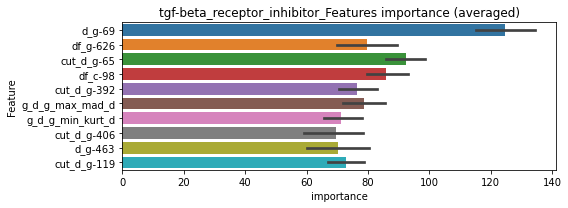

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Early stopping, best iteration is:
[243]	training's binary_logloss: 0.000968126	valid_1's binary_logloss: 0.0242383
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000525975	valid_1's binary_logloss: 0.00638914
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000402967	valid_1's binary_logloss: 0.00649275


================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


tgf-beta_receptor_inhibitor logloss: 0.01306188261834874


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000428601	valid_1's binary_logloss: 0.0151295


thrombin_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000323643	valid_1's binary_logloss: 0.0116957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000339699	valid_1's binary_logloss: 0.015176
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000284005	valid_1's binary_logloss: 0.000398242
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011047, Threshold: 0.0027301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0027301, conf_0:0.00191, conf_1:0.00355
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0327301


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000306719	valid_1's binary_logloss: 0.00730068


threshold: 0.0327301, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000431194	valid_1's binary_logloss: 0.0120131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000319652	valid_1's binary_logloss: 0.0135287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000284606	valid_1's binary_logloss: 0.000420063
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0062744, Threshold: 0.0327301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00080
Num_p_label: 2.0, Expected: 3.2, Threshold: 0.0327301, conf_0:0.02618, conf_1:0.03928


Early stopping, best iteration is:
[425]	training's binary_logloss: 0.00031344	valid_1's binary_logloss: 0.00691215


threshold: 0.0327301, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000283854	valid_1's binary_logloss: 0.00834576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000320329	valid_1's binary_logloss: 0.00841467
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000279094	valid_1's binary_logloss: 0.000715315
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0085387, Threshold: 0.0327301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0327301, conf_0:0.02946, conf_1:0.03600
threshold: 0.0327301, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[349]	training's binary_logloss: 0.000440902	valid_1's binary_logloss: 0.0127307


positive_y_label: 656.0/3811, y_label_rate: 0.1721333


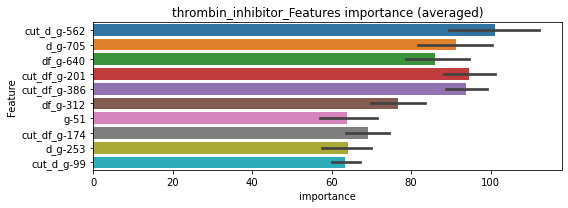

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000293047	valid_1's binary_logloss: 0.0075001
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000364487	valid_1's binary_logloss: 0.00699641
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 thrombin_inhibitor=================================


Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00029579	valid_1's binary_logloss: 0.0004711
Training until validation scores don't improve for 30 rounds


thrombin_inhibitor logloss: 0.006575408018075515


Early stopping, best iteration is:
[416]	training's binary_logloss: 0.000388483	valid_1's binary_logloss: 0.011339


thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000511895	valid_1's binary_logloss: 0.0237537
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.00050777	valid_1's binary_logloss: 0.038118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000545426	valid_1's binary_logloss: 0.00945958
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018009, Threshold: 0.0084499, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0084499, conf_0:0.00591, conf_1:0.01098
Num_p_label: 8.0, Expected: 6.2, Adj_threshold_1: 0.0384499


Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000494173	valid_1's binary_logloss: 0.0214051


threshold: 0.0384499, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000507047	valid_1's binary_logloss: 0.0216784
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000461498	valid_1's binary_logloss: 0.0344344
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000391781	valid_1's binary_logloss: 0.00631668
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0095350, Threshold: 0.0384499, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0067805 Vs.target_rate: 0.00155
Num_p_label: 27.0, Expected: 6.2, Threshold: 0.0384499, conf_0:0.03076, conf_1:0.04614
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_1: 0.0684499
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_2: 0.0984499
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_3: 0.1284499


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000509788	valid_1's binary_logloss: 0.0179972


threshold: 0.1284499, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000491365	valid_1's binary_logloss: 0.0286146
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.0004305	valid_1's binary_logloss: 0.0159272
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00042574	valid_1's binary_logloss: 0.0138594
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0100832, Threshold: 0.1284499, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, Expected: 6.2, Threshold: 0.1284499, conf_0:0.11560, conf_1:0.14129
threshold: 0.1284499, positive_p_label: 12.0/3982, p_label_rate: 0.0030136


Early stopping, best iteration is:
[259]	training's binary_logloss: 0.00186433	valid_1's binary_logloss: 0.0335657


positive_y_label: 654.0/3804, y_label_rate: 0.1719243


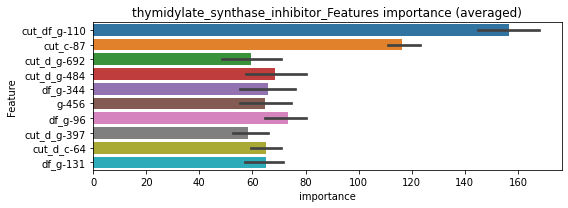

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000434626	valid_1's binary_logloss: 0.0187874
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000492306	valid_1's binary_logloss: 0.0124753
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000588798	valid_1's binary_logloss: 0.0138118
Training until validation scores don't improve for 30 rounds


thymidylate_synthase_inhibitor logloss: 0.016352247677911977


Early stopping, best iteration is:
[285]	training's binary_logloss: 0.00086532	valid_1's binary_logloss: 0.0203345


tlr_agonist, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000361919	valid_1's binary_logloss: 0.0112169
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000455843	valid_1's binary_logloss: 0.02811
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000344927	valid_1's binary_logloss: 0.00530539
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012953, Threshold: 0.0112327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0112327, conf_0:0.00786, conf_1:0.01460
Num_p_label: 25.0, Expected: 5.0, Adj_threshold_1: 0.0412327


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00034647	valid_1's binary_logloss: 0.0132727


Num_p_label: 20.0, Expected: 5.0, Adj_threshold_2: 0.0712327
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_3: 0.1012327
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_4: 0.1312327
threshold: 0.1312327, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000331485	valid_1's binary_logloss: 0.007733
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.000644457	valid_1's binary_logloss: 0.0270654
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000362705	valid_1's binary_logloss: 0.00470973
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0193478, Threshold: 0.1312327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0082873 Vs.target_rate: 0.00126
Num_p_label: 33.0, Expected: 5.0, Threshold: 0.1312327, conf_0:0.10499, conf_1:0.15748
Num_p_label: 29.0, Expected: 5.0, Adj_threshold_1: 0.1612327


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000339138	valid_1's binary_logloss: 0.00921681


Num_p_label: 24.0, Expected: 5.0, Adj_threshold_2: 0.1912327
Num_p_label: 23.0, Expected: 5.0, Adj_threshold_3: 0.2212327
Num_p_label: 22.0, Expected: 5.0, Adj_threshold_4: 0.2512327
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_5: 0.2812327
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_6: 0.3112327
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_7: 0.3412327
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_8: 0.3712327
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_9: 0.4012327
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_10: 0.4312327
threshold: 0.4312327, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000351259	valid_1's binary_logloss: 0.0145352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000417794	valid_1's binary_logloss: 0.0104022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000353134	valid_1's binary_logloss: 0.00148149
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0099720, Threshold: 0.4312327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3806
p_label_rate: 0.0045203 Vs.target_rate: 0.00126
Num_p_label: 18.0, Expected: 5.0, Threshold: 0.4312327, conf_0:0.38811, conf_1:0.47436
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_1: 0.4612327
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_2: 0.4912327
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_3: 0.5212327


Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000469348	valid_1's binary_logloss: 0.0294241


threshold: 0.5212327, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3806, y_label_rate: 0.1718339


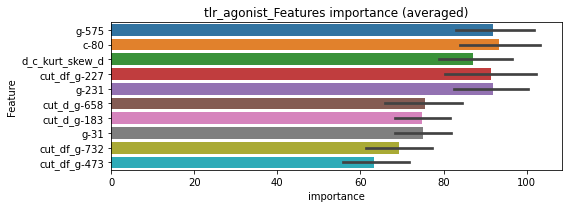

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 tlr_agonist=================================


Early stopping, best iteration is:
[306]	training's binary_logloss: 0.000676818	valid_1's binary_logloss: 0.0191178
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 tlr_agonist=================================


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000398997	valid_1's binary_logloss: 0.00454076
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 tlr_agonist=================================


Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000391996	valid_1's binary_logloss: 0.00442164
Training until validation scores don't improve for 30 rounds


tlr_agonist logloss: 0.008543570131347378


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000401394	valid_1's binary_logloss: 0.00608722


tlr_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000164971	valid_1's binary_logloss: 0.00126481
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000178067	valid_1's binary_logloss: 0.00618936
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000163994	valid_1's binary_logloss: 0.000196226
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004901, Threshold: 0.0011115, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000157867	valid_1's binary_logloss: 0.000464855


Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0011115, conf_0:0.00078, conf_1:0.00144
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0311115
threshold: 0.0311115, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000157096	valid_1's binary_logloss: 0.000663539
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000162671	valid_1's binary_logloss: 0.00497074
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000159104	valid_1's binary_logloss: 0.000154689
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0156502, Threshold: 0.0311115, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00029
Num_p_label: 7.0, Expected: 1.2, Threshold: 0.0311115, conf_0:0.02489, conf_1:0.03733
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_1: 0.0611115
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_2: 0.0911115
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.1211115
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_4: 0.1511115


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000152713	valid_1's binary_logloss: 0.000356438


threshold: 0.1511115, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000157096	valid_1's binary_logloss: 0.000663539
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000162671	valid_1's binary_logloss: 0.00497074
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000159104	valid_1's binary_logloss: 0.000154689
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0156502, Threshold: 0.1511115, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.1511115, conf_0:0.13600, conf_1:0.16622
threshold: 0.1511115, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000152713	valid_1's binary_logloss: 0.000356438


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


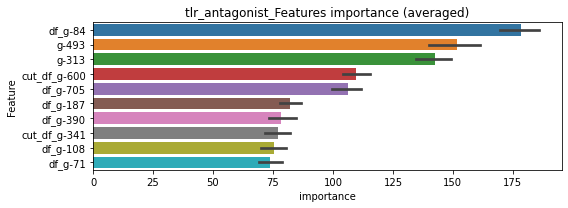

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


[1000]	training's binary_logloss: 0.000155819	valid_1's binary_logloss: 0.000520646
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000156036	valid_1's binary_logloss: 0.000520448
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000164346	valid_1's binary_logloss: 0.00473508
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000158507	valid_1's binary_logloss: 0.000151187
Training until validation scores don't improve for 30 rounds


tlr_antagonist logloss: 0.001475136200749998


[1000]	training's binary_logloss: 0.000155095	valid_1's binary_logloss: 0.000494905
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000155488	valid_1's binary_logloss: 0.000494592


tnf_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:503
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000613272	valid_1's binary_logloss: 0.024472
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000494868	valid_1's binary_logloss: 0.0248485
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000519049	valid_1's binary_logloss: 0.00545517
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022828, Threshold: 0.0076396, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0076396, conf_0:0.00535, conf_1:0.00993
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_1: 0.0376396


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000432516	valid_1's binary_logloss: 0.0201821


threshold: 0.0376396, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000593884	valid_1's binary_logloss: 0.0211392
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000479551	valid_1's binary_logloss: 0.0237393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000437657	valid_1's binary_logloss: 0.00379149
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0122193, Threshold: 0.0376396, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0080362 Vs.target_rate: 0.00151
Num_p_label: 32.0, Expected: 6.0, Threshold: 0.0376396, conf_0:0.03011, conf_1:0.04517
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0676396
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.0976396
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_3: 0.1276396


Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000623444	valid_1's binary_logloss: 0.0181045


threshold: 0.1276396, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000498575	valid_1's binary_logloss: 0.0238712
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000537608	valid_1's binary_logloss: 0.0160975
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00038194	valid_1's binary_logloss: 0.00258677
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0132700, Threshold: 0.1276396, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.1276396, conf_0:0.11488, conf_1:0.14040
threshold: 0.1276396, positive_p_label: 14.0/3982, p_label_rate: 0.0035158


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00075544	valid_1's binary_logloss: 0.0265442


positive_y_label: 655.0/3807, y_label_rate: 0.1720515


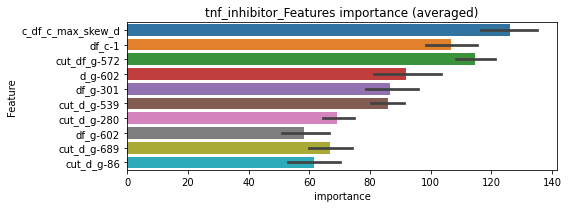

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 tnf_inhibitor=================================


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.000935452	valid_1's binary_logloss: 0.0256323
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 tnf_inhibitor=================================


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000454205	valid_1's binary_logloss: 0.00763908
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 tnf_inhibitor=================================


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.000652783	valid_1's binary_logloss: 0.012341
Training until validation scores don't improve for 30 rounds


tnf_inhibitor logloss: 0.014071167552864165


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000444349	valid_1's binary_logloss: 0.0106688


topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574


selected negative label: 3276


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0404438	valid_1's binary_logloss: 0.142348
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.0301767	valid_1's binary_logloss: 0.138401
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0418888	valid_1's binary_logloss: 0.115767
[2000]	training's binary_logloss: 0.0205281	valid_1's binary_logloss: 0.10617
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0194917	valid_1's binary_logloss: 0.105821
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0447174	valid_1's binary_logloss: 0.0803528
[2000]	training's binary_logloss: 0.0218949	valid_1's binary_logloss: 0.0634602
[3000]	training's binary_logloss: 0.0142441	valid_1's binary_logloss: 0.0574759
[4000]	training's binary_logloss: 0.0105319	valid_1's binary_logloss: 0.0541419
[5000]	training's binary_logloss:

1 / 3, AUC score:0.987, PR-AUC:0.967
y_Threshold: 0.0522737, Threshold: 0.1673743, pos_neg_ratio: 0.8000000
Remove_noisy_data: 212 → Positive_corect_labels: 615/3719
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, Expected: 21.2, Threshold: 0.1673743, conf_0:0.11716, conf_1:0.21759
Num_p_label: 26.0, Expected: 21.2, Adj_threshold_1: 0.1973743
threshold: 0.1973743, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 615.0/3719, y_label_rate: 0.1653670
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0330872	valid_1's binary_logloss: 0.095964
Early stopping, best iteration is:
[1678]	training's binary_logloss: 0.0195877	valid_1's binary_logloss: 0.0885051
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0332138	valid_1's binary_logloss: 0.0893476
[2000]	training's binary_logloss: 0.0164458	valid_1's binary_logloss: 0.0765295
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0156244	valid_1's binary_logloss: 0.07597
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0349344	valid_1's binary_logloss: 0.0684656
[2000]	training's binary_logloss: 0.0172136	valid_1's binary_logloss: 0.0551085
[3000]	training's binary_logloss: 0.011312	valid_1's binary_logloss: 0.0501655
[4000]	training's binary_logloss: 0.00841888	valid_1's binary_logloss: 0.0476931
Early stopping, best iteration

2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0745376, Threshold: 0.1973743, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 587.0/3663
p_label_rate: 0.0331492 Vs.target_rate: 0.00533
Num_p_label: 132.0, Expected: 21.2, Threshold: 0.1973743, conf_0:0.15790, conf_1:0.23685
Num_p_label: 114.0, Expected: 21.2, Adj_threshold_1: 0.2273743
Num_p_label: 94.0, Expected: 21.2, Adj_threshold_2: 0.2573743
Num_p_label: 79.0, Expected: 21.2, Adj_threshold_3: 0.2873743
Num_p_label: 60.0, Expected: 21.2, Adj_threshold_4: 0.3173743
Num_p_label: 44.0, Expected: 21.2, Adj_threshold_5: 0.3473743
Num_p_label: 36.0, Expected: 21.2, Adj_threshold_6: 0.3773743
Num_p_label: 26.0, Expected: 21.2, Adj_threshold_7: 0.4073743
threshold: 0.4073743, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 587.0/3663, y_label_rate: 0.1602512
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0283677	valid_1's binary_logloss: 0.0621063
[2000]	training's binary_logloss: 0.0140342	valid_1's binary_logloss: 0.0528901
Early stopping, best iteration is:
[2620]	training's binary_logloss: 0.0106578	valid_1's binary_logloss: 0.0508277
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0268614	valid_1's binary_logloss: 0.0802103
Early stopping, best iteration is:
[1853]	training's binary_logloss: 0.0144152	valid_1's binary_logloss: 0.0719362
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0284186	valid_1's binary_logloss: 0.0586468
[2000]	training's binary_logloss: 0.0141931	valid_1's binary_logloss: 0.0459576
[3000]	training's binary_logloss: 0.0094113	valid_1's binary_logloss: 0.041231
[4000]	training's binary_logloss: 0.00705037	valid_1's binary_logloss: 0.0387059
Early stopping, best iterat

3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0681860, Threshold: 0.4073743, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 567.0/3623
p_label_rate: 0.0241085 Vs.target_rate: 0.00533
Num_p_label: 96.0, Expected: 21.2, Threshold: 0.4073743, conf_0:0.36664, conf_1:0.44811
Num_p_label: 86.0, Expected: 21.2, Adj_threshold_1: 0.4373743
Num_p_label: 75.0, Expected: 21.2, Adj_threshold_2: 0.4673743
Num_p_label: 67.0, Expected: 21.2, Adj_threshold_3: 0.4973743
Num_p_label: 60.0, Expected: 21.2, Adj_threshold_4: 0.5273743
Num_p_label: 47.0, Expected: 21.2, Adj_threshold_5: 0.5573743
Num_p_label: 35.0, Expected: 21.2, Adj_threshold_6: 0.5873743
Num_p_label: 23.0, Expected: 21.2, Adj_threshold_7: 0.6173743
threshold: 0.6173743, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 567.0/3623, y_label_rate: 0.1565001


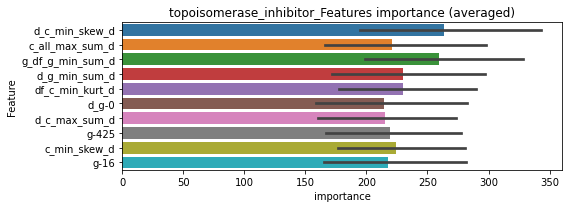

len(train_index) : 2717
len(valid_index) : 906
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0344937	valid_1's binary_logloss: 0.0580169
[2000]	training's binary_logloss: 0.0176447	valid_1's binary_logloss: 0.0434828
[3000]	training's binary_logloss: 0.0118325	valid_1's binary_logloss: 0.0384084
[4000]	training's binary_logloss: 0.0088896	valid_1's binary_logloss: 0.0360152
[5000]	training's binary_logloss: 0.00711647	valid_1's binary_logloss: 0.0346379
[6000]	training's binary_logloss: 0.00594953	valid_1's binary_logloss: 0.0336785
[7000]	training's binary_logloss: 0.00512496	valid_1's binary_logloss: 0.0330218
Early stopping, best iteration is:
[7421]	training's binary_logloss: 0.0048454	valid_1's binary_logloss: 0.0327959


len(train_index) : 2717
len(valid_index) : 906
================================= fold 2/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0312526	valid_1's binary_logloss: 0.0860698
[2000]	training's binary_logloss: 0.0159475	valid_1's binary_logloss: 0.0751113
Early stopping, best iteration is:
[2573]	training's binary_logloss: 0.0124366	valid_1's binary_logloss: 0.0726208


len(train_index) : 2717
len(valid_index) : 906
================================= fold 3/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0359022	valid_1's binary_logloss: 0.0468376
[2000]	training's binary_logloss: 0.0184083	valid_1's binary_logloss: 0.0307934
[3000]	training's binary_logloss: 0.0123497	valid_1's binary_logloss: 0.0251493
[4000]	training's binary_logloss: 0.00926016	valid_1's binary_logloss: 0.0219576
[5000]	training's binary_logloss: 0.00743661	valid_1's binary_logloss: 0.020002
[6000]	training's binary_logloss: 0.00622063	valid_1's binary_logloss: 0.0186003
[7000]	training's binary_logloss: 0.00535181	valid_1's binary_logloss: 0.0175909
[8000]	training's binary_logloss: 0.00470811	valid_1's binary_logloss: 0.0168132
[9000]	training's binary_logloss: 0.00420646	valid_1's binary_logloss: 0.0161328
[10000]	training's binary_logloss: 0.00380385	valid_1's binary_logloss: 0.0156287
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00380385	valid_1's binary_logloss: 0.0156287


len(train_index) : 2718
len(valid_index) : 905
================================= fold 4/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.034828	valid_1's binary_logloss: 0.056821
[2000]	training's binary_logloss: 0.0178797	valid_1's binary_logloss: 0.0419405
[3000]	training's binary_logloss: 0.0119355	valid_1's binary_logloss: 0.0366319
[4000]	training's binary_logloss: 0.0089436	valid_1's binary_logloss: 0.0339285
Early stopping, best iteration is:
[4812]	training's binary_logloss: 0.00744121	valid_1's binary_logloss: 0.032595


topoisomerase_inhibitor logloss: 0.03841171031488691
topoisomerase_inhibitor is unpredictable(><)!
transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000280502	valid_1's binary_logloss: 0.00478544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000327028	valid_1's binary_logloss: 0.0121132
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000280768	valid_1's binary_logloss: 0.00211238
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000295626	valid_1's binary_logloss: 0.00909457


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009939, Threshold: 0.0054995, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0054995, conf_0:0.00385, conf_1:0.00715
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0354995
threshold: 0.0354995, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000265659	valid_1's binary_logloss: 0.00353138
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00026886	valid_1's binary_logloss: 0.00982765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000267436	valid_1's binary_logloss: 0.00138705
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1049998, Threshold: 0.0354995, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0223506 Vs.target_rate: 0.00076
Num_p_label: 89.0, Expected: 3.0, Threshold: 0.0354995, conf_0:0.02840, conf_1:0.04260
Num_p_label: 63.0, Expected: 3.0, Adj_threshold_1: 0.0654995
Num_p_label: 50.0, Expected: 3.0, Adj_threshold_2: 0.0954995
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_3: 0.1254995
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_4: 0.1554995
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_5: 0.1854995
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_6: 0.2154995
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_7: 0.2454995
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_8: 0.2754995


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000277919	valid_1's binary_logloss: 0.00750079


Num_p_label: 21.0, Expected: 3.0, Adj_threshold_9: 0.3054995
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_10: 0.3354995
threshold: 0.3354995, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000281826	valid_1's binary_logloss: 0.0101728
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000269246	valid_1's binary_logloss: 0.00622474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00026334	valid_1's binary_logloss: 0.000327306
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0737230, Threshold: 0.3354995, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000259639	valid_1's binary_logloss: 0.00531671


p_label_rate: 0.0070316 Vs.target_rate: 0.00076
Num_p_label: 28.0, Expected: 3.0, Threshold: 0.3354995, conf_0:0.30195, conf_1:0.36905
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_1: 0.3654995
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.3954995
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_3: 0.4254995
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_4: 0.4554995
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_5: 0.4854995
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_6: 0.5154995
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_7: 0.5454995
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.5754995
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.6054995
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_10: 0.6354995
threshold: 0.6354995, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


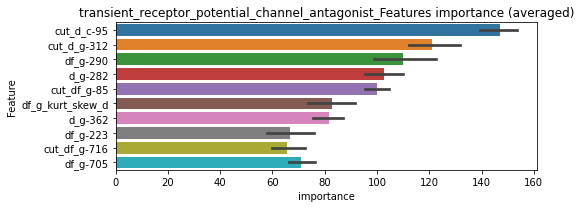

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Early stopping, best iteration is:
[459]	training's binary_logloss: 0.00033209	valid_1's binary_logloss: 0.00945674
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000263773	valid_1's binary_logloss: 0.000958204
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000276528	valid_1's binary_logloss: 0.00139213
Training until validation scores don't improve for 30 rounds


transient_receptor_potential_channel_antagonist logloss: 0.0031896039011233375


Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000272151	valid_1's binary_logloss: 0.000946874


tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.000172919	valid_1's binary_logloss: 0.00174248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000146275	valid_1's binary_logloss: 0.000241385
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000146066	valid_1's binary_logloss: 0.000168775
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003956, Threshold: 0.0013217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0013217, conf_0:0.00093, conf_1:0.00172
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0313217
threshold: 0.0313217, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000148666	valid_1's binary_logloss: 0.000934824


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000149807	valid_1's binary_logloss: 0.000717271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000141294	valid_1's binary_logloss: 0.000174395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000141451	valid_1's binary_logloss: 0.000147762
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1244684, Threshold: 0.0313217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00025
Num_p_label: 9.0, Expected: 1.0, Threshold: 0.0313217, conf_0:0.02506, conf_1:0.03759
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0613217
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0913217


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000141181	valid_1's binary_logloss: 0.000280315


threshold: 0.0913217, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000149807	valid_1's binary_logloss: 0.000717271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000141294	valid_1's binary_logloss: 0.000174395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000141451	valid_1's binary_logloss: 0.000147762
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1244684, Threshold: 0.0913217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0913217, conf_0:0.08219, conf_1:0.10045
threshold: 0.0913217, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000141181	valid_1's binary_logloss: 0.000280315


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


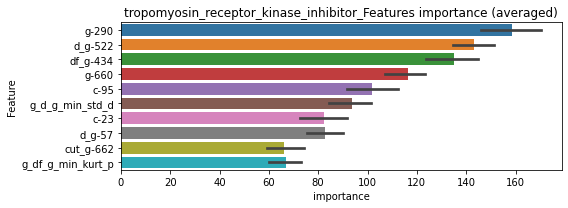

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000144803	valid_1's binary_logloss: 0.00139092
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014323	valid_1's binary_logloss: 0.000230879
Early stopping, best iteration is:
[1103]	training's binary_logloss: 0.000141153	valid_1's binary_logloss: 0.000227917


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000143462	valid_1's binary_logloss: 0.000149609
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000143462	valid_1's binary_logloss: 0.000149609


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000143389	valid_1's binary_logloss: 0.00021937


tropomyosin_receptor_kinase_inhibitor logloss: 0.0004964336154875351


Early stopping, best iteration is:
[1121]	training's binary_logloss: 0.000140883	valid_1's binary_logloss: 0.000216347


trpv_agonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000447166	valid_1's binary_logloss: 0.00833545
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00039273	valid_1's binary_logloss: 0.0166435
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.000689305	valid_1's binary_logloss: 0.00787562
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016281, Threshold: 0.0051637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0051637, conf_0:0.00361, conf_1:0.00671
Num_p_label: 1.0, Expected: 4.2, Adj_threshold_1: 0.0351637


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000396619	valid_1's binary_logloss: 0.00599172


threshold: 0.0351637, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000335143	valid_1's binary_logloss: 0.00648663
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00035214	valid_1's binary_logloss: 0.013601
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000451499	valid_1's binary_logloss: 0.00684799
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0153977, Threshold: 0.0351637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0035158 Vs.target_rate: 0.00105
Num_p_label: 14.0, Expected: 4.2, Threshold: 0.0351637, conf_0:0.02813, conf_1:0.04220
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_1: 0.0651637


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000333032	valid_1's binary_logloss: 0.00471702


threshold: 0.0651637, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000335143	valid_1's binary_logloss: 0.00648663
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00035214	valid_1's binary_logloss: 0.013601
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000451499	valid_1's binary_logloss: 0.00684799
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0153977, Threshold: 0.0651637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, Expected: 4.2, Threshold: 0.0651637, conf_0:0.05865, conf_1:0.07168


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000333032	valid_1's binary_logloss: 0.00471702


threshold: 0.0651637, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


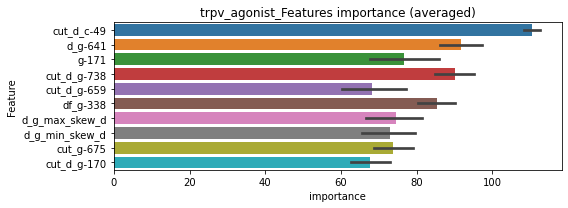

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 trpv_agonist=================================


Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000346869	valid_1's binary_logloss: 0.00552218
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 trpv_agonist=================================


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000375887	valid_1's binary_logloss: 0.0122978
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000446567	valid_1's binary_logloss: 0.00722919


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000350885	valid_1's binary_logloss: 0.00322315


trpv_agonist logloss: 0.007069134902631962
trpv_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.0017153	valid_1's binary_logloss: 0.0553094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000788399	valid_1's binary_logloss: 0.0313142
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000500708	valid_1's binary_logloss: 0.00632884
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0034872, Threshold: 0.0099690, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0099690, conf_0:0.00698, conf_1:0.01296
Num_p_label: 4.0, Expected: 8.0, Adj_threshold_1: 0.0399690
threshold: 0.0399690, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00113068	valid_1's binary_logloss: 0.0431906


positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00048079	valid_1's binary_logloss: 0.0307462
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000526413	valid_1's binary_logloss: 0.0202918
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000538422	valid_1's binary_logloss: 0.0259752
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0113217, Threshold: 0.0399690, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0035158 Vs.target_rate: 0.00202
Num_p_label: 14.0, Expected: 8.0, Threshold: 0.0399690, conf_0:0.03198, conf_1:0.04796
threshold: 0.0399690, positive_p_label: 14.0/3982, p_label_rate: 0.0035158


Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00134209	valid_1's binary_logloss: 0.0393804


positive_y_label: 650.0/3796, y_label_rate: 0.1712329
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000576986	valid_1's binary_logloss: 0.0261687
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000478502	valid_1's binary_logloss: 0.0232629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000494755	valid_1's binary_logloss: 0.0166124
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0100174, Threshold: 0.0399690, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000526596	valid_1's binary_logloss: 0.022162


Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0035158 Vs.target_rate: 0.00202
Num_p_label: 14.0, Expected: 8.0, Threshold: 0.0399690, conf_0:0.03597, conf_1:0.04397
threshold: 0.0399690, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


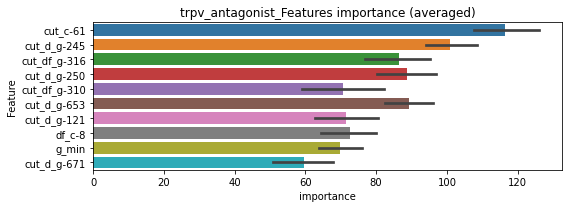

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 trpv_antagonist=================================


Early stopping, best iteration is:
[282]	training's binary_logloss: 0.0010167	valid_1's binary_logloss: 0.0284255
Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 trpv_antagonist=================================


Early stopping, best iteration is:
[300]	training's binary_logloss: 0.000947944	valid_1's binary_logloss: 0.0253501
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000438882	valid_1's binary_logloss: 0.01093


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds


trpv_antagonist logloss: 0.021018659856730012


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00122964	valid_1's binary_logloss: 0.019369
mutually exclusive columns: tubulin_inhibitor


tubulin_inhibitor, len(trt): 316, len(othr): 7122
target_rate: 0.0132695 → Adj_target_rate: 0.0111926


selected negative label: 7122


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0458979	valid_1's binary_logloss: 0.140688
Early stopping, best iteration is:
[1577]	training's binary_logloss: 0.0285507	valid_1's binary_logloss: 0.136969
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0470423	valid_1's binary_logloss: 0.128941
Early stopping, best iteration is:
[1545]	training's binary_logloss: 0.0296418	valid_1's binary_logloss: 0.124251
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.046137	valid_1's binary_logloss: 0.143188
Early stopping, best iteration is:
[1666]	training's binary_logloss: 0.0269423	valid_1's binary_logloss: 0.137439
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0456066	valid_1's binary_logloss: 0.145329
Early stopping, best iteration is:
[1290]	training's binary_logloss: 0.0350191	valid_1's binary_log

1 / 3, AUC score:0.962, PR-AUC:0.926
y_Threshold: 0.0585922, Threshold: 0.1042070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 622 → Positive_corect_labels: 1256/7924
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, Expected: 52.8, Threshold: 0.1042070, conf_0:0.07294, conf_1:0.13547
threshold: 0.1042070, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1256.0/7924, y_label_rate: 0.1585058
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0277885	valid_1's binary_logloss: 0.0868586
Early stopping, best iteration is:
[1501]	training's binary_logloss: 0.0182042	valid_1's binary_logloss: 0.0831362
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0284679	valid_1's binary_logloss: 0.078233
Early stopping, best iteration is:
[1899]	training's binary_logloss: 0.0144661	valid_1's binary_logloss: 0.072206
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285981	valid_1's binary_logloss: 0.0771005
Early stopping, best iteration is:
[1737]	training's binary_logloss: 0.0159645	valid_1's binary_logloss: 0.0708173
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0292343	valid_1's binary_logloss: 0.0669276
[2000]	training's binary_logloss: 0.0140864	valid_1's binary_logloss: 0.0587065
Early stoppin

2 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.0558328, Threshold: 0.1042070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 1186.0/7784
p_label_rate: 0.0047715 Vs.target_rate: 0.01327
Num_p_label: 19.0, Expected: 52.8, Threshold: 0.1042070, conf_0:0.08337, conf_1:0.12505
threshold: 0.1042070, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 1186.0/7784, y_label_rate: 0.1523638
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0205758	valid_1's binary_logloss: 0.054115
Early stopping, best iteration is:
[1927]	training's binary_logloss: 0.01037	valid_1's binary_logloss: 0.0485439
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0208895	valid_1's binary_logloss: 0.0500766
[2000]	training's binary_logloss: 0.0101811	valid_1's binary_logloss: 0.0431465
Early stopping, best iteration is:
[2902]	training's binary_logloss: 0.0068452	valid_1's binary_logloss: 0.041249
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0212475	valid_1's binary_logloss: 0.0443915
[2000]	training's binary_logloss: 0.010387	valid_1's binary_logloss: 0.0373316
[3000]	training's binary_logloss: 0.00675696	valid_1's binary_logloss: 0.0351532
Early stopping, best iteration is:
[3270]	training's binary_logloss: 0.00617057	valid_1's binary_logloss: 0.034

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0374815, Threshold: 0.1042070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 1160.0/7732
p_label_rate: 0.0012557 Vs.target_rate: 0.01327
Num_p_label: 5.0, Expected: 52.8, Threshold: 0.1042070, conf_0:0.09379, conf_1:0.11463
threshold: 0.1042070, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1160.0/7732, y_label_rate: 0.1500259


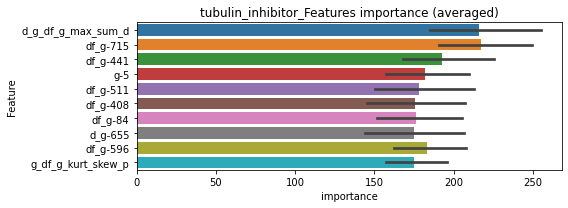

len(train_index) : 5799
len(valid_index) : 1933
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0248773	valid_1's binary_logloss: 0.0429383
[2000]	training's binary_logloss: 0.0127321	valid_1's binary_logloss: 0.0341736
[3000]	training's binary_logloss: 0.00844071	valid_1's binary_logloss: 0.0311135
Early stopping, best iteration is:
[3510]	training's binary_logloss: 0.00716603	valid_1's binary_logloss: 0.030276


len(train_index) : 5799
len(valid_index) : 1933
================================= fold 2/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.024871	valid_1's binary_logloss: 0.0456897
[2000]	training's binary_logloss: 0.0127713	valid_1's binary_logloss: 0.0371235
[3000]	training's binary_logloss: 0.00846318	valid_1's binary_logloss: 0.0343555
Early stopping, best iteration is:
[3338]	training's binary_logloss: 0.00757732	valid_1's binary_logloss: 0.033878


len(train_index) : 5799
len(valid_index) : 1933
================================= fold 3/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.025488	valid_1's binary_logloss: 0.0389012
[2000]	training's binary_logloss: 0.0130015	valid_1's binary_logloss: 0.0294341
[3000]	training's binary_logloss: 0.0086363	valid_1's binary_logloss: 0.0260436
[4000]	training's binary_logloss: 0.00641423	valid_1's binary_logloss: 0.0243685
Early stopping, best iteration is:
[4560]	training's binary_logloss: 0.00560516	valid_1's binary_logloss: 0.023768


len(train_index) : 5799
len(valid_index) : 1933
================================= fold 4/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0255298	valid_1's binary_logloss: 0.0406804
[2000]	training's binary_logloss: 0.0130925	valid_1's binary_logloss: 0.0305036
[3000]	training's binary_logloss: 0.00865738	valid_1's binary_logloss: 0.0268631
[4000]	training's binary_logloss: 0.00642454	valid_1's binary_logloss: 0.0250898
Early stopping, best iteration is:
[4257]	training's binary_logloss: 0.00602945	valid_1's binary_logloss: 0.0247756


tubulin_inhibitor logloss: 0.028174390936327485
tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3281


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0262275	valid_1's binary_logloss: 0.0919439
Early stopping, best iteration is:
[1720]	training's binary_logloss: 0.0151502	valid_1's binary_logloss: 0.085861
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0272615	valid_1's binary_logloss: 0.0765597
[2000]	training's binary_logloss: 0.0133412	valid_1's binary_logloss: 0.0684204
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0126651	valid_1's binary_logloss: 0.0679872
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0296834	valid_1's binary_logloss: 0.0421794
[2000]	training's binary_logloss: 0.014426	valid_1's binary_logloss: 0.0313965
[3000]	training's binary_logloss: 0.00941264	valid_1's binary_logloss: 0.0276289
[4000]	training's binary_logloss: 0.00699069	valid_1's binary_logloss: 0.025866
[5000]	training's binary_log

1 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0296473, Threshold: 0.0977326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 645/3783
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0977326, conf_0:0.06841, conf_1:0.12705
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_1: 0.1277326
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_2: 0.1577326
Num_p_label: 12.0, Expected: 12.2, Adj_threshold_3: 0.1877326
threshold: 0.1877326, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 645.0/3783, y_label_rate: 0.1704996
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239314	valid_1's binary_logloss: 0.0767749
Early stopping, best iteration is:
[1654]	training's binary_logloss: 0.014434	valid_1's binary_logloss: 0.070655
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0246363	valid_1's binary_logloss: 0.0598918
[2000]	training's binary_logloss: 0.0122308	valid_1's binary_logloss: 0.0515386
[3000]	training's binary_logloss: 0.00806912	valid_1's binary_logloss: 0.0485571
Early stopping, best iteration is:
[3440]	training's binary_logloss: 0.00701598	valid_1's binary_logloss: 0.0478681
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0263878	valid_1's binary_logloss: 0.0460351
[2000]	training's binary_logloss: 0.0129341	valid_1's binary_logloss: 0.0360329
[3000]	training's binary_logloss: 0.00846201	valid_1's binary_logloss: 0.0325237
[4000]	training's binary_l

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0496142, Threshold: 0.1877326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 626.0/3745
p_label_rate: 0.0097941 Vs.target_rate: 0.00307
Num_p_label: 39.0, Expected: 12.2, Threshold: 0.1877326, conf_0:0.15019, conf_1:0.22528
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_1: 0.2177326
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_2: 0.2477326
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_3: 0.2777326
threshold: 0.2777326, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 626.0/3745, y_label_rate: 0.1671562
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0206644	valid_1's binary_logloss: 0.0505478
[2000]	training's binary_logloss: 0.0103056	valid_1's binary_logloss: 0.0422626
Early stopping, best iteration is:
[2291]	training's binary_logloss: 0.00897975	valid_1's binary_logloss: 0.0410677
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0212509	valid_1's binary_logloss: 0.0438026
[2000]	training's binary_logloss: 0.0106766	valid_1's binary_logloss: 0.034824
[3000]	training's binary_logloss: 0.00708024	valid_1's binary_logloss: 0.031875
[4000]	training's binary_logloss: 0.0053086	valid_1's binary_logloss: 0.030501
Early stopping, best iteration is:
[4171]	training's binary_logloss: 0.00508754	valid_1's binary_logloss: 0.0302933
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0213916	valid_1's binary_logloss: 0.0406284
[2000]	training's binary_lo

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0430719, Threshold: 0.2777326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 620.0/3733
p_label_rate: 0.0060271 Vs.target_rate: 0.00307
Num_p_label: 24.0, Expected: 12.2, Threshold: 0.2777326, conf_0:0.24996, conf_1:0.30551
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_1: 0.3077326
threshold: 0.3077326, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 620.0/3733, y_label_rate: 0.1660863


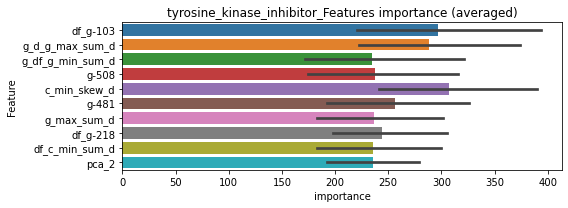

len(train_index) : 2799
len(valid_index) : 934
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0269757	valid_1's binary_logloss: 0.0669032
[2000]	training's binary_logloss: 0.0139501	valid_1's binary_logloss: 0.0574333
Early stopping, best iteration is:
[2430]	training's binary_logloss: 0.0115561	valid_1's binary_logloss: 0.0558885


len(train_index) : 2800
len(valid_index) : 933
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0279622	valid_1's binary_logloss: 0.0486522
[2000]	training's binary_logloss: 0.014339	valid_1's binary_logloss: 0.0375119
[3000]	training's binary_logloss: 0.00956754	valid_1's binary_logloss: 0.0335331
[4000]	training's binary_logloss: 0.0071946	valid_1's binary_logloss: 0.0318171
Early stopping, best iteration is:
[4289]	training's binary_logloss: 0.0067166	valid_1's binary_logloss: 0.0314525


len(train_index) : 2800
len(valid_index) : 933
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.028474	valid_1's binary_logloss: 0.0441411
[2000]	training's binary_logloss: 0.0145797	valid_1's binary_logloss: 0.0327731
[3000]	training's binary_logloss: 0.00977897	valid_1's binary_logloss: 0.0288669
[4000]	training's binary_logloss: 0.00735881	valid_1's binary_logloss: 0.0270486
[5000]	training's binary_logloss: 0.00592578	valid_1's binary_logloss: 0.0260458
Early stopping, best iteration is:
[5366]	training's binary_logloss: 0.00552061	valid_1's binary_logloss: 0.0256852


len(train_index) : 2800
len(valid_index) : 933
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0287843	valid_1's binary_logloss: 0.0436408
[2000]	training's binary_logloss: 0.0148641	valid_1's binary_logloss: 0.0312862
[3000]	training's binary_logloss: 0.00992916	valid_1's binary_logloss: 0.0268043
[4000]	training's binary_logloss: 0.00746065	valid_1's binary_logloss: 0.0246311
[5000]	training's binary_logloss: 0.00599275	valid_1's binary_logloss: 0.0233445
Early stopping, best iteration is:
[5367]	training's binary_logloss: 0.00558073	valid_1's binary_logloss: 0.022899


tyrosine_kinase_inhibitor logloss: 0.03398716483209891
tyrosine_kinase_inhibitor is unpredictable(><)!
ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3285
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000236225	valid_1's binary_logloss: 0.00530916
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000227999	valid_1's binary_logloss: 0.00345918
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000221128	valid_1's binary_logloss: 0.000235946
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0007655, Threshold: 0.0014126, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0014126, conf_0:0.00099, conf_1:0.00184
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0314126
threshold: 0.0314126, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[309]	training's binary_logloss: 0.000457665	valid_1's binary_logloss: 0.0135641


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000245131	valid_1's binary_logloss: 0.00511397
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000221751	valid_1's binary_logloss: 0.0036795
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000224323	valid_1's binary_logloss: 0.000237704
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044012, Threshold: 0.0314126, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, Expected: 2.0, Threshold: 0.0314126, conf_0:0.02513, conf_1:0.03770


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000305877	valid_1's binary_logloss: 0.0129061


threshold: 0.0314126, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000217675	valid_1's binary_logloss: 0.00272011
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.000693895	valid_1's binary_logloss: 0.0146184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000220579	valid_1's binary_logloss: 0.000230479
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0069278, Threshold: 0.0314126, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, Expected: 2.0, Threshold: 0.0314126, conf_0:0.02827, conf_1:0.03455
threshold: 0.0314126, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000444649	valid_1's binary_logloss: 0.00285475


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


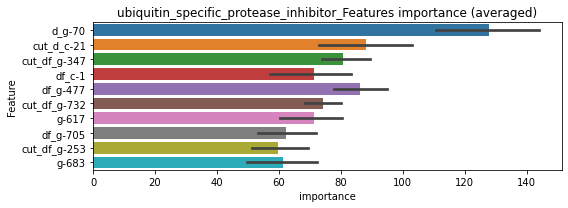

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000229244	valid_1's binary_logloss: 0.00174025
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[246]	training's binary_logloss: 0.000530706	valid_1's binary_logloss: 0.0134547
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000229892	valid_1's binary_logloss: 0.000241348
Training until validation scores don't improve for 30 rounds


ubiquitin_specific_protease_inhibitor logloss: 0.004501412747230469


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000250162	valid_1's binary_logloss: 0.00256931
mutually exclusive columns: vegfr_inhibitor


vegfr_inhibitor, len(trt): 170, len(othr): 4633
target_rate: 0.0071387 → Adj_target_rate: 0.0066081


selected negative label: 4633


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0392974	valid_1's binary_logloss: 0.117631
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0199189	valid_1's binary_logloss: 0.109702
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0387484	valid_1's binary_logloss: 0.12432
Early stopping, best iteration is:
[1667]	training's binary_logloss: 0.0226244	valid_1's binary_logloss: 0.117844
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0394205	valid_1's binary_logloss: 0.118324
Early stopping, best iteration is:
[1353]	training's binary_logloss: 0.0287791	valid_1's binary_logloss: 0.114283
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0403081	valid_1's binary_logloss: 0.0999479
[2000]	training's binary_logloss: 0.0193744	valid_1's binary_logloss: 0.0894133
Early stopping, be

1 / 3, AUC score:0.979, PR-AUC:0.960
y_Threshold: 0.0481904, Threshold: 0.0786703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 308 → Positive_corect_labels: 865/5251
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, Expected: 28.4, Threshold: 0.0786703, conf_0:0.05507, conf_1:0.10227
threshold: 0.0786703, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 865.0/5251, y_label_rate: 0.1647305
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0311721	valid_1's binary_logloss: 0.0746143
[2000]	training's binary_logloss: 0.0151535	valid_1's binary_logloss: 0.064732
[3000]	training's binary_logloss: 0.00987204	valid_1's binary_logloss: 0.0612175
Early stopping, best iteration is:
[3063]	training's binary_logloss: 0.00965725	valid_1's binary_logloss: 0.0610353
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0301071	valid_1's binary_logloss: 0.0844896
Early stopping, best iteration is:
[1921]	training's binary_logloss: 0.0152086	valid_1's binary_logloss: 0.0759138
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0300298	valid_1's binary_logloss: 0.0850477
[2000]	training's binary_logloss: 0.014644	valid_1's binary_logloss: 0.0773501
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0138997	valid_1's binary_logloss: 0.

2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0537755, Threshold: 0.0786703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 825.0/5171
p_label_rate: 0.0087896 Vs.target_rate: 0.00714
Num_p_label: 35.0, Expected: 28.4, Threshold: 0.0786703, conf_0:0.06294, conf_1:0.09440
threshold: 0.0786703, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 825.0/5171, y_label_rate: 0.1595436
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0252693	valid_1's binary_logloss: 0.0544393
[2000]	training's binary_logloss: 0.012401	valid_1's binary_logloss: 0.0459213
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0104474	valid_1's binary_logloss: 0.0446297
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0247145	valid_1's binary_logloss: 0.064571
[2000]	training's binary_logloss: 0.0121753	valid_1's binary_logloss: 0.0566726
Early stopping, best iteration is:
[2662]	training's binary_logloss: 0.00901994	valid_1's binary_logloss: 0.0546646
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0250514	valid_1's binary_logloss: 0.0580587
[2000]	training's binary_logloss: 0.0123077	valid_1's binary_logloss: 0.0504699
Early stopping, best iteration is:
[2292]	training's binary_logloss: 0.010677	valid_1's binary_logloss: 0.04

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0401842, Threshold: 0.0786703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 805.0/5131
p_label_rate: 0.0052737 Vs.target_rate: 0.00714
Num_p_label: 21.0, Expected: 28.4, Threshold: 0.0786703, conf_0:0.07080, conf_1:0.08654
threshold: 0.0786703, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 805.0/5131, y_label_rate: 0.1568895


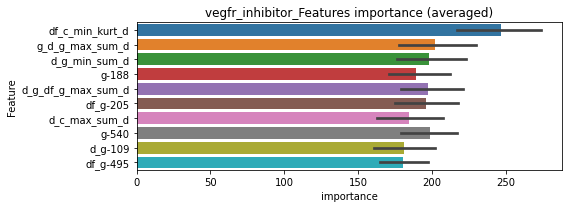

len(train_index) : 3848
len(valid_index) : 1283
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0307043	valid_1's binary_logloss: 0.0599925
[2000]	training's binary_logloss: 0.015611	valid_1's binary_logloss: 0.0493421
Early stopping, best iteration is:
[2790]	training's binary_logloss: 0.0111323	valid_1's binary_logloss: 0.0464649


len(train_index) : 3848
len(valid_index) : 1283
================================= fold 2/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.030835	valid_1's binary_logloss: 0.0633994
[2000]	training's binary_logloss: 0.0157576	valid_1's binary_logloss: 0.0526632
[3000]	training's binary_logloss: 0.0104492	valid_1's binary_logloss: 0.0494007
Early stopping, best iteration is:
[3135]	training's binary_logloss: 0.0099848	valid_1's binary_logloss: 0.0490375


len(train_index) : 3848
len(valid_index) : 1283
================================= fold 3/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315497	valid_1's binary_logloss: 0.0541285
[2000]	training's binary_logloss: 0.0161302	valid_1's binary_logloss: 0.0423055
[3000]	training's binary_logloss: 0.010682	valid_1's binary_logloss: 0.0381982
[4000]	training's binary_logloss: 0.0079645	valid_1's binary_logloss: 0.0362359
Early stopping, best iteration is:
[4811]	training's binary_logloss: 0.00659339	valid_1's binary_logloss: 0.0352595


len(train_index) : 3849
len(valid_index) : 1282
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0321946	valid_1's binary_logloss: 0.0475793
[2000]	training's binary_logloss: 0.0164801	valid_1's binary_logloss: 0.0356779
[3000]	training's binary_logloss: 0.0109055	valid_1's binary_logloss: 0.0312191
[4000]	training's binary_logloss: 0.00811205	valid_1's binary_logloss: 0.0289734
Early stopping, best iteration is:
[4101]	training's binary_logloss: 0.00790415	valid_1's binary_logloss: 0.0287838


vegfr_inhibitor logloss: 0.03988858308249942
vegfr_inhibitor is unpredictable(><)!
vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000323883	valid_1's binary_logloss: 0.00970925
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000317316	valid_1's binary_logloss: 0.012044
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000372167	valid_1's binary_logloss: 0.00654027
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013450, Threshold: 0.0033009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0033009, conf_0:0.00231, conf_1:0.00429
Num_p_label: 1.0, Expected: 4.3, Adj_threshold_1: 0.0333009
threshold: 0.0333009, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000425141	valid_1's binary_logloss: 0.0127169


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00031432	valid_1's binary_logloss: 0.0100077
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000298773	valid_1's binary_logloss: 0.0112533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000358695	valid_1's binary_logloss: 0.00767583
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0111711, Threshold: 0.0333009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0030136 Vs.target_rate: 0.00109
Num_p_label: 12.0, Expected: 4.3, Threshold: 0.0333009, conf_0:0.02664, conf_1:0.03996
Num_p_label: 6.0, Expected: 4.3, Adj_threshold_1: 0.0633009


Early stopping, best iteration is:
[438]	training's binary_logloss: 0.000364711	valid_1's binary_logloss: 0.0121806


threshold: 0.0633009, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000332961	valid_1's binary_logloss: 0.0148993
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000303915	valid_1's binary_logloss: 0.010428
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000338315	valid_1's binary_logloss: 0.00328763
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0150782, Threshold: 0.0633009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0022602 Vs.target_rate: 0.00109
Num_p_label: 9.0, Expected: 4.3, Threshold: 0.0633009, conf_0:0.05697, conf_1:0.06963


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000342166	valid_1's binary_logloss: 0.0109398


threshold: 0.0633009, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


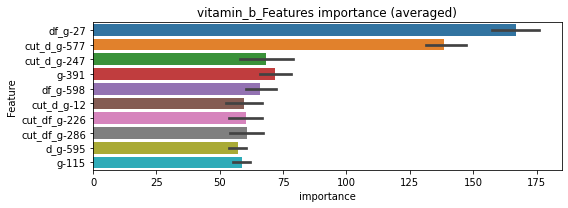

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 vitamin_b=================================


Early stopping, best iteration is:
[342]	training's binary_logloss: 0.000536518	valid_1's binary_logloss: 0.0140879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000316727	valid_1's binary_logloss: 0.00615811


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000363488	valid_1's binary_logloss: 0.00289969


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds


vitamin_b logloss: 0.008176718563388946


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000327883	valid_1's binary_logloss: 0.00954854


vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3286
target_rate: 0.0016377 → Adj_target_rate: 0.0018906


selected negative label: 3286


N_features:508
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.0010378	valid_1's binary_logloss: 0.0342395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[217]	training's binary_logloss: 0.00327673	valid_1's binary_logloss: 0.0412193
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000466221	valid_1's binary_logloss: 0.00732765
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0043445, Threshold: 0.0113423, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, Expected: 6.5, Threshold: 0.0113423, conf_0:0.00794, conf_1:0.01474
Num_p_label: 5.0, Expected: 6.5, Adj_threshold_1: 0.0413423


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000565311	valid_1's binary_logloss: 0.017863


threshold: 0.0413423, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000538692	valid_1's binary_logloss: 0.0335517
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000412924	valid_1's binary_logloss: 0.0137513
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000578654	valid_1's binary_logloss: 0.00595491
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0127309, Threshold: 0.0413423, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 652.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00164
Num_p_label: 12.0, Expected: 6.5, Threshold: 0.0413423, conf_0:0.03307, conf_1:0.04961


Early stopping, best iteration is:
[302]	training's binary_logloss: 0.00132123	valid_1's binary_logloss: 0.0323498


threshold: 0.0413423, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3801, y_label_rate: 0.1715338
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00067868	valid_1's binary_logloss: 0.0216906
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000543605	valid_1's binary_logloss: 0.0148259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000426068	valid_1's binary_logloss: 0.0144286
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0139520, Threshold: 0.0413423, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3797
p_label_rate: 0.0025113 Vs.target_rate: 0.00164
Num_p_label: 10.0, Expected: 6.5, Threshold: 0.0413423, conf_0:0.03721, conf_1:0.04548
threshold: 0.0413423, positive_p_label: 10.0/3982, p_label_rate: 0.0025113


Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000608833	valid_1's binary_logloss: 0.0235462


positive_y_label: 650.0/3797, y_label_rate: 0.1711878


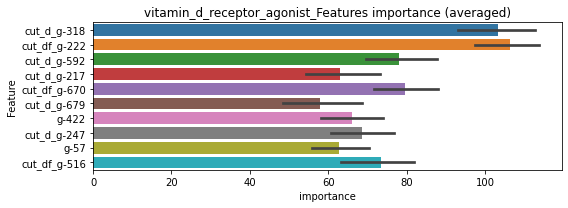

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000467972	valid_1's binary_logloss: 0.0165775
Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000673624	valid_1's binary_logloss: 0.0172775
Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Early stopping, best iteration is:
[251]	training's binary_logloss: 0.00107733	valid_1's binary_logloss: 0.0131907
Training until validation scores don't improve for 30 rounds


vitamin_d_receptor_agonist logloss: 0.015515141550644767


Early stopping, best iteration is:
[263]	training's binary_logloss: 0.00097797	valid_1's binary_logloss: 0.0150138


wnt_inhibitor, len(trt): 30, len(othr): 3283
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3283


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[421]	training's binary_logloss: 0.000452576	valid_1's binary_logloss: 0.022419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000419273	valid_1's binary_logloss: 0.0132628
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000528483	valid_1's binary_logloss: 0.00503795
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014458, Threshold: 0.0060387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0060387, conf_0:0.00423, conf_1:0.00785
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_1: 0.0360387


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000433326	valid_1's binary_logloss: 0.0195044


threshold: 0.0360387, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000407607	valid_1's binary_logloss: 0.0206785
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000424979	valid_1's binary_logloss: 0.0124619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000539042	valid_1's binary_logloss: 0.00554227
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0083684, Threshold: 0.0360387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0035158 Vs.target_rate: 0.00126
Num_p_label: 14.0, Expected: 5.0, Threshold: 0.0360387, conf_0:0.02883, conf_1:0.04325
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_1: 0.0660387


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000427217	valid_1's binary_logloss: 0.0186613


threshold: 0.0660387, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000407607	valid_1's binary_logloss: 0.0206785
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000424979	valid_1's binary_logloss: 0.0124619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000539042	valid_1's binary_logloss: 0.00554227
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0083684, Threshold: 0.0660387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, Expected: 5.0, Threshold: 0.0660387, conf_0:0.05943, conf_1:0.07264


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000427217	valid_1's binary_logloss: 0.0186613


threshold: 0.0660387, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


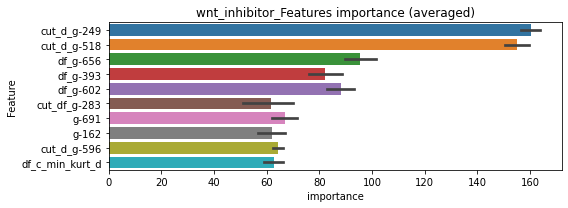

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 wnt_inhibitor=================================


Early stopping, best iteration is:
[316]	training's binary_logloss: 0.000679494	valid_1's binary_logloss: 0.0158597
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 wnt_inhibitor=================================


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000442464	valid_1's binary_logloss: 0.0110384
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 wnt_inhibitor=================================


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000497851	valid_1's binary_logloss: 0.00551922
Training until validation scores don't improve for 30 rounds


wnt_inhibitor logloss: 0.012933198267840946


Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00062669	valid_1's binary_logloss: 0.0193222



CV:0.01928920315425222


In [56]:
unpredictable = RUN()

In [57]:
unpredictable

['acetylcholinesterase_inhibitor',
 'adenosine_receptor_antagonist',
 'akt_inhibitor',
 'androgen_receptor_antagonist',
 'anesthetic_-_local',
 'anti-inflammatory',
 'antioxidant',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_50s_ribosomal_subunit_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'benzodiazepine_receptor_agonist',
 'bromodomain_inhibitor',
 'cannabinoid_receptor_antagonist',
 'cc_chemokine_receptor_antagonist',
 'cholinergic_receptor_antagonist',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dopamine_receptor_agonist',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'hcv_inhibitor',
 'hdac_inhibitor',
 'histamine_receptor_agonist',
 'hiv_inhibitor',
 'hsp_inhibitor',
 'immunosuppressant',
 'jak_inhibitor',
 'leukotriene_receptor_antagonist',
 'mek_inhibitor',
 'membrane_integrity_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'pdgfr_inhibitor',
 'pi3